<a href="https://colab.research.google.com/github/marz1307/Monitoring-Player-Performance-and-Scouting-in-Football/blob/main/problem_analysis_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Role detecttion is very important

In [ ]:
!mkdir /content/sample_data/test
%cd /content/sample_data/test
!cp /content/drive/MyDrive/turk/Data.zip /content/sample_data
!unzip /content/sample_data/Data.zip

/content/sample_data/test
Archive:  /content/sample_data/Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
  inflating: Data/matches_Germany.csv  
  inflating: __MACOSX/Data/._matches_Germany.csv  
  inflating: Data/matches_Spain.csv  
  inflating: __MACOSX/Data/._matches_Spain.csv  
  inflating: Data/events_Spain.csv   
  inflating: __MACOSX/Data/._events_Spain.csv  
  inflating: Data/labels.csv         
  inflating: __MACOSX/Data/._labels.csv  
  inflating: Data/competitions.csv   
  inflating: __MACOSX/Data/._competitions.csv  
  inflating: Data/teams.csv          
  inflating: __MACOSX/Data/._teams.csv  
  inflating: Data/referees.csv       
  inflating: __MACOSX/Data/._referees.csv  
  inflating: Data/matches_European_Championship.csv  
  inflating: __MACOSX/Data/._matches_European_Championship.csv  
  inflating: Data/coaches.csv        
  inflating: __MACOSX/Data/._coaches.csv  
  inflating: Data/matches_Italy.csv  
  inflating: __MACOSX/Data/._matches_Italy.csv  

**THE CONCEPT OF ROLE DETECTION**
ROLE DETECTION IS A VERY IMPORTANT CONCEPT WHEN BUILDING RECOMENDATION ENGINES , THE APPROACH IN THIS PROJECT IS TO ANALIZE PLAYER ROLES BASED ON THEIR FREQUENT ACTIONS. PLAYERS LIKE CASEMIRO AND JOURGIHNO BOTH OPERATE IN THE CDM POSITION , HOWEVER THESE TWO PLAYERS HAVE EXTREMEMLY DIFFERNT STYLE OF PLAY ,cASEMIRO ACTS MORE AS A DISRUPTIVE FORCE IN THE CDM WHILE JOURJIHNO FUNCTIONS AS A BALL PROGRESSORE  , FURTHER EXPLORATION SHOWS physical positions of a player only goes so far in defining what role a player plays in a system

In [ ]:
import pandas as pd
features= pd.read_csv('/content/sample_data/test/Data/features.csv' , chunksize=10000)
ft = features.get_chunk()

ft.columns

Index(['Unnamed: 0', 'game_id-0', 'period_id-0', 'time_seconds-0', 'team_id-0',
       'player_id-0', 'start_x-0', 'start_y-0', 'end_x-0', 'end_y-0',
       'bodypart_id-0', 'type_id-0', 'result_id-0', 'type_name-0',
       'result_name-0', 'bodypart_name-0', 'time_played-0', 'game_id-1',
       'period_id-1', 'time_seconds-1', 'team_id-1', 'player_id-1',
       'start_x-1', 'start_y-1', 'end_x-1', 'end_y-1', 'bodypart_id-1',
       'type_id-1', 'result_id-1', 'type_name-1', 'result_name-1',
       'bodypart_name-1', 'time_played-1', 'game_id-2', 'period_id-2',
       'time_seconds-2', 'team_id-2', 'player_id-2', 'start_x-2', 'start_y-2',
       'end_x-2', 'end_y-2', 'bodypart_id-2', 'type_id-2', 'result_id-2',
       'type_name-2', 'result_name-2', 'bodypart_name-2', 'time_played-2',
       'team-1', 'team-2', 'start_x_norm-0', 'start_y_norm-0',
       'start_distance_to_goal-0', 'start_angle_to_goal-0', 'diff_x-0',
       'diff_y-0', 'distance_covered-0', 'end_x_norm-0', 'end_y_norm-

**WHY ROLES WILL MAKE A GOOD FEATURE FOR THE RECOMENDER ENGINE**

---


as is clearly visible in the plot below there are four distinctive  styles of play in the cdm position ,players who take part heavily in defensive actions , there are those whose roleis to push  the ball forward through forward passes and dribbles , these are attack minded DMs and what is called the modern day "register position" , then there are players like casemiro who have very high intensity defensive actions with good progression , players like ndidi who basically act as full fledged defenders

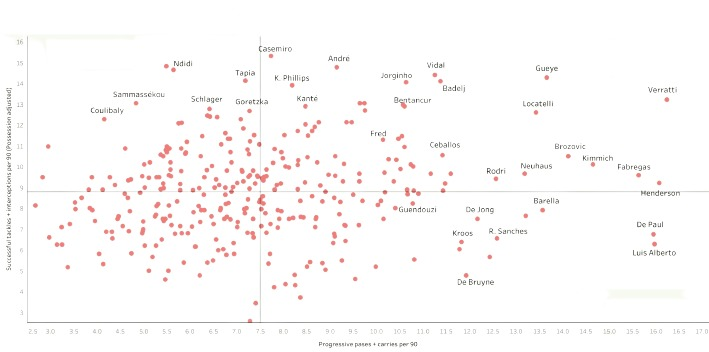

In [ ]:
%cd /content/sample_data/test

/content/sample_data/test


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
actions =pd.read_csv("/content/sample_data/test/Data/actions.csv" ) #, chunksize =10000)
actions.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


**HOWFAR DOES POSITION DETECTION GO IN HELPING OUR MODEL BASED ON DATA**

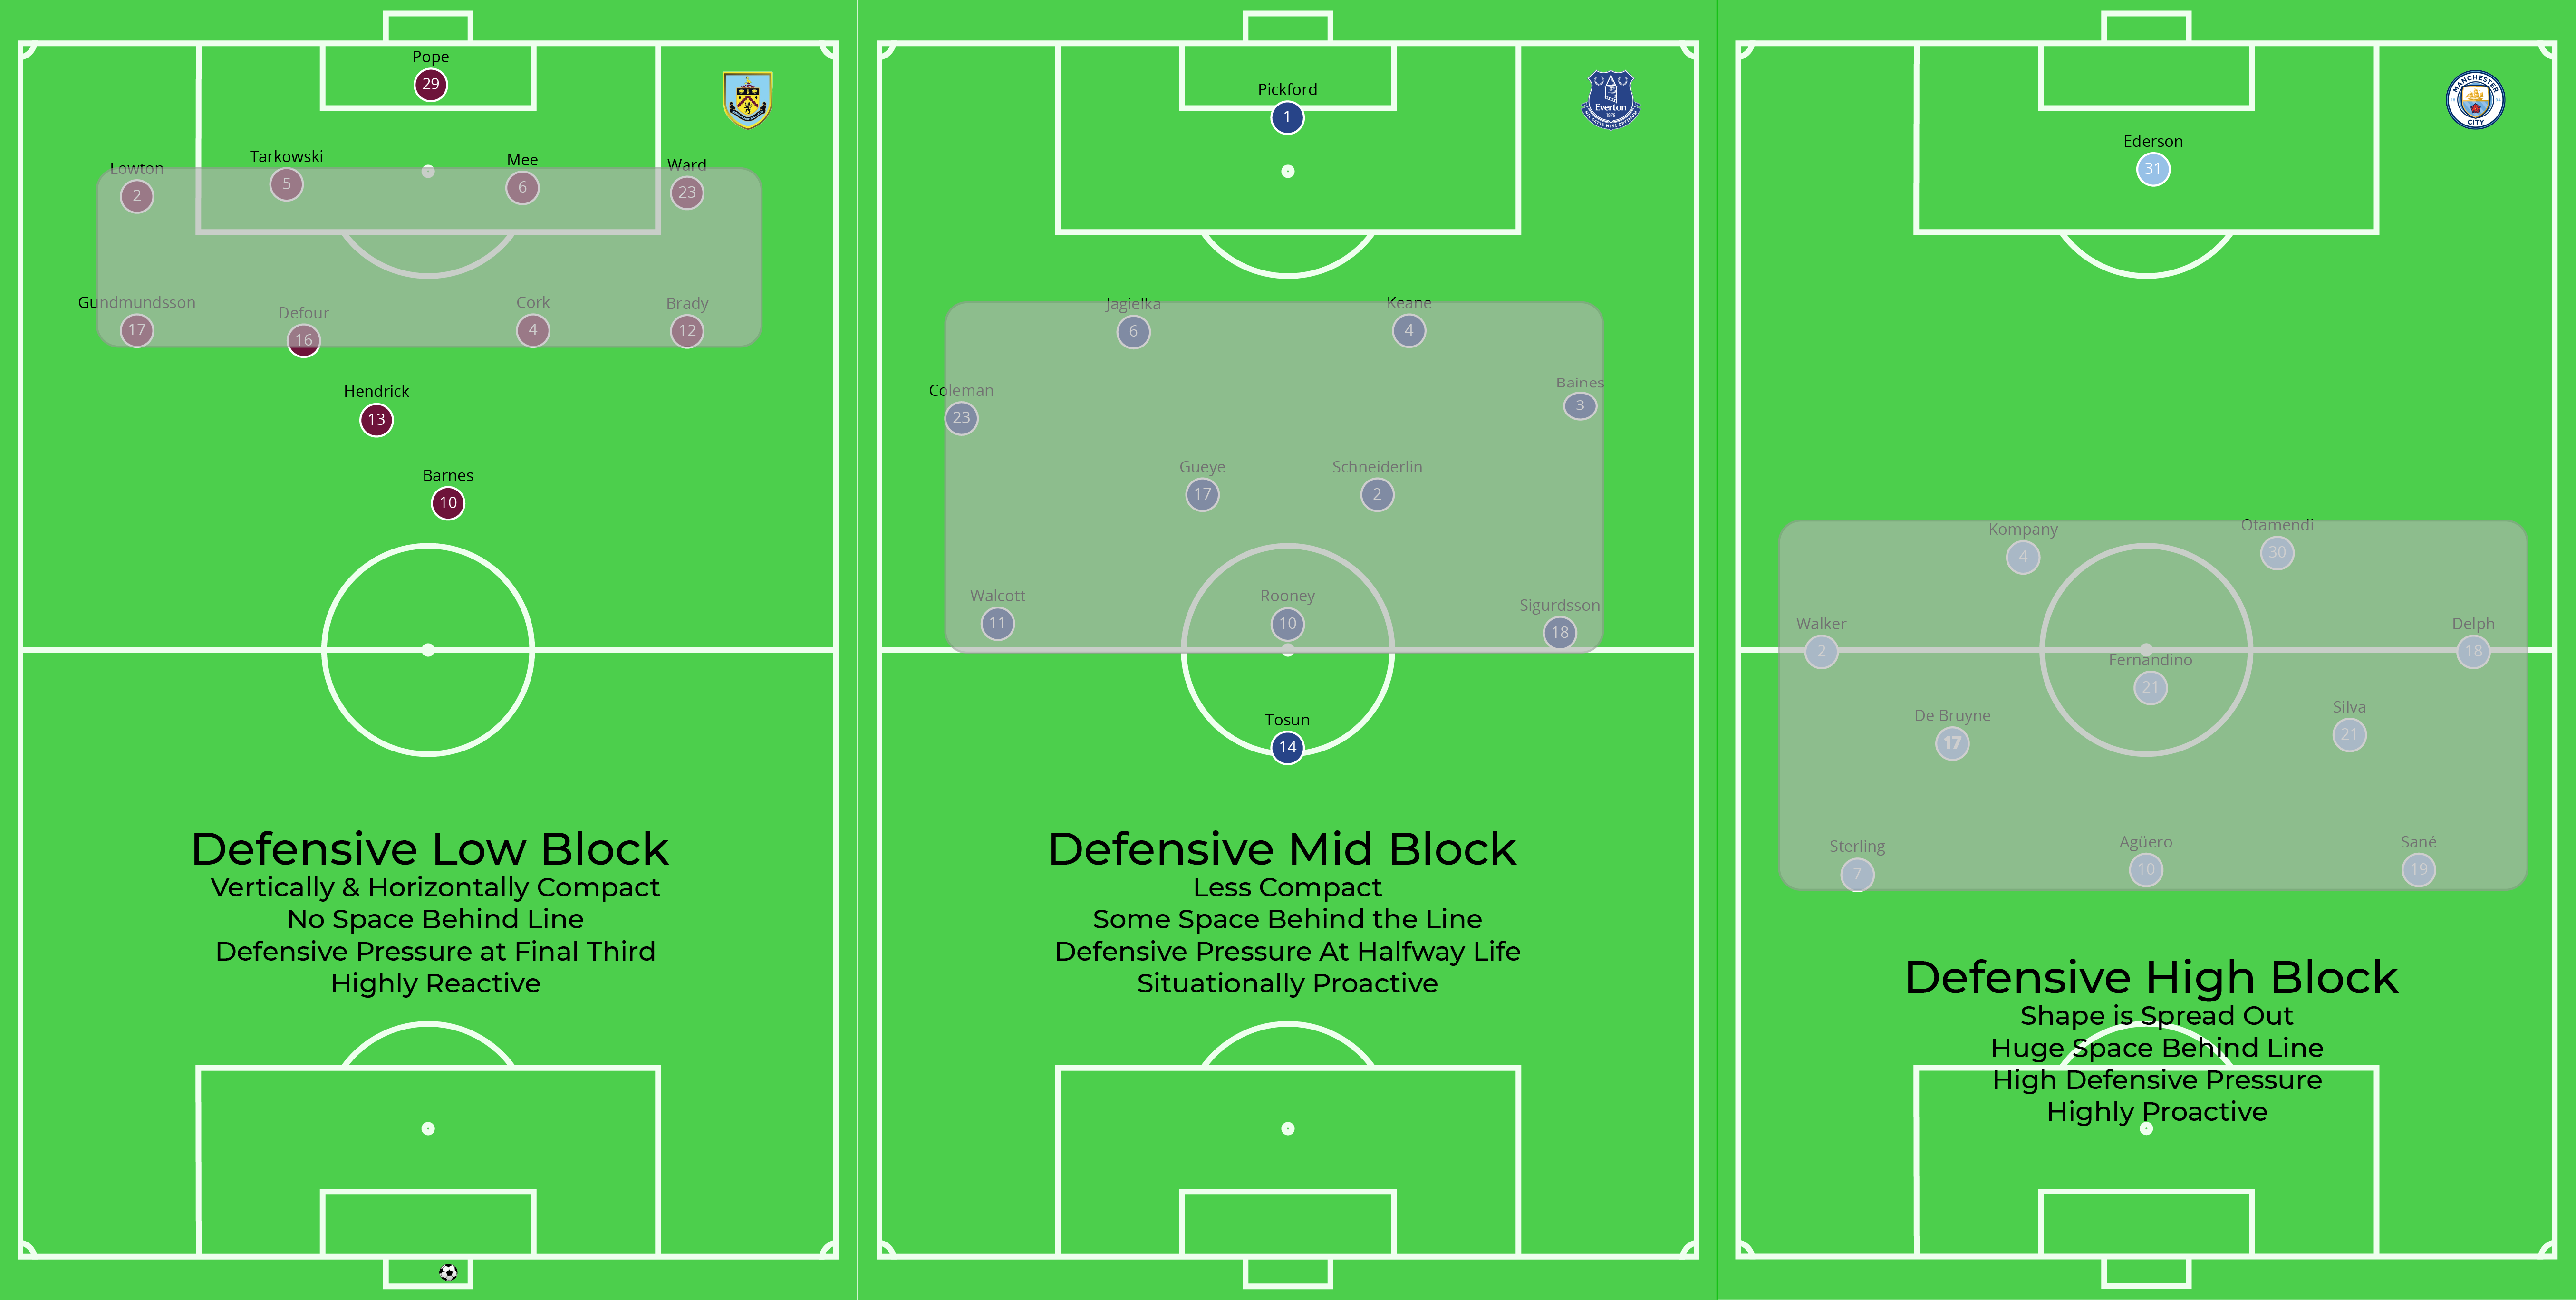


the image ref: https://external-preview.redd.it/_QQB6OUMZJK_akA19Q30HOzpeBzn8DjVXKIWC0IOo3I.png?auto=webp&s=e6d77055d22650641b8cd9f23f3d124ebbee7afd above explains one of the problems with using physical positions as a feature for recomender systems ,when a team is in play there are systems like the low block system coud mislead  a model into classfyting a  deep defensive line cdm as a cb ,or a highline defensive player as a winger , the other allternative to this challange is classifying player position with respect to other players , just like in the imge below that points out a similar algorithm being used in la liga  , this system should be used if possible , however our dataset does not support such advance algorithms , because position data is only logged when a player takes an action ,this log only reflects th position of the player taking the action.
this limitation has driven us to drop the position feature earlier developed with weighted average for our final reomender engine

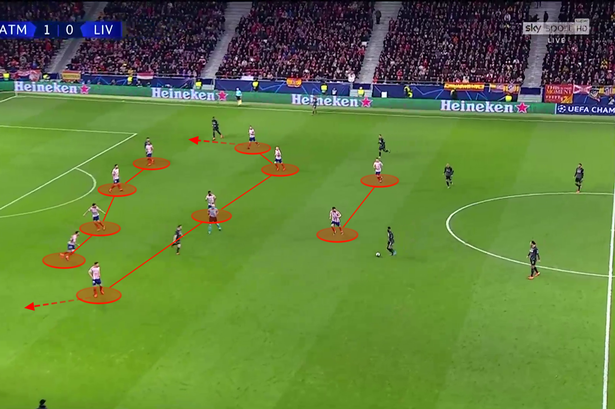

In [ ]:
actions['type_name'].unique()

array(['pass', 'cross', 'clearance', 'throw_in', 'dribble', 'foul',
       'freekick_crossed', 'freekick_short', 'interception', 'goalkick',
       'take_on', 'corner_crossed', 'shot', 'keeper_save', 'tackle',
       'corner_short', 'shot_freekick', 'shot_penalty', 'bad_touch'],
      dtype=object)

In [ ]:
import math
def distance_points(x1,y1,x2,y2):
  x = (x2-x1)**2
  y = (y2-y1)**2
  dist  = math.sqrt(x+y)
  return dist




In [ ]:
ac_filter = actions[['player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'bodypart_id', 'type_id', 'result_id',"type_name"]]

In [ ]:
ac_filter["action_distance"] = ac_filter.apply(lambda x: distance_points(x['start_x'],x['start_y'],x['end_x'],x['end_y'] ),axis=1)

<ipython-input-13-1a3ad2cc49f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_filter["action_distance"] = ac_filter.apply(lambda x: distance_points(x['start_x'],x['start_y'],x['end_x'],x['end_y'] ),axis=1)


In [ ]:
ac_filter[['player_id',"action_distance","type_name"]].to_csv("/content/drive/MyDrive/turk/action_dist.csv")

In [ ]:
player_id_grouped = ac_filter.groupby(["player_id","type_id"],axis=0)
player_id_grouped.get_group((12,0))

,player_id,start_x,start_y,end_x,end_y,bodypart_id,type_id,result_id,action_distance
2413543,12,68.25,10.88,95.55,25.16,0,0,1,30.809226
2413700,12,73.50,12.92,58.80,2.04,0,0,1,18.288368
2413727,12,67.20,19.04,59.85,5.44,0,0,1,15.459059
2413731,12,73.50,17.68,78.75,35.36,0,0,1,18.443018
2413733,12,76.65,24.48,65.10,25.16,0,0,1,11.570000
...,...,...,...,...,...,...,...,...,...
2432491,12,97.65,19.72,99.75,18.36,0,0,0,2.501919
2432509,12,79.80,29.92,55.65,43.52,1,0,1,27.716105
2432567,12,68.25,13.60,42.00,8.84,1,0,1,26.678083
2432619,12,61.95,13.60,49.35,16.32,0,0,0,12.890244


In [ ]:
columns = ["player_id"]
columns.extend(ac_filter["type_id"].unique())
columns

['player_id', 0, 1, 18, 2, 21, 8, 3, 4, 10, 22, 7, 5, 11, 14, 9, 6, 13, 12, 19]

In [ ]:

x = pd.DataFrame(columns=columns)


In [ ]:
def count_elem(player_id ,  type_id):
  x = actions['type_id'].loc[(actions['type_id']==type_id) & (actions['player_id']==player_id)]
  return len(x)

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


since position soednt make much of  good feature i decided to count players action attempts ,the line of thinking is that based on intial plots  the difference between players style can be reflected intohow freuently the attempt certain actions ,creative  midfielders Kdb and Bernado , kdb will heavily depend on his passing prowes and bernado will heavily depend on his driblling ability , thus their fribble attempts and passing attempts should reflect their various style of plays and role in a team, at this point action quality doesn't really matter all we are interested in is understanding the different roles players attempt to take on , not worry about the quality or how well they perform at this role

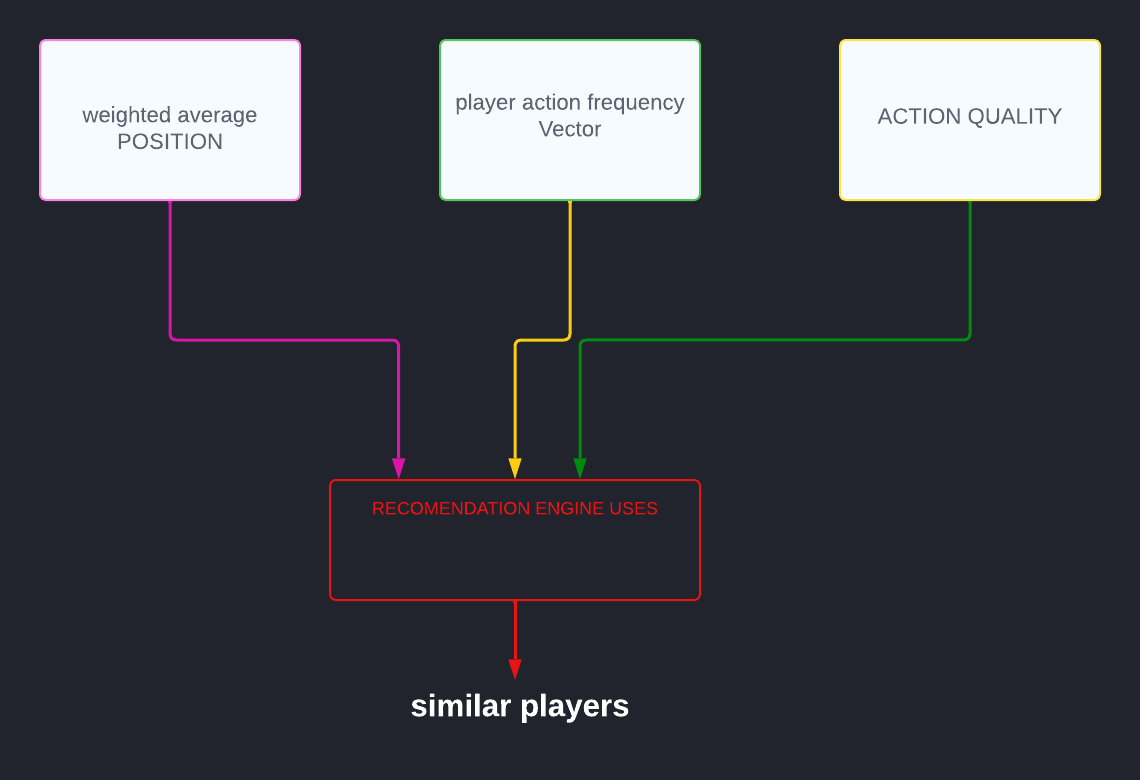

WE'VE PRODUCED THREE DIFFERENT FEATURE GROUPS THAT HELPS UNDERSTAND PLAYERS WHO CARRY OUT THE SAME ROLE AND PLAYING STYLE ,OUR PRELIMINARY ANALYSIS WHICH LED TO THIS DESIGN RELIES ON DOMAIN KNOWLEDGE JUST AS MUCH AS VISULAIZATION , IN TASK OF ANALYZING AND   MODELING AND EXTRACTING FEATURES IN DATASETS SUCH AS THIS DOMAIN KNOWELDGE PLAYS A CRUCIAL PART JUST LIKE ANALYSIS .

**POSITION AVERAGE **
AS MENTION EARLIER BASED ON PRELIMINARY ACCESSMENT OF THE PROBLEM THIS FEATURE MIGHT BIAS OUR RECOMENTDER SYSTEMS TO SEE SIMILRITIES BETWEEN PLAYERS SUCH AS WINGERS AND FULLBACKS DEPENDING ON THE SYSTEM THE CLUB PLYERS , THIS BIAS IS UNDESIRABLE IN OUR SYSTEM SO WE'LL  RUN FURTHER VISUAL ANALYSIS TO COME TO  FINAL CONCLUSION ON IF WE WILL BE SCRAPPING SAID FEATURE OR NOT.

*PLAYER ACTION FREQUENCY VECTOR*

BASED ON A PLAYERS FREQUENT ACTION ITS OUR UNDERSTANDING BASED ON PREVIOUS PLOTS THAT FREQUENTLY ATTEMPTED ACTIONS ARE VERY IMPORTANT IN UNDERSTANDING A PLAYERS ROLE AND PLAYING STYLE IN A TEAM ,SO WEVE COMEUP WITH A SYSTEM WHERE WE EXTRACT A FREQUENCY VECTOR FOR EACH ACTION AND TRY TO USE DBSCAN CLUSTERING ALGORITH TO PREDICT UNIQUE ROLES IN A TEAM , THE SYSTEM TAKES A VECTOR OF ALL PLAYERS ACTION AND A FREQUENCY SCAN THEN IT TRIES TO PREDICT HE PLAYERS ROLE CLUSTER

ACTION QUALITY

AS WE'VE SEEN IN PRELIMINARY PLOTS , WHAT MAKES CERTAIN PLAYERS SIMILAR IS THEIR ABILITY TO SUCCESFULLY EXECUTE THIS ACTIONS THEIR PLAYING STYLE HEAVILY DEPENDS ON ,FOR THIS WE'VE GENERATED A METRIC WHICH HIGHLIGHTS THE ACTION QUALITY OF EACH TYPE OF ACTION, WE USE THE SUCCESS RATE WHICH IS GIVEN BY THE NUMBER OF SUCCESFUL ACTION_n TAKEN DIVIDED BY THE TOTAL NUMBER OF ACTION_n attempted, w

In [ ]:
def count(columns):

  x = pd.DataFrame(columns=columns)
  players = actions['player_id'].unique()

  for player in players:
    row = {"player_id":player}
    for column in columns:
      row[column]=count_elem(player, column)
    x = x.append(row, ignore_index=True)


  return x
data= count(columns)


In [ ]:
dataset = data[[0	,1	,18	,2	,21	,8	,3	,4	,10	,22	,7	,5	,11	,14	,9,	6	,13	,12	,19]].values
dataset

array([[645, 53, 9, ..., 0, 2, 0],
       [1107, 8, 30, ..., 0, 0, 0],
       [1511, 100, 66, ..., 2, 0, 0],
       ...,
       [24, 0, 1, ..., 0, 0, 0],
       [55, 0, 4, ..., 0, 0, 0],
       [24, 0, 0, ..., 0, 0, 0]], dtype=object)

**DIMENTIONALITY  REDUCTION **

after exploring our actions we came to realize  that we had a dimentionality cursed on our hands , the dataset had 22 distinct actions which we planned to generate more features like action distance and angle to opposition goal ,this meant our 22 features will increase by 2 ,leaving us with a total of 44 features , this will obviously pose a challange to us ,one of the most imidiae challenges being that we cant run visualization on such a dataset with large dimensionality , as the problemis being treated as an unsupervised learning project this will be a huge obstacle,so our intial attempt was touse PCA to shrink the feature space to 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)
X_scaled_ = scaler.fit_transform(data)
# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2',"P3"]
print(X_principal.head())


         P1        P2        P3
0  0.690971  0.577841 -0.271504
1  0.684542 -0.162640  0.092512
2  0.930162 -0.095615  0.575217
3 -0.739530 -0.099920  0.059764
4 -0.533007  0.333712 -0.351229


In [ ]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.5, min_samples = 50).fit(X_principal)
labels = db_default.labels_
labels.sort()
labels

array([-1, -1, -1, ...,  2,  2,  2])

In [ ]:
X_principal["class"]=labels

In [ ]:
X_principal.head()

,P1,P2,P3,class
0,0.690971,0.577841,-0.271504,-1
1,0.684542,-0.162640,0.092512,-1
2,0.930162,-0.095615,0.575217,-1
3,-0.739530,-0.099920,0.059764,-1
4,-0.533007,0.333712,-0.351229,-1


AFTER SHRINKING THE FEATURE SPACE TO 3 IT CAN BE SEEN FROMTHE PLOT BELOW THAT THE MODEL ONLY DOES ACEPTIONALY WELL IN CLASSIFYING TO GROUPS OF PLAYERS AND THESE PLANES DO NOT CLUSTER THE DATA IN A WAY THAT REFLECTS ANY RELATIONSHIPS ON THESE THREE PLANES ,SOI DECIDED TO TAKE A MORE STRUCTURED APPROACH TO GROUPING THE ACTIONS BASED ON MY DOMAIN KNOWLEDGE

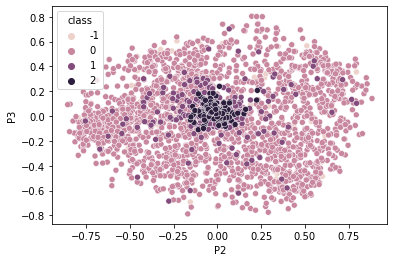

In [ ]:
import seaborn as sns
sns.scatterplot(data=X_principal ,y ="P3" ,x="P2" ,hue= "class")

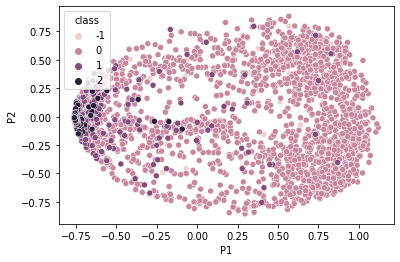

In [ ]:
import seaborn as sns
sns.scatterplot(data=X_principal ,y ="P2" ,x="P1" ,hue= "class")

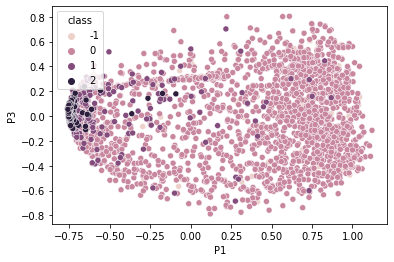

In [ ]:
import seaborn as sns
sns.scatterplot(data=X_principal ,y ="P3" ,x="P1" ,hue= "class")

DEAD END , now consider  a second approac

---



In [ ]:
actions['type_name'].unique()

array(['pass', 'cross', 'clearance', 'throw_in', 'dribble', 'foul',
       'freekick_crossed', 'freekick_short', 'interception', 'goalkick',
       'take_on', 'corner_crossed', 'shot', 'keeper_save', 'tackle',
       'corner_short', 'shot_freekick', 'shot_penalty', 'bad_touch'],
      dtype=object)

requires structure to work

AFTER FAILING TO GEET REASONABLE GROUPINGS I DECIDED TOUSE MY DOMAIN KNOWLEDGE TOGROUP THE ACTIONS IN   FOUR GROUPS AS SEEN BELOW, I WILL B ATTEMPTING TO CLUSTER EACH OF THESE INDIVIDUAL ACTION GROUPS INTO AN ACTION CLASS WHICH DEFINES THE STYLE OR ROLE THE PLAYER ADOPTS IN EACH GROUP , THESE GROUPSARE





1.   OFENSIVE_ACTION
2.   BUILD_PLAY
3.   DEFENSIVE_ACTION
4.   SET_P



In [ ]:
offensive_action =[ 'dribble', 'shot','take_on']
build_play =['pass' ,'cross' , 'bad_touch']
def_action =['foul','interception','interception','tackle','clearance']
set_p =['shot_freekick','freekick_crossed', 'freekick_short','corner_crossed','corner_short','shot_penalty']

In [ ]:
exclude = []
exclude.extend(build_play)
exclude.extend(def_action)
exclude.extend(set_p)
exclude

['pass',
 'cross',
 'bad_touch',
 'foul',
 'interception',
 'interception',
 'tackle',
 'clearance',
 'shot_freekick',
 'freekick_crossed',
 'freekick_short',
 'corner_crossed',
 'corner_short',
 'shot_penalty']

In [ ]:
actions.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


In [ ]:
offensive_fts = actions[["player_id",	"start_x",	"start_y",	"end_x",	"end_y", "bodypart_id",	"type_id",	"type_name",	"result_name",	"bodypart_name"]]

In [ ]:
offensive_fts.head()

,player_id,start_x,start_y,end_x,end_y,bodypart_id,type_id,type_name,result_name,bodypart_name
0,9637,52.50,34.00,63.00,30.60,0,0,pass,success,foot
1,8351,63.00,30.60,64.05,10.20,0,0,pass,success,foot
2,9285,64.05,10.20,72.45,20.40,0,0,pass,success,foot
3,239411,72.45,20.40,35.70,19.04,0,0,pass,success,foot
4,9637,35.70,19.04,30.45,12.24,0,0,pass,success,foot


**offensive *italicized text* style**

In [ ]:
res =offensive_fts[offensive_fts["type_name"].isin(offensive_action)]


In [ ]:
import tqdm
import numpy as np

class process1():
  def __init__(self ,data=actions):
    self.fts = actions[["player_id",	"start_x",
                   "start_y",	"end_x",	"end_y",
                   "bodypart_id",	"type_id",	"type_name",	"result_name",	"bodypart_name"]]

  def process(self,action_group):
    self.res = self.fts[self.fts["type_name"].isin(action_group)]
    self.columns = self.res["type_name"].unique()
    data= self.count(self.columns)
    return data

  def count_elem(self , player_id ,  type_id):
    x = self.res["type_name"].loc[(self.res["type_name"]==type_id) & (self.res['player_id']==player_id)]
    return len(x)

  def count(self,columns):

    x = pd.DataFrame(columns=columns)
    players = self.res['player_id'].unique()

    for player in tqdm.tqdm(players):

      # for column in tqdm.tqdm(columns):
      #   row[column]=count_elem(player, column)


      row  = {column:self.count_elem(player, column) for column in self.columns }
      row["player_id"] = player
      print(row)

      x = x.append(row, ignore_index=True)




    return x



In [ ]:
x = process1()
data_build_play =x.process(build_play)

x = process1()
data_def_action =x.process(def_action)

player_name = pandas.read_csv("/content/drive/MyDrive/turk/Data/players.csv",usecols=["lastName","wyId"])
player_name.columns = ["name" ,"player_id"]

data_def_action = data_def_action.merge(player_name,on=["player_id"])
data_build_play = data_build_play.merge(player_name,on=["player_id"])


data_build_play.to_csv("/content/drive/MyDrive/turk/build_play.csv")
data_def_action.to_csv("/content/drive/MyDrive/turk/def_action.csv")

  0%|          | 1/3029 [00:00<24:44,  2.04it/s]

{'pass': 645, 'cross': 53, 'bad_touch': 0, 'player_id': 9637}


  0%|          | 2/3029 [00:01<30:34,  1.65it/s]

{'pass': 1107, 'cross': 8, 'bad_touch': 0, 'player_id': 8351}


  0%|          | 3/3029 [00:02<39:26,  1.28it/s]

{'pass': 1511, 'cross': 100, 'bad_touch': 0, 'player_id': 9285}


  0%|          | 4/3029 [00:02<29:27,  1.71it/s]

{'pass': 114, 'cross': 1, 'bad_touch': 0, 'player_id': 239411}


  0%|          | 5/3029 [00:02<24:00,  2.10it/s]

{'pass': 165, 'cross': 11, 'bad_touch': 0, 'player_id': 245813}


  0%|          | 6/3029 [00:03<21:23,  2.36it/s]

{'pass': 23, 'cross': 0, 'bad_touch': 0, 'player_id': 259531}


  0%|          | 7/3029 [00:03<18:52,  2.67it/s]

{'pass': 1256, 'cross': 5, 'bad_touch': 0, 'player_id': 9277}


  0%|          | 8/3029 [00:03<17:28,  2.88it/s]

{'pass': 793, 'cross': 88, 'bad_touch': 0, 'player_id': 62224}


  0%|          | 9/3029 [00:03<16:27,  3.06it/s]

{'pass': 689, 'cross': 55, 'bad_touch': 0, 'player_id': 9739}


  0%|          | 10/3029 [00:04<15:48,  3.18it/s]

{'pass': 1551, 'cross': 8, 'bad_touch': 0, 'player_id': 134102}


  0%|          | 11/3029 [00:04<15:24,  3.27it/s]

{'pass': 592, 'cross': 12, 'bad_touch': 0, 'player_id': 8925}


  0%|          | 12/3029 [00:04<15:15,  3.30it/s]

{'pass': 489, 'cross': 42, 'bad_touch': 0, 'player_id': 8284}


  0%|          | 13/3029 [00:05<14:55,  3.37it/s]

{'pass': 840, 'cross': 79, 'bad_touch': 0, 'player_id': 8643}


  0%|          | 14/3029 [00:05<14:44,  3.41it/s]

{'pass': 523, 'cross': 2, 'bad_touch': 1, 'player_id': 10108}


  0%|          | 15/3029 [00:05<14:49,  3.39it/s]

{'pass': 637, 'cross': 0, 'bad_touch': 0, 'player_id': 12242}


  1%|          | 16/3029 [00:05<14:29,  3.47it/s]

{'pass': 1535, 'cross': 23, 'bad_touch': 0, 'player_id': 8125}


  1%|          | 17/3029 [00:06<14:21,  3.49it/s]

{'pass': 1051, 'cross': 5, 'bad_touch': 0, 'player_id': 9433}


  1%|          | 18/3029 [00:06<14:14,  3.52it/s]

{'pass': 622, 'cross': 0, 'bad_touch': 0, 'player_id': 8726}


  1%|          | 19/3029 [00:06<14:15,  3.52it/s]

{'pass': 364, 'cross': 7, 'bad_touch': 0, 'player_id': 9206}


  1%|          | 20/3029 [00:07<14:13,  3.52it/s]

{'pass': 1029, 'cross': 96, 'bad_touch': 0, 'player_id': 8433}


  1%|          | 21/3029 [00:07<14:29,  3.46it/s]

{'pass': 896, 'cross': 31, 'bad_touch': 0, 'player_id': 8980}


  1%|          | 22/3029 [00:07<14:30,  3.46it/s]

{'pass': 929, 'cross': 120, 'bad_touch': 0, 'player_id': 93}


  1%|          | 23/3029 [00:07<14:19,  3.50it/s]

{'pass': 361, 'cross': 24, 'bad_touch': 0, 'player_id': 11669}


  1%|          | 24/3029 [00:08<14:18,  3.50it/s]

{'pass': 996, 'cross': 9, 'bad_touch': 0, 'player_id': 7989}


  1%|          | 25/3029 [00:08<14:12,  3.52it/s]

{'pass': 186, 'cross': 3, 'bad_touch': 0, 'player_id': 9127}


  1%|          | 26/3029 [00:08<14:21,  3.49it/s]

{'pass': 119, 'cross': 10, 'bad_touch': 0, 'player_id': 8296}


  1%|          | 27/3029 [00:09<14:10,  3.53it/s]

{'pass': 17, 'cross': 2, 'bad_touch': 0, 'player_id': 9179}


  1%|          | 28/3029 [00:09<14:01,  3.57it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 532949}


  1%|          | 29/3029 [00:09<14:09,  3.53it/s]

{'pass': 972, 'cross': 134, 'bad_touch': 0, 'player_id': 8471}


  1%|          | 30/3029 [00:09<14:15,  3.51it/s]

{'pass': 1641, 'cross': 15, 'bad_touch': 0, 'player_id': 127537}


  1%|          | 31/3029 [00:10<14:14,  3.51it/s]

{'pass': 613, 'cross': 105, 'bad_touch': 0, 'player_id': 8422}


  1%|          | 32/3029 [00:10<14:11,  3.52it/s]

{'pass': 728, 'cross': 0, 'bad_touch': 0, 'player_id': 25430}


  1%|          | 33/3029 [00:10<14:21,  3.48it/s]

{'pass': 1289, 'cross': 21, 'bad_touch': 0, 'player_id': 7988}


  1%|          | 34/3029 [00:11<14:05,  3.54it/s]

{'pass': 214, 'cross': 20, 'bad_touch': 0, 'player_id': 486252}


  1%|          | 35/3029 [00:11<13:59,  3.57it/s]

{'pass': 1038, 'cross': 14, 'bad_touch': 0, 'player_id': 8623}


  1%|          | 36/3029 [00:11<13:55,  3.58it/s]

{'pass': 897, 'cross': 54, 'bad_touch': 0, 'player_id': 454}


  1%|          | 37/3029 [00:11<14:03,  3.55it/s]

{'pass': 818, 'cross': 24, 'bad_touch': 0, 'player_id': 235555}


  1%|▏         | 38/3029 [00:12<14:02,  3.55it/s]

{'pass': 1069, 'cross': 20, 'bad_touch': 0, 'player_id': 8285}


  1%|▏         | 39/3029 [00:12<14:00,  3.56it/s]

{'pass': 1228, 'cross': 11, 'bad_touch': 0, 'player_id': 25537}


  1%|▏         | 40/3029 [00:12<14:02,  3.55it/s]

{'pass': 854, 'cross': 44, 'bad_touch': 0, 'player_id': 8370}


  1%|▏         | 41/3029 [00:12<13:55,  3.58it/s]

{'pass': 400, 'cross': 89, 'bad_touch': 1, 'player_id': 8530}


  1%|▏         | 42/3029 [00:13<14:01,  3.55it/s]

{'pass': 778, 'cross': 95, 'bad_touch': 0, 'player_id': 5281}


  1%|▏         | 43/3029 [00:13<14:19,  3.47it/s]

{'pass': 487, 'cross': 0, 'bad_touch': 0, 'player_id': 8425}


  1%|▏         | 44/3029 [00:13<14:23,  3.45it/s]

{'pass': 862, 'cross': 3, 'bad_touch': 0, 'player_id': 8554}


  1%|▏         | 45/3029 [00:14<14:37,  3.40it/s]

{'pass': 875, 'cross': 44, 'bad_touch': 0, 'player_id': 8360}


  2%|▏         | 46/3029 [00:14<14:21,  3.46it/s]

{'pass': 592, 'cross': 0, 'bad_touch': 0, 'player_id': 8358}


  2%|▏         | 47/3029 [00:14<14:27,  3.44it/s]

{'pass': 631, 'cross': 29, 'bad_touch': 0, 'player_id': 8958}


  2%|▏         | 48/3029 [00:15<14:19,  3.47it/s]

{'pass': 1278, 'cross': 13, 'bad_touch': 0, 'player_id': 119951}


  2%|▏         | 49/3029 [00:15<14:11,  3.50it/s]

{'pass': 1012, 'cross': 76, 'bad_touch': 0, 'player_id': 7853}


  2%|▏         | 50/3029 [00:15<13:59,  3.55it/s]

{'pass': 681, 'cross': 41, 'bad_touch': 0, 'player_id': 3577}


  2%|▏         | 51/3029 [00:15<14:00,  3.54it/s]

{'pass': 222, 'cross': 19, 'bad_touch': 0, 'player_id': 261}


  2%|▏         | 52/3029 [00:16<14:05,  3.52it/s]

{'pass': 440, 'cross': 6, 'bad_touch': 0, 'player_id': 38031}


  2%|▏         | 53/3029 [00:16<14:00,  3.54it/s]

{'pass': 206, 'cross': 25, 'bad_touch': 0, 'player_id': 8686}


  2%|▏         | 54/3029 [00:16<13:58,  3.55it/s]

{'pass': 233, 'cross': 13, 'bad_touch': 0, 'player_id': 7907}


  2%|▏         | 55/3029 [00:16<13:58,  3.55it/s]

{'pass': 68, 'cross': 7, 'bad_touch': 0, 'player_id': 8049}


  2%|▏         | 56/3029 [00:17<13:59,  3.54it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 25703}


  2%|▏         | 57/3029 [00:17<13:59,  3.54it/s]

{'pass': 340, 'cross': 19, 'bad_touch': 0, 'player_id': 8290}


  2%|▏         | 58/3029 [00:17<14:09,  3.50it/s]

{'pass': 1358, 'cross': 5, 'bad_touch': 0, 'player_id': 8897}


  2%|▏         | 59/3029 [00:18<14:00,  3.53it/s]

{'pass': 1646, 'cross': 2, 'bad_touch': 0, 'player_id': 55979}


  2%|▏         | 60/3029 [00:18<13:52,  3.57it/s]

{'pass': 649, 'cross': 41, 'bad_touch': 0, 'player_id': 9419}


  2%|▏         | 61/3029 [00:18<13:48,  3.58it/s]

{'pass': 633, 'cross': 55, 'bad_touch': 0, 'player_id': 14796}


  2%|▏         | 62/3029 [00:18<13:50,  3.57it/s]

{'pass': 427, 'cross': 22, 'bad_touch': 0, 'player_id': 132}


  2%|▏         | 63/3029 [00:19<13:54,  3.56it/s]

{'pass': 1357, 'cross': 3, 'bad_touch': 0, 'player_id': 15215}


  2%|▏         | 64/3029 [00:19<13:47,  3.58it/s]

{'pass': 1831, 'cross': 96, 'bad_touch': 0, 'player_id': 167145}


  2%|▏         | 65/3029 [00:19<13:55,  3.55it/s]

{'pass': 1144, 'cross': 35, 'bad_touch': 0, 'player_id': 230020}


  2%|▏         | 66/3029 [00:20<13:49,  3.57it/s]

{'pass': 1771, 'cross': 14, 'bad_touch': 0, 'player_id': 20612}


  2%|▏         | 67/3029 [00:20<13:48,  3.58it/s]

{'pass': 582, 'cross': 0, 'bad_touch': 0, 'player_id': 370224}


  2%|▏         | 68/3029 [00:20<13:45,  3.59it/s]

{'pass': 1229, 'cross': 61, 'bad_touch': 0, 'player_id': 14869}


  2%|▏         | 69/3029 [00:20<13:48,  3.57it/s]

{'pass': 578, 'cross': 53, 'bad_touch': 0, 'player_id': 25867}


  2%|▏         | 70/3029 [00:21<13:51,  3.56it/s]

{'pass': 849, 'cross': 0, 'bad_touch': 1, 'player_id': 56038}


  2%|▏         | 71/3029 [00:21<13:48,  3.57it/s]

{'pass': 1424, 'cross': 44, 'bad_touch': 0, 'player_id': 7870}


  2%|▏         | 72/3029 [00:21<13:41,  3.60it/s]

{'pass': 160, 'cross': 0, 'bad_touch': 0, 'player_id': 25662}


  2%|▏         | 73/3029 [00:22<13:44,  3.59it/s]

{'pass': 1979, 'cross': 85, 'bad_touch': 0, 'player_id': 62389}


  2%|▏         | 74/3029 [00:22<13:45,  3.58it/s]

{'pass': 384, 'cross': 8, 'bad_touch': 0, 'player_id': 214654}


  2%|▏         | 75/3029 [00:22<13:38,  3.61it/s]

{'pass': 617, 'cross': 108, 'bad_touch': 0, 'player_id': 282550}


  3%|▎         | 76/3029 [00:22<13:41,  3.60it/s]

{'pass': 933, 'cross': 65, 'bad_touch': 0, 'player_id': 105338}


  3%|▎         | 77/3029 [00:23<13:43,  3.59it/s]

{'pass': 650, 'cross': 29, 'bad_touch': 0, 'player_id': 25413}


  3%|▎         | 78/3029 [00:23<13:36,  3.61it/s]

{'pass': 3716, 'cross': 15, 'bad_touch': 0, 'player_id': 49876}


  3%|▎         | 79/3029 [00:23<13:38,  3.61it/s]

{'pass': 257, 'cross': 3, 'bad_touch': 0, 'player_id': 0}


  3%|▎         | 80/3029 [00:23<13:45,  3.57it/s]

{'pass': 350, 'cross': 2, 'bad_touch': 0, 'player_id': 38377}


  3%|▎         | 81/3029 [00:24<13:44,  3.58it/s]

{'pass': 391, 'cross': 5, 'bad_touch': 0, 'player_id': 7945}


  3%|▎         | 82/3029 [00:24<13:53,  3.53it/s]

{'pass': 535, 'cross': 24, 'bad_touch': 0, 'player_id': 279717}


  3%|▎         | 83/3029 [00:24<13:52,  3.54it/s]

{'pass': 1681, 'cross': 37, 'bad_touch': 0, 'player_id': 3560}


  3%|▎         | 84/3029 [00:25<13:56,  3.52it/s]

{'pass': 329, 'cross': 12, 'bad_touch': 0, 'player_id': 303357}


  3%|▎         | 85/3029 [00:25<13:50,  3.55it/s]

{'pass': 45, 'cross': 0, 'bad_touch': 0, 'player_id': 8745}


  3%|▎         | 86/3029 [00:25<13:51,  3.54it/s]

{'pass': 1243, 'cross': 7, 'bad_touch': 0, 'player_id': 116}


  3%|▎         | 87/3029 [00:25<13:50,  3.54it/s]

{'pass': 2075, 'cross': 5, 'bad_touch': 0, 'player_id': 25393}


  3%|▎         | 88/3029 [00:26<13:48,  3.55it/s]

{'pass': 988, 'cross': 58, 'bad_touch': 0, 'player_id': 25747}


  3%|▎         | 89/3029 [00:26<13:45,  3.56it/s]

{'pass': 2328, 'cross': 43, 'bad_touch': 0, 'player_id': 7964}


  3%|▎         | 90/3029 [00:26<13:40,  3.58it/s]

{'pass': 1650, 'cross': 2, 'bad_touch': 0, 'player_id': 370}


  3%|▎         | 91/3029 [00:27<13:45,  3.56it/s]

{'pass': 1341, 'cross': 3, 'bad_touch': 0, 'player_id': 8242}


  3%|▎         | 92/3029 [00:27<13:37,  3.59it/s]

{'pass': 744, 'cross': 0, 'bad_touch': 0, 'player_id': 61390}


  3%|▎         | 93/3029 [00:27<13:31,  3.62it/s]

{'pass': 228, 'cross': 7, 'bad_touch': 0, 'player_id': 61961}


  3%|▎         | 94/3029 [00:27<13:43,  3.56it/s]

{'pass': 450, 'cross': 35, 'bad_touch': 0, 'player_id': 20855}


  3%|▎         | 95/3029 [00:28<13:47,  3.55it/s]

{'pass': 966, 'cross': 72, 'bad_touch': 0, 'player_id': 25950}


  3%|▎         | 96/3029 [00:28<13:49,  3.53it/s]

{'pass': 1036, 'cross': 104, 'bad_touch': 0, 'player_id': 346101}


  3%|▎         | 97/3029 [00:28<13:49,  3.53it/s]

{'pass': 1119, 'cross': 65, 'bad_touch': 0, 'player_id': 15808}


  3%|▎         | 98/3029 [00:29<13:53,  3.51it/s]

{'pass': 1727, 'cross': 8, 'bad_touch': 0, 'player_id': 8086}


  3%|▎         | 99/3029 [00:29<13:52,  3.52it/s]

{'pass': 1440, 'cross': 9, 'bad_touch': 4, 'player_id': 9097}


  3%|▎         | 100/3029 [00:29<13:50,  3.53it/s]

{'pass': 1345, 'cross': 16, 'bad_touch': 0, 'player_id': 466}


  3%|▎         | 101/3029 [00:29<13:49,  3.53it/s]

{'pass': 41, 'cross': 5, 'bad_touch': 0, 'player_id': 120}


  3%|▎         | 102/3029 [00:30<13:51,  3.52it/s]

{'pass': 1412, 'cross': 101, 'bad_touch': 0, 'player_id': 222220}


  3%|▎         | 103/3029 [00:30<13:46,  3.54it/s]

{'pass': 652, 'cross': 92, 'bad_touch': 0, 'player_id': 247248}


  3%|▎         | 104/3029 [00:30<13:40,  3.56it/s]

{'pass': 785, 'cross': 55, 'bad_touch': 1, 'player_id': 26495}


  3%|▎         | 105/3029 [00:31<13:50,  3.52it/s]

{'pass': 461, 'cross': 0, 'bad_touch': 0, 'player_id': 15175}


  3%|▎         | 106/3029 [00:31<14:05,  3.46it/s]

{'pass': 177, 'cross': 6, 'bad_touch': 0, 'player_id': 286831}


  4%|▎         | 107/3029 [00:31<13:58,  3.49it/s]

{'pass': 957, 'cross': 47, 'bad_touch': 0, 'player_id': 120353}


  4%|▎         | 108/3029 [00:31<13:56,  3.49it/s]

{'pass': 1154, 'cross': 109, 'bad_touch': 0, 'player_id': 15526}


  4%|▎         | 109/3029 [00:32<13:56,  3.49it/s]

{'pass': 572, 'cross': 10, 'bad_touch': 0, 'player_id': 8416}


  4%|▎         | 110/3029 [00:32<13:53,  3.50it/s]

{'pass': 299, 'cross': 15, 'bad_touch': 0, 'player_id': 8140}


  4%|▎         | 111/3029 [00:32<13:46,  3.53it/s]

{'pass': 76, 'cross': 1, 'bad_touch': 0, 'player_id': 13451}


  4%|▎         | 112/3029 [00:33<13:45,  3.54it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 351808}


  4%|▎         | 113/3029 [00:33<13:43,  3.54it/s]

{'pass': 75, 'cross': 4, 'bad_touch': 0, 'player_id': 8955}


  4%|▍         | 114/3029 [00:33<13:43,  3.54it/s]

{'pass': 649, 'cross': 65, 'bad_touch': 0, 'player_id': 397178}


  4%|▍         | 115/3029 [00:33<13:39,  3.55it/s]

{'pass': 97, 'cross': 0, 'bad_touch': 0, 'player_id': 7928}


  4%|▍         | 116/3029 [00:34<13:57,  3.48it/s]

{'pass': 513, 'cross': 2, 'bad_touch': 0, 'player_id': 101652}


  4%|▍         | 117/3029 [00:34<13:43,  3.54it/s]

{'pass': 421, 'cross': 1, 'bad_touch': 1, 'player_id': 256998}


  4%|▍         | 118/3029 [00:34<14:05,  3.44it/s]

{'pass': 1147, 'cross': 73, 'bad_touch': 0, 'player_id': 7906}


  4%|▍         | 119/3029 [00:35<15:09,  3.20it/s]

{'pass': 1463, 'cross': 110, 'bad_touch': 0, 'player_id': 7939}


  4%|▍         | 120/3029 [00:35<14:36,  3.32it/s]

{'pass': 219, 'cross': 15, 'bad_touch': 0, 'player_id': 38}


  4%|▍         | 121/3029 [00:35<14:19,  3.38it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 20606}


  4%|▍         | 122/3029 [00:35<14:05,  3.44it/s]

{'pass': 338, 'cross': 6, 'bad_touch': 0, 'player_id': 397174}


  4%|▍         | 123/3029 [00:36<13:57,  3.47it/s]

{'pass': 2165, 'cross': 40, 'bad_touch': 0, 'player_id': 28292}


  4%|▍         | 124/3029 [00:36<13:44,  3.52it/s]

{'pass': 918, 'cross': 104, 'bad_touch': 0, 'player_id': 92899}


  4%|▍         | 125/3029 [00:36<13:41,  3.54it/s]

{'pass': 673, 'cross': 38, 'bad_touch': 0, 'player_id': 20593}


  4%|▍         | 126/3029 [00:37<13:40,  3.54it/s]

{'pass': 404, 'cross': 32, 'bad_touch': 0, 'player_id': 3348}


  4%|▍         | 127/3029 [00:37<13:44,  3.52it/s]

{'pass': 252, 'cross': 0, 'bad_touch': 0, 'player_id': 9403}


  4%|▍         | 128/3029 [00:37<13:37,  3.55it/s]

{'pass': 784, 'cross': 72, 'bad_touch': 0, 'player_id': 160}


  4%|▍         | 129/3029 [00:37<13:37,  3.55it/s]

{'pass': 404, 'cross': 10, 'bad_touch': 0, 'player_id': 8981}


  4%|▍         | 130/3029 [00:38<13:43,  3.52it/s]

{'pass': 245, 'cross': 10, 'bad_touch': 0, 'player_id': 21095}


  4%|▍         | 131/3029 [00:38<13:39,  3.54it/s]

{'pass': 1399, 'cross': 63, 'bad_touch': 0, 'player_id': 3361}


  4%|▍         | 132/3029 [00:38<13:30,  3.57it/s]

{'pass': 402, 'cross': 0, 'bad_touch': 0, 'player_id': 8266}


  4%|▍         | 133/3029 [00:39<13:24,  3.60it/s]

{'pass': 762, 'cross': 65, 'bad_touch': 0, 'player_id': 377071}


  4%|▍         | 134/3029 [00:39<13:32,  3.56it/s]

{'pass': 276, 'cross': 12, 'bad_touch': 0, 'player_id': 10663}


  4%|▍         | 135/3029 [00:39<13:31,  3.57it/s]

{'pass': 881, 'cross': 2, 'bad_touch': 1, 'player_id': 68085}


  4%|▍         | 136/3029 [00:39<13:36,  3.54it/s]

{'pass': 954, 'cross': 6, 'bad_touch': 0, 'player_id': 8889}


  5%|▍         | 137/3029 [00:40<13:34,  3.55it/s]

{'pass': 470, 'cross': 31, 'bad_touch': 0, 'player_id': 8135}


  5%|▍         | 138/3029 [00:40<13:40,  3.52it/s]

{'pass': 415, 'cross': 8, 'bad_touch': 0, 'player_id': 8903}


  5%|▍         | 139/3029 [00:40<13:33,  3.55it/s]

{'pass': 172, 'cross': 2, 'bad_touch': 0, 'player_id': 7888}


  5%|▍         | 140/3029 [00:41<13:34,  3.55it/s]

{'pass': 1023, 'cross': 16, 'bad_touch': 0, 'player_id': 3413}


  5%|▍         | 141/3029 [00:41<13:40,  3.52it/s]

{'pass': 2358, 'cross': 58, 'bad_touch': 0, 'player_id': 7936}


  5%|▍         | 142/3029 [00:41<13:38,  3.53it/s]

{'pass': 509, 'cross': 11, 'bad_touch': 0, 'player_id': 26010}


  5%|▍         | 143/3029 [00:41<13:37,  3.53it/s]

{'pass': 1806, 'cross': 73, 'bad_touch': 0, 'player_id': 25707}


  5%|▍         | 144/3029 [00:42<13:39,  3.52it/s]

{'pass': 48, 'cross': 3, 'bad_touch': 0, 'player_id': 8246}


  5%|▍         | 145/3029 [00:42<13:35,  3.54it/s]

{'pass': 2676, 'cross': 26, 'bad_touch': 0, 'player_id': 31528}


  5%|▍         | 146/3029 [00:42<13:37,  3.53it/s]

{'pass': 1471, 'cross': 2, 'bad_touch': 0, 'player_id': 135103}


  5%|▍         | 147/3029 [00:43<13:28,  3.56it/s]

{'pass': 1051, 'cross': 0, 'bad_touch': 0, 'player_id': 3429}


  5%|▍         | 148/3029 [00:43<13:34,  3.54it/s]

{'pass': 1240, 'cross': 37, 'bad_touch': 0, 'player_id': 7967}


  5%|▍         | 149/3029 [00:43<13:28,  3.56it/s]

{'pass': 146, 'cross': 16, 'bad_touch': 0, 'player_id': 40787}


  5%|▍         | 150/3029 [00:43<13:35,  3.53it/s]

{'pass': 1014, 'cross': 79, 'bad_touch': 1, 'player_id': 252365}


  5%|▍         | 151/3029 [00:44<13:38,  3.52it/s]

{'pass': 198, 'cross': 0, 'bad_touch': 0, 'player_id': 104851}


  5%|▌         | 152/3029 [00:44<13:38,  3.51it/s]

{'pass': 1144, 'cross': 3, 'bad_touch': 0, 'player_id': 8833}


  5%|▌         | 153/3029 [00:44<13:39,  3.51it/s]

{'pass': 902, 'cross': 117, 'bad_touch': 0, 'player_id': 8625}


  5%|▌         | 154/3029 [00:45<13:40,  3.51it/s]

{'pass': 1017, 'cross': 8, 'bad_touch': 0, 'player_id': 3523}


  5%|▌         | 155/3029 [00:45<13:45,  3.48it/s]

{'pass': 2659, 'cross': 92, 'bad_touch': 1, 'player_id': 25553}


  5%|▌         | 156/3029 [00:45<13:33,  3.53it/s]

{'pass': 281, 'cross': 47, 'bad_touch': 0, 'player_id': 293686}


  5%|▌         | 157/3029 [00:45<13:57,  3.43it/s]

{'pass': 684, 'cross': 42, 'bad_touch': 1, 'player_id': 230883}


  5%|▌         | 158/3029 [00:46<14:00,  3.42it/s]

{'pass': 1001, 'cross': 96, 'bad_touch': 0, 'player_id': 9227}


  5%|▌         | 159/3029 [00:46<13:54,  3.44it/s]

{'pass': 777, 'cross': 6, 'bad_touch': 0, 'player_id': 8620}


  5%|▌         | 160/3029 [00:46<13:50,  3.45it/s]

{'pass': 1530, 'cross': 0, 'bad_touch': 0, 'player_id': 7887}


  5%|▌         | 161/3029 [00:47<13:42,  3.49it/s]

{'pass': 588, 'cross': 25, 'bad_touch': 0, 'player_id': 7978}


  5%|▌         | 162/3029 [00:47<13:43,  3.48it/s]

{'pass': 367, 'cross': 8, 'bad_touch': 0, 'player_id': 12536}


  5%|▌         | 163/3029 [00:47<13:36,  3.51it/s]

{'pass': 1065, 'cross': 8, 'bad_touch': 0, 'player_id': 28291}


  5%|▌         | 164/3029 [00:47<13:30,  3.53it/s]

{'pass': 478, 'cross': 8, 'bad_touch': 0, 'player_id': 3327}


  5%|▌         | 165/3029 [00:48<13:32,  3.53it/s]

{'pass': 484, 'cross': 22, 'bad_touch': 0, 'player_id': 134294}


  5%|▌         | 166/3029 [00:48<13:33,  3.52it/s]

{'pass': 563, 'cross': 32, 'bad_touch': 0, 'player_id': 3324}


  6%|▌         | 167/3029 [00:48<13:40,  3.49it/s]

{'pass': 1044, 'cross': 67, 'bad_touch': 0, 'player_id': 105333}


  6%|▌         | 168/3029 [00:49<13:36,  3.51it/s]

{'pass': 659, 'cross': 48, 'bad_touch': 0, 'player_id': 3360}


  6%|▌         | 169/3029 [00:49<13:36,  3.50it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 26109}


  6%|▌         | 170/3029 [00:49<13:30,  3.53it/s]

{'pass': 3045, 'cross': 206, 'bad_touch': 0, 'player_id': 38021}


  6%|▌         | 171/3029 [00:49<13:32,  3.52it/s]

{'pass': 1677, 'cross': 2, 'bad_touch': 0, 'player_id': 9380}


  6%|▌         | 172/3029 [00:50<13:29,  3.53it/s]

{'pass': 904, 'cross': 10, 'bad_touch': 0, 'player_id': 8136}


  6%|▌         | 173/3029 [00:50<13:29,  3.53it/s]

{'pass': 1166, 'cross': 123, 'bad_touch': 0, 'player_id': 383}


  6%|▌         | 174/3029 [00:50<13:29,  3.53it/s]

{'pass': 1778, 'cross': 6, 'bad_touch': 0, 'player_id': 7899}


  6%|▌         | 175/3029 [00:50<13:21,  3.56it/s]

{'pass': 53, 'cross': 0, 'bad_touch': 0, 'player_id': 3662}


  6%|▌         | 176/3029 [00:51<13:25,  3.54it/s]

{'pass': 2972, 'cross': 18, 'bad_touch': 1, 'player_id': 105339}


  6%|▌         | 177/3029 [00:51<13:33,  3.50it/s]

{'pass': 1149, 'cross': 32, 'bad_touch': 0, 'player_id': 70083}


  6%|▌         | 178/3029 [00:51<13:33,  3.51it/s]

{'pass': 1330, 'cross': 1, 'bad_touch': 0, 'player_id': 703}


  6%|▌         | 179/3029 [00:52<13:33,  3.50it/s]

{'pass': 1506, 'cross': 117, 'bad_touch': 0, 'player_id': 7885}


  6%|▌         | 180/3029 [00:52<13:39,  3.48it/s]

{'pass': 1073, 'cross': 14, 'bad_touch': 0, 'player_id': 135114}


  6%|▌         | 181/3029 [00:52<13:32,  3.51it/s]

{'pass': 1278, 'cross': 7, 'bad_touch': 0, 'player_id': 268776}


  6%|▌         | 182/3029 [00:52<13:26,  3.53it/s]

{'pass': 1711, 'cross': 12, 'bad_touch': 1, 'player_id': 134502}


  6%|▌         | 183/3029 [00:53<13:30,  3.51it/s]

{'pass': 1733, 'cross': 23, 'bad_touch': 0, 'player_id': 8464}


  6%|▌         | 184/3029 [00:53<13:31,  3.50it/s]

{'pass': 1017, 'cross': 76, 'bad_touch': 0, 'player_id': 265673}


  6%|▌         | 185/3029 [00:54<20:35,  2.30it/s]

{'pass': 1405, 'cross': 9, 'bad_touch': 0, 'player_id': 14808}


  6%|▌         | 186/3029 [00:54<18:31,  2.56it/s]

{'pass': 1318, 'cross': 86, 'bad_touch': 0, 'player_id': 11066}


  6%|▌         | 187/3029 [00:54<16:54,  2.80it/s]

{'pass': 223, 'cross': 0, 'bad_touch': 0, 'player_id': 8580}


  6%|▌         | 188/3029 [00:55<15:57,  2.97it/s]

{'pass': 1039, 'cross': 92, 'bad_touch': 0, 'player_id': 245364}


  6%|▌         | 189/3029 [00:55<15:28,  3.06it/s]

{'pass': 199, 'cross': 2, 'bad_touch': 0, 'player_id': 8953}


  6%|▋         | 190/3029 [00:55<14:54,  3.18it/s]

{'pass': 800, 'cross': 58, 'bad_touch': 0, 'player_id': 8116}


  6%|▋         | 191/3029 [00:56<14:31,  3.25it/s]

{'pass': 1574, 'cross': 175, 'bad_touch': 0, 'player_id': 70389}


  6%|▋         | 192/3029 [00:56<14:22,  3.29it/s]

{'pass': 643, 'cross': 12, 'bad_touch': 0, 'player_id': 340386}


  6%|▋         | 193/3029 [00:56<14:19,  3.30it/s]

{'pass': 722, 'cross': 49, 'bad_touch': 0, 'player_id': 8144}


  6%|▋         | 194/3029 [00:56<13:56,  3.39it/s]

{'pass': 398, 'cross': 31, 'bad_touch': 0, 'player_id': 8384}


  6%|▋         | 195/3029 [00:57<13:42,  3.44it/s]

{'pass': 40, 'cross': 3, 'bad_touch': 0, 'player_id': 447205}


  6%|▋         | 196/3029 [00:57<13:41,  3.45it/s]

{'pass': 30, 'cross': 1, 'bad_touch': 0, 'player_id': 404397}


  7%|▋         | 197/3029 [00:57<13:39,  3.45it/s]

{'pass': 542, 'cross': 15, 'bad_touch': 0, 'player_id': 25572}


  7%|▋         | 198/3029 [00:58<13:47,  3.42it/s]

{'pass': 1361, 'cross': 50, 'bad_touch': 0, 'player_id': 8976}


  7%|▋         | 199/3029 [00:58<14:02,  3.36it/s]

{'pass': 1673, 'cross': 4, 'bad_touch': 0, 'player_id': 246866}


  7%|▋         | 200/3029 [00:58<13:51,  3.40it/s]

{'pass': 783, 'cross': 53, 'bad_touch': 0, 'player_id': 25571}


  7%|▋         | 201/3029 [00:58<13:41,  3.44it/s]

{'pass': 1552, 'cross': 35, 'bad_touch': 0, 'player_id': 77548}


  7%|▋         | 202/3029 [00:59<13:32,  3.48it/s]

{'pass': 1345, 'cross': 117, 'bad_touch': 0, 'player_id': 49872}


  7%|▋         | 203/3029 [00:59<13:30,  3.49it/s]

{'pass': 56, 'cross': 0, 'bad_touch': 0, 'player_id': 399564}


  7%|▋         | 204/3029 [00:59<13:30,  3.49it/s]

{'pass': 616, 'cross': 1, 'bad_touch': 1, 'player_id': 8731}


  7%|▋         | 205/3029 [01:00<13:31,  3.48it/s]

{'pass': 680, 'cross': 0, 'bad_touch': 1, 'player_id': 8094}


  7%|▋         | 206/3029 [01:00<13:34,  3.47it/s]

{'pass': 993, 'cross': 12, 'bad_touch': 0, 'player_id': 25854}


  7%|▋         | 207/3029 [01:00<13:37,  3.45it/s]

{'pass': 356, 'cross': 8, 'bad_touch': 0, 'player_id': 207164}


  7%|▋         | 208/3029 [01:01<13:39,  3.44it/s]

{'pass': 523, 'cross': 38, 'bad_touch': 0, 'player_id': 77552}


  7%|▋         | 209/3029 [01:01<13:48,  3.40it/s]

{'pass': 599, 'cross': 18, 'bad_touch': 0, 'player_id': 8498}


  7%|▋         | 210/3029 [01:01<13:56,  3.37it/s]

{'pass': 837, 'cross': 10, 'bad_touch': 0, 'player_id': 284}


  7%|▋         | 211/3029 [01:01<13:51,  3.39it/s]

{'pass': 829, 'cross': 0, 'bad_touch': 0, 'player_id': 7847}


  7%|▋         | 212/3029 [01:02<13:51,  3.39it/s]

{'pass': 93, 'cross': 6, 'bad_touch': 0, 'player_id': 77541}


  7%|▋         | 213/3029 [01:02<13:52,  3.38it/s]

{'pass': 410, 'cross': 4, 'bad_touch': 0, 'player_id': 8747}


  7%|▋         | 214/3029 [01:02<13:44,  3.42it/s]

{'pass': 1231, 'cross': 191, 'bad_touch': 0, 'player_id': 8192}


  7%|▋         | 215/3029 [01:03<13:36,  3.45it/s]

{'pass': 162, 'cross': 16, 'bad_touch': 0, 'player_id': 77557}


  7%|▋         | 216/3029 [01:03<13:26,  3.49it/s]

{'pass': 1018, 'cross': 75, 'bad_touch': 0, 'player_id': 107}


  7%|▋         | 217/3029 [01:03<13:21,  3.51it/s]

{'pass': 494, 'cross': 46, 'bad_touch': 0, 'player_id': 15054}


  7%|▋         | 218/3029 [01:03<13:28,  3.48it/s]

{'pass': 306, 'cross': 43, 'bad_touch': 0, 'player_id': 49971}


  7%|▋         | 219/3029 [01:04<13:36,  3.44it/s]

{'pass': 1000, 'cross': 19, 'bad_touch': 0, 'player_id': 7932}


  7%|▋         | 220/3029 [01:04<13:32,  3.46it/s]

{'pass': 129, 'cross': 1, 'bad_touch': 0, 'player_id': 77550}


  7%|▋         | 221/3029 [01:04<13:32,  3.46it/s]

{'pass': 761, 'cross': 24, 'bad_touch': 0, 'player_id': 10252}


  7%|▋         | 222/3029 [01:05<13:28,  3.47it/s]

{'pass': 254, 'cross': 16, 'bad_touch': 0, 'player_id': 343951}


  7%|▋         | 223/3029 [01:05<13:28,  3.47it/s]

{'pass': 67, 'cross': 1, 'bad_touch': 0, 'player_id': 8017}


  7%|▋         | 224/3029 [01:05<13:48,  3.39it/s]

{'pass': 985, 'cross': 55, 'bad_touch': 0, 'player_id': 25804}


  7%|▋         | 225/3029 [01:05<13:29,  3.46it/s]

{'pass': 1548, 'cross': 14, 'bad_touch': 0, 'player_id': 36}


  7%|▋         | 226/3029 [01:06<13:21,  3.50it/s]

{'pass': 902, 'cross': 26, 'bad_touch': 0, 'player_id': 149019}


  7%|▋         | 227/3029 [01:06<13:18,  3.51it/s]

{'pass': 2581, 'cross': 31, 'bad_touch': 0, 'player_id': 210044}


  8%|▊         | 228/3029 [01:06<13:22,  3.49it/s]

{'pass': 594, 'cross': 73, 'bad_touch': 0, 'player_id': 8292}


  8%|▊         | 229/3029 [01:07<13:16,  3.52it/s]

{'pass': 603, 'cross': 3, 'bad_touch': 0, 'player_id': 61967}


  8%|▊         | 230/3029 [01:07<13:19,  3.50it/s]

{'pass': 997, 'cross': 0, 'bad_touch': 0, 'player_id': 25381}


  8%|▊         | 231/3029 [01:07<13:31,  3.45it/s]

{'pass': 96, 'cross': 13, 'bad_touch': 0, 'player_id': 402884}


  8%|▊         | 232/3029 [01:07<13:20,  3.49it/s]

{'pass': 751, 'cross': 35, 'bad_touch': 0, 'player_id': 8717}


  8%|▊         | 233/3029 [01:08<13:15,  3.51it/s]

{'pass': 140, 'cross': 5, 'bad_touch': 0, 'player_id': 40765}


  8%|▊         | 234/3029 [01:08<13:09,  3.54it/s]

{'pass': 34, 'cross': 0, 'bad_touch': 0, 'player_id': 93084}


  8%|▊         | 235/3029 [01:08<13:19,  3.50it/s]

{'pass': 899, 'cross': 0, 'bad_touch': 0, 'player_id': 8488}


  8%|▊         | 236/3029 [01:09<13:13,  3.52it/s]

{'pass': 826, 'cross': 3, 'bad_touch': 0, 'player_id': 3928}


  8%|▊         | 237/3029 [01:09<13:07,  3.55it/s]

{'pass': 2051, 'cross': 23, 'bad_touch': 0, 'player_id': 8653}


  8%|▊         | 238/3029 [01:09<13:19,  3.49it/s]

{'pass': 724, 'cross': 10, 'bad_touch': 0, 'player_id': 70403}


  8%|▊         | 239/3029 [01:09<13:14,  3.51it/s]

{'pass': 1194, 'cross': 74, 'bad_touch': 0, 'player_id': 26150}


  8%|▊         | 240/3029 [01:10<13:05,  3.55it/s]

{'pass': 1017, 'cross': 81, 'bad_touch': 1, 'player_id': 14853}


  8%|▊         | 241/3029 [01:10<13:05,  3.55it/s]

{'pass': 431, 'cross': 12, 'bad_touch': 0, 'player_id': 20441}


  8%|▊         | 242/3029 [01:10<13:08,  3.54it/s]

{'pass': 2269, 'cross': 120, 'bad_touch': 0, 'player_id': 54}


  8%|▊         | 243/3029 [01:11<13:05,  3.55it/s]

{'pass': 539, 'cross': 75, 'bad_touch': 0, 'player_id': 283142}


  8%|▊         | 244/3029 [01:11<13:05,  3.54it/s]

{'pass': 429, 'cross': 60, 'bad_touch': 0, 'player_id': 12829}


  8%|▊         | 245/3029 [01:11<13:01,  3.56it/s]

{'pass': 274, 'cross': 8, 'bad_touch': 0, 'player_id': 285508}


  8%|▊         | 246/3029 [01:11<13:02,  3.56it/s]

{'pass': 167, 'cross': 2, 'bad_touch': 0, 'player_id': 419784}


  8%|▊         | 247/3029 [01:12<13:06,  3.54it/s]

{'pass': 223, 'cross': 16, 'bad_touch': 0, 'player_id': 277002}


  8%|▊         | 248/3029 [01:12<13:01,  3.56it/s]

{'pass': 1495, 'cross': 42, 'bad_touch': 0, 'player_id': 13484}


  8%|▊         | 249/3029 [01:12<13:19,  3.48it/s]

{'pass': 2022, 'cross': 4, 'bad_touch': 1, 'player_id': 257762}


  8%|▊         | 250/3029 [01:13<13:12,  3.51it/s]

{'pass': 982, 'cross': 59, 'bad_touch': 0, 'player_id': 14911}


  8%|▊         | 251/3029 [01:13<13:06,  3.53it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 448708}


  8%|▊         | 252/3029 [01:13<13:11,  3.51it/s]

{'pass': 1244, 'cross': 12, 'bad_touch': 0, 'player_id': 8561}


  8%|▊         | 253/3029 [01:13<13:11,  3.51it/s]

{'pass': 1282, 'cross': 108, 'bad_touch': 0, 'player_id': 8582}


  8%|▊         | 254/3029 [01:14<13:12,  3.50it/s]

{'pass': 695, 'cross': 103, 'bad_touch': 0, 'player_id': 26499}


  8%|▊         | 255/3029 [01:14<13:12,  3.50it/s]

{'pass': 741, 'cross': 80, 'bad_touch': 0, 'player_id': 14703}


  8%|▊         | 256/3029 [01:14<13:12,  3.50it/s]

{'pass': 1085, 'cross': 4, 'bad_touch': 0, 'player_id': 8143}


  8%|▊         | 257/3029 [01:15<13:08,  3.52it/s]

{'pass': 917, 'cross': 19, 'bad_touch': 0, 'player_id': 37725}


  9%|▊         | 258/3029 [01:15<13:03,  3.54it/s]

{'pass': 552, 'cross': 5, 'bad_touch': 0, 'player_id': 379209}


  9%|▊         | 259/3029 [01:15<12:58,  3.56it/s]

{'pass': 1154, 'cross': 61, 'bad_touch': 0, 'player_id': 70965}


  9%|▊         | 260/3029 [01:15<13:10,  3.50it/s]

{'pass': 239, 'cross': 8, 'bad_touch': 0, 'player_id': 32636}


  9%|▊         | 261/3029 [01:16<13:10,  3.50it/s]

{'pass': 941, 'cross': 5, 'bad_touch': 0, 'player_id': 8245}


  9%|▊         | 262/3029 [01:16<13:04,  3.53it/s]

{'pass': 53, 'cross': 0, 'bad_touch': 0, 'player_id': 86325}


  9%|▊         | 263/3029 [01:16<13:08,  3.51it/s]

{'pass': 1108, 'cross': 6, 'bad_touch': 0, 'player_id': 7919}


  9%|▊         | 264/3029 [01:17<13:01,  3.54it/s]

{'pass': 1679, 'cross': 16, 'bad_touch': 0, 'player_id': 25706}


  9%|▊         | 265/3029 [01:17<12:56,  3.56it/s]

{'pass': 233, 'cross': 18, 'bad_touch': 0, 'player_id': 145692}


  9%|▉         | 266/3029 [01:17<12:51,  3.58it/s]

{'pass': 466, 'cross': 37, 'bad_touch': 0, 'player_id': 8240}


  9%|▉         | 267/3029 [01:17<13:08,  3.50it/s]

{'pass': 664, 'cross': 13, 'bad_touch': 0, 'player_id': 353236}


  9%|▉         | 268/3029 [01:18<13:06,  3.51it/s]

{'pass': 1065, 'cross': 1, 'bad_touch': 0, 'player_id': 21100}


  9%|▉         | 269/3029 [01:18<13:03,  3.52it/s]

{'pass': 303, 'cross': 0, 'bad_touch': 0, 'player_id': 3582}


  9%|▉         | 270/3029 [01:18<13:04,  3.52it/s]

{'pass': 1171, 'cross': 24, 'bad_touch': 0, 'player_id': 41174}


  9%|▉         | 271/3029 [01:19<13:16,  3.46it/s]

{'pass': 1163, 'cross': 78, 'bad_touch': 1, 'player_id': 8313}


  9%|▉         | 272/3029 [01:19<13:08,  3.50it/s]

{'pass': 737, 'cross': 47, 'bad_touch': 0, 'player_id': 8239}


  9%|▉         | 273/3029 [01:19<13:05,  3.51it/s]

{'pass': 965, 'cross': 0, 'bad_touch': 0, 'player_id': 10131}


  9%|▉         | 274/3029 [01:19<13:02,  3.52it/s]

{'pass': 265, 'cross': 8, 'bad_touch': 0, 'player_id': 265318}


  9%|▉         | 275/3029 [01:20<12:57,  3.54it/s]

{'pass': 92, 'cross': 4, 'bad_touch': 0, 'player_id': 56}


  9%|▉         | 276/3029 [01:20<13:00,  3.53it/s]

{'pass': 325, 'cross': 51, 'bad_touch': 0, 'player_id': 7879}


  9%|▉         | 277/3029 [01:20<13:01,  3.52it/s]

{'pass': 218, 'cross': 49, 'bad_touch': 0, 'player_id': 9194}


  9%|▉         | 278/3029 [01:21<13:06,  3.50it/s]

{'pass': 1120, 'cross': 42, 'bad_touch': 0, 'player_id': 7934}


  9%|▉         | 279/3029 [01:21<13:08,  3.49it/s]

{'pass': 1219, 'cross': 4, 'bad_touch': 1, 'player_id': 7918}


  9%|▉         | 280/3029 [01:21<12:58,  3.53it/s]

{'pass': 1299, 'cross': 0, 'bad_touch': 0, 'player_id': 7922}


  9%|▉         | 281/3029 [01:21<13:06,  3.49it/s]

{'pass': 958, 'cross': 8, 'bad_touch': 0, 'player_id': 71703}


  9%|▉         | 282/3029 [01:22<13:01,  3.51it/s]

{'pass': 1585, 'cross': 91, 'bad_touch': 0, 'player_id': 7938}


  9%|▉         | 283/3029 [01:22<12:53,  3.55it/s]

{'pass': 756, 'cross': 0, 'bad_touch': 0, 'player_id': 7910}


  9%|▉         | 284/3029 [01:22<12:57,  3.53it/s]

{'pass': 184, 'cross': 11, 'bad_touch': 0, 'player_id': 7970}


  9%|▉         | 285/3029 [01:23<13:01,  3.51it/s]

{'pass': 1681, 'cross': 1, 'bad_touch': 0, 'player_id': 8307}


  9%|▉         | 286/3029 [01:23<12:55,  3.54it/s]

{'pass': 403, 'cross': 1, 'bad_touch': 0, 'player_id': 8324}


  9%|▉         | 287/3029 [01:23<12:50,  3.56it/s]

{'pass': 709, 'cross': 12, 'bad_touch': 0, 'player_id': 241564}


 10%|▉         | 288/3029 [01:23<13:06,  3.49it/s]

{'pass': 974, 'cross': 45, 'bad_touch': 0, 'player_id': 3278}


 10%|▉         | 289/3029 [01:24<12:56,  3.53it/s]

{'pass': 550, 'cross': 27, 'bad_touch': 0, 'player_id': 91381}


 10%|▉         | 290/3029 [01:24<12:55,  3.53it/s]

{'pass': 121, 'cross': 0, 'bad_touch': 0, 'player_id': 4255}


 10%|▉         | 291/3029 [01:24<12:56,  3.53it/s]

{'pass': 205, 'cross': 51, 'bad_touch': 0, 'player_id': 26136}


 10%|▉         | 292/3029 [01:24<13:02,  3.50it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 353241}


 10%|▉         | 293/3029 [01:25<12:58,  3.51it/s]

{'pass': 349, 'cross': 25, 'bad_touch': 0, 'player_id': 254898}


 10%|▉         | 294/3029 [01:25<12:57,  3.52it/s]

{'pass': 1485, 'cross': 130, 'bad_touch': 0, 'player_id': 8945}


 10%|▉         | 295/3029 [01:25<13:00,  3.50it/s]

{'pass': 2835, 'cross': 40, 'bad_touch': 0, 'player_id': 48}


 10%|▉         | 296/3029 [01:26<13:12,  3.45it/s]

{'pass': 1454, 'cross': 123, 'bad_touch': 0, 'player_id': 136441}


 10%|▉         | 297/3029 [01:26<13:00,  3.50it/s]

{'pass': 103, 'cross': 0, 'bad_touch': 0, 'player_id': 413002}


 10%|▉         | 298/3029 [01:26<12:50,  3.54it/s]

{'pass': 758, 'cross': 0, 'bad_touch': 0, 'player_id': 7882}


 10%|▉         | 299/3029 [01:26<12:54,  3.53it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 346158}


 10%|▉         | 300/3029 [01:27<12:51,  3.54it/s]

{'pass': 486, 'cross': 3, 'bad_touch': 0, 'player_id': 49859}


 10%|▉         | 301/3029 [01:27<12:53,  3.53it/s]

{'pass': 2285, 'cross': 64, 'bad_touch': 0, 'player_id': 3350}


 10%|▉         | 302/3029 [01:27<12:52,  3.53it/s]

{'pass': 1736, 'cross': 13, 'bad_touch': 0, 'player_id': 14748}


 10%|█         | 303/3029 [01:28<13:10,  3.45it/s]

{'pass': 1299, 'cross': 119, 'bad_touch': 0, 'player_id': 8032}


 10%|█         | 304/3029 [01:28<13:00,  3.49it/s]

{'pass': 800, 'cross': 69, 'bad_touch': 0, 'player_id': 11078}


 10%|█         | 305/3029 [01:28<13:00,  3.49it/s]

{'pass': 476, 'cross': 98, 'bad_touch': 0, 'player_id': 22889}


 10%|█         | 306/3029 [01:28<13:07,  3.46it/s]

{'pass': 647, 'cross': 88, 'bad_touch': 0, 'player_id': 173}


 10%|█         | 307/3029 [01:29<13:10,  3.44it/s]

{'pass': 120, 'cross': 0, 'bad_touch': 0, 'player_id': 3551}


 10%|█         | 308/3029 [01:29<13:09,  3.45it/s]

{'pass': 478, 'cross': 52, 'bad_touch': 0, 'player_id': 9280}


 10%|█         | 309/3029 [01:29<13:07,  3.45it/s]

{'pass': 1616, 'cross': 68, 'bad_touch': 1, 'player_id': 8336}


 10%|█         | 310/3029 [01:30<13:02,  3.48it/s]

{'pass': 134, 'cross': 13, 'bad_touch': 0, 'player_id': 386197}


 10%|█         | 311/3029 [01:30<12:55,  3.51it/s]

{'pass': 342, 'cross': 0, 'bad_touch': 0, 'player_id': 240032}


 10%|█         | 312/3029 [01:30<13:08,  3.45it/s]

{'pass': 868, 'cross': 10, 'bad_touch': 0, 'player_id': 61962}


 10%|█         | 313/3029 [01:31<13:04,  3.46it/s]

{'pass': 1191, 'cross': 5, 'bad_touch': 1, 'player_id': 21164}


 10%|█         | 314/3029 [01:31<13:03,  3.46it/s]

{'pass': 185, 'cross': 11, 'bad_touch': 0, 'player_id': 20857}


 10%|█         | 315/3029 [01:31<12:49,  3.53it/s]

{'pass': 193, 'cross': 26, 'bad_touch': 0, 'player_id': 179}


 10%|█         | 316/3029 [01:31<12:54,  3.50it/s]

{'pass': 62, 'cross': 4, 'bad_touch': 0, 'player_id': 297733}


 10%|█         | 317/3029 [01:32<12:57,  3.49it/s]

{'pass': 581, 'cross': 7, 'bad_touch': 0, 'player_id': 171283}


 10%|█         | 318/3029 [01:32<12:52,  3.51it/s]

{'pass': 868, 'cross': 7, 'bad_touch': 0, 'player_id': 7873}


 11%|█         | 319/3029 [01:32<13:00,  3.47it/s]

{'pass': 433, 'cross': 20, 'bad_touch': 0, 'player_id': 9123}


 11%|█         | 320/3029 [01:33<13:02,  3.46it/s]

{'pass': 79, 'cross': 9, 'bad_touch': 0, 'player_id': 270828}


 11%|█         | 321/3029 [01:33<12:59,  3.48it/s]

{'pass': 237, 'cross': 0, 'bad_touch': 0, 'player_id': 7856}


 11%|█         | 322/3029 [01:33<12:57,  3.48it/s]

{'pass': 1426, 'cross': 80, 'bad_touch': 0, 'player_id': 8319}


 11%|█         | 323/3029 [01:33<13:01,  3.46it/s]

{'pass': 143, 'cross': 15, 'bad_touch': 0, 'player_id': 8392}


 11%|█         | 324/3029 [01:34<13:13,  3.41it/s]

{'pass': 767, 'cross': 51, 'bad_touch': 0, 'player_id': 4908}


 11%|█         | 325/3029 [01:34<13:27,  3.35it/s]

{'pass': 3268, 'cross': 3, 'bad_touch': 1, 'player_id': 70086}


 11%|█         | 326/3029 [01:34<13:18,  3.39it/s]

{'pass': 845, 'cross': 0, 'bad_touch': 0, 'player_id': 71654}


 11%|█         | 327/3029 [01:35<13:26,  3.35it/s]

{'pass': 2719, 'cross': 89, 'bad_touch': 0, 'player_id': 8317}


 11%|█         | 328/3029 [01:35<13:07,  3.43it/s]

{'pass': 2794, 'cross': 91, 'bad_touch': 1, 'player_id': 8277}


 11%|█         | 329/3029 [01:35<12:58,  3.47it/s]

{'pass': 979, 'cross': 11, 'bad_touch': 0, 'player_id': 29640}


 11%|█         | 330/3029 [01:35<13:39,  3.29it/s]

{'pass': 203, 'cross': 11, 'bad_touch': 0, 'player_id': 284476}


 11%|█         | 331/3029 [01:36<13:27,  3.34it/s]

{'pass': 1185, 'cross': 23, 'bad_touch': 0, 'player_id': 302518}


 11%|█         | 332/3029 [01:36<13:12,  3.41it/s]

{'pass': 1486, 'cross': 85, 'bad_touch': 0, 'player_id': 9279}


 11%|█         | 333/3029 [01:36<13:07,  3.42it/s]

{'pass': 475, 'cross': 35, 'bad_touch': 0, 'player_id': 9293}


 11%|█         | 334/3029 [01:37<13:03,  3.44it/s]

{'pass': 39, 'cross': 3, 'bad_touch': 0, 'player_id': 21333}


 11%|█         | 335/3029 [01:37<12:58,  3.46it/s]

{'pass': 56, 'cross': 0, 'bad_touch': 0, 'player_id': 8066}


 11%|█         | 336/3029 [01:37<12:53,  3.48it/s]

{'pass': 838, 'cross': 4, 'bad_touch': 0, 'player_id': 25798}


 11%|█         | 337/3029 [01:37<12:45,  3.52it/s]

{'pass': 536, 'cross': 33, 'bad_touch': 0, 'player_id': 3436}


 11%|█         | 338/3029 [01:38<12:52,  3.48it/s]

{'pass': 205, 'cross': 0, 'bad_touch': 0, 'player_id': 92864}


 11%|█         | 339/3029 [01:38<12:50,  3.49it/s]

{'pass': 756, 'cross': 7, 'bad_touch': 0, 'player_id': 339789}


 11%|█         | 340/3029 [01:38<12:54,  3.47it/s]

{'pass': 491, 'cross': 124, 'bad_touch': 0, 'player_id': 9414}


 11%|█▏        | 341/3029 [01:39<12:59,  3.45it/s]

{'pass': 76, 'cross': 1, 'bad_touch': 0, 'player_id': 3424}


 11%|█▏        | 342/3029 [01:39<12:55,  3.46it/s]

{'pass': 182, 'cross': 13, 'bad_touch': 0, 'player_id': 7957}


 11%|█▏        | 343/3029 [01:39<12:56,  3.46it/s]

{'pass': 679, 'cross': 45, 'bad_touch': 1, 'player_id': 8221}


 11%|█▏        | 344/3029 [01:40<12:56,  3.46it/s]

{'pass': 342, 'cross': 4, 'bad_touch': 1, 'player_id': 7958}


 11%|█▏        | 345/3029 [01:40<12:59,  3.44it/s]

{'pass': 446, 'cross': 26, 'bad_touch': 0, 'player_id': 332605}


 11%|█▏        | 346/3029 [01:40<12:50,  3.48it/s]

{'pass': 17, 'cross': 3, 'bad_touch': 0, 'player_id': 399514}


 11%|█▏        | 347/3029 [01:40<13:00,  3.44it/s]

{'pass': 647, 'cross': 37, 'bad_touch': 0, 'player_id': 8501}


 11%|█▏        | 348/3029 [01:41<13:22,  3.34it/s]

{'pass': 2586, 'cross': 17, 'bad_touch': 0, 'player_id': 70122}


 12%|█▏        | 349/3029 [01:41<13:14,  3.37it/s]

{'pass': 573, 'cross': 6, 'bad_touch': 0, 'player_id': 8249}


 12%|█▏        | 350/3029 [01:41<13:04,  3.42it/s]

{'pass': 733, 'cross': 66, 'bad_touch': 0, 'player_id': 134513}


 12%|█▏        | 351/3029 [01:42<12:52,  3.47it/s]

{'pass': 788, 'cross': 68, 'bad_touch': 0, 'player_id': 3351}


 12%|█▏        | 352/3029 [01:42<12:50,  3.47it/s]

{'pass': 1518, 'cross': 3, 'bad_touch': 0, 'player_id': 11152}


 12%|█▏        | 353/3029 [01:42<12:46,  3.49it/s]

{'pass': 771, 'cross': 75, 'bad_touch': 0, 'player_id': 70156}


 12%|█▏        | 354/3029 [01:42<12:42,  3.51it/s]

{'pass': 762, 'cross': 53, 'bad_touch': 0, 'player_id': 7905}


 12%|█▏        | 355/3029 [01:43<12:52,  3.46it/s]

{'pass': 81, 'cross': 1, 'bad_touch': 0, 'player_id': 397098}


 12%|█▏        | 356/3029 [01:43<12:45,  3.49it/s]

{'pass': 38, 'cross': 0, 'bad_touch': 0, 'player_id': 346159}


 12%|█▏        | 357/3029 [01:43<12:43,  3.50it/s]

{'pass': 498, 'cross': 31, 'bad_touch': 0, 'player_id': 7915}


 12%|█▏        | 358/3029 [01:44<12:43,  3.50it/s]

{'pass': 397, 'cross': 31, 'bad_touch': 0, 'player_id': 7941}


 12%|█▏        | 359/3029 [01:44<12:45,  3.49it/s]

{'pass': 967, 'cross': 177, 'bad_touch': 0, 'player_id': 8013}


 12%|█▏        | 360/3029 [01:44<12:36,  3.53it/s]

{'pass': 1743, 'cross': 12, 'bad_touch': 0, 'player_id': 265366}


 12%|█▏        | 361/3029 [01:44<12:33,  3.54it/s]

{'pass': 878, 'cross': 97, 'bad_touch': 0, 'player_id': 350976}


 12%|█▏        | 362/3029 [01:45<12:49,  3.47it/s]

{'pass': 420, 'cross': 30, 'bad_touch': 0, 'player_id': 16436}


 12%|█▏        | 363/3029 [01:45<12:44,  3.49it/s]

{'pass': 1322, 'cross': 38, 'bad_touch': 0, 'player_id': 7944}


 12%|█▏        | 364/3029 [01:45<12:46,  3.48it/s]

{'pass': 151, 'cross': 6, 'bad_touch': 0, 'player_id': 119630}


 12%|█▏        | 365/3029 [01:46<12:44,  3.48it/s]

{'pass': 1047, 'cross': 9, 'bad_touch': 1, 'player_id': 7914}


 12%|█▏        | 366/3029 [01:46<12:51,  3.45it/s]

{'pass': 361, 'cross': 3, 'bad_touch': 0, 'player_id': 134}


 12%|█▏        | 367/3029 [01:46<12:49,  3.46it/s]

{'pass': 1140, 'cross': 2, 'bad_touch': 0, 'player_id': 74}


 12%|█▏        | 368/3029 [01:46<12:35,  3.52it/s]

{'pass': 1301, 'cross': 56, 'bad_touch': 0, 'player_id': 257899}


 12%|█▏        | 369/3029 [01:47<12:39,  3.50it/s]

{'pass': 405, 'cross': 23, 'bad_touch': 0, 'player_id': 293687}


 12%|█▏        | 370/3029 [01:47<12:36,  3.52it/s]

{'pass': 106, 'cross': 0, 'bad_touch': 0, 'player_id': 61979}


 12%|█▏        | 371/3029 [01:47<12:40,  3.50it/s]

{'pass': 2004, 'cross': 11, 'bad_touch': 0, 'player_id': 7855}


 12%|█▏        | 372/3029 [01:48<12:33,  3.53it/s]

{'pass': 941, 'cross': 9, 'bad_touch': 0, 'player_id': 120339}


 12%|█▏        | 373/3029 [01:48<12:52,  3.44it/s]

{'pass': 404, 'cross': 0, 'bad_touch': 0, 'player_id': 8301}


 12%|█▏        | 374/3029 [01:48<12:39,  3.49it/s]

{'pass': 141, 'cross': 3, 'bad_touch': 0, 'player_id': 20505}


 12%|█▏        | 375/3029 [01:48<12:31,  3.53it/s]

{'pass': 818, 'cross': 60, 'bad_touch': 0, 'player_id': 7868}


 12%|█▏        | 376/3029 [01:49<12:41,  3.48it/s]

{'pass': 135, 'cross': 11, 'bad_touch': 0, 'player_id': 346071}


 12%|█▏        | 377/3029 [01:49<12:54,  3.42it/s]

{'pass': 1142, 'cross': 24, 'bad_touch': 0, 'player_id': 61988}


 12%|█▏        | 378/3029 [01:49<12:37,  3.50it/s]

{'pass': 759, 'cross': 86, 'bad_touch': 0, 'player_id': 25785}


 13%|█▎        | 379/3029 [01:50<12:33,  3.52it/s]

{'pass': 486, 'cross': 14, 'bad_touch': 0, 'player_id': 58978}


 13%|█▎        | 380/3029 [01:50<12:46,  3.46it/s]

{'pass': 366, 'cross': 1, 'bad_touch': 0, 'player_id': 86308}


 13%|█▎        | 381/3029 [01:50<12:46,  3.46it/s]

{'pass': 368, 'cross': 7, 'bad_touch': 0, 'player_id': 14763}


 13%|█▎        | 382/3029 [01:50<12:35,  3.50it/s]

{'pass': 737, 'cross': 1, 'bad_touch': 1, 'player_id': 8480}


 13%|█▎        | 383/3029 [01:51<12:28,  3.53it/s]

{'pass': 155, 'cross': 2, 'bad_touch': 0, 'player_id': 240559}


 13%|█▎        | 384/3029 [01:51<12:27,  3.54it/s]

{'pass': 638, 'cross': 1, 'bad_touch': 0, 'player_id': 14688}


 13%|█▎        | 385/3029 [01:51<12:30,  3.52it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 234408}


 13%|█▎        | 386/3029 [01:52<12:32,  3.51it/s]

{'pass': 84, 'cross': 0, 'bad_touch': 0, 'player_id': 447379}


 13%|█▎        | 387/3029 [01:52<12:38,  3.49it/s]

{'pass': 56, 'cross': 4, 'bad_touch': 0, 'player_id': 302520}


 13%|█▎        | 388/3029 [01:52<12:30,  3.52it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 365707}


 13%|█▎        | 389/3029 [01:52<12:33,  3.50it/s]

{'pass': 667, 'cross': 21, 'bad_touch': 0, 'player_id': 8325}


 13%|█▎        | 390/3029 [01:53<12:29,  3.52it/s]

{'pass': 439, 'cross': 73, 'bad_touch': 0, 'player_id': 70215}


 13%|█▎        | 391/3029 [01:53<12:29,  3.52it/s]

{'pass': 15, 'cross': 2, 'bad_touch': 0, 'player_id': 450826}


 13%|█▎        | 392/3029 [01:53<12:20,  3.56it/s]

{'pass': 2322, 'cross': 74, 'bad_touch': 0, 'player_id': 3319}


 13%|█▎        | 393/3029 [01:54<12:24,  3.54it/s]

{'pass': 86, 'cross': 5, 'bad_touch': 0, 'player_id': 9532}


 13%|█▎        | 394/3029 [01:54<12:27,  3.52it/s]

{'pass': 371, 'cross': 60, 'bad_touch': 0, 'player_id': 8677}


 13%|█▎        | 395/3029 [01:54<12:30,  3.51it/s]

{'pass': 534, 'cross': 43, 'bad_touch': 0, 'player_id': 215983}


 13%|█▎        | 396/3029 [01:54<12:29,  3.51it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 280157}


 13%|█▎        | 397/3029 [01:55<12:35,  3.48it/s]

{'pass': 327, 'cross': 32, 'bad_touch': 0, 'player_id': 16122}


 13%|█▎        | 398/3029 [01:55<12:40,  3.46it/s]

{'pass': 483, 'cross': 24, 'bad_touch': 0, 'player_id': 8959}


 13%|█▎        | 399/3029 [01:55<12:42,  3.45it/s]

{'pass': 1044, 'cross': 4, 'bad_touch': 0, 'player_id': 8944}


 13%|█▎        | 400/3029 [01:56<12:40,  3.46it/s]

{'pass': 1591, 'cross': 3, 'bad_touch': 0, 'player_id': 14870}


 13%|█▎        | 401/3029 [01:56<12:39,  3.46it/s]

{'pass': 623, 'cross': 20, 'bad_touch': 0, 'player_id': 397168}


 13%|█▎        | 402/3029 [01:56<12:35,  3.48it/s]

{'pass': 1516, 'cross': 17, 'bad_touch': 0, 'player_id': 18550}


 13%|█▎        | 403/3029 [01:56<12:29,  3.50it/s]

{'pass': 367, 'cross': 7, 'bad_touch': 0, 'player_id': 21160}


 13%|█▎        | 404/3029 [01:57<12:35,  3.48it/s]

{'pass': 916, 'cross': 40, 'bad_touch': 0, 'player_id': 8460}


 13%|█▎        | 405/3029 [01:57<12:42,  3.44it/s]

{'pass': 163, 'cross': 5, 'bad_touch': 0, 'player_id': 434159}


 13%|█▎        | 406/3029 [01:57<12:46,  3.42it/s]

{'pass': 97, 'cross': 9, 'bad_touch': 0, 'player_id': 92947}


 13%|█▎        | 407/3029 [01:58<12:41,  3.44it/s]

{'pass': 234, 'cross': 23, 'bad_touch': 0, 'player_id': 7961}


 13%|█▎        | 408/3029 [01:58<12:36,  3.46it/s]

{'pass': 151, 'cross': 12, 'bad_touch': 0, 'player_id': 3326}


 14%|█▎        | 409/3029 [01:58<12:43,  3.43it/s]

{'pass': 474, 'cross': 17, 'bad_touch': 0, 'player_id': 355937}


 14%|█▎        | 410/3029 [01:58<12:35,  3.47it/s]

{'pass': 625, 'cross': 46, 'bad_touch': 0, 'player_id': 15198}


 14%|█▎        | 411/3029 [01:59<12:29,  3.49it/s]

{'pass': 81, 'cross': 9, 'bad_touch': 0, 'player_id': 55224}


 14%|█▎        | 412/3029 [01:59<12:29,  3.49it/s]

{'pass': 893, 'cross': 55, 'bad_touch': 0, 'player_id': 77558}


 14%|█▎        | 413/3029 [01:59<12:31,  3.48it/s]

{'pass': 435, 'cross': 40, 'bad_touch': 0, 'player_id': 64966}


 14%|█▎        | 414/3029 [02:00<12:44,  3.42it/s]

{'pass': 408, 'cross': 10, 'bad_touch': 0, 'player_id': 15823}


 14%|█▎        | 415/3029 [02:00<12:28,  3.49it/s]

{'pass': 174, 'cross': 0, 'bad_touch': 0, 'player_id': 86239}


 14%|█▎        | 416/3029 [02:00<12:31,  3.47it/s]

{'pass': 428, 'cross': 0, 'bad_touch': 0, 'player_id': 8005}


 14%|█▍        | 417/3029 [02:00<12:37,  3.45it/s]

{'pass': 377, 'cross': 4, 'bad_touch': 0, 'player_id': 8495}


 14%|█▍        | 418/3029 [02:01<12:39,  3.44it/s]

{'pass': 424, 'cross': 1, 'bad_touch': 0, 'player_id': 192748}


 14%|█▍        | 419/3029 [02:01<12:50,  3.39it/s]

{'pass': 236, 'cross': 1, 'bad_touch': 0, 'player_id': 217078}


 14%|█▍        | 420/3029 [02:01<12:46,  3.40it/s]

{'pass': 652, 'cross': 1, 'bad_touch': 0, 'player_id': 8553}


 14%|█▍        | 421/3029 [02:02<12:44,  3.41it/s]

{'pass': 83, 'cross': 11, 'bad_touch': 0, 'player_id': 224206}


 14%|█▍        | 422/3029 [02:02<12:39,  3.43it/s]

{'pass': 824, 'cross': 52, 'bad_touch': 0, 'player_id': 340}


 14%|█▍        | 423/3029 [02:02<12:37,  3.44it/s]

{'pass': 958, 'cross': 1, 'bad_touch': 0, 'player_id': 77546}


 14%|█▍        | 424/3029 [02:03<12:33,  3.46it/s]

{'pass': 39, 'cross': 0, 'bad_touch': 0, 'player_id': 8583}


 14%|█▍        | 425/3029 [02:03<12:37,  3.44it/s]

{'pass': 585, 'cross': 48, 'bad_touch': 0, 'player_id': 286825}


 14%|█▍        | 426/3029 [02:03<12:33,  3.45it/s]

{'pass': 871, 'cross': 16, 'bad_touch': 0, 'player_id': 8314}


 14%|█▍        | 427/3029 [02:03<12:35,  3.44it/s]

{'pass': 399, 'cross': 0, 'bad_touch': 0, 'player_id': 70085}


 14%|█▍        | 428/3029 [02:04<13:03,  3.32it/s]

{'pass': 329, 'cross': 28, 'bad_touch': 0, 'player_id': 9164}


 14%|█▍        | 429/3029 [02:04<12:58,  3.34it/s]

{'pass': 354, 'cross': 9, 'bad_touch': 0, 'player_id': 11294}


 14%|█▍        | 430/3029 [02:04<12:55,  3.35it/s]

{'pass': 414, 'cross': 38, 'bad_touch': 0, 'player_id': 189821}


 14%|█▍        | 431/3029 [02:05<12:50,  3.37it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 291528}


 14%|█▍        | 432/3029 [02:05<12:42,  3.41it/s]

{'pass': 474, 'cross': 2, 'bad_touch': 0, 'player_id': 7892}


 14%|█▍        | 433/3029 [02:05<12:34,  3.44it/s]

{'pass': 728, 'cross': 3, 'bad_touch': 1, 'player_id': 8004}


 14%|█▍        | 434/3029 [02:05<12:29,  3.46it/s]

{'pass': 183, 'cross': 0, 'bad_touch': 1, 'player_id': 8826}


 14%|█▍        | 435/3029 [02:06<12:30,  3.45it/s]

{'pass': 597, 'cross': 7, 'bad_touch': 0, 'player_id': 262}


 14%|█▍        | 436/3029 [02:06<12:36,  3.43it/s]

{'pass': 169, 'cross': 0, 'bad_touch': 0, 'player_id': 471}


 14%|█▍        | 437/3029 [02:06<12:33,  3.44it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 15474}


 14%|█▍        | 438/3029 [02:07<12:32,  3.44it/s]

{'pass': 189, 'cross': 1, 'bad_touch': 1, 'player_id': 8362}


 14%|█▍        | 439/3029 [02:07<12:30,  3.45it/s]

{'pass': 408, 'cross': 25, 'bad_touch': 0, 'player_id': 8516}


 15%|█▍        | 440/3029 [02:07<12:27,  3.46it/s]

{'pass': 1048, 'cross': 44, 'bad_touch': 0, 'player_id': 7929}


 15%|█▍        | 441/3029 [02:07<12:23,  3.48it/s]

{'pass': 111, 'cross': 22, 'bad_touch': 0, 'player_id': 25865}


 15%|█▍        | 442/3029 [02:08<12:20,  3.49it/s]

{'pass': 227, 'cross': 6, 'bad_touch': 0, 'player_id': 340476}


 15%|█▍        | 443/3029 [02:08<12:10,  3.54it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 77536}


 15%|█▍        | 444/3029 [02:08<12:21,  3.49it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 447538}


 15%|█▍        | 445/3029 [02:09<12:23,  3.47it/s]

{'pass': 986, 'cross': 46, 'bad_touch': 0, 'player_id': 70092}


 15%|█▍        | 446/3029 [02:09<12:19,  3.49it/s]

{'pass': 181, 'cross': 2, 'bad_touch': 0, 'player_id': 8624}


 15%|█▍        | 447/3029 [02:09<12:36,  3.41it/s]

{'pass': 164, 'cross': 3, 'bad_touch': 0, 'player_id': 25885}


 15%|█▍        | 448/3029 [02:10<12:31,  3.43it/s]

{'pass': 235, 'cross': 2, 'bad_touch': 0, 'player_id': 8627}


 15%|█▍        | 449/3029 [02:10<12:25,  3.46it/s]

{'pass': 87, 'cross': 1, 'bad_touch': 0, 'player_id': 442211}


 15%|█▍        | 450/3029 [02:10<12:18,  3.49it/s]

{'pass': 718, 'cross': 9, 'bad_touch': 0, 'player_id': 20620}


 15%|█▍        | 451/3029 [02:10<12:35,  3.41it/s]

{'pass': 276, 'cross': 2, 'bad_touch': 1, 'player_id': 38093}


 15%|█▍        | 452/3029 [02:11<12:35,  3.41it/s]

{'pass': 182, 'cross': 4, 'bad_touch': 0, 'player_id': 3657}


 15%|█▍        | 453/3029 [02:11<12:34,  3.41it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 212651}


 15%|█▍        | 454/3029 [02:11<12:30,  3.43it/s]

{'pass': 79, 'cross': 3, 'bad_touch': 0, 'player_id': 415748}


 15%|█▌        | 455/3029 [02:12<12:24,  3.46it/s]

{'pass': 500, 'cross': 4, 'bad_touch': 0, 'player_id': 65254}


 15%|█▌        | 456/3029 [02:12<12:22,  3.46it/s]

{'pass': 133, 'cross': 2, 'bad_touch': 0, 'player_id': 134351}


 15%|█▌        | 457/3029 [02:12<12:14,  3.50it/s]

{'pass': 62, 'cross': 9, 'bad_touch': 0, 'player_id': 274488}


 15%|█▌        | 458/3029 [02:12<12:24,  3.45it/s]

{'pass': 80, 'cross': 3, 'bad_touch': 0, 'player_id': 288865}


 15%|█▌        | 459/3029 [02:13<12:26,  3.44it/s]

{'pass': 3, 'cross': 1, 'bad_touch': 0, 'player_id': 8566}


 15%|█▌        | 460/3029 [02:13<12:26,  3.44it/s]

{'pass': 588, 'cross': 21, 'bad_touch': 0, 'player_id': 258162}


 15%|█▌        | 461/3029 [02:13<12:28,  3.43it/s]

{'pass': 100, 'cross': 8, 'bad_touch': 0, 'player_id': 25415}


 15%|█▌        | 462/3029 [02:14<12:21,  3.46it/s]

{'pass': 434, 'cross': 0, 'bad_touch': 0, 'player_id': 8514}


 15%|█▌        | 463/3029 [02:14<12:12,  3.50it/s]

{'pass': 167, 'cross': 16, 'bad_touch': 0, 'player_id': 447812}


 15%|█▌        | 464/3029 [02:14<12:17,  3.48it/s]

{'pass': 555, 'cross': 3, 'bad_touch': 0, 'player_id': 9283}


 15%|█▌        | 465/3029 [02:14<12:16,  3.48it/s]

{'pass': 119, 'cross': 8, 'bad_touch': 0, 'player_id': 255935}


 15%|█▌        | 466/3029 [02:15<12:08,  3.52it/s]

{'pass': 547, 'cross': 4, 'bad_touch': 0, 'player_id': 8186}


 15%|█▌        | 467/3029 [02:15<12:11,  3.50it/s]

{'pass': 80, 'cross': 0, 'bad_touch': 0, 'player_id': 3343}


 15%|█▌        | 468/3029 [02:15<12:12,  3.50it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 448038}


 15%|█▌        | 469/3029 [02:16<12:14,  3.49it/s]

{'pass': 1778, 'cross': 33, 'bad_touch': 0, 'player_id': 3802}


 16%|█▌        | 470/3029 [02:16<12:32,  3.40it/s]

{'pass': 669, 'cross': 4, 'bad_touch': 0, 'player_id': 4365}


 16%|█▌        | 471/3029 [02:16<12:22,  3.44it/s]

{'pass': 160, 'cross': 0, 'bad_touch': 0, 'player_id': 8391}


 16%|█▌        | 472/3029 [02:16<12:17,  3.47it/s]

{'pass': 391, 'cross': 4, 'bad_touch': 0, 'player_id': 7864}


 16%|█▌        | 473/3029 [02:17<12:14,  3.48it/s]

{'pass': 287, 'cross': 0, 'bad_touch': 0, 'player_id': 7974}


 16%|█▌        | 474/3029 [02:17<12:13,  3.48it/s]

{'pass': 219, 'cross': 4, 'bad_touch': 0, 'player_id': 37726}


 16%|█▌        | 475/3029 [02:17<12:13,  3.48it/s]

{'pass': 139, 'cross': 13, 'bad_touch': 0, 'player_id': 337225}


 16%|█▌        | 476/3029 [02:18<12:18,  3.46it/s]

{'pass': 163, 'cross': 5, 'bad_touch': 0, 'player_id': 20420}


 16%|█▌        | 477/3029 [02:18<12:11,  3.49it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 8752}


 16%|█▌        | 478/3029 [02:18<12:11,  3.49it/s]

{'pass': 78, 'cross': 4, 'bad_touch': 0, 'player_id': 281135}


 16%|█▌        | 479/3029 [02:18<12:08,  3.50it/s]

{'pass': 291, 'cross': 0, 'bad_touch': 0, 'player_id': 61941}


 16%|█▌        | 480/3029 [02:19<12:09,  3.49it/s]

{'pass': 627, 'cross': 9, 'bad_touch': 0, 'player_id': 240070}


 16%|█▌        | 481/3029 [02:19<12:14,  3.47it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 415747}


 16%|█▌        | 482/3029 [02:19<12:09,  3.49it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 62344}


 16%|█▌        | 483/3029 [02:20<12:10,  3.48it/s]

{'pass': 25, 'cross': 0, 'bad_touch': 0, 'player_id': 25604}


 16%|█▌        | 484/3029 [02:20<12:04,  3.51it/s]

{'pass': 304, 'cross': 25, 'bad_touch': 0, 'player_id': 5911}


 16%|█▌        | 485/3029 [02:20<12:06,  3.50it/s]

{'pass': 267, 'cross': 8, 'bad_touch': 0, 'player_id': 406682}


 16%|█▌        | 486/3029 [02:20<12:09,  3.49it/s]

{'pass': 193, 'cross': 6, 'bad_touch': 0, 'player_id': 26610}


 16%|█▌        | 487/3029 [02:21<12:20,  3.43it/s]

{'pass': 18, 'cross': 0, 'bad_touch': 0, 'player_id': 423162}


 16%|█▌        | 488/3029 [02:21<12:11,  3.47it/s]

{'pass': 98, 'cross': 3, 'bad_touch': 0, 'player_id': 128214}


 16%|█▌        | 489/3029 [02:21<12:10,  3.48it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 237268}


 16%|█▌        | 490/3029 [02:22<12:16,  3.45it/s]

{'pass': 48, 'cross': 2, 'bad_touch': 0, 'player_id': 279709}


 16%|█▌        | 491/3029 [02:22<12:19,  3.43it/s]

{'pass': 534, 'cross': 62, 'bad_touch': 0, 'player_id': 9623}


 16%|█▌        | 492/3029 [02:22<12:08,  3.48it/s]

{'pass': 51, 'cross': 0, 'bad_touch': 0, 'player_id': 8935}


 16%|█▋        | 493/3029 [02:22<12:10,  3.47it/s]

{'pass': 87, 'cross': 0, 'bad_touch': 0, 'player_id': 8761}


 16%|█▋        | 494/3029 [02:23<12:03,  3.50it/s]

{'pass': 51, 'cross': 5, 'bad_touch': 0, 'player_id': 92922}


 16%|█▋        | 495/3029 [02:23<11:57,  3.53it/s]

{'pass': 227, 'cross': 4, 'bad_touch': 0, 'player_id': 8142}


 16%|█▋        | 496/3029 [02:23<11:59,  3.52it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 8992}


 16%|█▋        | 497/3029 [02:24<12:06,  3.48it/s]

{'pass': 685, 'cross': 3, 'bad_touch': 0, 'player_id': 8126}


 16%|█▋        | 498/3029 [02:24<12:07,  3.48it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 8096}


 16%|█▋        | 499/3029 [02:24<12:01,  3.51it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 15301}


 17%|█▋        | 500/3029 [02:24<12:02,  3.50it/s]

{'pass': 6, 'cross': 2, 'bad_touch': 0, 'player_id': 13745}


 17%|█▋        | 501/3029 [02:25<12:04,  3.49it/s]

{'pass': 89, 'cross': 2, 'bad_touch': 0, 'player_id': 8374}


 17%|█▋        | 502/3029 [02:25<12:01,  3.50it/s]

{'pass': 39, 'cross': 3, 'bad_touch': 0, 'player_id': 62091}


 17%|█▋        | 503/3029 [02:25<11:55,  3.53it/s]

{'pass': 50, 'cross': 6, 'bad_touch': 0, 'player_id': 3557}


 17%|█▋        | 504/3029 [02:26<12:05,  3.48it/s]

{'pass': 70, 'cross': 1, 'bad_touch': 0, 'player_id': 9622}


 17%|█▋        | 505/3029 [02:26<11:59,  3.51it/s]

{'pass': 52, 'cross': 0, 'bad_touch': 0, 'player_id': 77502}


 17%|█▋        | 506/3029 [02:26<11:56,  3.52it/s]

{'pass': 8, 'cross': 4, 'bad_touch': 0, 'player_id': 531655}


 17%|█▋        | 507/3029 [02:26<12:06,  3.47it/s]

{'pass': 78, 'cross': 0, 'bad_touch': 0, 'player_id': 8272}


 17%|█▋        | 508/3029 [02:27<12:07,  3.46it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 14886}


 17%|█▋        | 509/3029 [02:27<11:56,  3.52it/s]

{'pass': 524, 'cross': 101, 'bad_touch': 0, 'player_id': 32968}


 17%|█▋        | 510/3029 [02:27<11:56,  3.52it/s]

{'pass': 4, 'cross': 2, 'bad_touch': 0, 'player_id': 297258}


 17%|█▋        | 511/3029 [02:28<12:05,  3.47it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 227756}


 17%|█▋        | 512/3029 [02:28<11:58,  3.50it/s]

{'pass': 162, 'cross': 8, 'bad_touch': 0, 'player_id': 20450}


 17%|█▋        | 513/3029 [02:28<11:56,  3.51it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 447254}


 17%|█▋        | 514/3029 [02:28<11:56,  3.51it/s]

{'pass': 380, 'cross': 19, 'bad_touch': 0, 'player_id': 134708}


 17%|█▋        | 515/3029 [02:29<11:56,  3.51it/s]

{'pass': 1176, 'cross': 88, 'bad_touch': 0, 'player_id': 25715}


 17%|█▋        | 516/3029 [02:29<11:54,  3.52it/s]

{'pass': 1300, 'cross': 0, 'bad_touch': 3, 'player_id': 26399}


 17%|█▋        | 517/3029 [02:29<11:59,  3.49it/s]

{'pass': 542, 'cross': 0, 'bad_touch': 0, 'player_id': 25418}


 17%|█▋        | 518/3029 [02:30<12:07,  3.45it/s]

{'pass': 1834, 'cross': 6, 'bad_touch': 0, 'player_id': 231138}


 17%|█▋        | 519/3029 [02:30<11:58,  3.49it/s]

{'pass': 1378, 'cross': 0, 'bad_touch': 0, 'player_id': 25439}


 17%|█▋        | 520/3029 [02:30<12:01,  3.48it/s]

{'pass': 487, 'cross': 1, 'bad_touch': 0, 'player_id': 3315}


 17%|█▋        | 521/3029 [02:30<12:10,  3.43it/s]

{'pass': 1276, 'cross': 132, 'bad_touch': 0, 'player_id': 37824}


 17%|█▋        | 522/3029 [02:31<12:17,  3.40it/s]

{'pass': 1582, 'cross': 1, 'bad_touch': 0, 'player_id': 40539}


 17%|█▋        | 523/3029 [02:31<12:09,  3.44it/s]

{'pass': 954, 'cross': 79, 'bad_touch': 0, 'player_id': 4452}


 17%|█▋        | 524/3029 [02:31<12:07,  3.44it/s]

{'pass': 2116, 'cross': 28, 'bad_touch': 0, 'player_id': 209117}


 17%|█▋        | 525/3029 [02:32<12:17,  3.39it/s]

{'pass': 989, 'cross': 23, 'bad_touch': 0, 'player_id': 25440}


 17%|█▋        | 526/3029 [02:32<12:06,  3.44it/s]

{'pass': 337, 'cross': 6, 'bad_touch': 0, 'player_id': 347200}


 17%|█▋        | 527/3029 [02:32<11:58,  3.48it/s]

{'pass': 1078, 'cross': 131, 'bad_touch': 0, 'player_id': 28908}


 17%|█▋        | 528/3029 [02:33<12:05,  3.45it/s]

{'pass': 1111, 'cross': 10, 'bad_touch': 0, 'player_id': 289359}


 17%|█▋        | 529/3029 [02:33<11:56,  3.49it/s]

{'pass': 58, 'cross': 0, 'bad_touch': 0, 'player_id': 26131}


 17%|█▋        | 530/3029 [02:33<11:52,  3.51it/s]

{'pass': 17, 'cross': 2, 'bad_touch': 0, 'player_id': 471774}


 18%|█▊        | 531/3029 [02:33<11:54,  3.49it/s]

{'pass': 1230, 'cross': 5, 'bad_touch': 0, 'player_id': 229427}


 18%|█▊        | 532/3029 [02:34<12:04,  3.45it/s]

{'pass': 559, 'cross': 93, 'bad_touch': 0, 'player_id': 215281}


 18%|█▊        | 533/3029 [02:34<11:56,  3.48it/s]

{'pass': 1477, 'cross': 38, 'bad_touch': 0, 'player_id': 25647}


 18%|█▊        | 534/3029 [02:34<11:52,  3.50it/s]

{'pass': 168, 'cross': 26, 'bad_touch': 0, 'player_id': 437636}


 18%|█▊        | 535/3029 [02:35<12:01,  3.46it/s]

{'pass': 615, 'cross': 3, 'bad_touch': 0, 'player_id': 15004}


 18%|█▊        | 536/3029 [02:35<11:58,  3.47it/s]

{'pass': 679, 'cross': 50, 'bad_touch': 0, 'player_id': 26528}


 18%|█▊        | 537/3029 [02:35<11:52,  3.50it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 26603}


 18%|█▊        | 538/3029 [02:35<12:00,  3.46it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 472194}


 18%|█▊        | 539/3029 [02:36<12:01,  3.45it/s]

{'pass': 376, 'cross': 18, 'bad_touch': 0, 'player_id': 27354}


 18%|█▊        | 540/3029 [02:36<11:57,  3.47it/s]

{'pass': 1487, 'cross': 5, 'bad_touch': 0, 'player_id': 25524}


 18%|█▊        | 541/3029 [02:36<12:25,  3.34it/s]

{'pass': 425, 'cross': 0, 'bad_touch': 0, 'player_id': 26374}


 18%|█▊        | 542/3029 [02:37<12:28,  3.32it/s]

{'pass': 1268, 'cross': 3, 'bad_touch': 1, 'player_id': 215036}


 18%|█▊        | 543/3029 [02:37<12:24,  3.34it/s]

{'pass': 1083, 'cross': 0, 'bad_touch': 0, 'player_id': 26365}


 18%|█▊        | 544/3029 [02:37<12:09,  3.41it/s]

{'pass': 1140, 'cross': 19, 'bad_touch': 0, 'player_id': 274344}


 18%|█▊        | 545/3029 [02:37<12:06,  3.42it/s]

{'pass': 1380, 'cross': 21, 'bad_touch': 0, 'player_id': 26311}


 18%|█▊        | 546/3029 [02:38<12:14,  3.38it/s]

{'pass': 793, 'cross': 56, 'bad_touch': 0, 'player_id': 26100}


 18%|█▊        | 547/3029 [02:38<12:06,  3.42it/s]

{'pass': 1118, 'cross': 94, 'bad_touch': 0, 'player_id': 120717}


 18%|█▊        | 548/3029 [02:38<11:54,  3.47it/s]

{'pass': 304, 'cross': 9, 'bad_touch': 0, 'player_id': 366760}


 18%|█▊        | 549/3029 [02:39<11:59,  3.45it/s]

{'pass': 104, 'cross': 1, 'bad_touch': 0, 'player_id': 566942}


 18%|█▊        | 550/3029 [02:39<11:55,  3.47it/s]

{'pass': 1110, 'cross': 58, 'bad_touch': 2, 'player_id': 393214}


 18%|█▊        | 551/3029 [02:39<11:51,  3.48it/s]

{'pass': 1153, 'cross': 1, 'bad_touch': 1, 'player_id': 29474}


 18%|█▊        | 552/3029 [02:39<11:50,  3.49it/s]

{'pass': 878, 'cross': 62, 'bad_touch': 0, 'player_id': 209209}


 18%|█▊        | 553/3029 [02:40<11:49,  3.49it/s]

{'pass': 280, 'cross': 0, 'bad_touch': 1, 'player_id': 26869}


 18%|█▊        | 554/3029 [02:40<11:48,  3.49it/s]

{'pass': 845, 'cross': 1, 'bad_touch': 0, 'player_id': 69525}


 18%|█▊        | 555/3029 [02:40<11:46,  3.50it/s]

{'pass': 1087, 'cross': 1, 'bad_touch': 1, 'player_id': 26086}


 18%|█▊        | 556/3029 [02:41<11:50,  3.48it/s]

{'pass': 151, 'cross': 2, 'bad_touch': 0, 'player_id': 366542}


 18%|█▊        | 557/3029 [02:41<11:54,  3.46it/s]

{'pass': 1237, 'cross': 66, 'bad_touch': 0, 'player_id': 26265}


 18%|█▊        | 558/3029 [02:41<11:54,  3.46it/s]

{'pass': 857, 'cross': 57, 'bad_touch': 0, 'player_id': 26638}


 18%|█▊        | 559/3029 [02:42<11:50,  3.48it/s]

{'pass': 743, 'cross': 34, 'bad_touch': 1, 'player_id': 27646}


 18%|█▊        | 560/3029 [02:42<11:49,  3.48it/s]

{'pass': 594, 'cross': 57, 'bad_touch': 0, 'player_id': 256084}


 19%|█▊        | 561/3029 [02:42<11:41,  3.52it/s]

{'pass': 218, 'cross': 23, 'bad_touch': 0, 'player_id': 26044}


 19%|█▊        | 562/3029 [02:42<11:47,  3.49it/s]

{'pass': 52, 'cross': 1, 'bad_touch': 0, 'player_id': 27959}


 19%|█▊        | 563/3029 [02:43<11:59,  3.43it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 207061}


 19%|█▊        | 564/3029 [02:43<11:59,  3.43it/s]

{'pass': 617, 'cross': 37, 'bad_touch': 0, 'player_id': 26368}


 19%|█▊        | 565/3029 [02:43<11:52,  3.46it/s]

{'pass': 288, 'cross': 1, 'bad_touch': 0, 'player_id': 26024}


 19%|█▊        | 566/3029 [02:44<11:46,  3.49it/s]

{'pass': 1117, 'cross': 34, 'bad_touch': 0, 'player_id': 28115}


 19%|█▊        | 567/3029 [02:44<11:46,  3.49it/s]

{'pass': 1571, 'cross': 7, 'bad_touch': 0, 'player_id': 294695}


 19%|█▉        | 568/3029 [02:44<11:42,  3.51it/s]

{'pass': 1087, 'cross': 64, 'bad_touch': 0, 'player_id': 118}


 19%|█▉        | 569/3029 [02:44<11:38,  3.52it/s]

{'pass': 1474, 'cross': 6, 'bad_touch': 0, 'player_id': 342743}


 19%|█▉        | 570/3029 [02:45<11:55,  3.43it/s]

{'pass': 971, 'cross': 70, 'bad_touch': 1, 'player_id': 7920}


 19%|█▉        | 571/3029 [02:45<11:45,  3.48it/s]

{'pass': 2223, 'cross': 5, 'bad_touch': 1, 'player_id': 15010}


 19%|█▉        | 572/3029 [02:45<11:46,  3.48it/s]

{'pass': 401, 'cross': 0, 'bad_touch': 0, 'player_id': 86745}


 19%|█▉        | 573/3029 [02:46<11:50,  3.46it/s]

{'pass': 996, 'cross': 32, 'bad_touch': 0, 'player_id': 25410}


 19%|█▉        | 574/3029 [02:46<12:04,  3.39it/s]

{'pass': 2536, 'cross': 21, 'bad_touch': 0, 'player_id': 131959}


 19%|█▉        | 575/3029 [02:46<11:55,  3.43it/s]

{'pass': 1769, 'cross': 33, 'bad_touch': 0, 'player_id': 26135}


 19%|█▉        | 576/3029 [02:46<11:53,  3.44it/s]

{'pass': 1258, 'cross': 5, 'bad_touch': 0, 'player_id': 28230}


 19%|█▉        | 577/3029 [02:47<11:53,  3.44it/s]

{'pass': 1373, 'cross': 65, 'bad_touch': 0, 'player_id': 26633}


 19%|█▉        | 578/3029 [02:47<11:54,  3.43it/s]

{'pass': 828, 'cross': 102, 'bad_touch': 0, 'player_id': 276211}


 19%|█▉        | 579/3029 [02:47<11:45,  3.47it/s]

{'pass': 758, 'cross': 7, 'bad_touch': 0, 'player_id': 228983}


 19%|█▉        | 580/3029 [02:48<11:43,  3.48it/s]

{'pass': 1326, 'cross': 3, 'bad_touch': 1, 'player_id': 266286}


 19%|█▉        | 581/3029 [02:48<11:44,  3.47it/s]

{'pass': 1508, 'cross': 20, 'bad_touch': 0, 'player_id': 397046}


 19%|█▉        | 582/3029 [02:48<11:45,  3.47it/s]

{'pass': 1277, 'cross': 63, 'bad_touch': 0, 'player_id': 276979}


 19%|█▉        | 583/3029 [02:48<11:44,  3.47it/s]

{'pass': 1004, 'cross': 34, 'bad_touch': 0, 'player_id': 142755}


 19%|█▉        | 584/3029 [02:49<11:44,  3.47it/s]

{'pass': 737, 'cross': 15, 'bad_touch': 0, 'player_id': 8326}


 19%|█▉        | 585/3029 [02:49<11:41,  3.49it/s]

{'pass': 1879, 'cross': 0, 'bad_touch': 1, 'player_id': 25557}


 19%|█▉        | 586/3029 [02:49<11:40,  3.49it/s]

{'pass': 2089, 'cross': 3, 'bad_touch': 1, 'player_id': 102}


 19%|█▉        | 587/3029 [02:50<11:45,  3.46it/s]

{'pass': 50, 'cross': 0, 'bad_touch': 0, 'player_id': 26971}


 19%|█▉        | 588/3029 [02:50<11:51,  3.43it/s]

{'pass': 449, 'cross': 8, 'bad_touch': 0, 'player_id': 5167}


 19%|█▉        | 589/3029 [02:50<11:41,  3.48it/s]

{'pass': 47, 'cross': 3, 'bad_touch': 0, 'player_id': 26093}


 19%|█▉        | 590/3029 [02:50<11:46,  3.45it/s]

{'pass': 350, 'cross': 18, 'bad_touch': 0, 'player_id': 408827}


 20%|█▉        | 591/3029 [02:51<11:46,  3.45it/s]

{'pass': 817, 'cross': 27, 'bad_touch': 0, 'player_id': 70981}


 20%|█▉        | 592/3029 [02:51<11:48,  3.44it/s]

{'pass': 517, 'cross': 9, 'bad_touch': 0, 'player_id': 25403}


 20%|█▉        | 593/3029 [02:51<12:00,  3.38it/s]

{'pass': 954, 'cross': 71, 'bad_touch': 0, 'player_id': 209086}


 20%|█▉        | 594/3029 [02:52<11:49,  3.43it/s]

{'pass': 110, 'cross': 3, 'bad_touch': 0, 'player_id': 93331}


 20%|█▉        | 595/3029 [02:52<11:59,  3.39it/s]

{'pass': 1568, 'cross': 143, 'bad_touch': 0, 'player_id': 25770}


 20%|█▉        | 596/3029 [02:52<11:50,  3.42it/s]

{'pass': 1327, 'cross': 66, 'bad_touch': 0, 'player_id': 94695}


 20%|█▉        | 597/3029 [02:53<11:51,  3.42it/s]

{'pass': 616, 'cross': 32, 'bad_touch': 0, 'player_id': 25534}


 20%|█▉        | 598/3029 [02:53<11:48,  3.43it/s]

{'pass': 1351, 'cross': 32, 'bad_touch': 0, 'player_id': 280115}


 20%|█▉        | 599/3029 [02:53<12:00,  3.37it/s]

{'pass': 597, 'cross': 36, 'bad_touch': 0, 'player_id': 86338}


 20%|█▉        | 600/3029 [02:53<11:54,  3.40it/s]

{'pass': 1870, 'cross': 15, 'bad_touch': 0, 'player_id': 14722}


 20%|█▉        | 601/3029 [02:54<11:54,  3.40it/s]

{'pass': 620, 'cross': 0, 'bad_touch': 0, 'player_id': 25552}


 20%|█▉        | 602/3029 [02:54<11:55,  3.39it/s]

{'pass': 271, 'cross': 2, 'bad_touch': 0, 'player_id': 404216}


 20%|█▉        | 603/3029 [02:54<11:54,  3.39it/s]

{'pass': 1373, 'cross': 11, 'bad_touch': 0, 'player_id': 25492}


 20%|█▉        | 604/3029 [02:55<11:48,  3.42it/s]

{'pass': 1163, 'cross': 76, 'bad_touch': 0, 'player_id': 26384}


 20%|█▉        | 605/3029 [02:55<11:45,  3.44it/s]

{'pass': 1037, 'cross': 2, 'bad_touch': 0, 'player_id': 26134}


 20%|██        | 606/3029 [02:55<11:34,  3.49it/s]

{'pass': 614, 'cross': 67, 'bad_touch': 0, 'player_id': 105523}


 20%|██        | 607/3029 [02:55<11:39,  3.46it/s]

{'pass': 1050, 'cross': 39, 'bad_touch': 0, 'player_id': 214710}


 20%|██        | 608/3029 [02:56<12:00,  3.36it/s]

{'pass': 1125, 'cross': 0, 'bad_touch': 0, 'player_id': 25957}


 20%|██        | 609/3029 [02:56<11:52,  3.40it/s]

{'pass': 641, 'cross': 0, 'bad_touch': 0, 'player_id': 26583}


 20%|██        | 610/3029 [02:56<11:50,  3.41it/s]

{'pass': 461, 'cross': 29, 'bad_touch': 0, 'player_id': 97582}


 20%|██        | 611/3029 [02:57<11:47,  3.42it/s]

{'pass': 1065, 'cross': 81, 'bad_touch': 0, 'player_id': 25743}


 20%|██        | 612/3029 [02:57<11:44,  3.43it/s]

{'pass': 1020, 'cross': 12, 'bad_touch': 0, 'player_id': 244357}


 20%|██        | 613/3029 [02:57<11:40,  3.45it/s]

{'pass': 1323, 'cross': 0, 'bad_touch': 1, 'player_id': 70088}


 20%|██        | 614/3029 [02:57<11:34,  3.48it/s]

{'pass': 468, 'cross': 33, 'bad_touch': 0, 'player_id': 38095}


 20%|██        | 615/3029 [02:58<11:58,  3.36it/s]

{'pass': 263, 'cross': 2, 'bad_touch': 0, 'player_id': 25433}


 20%|██        | 616/3029 [02:58<12:04,  3.33it/s]

{'pass': 459, 'cross': 33, 'bad_touch': 0, 'player_id': 134494}


 20%|██        | 617/3029 [02:58<11:56,  3.37it/s]

{'pass': 1738, 'cross': 15, 'bad_touch': 0, 'player_id': 366401}


 20%|██        | 618/3029 [02:59<11:43,  3.43it/s]

{'pass': 129, 'cross': 6, 'bad_touch': 0, 'player_id': 243931}


 20%|██        | 619/3029 [02:59<11:38,  3.45it/s]

{'pass': 621, 'cross': 65, 'bad_touch': 0, 'player_id': 229198}


 20%|██        | 620/3029 [02:59<11:51,  3.39it/s]

{'pass': 1082, 'cross': 64, 'bad_touch': 0, 'player_id': 214628}


 21%|██        | 621/3029 [03:00<11:42,  3.43it/s]

{'pass': 224, 'cross': 13, 'bad_touch': 0, 'player_id': 55968}


 21%|██        | 622/3029 [03:00<12:04,  3.32it/s]

{'pass': 700, 'cross': 9, 'bad_touch': 0, 'player_id': 25504}


 21%|██        | 623/3029 [03:00<11:59,  3.34it/s]

{'pass': 628, 'cross': 0, 'bad_touch': 0, 'player_id': 41127}


 21%|██        | 624/3029 [03:00<11:45,  3.41it/s]

{'pass': 836, 'cross': 2, 'bad_touch': 0, 'player_id': 410062}


 21%|██        | 625/3029 [03:01<11:43,  3.42it/s]

{'pass': 685, 'cross': 83, 'bad_touch': 0, 'player_id': 26945}


 21%|██        | 626/3029 [03:01<12:16,  3.26it/s]

{'pass': 849, 'cross': 8, 'bad_touch': 0, 'player_id': 26389}


 21%|██        | 627/3029 [03:01<12:20,  3.24it/s]

{'pass': 121, 'cross': 7, 'bad_touch': 0, 'player_id': 396628}


 21%|██        | 628/3029 [03:02<12:31,  3.20it/s]

{'pass': 533, 'cross': 7, 'bad_touch': 0, 'player_id': 25809}


 21%|██        | 629/3029 [03:02<12:40,  3.16it/s]

{'pass': 1504, 'cross': 29, 'bad_touch': 0, 'player_id': 56441}


 21%|██        | 630/3029 [03:02<12:29,  3.20it/s]

{'pass': 1636, 'cross': 148, 'bad_touch': 0, 'player_id': 28529}


 21%|██        | 631/3029 [03:03<12:20,  3.24it/s]

{'pass': 1292, 'cross': 88, 'bad_touch': 0, 'player_id': 300485}


 21%|██        | 632/3029 [03:03<12:03,  3.31it/s]

{'pass': 457, 'cross': 1, 'bad_touch': 1, 'player_id': 366563}


 21%|██        | 633/3029 [03:03<12:02,  3.32it/s]

{'pass': 1847, 'cross': 72, 'bad_touch': 0, 'player_id': 26508}


 21%|██        | 634/3029 [03:04<11:57,  3.34it/s]

{'pass': 28, 'cross': 1, 'bad_touch': 0, 'player_id': 470517}


 21%|██        | 635/3029 [03:04<12:25,  3.21it/s]

{'pass': 535, 'cross': 0, 'bad_touch': 0, 'player_id': 37896}


 21%|██        | 636/3029 [03:04<12:12,  3.27it/s]

{'pass': 855, 'cross': 164, 'bad_touch': 0, 'player_id': 26512}


 21%|██        | 637/3029 [03:04<12:03,  3.31it/s]

{'pass': 619, 'cross': 61, 'bad_touch': 0, 'player_id': 334552}


 21%|██        | 638/3029 [03:05<11:52,  3.36it/s]

{'pass': 1324, 'cross': 10, 'bad_touch': 0, 'player_id': 290119}


 21%|██        | 639/3029 [03:05<11:49,  3.37it/s]

{'pass': 249, 'cross': 14, 'bad_touch': 0, 'player_id': 498357}


 21%|██        | 640/3029 [03:05<11:37,  3.43it/s]

{'pass': 705, 'cross': 0, 'bad_touch': 0, 'player_id': 25632}


 21%|██        | 641/3029 [03:06<11:35,  3.43it/s]

{'pass': 638, 'cross': 21, 'bad_touch': 0, 'player_id': 30437}


 21%|██        | 642/3029 [03:06<11:38,  3.42it/s]

{'pass': 415, 'cross': 2, 'bad_touch': 0, 'player_id': 25503}


 21%|██        | 643/3029 [03:06<11:38,  3.41it/s]

{'pass': 78, 'cross': 6, 'bad_touch': 0, 'player_id': 209014}


 21%|██▏       | 644/3029 [03:06<11:34,  3.43it/s]

{'pass': 692, 'cross': 50, 'bad_touch': 0, 'player_id': 25923}


 21%|██▏       | 645/3029 [03:07<11:52,  3.34it/s]

{'pass': 727, 'cross': 11, 'bad_touch': 0, 'player_id': 25596}


 21%|██▏       | 646/3029 [03:07<11:43,  3.39it/s]

{'pass': 30, 'cross': 1, 'bad_touch': 0, 'player_id': 14717}


 21%|██▏       | 647/3029 [03:07<11:48,  3.36it/s]

{'pass': 740, 'cross': 30, 'bad_touch': 0, 'player_id': 26138}


 21%|██▏       | 648/3029 [03:08<11:40,  3.40it/s]

{'pass': 499, 'cross': 31, 'bad_touch': 0, 'player_id': 26381}


 21%|██▏       | 649/3029 [03:08<11:30,  3.44it/s]

{'pass': 1323, 'cross': 101, 'bad_touch': 0, 'player_id': 28990}


 21%|██▏       | 650/3029 [03:08<11:37,  3.41it/s]

{'pass': 1350, 'cross': 71, 'bad_touch': 0, 'player_id': 26498}


 21%|██▏       | 651/3029 [03:09<11:24,  3.48it/s]

{'pass': 477, 'cross': 0, 'bad_touch': 0, 'player_id': 20685}


 22%|██▏       | 652/3029 [03:09<11:27,  3.46it/s]

{'pass': 331, 'cross': 8, 'bad_touch': 0, 'player_id': 29137}


 22%|██▏       | 653/3029 [03:09<11:31,  3.44it/s]

{'pass': 639, 'cross': 130, 'bad_touch': 0, 'player_id': 26285}


 22%|██▏       | 654/3029 [03:09<11:29,  3.44it/s]

{'pass': 524, 'cross': 32, 'bad_touch': 0, 'player_id': 25638}


 22%|██▏       | 655/3029 [03:10<11:24,  3.47it/s]

{'pass': 1299, 'cross': 15, 'bad_touch': 0, 'player_id': 260002}


 22%|██▏       | 656/3029 [03:10<11:20,  3.49it/s]

{'pass': 1310, 'cross': 26, 'bad_touch': 0, 'player_id': 217874}


 22%|██▏       | 657/3029 [03:10<11:23,  3.47it/s]

{'pass': 763, 'cross': 6, 'bad_touch': 0, 'player_id': 26276}


 22%|██▏       | 658/3029 [03:11<11:18,  3.50it/s]

{'pass': 670, 'cross': 0, 'bad_touch': 0, 'player_id': 83574}


 22%|██▏       | 659/3029 [03:11<11:13,  3.52it/s]

{'pass': 811, 'cross': 21, 'bad_touch': 0, 'player_id': 25523}


 22%|██▏       | 660/3029 [03:11<11:19,  3.49it/s]

{'pass': 1351, 'cross': 160, 'bad_touch': 0, 'player_id': 242446}


 22%|██▏       | 661/3029 [03:11<11:16,  3.50it/s]

{'pass': 1028, 'cross': 163, 'bad_touch': 0, 'player_id': 40301}


 22%|██▏       | 662/3029 [03:12<11:17,  3.49it/s]

{'pass': 77, 'cross': 7, 'bad_touch': 0, 'player_id': 25444}


 22%|██▏       | 663/3029 [03:12<11:14,  3.51it/s]

{'pass': 909, 'cross': 13, 'bad_touch': 0, 'player_id': 29616}


 22%|██▏       | 664/3029 [03:12<11:18,  3.49it/s]

{'pass': 133, 'cross': 3, 'bad_touch': 0, 'player_id': 299154}


 22%|██▏       | 665/3029 [03:13<11:20,  3.48it/s]

{'pass': 768, 'cross': 14, 'bad_touch': 0, 'player_id': 25605}


 22%|██▏       | 666/3029 [03:13<11:34,  3.40it/s]

{'pass': 1054, 'cross': 33, 'bad_touch': 0, 'player_id': 29588}


 22%|██▏       | 667/3029 [03:13<11:33,  3.41it/s]

{'pass': 662, 'cross': 3, 'bad_touch': 0, 'player_id': 25641}


 22%|██▏       | 668/3029 [03:13<11:32,  3.41it/s]

{'pass': 262, 'cross': 48, 'bad_touch': 0, 'player_id': 25673}


 22%|██▏       | 669/3029 [03:14<11:33,  3.40it/s]

{'pass': 359, 'cross': 0, 'bad_touch': 0, 'player_id': 301635}


 22%|██▏       | 670/3029 [03:14<11:32,  3.41it/s]

{'pass': 176, 'cross': 20, 'bad_touch': 0, 'player_id': 26327}


 22%|██▏       | 671/3029 [03:14<11:49,  3.32it/s]

{'pass': 269, 'cross': 13, 'bad_touch': 0, 'player_id': 26543}


 22%|██▏       | 672/3029 [03:15<11:36,  3.38it/s]

{'pass': 603, 'cross': 13, 'bad_touch': 0, 'player_id': 43515}


 22%|██▏       | 673/3029 [03:15<11:26,  3.43it/s]

{'pass': 440, 'cross': 21, 'bad_touch': 0, 'player_id': 394006}


 22%|██▏       | 674/3029 [03:15<11:31,  3.41it/s]

{'pass': 860, 'cross': 4, 'bad_touch': 0, 'player_id': 270866}


 22%|██▏       | 675/3029 [03:16<11:32,  3.40it/s]

{'pass': 75, 'cross': 1, 'bad_touch': 0, 'player_id': 66}


 22%|██▏       | 676/3029 [03:16<11:37,  3.37it/s]

{'pass': 348, 'cross': 36, 'bad_touch': 0, 'player_id': 244335}


 22%|██▏       | 677/3029 [03:16<11:31,  3.40it/s]

{'pass': 1328, 'cross': 10, 'bad_touch': 0, 'player_id': 3308}


 22%|██▏       | 678/3029 [03:16<11:34,  3.38it/s]

{'pass': 526, 'cross': 0, 'bad_touch': 0, 'player_id': 82690}


 22%|██▏       | 679/3029 [03:17<11:24,  3.43it/s]

{'pass': 248, 'cross': 24, 'bad_touch': 0, 'player_id': 477744}


 22%|██▏       | 680/3029 [03:17<11:19,  3.46it/s]

{'pass': 1702, 'cross': 26, 'bad_touch': 0, 'player_id': 25826}


 22%|██▏       | 681/3029 [03:17<11:23,  3.43it/s]

{'pass': 1214, 'cross': 17, 'bad_touch': 0, 'player_id': 25786}


 23%|██▎       | 682/3029 [03:18<11:23,  3.44it/s]

{'pass': 1166, 'cross': 70, 'bad_touch': 1, 'player_id': 334720}


 23%|██▎       | 683/3029 [03:18<11:29,  3.40it/s]

{'pass': 1237, 'cross': 5, 'bad_touch': 0, 'player_id': 301013}


 23%|██▎       | 684/3029 [03:18<11:27,  3.41it/s]

{'pass': 1686, 'cross': 12, 'bad_touch': 0, 'player_id': 246946}


 23%|██▎       | 685/3029 [03:18<11:38,  3.36it/s]

{'pass': 1372, 'cross': 67, 'bad_touch': 0, 'player_id': 228963}


 23%|██▎       | 686/3029 [03:19<11:24,  3.42it/s]

{'pass': 550, 'cross': 38, 'bad_touch': 0, 'player_id': 14945}


 23%|██▎       | 687/3029 [03:19<11:20,  3.44it/s]

{'pass': 477, 'cross': 26, 'bad_touch': 0, 'player_id': 25399}


 23%|██▎       | 688/3029 [03:19<11:30,  3.39it/s]

{'pass': 875, 'cross': 8, 'bad_touch': 0, 'player_id': 25470}


 23%|██▎       | 689/3029 [03:20<11:21,  3.43it/s]

{'pass': 1402, 'cross': 105, 'bad_touch': 0, 'player_id': 228981}


 23%|██▎       | 690/3029 [03:20<11:25,  3.41it/s]

{'pass': 25, 'cross': 5, 'bad_touch': 0, 'player_id': 280116}


 23%|██▎       | 691/3029 [03:20<11:26,  3.41it/s]

{'pass': 613, 'cross': 47, 'bad_touch': 0, 'player_id': 325781}


 23%|██▎       | 692/3029 [03:20<11:22,  3.42it/s]

{'pass': 499, 'cross': 13, 'bad_touch': 0, 'player_id': 229124}


 23%|██▎       | 693/3029 [03:21<11:18,  3.44it/s]

{'pass': 411, 'cross': 2, 'bad_touch': 0, 'player_id': 116345}


 23%|██▎       | 694/3029 [03:21<11:25,  3.41it/s]

{'pass': 66, 'cross': 13, 'bad_touch': 0, 'player_id': 125076}


 23%|██▎       | 695/3029 [03:21<11:25,  3.41it/s]

{'pass': 708, 'cross': 0, 'bad_touch': 0, 'player_id': 26016}


 23%|██▎       | 696/3029 [03:22<11:26,  3.40it/s]

{'pass': 521, 'cross': 67, 'bad_touch': 0, 'player_id': 276983}


 23%|██▎       | 697/3029 [03:22<11:22,  3.42it/s]

{'pass': 1235, 'cross': 1, 'bad_touch': 1, 'player_id': 366581}


 23%|██▎       | 698/3029 [03:22<11:18,  3.43it/s]

{'pass': 1655, 'cross': 55, 'bad_touch': 0, 'player_id': 25829}


 23%|██▎       | 699/3029 [03:23<11:28,  3.38it/s]

{'pass': 182, 'cross': 7, 'bad_touch': 0, 'player_id': 25406}


 23%|██▎       | 700/3029 [03:23<11:20,  3.42it/s]

{'pass': 263, 'cross': 20, 'bad_touch': 0, 'player_id': 143189}


 23%|██▎       | 701/3029 [03:23<11:13,  3.46it/s]

{'pass': 336, 'cross': 21, 'bad_touch': 0, 'player_id': 25637}


 23%|██▎       | 702/3029 [03:23<11:16,  3.44it/s]

{'pass': 1118, 'cross': 108, 'bad_touch': 0, 'player_id': 28335}


 23%|██▎       | 703/3029 [03:24<11:09,  3.47it/s]

{'pass': 282, 'cross': 4, 'bad_touch': 0, 'player_id': 366546}


 23%|██▎       | 704/3029 [03:24<11:08,  3.48it/s]

{'pass': 952, 'cross': 13, 'bad_touch': 0, 'player_id': 413582}


 23%|██▎       | 705/3029 [03:24<11:02,  3.51it/s]

{'pass': 165, 'cross': 7, 'bad_touch': 0, 'player_id': 85438}


 23%|██▎       | 706/3029 [03:25<11:11,  3.46it/s]

{'pass': 1685, 'cross': 39, 'bad_touch': 0, 'player_id': 70959}


 23%|██▎       | 707/3029 [03:25<11:08,  3.47it/s]

{'pass': 1030, 'cross': 71, 'bad_touch': 0, 'player_id': 276944}


 23%|██▎       | 708/3029 [03:25<11:31,  3.36it/s]

{'pass': 581, 'cross': 58, 'bad_touch': 1, 'player_id': 25700}


 23%|██▎       | 709/3029 [03:25<11:23,  3.39it/s]

{'pass': 1072, 'cross': 2, 'bad_touch': 0, 'player_id': 14801}


 23%|██▎       | 710/3029 [03:26<11:20,  3.41it/s]

{'pass': 1249, 'cross': 7, 'bad_touch': 0, 'player_id': 25649}


 23%|██▎       | 711/3029 [03:26<11:16,  3.42it/s]

{'pass': 1453, 'cross': 2, 'bad_touch': 0, 'player_id': 25864}


 24%|██▎       | 712/3029 [03:26<11:13,  3.44it/s]

{'pass': 738, 'cross': 0, 'bad_touch': 0, 'player_id': 134496}


 24%|██▎       | 713/3029 [03:27<11:12,  3.44it/s]

{'pass': 991, 'cross': 75, 'bad_touch': 1, 'player_id': 144867}


 24%|██▎       | 714/3029 [03:27<11:08,  3.46it/s]

{'pass': 1061, 'cross': 4, 'bad_touch': 0, 'player_id': 25643}


 24%|██▎       | 715/3029 [03:27<11:04,  3.48it/s]

{'pass': 1195, 'cross': 6, 'bad_touch': 0, 'player_id': 54380}


 24%|██▎       | 716/3029 [03:27<11:04,  3.48it/s]

{'pass': 956, 'cross': 48, 'bad_touch': 0, 'player_id': 247671}


 24%|██▎       | 717/3029 [03:28<11:19,  3.40it/s]

{'pass': 1291, 'cross': 19, 'bad_touch': 0, 'player_id': 41056}


 24%|██▎       | 718/3029 [03:28<11:12,  3.44it/s]

{'pass': 955, 'cross': 56, 'bad_touch': 1, 'player_id': 286917}


 24%|██▎       | 719/3029 [03:28<11:12,  3.43it/s]

{'pass': 671, 'cross': 56, 'bad_touch': 0, 'player_id': 250134}


 24%|██▍       | 720/3029 [03:29<11:13,  3.43it/s]

{'pass': 485, 'cross': 8, 'bad_touch': 0, 'player_id': 372904}


 24%|██▍       | 721/3029 [03:29<11:03,  3.48it/s]

{'pass': 622, 'cross': 43, 'bad_touch': 0, 'player_id': 26042}


 24%|██▍       | 722/3029 [03:29<11:04,  3.47it/s]

{'pass': 509, 'cross': 53, 'bad_touch': 0, 'player_id': 25889}


 24%|██▍       | 723/3029 [03:29<11:12,  3.43it/s]

{'pass': 1659, 'cross': 15, 'bad_touch': 0, 'player_id': 257750}


 24%|██▍       | 724/3029 [03:30<11:12,  3.43it/s]

{'pass': 687, 'cross': 0, 'bad_touch': 0, 'player_id': 25845}


 24%|██▍       | 725/3029 [03:30<11:02,  3.48it/s]

{'pass': 1780, 'cross': 9, 'bad_touch': 1, 'player_id': 213308}


 24%|██▍       | 726/3029 [03:30<10:57,  3.50it/s]

{'pass': 518, 'cross': 71, 'bad_touch': 0, 'player_id': 286553}


 24%|██▍       | 727/3029 [03:31<11:06,  3.45it/s]

{'pass': 242, 'cross': 27, 'bad_touch': 0, 'player_id': 25514}


 24%|██▍       | 728/3029 [03:31<11:01,  3.48it/s]

{'pass': 298, 'cross': 11, 'bad_touch': 0, 'player_id': 1751}


 24%|██▍       | 729/3029 [03:31<11:06,  3.45it/s]

{'pass': 489, 'cross': 13, 'bad_touch': 0, 'player_id': 396616}


 24%|██▍       | 730/3029 [03:32<11:00,  3.48it/s]

{'pass': 127, 'cross': 3, 'bad_touch': 0, 'player_id': 413597}


 24%|██▍       | 731/3029 [03:32<11:06,  3.45it/s]

{'pass': 638, 'cross': 33, 'bad_touch': 0, 'player_id': 25407}


 24%|██▍       | 732/3029 [03:32<11:02,  3.47it/s]

{'pass': 443, 'cross': 31, 'bad_touch': 0, 'player_id': 301017}


 24%|██▍       | 733/3029 [03:32<11:04,  3.46it/s]

{'pass': 430, 'cross': 48, 'bad_touch': 0, 'player_id': 25805}


 24%|██▍       | 734/3029 [03:33<11:02,  3.46it/s]

{'pass': 1071, 'cross': 0, 'bad_touch': 0, 'player_id': 25883}


 24%|██▍       | 735/3029 [03:33<10:53,  3.51it/s]

{'pass': 1643, 'cross': 5, 'bad_touch': 1, 'player_id': 25943}


 24%|██▍       | 736/3029 [03:33<10:49,  3.53it/s]

{'pass': 679, 'cross': 0, 'bad_touch': 0, 'player_id': 50771}


 24%|██▍       | 737/3029 [03:34<11:05,  3.44it/s]

{'pass': 526, 'cross': 18, 'bad_touch': 1, 'player_id': 25791}


 24%|██▍       | 738/3029 [03:34<11:07,  3.43it/s]

{'pass': 574, 'cross': 36, 'bad_touch': 0, 'player_id': 43196}


 24%|██▍       | 739/3029 [03:34<11:06,  3.44it/s]

{'pass': 1105, 'cross': 25, 'bad_touch': 0, 'player_id': 26314}


 24%|██▍       | 740/3029 [03:34<11:02,  3.45it/s]

{'pass': 555, 'cross': 59, 'bad_touch': 0, 'player_id': 330387}


 24%|██▍       | 741/3029 [03:35<11:02,  3.45it/s]

{'pass': 1172, 'cross': 3, 'bad_touch': 0, 'player_id': 286380}


 24%|██▍       | 742/3029 [03:35<10:58,  3.48it/s]

{'pass': 776, 'cross': 16, 'bad_touch': 0, 'player_id': 375001}


 25%|██▍       | 743/3029 [03:35<11:04,  3.44it/s]

{'pass': 248, 'cross': 12, 'bad_touch': 0, 'player_id': 25517}


 25%|██▍       | 744/3029 [03:36<11:09,  3.41it/s]

{'pass': 928, 'cross': 17, 'bad_touch': 0, 'player_id': 340920}


 25%|██▍       | 745/3029 [03:36<11:23,  3.34it/s]

{'pass': 446, 'cross': 37, 'bad_touch': 0, 'player_id': 50812}


 25%|██▍       | 746/3029 [03:36<11:10,  3.41it/s]

{'pass': 737, 'cross': 167, 'bad_touch': 0, 'player_id': 25860}


 25%|██▍       | 747/3029 [03:36<11:35,  3.28it/s]

{'pass': 647, 'cross': 40, 'bad_touch': 0, 'player_id': 49919}


 25%|██▍       | 748/3029 [03:37<11:25,  3.33it/s]

{'pass': 1144, 'cross': 11, 'bad_touch': 0, 'player_id': 25942}


 25%|██▍       | 749/3029 [03:37<11:11,  3.40it/s]

{'pass': 1120, 'cross': 5, 'bad_touch': 0, 'player_id': 144884}


 25%|██▍       | 750/3029 [03:37<11:08,  3.41it/s]

{'pass': 710, 'cross': 0, 'bad_touch': 0, 'player_id': 404213}


 25%|██▍       | 751/3029 [03:38<11:19,  3.35it/s]

{'pass': 778, 'cross': 58, 'bad_touch': 0, 'player_id': 135901}


 25%|██▍       | 752/3029 [03:38<11:06,  3.42it/s]

{'pass': 954, 'cross': 23, 'bad_touch': 0, 'player_id': 25411}


 25%|██▍       | 753/3029 [03:38<11:01,  3.44it/s]

{'pass': 956, 'cross': 55, 'bad_touch': 0, 'player_id': 352986}


 25%|██▍       | 754/3029 [03:39<10:57,  3.46it/s]

{'pass': 161, 'cross': 18, 'bad_touch': 0, 'player_id': 25741}


 25%|██▍       | 755/3029 [03:39<10:58,  3.45it/s]

{'pass': 624, 'cross': 1, 'bad_touch': 0, 'player_id': 256706}


 25%|██▍       | 756/3029 [03:39<11:03,  3.43it/s]

{'pass': 371, 'cross': 49, 'bad_touch': 0, 'player_id': 264989}


 25%|██▍       | 757/3029 [03:39<10:50,  3.49it/s]

{'pass': 14, 'cross': 1, 'bad_touch': 0, 'player_id': 25941}


 25%|██▌       | 758/3029 [03:40<10:57,  3.46it/s]

{'pass': 352, 'cross': 7, 'bad_touch': 0, 'player_id': 123}


 25%|██▌       | 759/3029 [03:40<11:00,  3.44it/s]

{'pass': 58, 'cross': 3, 'bad_touch': 0, 'player_id': 471589}


 25%|██▌       | 760/3029 [03:40<11:04,  3.42it/s]

{'pass': 2075, 'cross': 40, 'bad_touch': 0, 'player_id': 70093}


 25%|██▌       | 761/3029 [03:41<11:08,  3.40it/s]

{'pass': 1448, 'cross': 71, 'bad_touch': 0, 'player_id': 26196}


 25%|██▌       | 762/3029 [03:41<11:12,  3.37it/s]

{'pass': 1837, 'cross': 16, 'bad_touch': 0, 'player_id': 207143}


 25%|██▌       | 763/3029 [03:41<10:59,  3.44it/s]

{'pass': 1313, 'cross': 2, 'bad_touch': 0, 'player_id': 263766}


 25%|██▌       | 764/3029 [03:41<10:55,  3.46it/s]

{'pass': 1995, 'cross': 1, 'bad_touch': 0, 'player_id': 21097}


 25%|██▌       | 765/3029 [03:42<10:48,  3.49it/s]

{'pass': 881, 'cross': 19, 'bad_touch': 0, 'player_id': 263802}


 25%|██▌       | 766/3029 [03:42<10:57,  3.44it/s]

{'pass': 887, 'cross': 93, 'bad_touch': 0, 'player_id': 295761}


 25%|██▌       | 767/3029 [03:42<10:49,  3.48it/s]

{'pass': 171, 'cross': 7, 'bad_touch': 0, 'player_id': 25616}


 25%|██▌       | 768/3029 [03:43<10:52,  3.46it/s]

{'pass': 1239, 'cross': 0, 'bad_touch': 0, 'player_id': 28314}


 25%|██▌       | 769/3029 [03:43<10:54,  3.45it/s]

{'pass': 289, 'cross': 19, 'bad_touch': 0, 'player_id': 26433}


 25%|██▌       | 770/3029 [03:43<10:53,  3.46it/s]

{'pass': 712, 'cross': 0, 'bad_touch': 0, 'player_id': 135747}


 25%|██▌       | 771/3029 [03:43<10:50,  3.47it/s]

{'pass': 119, 'cross': 23, 'bad_touch': 0, 'player_id': 472126}


 25%|██▌       | 772/3029 [03:44<10:49,  3.47it/s]

{'pass': 1129, 'cross': 95, 'bad_touch': 0, 'player_id': 28922}


 26%|██▌       | 773/3029 [03:44<10:47,  3.48it/s]

{'pass': 810, 'cross': 38, 'bad_touch': 0, 'player_id': 28866}


 26%|██▌       | 774/3029 [03:44<10:50,  3.47it/s]

{'pass': 258, 'cross': 10, 'bad_touch': 0, 'player_id': 249926}


 26%|██▌       | 775/3029 [03:45<10:53,  3.45it/s]

{'pass': 651, 'cross': 14, 'bad_touch': 0, 'player_id': 25891}


 26%|██▌       | 776/3029 [03:45<10:52,  3.45it/s]

{'pass': 245, 'cross': 19, 'bad_touch': 0, 'player_id': 382}


 26%|██▌       | 777/3029 [03:45<11:00,  3.41it/s]

{'pass': 930, 'cross': 2, 'bad_touch': 0, 'player_id': 29291}


 26%|██▌       | 778/3029 [03:45<10:51,  3.45it/s]

{'pass': 1318, 'cross': 77, 'bad_touch': 0, 'player_id': 393284}


 26%|██▌       | 779/3029 [03:46<10:54,  3.44it/s]

{'pass': 730, 'cross': 99, 'bad_touch': 0, 'player_id': 135913}


 26%|██▌       | 780/3029 [03:46<10:55,  3.43it/s]

{'pass': 343, 'cross': 0, 'bad_touch': 0, 'player_id': 25521}


 26%|██▌       | 781/3029 [03:46<10:50,  3.46it/s]

{'pass': 504, 'cross': 73, 'bad_touch': 0, 'player_id': 29641}


 26%|██▌       | 782/3029 [03:47<11:13,  3.34it/s]

{'pass': 494, 'cross': 13, 'bad_touch': 0, 'player_id': 219350}


 26%|██▌       | 783/3029 [03:47<11:04,  3.38it/s]

{'pass': 599, 'cross': 11, 'bad_touch': 1, 'player_id': 3450}


 26%|██▌       | 784/3029 [03:47<11:03,  3.38it/s]

{'pass': 15, 'cross': 2, 'bad_touch': 0, 'player_id': 454388}


 26%|██▌       | 785/3029 [03:48<11:03,  3.38it/s]

{'pass': 247, 'cross': 15, 'bad_touch': 0, 'player_id': 28965}


 26%|██▌       | 786/3029 [03:48<11:09,  3.35it/s]

{'pass': 231, 'cross': 9, 'bad_touch': 0, 'player_id': 28948}


 26%|██▌       | 787/3029 [03:48<11:00,  3.39it/s]

{'pass': 801, 'cross': 58, 'bad_touch': 0, 'player_id': 30320}


 26%|██▌       | 788/3029 [03:48<10:55,  3.42it/s]

{'pass': 141, 'cross': 0, 'bad_touch': 0, 'player_id': 229110}


 26%|██▌       | 789/3029 [03:49<11:00,  3.39it/s]

{'pass': 975, 'cross': 2, 'bad_touch': 0, 'player_id': 14990}


 26%|██▌       | 790/3029 [03:49<11:01,  3.39it/s]

{'pass': 208, 'cross': 7, 'bad_touch': 0, 'player_id': 26055}


 26%|██▌       | 791/3029 [03:49<10:53,  3.42it/s]

{'pass': 1830, 'cross': 80, 'bad_touch': 0, 'player_id': 26120}


 26%|██▌       | 792/3029 [03:50<10:56,  3.41it/s]

{'pass': 327, 'cross': 3, 'bad_touch': 0, 'player_id': 26539}


 26%|██▌       | 793/3029 [03:50<10:50,  3.44it/s]

{'pass': 28, 'cross': 3, 'bad_touch': 0, 'player_id': 347205}


 26%|██▌       | 794/3029 [03:50<10:56,  3.40it/s]

{'pass': 1232, 'cross': 69, 'bad_touch': 0, 'player_id': 209028}


 26%|██▌       | 795/3029 [03:50<10:55,  3.41it/s]

{'pass': 78, 'cross': 14, 'bad_touch': 0, 'player_id': 8899}


 26%|██▋       | 796/3029 [03:51<10:48,  3.44it/s]

{'pass': 631, 'cross': 74, 'bad_touch': 0, 'player_id': 203113}


 26%|██▋       | 797/3029 [03:51<10:51,  3.43it/s]

{'pass': 600, 'cross': 83, 'bad_touch': 0, 'player_id': 25745}


 26%|██▋       | 798/3029 [03:51<10:59,  3.38it/s]

{'pass': 417, 'cross': 57, 'bad_touch': 0, 'player_id': 134512}


 26%|██▋       | 799/3029 [03:52<10:53,  3.41it/s]

{'pass': 528, 'cross': 13, 'bad_touch': 0, 'player_id': 276920}


 26%|██▋       | 800/3029 [03:52<11:01,  3.37it/s]

{'pass': 874, 'cross': 5, 'bad_touch': 0, 'player_id': 295569}


 26%|██▋       | 801/3029 [03:52<10:57,  3.39it/s]

{'pass': 622, 'cross': 52, 'bad_touch': 0, 'player_id': 29748}


 26%|██▋       | 802/3029 [03:53<11:00,  3.37it/s]

{'pass': 314, 'cross': 33, 'bad_touch': 0, 'player_id': 426702}


 27%|██▋       | 803/3029 [03:53<10:52,  3.41it/s]

{'pass': 1269, 'cross': 30, 'bad_touch': 0, 'player_id': 28122}


 27%|██▋       | 804/3029 [03:53<10:51,  3.42it/s]

{'pass': 873, 'cross': 16, 'bad_touch': 0, 'player_id': 30427}


 27%|██▋       | 805/3029 [03:53<10:46,  3.44it/s]

{'pass': 296, 'cross': 9, 'bad_touch': 0, 'player_id': 26124}


 27%|██▋       | 806/3029 [03:54<10:51,  3.41it/s]

{'pass': 1427, 'cross': 61, 'bad_touch': 0, 'player_id': 25999}


 27%|██▋       | 807/3029 [03:54<10:42,  3.46it/s]

{'pass': 820, 'cross': 57, 'bad_touch': 0, 'player_id': 21550}


 27%|██▋       | 808/3029 [03:54<10:56,  3.38it/s]

{'pass': 827, 'cross': 7, 'bad_touch': 0, 'player_id': 364644}


 27%|██▋       | 809/3029 [03:55<10:51,  3.41it/s]

{'pass': 462, 'cross': 49, 'bad_touch': 0, 'player_id': 149101}


 27%|██▋       | 810/3029 [03:55<10:51,  3.41it/s]

{'pass': 505, 'cross': 31, 'bad_touch': 0, 'player_id': 28117}


 27%|██▋       | 811/3029 [03:55<10:51,  3.40it/s]

{'pass': 41, 'cross': 3, 'bad_touch': 0, 'player_id': 481329}


 27%|██▋       | 812/3029 [03:56<11:34,  3.19it/s]

{'pass': 648, 'cross': 38, 'bad_touch': 0, 'player_id': 335763}


 27%|██▋       | 813/3029 [03:56<11:46,  3.14it/s]

{'pass': 630, 'cross': 5, 'bad_touch': 0, 'player_id': 149053}


 27%|██▋       | 814/3029 [03:56<11:44,  3.14it/s]

{'pass': 423, 'cross': 20, 'bad_touch': 0, 'player_id': 38015}


 27%|██▋       | 815/3029 [03:56<11:21,  3.25it/s]

{'pass': 280, 'cross': 2, 'bad_touch': 0, 'player_id': 25859}


 27%|██▋       | 816/3029 [03:57<11:10,  3.30it/s]

{'pass': 339, 'cross': 6, 'bad_touch': 0, 'player_id': 275032}


 27%|██▋       | 817/3029 [03:57<11:00,  3.35it/s]

{'pass': 143, 'cross': 19, 'bad_touch': 0, 'player_id': 131321}


 27%|██▋       | 818/3029 [03:57<11:17,  3.26it/s]

{'pass': 528, 'cross': 4, 'bad_touch': 0, 'player_id': 25947}


 27%|██▋       | 819/3029 [03:58<11:21,  3.24it/s]

{'pass': 819, 'cross': 88, 'bad_touch': 0, 'player_id': 353833}


 27%|██▋       | 820/3029 [03:58<11:07,  3.31it/s]

{'pass': 1530, 'cross': 18, 'bad_touch': 0, 'player_id': 356237}


 27%|██▋       | 821/3029 [03:58<11:06,  3.31it/s]

{'pass': 1071, 'cross': 141, 'bad_touch': 0, 'player_id': 3314}


 27%|██▋       | 822/3029 [03:59<11:04,  3.32it/s]

{'pass': 54, 'cross': 0, 'bad_touch': 0, 'player_id': 15062}


 27%|██▋       | 823/3029 [03:59<10:51,  3.38it/s]

{'pass': 1525, 'cross': 30, 'bad_touch': 0, 'player_id': 14862}


 27%|██▋       | 824/3029 [03:59<10:49,  3.40it/s]

{'pass': 462, 'cross': 59, 'bad_touch': 0, 'player_id': 448079}


 27%|██▋       | 825/3029 [03:59<10:44,  3.42it/s]

{'pass': 1595, 'cross': 28, 'bad_touch': 0, 'player_id': 26065}


 27%|██▋       | 826/3029 [04:00<10:38,  3.45it/s]

{'pass': 400, 'cross': 0, 'bad_touch': 0, 'player_id': 292654}


 27%|██▋       | 827/3029 [04:00<10:41,  3.43it/s]

{'pass': 1309, 'cross': 6, 'bad_touch': 0, 'player_id': 141172}


 27%|██▋       | 828/3029 [04:00<10:48,  3.39it/s]

{'pass': 248, 'cross': 0, 'bad_touch': 0, 'player_id': 26676}


 27%|██▋       | 829/3029 [04:01<10:46,  3.40it/s]

{'pass': 486, 'cross': 37, 'bad_touch': 0, 'player_id': 228946}


 27%|██▋       | 830/3029 [04:01<10:40,  3.43it/s]

{'pass': 1007, 'cross': 60, 'bad_touch': 1, 'player_id': 28528}


 27%|██▋       | 831/3029 [04:01<10:45,  3.41it/s]

{'pass': 843, 'cross': 63, 'bad_touch': 0, 'player_id': 26956}


 27%|██▋       | 832/3029 [04:01<10:35,  3.46it/s]

{'pass': 652, 'cross': 14, 'bad_touch': 0, 'player_id': 286915}


 28%|██▊       | 833/3029 [04:02<10:43,  3.41it/s]

{'pass': 188, 'cross': 0, 'bad_touch': 0, 'player_id': 25598}


 28%|██▊       | 834/3029 [04:02<10:44,  3.40it/s]

{'pass': 950, 'cross': 24, 'bad_touch': 0, 'player_id': 25800}


 28%|██▊       | 835/3029 [04:02<10:55,  3.35it/s]

{'pass': 187, 'cross': 12, 'bad_touch': 0, 'player_id': 28123}


 28%|██▊       | 836/3029 [04:03<10:45,  3.40it/s]

{'pass': 147, 'cross': 0, 'bad_touch': 0, 'player_id': 25781}


 28%|██▊       | 837/3029 [04:03<10:37,  3.44it/s]

{'pass': 508, 'cross': 57, 'bad_touch': 0, 'player_id': 26604}


 28%|██▊       | 838/3029 [04:03<10:33,  3.46it/s]

{'pass': 1579, 'cross': 136, 'bad_touch': 0, 'player_id': 25714}


 28%|██▊       | 839/3029 [04:04<10:41,  3.41it/s]

{'pass': 1501, 'cross': 54, 'bad_touch': 1, 'player_id': 277629}


 28%|██▊       | 840/3029 [04:04<10:49,  3.37it/s]

{'pass': 603, 'cross': 23, 'bad_touch': 0, 'player_id': 20677}


 28%|██▊       | 841/3029 [04:04<11:02,  3.30it/s]

{'pass': 682, 'cross': 97, 'bad_touch': 0, 'player_id': 25532}


 28%|██▊       | 842/3029 [04:04<10:54,  3.34it/s]

{'pass': 586, 'cross': 0, 'bad_touch': 1, 'player_id': 25384}


 28%|██▊       | 843/3029 [04:05<10:50,  3.36it/s]

{'pass': 414, 'cross': 0, 'bad_touch': 0, 'player_id': 331923}


 28%|██▊       | 844/3029 [04:05<10:38,  3.42it/s]

{'pass': 7, 'cross': 4, 'bad_touch': 0, 'player_id': 405977}


 28%|██▊       | 845/3029 [04:05<10:35,  3.44it/s]

{'pass': 64, 'cross': 0, 'bad_touch': 0, 'player_id': 373817}


 28%|██▊       | 846/3029 [04:06<10:34,  3.44it/s]

{'pass': 536, 'cross': 34, 'bad_touch': 0, 'player_id': 25526}


 28%|██▊       | 847/3029 [04:06<10:30,  3.46it/s]

{'pass': 110, 'cross': 10, 'bad_touch': 0, 'player_id': 29843}


 28%|██▊       | 848/3029 [04:06<10:35,  3.43it/s]

{'pass': 712, 'cross': 31, 'bad_touch': 0, 'player_id': 25716}


 28%|██▊       | 849/3029 [04:06<10:41,  3.40it/s]

{'pass': 438, 'cross': 35, 'bad_touch': 0, 'player_id': 25919}


 28%|██▊       | 850/3029 [04:07<10:46,  3.37it/s]

{'pass': 833, 'cross': 6, 'bad_touch': 0, 'player_id': 86486}


 28%|██▊       | 851/3029 [04:07<10:36,  3.42it/s]

{'pass': 41, 'cross': 1, 'bad_touch': 0, 'player_id': 487983}


 28%|██▊       | 852/3029 [04:07<10:45,  3.37it/s]

{'pass': 570, 'cross': 2, 'bad_touch': 0, 'player_id': 364772}


 28%|██▊       | 853/3029 [04:08<10:48,  3.35it/s]

{'pass': 324, 'cross': 7, 'bad_touch': 0, 'player_id': 99453}


 28%|██▊       | 854/3029 [04:08<10:34,  3.43it/s]

{'pass': 62, 'cross': 12, 'bad_touch': 0, 'player_id': 343116}


 28%|██▊       | 855/3029 [04:08<10:28,  3.46it/s]

{'pass': 238, 'cross': 26, 'bad_touch': 0, 'player_id': 229697}


 28%|██▊       | 856/3029 [04:09<10:51,  3.34it/s]

{'pass': 999, 'cross': 1, 'bad_touch': 1, 'player_id': 25392}


 28%|██▊       | 857/3029 [04:09<10:39,  3.40it/s]

{'pass': 237, 'cross': 28, 'bad_touch': 0, 'player_id': 366571}


 28%|██▊       | 858/3029 [04:09<10:34,  3.42it/s]

{'pass': 478, 'cross': 4, 'bad_touch': 0, 'player_id': 70711}


 28%|██▊       | 859/3029 [04:09<10:35,  3.41it/s]

{'pass': 723, 'cross': 19, 'bad_touch': 0, 'player_id': 253333}


 28%|██▊       | 860/3029 [04:10<10:32,  3.43it/s]

{'pass': 1519, 'cross': 5, 'bad_touch': 0, 'player_id': 28232}


 28%|██▊       | 861/3029 [04:10<10:31,  3.43it/s]

{'pass': 236, 'cross': 6, 'bad_touch': 0, 'player_id': 284322}


 28%|██▊       | 862/3029 [04:10<10:26,  3.46it/s]

{'pass': 95, 'cross': 4, 'bad_touch': 0, 'player_id': 229140}


 28%|██▊       | 863/3029 [04:11<10:35,  3.41it/s]

{'pass': 943, 'cross': 6, 'bad_touch': 0, 'player_id': 25937}


 29%|██▊       | 864/3029 [04:11<10:30,  3.44it/s]

{'pass': 292, 'cross': 17, 'bad_touch': 0, 'player_id': 48318}


 29%|██▊       | 865/3029 [04:11<10:21,  3.48it/s]

{'pass': 158, 'cross': 12, 'bad_touch': 0, 'player_id': 99633}


 29%|██▊       | 866/3029 [04:11<10:26,  3.45it/s]

{'pass': 564, 'cross': 20, 'bad_touch': 0, 'player_id': 21174}


 29%|██▊       | 867/3029 [04:12<10:27,  3.45it/s]

{'pass': 904, 'cross': 52, 'bad_touch': 0, 'player_id': 134540}


 29%|██▊       | 868/3029 [04:12<10:24,  3.46it/s]

{'pass': 1768, 'cross': 104, 'bad_touch': 0, 'player_id': 3334}


 29%|██▊       | 869/3029 [04:12<10:18,  3.49it/s]

{'pass': 1914, 'cross': 4, 'bad_touch': 1, 'player_id': 20394}


 29%|██▊       | 870/3029 [04:13<10:33,  3.41it/s]

{'pass': 537, 'cross': 2, 'bad_touch': 0, 'player_id': 25939}


 29%|██▉       | 871/3029 [04:13<10:24,  3.46it/s]

{'pass': 1981, 'cross': 4, 'bad_touch': 1, 'player_id': 3276}


 29%|██▉       | 872/3029 [04:13<10:31,  3.42it/s]

{'pass': 672, 'cross': 34, 'bad_touch': 0, 'player_id': 25776}


 29%|██▉       | 873/3029 [04:13<10:30,  3.42it/s]

{'pass': 533, 'cross': 3, 'bad_touch': 0, 'player_id': 25764}


 29%|██▉       | 874/3029 [04:14<10:32,  3.40it/s]

{'pass': 202, 'cross': 16, 'bad_touch': 0, 'player_id': 27955}


 29%|██▉       | 875/3029 [04:14<10:26,  3.44it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 49921}


 29%|██▉       | 876/3029 [04:14<10:30,  3.42it/s]

{'pass': 903, 'cross': 52, 'bad_touch': 0, 'player_id': 4786}


 29%|██▉       | 877/3029 [04:15<10:31,  3.41it/s]

{'pass': 561, 'cross': 1, 'bad_touch': 0, 'player_id': 25710}


 29%|██▉       | 878/3029 [04:15<10:35,  3.38it/s]

{'pass': 234, 'cross': 36, 'bad_touch': 0, 'player_id': 37796}


 29%|██▉       | 879/3029 [04:15<10:24,  3.45it/s]

{'pass': 43, 'cross': 2, 'bad_touch': 0, 'player_id': 255320}


 29%|██▉       | 880/3029 [04:16<10:27,  3.43it/s]

{'pass': 183, 'cross': 27, 'bad_touch': 0, 'player_id': 276978}


 29%|██▉       | 881/3029 [04:16<10:27,  3.42it/s]

{'pass': 243, 'cross': 15, 'bad_touch': 0, 'player_id': 29590}


 29%|██▉       | 882/3029 [04:16<10:31,  3.40it/s]

{'pass': 269, 'cross': 10, 'bad_touch': 0, 'player_id': 412701}


 29%|██▉       | 883/3029 [04:16<10:24,  3.43it/s]

{'pass': 1030, 'cross': 12, 'bad_touch': 0, 'player_id': 393228}


 29%|██▉       | 884/3029 [04:17<10:36,  3.37it/s]

{'pass': 83, 'cross': 17, 'bad_touch': 0, 'player_id': 209095}


 29%|██▉       | 885/3029 [04:17<10:25,  3.43it/s]

{'pass': 412, 'cross': 81, 'bad_touch': 0, 'player_id': 217872}


 29%|██▉       | 886/3029 [04:17<10:22,  3.44it/s]

{'pass': 660, 'cross': 0, 'bad_touch': 0, 'player_id': 25382}


 29%|██▉       | 887/3029 [04:18<10:28,  3.41it/s]

{'pass': 251, 'cross': 29, 'bad_touch': 0, 'player_id': 37714}


 29%|██▉       | 888/3029 [04:18<10:29,  3.40it/s]

{'pass': 1403, 'cross': 112, 'bad_touch': 0, 'player_id': 341973}


 29%|██▉       | 889/3029 [04:18<10:24,  3.42it/s]

{'pass': 1017, 'cross': 4, 'bad_touch': 0, 'player_id': 25993}


 29%|██▉       | 890/3029 [04:18<10:23,  3.43it/s]

{'pass': 103, 'cross': 21, 'bad_touch': 0, 'player_id': 399576}


 29%|██▉       | 891/3029 [04:19<10:24,  3.42it/s]

{'pass': 633, 'cross': 61, 'bad_touch': 0, 'player_id': 93044}


 29%|██▉       | 892/3029 [04:19<10:18,  3.45it/s]

{'pass': 179, 'cross': 19, 'bad_touch': 0, 'player_id': 209207}


 29%|██▉       | 893/3029 [04:19<10:24,  3.42it/s]

{'pass': 248, 'cross': 11, 'bad_touch': 0, 'player_id': 134797}


 30%|██▉       | 894/3029 [04:20<10:26,  3.41it/s]

{'pass': 351, 'cross': 15, 'bad_touch': 0, 'player_id': 344744}


 30%|██▉       | 895/3029 [04:20<10:16,  3.46it/s]

{'pass': 229, 'cross': 14, 'bad_touch': 0, 'player_id': 26008}


 30%|██▉       | 896/3029 [04:20<10:19,  3.44it/s]

{'pass': 161, 'cross': 2, 'bad_touch': 0, 'player_id': 101795}


 30%|██▉       | 897/3029 [04:20<10:16,  3.46it/s]

{'pass': 775, 'cross': 67, 'bad_touch': 0, 'player_id': 300784}


 30%|██▉       | 898/3029 [04:21<10:23,  3.42it/s]

{'pass': 40, 'cross': 0, 'bad_touch': 0, 'player_id': 344927}


 30%|██▉       | 899/3029 [04:21<10:16,  3.46it/s]

{'pass': 221, 'cross': 23, 'bad_touch': 0, 'player_id': 407699}


 30%|██▉       | 900/3029 [04:21<10:11,  3.48it/s]

{'pass': 216, 'cross': 18, 'bad_touch': 0, 'player_id': 234138}


 30%|██▉       | 901/3029 [04:22<10:18,  3.44it/s]

{'pass': 79, 'cross': 0, 'bad_touch': 0, 'player_id': 408052}


 30%|██▉       | 902/3029 [04:22<10:11,  3.48it/s]

{'pass': 339, 'cross': 1, 'bad_touch': 0, 'player_id': 397033}


 30%|██▉       | 903/3029 [04:22<10:13,  3.47it/s]

{'pass': 461, 'cross': 27, 'bad_touch': 0, 'player_id': 149054}


 30%|██▉       | 904/3029 [04:23<10:13,  3.46it/s]

{'pass': 556, 'cross': 41, 'bad_touch': 0, 'player_id': 25835}


 30%|██▉       | 905/3029 [04:23<10:22,  3.41it/s]

{'pass': 830, 'cross': 63, 'bad_touch': 0, 'player_id': 1712}


 30%|██▉       | 906/3029 [04:23<10:13,  3.46it/s]

{'pass': 244, 'cross': 18, 'bad_touch': 0, 'player_id': 25562}


 30%|██▉       | 907/3029 [04:23<10:16,  3.44it/s]

{'pass': 142, 'cross': 9, 'bad_touch': 0, 'player_id': 28073}


 30%|██▉       | 908/3029 [04:24<10:14,  3.45it/s]

{'pass': 997, 'cross': 55, 'bad_touch': 1, 'player_id': 25990}


 30%|███       | 909/3029 [04:24<10:13,  3.46it/s]

{'pass': 320, 'cross': 0, 'bad_touch': 0, 'player_id': 25784}


 30%|███       | 910/3029 [04:24<10:10,  3.47it/s]

{'pass': 638, 'cross': 20, 'bad_touch': 0, 'player_id': 275243}


 30%|███       | 911/3029 [04:25<10:11,  3.46it/s]

{'pass': 696, 'cross': 53, 'bad_touch': 0, 'player_id': 27958}


 30%|███       | 912/3029 [04:25<10:18,  3.42it/s]

{'pass': 561, 'cross': 59, 'bad_touch': 0, 'player_id': 278867}


 30%|███       | 913/3029 [04:25<10:20,  3.41it/s]

{'pass': 322, 'cross': 18, 'bad_touch': 0, 'player_id': 90880}


 30%|███       | 914/3029 [04:25<10:12,  3.45it/s]

{'pass': 627, 'cross': 27, 'bad_touch': 0, 'player_id': 256992}


 30%|███       | 915/3029 [04:26<10:30,  3.35it/s]

{'pass': 73, 'cross': 3, 'bad_touch': 0, 'player_id': 253784}


 30%|███       | 916/3029 [04:26<10:15,  3.43it/s]

{'pass': 710, 'cross': 90, 'bad_touch': 0, 'player_id': 25457}


 30%|███       | 917/3029 [04:26<10:27,  3.36it/s]

{'pass': 18, 'cross': 1, 'bad_touch': 0, 'player_id': 449985}


 30%|███       | 918/3029 [04:27<10:27,  3.36it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 339812}


 30%|███       | 919/3029 [04:27<10:30,  3.35it/s]

{'pass': 168, 'cross': 5, 'bad_touch': 0, 'player_id': 26547}


 30%|███       | 920/3029 [04:27<10:20,  3.40it/s]

{'pass': 68, 'cross': 8, 'bad_touch': 0, 'player_id': 471771}


 30%|███       | 921/3029 [04:28<10:23,  3.38it/s]

{'pass': 77, 'cross': 0, 'bad_touch': 0, 'player_id': 270306}


 30%|███       | 922/3029 [04:28<10:33,  3.33it/s]

{'pass': 357, 'cross': 43, 'bad_touch': 0, 'player_id': 256480}


 30%|███       | 923/3029 [04:28<10:20,  3.39it/s]

{'pass': 500, 'cross': 7, 'bad_touch': 0, 'player_id': 25650}


 31%|███       | 924/3029 [04:28<10:26,  3.36it/s]

{'pass': 658, 'cross': 23, 'bad_touch': 0, 'player_id': 25625}


 31%|███       | 925/3029 [04:29<10:29,  3.34it/s]

{'pass': 244, 'cross': 6, 'bad_touch': 0, 'player_id': 20948}


 31%|███       | 926/3029 [04:29<10:25,  3.36it/s]

{'pass': 132, 'cross': 7, 'bad_touch': 0, 'player_id': 404226}


 31%|███       | 927/3029 [04:29<10:26,  3.36it/s]

{'pass': 229, 'cross': 68, 'bad_touch': 0, 'player_id': 26069}


 31%|███       | 928/3029 [04:30<10:25,  3.36it/s]

{'pass': 114, 'cross': 13, 'bad_touch': 0, 'player_id': 245807}


 31%|███       | 929/3029 [04:30<10:24,  3.36it/s]

{'pass': 761, 'cross': 0, 'bad_touch': 0, 'player_id': 112377}


 31%|███       | 930/3029 [04:30<10:16,  3.41it/s]

{'pass': 186, 'cross': 0, 'bad_touch': 0, 'player_id': 214609}


 31%|███       | 931/3029 [04:30<10:20,  3.38it/s]

{'pass': 818, 'cross': 1, 'bad_touch': 0, 'player_id': 26332}


 31%|███       | 932/3029 [04:31<10:46,  3.24it/s]

{'pass': 484, 'cross': 17, 'bad_touch': 0, 'player_id': 25704}


 31%|███       | 933/3029 [04:31<10:34,  3.30it/s]

{'pass': 640, 'cross': 10, 'bad_touch': 0, 'player_id': 273819}


 31%|███       | 934/3029 [04:31<10:29,  3.33it/s]

{'pass': 1939, 'cross': 12, 'bad_touch': 0, 'player_id': 21383}


 31%|███       | 935/3029 [04:32<10:29,  3.32it/s]

{'pass': 540, 'cross': 1, 'bad_touch': 0, 'player_id': 339964}


 31%|███       | 936/3029 [04:32<10:36,  3.29it/s]

{'pass': 515, 'cross': 14, 'bad_touch': 0, 'player_id': 328488}


 31%|███       | 937/3029 [04:32<10:28,  3.33it/s]

{'pass': 885, 'cross': 61, 'bad_touch': 0, 'player_id': 25846}


 31%|███       | 938/3029 [04:33<10:26,  3.34it/s]

{'pass': 108, 'cross': 4, 'bad_touch': 0, 'player_id': 26068}


 31%|███       | 939/3029 [04:33<10:31,  3.31it/s]

{'pass': 20, 'cross': 4, 'bad_touch': 0, 'player_id': 278913}


 31%|███       | 940/3029 [04:33<10:24,  3.35it/s]

{'pass': 573, 'cross': 9, 'bad_touch': 0, 'player_id': 7986}


 31%|███       | 941/3029 [04:34<10:25,  3.34it/s]

{'pass': 24, 'cross': 7, 'bad_touch': 0, 'player_id': 351851}


 31%|███       | 942/3029 [04:34<10:31,  3.31it/s]

{'pass': 53, 'cross': 1, 'bad_touch': 0, 'player_id': 482491}


 31%|███       | 943/3029 [04:34<10:29,  3.31it/s]

{'pass': 347, 'cross': 15, 'bad_touch': 0, 'player_id': 326946}


 31%|███       | 944/3029 [04:34<10:26,  3.33it/s]

{'pass': 1490, 'cross': 59, 'bad_touch': 0, 'player_id': 40810}


 31%|███       | 945/3029 [04:35<10:31,  3.30it/s]

{'pass': 106, 'cross': 6, 'bad_touch': 0, 'player_id': 352992}


 31%|███       | 946/3029 [04:35<10:22,  3.35it/s]

{'pass': 710, 'cross': 0, 'bad_touch': 0, 'player_id': 134542}


 31%|███▏      | 947/3029 [04:35<10:23,  3.34it/s]

{'pass': 46, 'cross': 9, 'bad_touch': 0, 'player_id': 493412}


 31%|███▏      | 948/3029 [04:36<10:12,  3.40it/s]

{'pass': 332, 'cross': 27, 'bad_touch': 0, 'player_id': 215130}


 31%|███▏      | 949/3029 [04:36<10:21,  3.35it/s]

{'pass': 159, 'cross': 8, 'bad_touch': 0, 'player_id': 26033}


 31%|███▏      | 950/3029 [04:36<10:13,  3.39it/s]

{'pass': 71, 'cross': 5, 'bad_touch': 0, 'player_id': 28251}


 31%|███▏      | 951/3029 [04:36<10:17,  3.37it/s]

{'pass': 18, 'cross': 4, 'bad_touch': 0, 'player_id': 26006}


 31%|███▏      | 952/3029 [04:37<10:09,  3.41it/s]

{'pass': 322, 'cross': 3, 'bad_touch': 0, 'player_id': 26414}


 31%|███▏      | 953/3029 [04:37<10:10,  3.40it/s]

{'pass': 19, 'cross': 2, 'bad_touch': 0, 'player_id': 132972}


 31%|███▏      | 954/3029 [04:37<09:59,  3.46it/s]

{'pass': 86, 'cross': 13, 'bad_touch': 0, 'player_id': 286382}


 32%|███▏      | 955/3029 [04:38<10:36,  3.26it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 521939}


 32%|███▏      | 956/3029 [04:38<10:28,  3.30it/s]

{'pass': 87, 'cross': 0, 'bad_touch': 0, 'player_id': 286388}


 32%|███▏      | 957/3029 [04:38<10:23,  3.32it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 25988}


 32%|███▏      | 958/3029 [04:39<10:16,  3.36it/s]

{'pass': 75, 'cross': 0, 'bad_touch': 0, 'player_id': 26216}


 32%|███▏      | 959/3029 [04:39<10:11,  3.39it/s]

{'pass': 99, 'cross': 15, 'bad_touch': 0, 'player_id': 209211}


 32%|███▏      | 960/3029 [04:39<10:03,  3.43it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 415917}


 32%|███▏      | 961/3029 [04:39<10:00,  3.45it/s]

{'pass': 100, 'cross': 11, 'bad_touch': 0, 'player_id': 247162}


 32%|███▏      | 962/3029 [04:40<09:58,  3.45it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 28055}


 32%|███▏      | 963/3029 [04:40<09:59,  3.45it/s]

{'pass': 343, 'cross': 0, 'bad_touch': 0, 'player_id': 134951}


 32%|███▏      | 964/3029 [04:40<09:56,  3.46it/s]

{'pass': 62, 'cross': 1, 'bad_touch': 0, 'player_id': 54819}


 32%|███▏      | 965/3029 [04:41<10:06,  3.40it/s]

{'pass': 1, 'cross': 1, 'bad_touch': 0, 'player_id': 301016}


 32%|███▏      | 966/3029 [04:41<10:02,  3.42it/s]

{'pass': 426, 'cross': 14, 'bad_touch': 0, 'player_id': 8533}


 32%|███▏      | 967/3029 [04:41<10:12,  3.37it/s]

{'pass': 94, 'cross': 0, 'bad_touch': 0, 'player_id': 26938}


 32%|███▏      | 968/3029 [04:41<10:04,  3.41it/s]

{'pass': 37, 'cross': 0, 'bad_touch': 0, 'player_id': 26046}


 32%|███▏      | 969/3029 [04:42<09:55,  3.46it/s]

{'pass': 209, 'cross': 9, 'bad_touch': 0, 'player_id': 38236}


 32%|███▏      | 970/3029 [04:42<10:04,  3.41it/s]

{'pass': 331, 'cross': 0, 'bad_touch': 0, 'player_id': 25930}


 32%|███▏      | 971/3029 [04:42<09:58,  3.44it/s]

{'pass': 892, 'cross': 20, 'bad_touch': 0, 'player_id': 26000}


 32%|███▏      | 972/3029 [04:43<09:56,  3.45it/s]

{'pass': 161, 'cross': 4, 'bad_touch': 0, 'player_id': 25789}


 32%|███▏      | 973/3029 [04:43<09:58,  3.44it/s]

{'pass': 73, 'cross': 9, 'bad_touch': 0, 'player_id': 374118}


 32%|███▏      | 974/3029 [04:43<09:55,  3.45it/s]

{'pass': 1001, 'cross': 3, 'bad_touch': 1, 'player_id': 3573}


 32%|███▏      | 975/3029 [04:43<09:47,  3.50it/s]

{'pass': 314, 'cross': 2, 'bad_touch': 0, 'player_id': 25423}


 32%|███▏      | 976/3029 [04:44<09:51,  3.47it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 26970}


 32%|███▏      | 977/3029 [04:44<09:57,  3.43it/s]

{'pass': 694, 'cross': 26, 'bad_touch': 0, 'player_id': 25427}


 32%|███▏      | 978/3029 [04:44<09:54,  3.45it/s]

{'pass': 141, 'cross': 8, 'bad_touch': 0, 'player_id': 237267}


 32%|███▏      | 979/3029 [04:45<10:00,  3.42it/s]

{'pass': 279, 'cross': 7, 'bad_touch': 0, 'player_id': 76201}


 32%|███▏      | 980/3029 [04:45<09:54,  3.44it/s]

{'pass': 198, 'cross': 3, 'bad_touch': 0, 'player_id': 28364}


 32%|███▏      | 981/3029 [04:45<10:05,  3.38it/s]

{'pass': 174, 'cross': 0, 'bad_touch': 0, 'player_id': 26245}


 32%|███▏      | 982/3029 [04:46<09:58,  3.42it/s]

{'pass': 10, 'cross': 1, 'bad_touch': 0, 'player_id': 331918}


 32%|███▏      | 983/3029 [04:46<10:00,  3.41it/s]

{'pass': 1079, 'cross': 6, 'bad_touch': 0, 'player_id': 279734}


 32%|███▏      | 984/3029 [04:46<09:52,  3.45it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 397030}


 33%|███▎      | 985/3029 [04:46<09:50,  3.46it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 0, 'player_id': 229078}


 33%|███▎      | 986/3029 [04:47<09:57,  3.42it/s]

{'pass': 15, 'cross': 2, 'bad_touch': 0, 'player_id': 404227}


 33%|███▎      | 987/3029 [04:47<09:55,  3.43it/s]

{'pass': 153, 'cross': 12, 'bad_touch': 0, 'player_id': 217878}


 33%|███▎      | 988/3029 [04:47<09:58,  3.41it/s]

{'pass': 323, 'cross': 20, 'bad_touch': 0, 'player_id': 285457}


 33%|███▎      | 989/3029 [04:48<09:57,  3.41it/s]

{'pass': 493, 'cross': 21, 'bad_touch': 0, 'player_id': 8268}


 33%|███▎      | 990/3029 [04:48<09:56,  3.42it/s]

{'pass': 28, 'cross': 0, 'bad_touch': 0, 'player_id': 278513}


 33%|███▎      | 991/3029 [04:48<09:58,  3.40it/s]

{'pass': 70, 'cross': 0, 'bad_touch': 0, 'player_id': 266917}


 33%|███▎      | 992/3029 [04:48<10:00,  3.39it/s]

{'pass': 725, 'cross': 1, 'bad_touch': 0, 'player_id': 258263}


 33%|███▎      | 993/3029 [04:49<09:54,  3.43it/s]

{'pass': 60, 'cross': 4, 'bad_touch': 0, 'player_id': 25938}


 33%|███▎      | 994/3029 [04:49<09:55,  3.42it/s]

{'pass': 56, 'cross': 3, 'bad_touch': 0, 'player_id': 274345}


 33%|███▎      | 995/3029 [04:49<09:47,  3.46it/s]

{'pass': 121, 'cross': 9, 'bad_touch': 0, 'player_id': 26085}


 33%|███▎      | 996/3029 [04:50<09:45,  3.47it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 497355}


 33%|███▎      | 997/3029 [04:50<09:52,  3.43it/s]

{'pass': 430, 'cross': 5, 'bad_touch': 0, 'player_id': 138577}


 33%|███▎      | 998/3029 [04:50<09:50,  3.44it/s]

{'pass': 142, 'cross': 7, 'bad_touch': 0, 'player_id': 274970}


 33%|███▎      | 999/3029 [04:51<09:48,  3.45it/s]

{'pass': 31, 'cross': 5, 'bad_touch': 0, 'player_id': 499295}


 33%|███▎      | 1000/3029 [04:51<09:52,  3.43it/s]

{'pass': 54, 'cross': 5, 'bad_touch': 0, 'player_id': 54313}


 33%|███▎      | 1001/3029 [04:51<09:48,  3.45it/s]

{'pass': 264, 'cross': 34, 'bad_touch': 0, 'player_id': 25474}


 33%|███▎      | 1002/3029 [04:51<10:07,  3.34it/s]

{'pass': 84, 'cross': 0, 'bad_touch': 0, 'player_id': 302908}


 33%|███▎      | 1003/3029 [04:52<10:06,  3.34it/s]

{'pass': 46, 'cross': 2, 'bad_touch': 0, 'player_id': 233855}


 33%|███▎      | 1004/3029 [04:52<09:57,  3.39it/s]

{'pass': 100, 'cross': 0, 'bad_touch': 0, 'player_id': 25996}


 33%|███▎      | 1005/3029 [04:52<10:04,  3.35it/s]

{'pass': 272, 'cross': 3, 'bad_touch': 1, 'player_id': 135937}


 33%|███▎      | 1006/3029 [04:53<09:56,  3.39it/s]

{'pass': 571, 'cross': 22, 'bad_touch': 0, 'player_id': 149062}


 33%|███▎      | 1007/3029 [04:53<09:51,  3.42it/s]

{'pass': 43, 'cross': 0, 'bad_touch': 0, 'player_id': 25467}


 33%|███▎      | 1008/3029 [04:53<09:59,  3.37it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 342194}


 33%|███▎      | 1009/3029 [04:53<09:48,  3.43it/s]

{'pass': 277, 'cross': 10, 'bad_touch': 0, 'player_id': 20531}


 33%|███▎      | 1010/3029 [04:54<09:52,  3.40it/s]

{'pass': 95, 'cross': 4, 'bad_touch': 0, 'player_id': 222761}


 33%|███▎      | 1011/3029 [04:54<09:48,  3.43it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 26378}


 33%|███▎      | 1012/3029 [04:54<10:00,  3.36it/s]

{'pass': 25, 'cross': 2, 'bad_touch': 0, 'player_id': 40574}


 33%|███▎      | 1013/3029 [04:55<09:56,  3.38it/s]

{'pass': 15, 'cross': 3, 'bad_touch': 0, 'player_id': 207002}


 33%|███▎      | 1014/3029 [04:55<09:56,  3.38it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 14913}


 34%|███▎      | 1015/3029 [04:55<09:58,  3.36it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 406156}


 34%|███▎      | 1016/3029 [04:56<10:00,  3.35it/s]

{'pass': 22, 'cross': 2, 'bad_touch': 0, 'player_id': 437011}


 34%|███▎      | 1017/3029 [04:56<09:48,  3.42it/s]

{'pass': 46, 'cross': 0, 'bad_touch': 0, 'player_id': 367146}


 34%|███▎      | 1018/3029 [04:56<09:54,  3.38it/s]

{'pass': 37, 'cross': 0, 'bad_touch': 0, 'player_id': 229119}


 34%|███▎      | 1019/3029 [04:56<10:10,  3.30it/s]

{'pass': 77, 'cross': 1, 'bad_touch': 0, 'player_id': 372547}


 34%|███▎      | 1020/3029 [04:57<10:09,  3.30it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 25479}


 34%|███▎      | 1021/3029 [04:57<10:03,  3.33it/s]

{'pass': 130, 'cross': 14, 'bad_touch': 0, 'player_id': 286506}


 34%|███▎      | 1022/3029 [04:57<09:57,  3.36it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 426704}


 34%|███▍      | 1023/3029 [04:58<10:05,  3.31it/s]

{'pass': 68, 'cross': 2, 'bad_touch': 0, 'player_id': 26665}


 34%|███▍      | 1024/3029 [04:58<09:59,  3.34it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 437057}


 34%|███▍      | 1025/3029 [04:58<10:13,  3.27it/s]

{'pass': 36, 'cross': 0, 'bad_touch': 0, 'player_id': 286381}


 34%|███▍      | 1026/3029 [04:59<10:04,  3.31it/s]

{'pass': 38, 'cross': 0, 'bad_touch': 0, 'player_id': 216614}


 34%|███▍      | 1027/3029 [04:59<10:02,  3.32it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 285139}


 34%|███▍      | 1028/3029 [04:59<09:55,  3.36it/s]

{'pass': 36, 'cross': 7, 'bad_touch': 0, 'player_id': 288423}


 34%|███▍      | 1029/3029 [04:59<10:00,  3.33it/s]

{'pass': 73, 'cross': 3, 'bad_touch': 0, 'player_id': 101555}


 34%|███▍      | 1030/3029 [05:00<10:00,  3.33it/s]

{'pass': 42, 'cross': 2, 'bad_touch': 0, 'player_id': 376908}


 34%|███▍      | 1031/3029 [05:00<09:57,  3.34it/s]

{'pass': 15, 'cross': 2, 'bad_touch': 0, 'player_id': 70171}


 34%|███▍      | 1032/3029 [05:00<10:01,  3.32it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 139295}


 34%|███▍      | 1033/3029 [05:01<10:02,  3.31it/s]

{'pass': 48, 'cross': 0, 'bad_touch': 0, 'player_id': 25633}


 34%|███▍      | 1034/3029 [05:01<10:19,  3.22it/s]

{'pass': 25, 'cross': 0, 'bad_touch': 0, 'player_id': 217867}


 34%|███▍      | 1035/3029 [05:01<10:06,  3.29it/s]

{'pass': 142, 'cross': 5, 'bad_touch': 0, 'player_id': 99511}


 34%|███▍      | 1036/3029 [05:02<10:09,  3.27it/s]

{'pass': 1528, 'cross': 23, 'bad_touch': 0, 'player_id': 3803}


 34%|███▍      | 1037/3029 [05:02<10:09,  3.27it/s]

{'pass': 40, 'cross': 2, 'bad_touch': 0, 'player_id': 330395}


 34%|███▍      | 1038/3029 [05:02<10:01,  3.31it/s]

{'pass': 1806, 'cross': 54, 'bad_touch': 0, 'player_id': 25437}


 34%|███▍      | 1039/3029 [05:03<10:14,  3.24it/s]

{'pass': 443, 'cross': 23, 'bad_touch': 0, 'player_id': 338249}


 34%|███▍      | 1040/3029 [05:03<10:17,  3.22it/s]

{'pass': 12, 'cross': 2, 'bad_touch': 0, 'player_id': 248632}


 34%|███▍      | 1041/3029 [05:03<10:00,  3.31it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 331913}


 34%|███▍      | 1042/3029 [05:03<10:14,  3.23it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 25519}


 34%|███▍      | 1043/3029 [05:04<10:07,  3.27it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 37734}


 34%|███▍      | 1044/3029 [05:04<10:03,  3.29it/s]

{'pass': 1219, 'cross': 13, 'bad_touch': 0, 'player_id': 26021}


 34%|███▍      | 1045/3029 [05:04<10:04,  3.28it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 294697}


 35%|███▍      | 1046/3029 [05:05<10:07,  3.26it/s]

{'pass': 418, 'cross': 24, 'bad_touch': 0, 'player_id': 149076}


 35%|███▍      | 1047/3029 [05:05<09:58,  3.31it/s]

{'pass': 18, 'cross': 0, 'bad_touch': 0, 'player_id': 421809}


 35%|███▍      | 1048/3029 [05:05<09:54,  3.33it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 342088}


 35%|███▍      | 1049/3029 [05:06<09:49,  3.36it/s]

{'pass': 929, 'cross': 77, 'bad_touch': 0, 'player_id': 237034}


 35%|███▍      | 1050/3029 [05:06<09:44,  3.38it/s]

{'pass': 1350, 'cross': 19, 'bad_touch': 0, 'player_id': 209091}


 35%|███▍      | 1051/3029 [05:06<09:38,  3.42it/s]

{'pass': 1493, 'cross': 57, 'bad_touch': 0, 'player_id': 70096}


 35%|███▍      | 1052/3029 [05:06<09:59,  3.30it/s]

{'pass': 1389, 'cross': 7, 'bad_touch': 0, 'player_id': 3345}


 35%|███▍      | 1053/3029 [05:07<09:54,  3.32it/s]

{'pass': 2372, 'cross': 11, 'bad_touch': 0, 'player_id': 14795}


 35%|███▍      | 1054/3029 [05:07<09:57,  3.30it/s]

{'pass': 2190, 'cross': 200, 'bad_touch': 0, 'player_id': 224593}


 35%|███▍      | 1055/3029 [05:07<09:46,  3.36it/s]

{'pass': 1553, 'cross': 63, 'bad_touch': 0, 'player_id': 14718}


 35%|███▍      | 1056/3029 [05:08<10:01,  3.28it/s]

{'pass': 769, 'cross': 31, 'bad_touch': 0, 'player_id': 14726}


 35%|███▍      | 1057/3029 [05:08<09:47,  3.36it/s]

{'pass': 768, 'cross': 91, 'bad_touch': 0, 'player_id': 70139}


 35%|███▍      | 1058/3029 [05:08<09:46,  3.36it/s]

{'pass': 1652, 'cross': 6, 'bad_touch': 3, 'player_id': 134383}


 35%|███▍      | 1059/3029 [05:09<09:52,  3.33it/s]

{'pass': 1025, 'cross': 2, 'bad_touch': 0, 'player_id': 14715}


 35%|███▍      | 1060/3029 [05:09<09:43,  3.38it/s]

{'pass': 174, 'cross': 41, 'bad_touch': 0, 'player_id': 233910}


 35%|███▌      | 1061/3029 [05:09<09:37,  3.41it/s]

{'pass': 1178, 'cross': 139, 'bad_touch': 0, 'player_id': 14732}


 35%|███▌      | 1062/3029 [05:09<09:49,  3.34it/s]

{'pass': 295, 'cross': 11, 'bad_touch': 0, 'player_id': 14845}


 35%|███▌      | 1063/3029 [05:10<09:44,  3.36it/s]

{'pass': 329, 'cross': 50, 'bad_touch': 0, 'player_id': 224971}


 35%|███▌      | 1064/3029 [05:10<09:45,  3.36it/s]

{'pass': 284, 'cross': 20, 'bad_touch': 0, 'player_id': 328131}


 35%|███▌      | 1065/3029 [05:10<09:38,  3.40it/s]

{'pass': 740, 'cross': 0, 'bad_touch': 0, 'player_id': 14736}


 35%|███▌      | 1066/3029 [05:11<09:57,  3.29it/s]

{'pass': 337, 'cross': 2, 'bad_touch': 0, 'player_id': 349099}


 35%|███▌      | 1067/3029 [05:11<09:55,  3.29it/s]

{'pass': 2066, 'cross': 27, 'bad_touch': 0, 'player_id': 340646}


 35%|███▌      | 1068/3029 [05:11<09:43,  3.36it/s]

{'pass': 1401, 'cross': 10, 'bad_touch': 0, 'player_id': 235597}


 35%|███▌      | 1069/3029 [05:12<09:52,  3.31it/s]

{'pass': 762, 'cross': 31, 'bad_touch': 0, 'player_id': 14817}


 35%|███▌      | 1070/3029 [05:12<09:48,  3.33it/s]

{'pass': 861, 'cross': 0, 'bad_touch': 0, 'player_id': 15032}


 35%|███▌      | 1071/3029 [05:12<09:37,  3.39it/s]

{'pass': 1172, 'cross': 56, 'bad_touch': 0, 'player_id': 14754}


 35%|███▌      | 1072/3029 [05:12<09:41,  3.36it/s]

{'pass': 1116, 'cross': 8, 'bad_touch': 0, 'player_id': 3416}


 35%|███▌      | 1073/3029 [05:13<10:00,  3.26it/s]

{'pass': 1027, 'cross': 11, 'bad_touch': 0, 'player_id': 15811}


 35%|███▌      | 1074/3029 [05:13<09:52,  3.30it/s]

{'pass': 789, 'cross': 9, 'bad_touch': 0, 'player_id': 99410}


 35%|███▌      | 1075/3029 [05:13<09:52,  3.30it/s]

{'pass': 434, 'cross': 6, 'bad_touch': 0, 'player_id': 15085}


 36%|███▌      | 1076/3029 [05:14<09:53,  3.29it/s]

{'pass': 37, 'cross': 1, 'bad_touch': 0, 'player_id': 347366}


 36%|███▌      | 1077/3029 [05:14<09:45,  3.33it/s]

{'pass': 33, 'cross': 2, 'bad_touch': 0, 'player_id': 15015}


 36%|███▌      | 1078/3029 [05:14<09:53,  3.29it/s]

{'pass': 231, 'cross': 5, 'bad_touch': 0, 'player_id': 15200}


 36%|███▌      | 1079/3029 [05:15<09:53,  3.28it/s]

{'pass': 980, 'cross': 15, 'bad_touch': 0, 'player_id': 135561}


 36%|███▌      | 1080/3029 [05:15<09:49,  3.31it/s]

{'pass': 845, 'cross': 103, 'bad_touch': 0, 'player_id': 82487}


 36%|███▌      | 1081/3029 [05:15<09:39,  3.36it/s]

{'pass': 970, 'cross': 8, 'bad_touch': 1, 'player_id': 134392}


 36%|███▌      | 1082/3029 [05:15<09:37,  3.37it/s]

{'pass': 1064, 'cross': 0, 'bad_touch': 1, 'player_id': 14979}


 36%|███▌      | 1083/3029 [05:16<09:56,  3.26it/s]

{'pass': 290, 'cross': 0, 'bad_touch': 0, 'player_id': 15952}


 36%|███▌      | 1084/3029 [05:16<09:43,  3.33it/s]

{'pass': 898, 'cross': 86, 'bad_touch': 0, 'player_id': 69411}


 36%|███▌      | 1085/3029 [05:16<09:40,  3.35it/s]

{'pass': 2134, 'cross': 1, 'bad_touch': 1, 'player_id': 14842}


 36%|███▌      | 1086/3029 [05:17<09:52,  3.28it/s]

{'pass': 526, 'cross': 22, 'bad_touch': 0, 'player_id': 15292}


 36%|███▌      | 1087/3029 [05:17<09:43,  3.33it/s]

{'pass': 807, 'cross': 103, 'bad_touch': 0, 'player_id': 391530}


 36%|███▌      | 1088/3029 [05:17<09:49,  3.29it/s]

{'pass': 1053, 'cross': 11, 'bad_touch': 0, 'player_id': 3320}


 36%|███▌      | 1089/3029 [05:18<09:43,  3.33it/s]

{'pass': 1172, 'cross': 7, 'bad_touch': 0, 'player_id': 224677}


 36%|███▌      | 1090/3029 [05:18<09:54,  3.26it/s]

{'pass': 805, 'cross': 51, 'bad_touch': 0, 'player_id': 28907}


 36%|███▌      | 1091/3029 [05:18<09:45,  3.31it/s]

{'pass': 512, 'cross': 57, 'bad_touch': 0, 'player_id': 14789}


 36%|███▌      | 1092/3029 [05:18<09:38,  3.35it/s]

{'pass': 342, 'cross': 26, 'bad_touch': 0, 'player_id': 447223}


 36%|███▌      | 1093/3029 [05:19<09:42,  3.32it/s]

{'pass': 781, 'cross': 107, 'bad_touch': 0, 'player_id': 18982}


 36%|███▌      | 1094/3029 [05:19<09:34,  3.37it/s]

{'pass': 1065, 'cross': 36, 'bad_touch': 0, 'player_id': 14800}


 36%|███▌      | 1095/3029 [05:19<09:31,  3.38it/s]

{'pass': 778, 'cross': 52, 'bad_touch': 0, 'player_id': 49997}


 36%|███▌      | 1096/3029 [05:20<09:41,  3.33it/s]

{'pass': 1542, 'cross': 89, 'bad_touch': 0, 'player_id': 14798}


 36%|███▌      | 1097/3029 [05:20<09:48,  3.28it/s]

{'pass': 448, 'cross': 25, 'bad_touch': 0, 'player_id': 15024}


 36%|███▌      | 1098/3029 [05:20<09:36,  3.35it/s]

{'pass': 917, 'cross': 0, 'bad_touch': 0, 'player_id': 49968}


 36%|███▋      | 1099/3029 [05:21<09:49,  3.27it/s]

{'pass': 879, 'cross': 3, 'bad_touch': 0, 'player_id': 297957}


 36%|███▋      | 1100/3029 [05:21<09:49,  3.27it/s]

{'pass': 837, 'cross': 16, 'bad_touch': 0, 'player_id': 14816}


 36%|███▋      | 1101/3029 [05:21<09:42,  3.31it/s]

{'pass': 139, 'cross': 0, 'bad_touch': 0, 'player_id': 15193}


 36%|███▋      | 1102/3029 [05:21<09:40,  3.32it/s]

{'pass': 784, 'cross': 42, 'bad_touch': 0, 'player_id': 263614}


 36%|███▋      | 1103/3029 [05:22<09:48,  3.27it/s]

{'pass': 652, 'cross': 98, 'bad_touch': 0, 'player_id': 173214}


 36%|███▋      | 1104/3029 [05:22<09:40,  3.32it/s]

{'pass': 1956, 'cross': 28, 'bad_touch': 0, 'player_id': 15937}


 36%|███▋      | 1105/3029 [05:22<09:33,  3.35it/s]

{'pass': 616, 'cross': 1, 'bad_touch': 0, 'player_id': 393247}


 37%|███▋      | 1106/3029 [05:23<09:41,  3.30it/s]

{'pass': 1150, 'cross': 37, 'bad_touch': 0, 'player_id': 16110}


 37%|███▋      | 1107/3029 [05:23<09:31,  3.36it/s]

{'pass': 1377, 'cross': 0, 'bad_touch': 0, 'player_id': 352988}


 37%|███▋      | 1108/3029 [05:23<09:33,  3.35it/s]

{'pass': 910, 'cross': 60, 'bad_touch': 0, 'player_id': 258252}


 37%|███▋      | 1109/3029 [05:24<09:32,  3.35it/s]

{'pass': 611, 'cross': 15, 'bad_touch': 0, 'player_id': 282804}


 37%|███▋      | 1110/3029 [05:24<09:35,  3.33it/s]

{'pass': 1235, 'cross': 108, 'bad_touch': 0, 'player_id': 15125}


 37%|███▋      | 1111/3029 [05:24<09:38,  3.31it/s]

{'pass': 252, 'cross': 22, 'bad_touch': 0, 'player_id': 279780}


 37%|███▋      | 1112/3029 [05:24<09:34,  3.34it/s]

{'pass': 610, 'cross': 19, 'bad_touch': 0, 'player_id': 7904}


 37%|███▋      | 1113/3029 [05:25<09:40,  3.30it/s]

{'pass': 1286, 'cross': 1, 'bad_touch': 0, 'player_id': 8309}


 37%|███▋      | 1114/3029 [05:25<09:32,  3.34it/s]

{'pass': 724, 'cross': 32, 'bad_touch': 0, 'player_id': 32959}


 37%|███▋      | 1115/3029 [05:25<09:23,  3.40it/s]

{'pass': 335, 'cross': 0, 'bad_touch': 0, 'player_id': 275121}


 37%|███▋      | 1116/3029 [05:26<09:22,  3.40it/s]

{'pass': 743, 'cross': 0, 'bad_touch': 0, 'player_id': 54579}


 37%|███▋      | 1117/3029 [05:26<09:29,  3.36it/s]

{'pass': 312, 'cross': 7, 'bad_touch': 0, 'player_id': 14762}


 37%|███▋      | 1118/3029 [05:26<09:26,  3.37it/s]

{'pass': 766, 'cross': 46, 'bad_touch': 0, 'player_id': 15020}


 37%|███▋      | 1119/3029 [05:27<09:41,  3.29it/s]

{'pass': 1078, 'cross': 32, 'bad_touch': 0, 'player_id': 82518}


 37%|███▋      | 1120/3029 [05:27<09:44,  3.27it/s]

{'pass': 764, 'cross': 0, 'bad_touch': 0, 'player_id': 9611}


 37%|███▋      | 1121/3029 [05:27<09:33,  3.33it/s]

{'pass': 1177, 'cross': 22, 'bad_touch': 0, 'player_id': 289711}


 37%|███▋      | 1122/3029 [05:27<09:29,  3.35it/s]

{'pass': 815, 'cross': 6, 'bad_touch': 0, 'player_id': 15103}


 37%|███▋      | 1123/3029 [05:28<09:38,  3.30it/s]

{'pass': 364, 'cross': 18, 'bad_touch': 0, 'player_id': 134399}


 37%|███▋      | 1124/3029 [05:28<09:29,  3.35it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 14764}


 37%|███▋      | 1125/3029 [05:28<09:30,  3.34it/s]

{'pass': 789, 'cross': 31, 'bad_touch': 0, 'player_id': 70975}


 37%|███▋      | 1126/3029 [05:29<09:35,  3.31it/s]

{'pass': 1082, 'cross': 6, 'bad_touch': 0, 'player_id': 14905}


 37%|███▋      | 1127/3029 [05:29<09:30,  3.33it/s]

{'pass': 929, 'cross': 12, 'bad_touch': 0, 'player_id': 65027}


 37%|███▋      | 1128/3029 [05:29<09:27,  3.35it/s]

{'pass': 542, 'cross': 28, 'bad_touch': 0, 'player_id': 56274}


 37%|███▋      | 1129/3029 [05:30<09:20,  3.39it/s]

{'pass': 145, 'cross': 17, 'bad_touch': 0, 'player_id': 337890}


 37%|███▋      | 1130/3029 [05:30<09:20,  3.39it/s]

{'pass': 500, 'cross': 22, 'bad_touch': 0, 'player_id': 14734}


 37%|███▋      | 1131/3029 [05:30<09:11,  3.44it/s]

{'pass': 1168, 'cross': 4, 'bad_touch': 0, 'player_id': 15430}


 37%|███▋      | 1132/3029 [05:30<09:17,  3.40it/s]

{'pass': 1141, 'cross': 143, 'bad_touch': 0, 'player_id': 216074}


 37%|███▋      | 1133/3029 [05:31<09:28,  3.33it/s]

{'pass': 1490, 'cross': 28, 'bad_touch': 0, 'player_id': 15777}


 37%|███▋      | 1134/3029 [05:31<09:24,  3.36it/s]

{'pass': 401, 'cross': 15, 'bad_touch': 0, 'player_id': 18670}


 37%|███▋      | 1135/3029 [05:31<09:26,  3.34it/s]

{'pass': 212, 'cross': 10, 'bad_touch': 0, 'player_id': 15131}


 38%|███▊      | 1136/3029 [05:32<09:23,  3.36it/s]

{'pass': 748, 'cross': 6, 'bad_touch': 0, 'player_id': 19720}


 38%|███▊      | 1137/3029 [05:32<09:27,  3.33it/s]

{'pass': 1111, 'cross': 13, 'bad_touch': 0, 'player_id': 159}


 38%|███▊      | 1138/3029 [05:32<09:18,  3.38it/s]

{'pass': 426, 'cross': 40, 'bad_touch': 0, 'player_id': 14997}


 38%|███▊      | 1139/3029 [05:33<09:14,  3.41it/s]

{'pass': 487, 'cross': 0, 'bad_touch': 0, 'player_id': 146569}


 38%|███▊      | 1140/3029 [05:33<09:15,  3.40it/s]

{'pass': 906, 'cross': 0, 'bad_touch': 1, 'player_id': 19525}


 38%|███▊      | 1141/3029 [05:33<09:25,  3.34it/s]

{'pass': 148, 'cross': 10, 'bad_touch': 0, 'player_id': 337960}


 38%|███▊      | 1142/3029 [05:33<09:19,  3.38it/s]

{'pass': 59, 'cross': 0, 'bad_touch': 0, 'player_id': 14822}


 38%|███▊      | 1143/3029 [05:34<09:19,  3.37it/s]

{'pass': 492, 'cross': 4, 'bad_touch': 0, 'player_id': 366217}


 38%|███▊      | 1144/3029 [05:34<09:14,  3.40it/s]

{'pass': 836, 'cross': 13, 'bad_touch': 0, 'player_id': 16826}


 38%|███▊      | 1145/3029 [05:34<09:10,  3.42it/s]

{'pass': 1452, 'cross': 7, 'bad_touch': 0, 'player_id': 65075}


 38%|███▊      | 1146/3029 [05:35<09:12,  3.41it/s]

{'pass': 586, 'cross': 21, 'bad_touch': 0, 'player_id': 15533}


 38%|███▊      | 1147/3029 [05:35<09:31,  3.29it/s]

{'pass': 982, 'cross': 29, 'bad_touch': 0, 'player_id': 15487}


 38%|███▊      | 1148/3029 [05:35<09:20,  3.36it/s]

{'pass': 487, 'cross': 12, 'bad_touch': 1, 'player_id': 37948}


 38%|███▊      | 1149/3029 [05:35<09:14,  3.39it/s]

{'pass': 897, 'cross': 66, 'bad_touch': 0, 'player_id': 16432}


 38%|███▊      | 1150/3029 [05:36<09:19,  3.36it/s]

{'pass': 326, 'cross': 2, 'bad_touch': 0, 'player_id': 15782}


 38%|███▊      | 1151/3029 [05:36<09:20,  3.35it/s]

{'pass': 278, 'cross': 20, 'bad_touch': 0, 'player_id': 228765}


 38%|███▊      | 1152/3029 [05:36<09:11,  3.40it/s]

{'pass': 134, 'cross': 9, 'bad_touch': 0, 'player_id': 354997}


 38%|███▊      | 1153/3029 [05:37<09:21,  3.34it/s]

{'pass': 828, 'cross': 41, 'bad_touch': 0, 'player_id': 272378}


 38%|███▊      | 1154/3029 [05:37<09:17,  3.36it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 493725}


 38%|███▊      | 1155/3029 [05:37<09:19,  3.35it/s]

{'pass': 916, 'cross': 1, 'bad_touch': 0, 'player_id': 336829}


 38%|███▊      | 1156/3029 [05:38<09:08,  3.41it/s]

{'pass': 1070, 'cross': 3, 'bad_touch': 0, 'player_id': 344864}


 38%|███▊      | 1157/3029 [05:38<09:27,  3.30it/s]

{'pass': 496, 'cross': 27, 'bad_touch': 0, 'player_id': 64995}


 38%|███▊      | 1158/3029 [05:38<09:16,  3.36it/s]

{'pass': 1570, 'cross': 0, 'bad_touch': 0, 'player_id': 14689}


 38%|███▊      | 1159/3029 [05:38<09:33,  3.26it/s]

{'pass': 1241, 'cross': 80, 'bad_touch': 0, 'player_id': 14989}


 38%|███▊      | 1160/3029 [05:39<09:34,  3.25it/s]

{'pass': 1327, 'cross': 2, 'bad_touch': 1, 'player_id': 25995}


 38%|███▊      | 1161/3029 [05:39<09:25,  3.30it/s]

{'pass': 587, 'cross': 0, 'bad_touch': 0, 'player_id': 14847}


 38%|███▊      | 1162/3029 [05:39<09:28,  3.28it/s]

{'pass': 1211, 'cross': 2, 'bad_touch': 0, 'player_id': 235606}


 38%|███▊      | 1163/3029 [05:40<09:21,  3.32it/s]

{'pass': 976, 'cross': 81, 'bad_touch': 0, 'player_id': 14775}


 38%|███▊      | 1164/3029 [05:40<09:33,  3.25it/s]

{'pass': 502, 'cross': 87, 'bad_touch': 0, 'player_id': 105378}


 38%|███▊      | 1165/3029 [05:40<09:34,  3.25it/s]

{'pass': 593, 'cross': 22, 'bad_touch': 0, 'player_id': 136011}


 38%|███▊      | 1166/3029 [05:41<09:36,  3.23it/s]

{'pass': 367, 'cross': 2, 'bad_touch': 0, 'player_id': 20591}


 39%|███▊      | 1167/3029 [05:41<09:44,  3.18it/s]

{'pass': 1002, 'cross': 24, 'bad_touch': 0, 'player_id': 20402}


 39%|███▊      | 1168/3029 [05:41<09:30,  3.26it/s]

{'pass': 576, 'cross': 8, 'bad_touch': 0, 'player_id': 25512}


 39%|███▊      | 1169/3029 [05:42<09:28,  3.27it/s]

{'pass': 845, 'cross': 28, 'bad_touch': 0, 'player_id': 134387}


 39%|███▊      | 1170/3029 [05:42<09:20,  3.31it/s]

{'pass': 755, 'cross': 34, 'bad_touch': 0, 'player_id': 372915}


 39%|███▊      | 1171/3029 [05:42<09:24,  3.29it/s]

{'pass': 484, 'cross': 3, 'bad_touch': 0, 'player_id': 471348}


 39%|███▊      | 1172/3029 [05:42<09:24,  3.29it/s]

{'pass': 532, 'cross': 46, 'bad_touch': 0, 'player_id': 14772}


 39%|███▊      | 1173/3029 [05:43<09:27,  3.27it/s]

{'pass': 794, 'cross': 79, 'bad_touch': 0, 'player_id': 224680}


 39%|███▉      | 1174/3029 [05:43<09:17,  3.33it/s]

{'pass': 894, 'cross': 0, 'bad_touch': 0, 'player_id': 55951}


 39%|███▉      | 1175/3029 [05:43<09:22,  3.30it/s]

{'pass': 1132, 'cross': 5, 'bad_touch': 0, 'player_id': 255387}


 39%|███▉      | 1176/3029 [05:44<09:11,  3.36it/s]

{'pass': 566, 'cross': 48, 'bad_touch': 0, 'player_id': 110}


 39%|███▉      | 1177/3029 [05:44<09:09,  3.37it/s]

{'pass': 449, 'cross': 4, 'bad_touch': 0, 'player_id': 4509}


 39%|███▉      | 1178/3029 [05:44<09:11,  3.35it/s]

{'pass': 547, 'cross': 0, 'bad_touch': 1, 'player_id': 14923}


 39%|███▉      | 1179/3029 [05:45<09:11,  3.35it/s]

{'pass': 553, 'cross': 17, 'bad_touch': 0, 'player_id': 3535}


 39%|███▉      | 1180/3029 [05:45<09:14,  3.33it/s]

{'pass': 543, 'cross': 73, 'bad_touch': 0, 'player_id': 69616}


 39%|███▉      | 1181/3029 [05:45<09:21,  3.29it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 333477}


 39%|███▉      | 1182/3029 [05:45<09:26,  3.26it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 216077}


 39%|███▉      | 1183/3029 [05:46<09:30,  3.23it/s]

{'pass': 228, 'cross': 4, 'bad_touch': 0, 'player_id': 258264}


 39%|███▉      | 1184/3029 [05:46<09:18,  3.30it/s]

{'pass': 10, 'cross': 2, 'bad_touch': 0, 'player_id': 337732}


 39%|███▉      | 1185/3029 [05:46<09:13,  3.33it/s]

{'pass': 1019, 'cross': 29, 'bad_touch': 0, 'player_id': 425925}


 39%|███▉      | 1186/3029 [05:47<09:19,  3.29it/s]

{'pass': 812, 'cross': 36, 'bad_touch': 0, 'player_id': 14781}


 39%|███▉      | 1187/3029 [05:47<09:09,  3.35it/s]

{'pass': 604, 'cross': 27, 'bad_touch': 0, 'player_id': 14705}


 39%|███▉      | 1188/3029 [05:47<09:13,  3.33it/s]

{'pass': 345, 'cross': 10, 'bad_touch': 0, 'player_id': 86489}


 39%|███▉      | 1189/3029 [05:48<09:04,  3.38it/s]

{'pass': 834, 'cross': 108, 'bad_touch': 0, 'player_id': 388267}


 39%|███▉      | 1190/3029 [05:48<09:11,  3.33it/s]

{'pass': 618, 'cross': 21, 'bad_touch': 0, 'player_id': 208089}


 39%|███▉      | 1191/3029 [05:48<09:14,  3.31it/s]

{'pass': 349, 'cross': 4, 'bad_touch': 0, 'player_id': 135788}


 39%|███▉      | 1192/3029 [05:48<09:04,  3.38it/s]

{'pass': 585, 'cross': 17, 'bad_touch': 0, 'player_id': 14802}


 39%|███▉      | 1193/3029 [05:49<09:05,  3.36it/s]

{'pass': 554, 'cross': 26, 'bad_touch': 0, 'player_id': 14760}


 39%|███▉      | 1194/3029 [05:49<09:00,  3.40it/s]

{'pass': 114, 'cross': 4, 'bad_touch': 0, 'player_id': 15225}


 39%|███▉      | 1195/3029 [05:49<09:01,  3.39it/s]

{'pass': 172, 'cross': 0, 'bad_touch': 0, 'player_id': 272435}


 39%|███▉      | 1196/3029 [05:50<09:07,  3.35it/s]

{'pass': 841, 'cross': 79, 'bad_touch': 0, 'player_id': 16884}


 40%|███▉      | 1197/3029 [05:50<09:02,  3.38it/s]

{'pass': 1073, 'cross': 6, 'bad_touch': 0, 'player_id': 15188}


 40%|███▉      | 1198/3029 [05:50<08:56,  3.41it/s]

{'pass': 1652, 'cross': 15, 'bad_touch': 0, 'player_id': 89559}


 40%|███▉      | 1199/3029 [05:51<08:54,  3.43it/s]

{'pass': 382, 'cross': 13, 'bad_touch': 0, 'player_id': 212604}


 40%|███▉      | 1200/3029 [05:51<08:55,  3.41it/s]

{'pass': 1123, 'cross': 54, 'bad_touch': 0, 'player_id': 40657}


 40%|███▉      | 1201/3029 [05:51<08:57,  3.40it/s]

{'pass': 1395, 'cross': 5, 'bad_touch': 0, 'player_id': 228768}


 40%|███▉      | 1202/3029 [05:51<09:11,  3.31it/s]

{'pass': 1157, 'cross': 71, 'bad_touch': 0, 'player_id': 146583}


 40%|███▉      | 1203/3029 [05:52<09:13,  3.30it/s]

{'pass': 914, 'cross': 87, 'bad_touch': 0, 'player_id': 15772}


 40%|███▉      | 1204/3029 [05:52<09:12,  3.30it/s]

{'pass': 889, 'cross': 0, 'bad_touch': 0, 'player_id': 14768}


 40%|███▉      | 1205/3029 [05:52<09:10,  3.31it/s]

{'pass': 1691, 'cross': 7, 'bad_touch': 0, 'player_id': 26115}


 40%|███▉      | 1206/3029 [05:53<09:09,  3.32it/s]

{'pass': 81, 'cross': 0, 'bad_touch': 0, 'player_id': 14821}


 40%|███▉      | 1207/3029 [05:53<08:58,  3.38it/s]

{'pass': 894, 'cross': 12, 'bad_touch': 0, 'player_id': 165425}


 40%|███▉      | 1208/3029 [05:53<08:58,  3.38it/s]

{'pass': 560, 'cross': 68, 'bad_touch': 0, 'player_id': 224801}


 40%|███▉      | 1209/3029 [05:54<08:55,  3.40it/s]

{'pass': 18, 'cross': 1, 'bad_touch': 0, 'player_id': 448215}


 40%|███▉      | 1210/3029 [05:54<09:00,  3.36it/s]

{'pass': 311, 'cross': 29, 'bad_touch': 0, 'player_id': 50800}


 40%|███▉      | 1211/3029 [05:54<09:14,  3.28it/s]

{'pass': 457, 'cross': 70, 'bad_touch': 0, 'player_id': 14786}


 40%|████      | 1212/3029 [05:54<09:03,  3.34it/s]

{'pass': 22, 'cross': 0, 'bad_touch': 0, 'player_id': 14788}


 40%|████      | 1213/3029 [05:55<09:04,  3.34it/s]

{'pass': 301, 'cross': 10, 'bad_touch': 0, 'player_id': 15232}


 40%|████      | 1214/3029 [05:55<08:58,  3.37it/s]

{'pass': 394, 'cross': 0, 'bad_touch': 0, 'player_id': 221376}


 40%|████      | 1215/3029 [05:55<08:56,  3.38it/s]

{'pass': 1080, 'cross': 0, 'bad_touch': 0, 'player_id': 14857}


 40%|████      | 1216/3029 [05:56<09:01,  3.35it/s]

{'pass': 434, 'cross': 0, 'bad_touch': 0, 'player_id': 241957}


 40%|████      | 1217/3029 [05:56<08:57,  3.37it/s]

{'pass': 1007, 'cross': 5, 'bad_touch': 0, 'player_id': 241966}


 40%|████      | 1218/3029 [05:56<08:54,  3.39it/s]

{'pass': 1434, 'cross': 8, 'bad_touch': 0, 'player_id': 14838}


 40%|████      | 1219/3029 [05:57<09:06,  3.31it/s]

{'pass': 1205, 'cross': 76, 'bad_touch': 0, 'player_id': 25622}


 40%|████      | 1220/3029 [05:57<08:58,  3.36it/s]

{'pass': 1146, 'cross': 42, 'bad_touch': 0, 'player_id': 14749}


 40%|████      | 1221/3029 [05:57<08:55,  3.38it/s]

{'pass': 1056, 'cross': 77, 'bad_touch': 0, 'player_id': 143566}


 40%|████      | 1222/3029 [05:57<09:04,  3.32it/s]

{'pass': 351, 'cross': 44, 'bad_touch': 0, 'player_id': 391606}


 40%|████      | 1223/3029 [05:58<09:02,  3.33it/s]

{'pass': 1072, 'cross': 0, 'bad_touch': 1, 'player_id': 49855}


 40%|████      | 1224/3029 [05:58<08:55,  3.37it/s]

{'pass': 1851, 'cross': 0, 'bad_touch': 1, 'player_id': 15806}


 40%|████      | 1225/3029 [05:58<09:06,  3.30it/s]

{'pass': 931, 'cross': 30, 'bad_touch': 0, 'player_id': 14706}


 40%|████      | 1226/3029 [05:59<08:59,  3.34it/s]

{'pass': 1937, 'cross': 3, 'bad_touch': 0, 'player_id': 14991}


 41%|████      | 1227/3029 [05:59<09:02,  3.32it/s]

{'pass': 527, 'cross': 20, 'bad_touch': 0, 'player_id': 14864}


 41%|████      | 1228/3029 [05:59<08:58,  3.34it/s]

{'pass': 1470, 'cross': 36, 'bad_touch': 0, 'player_id': 236528}


 41%|████      | 1229/3029 [05:59<08:52,  3.38it/s]

{'pass': 127, 'cross': 7, 'bad_touch': 0, 'player_id': 50023}


 41%|████      | 1230/3029 [06:00<08:45,  3.42it/s]

{'pass': 994, 'cross': 8, 'bad_touch': 0, 'player_id': 360992}


 41%|████      | 1231/3029 [06:00<08:46,  3.41it/s]

{'pass': 670, 'cross': 126, 'bad_touch': 0, 'player_id': 127796}


 41%|████      | 1232/3029 [06:00<08:52,  3.37it/s]

{'pass': 764, 'cross': 20, 'bad_touch': 0, 'player_id': 15107}


 41%|████      | 1233/3029 [06:01<08:52,  3.37it/s]

{'pass': 376, 'cross': 27, 'bad_touch': 0, 'player_id': 18591}


 41%|████      | 1234/3029 [06:01<09:03,  3.30it/s]

{'pass': 1062, 'cross': 63, 'bad_touch': 0, 'player_id': 15014}


 41%|████      | 1235/3029 [06:01<08:57,  3.34it/s]

{'pass': 621, 'cross': 13, 'bad_touch': 0, 'player_id': 404219}


 41%|████      | 1236/3029 [06:02<08:53,  3.36it/s]

{'pass': 108, 'cross': 13, 'bad_touch': 0, 'player_id': 14758}


 41%|████      | 1237/3029 [06:02<09:07,  3.27it/s]

{'pass': 781, 'cross': 5, 'bad_touch': 0, 'player_id': 20876}


 41%|████      | 1238/3029 [06:02<09:02,  3.30it/s]

{'pass': 369, 'cross': 19, 'bad_touch': 0, 'player_id': 221452}


 41%|████      | 1239/3029 [06:02<09:04,  3.29it/s]

{'pass': 91, 'cross': 8, 'bad_touch': 0, 'player_id': 449921}


 41%|████      | 1240/3029 [06:03<08:56,  3.34it/s]

{'pass': 334, 'cross': 2, 'bad_touch': 0, 'player_id': 8315}


 41%|████      | 1241/3029 [06:03<08:56,  3.33it/s]

{'pass': 1112, 'cross': 11, 'bad_touch': 0, 'player_id': 228980}


 41%|████      | 1242/3029 [06:03<08:59,  3.31it/s]

{'pass': 596, 'cross': 4, 'bad_touch': 0, 'player_id': 221172}


 41%|████      | 1243/3029 [06:04<09:03,  3.29it/s]

{'pass': 81, 'cross': 4, 'bad_touch': 0, 'player_id': 391425}


 41%|████      | 1244/3029 [06:04<08:50,  3.37it/s]

{'pass': 992, 'cross': 111, 'bad_touch': 0, 'player_id': 15399}


 41%|████      | 1245/3029 [06:04<08:51,  3.36it/s]

{'pass': 1159, 'cross': 50, 'bad_touch': 0, 'player_id': 16025}


 41%|████      | 1246/3029 [06:05<08:47,  3.38it/s]

{'pass': 747, 'cross': 0, 'bad_touch': 0, 'player_id': 253822}


 41%|████      | 1247/3029 [06:05<08:45,  3.39it/s]

{'pass': 781, 'cross': 78, 'bad_touch': 0, 'player_id': 21469}


 41%|████      | 1248/3029 [06:05<08:47,  3.38it/s]

{'pass': 81, 'cross': 31, 'bad_touch': 0, 'player_id': 239191}


 41%|████      | 1249/3029 [06:05<08:39,  3.43it/s]

{'pass': 1075, 'cross': 30, 'bad_touch': 0, 'player_id': 82340}


 41%|████▏     | 1250/3029 [06:06<08:40,  3.42it/s]

{'pass': 930, 'cross': 5, 'bad_touch': 0, 'player_id': 14692}


 41%|████▏     | 1251/3029 [06:06<08:46,  3.38it/s]

{'pass': 736, 'cross': 0, 'bad_touch': 0, 'player_id': 15771}


 41%|████▏     | 1252/3029 [06:06<08:54,  3.33it/s]

{'pass': 320, 'cross': 17, 'bad_touch': 0, 'player_id': 391441}


 41%|████▏     | 1253/3029 [06:07<09:01,  3.28it/s]

{'pass': 1330, 'cross': 41, 'bad_touch': 0, 'player_id': 55990}


 41%|████▏     | 1254/3029 [06:07<08:56,  3.31it/s]

{'pass': 909, 'cross': 33, 'bad_touch': 0, 'player_id': 272440}


 41%|████▏     | 1255/3029 [06:07<08:52,  3.33it/s]

{'pass': 1177, 'cross': 130, 'bad_touch': 0, 'player_id': 51217}


 41%|████▏     | 1256/3029 [06:08<09:00,  3.28it/s]

{'pass': 853, 'cross': 3, 'bad_touch': 1, 'player_id': 15178}


 41%|████▏     | 1257/3029 [06:08<08:48,  3.35it/s]

{'pass': 453, 'cross': 35, 'bad_touch': 0, 'player_id': 223560}


 42%|████▏     | 1258/3029 [06:08<08:43,  3.39it/s]

{'pass': 701, 'cross': 26, 'bad_touch': 0, 'player_id': 86517}


 42%|████▏     | 1259/3029 [06:08<08:41,  3.39it/s]

{'pass': 623, 'cross': 70, 'bad_touch': 0, 'player_id': 65055}


 42%|████▏     | 1260/3029 [06:09<08:51,  3.33it/s]

{'pass': 323, 'cross': 10, 'bad_touch': 0, 'player_id': 94764}


 42%|████▏     | 1261/3029 [06:09<08:44,  3.37it/s]

{'pass': 105, 'cross': 0, 'bad_touch': 0, 'player_id': 337647}


 42%|████▏     | 1262/3029 [06:09<08:44,  3.37it/s]

{'pass': 240, 'cross': 14, 'bad_touch': 0, 'player_id': 17136}


 42%|████▏     | 1263/3029 [06:10<08:50,  3.33it/s]

{'pass': 385, 'cross': 7, 'bad_touch': 0, 'player_id': 83836}


 42%|████▏     | 1264/3029 [06:10<08:51,  3.32it/s]

{'pass': 249, 'cross': 48, 'bad_touch': 0, 'player_id': 224896}


 42%|████▏     | 1265/3029 [06:10<08:47,  3.34it/s]

{'pass': 29, 'cross': 3, 'bad_touch': 0, 'player_id': 366203}


 42%|████▏     | 1266/3029 [06:11<08:40,  3.39it/s]

{'pass': 269, 'cross': 9, 'bad_touch': 0, 'player_id': 51013}


 42%|████▏     | 1267/3029 [06:11<08:48,  3.33it/s]

{'pass': 677, 'cross': 39, 'bad_touch': 0, 'player_id': 14696}


 42%|████▏     | 1268/3029 [06:11<08:38,  3.39it/s]

{'pass': 795, 'cross': 39, 'bad_touch': 0, 'player_id': 15191}


 42%|████▏     | 1269/3029 [06:11<08:38,  3.39it/s]

{'pass': 1237, 'cross': 23, 'bad_touch': 0, 'player_id': 14938}


 42%|████▏     | 1270/3029 [06:12<08:46,  3.34it/s]

{'pass': 575, 'cross': 23, 'bad_touch': 0, 'player_id': 127685}


 42%|████▏     | 1271/3029 [06:12<08:41,  3.37it/s]

{'pass': 464, 'cross': 69, 'bad_touch': 0, 'player_id': 15194}


 42%|████▏     | 1272/3029 [06:12<08:35,  3.41it/s]

{'pass': 1310, 'cross': 17, 'bad_touch': 1, 'player_id': 25861}


 42%|████▏     | 1273/3029 [06:13<08:41,  3.37it/s]

{'pass': 572, 'cross': 55, 'bad_touch': 0, 'player_id': 284469}


 42%|████▏     | 1274/3029 [06:13<08:34,  3.41it/s]

{'pass': 1067, 'cross': 10, 'bad_touch': 0, 'player_id': 14863}


 42%|████▏     | 1275/3029 [06:13<08:42,  3.36it/s]

{'pass': 803, 'cross': 51, 'bad_touch': 0, 'player_id': 343685}


 42%|████▏     | 1276/3029 [06:13<08:42,  3.36it/s]

{'pass': 928, 'cross': 2, 'bad_touch': 0, 'player_id': 275384}


 42%|████▏     | 1277/3029 [06:14<08:45,  3.33it/s]

{'pass': 1339, 'cross': 70, 'bad_touch': 0, 'player_id': 15775}


 42%|████▏     | 1278/3029 [06:14<08:37,  3.38it/s]

{'pass': 420, 'cross': 3, 'bad_touch': 0, 'player_id': 16094}


 42%|████▏     | 1279/3029 [06:14<08:32,  3.42it/s]

{'pass': 211, 'cross': 2, 'bad_touch': 0, 'player_id': 14707}


 42%|████▏     | 1280/3029 [06:15<08:52,  3.29it/s]

{'pass': 1344, 'cross': 2, 'bad_touch': 1, 'player_id': 14917}


 42%|████▏     | 1281/3029 [06:15<08:39,  3.37it/s]

{'pass': 339, 'cross': 0, 'bad_touch': 0, 'player_id': 18974}


 42%|████▏     | 1282/3029 [06:15<08:35,  3.39it/s]

{'pass': 209, 'cross': 17, 'bad_touch': 0, 'player_id': 217052}


 42%|████▏     | 1283/3029 [06:16<08:51,  3.28it/s]

{'pass': 1309, 'cross': 69, 'bad_touch': 0, 'player_id': 18669}


 42%|████▏     | 1284/3029 [06:16<08:54,  3.26it/s]

{'pass': 274, 'cross': 20, 'bad_touch': 0, 'player_id': 284524}


 42%|████▏     | 1285/3029 [06:16<08:46,  3.32it/s]

{'pass': 1445, 'cross': 22, 'bad_touch': 0, 'player_id': 16843}


 42%|████▏     | 1286/3029 [06:17<08:51,  3.28it/s]

{'pass': 643, 'cross': 0, 'bad_touch': 0, 'player_id': 15265}


 42%|████▏     | 1287/3029 [06:17<08:45,  3.31it/s]

{'pass': 902, 'cross': 0, 'bad_touch': 0, 'player_id': 15795}


 43%|████▎     | 1288/3029 [06:17<08:35,  3.38it/s]

{'pass': 527, 'cross': 26, 'bad_touch': 0, 'player_id': 228639}


 43%|████▎     | 1289/3029 [06:17<08:28,  3.42it/s]

{'pass': 639, 'cross': 60, 'bad_touch': 0, 'player_id': 15317}


 43%|████▎     | 1290/3029 [06:18<08:40,  3.34it/s]

{'pass': 192, 'cross': 29, 'bad_touch': 0, 'player_id': 15278}


 43%|████▎     | 1291/3029 [06:18<08:47,  3.29it/s]

{'pass': 341, 'cross': 28, 'bad_touch': 0, 'player_id': 14804}


 43%|████▎     | 1292/3029 [06:18<08:40,  3.33it/s]

{'pass': 635, 'cross': 35, 'bad_touch': 0, 'player_id': 94831}


 43%|████▎     | 1293/3029 [06:19<08:47,  3.29it/s]

{'pass': 47, 'cross': 2, 'bad_touch': 0, 'player_id': 337903}


 43%|████▎     | 1294/3029 [06:19<08:47,  3.29it/s]

{'pass': 272, 'cross': 16, 'bad_touch': 0, 'player_id': 19392}


 43%|████▎     | 1295/3029 [06:19<08:52,  3.25it/s]

{'pass': 1743, 'cross': 1, 'bad_touch': 0, 'player_id': 14778}


 43%|████▎     | 1296/3029 [06:20<08:39,  3.34it/s]

{'pass': 1773, 'cross': 5, 'bad_touch': 0, 'player_id': 14687}


 43%|████▎     | 1297/3029 [06:20<08:48,  3.28it/s]

{'pass': 1022, 'cross': 33, 'bad_touch': 0, 'player_id': 14806}


 43%|████▎     | 1298/3029 [06:20<08:38,  3.34it/s]

{'pass': 1060, 'cross': 28, 'bad_touch': 0, 'player_id': 235450}


 43%|████▎     | 1299/3029 [06:20<08:39,  3.33it/s]

{'pass': 69, 'cross': 2, 'bad_touch': 0, 'player_id': 66654}


 43%|████▎     | 1300/3029 [06:21<08:42,  3.31it/s]

{'pass': 475, 'cross': 55, 'bad_touch': 0, 'player_id': 105622}


 43%|████▎     | 1301/3029 [06:21<08:34,  3.36it/s]

{'pass': 692, 'cross': 23, 'bad_touch': 0, 'player_id': 296341}


 43%|████▎     | 1302/3029 [06:21<08:25,  3.42it/s]

{'pass': 837, 'cross': 52, 'bad_touch': 0, 'player_id': 15129}


 43%|████▎     | 1303/3029 [06:22<08:27,  3.40it/s]

{'pass': 594, 'cross': 1, 'bad_touch': 0, 'player_id': 14887}


 43%|████▎     | 1304/3029 [06:22<08:27,  3.40it/s]

{'pass': 867, 'cross': 2, 'bad_touch': 0, 'player_id': 337682}


 43%|████▎     | 1305/3029 [06:22<08:21,  3.43it/s]

{'pass': 132, 'cross': 8, 'bad_touch': 0, 'player_id': 15810}


 43%|████▎     | 1306/3029 [06:22<08:20,  3.45it/s]

{'pass': 190, 'cross': 12, 'bad_touch': 0, 'player_id': 285727}


 43%|████▎     | 1307/3029 [06:23<08:30,  3.38it/s]

{'pass': 445, 'cross': 0, 'bad_touch': 0, 'player_id': 15122}


 43%|████▎     | 1308/3029 [06:23<08:21,  3.43it/s]

{'pass': 28, 'cross': 3, 'bad_touch': 0, 'player_id': 471947}


 43%|████▎     | 1309/3029 [06:23<08:20,  3.44it/s]

{'pass': 272, 'cross': 24, 'bad_touch': 0, 'player_id': 15543}


 43%|████▎     | 1310/3029 [06:24<08:22,  3.42it/s]

{'pass': 175, 'cross': 13, 'bad_touch': 0, 'player_id': 91519}


 43%|████▎     | 1311/3029 [06:24<08:26,  3.39it/s]

{'pass': 1364, 'cross': 11, 'bad_touch': 1, 'player_id': 11095}


 43%|████▎     | 1312/3029 [06:24<08:21,  3.42it/s]

{'pass': 1037, 'cross': 20, 'bad_touch': 0, 'player_id': 344178}


 43%|████▎     | 1313/3029 [06:25<08:15,  3.46it/s]

{'pass': 680, 'cross': 58, 'bad_touch': 0, 'player_id': 15231}


 43%|████▎     | 1314/3029 [06:25<08:23,  3.41it/s]

{'pass': 639, 'cross': 54, 'bad_touch': 0, 'player_id': 258253}


 43%|████▎     | 1315/3029 [06:25<08:15,  3.46it/s]

{'pass': 340, 'cross': 12, 'bad_touch': 0, 'player_id': 15019}


 43%|████▎     | 1316/3029 [06:25<08:17,  3.44it/s]

{'pass': 68, 'cross': 0, 'bad_touch': 0, 'player_id': 15813}


 43%|████▎     | 1317/3029 [06:26<08:29,  3.36it/s]

{'pass': 615, 'cross': 9, 'bad_touch': 2, 'player_id': 14998}


 44%|████▎     | 1318/3029 [06:26<08:21,  3.41it/s]

{'pass': 220, 'cross': 7, 'bad_touch': 0, 'player_id': 271990}


 44%|████▎     | 1319/3029 [06:26<08:18,  3.43it/s]

{'pass': 328, 'cross': 47, 'bad_touch': 0, 'player_id': 15018}


 44%|████▎     | 1320/3029 [06:27<08:22,  3.40it/s]

{'pass': 629, 'cross': 95, 'bad_touch': 0, 'player_id': 15139}


 44%|████▎     | 1321/3029 [06:27<08:30,  3.35it/s]

{'pass': 1249, 'cross': 7, 'bad_touch': 1, 'player_id': 49856}


 44%|████▎     | 1322/3029 [06:27<08:22,  3.39it/s]

{'pass': 226, 'cross': 9, 'bad_touch': 0, 'player_id': 258254}


 44%|████▎     | 1323/3029 [06:27<08:19,  3.42it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 15192}


 44%|████▎     | 1324/3029 [06:28<08:27,  3.36it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 15254}


 44%|████▎     | 1325/3029 [06:28<08:32,  3.32it/s]

{'pass': 708, 'cross': 0, 'bad_touch': 0, 'player_id': 14914}


 44%|████▍     | 1326/3029 [06:28<08:23,  3.39it/s]

{'pass': 394, 'cross': 15, 'bad_touch': 0, 'player_id': 208716}


 44%|████▍     | 1327/3029 [06:29<08:33,  3.31it/s]

{'pass': 410, 'cross': 37, 'bad_touch': 0, 'player_id': 8628}


 44%|████▍     | 1328/3029 [06:29<08:33,  3.31it/s]

{'pass': 1024, 'cross': 177, 'bad_touch': 0, 'player_id': 221411}


 44%|████▍     | 1329/3029 [06:29<08:40,  3.27it/s]

{'pass': 690, 'cross': 18, 'bad_touch': 0, 'player_id': 65180}


 44%|████▍     | 1330/3029 [06:30<08:27,  3.35it/s]

{'pass': 590, 'cross': 45, 'bad_touch': 0, 'player_id': 208652}


 44%|████▍     | 1331/3029 [06:30<08:35,  3.29it/s]

{'pass': 1115, 'cross': 8, 'bad_touch': 0, 'player_id': 15256}


 44%|████▍     | 1332/3029 [06:30<08:28,  3.33it/s]

{'pass': 656, 'cross': 28, 'bad_touch': 0, 'player_id': 14988}


 44%|████▍     | 1333/3029 [06:30<08:26,  3.35it/s]

{'pass': 243, 'cross': 17, 'bad_touch': 0, 'player_id': 165431}


 44%|████▍     | 1334/3029 [06:31<08:29,  3.33it/s]

{'pass': 724, 'cross': 0, 'bad_touch': 0, 'player_id': 16010}


 44%|████▍     | 1335/3029 [06:31<08:26,  3.35it/s]

{'pass': 1135, 'cross': 8, 'bad_touch': 0, 'player_id': 272434}


 44%|████▍     | 1336/3029 [06:31<08:16,  3.41it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 448246}


 44%|████▍     | 1337/3029 [06:32<08:13,  3.43it/s]

{'pass': 22, 'cross': 6, 'bad_touch': 0, 'player_id': 272436}


 44%|████▍     | 1338/3029 [06:32<08:23,  3.36it/s]

{'pass': 552, 'cross': 1, 'bad_touch': 0, 'player_id': 15012}


 44%|████▍     | 1339/3029 [06:32<08:21,  3.37it/s]

{'pass': 510, 'cross': 27, 'bad_touch': 0, 'player_id': 14731}


 44%|████▍     | 1340/3029 [06:33<08:19,  3.38it/s]

{'pass': 455, 'cross': 18, 'bad_touch': 0, 'player_id': 15942}


 44%|████▍     | 1341/3029 [06:33<08:22,  3.36it/s]

{'pass': 1118, 'cross': 9, 'bad_touch': 0, 'player_id': 413737}


 44%|████▍     | 1342/3029 [06:33<08:20,  3.37it/s]

{'pass': 970, 'cross': 49, 'bad_touch': 0, 'player_id': 14885}


 44%|████▍     | 1343/3029 [06:33<08:19,  3.37it/s]

{'pass': 92, 'cross': 2, 'bad_touch': 0, 'player_id': 65207}


 44%|████▍     | 1344/3029 [06:34<08:23,  3.35it/s]

{'pass': 14, 'cross': 3, 'bad_touch': 0, 'player_id': 373350}


 44%|████▍     | 1345/3029 [06:34<08:19,  3.37it/s]

{'pass': 1234, 'cross': 4, 'bad_touch': 0, 'player_id': 15069}


 44%|████▍     | 1346/3029 [06:34<08:19,  3.37it/s]

{'pass': 276, 'cross': 0, 'bad_touch': 0, 'player_id': 14766}


 44%|████▍     | 1347/3029 [06:35<08:33,  3.27it/s]

{'pass': 402, 'cross': 8, 'bad_touch': 0, 'player_id': 345707}


 45%|████▍     | 1348/3029 [06:35<08:22,  3.34it/s]

{'pass': 180, 'cross': 7, 'bad_touch': 0, 'player_id': 112253}


 45%|████▍     | 1349/3029 [06:35<08:17,  3.38it/s]

{'pass': 462, 'cross': 29, 'bad_touch': 0, 'player_id': 3281}


 45%|████▍     | 1350/3029 [06:36<08:13,  3.40it/s]

{'pass': 108, 'cross': 0, 'bad_touch': 0, 'player_id': 433100}


 45%|████▍     | 1351/3029 [06:36<08:13,  3.40it/s]

{'pass': 44, 'cross': 4, 'bad_touch': 0, 'player_id': 51689}


 45%|████▍     | 1352/3029 [06:36<08:10,  3.42it/s]

{'pass': 39, 'cross': 0, 'bad_touch': 0, 'player_id': 367620}


 45%|████▍     | 1353/3029 [06:36<08:11,  3.41it/s]

{'pass': 19, 'cross': 0, 'bad_touch': 0, 'player_id': 391439}


 45%|████▍     | 1354/3029 [06:37<08:07,  3.44it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 476054}


 45%|████▍     | 1355/3029 [06:37<08:13,  3.39it/s]

{'pass': 1036, 'cross': 3, 'bad_touch': 1, 'player_id': 173212}


 45%|████▍     | 1356/3029 [06:37<08:09,  3.42it/s]

{'pass': 349, 'cross': 6, 'bad_touch': 0, 'player_id': 218896}


 45%|████▍     | 1357/3029 [06:38<08:07,  3.43it/s]

{'pass': 269, 'cross': 94, 'bad_touch': 0, 'player_id': 15695}


 45%|████▍     | 1358/3029 [06:38<08:10,  3.41it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 15095}


 45%|████▍     | 1359/3029 [06:38<08:06,  3.43it/s]

{'pass': 121, 'cross': 22, 'bad_touch': 0, 'player_id': 356928}


 45%|████▍     | 1360/3029 [06:38<08:11,  3.40it/s]

{'pass': 521, 'cross': 4, 'bad_touch': 0, 'player_id': 144766}


 45%|████▍     | 1361/3029 [06:39<08:17,  3.35it/s]

{'pass': 1529, 'cross': 18, 'bad_touch': 0, 'player_id': 15051}


 45%|████▍     | 1362/3029 [06:39<08:23,  3.31it/s]

{'pass': 647, 'cross': 29, 'bad_touch': 0, 'player_id': 149091}


 45%|████▍     | 1363/3029 [06:39<08:50,  3.14it/s]

{'pass': 234, 'cross': 4, 'bad_touch': 0, 'player_id': 1729}


 45%|████▌     | 1364/3029 [06:40<08:40,  3.20it/s]

{'pass': 620, 'cross': 19, 'bad_touch': 0, 'player_id': 221333}


 45%|████▌     | 1365/3029 [06:40<08:37,  3.22it/s]

{'pass': 477, 'cross': 33, 'bad_touch': 0, 'player_id': 134397}


 45%|████▌     | 1366/3029 [06:40<08:49,  3.14it/s]

{'pass': 287, 'cross': 13, 'bad_touch': 0, 'player_id': 282772}


 45%|████▌     | 1367/3029 [06:41<08:34,  3.23it/s]

{'pass': 863, 'cross': 12, 'bad_touch': 0, 'player_id': 20680}


 45%|████▌     | 1368/3029 [06:41<08:36,  3.22it/s]

{'pass': 827, 'cross': 6, 'bad_touch': 0, 'player_id': 356903}


 45%|████▌     | 1369/3029 [06:41<08:29,  3.26it/s]

{'pass': 555, 'cross': 6, 'bad_touch': 0, 'player_id': 302600}


 45%|████▌     | 1370/3029 [06:42<08:19,  3.32it/s]

{'pass': 778, 'cross': 10, 'bad_touch': 0, 'player_id': 15781}


 45%|████▌     | 1371/3029 [06:42<08:20,  3.32it/s]

{'pass': 1163, 'cross': 11, 'bad_touch': 0, 'player_id': 16303}


 45%|████▌     | 1372/3029 [06:42<08:15,  3.34it/s]

{'pass': 42, 'cross': 3, 'bad_touch': 0, 'player_id': 15201}


 45%|████▌     | 1373/3029 [06:42<08:16,  3.33it/s]

{'pass': 1487, 'cross': 1, 'bad_touch': 0, 'player_id': 14803}


 45%|████▌     | 1374/3029 [06:43<08:12,  3.36it/s]

{'pass': 26, 'cross': 0, 'bad_touch': 0, 'player_id': 16411}


 45%|████▌     | 1375/3029 [06:43<08:14,  3.34it/s]

{'pass': 668, 'cross': 8, 'bad_touch': 0, 'player_id': 272363}


 45%|████▌     | 1376/3029 [06:43<08:14,  3.34it/s]

{'pass': 724, 'cross': 38, 'bad_touch': 0, 'player_id': 149389}


 45%|████▌     | 1377/3029 [06:44<08:14,  3.34it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 472696}


 45%|████▌     | 1378/3029 [06:44<08:10,  3.37it/s]

{'pass': 1392, 'cross': 5, 'bad_touch': 0, 'player_id': 15719}


 46%|████▌     | 1379/3029 [06:44<08:17,  3.32it/s]

{'pass': 683, 'cross': 21, 'bad_touch': 0, 'player_id': 51132}


 46%|████▌     | 1380/3029 [06:45<08:12,  3.35it/s]

{'pass': 119, 'cross': 3, 'bad_touch': 0, 'player_id': 391387}


 46%|████▌     | 1381/3029 [06:45<08:13,  3.34it/s]

{'pass': 1321, 'cross': 4, 'bad_touch': 0, 'player_id': 14929}


 46%|████▌     | 1382/3029 [06:45<08:15,  3.33it/s]

{'pass': 206, 'cross': 19, 'bad_touch': 0, 'player_id': 15141}


 46%|████▌     | 1383/3029 [06:45<08:17,  3.31it/s]

{'pass': 552, 'cross': 94, 'bad_touch': 0, 'player_id': 14888}


 46%|████▌     | 1384/3029 [06:46<08:21,  3.28it/s]

{'pass': 182, 'cross': 14, 'bad_touch': 0, 'player_id': 269490}


 46%|████▌     | 1385/3029 [06:46<08:27,  3.24it/s]

{'pass': 1993, 'cross': 32, 'bad_touch': 0, 'player_id': 14716}


 46%|████▌     | 1386/3029 [06:46<08:24,  3.26it/s]

{'pass': 740, 'cross': 34, 'bad_touch': 0, 'player_id': 14727}


 46%|████▌     | 1387/3029 [06:47<08:13,  3.33it/s]

{'pass': 1421, 'cross': 8, 'bad_touch': 1, 'player_id': 77}


 46%|████▌     | 1388/3029 [06:47<08:07,  3.36it/s]

{'pass': 334, 'cross': 43, 'bad_touch': 0, 'player_id': 20692}


 46%|████▌     | 1389/3029 [06:47<08:18,  3.29it/s]

{'pass': 90, 'cross': 5, 'bad_touch': 0, 'player_id': 56424}


 46%|████▌     | 1390/3029 [06:48<08:17,  3.29it/s]

{'pass': 135, 'cross': 3, 'bad_touch': 0, 'player_id': 391643}


 46%|████▌     | 1391/3029 [06:48<08:20,  3.27it/s]

{'pass': 22, 'cross': 2, 'bad_touch': 0, 'player_id': 282194}


 46%|████▌     | 1392/3029 [06:48<08:25,  3.24it/s]

{'pass': 558, 'cross': 1, 'bad_touch': 0, 'player_id': 16443}


 46%|████▌     | 1393/3029 [06:48<08:12,  3.32it/s]

{'pass': 106, 'cross': 3, 'bad_touch': 0, 'player_id': 135810}


 46%|████▌     | 1394/3029 [06:49<08:12,  3.32it/s]

{'pass': 1199, 'cross': 103, 'bad_touch': 0, 'player_id': 14724}


 46%|████▌     | 1395/3029 [06:49<08:10,  3.33it/s]

{'pass': 630, 'cross': 5, 'bad_touch': 1, 'player_id': 365441}


 46%|████▌     | 1396/3029 [06:49<08:08,  3.34it/s]

{'pass': 132, 'cross': 6, 'bad_touch': 0, 'player_id': 491365}


 46%|████▌     | 1397/3029 [06:50<08:15,  3.29it/s]

{'pass': 194, 'cross': 10, 'bad_touch': 0, 'player_id': 15812}


 46%|████▌     | 1398/3029 [06:50<08:07,  3.35it/s]

{'pass': 890, 'cross': 64, 'bad_touch': 0, 'player_id': 15276}


 46%|████▌     | 1399/3029 [06:50<08:17,  3.28it/s]

{'pass': 815, 'cross': 85, 'bad_touch': 0, 'player_id': 15798}


 46%|████▌     | 1400/3029 [06:51<08:11,  3.31it/s]

{'pass': 596, 'cross': 45, 'bad_touch': 0, 'player_id': 15456}


 46%|████▋     | 1401/3029 [06:51<08:16,  3.28it/s]

{'pass': 845, 'cross': 81, 'bad_touch': 0, 'player_id': 65596}


 46%|████▋     | 1402/3029 [06:51<08:15,  3.28it/s]

{'pass': 1116, 'cross': 0, 'bad_touch': 0, 'player_id': 20932}


 46%|████▋     | 1403/3029 [06:52<08:16,  3.28it/s]

{'pass': 1028, 'cross': 5, 'bad_touch': 0, 'player_id': 134369}


 46%|████▋     | 1404/3029 [06:52<08:08,  3.33it/s]

{'pass': 385, 'cross': 61, 'bad_touch': 0, 'player_id': 272338}


 46%|████▋     | 1405/3029 [06:52<08:16,  3.27it/s]

{'pass': 131, 'cross': 2, 'bad_touch': 0, 'player_id': 230687}


 46%|████▋     | 1406/3029 [06:52<08:07,  3.33it/s]

{'pass': 61, 'cross': 6, 'bad_touch': 0, 'player_id': 373636}


 46%|████▋     | 1407/3029 [06:53<08:09,  3.31it/s]

{'pass': 466, 'cross': 0, 'bad_touch': 0, 'player_id': 3566}


 46%|████▋     | 1408/3029 [06:53<07:59,  3.38it/s]

{'pass': 126, 'cross': 10, 'bad_touch': 0, 'player_id': 269189}


 47%|████▋     | 1409/3029 [06:53<08:03,  3.35it/s]

{'pass': 611, 'cross': 12, 'bad_touch': 0, 'player_id': 425926}


 47%|████▋     | 1410/3029 [06:54<07:55,  3.40it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 391551}


 47%|████▋     | 1411/3029 [06:54<08:07,  3.32it/s]

{'pass': 144, 'cross': 16, 'bad_touch': 0, 'player_id': 97555}


 47%|████▋     | 1412/3029 [06:54<08:07,  3.32it/s]

{'pass': 74, 'cross': 9, 'bad_touch': 0, 'player_id': 403273}


 47%|████▋     | 1413/3029 [06:55<08:16,  3.26it/s]

{'pass': 755, 'cross': 17, 'bad_touch': 0, 'player_id': 14770}


 47%|████▋     | 1414/3029 [06:55<08:13,  3.27it/s]

{'pass': 124, 'cross': 9, 'bad_touch': 0, 'player_id': 20728}


 47%|████▋     | 1415/3029 [06:55<08:17,  3.25it/s]

{'pass': 34, 'cross': 0, 'bad_touch': 0, 'player_id': 391603}


 47%|████▋     | 1416/3029 [06:55<08:11,  3.28it/s]

{'pass': 25, 'cross': 1, 'bad_touch': 0, 'player_id': 221443}


 47%|████▋     | 1417/3029 [06:56<08:12,  3.27it/s]

{'pass': 297, 'cross': 42, 'bad_touch': 0, 'player_id': 15877}


 47%|████▋     | 1418/3029 [06:56<08:02,  3.34it/s]

{'pass': 1117, 'cross': 9, 'bad_touch': 0, 'player_id': 20475}


 47%|████▋     | 1419/3029 [06:56<08:05,  3.31it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 35477}


 47%|████▋     | 1420/3029 [06:57<08:06,  3.31it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 6950}


 47%|████▋     | 1421/3029 [06:57<08:07,  3.30it/s]

{'pass': 111, 'cross': 8, 'bad_touch': 0, 'player_id': 49907}


 47%|████▋     | 1422/3029 [06:57<07:58,  3.36it/s]

{'pass': 112, 'cross': 6, 'bad_touch': 0, 'player_id': 15804}


 47%|████▋     | 1423/3029 [06:58<07:56,  3.37it/s]

{'pass': 69, 'cross': 1, 'bad_touch': 0, 'player_id': 14900}


 47%|████▋     | 1424/3029 [06:58<07:59,  3.35it/s]

{'pass': 422, 'cross': 16, 'bad_touch': 0, 'player_id': 223516}


 47%|████▋     | 1425/3029 [06:58<07:50,  3.41it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 16609}


 47%|████▋     | 1426/3029 [06:58<08:03,  3.31it/s]

{'pass': 608, 'cross': 7, 'bad_touch': 0, 'player_id': 327009}


 47%|████▋     | 1427/3029 [06:59<08:01,  3.33it/s]

{'pass': 61, 'cross': 1, 'bad_touch': 0, 'player_id': 15821}


 47%|████▋     | 1428/3029 [06:59<07:57,  3.36it/s]

{'pass': 433, 'cross': 0, 'bad_touch': 0, 'player_id': 18704}


 47%|████▋     | 1429/3029 [06:59<07:59,  3.33it/s]

{'pass': 146, 'cross': 0, 'bad_touch': 0, 'player_id': 444439}


 47%|████▋     | 1430/3029 [07:00<07:54,  3.37it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 503185}


 47%|████▋     | 1431/3029 [07:00<07:56,  3.35it/s]

{'pass': 564, 'cross': 38, 'bad_touch': 0, 'player_id': 105619}


 47%|████▋     | 1432/3029 [07:00<08:01,  3.32it/s]

{'pass': 775, 'cross': 8, 'bad_touch': 0, 'player_id': 367621}


 47%|████▋     | 1433/3029 [07:01<08:07,  3.27it/s]

{'pass': 428, 'cross': 8, 'bad_touch': 0, 'player_id': 49982}


 47%|████▋     | 1434/3029 [07:01<08:08,  3.26it/s]

{'pass': 254, 'cross': 5, 'bad_touch': 0, 'player_id': 38082}


 47%|████▋     | 1435/3029 [07:01<08:07,  3.27it/s]

{'pass': 402, 'cross': 0, 'bad_touch': 0, 'player_id': 255732}


 47%|████▋     | 1436/3029 [07:01<08:11,  3.24it/s]

{'pass': 143, 'cross': 26, 'bad_touch': 0, 'player_id': 25871}


 47%|████▋     | 1437/3029 [07:02<08:09,  3.25it/s]

{'pass': 41, 'cross': 4, 'bad_touch': 0, 'player_id': 391449}


 47%|████▋     | 1438/3029 [07:02<07:59,  3.32it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 18728}


 48%|████▊     | 1439/3029 [07:02<08:12,  3.23it/s]

{'pass': 235, 'cross': 40, 'bad_touch': 0, 'player_id': 224965}


 48%|████▊     | 1440/3029 [07:03<08:10,  3.24it/s]

{'pass': 790, 'cross': 5, 'bad_touch': 0, 'player_id': 15253}


 48%|████▊     | 1441/3029 [07:03<07:56,  3.33it/s]

{'pass': 625, 'cross': 103, 'bad_touch': 0, 'player_id': 231139}


 48%|████▊     | 1442/3029 [07:03<08:06,  3.26it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 286823}


 48%|████▊     | 1443/3029 [07:04<08:10,  3.24it/s]

{'pass': 341, 'cross': 0, 'bad_touch': 0, 'player_id': 222798}


 48%|████▊     | 1444/3029 [07:04<08:03,  3.28it/s]

{'pass': 772, 'cross': 4, 'bad_touch': 0, 'player_id': 15449}


 48%|████▊     | 1445/3029 [07:04<07:56,  3.32it/s]

{'pass': 149, 'cross': 10, 'bad_touch': 0, 'player_id': 425923}


 48%|████▊     | 1446/3029 [07:05<08:00,  3.29it/s]

{'pass': 26, 'cross': 1, 'bad_touch': 0, 'player_id': 15244}


 48%|████▊     | 1447/3029 [07:05<07:54,  3.34it/s]

{'pass': 138, 'cross': 0, 'bad_touch': 0, 'player_id': 15061}


 48%|████▊     | 1448/3029 [07:05<07:48,  3.37it/s]

{'pass': 93, 'cross': 0, 'bad_touch': 0, 'player_id': 15090}


 48%|████▊     | 1449/3029 [07:05<07:56,  3.31it/s]

{'pass': 211, 'cross': 2, 'bad_touch': 0, 'player_id': 263490}


 48%|████▊     | 1450/3029 [07:06<08:00,  3.29it/s]

{'pass': 55, 'cross': 3, 'bad_touch': 0, 'player_id': 91}


 48%|████▊     | 1451/3029 [07:06<07:51,  3.35it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 99749}


 48%|████▊     | 1452/3029 [07:06<07:51,  3.35it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 399599}


 48%|████▊     | 1453/3029 [07:07<07:57,  3.30it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 272234}


 48%|████▊     | 1454/3029 [07:07<07:59,  3.29it/s]

{'pass': 409, 'cross': 64, 'bad_touch': 0, 'player_id': 38079}


 48%|████▊     | 1455/3029 [07:07<07:59,  3.29it/s]

{'pass': 258, 'cross': 4, 'bad_touch': 0, 'player_id': 356908}


 48%|████▊     | 1456/3029 [07:08<07:56,  3.30it/s]

{'pass': 363, 'cross': 47, 'bad_touch': 0, 'player_id': 15039}


 48%|████▊     | 1457/3029 [07:08<07:45,  3.37it/s]

{'pass': 143, 'cross': 3, 'bad_touch': 0, 'player_id': 173213}


 48%|████▊     | 1458/3029 [07:08<07:48,  3.36it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 14992}


 48%|████▊     | 1459/3029 [07:08<07:42,  3.40it/s]

{'pass': 156, 'cross': 0, 'bad_touch': 0, 'player_id': 18581}


 48%|████▊     | 1460/3029 [07:09<07:47,  3.35it/s]

{'pass': 566, 'cross': 24, 'bad_touch': 0, 'player_id': 18579}


 48%|████▊     | 1461/3029 [07:09<07:40,  3.40it/s]

{'pass': 134, 'cross': 4, 'bad_touch': 0, 'player_id': 94650}


 48%|████▊     | 1462/3029 [07:09<07:38,  3.42it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 65880}


 48%|████▊     | 1463/3029 [07:10<07:45,  3.36it/s]

{'pass': 466, 'cross': 7, 'bad_touch': 0, 'player_id': 282799}


 48%|████▊     | 1464/3029 [07:10<07:43,  3.37it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 366193}


 48%|████▊     | 1465/3029 [07:10<07:40,  3.40it/s]

{'pass': 30, 'cross': 0, 'bad_touch': 0, 'player_id': 448127}


 48%|████▊     | 1466/3029 [07:10<07:43,  3.37it/s]

{'pass': 417, 'cross': 2, 'bad_touch': 0, 'player_id': 49869}


 48%|████▊     | 1467/3029 [07:11<07:42,  3.38it/s]

{'pass': 67, 'cross': 6, 'bad_touch': 0, 'player_id': 49992}


 48%|████▊     | 1468/3029 [07:11<07:40,  3.39it/s]

{'pass': 377, 'cross': 0, 'bad_touch': 0, 'player_id': 25589}


 48%|████▊     | 1469/3029 [07:11<07:35,  3.42it/s]

{'pass': 122, 'cross': 0, 'bad_touch': 1, 'player_id': 145030}


 49%|████▊     | 1470/3029 [07:12<07:44,  3.35it/s]

{'pass': 164, 'cross': 14, 'bad_touch': 0, 'player_id': 254649}


 49%|████▊     | 1471/3029 [07:12<07:37,  3.41it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 372316}


 49%|████▊     | 1472/3029 [07:12<07:35,  3.42it/s]

{'pass': 109, 'cross': 16, 'bad_touch': 0, 'player_id': 99437}


 49%|████▊     | 1473/3029 [07:13<07:38,  3.40it/s]

{'pass': 42, 'cross': 0, 'bad_touch': 0, 'player_id': 15797}


 49%|████▊     | 1474/3029 [07:13<07:48,  3.32it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 382289}


 49%|████▊     | 1475/3029 [07:13<07:43,  3.36it/s]

{'pass': 19, 'cross': 0, 'bad_touch': 0, 'player_id': 337775}


 49%|████▊     | 1476/3029 [07:13<07:47,  3.32it/s]

{'pass': 31, 'cross': 0, 'bad_touch': 0, 'player_id': 286404}


 49%|████▉     | 1477/3029 [07:14<07:45,  3.33it/s]

{'pass': 76, 'cross': 0, 'bad_touch': 0, 'player_id': 520617}


 49%|████▉     | 1478/3029 [07:14<07:41,  3.36it/s]

{'pass': 372, 'cross': 21, 'bad_touch': 0, 'player_id': 16027}


 49%|████▉     | 1479/3029 [07:14<07:45,  3.33it/s]

{'pass': 1660, 'cross': 14, 'bad_touch': 0, 'player_id': 3335}


 49%|████▉     | 1480/3029 [07:15<07:50,  3.29it/s]

{'pass': 58, 'cross': 0, 'bad_touch': 0, 'player_id': 15800}


 49%|████▉     | 1481/3029 [07:15<07:44,  3.33it/s]

{'pass': 139, 'cross': 16, 'bad_touch': 0, 'player_id': 3708}


 49%|████▉     | 1482/3029 [07:15<07:47,  3.31it/s]

{'pass': 72, 'cross': 2, 'bad_touch': 0, 'player_id': 15050}


 49%|████▉     | 1483/3029 [07:16<07:41,  3.35it/s]

{'pass': 55, 'cross': 2, 'bad_touch': 0, 'player_id': 6292}


 49%|████▉     | 1484/3029 [07:16<07:43,  3.34it/s]

{'pass': 109, 'cross': 3, 'bad_touch': 0, 'player_id': 1722}


 49%|████▉     | 1485/3029 [07:16<07:34,  3.40it/s]

{'pass': 7, 'cross': 1, 'bad_touch': 0, 'player_id': 337799}


 49%|████▉     | 1486/3029 [07:16<07:39,  3.36it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 471968}


 49%|████▉     | 1487/3029 [07:17<07:41,  3.34it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 223546}


 49%|████▉     | 1488/3029 [07:17<07:33,  3.40it/s]

{'pass': 28, 'cross': 0, 'bad_touch': 0, 'player_id': 14794}


 49%|████▉     | 1489/3029 [07:17<07:37,  3.36it/s]

{'pass': 398, 'cross': 13, 'bad_touch': 0, 'player_id': 397028}


 49%|████▉     | 1490/3029 [07:18<07:34,  3.38it/s]

{'pass': 59, 'cross': 7, 'bad_touch': 0, 'player_id': 343729}


 49%|████▉     | 1491/3029 [07:18<07:37,  3.36it/s]

{'pass': 33, 'cross': 1, 'bad_touch': 0, 'player_id': 365880}


 49%|████▉     | 1492/3029 [07:18<07:32,  3.40it/s]

{'pass': 46, 'cross': 4, 'bad_touch': 0, 'player_id': 284580}


 49%|████▉     | 1493/3029 [07:18<07:35,  3.37it/s]

{'pass': 5, 'cross': 1, 'bad_touch': 0, 'player_id': 8537}


 49%|████▉     | 1494/3029 [07:19<07:36,  3.36it/s]

{'pass': 120, 'cross': 3, 'bad_touch': 0, 'player_id': 15503}


 49%|████▉     | 1495/3029 [07:19<07:29,  3.41it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 256776}


 49%|████▉     | 1496/3029 [07:19<07:43,  3.31it/s]

{'pass': 16, 'cross': 4, 'bad_touch': 0, 'player_id': 297701}


 49%|████▉     | 1497/3029 [07:20<07:49,  3.26it/s]

{'pass': 527, 'cross': 36, 'bad_touch': 0, 'player_id': 3460}


 49%|████▉     | 1498/3029 [07:20<07:39,  3.33it/s]

{'pass': 19, 'cross': 0, 'bad_touch': 0, 'player_id': 329202}


 49%|████▉     | 1499/3029 [07:20<07:40,  3.32it/s]

{'pass': 11, 'cross': 1, 'bad_touch': 0, 'player_id': 14932}


 50%|████▉     | 1500/3029 [07:21<07:33,  3.37it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 266532}


 50%|████▉     | 1501/3029 [07:21<07:37,  3.34it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 49873}


 50%|████▉     | 1502/3029 [07:21<07:30,  3.39it/s]

{'pass': 43, 'cross': 1, 'bad_touch': 0, 'player_id': 356906}


 50%|████▉     | 1503/3029 [07:21<07:34,  3.36it/s]

{'pass': 42, 'cross': 2, 'bad_touch': 0, 'player_id': 18544}


 50%|████▉     | 1504/3029 [07:22<07:33,  3.36it/s]

{'pass': 31, 'cross': 0, 'bad_touch': 0, 'player_id': 49883}


 50%|████▉     | 1505/3029 [07:22<07:36,  3.34it/s]

{'pass': 29, 'cross': 0, 'bad_touch': 0, 'player_id': 20704}


 50%|████▉     | 1506/3029 [07:22<07:32,  3.37it/s]

{'pass': 310, 'cross': 0, 'bad_touch': 0, 'player_id': 14712}


 50%|████▉     | 1507/3029 [07:23<07:31,  3.37it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 337656}


 50%|████▉     | 1508/3029 [07:23<07:31,  3.37it/s]

{'pass': 2, 'cross': 1, 'bad_touch': 0, 'player_id': 363648}


 50%|████▉     | 1509/3029 [07:23<07:23,  3.43it/s]

{'pass': 4, 'cross': 2, 'bad_touch': 0, 'player_id': 145014}


 50%|████▉     | 1510/3029 [07:24<07:38,  3.32it/s]

{'pass': 11, 'cross': 2, 'bad_touch': 0, 'player_id': 279721}


 50%|████▉     | 1511/3029 [07:24<07:35,  3.34it/s]

{'pass': 717, 'cross': 21, 'bad_touch': 0, 'player_id': 3344}


 50%|████▉     | 1512/3029 [07:24<07:28,  3.38it/s]

{'pass': 1783, 'cross': 25, 'bad_touch': 0, 'player_id': 116349}


 50%|████▉     | 1513/3029 [07:24<07:32,  3.35it/s]

{'pass': 1293, 'cross': 132, 'bad_touch': 0, 'player_id': 135903}


 50%|████▉     | 1514/3029 [07:25<07:27,  3.38it/s]

{'pass': 2337, 'cross': 0, 'bad_touch': 1, 'player_id': 138408}


 50%|█████     | 1515/3029 [07:25<07:24,  3.41it/s]

{'pass': 1719, 'cross': 73, 'bad_touch': 0, 'player_id': 21094}


 50%|█████     | 1516/3029 [07:25<07:24,  3.40it/s]

{'pass': 1840, 'cross': 2, 'bad_touch': 0, 'player_id': 3431}


 50%|█████     | 1517/3029 [07:26<07:33,  3.34it/s]

{'pass': 1574, 'cross': 295, 'bad_touch': 1, 'player_id': 14812}


 50%|█████     | 1518/3029 [07:26<07:34,  3.32it/s]

{'pass': 2073, 'cross': 60, 'bad_touch': 0, 'player_id': 69968}


 50%|█████     | 1519/3029 [07:26<07:35,  3.32it/s]

{'pass': 1342, 'cross': 236, 'bad_touch': 0, 'player_id': 20556}


 50%|█████     | 1520/3029 [07:27<07:26,  3.38it/s]

{'pass': 1523, 'cross': 0, 'bad_touch': 0, 'player_id': 130}


 50%|█████     | 1521/3029 [07:27<07:34,  3.32it/s]

{'pass': 1617, 'cross': 20, 'bad_touch': 0, 'player_id': 20550}


 50%|█████     | 1522/3029 [07:27<07:30,  3.35it/s]

{'pass': 1192, 'cross': 113, 'bad_touch': 1, 'player_id': 20561}


 50%|█████     | 1523/3029 [07:27<07:28,  3.36it/s]

{'pass': 672, 'cross': 3, 'bad_touch': 0, 'player_id': 376362}


 50%|█████     | 1524/3029 [07:28<07:39,  3.28it/s]

{'pass': 756, 'cross': 32, 'bad_touch': 0, 'player_id': 21384}


 50%|█████     | 1525/3029 [07:28<07:35,  3.30it/s]

{'pass': 721, 'cross': 0, 'bad_touch': 1, 'player_id': 20571}


 50%|█████     | 1526/3029 [07:28<07:34,  3.31it/s]

{'pass': 770, 'cross': 0, 'bad_touch': 0, 'player_id': 166534}


 50%|█████     | 1527/3029 [07:29<07:26,  3.36it/s]

{'pass': 1791, 'cross': 43, 'bad_touch': 0, 'player_id': 265865}


 50%|█████     | 1528/3029 [07:29<07:30,  3.33it/s]

{'pass': 421, 'cross': 18, 'bad_touch': 0, 'player_id': 206314}


 50%|█████     | 1529/3029 [07:29<07:30,  3.33it/s]

{'pass': 2017, 'cross': 12, 'bad_touch': 0, 'player_id': 7965}


 51%|█████     | 1530/3029 [07:30<07:31,  3.32it/s]

{'pass': 879, 'cross': 127, 'bad_touch': 0, 'player_id': 228928}


 51%|█████     | 1531/3029 [07:30<07:38,  3.27it/s]

{'pass': 363, 'cross': 6, 'bad_touch': 0, 'player_id': 346908}


 51%|█████     | 1532/3029 [07:30<07:36,  3.28it/s]

{'pass': 578, 'cross': 54, 'bad_touch': 0, 'player_id': 40806}


 51%|█████     | 1533/3029 [07:30<07:39,  3.26it/s]

{'pass': 303, 'cross': 21, 'bad_touch': 0, 'player_id': 20626}


 51%|█████     | 1534/3029 [07:31<07:48,  3.19it/s]

{'pass': 308, 'cross': 0, 'bad_touch': 1, 'player_id': 20519}


 51%|█████     | 1535/3029 [07:31<07:47,  3.20it/s]

{'pass': 851, 'cross': 2, 'bad_touch': 0, 'player_id': 208865}


 51%|█████     | 1536/3029 [07:31<07:33,  3.29it/s]

{'pass': 624, 'cross': 89, 'bad_touch': 0, 'player_id': 37745}


 51%|█████     | 1537/3029 [07:32<07:31,  3.30it/s]

{'pass': 211, 'cross': 32, 'bad_touch': 0, 'player_id': 352993}


 51%|█████     | 1538/3029 [07:32<07:35,  3.27it/s]

{'pass': 363, 'cross': 31, 'bad_touch': 0, 'player_id': 7926}


 51%|█████     | 1539/3029 [07:32<07:29,  3.32it/s]

{'pass': 1503, 'cross': 18, 'bad_touch': 0, 'player_id': 22162}


 51%|█████     | 1540/3029 [07:33<07:26,  3.33it/s]

{'pass': 1521, 'cross': 12, 'bad_touch': 1, 'player_id': 20635}


 51%|█████     | 1541/3029 [07:33<07:29,  3.31it/s]

{'pass': 1386, 'cross': 37, 'bad_touch': 0, 'player_id': 114}


 51%|█████     | 1542/3029 [07:33<07:23,  3.35it/s]

{'pass': 23, 'cross': 0, 'bad_touch': 0, 'player_id': 99430}


 51%|█████     | 1543/3029 [07:34<07:26,  3.33it/s]

{'pass': 1977, 'cross': 210, 'bad_touch': 0, 'player_id': 8306}


 51%|█████     | 1544/3029 [07:34<07:26,  3.33it/s]

{'pass': 753, 'cross': 113, 'bad_touch': 0, 'player_id': 3475}


 51%|█████     | 1545/3029 [07:34<07:26,  3.32it/s]

{'pass': 1870, 'cross': 7, 'bad_touch': 0, 'player_id': 3463}


 51%|█████     | 1546/3029 [07:34<07:35,  3.26it/s]

{'pass': 1317, 'cross': 2, 'bad_touch': 0, 'player_id': 92966}


 51%|█████     | 1547/3029 [07:35<07:24,  3.33it/s]

{'pass': 1494, 'cross': 141, 'bad_touch': 0, 'player_id': 22566}


 51%|█████     | 1548/3029 [07:35<07:32,  3.27it/s]

{'pass': 881, 'cross': 134, 'bad_touch': 0, 'player_id': 208696}


 51%|█████     | 1549/3029 [07:35<07:22,  3.35it/s]

{'pass': 812, 'cross': 69, 'bad_touch': 0, 'player_id': 209400}


 51%|█████     | 1550/3029 [07:36<07:24,  3.33it/s]

{'pass': 357, 'cross': 30, 'bad_touch': 1, 'player_id': 403449}


 51%|█████     | 1551/3029 [07:36<07:42,  3.20it/s]

{'pass': 415, 'cross': 40, 'bad_touch': 0, 'player_id': 417231}


 51%|█████     | 1552/3029 [07:36<07:31,  3.27it/s]

{'pass': 727, 'cross': 5, 'bad_touch': 0, 'player_id': 25405}


 51%|█████▏    | 1553/3029 [07:37<07:32,  3.26it/s]

{'pass': 909, 'cross': 46, 'bad_touch': 0, 'player_id': 328333}


 51%|█████▏    | 1554/3029 [07:37<07:23,  3.33it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 1, 'player_id': 20771}


 51%|█████▏    | 1555/3029 [07:37<07:27,  3.30it/s]

{'pass': 1113, 'cross': 23, 'bad_touch': 0, 'player_id': 22163}


 51%|█████▏    | 1556/3029 [07:37<07:23,  3.32it/s]

{'pass': 1016, 'cross': 3, 'bad_touch': 0, 'player_id': 292991}


 51%|█████▏    | 1557/3029 [07:38<07:24,  3.31it/s]

{'pass': 276, 'cross': 8, 'bad_touch': 0, 'player_id': 234359}


 51%|█████▏    | 1558/3029 [07:38<07:25,  3.31it/s]

{'pass': 718, 'cross': 24, 'bad_touch': 0, 'player_id': 8327}


 51%|█████▏    | 1559/3029 [07:38<07:18,  3.36it/s]

{'pass': 870, 'cross': 59, 'bad_touch': 0, 'player_id': 20842}


 52%|█████▏    | 1560/3029 [07:39<07:20,  3.34it/s]

{'pass': 682, 'cross': 66, 'bad_touch': 0, 'player_id': 22383}


 52%|█████▏    | 1561/3029 [07:39<07:25,  3.30it/s]

{'pass': 185, 'cross': 0, 'bad_touch': 0, 'player_id': 221047}


 52%|█████▏    | 1562/3029 [07:39<07:19,  3.34it/s]

{'pass': 944, 'cross': 45, 'bad_touch': 0, 'player_id': 20418}


 52%|█████▏    | 1563/3029 [07:40<07:25,  3.29it/s]

{'pass': 226, 'cross': 10, 'bad_touch': 0, 'player_id': 3710}


 52%|█████▏    | 1564/3029 [07:40<07:24,  3.29it/s]

{'pass': 46, 'cross': 0, 'bad_touch': 0, 'player_id': 239290}


 52%|█████▏    | 1565/3029 [07:40<07:42,  3.17it/s]

{'pass': 495, 'cross': 11, 'bad_touch': 0, 'player_id': 340019}


 52%|█████▏    | 1566/3029 [07:41<07:27,  3.27it/s]

{'pass': 105, 'cross': 4, 'bad_touch': 0, 'player_id': 21282}


 52%|█████▏    | 1567/3029 [07:41<07:27,  3.26it/s]

{'pass': 1456, 'cross': 70, 'bad_touch': 0, 'player_id': 286223}


 52%|█████▏    | 1568/3029 [07:41<07:34,  3.21it/s]

{'pass': 1123, 'cross': 2, 'bad_touch': 1, 'player_id': 21639}


 52%|█████▏    | 1569/3029 [07:41<07:26,  3.27it/s]

{'pass': 865, 'cross': 140, 'bad_touch': 0, 'player_id': 220359}


 52%|█████▏    | 1570/3029 [07:42<07:25,  3.28it/s]

{'pass': 2056, 'cross': 34, 'bad_touch': 0, 'player_id': 49991}


 52%|█████▏    | 1571/3029 [07:42<07:19,  3.32it/s]

{'pass': 716, 'cross': 47, 'bad_touch': 0, 'player_id': 295176}


 52%|█████▏    | 1572/3029 [07:42<07:12,  3.37it/s]

{'pass': 1185, 'cross': 134, 'bad_touch': 0, 'player_id': 21077}


 52%|█████▏    | 1573/3029 [07:43<07:09,  3.39it/s]

{'pass': 1060, 'cross': 10, 'bad_touch': 0, 'player_id': 86366}


 52%|█████▏    | 1574/3029 [07:43<07:06,  3.41it/s]

{'pass': 130, 'cross': 0, 'bad_touch': 0, 'player_id': 264084}


 52%|█████▏    | 1575/3029 [07:43<07:16,  3.33it/s]

{'pass': 801, 'cross': 47, 'bad_touch': 0, 'player_id': 263803}


 52%|█████▏    | 1576/3029 [07:43<07:08,  3.39it/s]

{'pass': 1020, 'cross': 50, 'bad_touch': 0, 'player_id': 20820}


 52%|█████▏    | 1577/3029 [07:44<07:12,  3.36it/s]

{'pass': 195, 'cross': 20, 'bad_touch': 0, 'player_id': 92900}


 52%|█████▏    | 1578/3029 [07:44<07:07,  3.39it/s]

{'pass': 1136, 'cross': 64, 'bad_touch': 0, 'player_id': 280419}


 52%|█████▏    | 1579/3029 [07:44<07:20,  3.29it/s]

{'pass': 1600, 'cross': 9, 'bad_touch': 0, 'player_id': 625}


 52%|█████▏    | 1580/3029 [07:45<07:11,  3.36it/s]

{'pass': 962, 'cross': 1, 'bad_touch': 0, 'player_id': 288663}


 52%|█████▏    | 1581/3029 [07:45<07:11,  3.35it/s]

{'pass': 519, 'cross': 37, 'bad_touch': 0, 'player_id': 23314}


 52%|█████▏    | 1582/3029 [07:45<07:14,  3.33it/s]

{'pass': 1506, 'cross': 30, 'bad_touch': 0, 'player_id': 20404}


 52%|█████▏    | 1583/3029 [07:46<07:28,  3.23it/s]

{'pass': 872, 'cross': 41, 'bad_touch': 0, 'player_id': 50073}


 52%|█████▏    | 1584/3029 [07:46<07:30,  3.21it/s]

{'pass': 148, 'cross': 4, 'bad_touch': 0, 'player_id': 263591}


 52%|█████▏    | 1585/3029 [07:46<07:21,  3.27it/s]

{'pass': 636, 'cross': 4, 'bad_touch': 0, 'player_id': 22933}


 52%|█████▏    | 1586/3029 [07:47<07:22,  3.26it/s]

{'pass': 997, 'cross': 15, 'bad_touch': 0, 'player_id': 22732}


 52%|█████▏    | 1587/3029 [07:47<07:14,  3.32it/s]

{'pass': 418, 'cross': 0, 'bad_touch': 0, 'player_id': 134413}


 52%|█████▏    | 1588/3029 [07:47<07:11,  3.34it/s]

{'pass': 1023, 'cross': 111, 'bad_touch': 0, 'player_id': 20472}


 52%|█████▏    | 1589/3029 [07:47<07:13,  3.32it/s]

{'pass': 74, 'cross': 0, 'bad_touch': 0, 'player_id': 405597}


 52%|█████▏    | 1590/3029 [07:48<07:10,  3.34it/s]

{'pass': 115, 'cross': 8, 'bad_touch': 0, 'player_id': 491409}


 53%|█████▎    | 1591/3029 [07:48<07:04,  3.38it/s]

{'pass': 1376, 'cross': 23, 'bad_touch': 0, 'player_id': 20850}


 53%|█████▎    | 1592/3029 [07:48<07:12,  3.32it/s]

{'pass': 359, 'cross': 14, 'bad_touch': 0, 'player_id': 21865}


 53%|█████▎    | 1593/3029 [07:49<07:08,  3.35it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 22053}


 53%|█████▎    | 1594/3029 [07:49<07:08,  3.35it/s]

{'pass': 101, 'cross': 0, 'bad_touch': 0, 'player_id': 25601}


 53%|█████▎    | 1595/3029 [07:49<07:06,  3.36it/s]

{'pass': 351, 'cross': 13, 'bad_touch': 0, 'player_id': 70834}


 53%|█████▎    | 1596/3029 [07:50<07:01,  3.40it/s]

{'pass': 898, 'cross': 12, 'bad_touch': 1, 'player_id': 85113}


 53%|█████▎    | 1597/3029 [07:50<07:01,  3.40it/s]

{'pass': 1555, 'cross': 1, 'bad_touch': 0, 'player_id': 50007}


 53%|█████▎    | 1598/3029 [07:50<07:12,  3.31it/s]

{'pass': 687, 'cross': 4, 'bad_touch': 0, 'player_id': 8291}


 53%|█████▎    | 1599/3029 [07:50<07:11,  3.31it/s]

{'pass': 998, 'cross': 112, 'bad_touch': 0, 'player_id': 24838}


 53%|█████▎    | 1600/3029 [07:51<07:15,  3.28it/s]

{'pass': 1247, 'cross': 30, 'bad_touch': 0, 'player_id': 256478}


 53%|█████▎    | 1601/3029 [07:51<07:14,  3.29it/s]

{'pass': 492, 'cross': 0, 'bad_touch': 0, 'player_id': 20632}


 53%|█████▎    | 1602/3029 [07:51<07:23,  3.22it/s]

{'pass': 938, 'cross': 40, 'bad_touch': 0, 'player_id': 7858}


 53%|█████▎    | 1603/3029 [07:52<07:12,  3.30it/s]

{'pass': 622, 'cross': 0, 'bad_touch': 0, 'player_id': 20633}


 53%|█████▎    | 1604/3029 [07:52<07:16,  3.26it/s]

{'pass': 1053, 'cross': 22, 'bad_touch': 1, 'player_id': 20748}


 53%|█████▎    | 1605/3029 [07:52<07:13,  3.28it/s]

{'pass': 578, 'cross': 1, 'bad_touch': 0, 'player_id': 20638}


 53%|█████▎    | 1606/3029 [07:53<07:06,  3.34it/s]

{'pass': 284, 'cross': 46, 'bad_touch': 0, 'player_id': 239295}


 53%|█████▎    | 1607/3029 [07:53<07:07,  3.33it/s]

{'pass': 466, 'cross': 18, 'bad_touch': 0, 'player_id': 454457}


 53%|█████▎    | 1608/3029 [07:53<07:01,  3.37it/s]

{'pass': 488, 'cross': 22, 'bad_touch': 0, 'player_id': 21438}


 53%|█████▎    | 1609/3029 [07:53<07:06,  3.33it/s]

{'pass': 1637, 'cross': 19, 'bad_touch': 0, 'player_id': 21564}


 53%|█████▎    | 1610/3029 [07:54<07:00,  3.38it/s]

{'pass': 315, 'cross': 29, 'bad_touch': 0, 'player_id': 415809}


 53%|█████▎    | 1611/3029 [07:54<06:56,  3.41it/s]

{'pass': 978, 'cross': 80, 'bad_touch': 0, 'player_id': 20495}


 53%|█████▎    | 1612/3029 [07:54<06:59,  3.38it/s]

{'pass': 965, 'cross': 62, 'bad_touch': 0, 'player_id': 86301}


 53%|█████▎    | 1613/3029 [07:55<07:03,  3.34it/s]

{'pass': 1204, 'cross': 103, 'bad_touch': 0, 'player_id': 21291}


 53%|█████▎    | 1614/3029 [07:55<07:00,  3.36it/s]

{'pass': 1069, 'cross': 89, 'bad_touch': 1, 'player_id': 20653}


 53%|█████▎    | 1615/3029 [07:55<06:58,  3.38it/s]

{'pass': 543, 'cross': 27, 'bad_touch': 0, 'player_id': 20468}


 53%|█████▎    | 1616/3029 [07:56<07:07,  3.31it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 564512}


 53%|█████▎    | 1617/3029 [07:56<07:12,  3.26it/s]

{'pass': 460, 'cross': 10, 'bad_touch': 0, 'player_id': 278813}


 53%|█████▎    | 1618/3029 [07:56<07:04,  3.32it/s]

{'pass': 299, 'cross': 12, 'bad_touch': 0, 'player_id': 24269}


 53%|█████▎    | 1619/3029 [07:56<07:10,  3.28it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 485464}


 53%|█████▎    | 1620/3029 [07:57<07:11,  3.27it/s]

{'pass': 374, 'cross': 42, 'bad_touch': 0, 'player_id': 333913}


 54%|█████▎    | 1621/3029 [07:57<07:00,  3.35it/s]

{'pass': 904, 'cross': 94, 'bad_touch': 0, 'player_id': 213948}


 54%|█████▎    | 1622/3029 [07:57<07:00,  3.34it/s]

{'pass': 895, 'cross': 9, 'bad_touch': 0, 'player_id': 134508}


 54%|█████▎    | 1623/3029 [07:58<07:12,  3.25it/s]

{'pass': 1197, 'cross': 3, 'bad_touch': 0, 'player_id': 394}


 54%|█████▎    | 1624/3029 [07:58<07:16,  3.22it/s]

{'pass': 1215, 'cross': 22, 'bad_touch': 2, 'player_id': 248950}


 54%|█████▎    | 1625/3029 [07:58<07:07,  3.28it/s]

{'pass': 1323, 'cross': 8, 'bad_touch': 1, 'player_id': 20583}


 54%|█████▎    | 1626/3029 [07:59<07:12,  3.24it/s]

{'pass': 1236, 'cross': 24, 'bad_touch': 0, 'player_id': 56026}


 54%|█████▎    | 1627/3029 [07:59<07:04,  3.30it/s]

{'pass': 1113, 'cross': 35, 'bad_touch': 0, 'player_id': 265172}


 54%|█████▎    | 1628/3029 [07:59<07:03,  3.31it/s]

{'pass': 1078, 'cross': 7, 'bad_touch': 1, 'player_id': 20707}


 54%|█████▍    | 1629/3029 [07:59<07:07,  3.28it/s]

{'pass': 320, 'cross': 24, 'bad_touch': 0, 'player_id': 92908}


 54%|█████▍    | 1630/3029 [08:00<06:58,  3.34it/s]

{'pass': 136, 'cross': 19, 'bad_touch': 0, 'player_id': 373768}


 54%|█████▍    | 1631/3029 [08:00<07:05,  3.28it/s]

{'pass': 488, 'cross': 22, 'bad_touch': 1, 'player_id': 21314}


 54%|█████▍    | 1632/3029 [08:01<08:28,  2.75it/s]

{'pass': 654, 'cross': 27, 'bad_touch': 0, 'player_id': 21169}


 54%|█████▍    | 1633/3029 [08:01<08:50,  2.63it/s]

{'pass': 1053, 'cross': 87, 'bad_touch': 0, 'player_id': 21123}


 54%|█████▍    | 1634/3029 [08:02<09:38,  2.41it/s]

{'pass': 344, 'cross': 2, 'bad_touch': 0, 'player_id': 20526}


 54%|█████▍    | 1635/3029 [08:02<09:57,  2.33it/s]

{'pass': 1208, 'cross': 22, 'bad_touch': 0, 'player_id': 20529}


 54%|█████▍    | 1636/3029 [08:02<09:23,  2.47it/s]

{'pass': 114, 'cross': 0, 'bad_touch': 0, 'player_id': 20604}


 54%|█████▍    | 1637/3029 [08:03<08:44,  2.65it/s]

{'pass': 1004, 'cross': 82, 'bad_touch': 0, 'player_id': 354547}


 54%|█████▍    | 1638/3029 [08:03<08:05,  2.87it/s]

{'pass': 1283, 'cross': 55, 'bad_touch': 0, 'player_id': 232822}


 54%|█████▍    | 1639/3029 [08:03<07:38,  3.03it/s]

{'pass': 280, 'cross': 1, 'bad_touch': 0, 'player_id': 21373}


 54%|█████▍    | 1640/3029 [08:04<07:32,  3.07it/s]

{'pass': 108, 'cross': 6, 'bad_touch': 0, 'player_id': 149848}


 54%|█████▍    | 1641/3029 [08:04<07:23,  3.13it/s]

{'pass': 648, 'cross': 0, 'bad_touch': 0, 'player_id': 20540}


 54%|█████▍    | 1642/3029 [08:04<07:09,  3.23it/s]

{'pass': 194, 'cross': 25, 'bad_touch': 0, 'player_id': 82266}


 54%|█████▍    | 1643/3029 [08:04<07:13,  3.19it/s]

{'pass': 153, 'cross': 11, 'bad_touch': 0, 'player_id': 149846}


 54%|█████▍    | 1644/3029 [08:05<07:14,  3.19it/s]

{'pass': 188, 'cross': 5, 'bad_touch': 0, 'player_id': 234533}


 54%|█████▍    | 1645/3029 [08:05<07:03,  3.27it/s]

{'pass': 412, 'cross': 44, 'bad_touch': 0, 'player_id': 259292}


 54%|█████▍    | 1646/3029 [08:05<06:56,  3.32it/s]

{'pass': 330, 'cross': 47, 'bad_touch': 0, 'player_id': 388398}


 54%|█████▍    | 1647/3029 [08:06<06:59,  3.30it/s]

{'pass': 751, 'cross': 76, 'bad_touch': 0, 'player_id': 50069}


 54%|█████▍    | 1648/3029 [08:06<06:59,  3.29it/s]

{'pass': 2412, 'cross': 4, 'bad_touch': 0, 'player_id': 3300}


 54%|█████▍    | 1649/3029 [08:06<06:50,  3.36it/s]

{'pass': 2998, 'cross': 2, 'bad_touch': 0, 'player_id': 25726}


 54%|█████▍    | 1650/3029 [08:07<07:06,  3.24it/s]

{'pass': 3136, 'cross': 3, 'bad_touch': 0, 'player_id': 21315}


 55%|█████▍    | 1651/3029 [08:07<06:56,  3.31it/s]

{'pass': 2366, 'cross': 75, 'bad_touch': 0, 'player_id': 21001}


 55%|█████▍    | 1652/3029 [08:07<06:55,  3.31it/s]

{'pass': 1410, 'cross': 31, 'bad_touch': 0, 'player_id': 99902}


 55%|█████▍    | 1653/3029 [08:07<06:50,  3.35it/s]

{'pass': 1751, 'cross': 38, 'bad_touch': 0, 'player_id': 40726}


 55%|█████▍    | 1654/3029 [08:08<06:53,  3.33it/s]

{'pass': 1393, 'cross': 119, 'bad_touch': 0, 'player_id': 3313}


 55%|█████▍    | 1655/3029 [08:08<06:51,  3.34it/s]

{'pass': 1255, 'cross': 4, 'bad_touch': 0, 'player_id': 21528}


 55%|█████▍    | 1656/3029 [08:08<06:46,  3.38it/s]

{'pass': 723, 'cross': 19, 'bad_touch': 0, 'player_id': 11156}


 55%|█████▍    | 1657/3029 [08:09<06:47,  3.37it/s]

{'pass': 975, 'cross': 24, 'bad_touch': 0, 'player_id': 20815}


 55%|█████▍    | 1658/3029 [08:09<06:49,  3.35it/s]

{'pass': 977, 'cross': 121, 'bad_touch': 0, 'player_id': 22185}


 55%|█████▍    | 1659/3029 [08:09<06:46,  3.37it/s]

{'pass': 495, 'cross': 15, 'bad_touch': 0, 'player_id': 51151}


 55%|█████▍    | 1660/3029 [08:10<06:44,  3.38it/s]

{'pass': 907, 'cross': 12, 'bad_touch': 0, 'player_id': 21370}


 55%|█████▍    | 1661/3029 [08:10<06:53,  3.31it/s]

{'pass': 713, 'cross': 48, 'bad_touch': 0, 'player_id': 20516}


 55%|█████▍    | 1662/3029 [08:10<06:44,  3.38it/s]

{'pass': 601, 'cross': 0, 'bad_touch': 0, 'player_id': 21494}


 55%|█████▍    | 1663/3029 [08:10<06:48,  3.34it/s]

{'pass': 1810, 'cross': 80, 'bad_touch': 0, 'player_id': 22107}


 55%|█████▍    | 1664/3029 [08:11<06:51,  3.31it/s]

{'pass': 2398, 'cross': 93, 'bad_touch': 0, 'player_id': 21385}


 55%|█████▍    | 1665/3029 [08:11<06:43,  3.38it/s]

{'pass': 1265, 'cross': 19, 'bad_touch': 0, 'player_id': 302799}


 55%|█████▌    | 1666/3029 [08:11<06:45,  3.36it/s]

{'pass': 276, 'cross': 10, 'bad_touch': 0, 'player_id': 99452}


 55%|█████▌    | 1667/3029 [08:12<06:43,  3.37it/s]

{'pass': 461, 'cross': 54, 'bad_touch': 0, 'player_id': 272878}


 55%|█████▌    | 1668/3029 [08:12<06:50,  3.32it/s]

{'pass': 258, 'cross': 6, 'bad_touch': 0, 'player_id': 72397}


 55%|█████▌    | 1669/3029 [08:12<06:44,  3.36it/s]

{'pass': 830, 'cross': 0, 'bad_touch': 0, 'player_id': 7949}


 55%|█████▌    | 1670/3029 [08:13<06:41,  3.38it/s]

{'pass': 954, 'cross': 75, 'bad_touch': 0, 'player_id': 21655}


 55%|█████▌    | 1671/3029 [08:13<06:48,  3.32it/s]

{'pass': 387, 'cross': 52, 'bad_touch': 0, 'player_id': 250956}


 55%|█████▌    | 1672/3029 [08:13<06:43,  3.36it/s]

{'pass': 1118, 'cross': 83, 'bad_touch': 0, 'player_id': 122}


 55%|█████▌    | 1673/3029 [08:13<06:43,  3.36it/s]

{'pass': 71, 'cross': 6, 'bad_touch': 0, 'player_id': 347026}


 55%|█████▌    | 1674/3029 [08:14<06:48,  3.32it/s]

{'pass': 2661, 'cross': 51, 'bad_touch': 0, 'player_id': 21171}


 55%|█████▌    | 1675/3029 [08:14<06:43,  3.36it/s]

{'pass': 286, 'cross': 4, 'bad_touch': 0, 'player_id': 284315}


 55%|█████▌    | 1676/3029 [08:14<06:46,  3.33it/s]

{'pass': 189, 'cross': 2, 'bad_touch': 0, 'player_id': 116170}


 55%|█████▌    | 1677/3029 [08:15<06:42,  3.36it/s]

{'pass': 807, 'cross': 2, 'bad_touch': 0, 'player_id': 424241}


 55%|█████▌    | 1678/3029 [08:15<06:44,  3.34it/s]

{'pass': 1825, 'cross': 4, 'bad_touch': 0, 'player_id': 86328}


 55%|█████▌    | 1679/3029 [08:15<06:37,  3.40it/s]

{'pass': 2212, 'cross': 18, 'bad_touch': 0, 'player_id': 20459}


 55%|█████▌    | 1680/3029 [08:15<06:42,  3.35it/s]

{'pass': 2080, 'cross': 174, 'bad_touch': 0, 'player_id': 14922}


 55%|█████▌    | 1681/3029 [08:16<06:44,  3.34it/s]

{'pass': 1438, 'cross': 6, 'bad_touch': 0, 'player_id': 146588}


 56%|█████▌    | 1682/3029 [08:16<06:40,  3.36it/s]

{'pass': 830, 'cross': 0, 'bad_touch': 1, 'player_id': 350999}


 56%|█████▌    | 1683/3029 [08:16<06:41,  3.35it/s]

{'pass': 648, 'cross': 0, 'bad_touch': 0, 'player_id': 23705}


 56%|█████▌    | 1684/3029 [08:17<06:43,  3.33it/s]

{'pass': 625, 'cross': 0, 'bad_touch': 0, 'player_id': 44510}


 56%|█████▌    | 1685/3029 [08:17<06:38,  3.37it/s]

{'pass': 1196, 'cross': 147, 'bad_touch': 0, 'player_id': 21842}


 56%|█████▌    | 1686/3029 [08:17<06:52,  3.26it/s]

{'pass': 341, 'cross': 6, 'bad_touch': 0, 'player_id': 105376}


 56%|█████▌    | 1687/3029 [08:18<06:44,  3.32it/s]

{'pass': 292, 'cross': 16, 'bad_touch': 0, 'player_id': 351010}


 56%|█████▌    | 1688/3029 [08:18<06:46,  3.30it/s]

{'pass': 877, 'cross': 84, 'bad_touch': 0, 'player_id': 257028}


 56%|█████▌    | 1689/3029 [08:18<06:40,  3.34it/s]

{'pass': 520, 'cross': 7, 'bad_touch': 0, 'player_id': 286226}


 56%|█████▌    | 1690/3029 [08:19<06:45,  3.30it/s]

{'pass': 1361, 'cross': 51, 'bad_touch': 0, 'player_id': 20845}


 56%|█████▌    | 1691/3029 [08:19<06:39,  3.35it/s]

{'pass': 1674, 'cross': 88, 'bad_touch': 0, 'player_id': 285109}


 56%|█████▌    | 1692/3029 [08:19<06:39,  3.34it/s]

{'pass': 1166, 'cross': 76, 'bad_touch': 0, 'player_id': 15524}


 56%|█████▌    | 1693/3029 [08:19<06:33,  3.39it/s]

{'pass': 1228, 'cross': 72, 'bad_touch': 0, 'player_id': 22380}


 56%|█████▌    | 1694/3029 [08:20<06:29,  3.43it/s]

{'pass': 398, 'cross': 17, 'bad_touch': 0, 'player_id': 21025}


 56%|█████▌    | 1695/3029 [08:20<06:37,  3.35it/s]

{'pass': 517, 'cross': 29, 'bad_touch': 0, 'player_id': 269152}


 56%|█████▌    | 1696/3029 [08:20<06:32,  3.40it/s]

{'pass': 906, 'cross': 137, 'bad_touch': 0, 'player_id': 447804}


 56%|█████▌    | 1697/3029 [08:21<06:43,  3.30it/s]

{'pass': 225, 'cross': 15, 'bad_touch': 0, 'player_id': 116225}


 56%|█████▌    | 1698/3029 [08:21<06:43,  3.30it/s]

{'pass': 426, 'cross': 41, 'bad_touch': 0, 'player_id': 222766}


 56%|█████▌    | 1699/3029 [08:21<06:34,  3.37it/s]

{'pass': 29, 'cross': 0, 'bad_touch': 0, 'player_id': 265431}


 56%|█████▌    | 1700/3029 [08:21<06:32,  3.39it/s]

{'pass': 306, 'cross': 12, 'bad_touch': 0, 'player_id': 135927}


 56%|█████▌    | 1701/3029 [08:22<06:42,  3.30it/s]

{'pass': 83, 'cross': 1, 'bad_touch': 0, 'player_id': 21272}


 56%|█████▌    | 1702/3029 [08:22<06:33,  3.37it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 354470}


 56%|█████▌    | 1703/3029 [08:22<06:39,  3.32it/s]

{'pass': 610, 'cross': 38, 'bad_touch': 0, 'player_id': 21376}


 56%|█████▋    | 1704/3029 [08:23<06:39,  3.32it/s]

{'pass': 591, 'cross': 13, 'bad_touch': 0, 'player_id': 21004}


 56%|█████▋    | 1705/3029 [08:23<06:34,  3.36it/s]

{'pass': 390, 'cross': 0, 'bad_touch': 0, 'player_id': 145787}


 56%|█████▋    | 1706/3029 [08:23<06:30,  3.39it/s]

{'pass': 579, 'cross': 45, 'bad_touch': 0, 'player_id': 21114}


 56%|█████▋    | 1707/3029 [08:24<06:27,  3.42it/s]

{'pass': 1212, 'cross': 11, 'bad_touch': 0, 'player_id': 20928}


 56%|█████▋    | 1708/3029 [08:24<06:39,  3.30it/s]

{'pass': 747, 'cross': 11, 'bad_touch': 0, 'player_id': 134435}


 56%|█████▋    | 1709/3029 [08:24<06:34,  3.34it/s]

{'pass': 625, 'cross': 58, 'bad_touch': 0, 'player_id': 20869}


 56%|█████▋    | 1710/3029 [08:24<06:29,  3.38it/s]

{'pass': 271, 'cross': 0, 'bad_touch': 0, 'player_id': 22552}


 56%|█████▋    | 1711/3029 [08:25<06:34,  3.34it/s]

{'pass': 919, 'cross': 46, 'bad_touch': 0, 'player_id': 20689}


 57%|█████▋    | 1712/3029 [08:25<06:38,  3.31it/s]

{'pass': 869, 'cross': 39, 'bad_touch': 0, 'player_id': 21620}


 57%|█████▋    | 1713/3029 [08:25<06:31,  3.36it/s]

{'pass': 1392, 'cross': 86, 'bad_touch': 0, 'player_id': 37739}


 57%|█████▋    | 1714/3029 [08:26<06:29,  3.38it/s]

{'pass': 1284, 'cross': 69, 'bad_touch': 0, 'player_id': 99833}


 57%|█████▋    | 1715/3029 [08:26<06:31,  3.36it/s]

{'pass': 121, 'cross': 7, 'bad_touch': 0, 'player_id': 134429}


 57%|█████▋    | 1716/3029 [08:26<06:27,  3.39it/s]

{'pass': 242, 'cross': 21, 'bad_touch': 0, 'player_id': 240042}


 57%|█████▋    | 1717/3029 [08:27<06:31,  3.35it/s]

{'pass': 118, 'cross': 0, 'bad_touch': 0, 'player_id': 350569}


 57%|█████▋    | 1718/3029 [08:27<06:28,  3.38it/s]

{'pass': 1460, 'cross': 28, 'bad_touch': 0, 'player_id': 20448}


 57%|█████▋    | 1719/3029 [08:27<06:32,  3.34it/s]

{'pass': 995, 'cross': 21, 'bad_touch': 0, 'player_id': 138174}


 57%|█████▋    | 1720/3029 [08:27<06:25,  3.40it/s]

{'pass': 432, 'cross': 0, 'bad_touch': 0, 'player_id': 21098}


 57%|█████▋    | 1721/3029 [08:28<06:31,  3.34it/s]

{'pass': 665, 'cross': 55, 'bad_touch': 0, 'player_id': 146590}


 57%|█████▋    | 1722/3029 [08:28<06:42,  3.25it/s]

{'pass': 1075, 'cross': 177, 'bad_touch': 0, 'player_id': 226200}


 57%|█████▋    | 1723/3029 [08:28<06:33,  3.32it/s]

{'pass': 372, 'cross': 11, 'bad_touch': 0, 'player_id': 20661}


 57%|█████▋    | 1724/3029 [08:29<06:35,  3.30it/s]

{'pass': 1148, 'cross': 1, 'bad_touch': 2, 'player_id': 263432}


 57%|█████▋    | 1725/3029 [08:29<06:33,  3.31it/s]

{'pass': 554, 'cross': 63, 'bad_touch': 0, 'player_id': 20479}


 57%|█████▋    | 1726/3029 [08:29<06:38,  3.27it/s]

{'pass': 492, 'cross': 80, 'bad_touch': 0, 'player_id': 134420}


 57%|█████▋    | 1727/3029 [08:30<06:30,  3.34it/s]

{'pass': 1084, 'cross': 19, 'bad_touch': 0, 'player_id': 20911}


 57%|█████▋    | 1728/3029 [08:30<06:27,  3.36it/s]

{'pass': 288, 'cross': 5, 'bad_touch': 0, 'player_id': 20446}


 57%|█████▋    | 1729/3029 [08:30<06:36,  3.28it/s]

{'pass': 233, 'cross': 14, 'bad_touch': 0, 'player_id': 70974}


 57%|█████▋    | 1730/3029 [08:30<06:27,  3.35it/s]

{'pass': 1543, 'cross': 19, 'bad_touch': 0, 'player_id': 20749}


 57%|█████▋    | 1731/3029 [08:31<06:40,  3.24it/s]

{'pass': 399, 'cross': 23, 'bad_touch': 0, 'player_id': 339791}


 57%|█████▋    | 1732/3029 [08:31<06:42,  3.22it/s]

{'pass': 835, 'cross': 22, 'bad_touch': 0, 'player_id': 22381}


 57%|█████▋    | 1733/3029 [08:31<06:41,  3.23it/s]

{'pass': 154, 'cross': 18, 'bad_touch': 0, 'player_id': 345740}


 57%|█████▋    | 1734/3029 [08:32<06:33,  3.29it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 283062}


 57%|█████▋    | 1735/3029 [08:32<06:39,  3.24it/s]

{'pass': 170, 'cross': 3, 'bad_touch': 0, 'player_id': 289827}


 57%|█████▋    | 1736/3029 [08:32<06:27,  3.34it/s]

{'pass': 1013, 'cross': 0, 'bad_touch': 0, 'player_id': 21279}


 57%|█████▋    | 1737/3029 [08:33<06:26,  3.34it/s]

{'pass': 1418, 'cross': 21, 'bad_touch': 0, 'player_id': 14903}


 57%|█████▋    | 1738/3029 [08:33<06:28,  3.32it/s]

{'pass': 1279, 'cross': 21, 'bad_touch': 0, 'player_id': 21507}


 57%|█████▋    | 1739/3029 [08:33<06:29,  3.32it/s]

{'pass': 1292, 'cross': 90, 'bad_touch': 0, 'player_id': 20927}


 57%|█████▋    | 1740/3029 [08:33<06:22,  3.37it/s]

{'pass': 1182, 'cross': 104, 'bad_touch': 0, 'player_id': 8148}


 57%|█████▋    | 1741/3029 [08:34<06:30,  3.30it/s]

{'pass': 1602, 'cross': 0, 'bad_touch': 0, 'player_id': 25558}


 58%|█████▊    | 1742/3029 [08:34<06:25,  3.34it/s]

{'pass': 167, 'cross': 0, 'bad_touch': 0, 'player_id': 413041}


 58%|█████▊    | 1743/3029 [08:34<06:19,  3.38it/s]

{'pass': 783, 'cross': 16, 'bad_touch': 0, 'player_id': 22883}


 58%|█████▊    | 1744/3029 [08:35<06:20,  3.38it/s]

{'pass': 1106, 'cross': 133, 'bad_touch': 0, 'player_id': 116269}


 58%|█████▊    | 1745/3029 [08:35<06:15,  3.42it/s]

{'pass': 722, 'cross': 84, 'bad_touch': 0, 'player_id': 101742}


 58%|█████▊    | 1746/3029 [08:35<06:23,  3.35it/s]

{'pass': 885, 'cross': 33, 'bad_touch': 0, 'player_id': 206318}


 58%|█████▊    | 1747/3029 [08:36<06:19,  3.38it/s]

{'pass': 938, 'cross': 27, 'bad_touch': 0, 'player_id': 21288}


 58%|█████▊    | 1748/3029 [08:36<06:20,  3.37it/s]

{'pass': 207, 'cross': 9, 'bad_touch': 0, 'player_id': 115933}


 58%|█████▊    | 1749/3029 [08:36<06:29,  3.29it/s]

{'pass': 536, 'cross': 25, 'bad_touch': 0, 'player_id': 21234}


 58%|█████▊    | 1750/3029 [08:36<06:19,  3.37it/s]

{'pass': 721, 'cross': 0, 'bad_touch': 0, 'player_id': 21468}


 58%|█████▊    | 1751/3029 [08:37<06:19,  3.36it/s]

{'pass': 321, 'cross': 15, 'bad_touch': 0, 'player_id': 349102}


 58%|█████▊    | 1752/3029 [08:37<06:18,  3.38it/s]

{'pass': 564, 'cross': 22, 'bad_touch': 0, 'player_id': 21177}


 58%|█████▊    | 1753/3029 [08:37<06:21,  3.34it/s]

{'pass': 96, 'cross': 3, 'bad_touch': 0, 'player_id': 3548}


 58%|█████▊    | 1754/3029 [08:38<06:16,  3.39it/s]

{'pass': 107, 'cross': 2, 'bad_touch': 0, 'player_id': 354552}


 58%|█████▊    | 1755/3029 [08:38<06:18,  3.36it/s]

{'pass': 820, 'cross': 33, 'bad_touch': 0, 'player_id': 14745}


 58%|█████▊    | 1756/3029 [08:38<06:21,  3.34it/s]

{'pass': 458, 'cross': 14, 'bad_touch': 0, 'player_id': 20812}


 58%|█████▊    | 1757/3029 [08:39<06:17,  3.37it/s]

{'pass': 1217, 'cross': 36, 'bad_touch': 0, 'player_id': 89186}


 58%|█████▊    | 1758/3029 [08:39<06:19,  3.35it/s]

{'pass': 1955, 'cross': 24, 'bad_touch': 1, 'player_id': 20443}


 58%|█████▊    | 1759/3029 [08:39<06:17,  3.37it/s]

{'pass': 654, 'cross': 4, 'bad_touch': 0, 'player_id': 20470}


 58%|█████▊    | 1760/3029 [08:39<06:28,  3.27it/s]

{'pass': 1483, 'cross': 1, 'bad_touch': 0, 'player_id': 134427}


 58%|█████▊    | 1761/3029 [08:40<06:22,  3.31it/s]

{'pass': 1422, 'cross': 4, 'bad_touch': 1, 'player_id': 20458}


 58%|█████▊    | 1762/3029 [08:40<06:19,  3.34it/s]

{'pass': 1387, 'cross': 97, 'bad_touch': 0, 'player_id': 70084}


 58%|█████▊    | 1763/3029 [08:40<06:23,  3.30it/s]

{'pass': 492, 'cross': 0, 'bad_touch': 0, 'player_id': 20455}


 58%|█████▊    | 1764/3029 [08:41<06:21,  3.31it/s]

{'pass': 1244, 'cross': 89, 'bad_touch': 0, 'player_id': 20465}


 58%|█████▊    | 1765/3029 [08:41<06:36,  3.19it/s]

{'pass': 961, 'cross': 105, 'bad_touch': 0, 'player_id': 105334}


 58%|█████▊    | 1766/3029 [08:41<06:34,  3.20it/s]

{'pass': 1288, 'cross': 128, 'bad_touch': 0, 'player_id': 20935}


 58%|█████▊    | 1767/3029 [08:42<06:32,  3.22it/s]

{'pass': 972, 'cross': 7, 'bad_touch': 0, 'player_id': 22093}


 58%|█████▊    | 1768/3029 [08:42<06:30,  3.23it/s]

{'pass': 847, 'cross': 0, 'bad_touch': 0, 'player_id': 21298}


 58%|█████▊    | 1769/3029 [08:42<06:29,  3.23it/s]

{'pass': 704, 'cross': 10, 'bad_touch': 1, 'player_id': 26373}


 58%|█████▊    | 1770/3029 [08:43<06:31,  3.21it/s]

{'pass': 946, 'cross': 81, 'bad_touch': 1, 'player_id': 328336}


 58%|█████▊    | 1771/3029 [08:43<06:23,  3.28it/s]

{'pass': 655, 'cross': 6, 'bad_touch': 0, 'player_id': 23427}


 59%|█████▊    | 1772/3029 [08:43<06:18,  3.32it/s]

{'pass': 190, 'cross': 0, 'bad_touch': 0, 'player_id': 523089}


 59%|█████▊    | 1773/3029 [08:43<06:22,  3.29it/s]

{'pass': 855, 'cross': 20, 'bad_touch': 0, 'player_id': 263433}


 59%|█████▊    | 1774/3029 [08:44<06:15,  3.34it/s]

{'pass': 385, 'cross': 45, 'bad_touch': 0, 'player_id': 20947}


 59%|█████▊    | 1775/3029 [08:44<06:15,  3.34it/s]

{'pass': 291, 'cross': 12, 'bad_touch': 0, 'player_id': 21290}


 59%|█████▊    | 1776/3029 [08:44<06:19,  3.30it/s]

{'pass': 1112, 'cross': 37, 'bad_touch': 1, 'player_id': 14943}


 59%|█████▊    | 1777/3029 [08:45<06:16,  3.33it/s]

{'pass': 303, 'cross': 22, 'bad_touch': 0, 'player_id': 20949}


 59%|█████▊    | 1778/3029 [08:45<06:18,  3.31it/s]

{'pass': 726, 'cross': 5, 'bad_touch': 0, 'player_id': 361807}


 59%|█████▊    | 1779/3029 [08:45<06:16,  3.32it/s]

{'pass': 143, 'cross': 14, 'bad_touch': 0, 'player_id': 388099}


 59%|█████▉    | 1780/3029 [08:46<06:12,  3.36it/s]

{'pass': 162, 'cross': 2, 'bad_touch': 0, 'player_id': 3736}


 59%|█████▉    | 1781/3029 [08:46<06:22,  3.26it/s]

{'pass': 714, 'cross': 27, 'bad_touch': 0, 'player_id': 3323}


 59%|█████▉    | 1782/3029 [08:46<06:16,  3.31it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 21128}


 59%|█████▉    | 1783/3029 [08:46<06:21,  3.27it/s]

{'pass': 342, 'cross': 10, 'bad_touch': 0, 'player_id': 252589}


 59%|█████▉    | 1784/3029 [08:47<06:21,  3.27it/s]

{'pass': 994, 'cross': 0, 'bad_touch': 0, 'player_id': 214220}


 59%|█████▉    | 1785/3029 [08:47<06:16,  3.30it/s]

{'pass': 1371, 'cross': 96, 'bad_touch': 0, 'player_id': 20879}


 59%|█████▉    | 1786/3029 [08:47<06:19,  3.28it/s]

{'pass': 363, 'cross': 0, 'bad_touch': 0, 'player_id': 7849}


 59%|█████▉    | 1787/3029 [08:48<06:12,  3.33it/s]

{'pass': 1137, 'cross': 6, 'bad_touch': 0, 'player_id': 20518}


 59%|█████▉    | 1788/3029 [08:48<06:17,  3.28it/s]

{'pass': 363, 'cross': 26, 'bad_touch': 0, 'player_id': 246061}


 59%|█████▉    | 1789/3029 [08:48<06:15,  3.30it/s]

{'pass': 793, 'cross': 33, 'bad_touch': 0, 'player_id': 20395}


 59%|█████▉    | 1790/3029 [08:49<06:18,  3.27it/s]

{'pass': 1334, 'cross': 2, 'bad_touch': 0, 'player_id': 20438}


 59%|█████▉    | 1791/3029 [08:49<06:16,  3.29it/s]

{'pass': 370, 'cross': 56, 'bad_touch': 0, 'player_id': 350032}


 59%|█████▉    | 1792/3029 [08:49<06:17,  3.28it/s]

{'pass': 1647, 'cross': 1, 'bad_touch': 0, 'player_id': 22270}


 59%|█████▉    | 1793/3029 [08:49<06:09,  3.35it/s]

{'pass': 2192, 'cross': 19, 'bad_touch': 0, 'player_id': 333571}


 59%|█████▉    | 1794/3029 [08:50<06:21,  3.24it/s]

{'pass': 485, 'cross': 57, 'bad_touch': 0, 'player_id': 86243}


 59%|█████▉    | 1795/3029 [08:50<06:13,  3.30it/s]

{'pass': 1017, 'cross': 81, 'bad_touch': 0, 'player_id': 105361}


 59%|█████▉    | 1796/3029 [08:50<06:15,  3.28it/s]

{'pass': 153, 'cross': 11, 'bad_touch': 0, 'player_id': 20523}


 59%|█████▉    | 1797/3029 [08:51<06:09,  3.33it/s]

{'pass': 1606, 'cross': 5, 'bad_touch': 0, 'player_id': 37732}


 59%|█████▉    | 1798/3029 [08:51<06:16,  3.27it/s]

{'pass': 629, 'cross': 35, 'bad_touch': 0, 'player_id': 20390}


 59%|█████▉    | 1799/3029 [08:51<06:23,  3.21it/s]

{'pass': 1318, 'cross': 172, 'bad_touch': 0, 'player_id': 11063}


 59%|█████▉    | 1800/3029 [08:52<06:16,  3.26it/s]

{'pass': 1542, 'cross': 19, 'bad_touch': 0, 'player_id': 41034}


 59%|█████▉    | 1801/3029 [08:52<06:23,  3.20it/s]

{'pass': 1828, 'cross': 7, 'bad_touch': 0, 'player_id': 20841}


 59%|█████▉    | 1802/3029 [08:52<06:12,  3.29it/s]

{'pass': 538, 'cross': 0, 'bad_touch': 0, 'player_id': 50849}


 60%|█████▉    | 1803/3029 [08:53<06:07,  3.34it/s]

{'pass': 669, 'cross': 11, 'bad_touch': 0, 'player_id': 20943}


 60%|█████▉    | 1804/3029 [08:53<06:09,  3.32it/s]

{'pass': 95, 'cross': 2, 'bad_touch': 0, 'player_id': 342075}


 60%|█████▉    | 1805/3029 [08:53<06:10,  3.30it/s]

{'pass': 704, 'cross': 59, 'bad_touch': 0, 'player_id': 20449}


 60%|█████▉    | 1806/3029 [08:53<06:06,  3.34it/s]

{'pass': 1967, 'cross': 23, 'bad_touch': 0, 'player_id': 69400}


 60%|█████▉    | 1807/3029 [08:54<06:12,  3.28it/s]

{'pass': 1957, 'cross': 54, 'bad_touch': 0, 'player_id': 25541}


 60%|█████▉    | 1808/3029 [08:54<06:07,  3.32it/s]

{'pass': 818, 'cross': 54, 'bad_touch': 0, 'player_id': 22313}


 60%|█████▉    | 1809/3029 [08:54<06:10,  3.29it/s]

{'pass': 293, 'cross': 20, 'bad_touch': 0, 'player_id': 21861}


 60%|█████▉    | 1810/3029 [08:55<06:12,  3.27it/s]

{'pass': 460, 'cross': 17, 'bad_touch': 0, 'player_id': 116171}


 60%|█████▉    | 1811/3029 [08:55<06:15,  3.24it/s]

{'pass': 221, 'cross': 7, 'bad_touch': 0, 'player_id': 20875}


 60%|█████▉    | 1812/3029 [08:55<06:08,  3.31it/s]

{'pass': 820, 'cross': 3, 'bad_touch': 0, 'player_id': 20636}


 60%|█████▉    | 1813/3029 [08:56<06:15,  3.24it/s]

{'pass': 828, 'cross': 18, 'bad_touch': 1, 'player_id': 22377}


 60%|█████▉    | 1814/3029 [08:56<06:15,  3.23it/s]

{'pass': 1624, 'cross': 15, 'bad_touch': 0, 'player_id': 90268}


 60%|█████▉    | 1815/3029 [08:56<06:14,  3.24it/s]

{'pass': 1201, 'cross': 2, 'bad_touch': 0, 'player_id': 50805}


 60%|█████▉    | 1816/3029 [08:57<06:16,  3.22it/s]

{'pass': 399, 'cross': 4, 'bad_touch': 0, 'player_id': 21148}


 60%|█████▉    | 1817/3029 [08:57<06:07,  3.30it/s]

{'pass': 736, 'cross': 0, 'bad_touch': 1, 'player_id': 20483}


 60%|██████    | 1818/3029 [08:57<06:02,  3.35it/s]

{'pass': 285, 'cross': 6, 'bad_touch': 0, 'player_id': 20796}


 60%|██████    | 1819/3029 [08:57<05:58,  3.38it/s]

{'pass': 603, 'cross': 72, 'bad_touch': 0, 'player_id': 21296}


 60%|██████    | 1820/3029 [08:58<06:13,  3.24it/s]

{'pass': 616, 'cross': 16, 'bad_touch': 0, 'player_id': 295273}


 60%|██████    | 1821/3029 [08:58<06:08,  3.28it/s]

{'pass': 235, 'cross': 0, 'bad_touch': 2, 'player_id': 20637}


 60%|██████    | 1822/3029 [08:58<06:12,  3.24it/s]

{'pass': 850, 'cross': 40, 'bad_touch': 0, 'player_id': 21280}


 60%|██████    | 1823/3029 [08:59<06:16,  3.21it/s]

{'pass': 301, 'cross': 35, 'bad_touch': 0, 'player_id': 20575}


 60%|██████    | 1824/3029 [08:59<06:15,  3.21it/s]

{'pass': 570, 'cross': 1, 'bad_touch': 1, 'player_id': 260250}


 60%|██████    | 1825/3029 [08:59<06:16,  3.20it/s]

{'pass': 159, 'cross': 3, 'bad_touch': 0, 'player_id': 101635}


 60%|██████    | 1826/3029 [09:00<06:15,  3.21it/s]

{'pass': 330, 'cross': 15, 'bad_touch': 0, 'player_id': 4792}


 60%|██████    | 1827/3029 [09:00<06:11,  3.24it/s]

{'pass': 839, 'cross': 46, 'bad_touch': 0, 'player_id': 20460}


 60%|██████    | 1828/3029 [09:00<06:19,  3.17it/s]

{'pass': 1040, 'cross': 1, 'bad_touch': 0, 'player_id': 20429}


 60%|██████    | 1829/3029 [09:01<06:08,  3.26it/s]

{'pass': 1181, 'cross': 31, 'bad_touch': 0, 'player_id': 20941}


 60%|██████    | 1830/3029 [09:01<06:16,  3.18it/s]

{'pass': 229, 'cross': 1, 'bad_touch': 0, 'player_id': 45579}


 60%|██████    | 1831/3029 [09:01<06:17,  3.17it/s]

{'pass': 857, 'cross': 12, 'bad_touch': 1, 'player_id': 20723}


 60%|██████    | 1832/3029 [09:02<06:20,  3.14it/s]

{'pass': 839, 'cross': 0, 'bad_touch': 0, 'player_id': 25421}


 61%|██████    | 1833/3029 [09:02<06:18,  3.16it/s]

{'pass': 826, 'cross': 5, 'bad_touch': 1, 'player_id': 99661}


 61%|██████    | 1834/3029 [09:02<06:13,  3.20it/s]

{'pass': 114, 'cross': 5, 'bad_touch': 0, 'player_id': 21517}


 61%|██████    | 1835/3029 [09:02<06:10,  3.22it/s]

{'pass': 50, 'cross': 3, 'bad_touch': 0, 'player_id': 239298}


 61%|██████    | 1836/3029 [09:03<06:10,  3.22it/s]

{'pass': 183, 'cross': 5, 'bad_touch': 0, 'player_id': 403546}


 61%|██████    | 1837/3029 [09:03<06:10,  3.22it/s]

{'pass': 511, 'cross': 2, 'bad_touch': 0, 'player_id': 192}


 61%|██████    | 1838/3029 [09:03<06:09,  3.22it/s]

{'pass': 942, 'cross': 1, 'bad_touch': 0, 'player_id': 20938}


 61%|██████    | 1839/3029 [09:04<06:15,  3.17it/s]

{'pass': 149, 'cross': 0, 'bad_touch': 0, 'player_id': 267185}


 61%|██████    | 1840/3029 [09:04<06:04,  3.26it/s]

{'pass': 622, 'cross': 0, 'bad_touch': 0, 'player_id': 20832}


 61%|██████    | 1841/3029 [09:04<06:06,  3.24it/s]

{'pass': 1964, 'cross': 24, 'bad_touch': 0, 'player_id': 3543}


 61%|██████    | 1842/3029 [09:05<06:07,  3.23it/s]

{'pass': 210, 'cross': 26, 'bad_touch': 0, 'player_id': 22699}


 61%|██████    | 1843/3029 [09:05<06:04,  3.25it/s]

{'pass': 557, 'cross': 44, 'bad_touch': 0, 'player_id': 51145}


 61%|██████    | 1844/3029 [09:05<06:04,  3.25it/s]

{'pass': 1110, 'cross': 33, 'bad_touch': 0, 'player_id': 22695}


 61%|██████    | 1845/3029 [09:05<05:55,  3.33it/s]

{'pass': 592, 'cross': 60, 'bad_touch': 0, 'player_id': 20434}


 61%|██████    | 1846/3029 [09:06<06:01,  3.27it/s]

{'pass': 292, 'cross': 0, 'bad_touch': 0, 'player_id': 22158}


 61%|██████    | 1847/3029 [09:06<05:55,  3.32it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 21636}


 61%|██████    | 1848/3029 [09:06<05:56,  3.31it/s]

{'pass': 632, 'cross': 0, 'bad_touch': 0, 'player_id': 21072}


 61%|██████    | 1849/3029 [09:07<06:02,  3.25it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 520774}


 61%|██████    | 1850/3029 [09:07<05:54,  3.33it/s]

{'pass': 150, 'cross': 11, 'bad_touch': 0, 'player_id': 402017}


 61%|██████    | 1851/3029 [09:07<05:56,  3.31it/s]

{'pass': 625, 'cross': 51, 'bad_touch': 0, 'player_id': 44251}


 61%|██████    | 1852/3029 [09:08<05:53,  3.33it/s]

{'pass': 64, 'cross': 3, 'bad_touch': 0, 'player_id': 137298}


 61%|██████    | 1853/3029 [09:08<05:57,  3.29it/s]

{'pass': 91, 'cross': 12, 'bad_touch': 0, 'player_id': 20874}


 61%|██████    | 1854/3029 [09:08<05:47,  3.38it/s]

{'pass': 60, 'cross': 6, 'bad_touch': 0, 'player_id': 404209}


 61%|██████    | 1855/3029 [09:08<05:45,  3.40it/s]

{'pass': 2133, 'cross': 4, 'bad_touch': 1, 'player_id': 20811}


 61%|██████▏   | 1856/3029 [09:09<05:51,  3.33it/s]

{'pass': 1028, 'cross': 39, 'bad_touch': 0, 'player_id': 20816}


 61%|██████▏   | 1857/3029 [09:09<05:46,  3.39it/s]

{'pass': 473, 'cross': 13, 'bad_touch': 0, 'player_id': 246063}


 61%|██████▏   | 1858/3029 [09:09<05:44,  3.39it/s]

{'pass': 639, 'cross': 24, 'bad_touch': 0, 'player_id': 14904}


 61%|██████▏   | 1859/3029 [09:10<05:46,  3.38it/s]

{'pass': 512, 'cross': 0, 'bad_touch': 1, 'player_id': 20802}


 61%|██████▏   | 1860/3029 [09:10<05:43,  3.41it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 405880}


 61%|██████▏   | 1861/3029 [09:10<05:46,  3.37it/s]

{'pass': 1498, 'cross': 46, 'bad_touch': 0, 'player_id': 3484}


 61%|██████▏   | 1862/3029 [09:11<05:41,  3.42it/s]

{'pass': 948, 'cross': 48, 'bad_touch': 1, 'player_id': 284960}


 62%|██████▏   | 1863/3029 [09:11<05:44,  3.38it/s]

{'pass': 203, 'cross': 1, 'bad_touch': 0, 'player_id': 22135}


 62%|██████▏   | 1864/3029 [09:11<05:39,  3.43it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 360778}


 62%|██████▏   | 1865/3029 [09:11<05:51,  3.31it/s]

{'pass': 397, 'cross': 1, 'bad_touch': 0, 'player_id': 21678}


 62%|██████▏   | 1866/3029 [09:12<05:45,  3.36it/s]

{'pass': 1520, 'cross': 138, 'bad_touch': 0, 'player_id': 21607}


 62%|██████▏   | 1867/3029 [09:12<05:52,  3.30it/s]

{'pass': 619, 'cross': 7, 'bad_touch': 0, 'player_id': 215869}


 62%|██████▏   | 1868/3029 [09:12<05:47,  3.34it/s]

{'pass': 505, 'cross': 87, 'bad_touch': 0, 'player_id': 127534}


 62%|██████▏   | 1869/3029 [09:13<05:50,  3.31it/s]

{'pass': 664, 'cross': 0, 'bad_touch': 0, 'player_id': 83575}


 62%|██████▏   | 1870/3029 [09:13<05:51,  3.30it/s]

{'pass': 522, 'cross': 41, 'bad_touch': 0, 'player_id': 25898}


 62%|██████▏   | 1871/3029 [09:13<05:43,  3.37it/s]

{'pass': 52, 'cross': 7, 'bad_touch': 0, 'player_id': 300830}


 62%|██████▏   | 1872/3029 [09:14<05:48,  3.32it/s]

{'pass': 349, 'cross': 8, 'bad_touch': 0, 'player_id': 21019}


 62%|██████▏   | 1873/3029 [09:14<05:44,  3.36it/s]

{'pass': 286, 'cross': 22, 'bad_touch': 0, 'player_id': 298212}


 62%|██████▏   | 1874/3029 [09:14<05:47,  3.33it/s]

{'pass': 512, 'cross': 16, 'bad_touch': 0, 'player_id': 300669}


 62%|██████▏   | 1875/3029 [09:14<05:48,  3.31it/s]

{'pass': 620, 'cross': 69, 'bad_touch': 1, 'player_id': 131184}


 62%|██████▏   | 1876/3029 [09:15<05:44,  3.35it/s]

{'pass': 456, 'cross': 21, 'bad_touch': 0, 'player_id': 7982}


 62%|██████▏   | 1877/3029 [09:15<05:48,  3.30it/s]

{'pass': 1106, 'cross': 38, 'bad_touch': 0, 'player_id': 20588}


 62%|██████▏   | 1878/3029 [09:15<05:41,  3.37it/s]

{'pass': 1285, 'cross': 19, 'bad_touch': 0, 'player_id': 3318}


 62%|██████▏   | 1879/3029 [09:16<05:45,  3.33it/s]

{'pass': 905, 'cross': 82, 'bad_touch': 0, 'player_id': 20751}


 62%|██████▏   | 1880/3029 [09:16<05:51,  3.26it/s]

{'pass': 29, 'cross': 0, 'bad_touch': 0, 'player_id': 361779}


 62%|██████▏   | 1881/3029 [09:16<05:49,  3.28it/s]

{'pass': 477, 'cross': 18, 'bad_touch': 0, 'player_id': 51064}


 62%|██████▏   | 1882/3029 [09:17<05:48,  3.29it/s]

{'pass': 379, 'cross': 7, 'bad_touch': 0, 'player_id': 299557}


 62%|██████▏   | 1883/3029 [09:17<05:54,  3.23it/s]

{'pass': 225, 'cross': 6, 'bad_touch': 0, 'player_id': 20403}


 62%|██████▏   | 1884/3029 [09:17<05:54,  3.23it/s]

{'pass': 27, 'cross': 0, 'bad_touch': 0, 'player_id': 21573}


 62%|██████▏   | 1885/3029 [09:18<05:54,  3.23it/s]

{'pass': 530, 'cross': 0, 'bad_touch': 0, 'player_id': 25878}


 62%|██████▏   | 1886/3029 [09:18<05:47,  3.29it/s]

{'pass': 921, 'cross': 2, 'bad_touch': 0, 'player_id': 3526}


 62%|██████▏   | 1887/3029 [09:18<05:49,  3.27it/s]

{'pass': 215, 'cross': 0, 'bad_touch': 0, 'player_id': 21006}


 62%|██████▏   | 1888/3029 [09:18<05:51,  3.25it/s]

{'pass': 504, 'cross': 4, 'bad_touch': 0, 'player_id': 40538}


 62%|██████▏   | 1889/3029 [09:19<05:42,  3.32it/s]

{'pass': 1478, 'cross': 46, 'bad_touch': 2, 'player_id': 38532}


 62%|██████▏   | 1890/3029 [09:19<05:43,  3.31it/s]

{'pass': 972, 'cross': 5, 'bad_touch': 0, 'player_id': 20776}


 62%|██████▏   | 1891/3029 [09:19<05:44,  3.30it/s]

{'pass': 126, 'cross': 11, 'bad_touch': 0, 'player_id': 22559}


 62%|██████▏   | 1892/3029 [09:20<05:40,  3.33it/s]

{'pass': 644, 'cross': 7, 'bad_touch': 0, 'player_id': 3531}


 62%|██████▏   | 1893/3029 [09:20<05:42,  3.31it/s]

{'pass': 1034, 'cross': 0, 'bad_touch': 0, 'player_id': 125286}


 63%|██████▎   | 1894/3029 [09:20<05:41,  3.32it/s]

{'pass': 524, 'cross': 17, 'bad_touch': 0, 'player_id': 20414}


 63%|██████▎   | 1895/3029 [09:21<05:35,  3.38it/s]

{'pass': 229, 'cross': 10, 'bad_touch': 0, 'player_id': 20503}


 63%|██████▎   | 1896/3029 [09:21<05:34,  3.39it/s]

{'pass': 541, 'cross': 90, 'bad_touch': 0, 'player_id': 343925}


 63%|██████▎   | 1897/3029 [09:21<05:38,  3.34it/s]

{'pass': 318, 'cross': 0, 'bad_touch': 0, 'player_id': 21415}


 63%|██████▎   | 1898/3029 [09:21<05:39,  3.33it/s]

{'pass': 377, 'cross': 8, 'bad_touch': 0, 'player_id': 174}


 63%|██████▎   | 1899/3029 [09:22<05:32,  3.40it/s]

{'pass': 133, 'cross': 16, 'bad_touch': 0, 'player_id': 24024}


 63%|██████▎   | 1900/3029 [09:22<05:43,  3.29it/s]

{'pass': 400, 'cross': 19, 'bad_touch': 0, 'player_id': 292310}


 63%|██████▎   | 1901/3029 [09:22<05:36,  3.35it/s]

{'pass': 427, 'cross': 1, 'bad_touch': 0, 'player_id': 49857}


 63%|██████▎   | 1902/3029 [09:23<05:37,  3.34it/s]

{'pass': 189, 'cross': 6, 'bad_touch': 0, 'player_id': 20478}


 63%|██████▎   | 1903/3029 [09:23<05:32,  3.38it/s]

{'pass': 365, 'cross': 15, 'bad_touch': 0, 'player_id': 24964}


 63%|██████▎   | 1904/3029 [09:23<05:38,  3.32it/s]

{'pass': 274, 'cross': 46, 'bad_touch': 0, 'player_id': 269188}


 63%|██████▎   | 1905/3029 [09:24<05:33,  3.38it/s]

{'pass': 640, 'cross': 0, 'bad_touch': 0, 'player_id': 20929}


 63%|██████▎   | 1906/3029 [09:24<05:37,  3.33it/s]

{'pass': 1931, 'cross': 9, 'bad_touch': 0, 'player_id': 20461}


 63%|██████▎   | 1907/3029 [09:24<05:40,  3.29it/s]

{'pass': 1471, 'cross': 0, 'bad_touch': 0, 'player_id': 20579}


 63%|██████▎   | 1908/3029 [09:24<05:35,  3.34it/s]

{'pass': 440, 'cross': 12, 'bad_touch': 0, 'player_id': 14855}


 63%|██████▎   | 1909/3029 [09:25<05:37,  3.32it/s]

{'pass': 326, 'cross': 8, 'bad_touch': 0, 'player_id': 20422}


 63%|██████▎   | 1910/3029 [09:25<05:35,  3.33it/s]

{'pass': 1306, 'cross': 37, 'bad_touch': 0, 'player_id': 21350}


 63%|██████▎   | 1911/3029 [09:25<05:37,  3.31it/s]

{'pass': 320, 'cross': 4, 'bad_touch': 0, 'player_id': 346913}


 63%|██████▎   | 1912/3029 [09:26<05:32,  3.36it/s]

{'pass': 816, 'cross': 15, 'bad_touch': 0, 'player_id': 283832}


 63%|██████▎   | 1913/3029 [09:26<05:34,  3.33it/s]

{'pass': 206, 'cross': 0, 'bad_touch': 0, 'player_id': 286215}


 63%|██████▎   | 1914/3029 [09:26<05:36,  3.31it/s]

{'pass': 521, 'cross': 15, 'bad_touch': 0, 'player_id': 20655}


 63%|██████▎   | 1915/3029 [09:27<05:29,  3.39it/s]

{'pass': 11, 'cross': 2, 'bad_touch': 0, 'player_id': 419204}


 63%|██████▎   | 1916/3029 [09:27<05:31,  3.36it/s]

{'pass': 535, 'cross': 18, 'bad_touch': 0, 'player_id': 20525}


 63%|██████▎   | 1917/3029 [09:27<05:31,  3.35it/s]

{'pass': 702, 'cross': 0, 'bad_touch': 0, 'player_id': 374013}


 63%|██████▎   | 1918/3029 [09:27<05:34,  3.32it/s]

{'pass': 88, 'cross': 8, 'bad_touch': 0, 'player_id': 347593}


 63%|██████▎   | 1919/3029 [09:28<05:32,  3.34it/s]

{'pass': 484, 'cross': 25, 'bad_touch': 0, 'player_id': 246175}


 63%|██████▎   | 1920/3029 [09:28<05:38,  3.27it/s]

{'pass': 141, 'cross': 1, 'bad_touch': 0, 'player_id': 385655}


 63%|██████▎   | 1921/3029 [09:28<05:41,  3.25it/s]

{'pass': 272, 'cross': 40, 'bad_touch': 0, 'player_id': 255670}


 63%|██████▎   | 1922/3029 [09:29<05:41,  3.24it/s]

{'pass': 57, 'cross': 6, 'bad_touch': 0, 'player_id': 21959}


 63%|██████▎   | 1923/3029 [09:29<05:36,  3.29it/s]

{'pass': 1352, 'cross': 16, 'bad_touch': 0, 'player_id': 241676}


 64%|██████▎   | 1924/3029 [09:29<05:42,  3.23it/s]

{'pass': 264, 'cross': 46, 'bad_touch': 0, 'player_id': 402898}


 64%|██████▎   | 1925/3029 [09:30<05:34,  3.30it/s]

{'pass': 42, 'cross': 2, 'bad_touch': 0, 'player_id': 335634}


 64%|██████▎   | 1926/3029 [09:30<05:35,  3.29it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 434142}


 64%|██████▎   | 1927/3029 [09:30<05:40,  3.24it/s]

{'pass': 119, 'cross': 11, 'bad_touch': 0, 'player_id': 302798}


 64%|██████▎   | 1928/3029 [09:30<05:36,  3.27it/s]

{'pass': 68, 'cross': 7, 'bad_touch': 0, 'player_id': 286225}


 64%|██████▎   | 1929/3029 [09:31<05:39,  3.24it/s]

{'pass': 331, 'cross': 17, 'bad_touch': 0, 'player_id': 21173}


 64%|██████▎   | 1930/3029 [09:31<05:39,  3.23it/s]

{'pass': 26, 'cross': 1, 'bad_touch': 0, 'player_id': 339192}


 64%|██████▍   | 1931/3029 [09:31<05:39,  3.23it/s]

{'pass': 265, 'cross': 23, 'bad_touch': 0, 'player_id': 135150}


 64%|██████▍   | 1932/3029 [09:32<05:41,  3.22it/s]

{'pass': 316, 'cross': 9, 'bad_touch': 0, 'player_id': 22020}


 64%|██████▍   | 1933/3029 [09:32<05:33,  3.29it/s]

{'pass': 195, 'cross': 10, 'bad_touch': 0, 'player_id': 300373}


 64%|██████▍   | 1934/3029 [09:32<05:45,  3.17it/s]

{'pass': 686, 'cross': 92, 'bad_touch': 0, 'player_id': 354123}


 64%|██████▍   | 1935/3029 [09:33<05:37,  3.24it/s]

{'pass': 49, 'cross': 4, 'bad_touch': 0, 'player_id': 20512}


 64%|██████▍   | 1936/3029 [09:33<05:31,  3.29it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 352722}


 64%|██████▍   | 1937/3029 [09:33<05:39,  3.22it/s]

{'pass': 156, 'cross': 16, 'bad_touch': 0, 'player_id': 21119}


 64%|██████▍   | 1938/3029 [09:34<05:32,  3.29it/s]

{'pass': 12, 'cross': 1, 'bad_touch': 0, 'player_id': 449978}


 64%|██████▍   | 1939/3029 [09:34<05:35,  3.25it/s]

{'pass': 124, 'cross': 4, 'bad_touch': 0, 'player_id': 23149}


 64%|██████▍   | 1940/3029 [09:34<05:39,  3.21it/s]

{'pass': 362, 'cross': 12, 'bad_touch': 0, 'player_id': 10113}


 64%|██████▍   | 1941/3029 [09:35<05:33,  3.26it/s]

{'pass': 301, 'cross': 30, 'bad_touch': 0, 'player_id': 49979}


 64%|██████▍   | 1942/3029 [09:35<05:36,  3.23it/s]

{'pass': 32, 'cross': 2, 'bad_touch': 0, 'player_id': 402014}


 64%|██████▍   | 1943/3029 [09:35<05:35,  3.24it/s]

{'pass': 82, 'cross': 1, 'bad_touch': 0, 'player_id': 368642}


 64%|██████▍   | 1944/3029 [09:35<05:36,  3.22it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 491451}


 64%|██████▍   | 1945/3029 [09:36<05:27,  3.31it/s]

{'pass': 351, 'cross': 3, 'bad_touch': 0, 'player_id': 246059}


 64%|██████▍   | 1946/3029 [09:36<05:29,  3.29it/s]

{'pass': 89, 'cross': 5, 'bad_touch': 0, 'player_id': 20662}


 64%|██████▍   | 1947/3029 [09:36<05:28,  3.29it/s]

{'pass': 783, 'cross': 12, 'bad_touch': 0, 'player_id': 22099}


 64%|██████▍   | 1948/3029 [09:37<05:26,  3.32it/s]

{'pass': 262, 'cross': 33, 'bad_touch': 0, 'player_id': 21322}


 64%|██████▍   | 1949/3029 [09:37<05:27,  3.29it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 461671}


 64%|██████▍   | 1950/3029 [09:37<05:24,  3.32it/s]

{'pass': 657, 'cross': 8, 'bad_touch': 0, 'player_id': 20609}


 64%|██████▍   | 1951/3029 [09:38<05:26,  3.31it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 368340}


 64%|██████▍   | 1952/3029 [09:38<05:21,  3.35it/s]

{'pass': 700, 'cross': 38, 'bad_touch': 0, 'player_id': 9080}


 64%|██████▍   | 1953/3029 [09:38<05:23,  3.32it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 364641}


 65%|██████▍   | 1954/3029 [09:38<05:19,  3.36it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 190168}


 65%|██████▍   | 1955/3029 [09:39<05:25,  3.30it/s]

{'pass': 773, 'cross': 82, 'bad_touch': 0, 'player_id': 190167}


 65%|██████▍   | 1956/3029 [09:39<05:20,  3.35it/s]

{'pass': 514, 'cross': 25, 'bad_touch': 0, 'player_id': 20663}


 65%|██████▍   | 1957/3029 [09:39<05:29,  3.26it/s]

{'pass': 43, 'cross': 2, 'bad_touch': 0, 'player_id': 20639}


 65%|██████▍   | 1958/3029 [09:40<05:23,  3.31it/s]

{'pass': 472, 'cross': 3, 'bad_touch': 0, 'player_id': 22677}


 65%|██████▍   | 1959/3029 [09:40<05:23,  3.31it/s]

{'pass': 1465, 'cross': 20, 'bad_touch': 0, 'player_id': 20866}


 65%|██████▍   | 1960/3029 [09:40<05:18,  3.36it/s]

{'pass': 181, 'cross': 13, 'bad_touch': 0, 'player_id': 410031}


 65%|██████▍   | 1961/3029 [09:41<05:29,  3.25it/s]

{'pass': 316, 'cross': 4, 'bad_touch': 0, 'player_id': 69513}


 65%|██████▍   | 1962/3029 [09:41<05:36,  3.17it/s]

{'pass': 36, 'cross': 0, 'bad_touch': 0, 'player_id': 137143}


 65%|██████▍   | 1963/3029 [09:41<05:27,  3.25it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 405608}


 65%|██████▍   | 1964/3029 [09:42<05:30,  3.22it/s]

{'pass': 25, 'cross': 0, 'bad_touch': 0, 'player_id': 86785}


 65%|██████▍   | 1965/3029 [09:42<05:22,  3.30it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 272280}


 65%|██████▍   | 1966/3029 [09:42<05:22,  3.30it/s]

{'pass': 657, 'cross': 19, 'bad_touch': 0, 'player_id': 22323}


 65%|██████▍   | 1967/3029 [09:42<05:17,  3.35it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 21730}


 65%|██████▍   | 1968/3029 [09:43<05:20,  3.31it/s]

{'pass': 190, 'cross': 1, 'bad_touch': 0, 'player_id': 137048}


 65%|██████▌   | 1969/3029 [09:43<05:28,  3.22it/s]

{'pass': 10, 'cross': 5, 'bad_touch': 0, 'player_id': 405602}


 65%|██████▌   | 1970/3029 [09:43<05:24,  3.26it/s]

{'pass': 108, 'cross': 0, 'bad_touch': 0, 'player_id': 21299}


 65%|██████▌   | 1971/3029 [09:44<05:32,  3.18it/s]

{'pass': 15, 'cross': 1, 'bad_touch': 0, 'player_id': 347024}


 65%|██████▌   | 1972/3029 [09:44<05:24,  3.25it/s]

{'pass': 237, 'cross': 1, 'bad_touch': 0, 'player_id': 21306}


 65%|██████▌   | 1973/3029 [09:44<05:30,  3.19it/s]

{'pass': 63, 'cross': 11, 'bad_touch': 0, 'player_id': 238832}


 65%|██████▌   | 1974/3029 [09:45<05:46,  3.04it/s]

{'pass': 618, 'cross': 2, 'bad_touch': 0, 'player_id': 86309}


 65%|██████▌   | 1975/3029 [09:45<05:38,  3.11it/s]

{'pass': 199, 'cross': 8, 'bad_touch': 0, 'player_id': 20536}


 65%|██████▌   | 1976/3029 [09:45<05:29,  3.20it/s]

{'pass': 861, 'cross': 2, 'bad_touch': 0, 'player_id': 26518}


 65%|██████▌   | 1977/3029 [09:46<05:36,  3.13it/s]

{'pass': 213, 'cross': 18, 'bad_touch': 0, 'player_id': 334817}


 65%|██████▌   | 1978/3029 [09:46<05:32,  3.16it/s]

{'pass': 127, 'cross': 10, 'bad_touch': 0, 'player_id': 45}


 65%|██████▌   | 1979/3029 [09:46<05:23,  3.24it/s]

{'pass': 38, 'cross': 0, 'bad_touch': 0, 'player_id': 16922}


 65%|██████▌   | 1980/3029 [09:46<05:29,  3.18it/s]

{'pass': 57, 'cross': 0, 'bad_touch': 0, 'player_id': 127524}


 65%|██████▌   | 1981/3029 [09:47<05:18,  3.29it/s]

{'pass': 180, 'cross': 22, 'bad_touch': 0, 'player_id': 23386}


 65%|██████▌   | 1982/3029 [09:47<05:18,  3.29it/s]

{'pass': 265, 'cross': 1, 'bad_touch': 1, 'player_id': 22614}


 65%|██████▌   | 1983/3029 [09:47<05:12,  3.34it/s]

{'pass': 124, 'cross': 4, 'bad_touch': 0, 'player_id': 137161}


 66%|██████▌   | 1984/3029 [09:48<05:16,  3.30it/s]

{'pass': 104, 'cross': 2, 'bad_touch': 0, 'player_id': 69658}


 66%|██████▌   | 1985/3029 [09:48<05:19,  3.27it/s]

{'pass': 68, 'cross': 5, 'bad_touch': 0, 'player_id': 403272}


 66%|██████▌   | 1986/3029 [09:48<05:14,  3.32it/s]

{'pass': 448, 'cross': 25, 'bad_touch': 0, 'player_id': 20517}


 66%|██████▌   | 1987/3029 [09:49<05:19,  3.26it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 0, 'player_id': 412914}


 66%|██████▌   | 1988/3029 [09:49<05:14,  3.31it/s]

{'pass': 517, 'cross': 30, 'bad_touch': 0, 'player_id': 21578}


 66%|██████▌   | 1989/3029 [09:49<05:16,  3.28it/s]

{'pass': 196, 'cross': 10, 'bad_touch': 0, 'player_id': 20690}


 66%|██████▌   | 1990/3029 [09:49<05:13,  3.31it/s]

{'pass': 515, 'cross': 2, 'bad_touch': 0, 'player_id': 21162}


 66%|██████▌   | 1991/3029 [09:50<05:20,  3.24it/s]

{'pass': 300, 'cross': 26, 'bad_touch': 0, 'player_id': 22864}


 66%|██████▌   | 1992/3029 [09:50<05:12,  3.32it/s]

{'pass': 60, 'cross': 0, 'bad_touch': 0, 'player_id': 93341}


 66%|██████▌   | 1993/3029 [09:50<05:14,  3.30it/s]

{'pass': 31, 'cross': 1, 'bad_touch': 0, 'player_id': 252473}


 66%|██████▌   | 1994/3029 [09:51<05:14,  3.29it/s]

{'pass': 52, 'cross': 0, 'bad_touch': 0, 'player_id': 293198}


 66%|██████▌   | 1995/3029 [09:51<05:10,  3.33it/s]

{'pass': 288, 'cross': 36, 'bad_touch': 0, 'player_id': 134484}


 66%|██████▌   | 1996/3029 [09:51<05:13,  3.29it/s]

{'pass': 393, 'cross': 3, 'bad_touch': 0, 'player_id': 220341}


 66%|██████▌   | 1997/3029 [09:52<05:19,  3.23it/s]

{'pass': 152, 'cross': 0, 'bad_touch': 0, 'player_id': 377757}


 66%|██████▌   | 1998/3029 [09:52<05:21,  3.21it/s]

{'pass': 144, 'cross': 2, 'bad_touch': 1, 'player_id': 21725}


 66%|██████▌   | 1999/3029 [09:52<05:21,  3.20it/s]

{'pass': 139, 'cross': 7, 'bad_touch': 0, 'player_id': 20476}


 66%|██████▌   | 2000/3029 [09:53<05:15,  3.26it/s]

{'pass': 103, 'cross': 15, 'bad_touch': 0, 'player_id': 99423}


 66%|██████▌   | 2001/3029 [09:53<05:19,  3.22it/s]

{'pass': 74, 'cross': 1, 'bad_touch': 0, 'player_id': 658}


 66%|██████▌   | 2002/3029 [09:53<05:11,  3.29it/s]

{'pass': 354, 'cross': 1, 'bad_touch': 0, 'player_id': 21872}


 66%|██████▌   | 2003/3029 [09:53<05:14,  3.27it/s]

{'pass': 318, 'cross': 34, 'bad_touch': 0, 'player_id': 22152}


 66%|██████▌   | 2004/3029 [09:54<05:17,  3.23it/s]

{'pass': 13, 'cross': 1, 'bad_touch': 0, 'player_id': 23124}


 66%|██████▌   | 2005/3029 [09:54<05:18,  3.22it/s]

{'pass': 104, 'cross': 0, 'bad_touch': 0, 'player_id': 239288}


 66%|██████▌   | 2006/3029 [09:54<05:10,  3.30it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 268180}


 66%|██████▋   | 2007/3029 [09:55<05:16,  3.23it/s]

{'pass': 265, 'cross': 0, 'bad_touch': 0, 'player_id': 170738}


 66%|██████▋   | 2008/3029 [09:55<05:12,  3.27it/s]

{'pass': 19, 'cross': 1, 'bad_touch': 0, 'player_id': 213387}


 66%|██████▋   | 2009/3029 [09:55<05:11,  3.28it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 415348}


 66%|██████▋   | 2010/3029 [09:56<05:09,  3.30it/s]

{'pass': 56, 'cross': 3, 'bad_touch': 0, 'player_id': 246633}


 66%|██████▋   | 2011/3029 [09:56<05:11,  3.27it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 22817}


 66%|██████▋   | 2012/3029 [09:56<05:08,  3.30it/s]

{'pass': 130, 'cross': 19, 'bad_touch': 0, 'player_id': 218971}


 66%|██████▋   | 2013/3029 [09:57<05:05,  3.33it/s]

{'pass': 75, 'cross': 0, 'bad_touch': 0, 'player_id': 21078}


 66%|██████▋   | 2014/3029 [09:57<05:12,  3.25it/s]

{'pass': 770, 'cross': 53, 'bad_touch': 0, 'player_id': 25849}


 67%|██████▋   | 2015/3029 [09:57<05:05,  3.32it/s]

{'pass': 25, 'cross': 4, 'bad_touch': 0, 'player_id': 262384}


 67%|██████▋   | 2016/3029 [09:57<05:08,  3.28it/s]

{'pass': 796, 'cross': 4, 'bad_touch': 0, 'player_id': 3795}


 67%|██████▋   | 2017/3029 [09:58<05:11,  3.25it/s]

{'pass': 42, 'cross': 1, 'bad_touch': 0, 'player_id': 350992}


 67%|██████▋   | 2018/3029 [09:58<05:04,  3.32it/s]

{'pass': 48, 'cross': 2, 'bad_touch': 0, 'player_id': 289122}


 67%|██████▋   | 2019/3029 [09:58<05:08,  3.27it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 472938}


 67%|██████▋   | 2020/3029 [09:59<05:19,  3.16it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 41368}


 67%|██████▋   | 2021/3029 [09:59<05:10,  3.25it/s]

{'pass': 79, 'cross': 15, 'bad_touch': 0, 'player_id': 20506}


 67%|██████▋   | 2022/3029 [09:59<05:13,  3.21it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 20972}


 67%|██████▋   | 2023/3029 [10:00<05:10,  3.24it/s]

{'pass': 321, 'cross': 12, 'bad_touch': 0, 'player_id': 3885}


 67%|██████▋   | 2024/3029 [10:00<05:16,  3.18it/s]

{'pass': 219, 'cross': 3, 'bad_touch': 0, 'player_id': 26336}


 67%|██████▋   | 2025/3029 [10:00<05:15,  3.18it/s]

{'pass': 83, 'cross': 4, 'bad_touch': 0, 'player_id': 134419}


 67%|██████▋   | 2026/3029 [10:01<05:08,  3.26it/s]

{'pass': 19, 'cross': 0, 'bad_touch': 0, 'player_id': 69610}


 67%|██████▋   | 2027/3029 [10:01<05:16,  3.17it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 22686}


 67%|██████▋   | 2028/3029 [10:01<05:14,  3.19it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 21235}


 67%|██████▋   | 2029/3029 [10:02<05:08,  3.24it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 37959}


 67%|██████▋   | 2030/3029 [10:02<05:16,  3.16it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 239294}


 67%|██████▋   | 2031/3029 [10:02<05:12,  3.19it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 361214}


 67%|██████▋   | 2032/3029 [10:02<05:06,  3.25it/s]

{'pass': 12, 'cross': 1, 'bad_touch': 0, 'player_id': 364640}


 67%|██████▋   | 2033/3029 [10:03<05:02,  3.30it/s]

{'pass': 356, 'cross': 7, 'bad_touch': 0, 'player_id': 3576}


 67%|██████▋   | 2034/3029 [10:03<05:04,  3.27it/s]

{'pass': 1177, 'cross': 5, 'bad_touch': 0, 'player_id': 3828}


 67%|██████▋   | 2035/3029 [10:03<05:04,  3.27it/s]

{'pass': 490, 'cross': 51, 'bad_touch': 0, 'player_id': 261127}


 67%|██████▋   | 2036/3029 [10:04<05:07,  3.23it/s]

{'pass': 1157, 'cross': 51, 'bad_touch': 0, 'player_id': 7972}


 67%|██████▋   | 2037/3029 [10:04<05:09,  3.20it/s]

{'pass': 2399, 'cross': 29, 'bad_touch': 0, 'player_id': 3676}


 67%|██████▋   | 2038/3029 [10:04<05:11,  3.18it/s]

{'pass': 2122, 'cross': 46, 'bad_touch': 0, 'player_id': 3353}


 67%|██████▋   | 2039/3029 [10:05<05:03,  3.26it/s]

{'pass': 819, 'cross': 78, 'bad_touch': 0, 'player_id': 3667}


 67%|██████▋   | 2040/3029 [10:05<05:07,  3.21it/s]

{'pass': 1138, 'cross': 8, 'bad_touch': 0, 'player_id': 3680}


 67%|██████▋   | 2041/3029 [10:05<05:00,  3.28it/s]

{'pass': 1471, 'cross': 6, 'bad_touch': 0, 'player_id': 225996}


 67%|██████▋   | 2042/3029 [10:06<05:00,  3.29it/s]

{'pass': 249, 'cross': 0, 'bad_touch': 0, 'player_id': 3994}


 67%|██████▋   | 2043/3029 [10:06<05:00,  3.29it/s]

{'pass': 931, 'cross': 0, 'bad_touch': 0, 'player_id': 15008}


 67%|██████▋   | 2044/3029 [10:06<05:00,  3.28it/s]

{'pass': 382, 'cross': 0, 'bad_touch': 0, 'player_id': 256634}


 68%|██████▊   | 2045/3029 [10:06<05:03,  3.24it/s]

{'pass': 2634, 'cross': 116, 'bad_touch': 0, 'player_id': 3269}


 68%|██████▊   | 2046/3029 [10:07<05:03,  3.24it/s]

{'pass': 942, 'cross': 10, 'bad_touch': 0, 'player_id': 278288}


 68%|██████▊   | 2047/3029 [10:07<05:05,  3.22it/s]

{'pass': 2676, 'cross': 2, 'bad_touch': 0, 'player_id': 3346}


 68%|██████▊   | 2048/3029 [10:07<04:58,  3.29it/s]

{'pass': 2914, 'cross': 39, 'bad_touch': 0, 'player_id': 3476}


 68%|██████▊   | 2049/3029 [10:08<05:05,  3.21it/s]

{'pass': 963, 'cross': 29, 'bad_touch': 0, 'player_id': 222770}


 68%|██████▊   | 2050/3029 [10:08<05:03,  3.23it/s]

{'pass': 2336, 'cross': 3, 'bad_touch': 0, 'player_id': 3341}


 68%|██████▊   | 2051/3029 [10:08<04:57,  3.29it/s]

{'pass': 816, 'cross': 18, 'bad_touch': 0, 'player_id': 40770}


 68%|██████▊   | 2052/3029 [10:09<05:00,  3.26it/s]

{'pass': 505, 'cross': 42, 'bad_touch': 0, 'player_id': 286390}


 68%|██████▊   | 2053/3029 [10:09<04:54,  3.31it/s]

{'pass': 859, 'cross': 60, 'bad_touch': 0, 'player_id': 355599}


 68%|██████▊   | 2054/3029 [10:09<04:57,  3.28it/s]

{'pass': 343, 'cross': 10, 'bad_touch': 0, 'player_id': 8323}


 68%|██████▊   | 2055/3029 [10:10<04:58,  3.26it/s]

{'pass': 1105, 'cross': 53, 'bad_touch': 0, 'player_id': 3282}


 68%|██████▊   | 2056/3029 [10:10<05:00,  3.24it/s]

{'pass': 1959, 'cross': 37, 'bad_touch': 0, 'player_id': 3359}


 68%|██████▊   | 2057/3029 [10:10<04:58,  3.25it/s]

{'pass': 1302, 'cross': 190, 'bad_touch': 0, 'player_id': 278289}


 68%|██████▊   | 2058/3029 [10:10<04:53,  3.31it/s]

{'pass': 223, 'cross': 5, 'bad_touch': 0, 'player_id': 3291}


 68%|██████▊   | 2059/3029 [10:11<04:55,  3.28it/s]

{'pass': 2196, 'cross': 48, 'bad_touch': 0, 'player_id': 3443}


 68%|██████▊   | 2060/3029 [10:11<04:51,  3.32it/s]

{'pass': 1610, 'cross': 13, 'bad_touch': 0, 'player_id': 3441}


 68%|██████▊   | 2061/3029 [10:11<04:53,  3.30it/s]

{'pass': 658, 'cross': 64, 'bad_touch': 0, 'player_id': 3447}


 68%|██████▊   | 2062/3029 [10:12<04:46,  3.37it/s]

{'pass': 614, 'cross': 27, 'bad_touch': 0, 'player_id': 3874}


 68%|██████▊   | 2063/3029 [10:12<04:52,  3.31it/s]

{'pass': 1127, 'cross': 32, 'bad_touch': 0, 'player_id': 279545}


 68%|██████▊   | 2064/3029 [10:12<04:54,  3.28it/s]

{'pass': 469, 'cross': 0, 'bad_touch': 0, 'player_id': 70273}


 68%|██████▊   | 2065/3029 [10:13<04:47,  3.35it/s]

{'pass': 1656, 'cross': 24, 'bad_touch': 0, 'player_id': 4488}


 68%|██████▊   | 2066/3029 [10:13<04:50,  3.31it/s]

{'pass': 1066, 'cross': 51, 'bad_touch': 0, 'player_id': 3434}


 68%|██████▊   | 2067/3029 [10:13<04:52,  3.29it/s]

{'pass': 626, 'cross': 11, 'bad_touch': 0, 'player_id': 212644}


 68%|██████▊   | 2068/3029 [10:13<04:47,  3.34it/s]

{'pass': 728, 'cross': 77, 'bad_touch': 0, 'player_id': 225948}


 68%|██████▊   | 2069/3029 [10:14<04:50,  3.31it/s]

{'pass': 1560, 'cross': 12, 'bad_touch': 0, 'player_id': 5542}


 68%|██████▊   | 2070/3029 [10:14<04:50,  3.30it/s]

{'pass': 984, 'cross': 3, 'bad_touch': 1, 'player_id': 8311}


 68%|██████▊   | 2071/3029 [10:14<04:46,  3.35it/s]

{'pass': 626, 'cross': 22, 'bad_touch': 0, 'player_id': 4375}


 68%|██████▊   | 2072/3029 [10:15<04:56,  3.23it/s]

{'pass': 832, 'cross': 61, 'bad_touch': 0, 'player_id': 254408}


 68%|██████▊   | 2073/3029 [10:15<04:57,  3.22it/s]

{'pass': 1086, 'cross': 158, 'bad_touch': 0, 'player_id': 20436}


 68%|██████▊   | 2074/3029 [10:15<04:55,  3.23it/s]

{'pass': 423, 'cross': 0, 'bad_touch': 0, 'player_id': 4180}


 69%|██████▊   | 2075/3029 [10:16<04:54,  3.24it/s]

{'pass': 1122, 'cross': 32, 'bad_touch': 0, 'player_id': 247207}


 69%|██████▊   | 2076/3029 [10:16<04:55,  3.22it/s]

{'pass': 452, 'cross': 51, 'bad_touch': 0, 'player_id': 3843}


 69%|██████▊   | 2077/3029 [10:16<04:58,  3.19it/s]

{'pass': 233, 'cross': 116, 'bad_touch': 0, 'player_id': 279555}


 69%|██████▊   | 2078/3029 [10:17<04:51,  3.26it/s]

{'pass': 745, 'cross': 0, 'bad_touch': 0, 'player_id': 140046}


 69%|██████▊   | 2079/3029 [10:17<04:50,  3.27it/s]

{'pass': 212, 'cross': 6, 'bad_touch': 0, 'player_id': 7908}


 69%|██████▊   | 2080/3029 [10:17<04:52,  3.25it/s]

{'pass': 883, 'cross': 2, 'bad_touch': 1, 'player_id': 70507}


 69%|██████▊   | 2081/3029 [10:17<04:47,  3.30it/s]

{'pass': 1423, 'cross': 42, 'bad_touch': 0, 'player_id': 3682}


 69%|██████▊   | 2082/3029 [10:18<04:54,  3.21it/s]

{'pass': 354, 'cross': 9, 'bad_touch': 0, 'player_id': 4338}


 69%|██████▉   | 2083/3029 [10:18<04:58,  3.17it/s]

{'pass': 1463, 'cross': 7, 'bad_touch': 1, 'player_id': 4805}


 69%|██████▉   | 2084/3029 [10:18<04:51,  3.24it/s]

{'pass': 866, 'cross': 3, 'bad_touch': 0, 'player_id': 227894}


 69%|██████▉   | 2085/3029 [10:19<04:52,  3.23it/s]

{'pass': 362, 'cross': 15, 'bad_touch': 0, 'player_id': 385273}


 69%|██████▉   | 2086/3029 [10:19<04:48,  3.27it/s]

{'pass': 682, 'cross': 18, 'bad_touch': 0, 'player_id': 3595}


 69%|██████▉   | 2087/3029 [10:19<04:52,  3.22it/s]

{'pass': 416, 'cross': 2, 'bad_touch': 0, 'player_id': 230857}


 69%|██████▉   | 2088/3029 [10:20<04:53,  3.21it/s]

{'pass': 419, 'cross': 27, 'bad_touch': 0, 'player_id': 3816}


 69%|██████▉   | 2089/3029 [10:20<04:47,  3.27it/s]

{'pass': 1136, 'cross': 61, 'bad_touch': 0, 'player_id': 3797}


 69%|██████▉   | 2090/3029 [10:20<04:55,  3.18it/s]

{'pass': 1402, 'cross': 2, 'bad_touch': 0, 'player_id': 344068}


 69%|██████▉   | 2091/3029 [10:21<04:52,  3.21it/s]

{'pass': 704, 'cross': 0, 'bad_touch': 0, 'player_id': 3397}


 69%|██████▉   | 2092/3029 [10:21<04:45,  3.28it/s]

{'pass': 667, 'cross': 87, 'bad_touch': 0, 'player_id': 247141}


 69%|██████▉   | 2093/3029 [10:21<04:46,  3.26it/s]

{'pass': 366, 'cross': 4, 'bad_touch': 0, 'player_id': 286963}


 69%|██████▉   | 2094/3029 [10:21<04:40,  3.34it/s]

{'pass': 162, 'cross': 0, 'bad_touch': 0, 'player_id': 4113}


 69%|██████▉   | 2095/3029 [10:22<04:46,  3.26it/s]

{'pass': 916, 'cross': 86, 'bad_touch': 0, 'player_id': 230862}


 69%|██████▉   | 2096/3029 [10:22<04:43,  3.29it/s]

{'pass': 1086, 'cross': 62, 'bad_touch': 0, 'player_id': 5400}


 69%|██████▉   | 2097/3029 [10:22<04:45,  3.26it/s]

{'pass': 341, 'cross': 28, 'bad_touch': 0, 'player_id': 3798}


 69%|██████▉   | 2098/3029 [10:23<04:39,  3.33it/s]

{'pass': 170, 'cross': 0, 'bad_touch': 0, 'player_id': 341752}


 69%|██████▉   | 2099/3029 [10:23<04:41,  3.30it/s]

{'pass': 433, 'cross': 25, 'bad_touch': 0, 'player_id': 3290}


 69%|██████▉   | 2100/3029 [10:23<04:41,  3.30it/s]

{'pass': 416, 'cross': 0, 'bad_touch': 0, 'player_id': 41124}


 69%|██████▉   | 2101/3029 [10:24<04:43,  3.28it/s]

{'pass': 1822, 'cross': 7, 'bad_touch': 0, 'player_id': 4303}


 69%|██████▉   | 2102/3029 [10:24<04:44,  3.26it/s]

{'pass': 418, 'cross': 9, 'bad_touch': 0, 'player_id': 3425}


 69%|██████▉   | 2103/3029 [10:24<04:48,  3.21it/s]

{'pass': 442, 'cross': 34, 'bad_touch': 0, 'player_id': 3806}


 69%|██████▉   | 2104/3029 [10:25<04:46,  3.23it/s]

{'pass': 663, 'cross': 55, 'bad_touch': 0, 'player_id': 7623}


 69%|██████▉   | 2105/3029 [10:25<04:41,  3.29it/s]

{'pass': 695, 'cross': 81, 'bad_touch': 0, 'player_id': 3421}


 70%|██████▉   | 2106/3029 [10:25<04:45,  3.23it/s]

{'pass': 138, 'cross': 0, 'bad_touch': 0, 'player_id': 3519}


 70%|██████▉   | 2107/3029 [10:25<04:45,  3.23it/s]

{'pass': 483, 'cross': 89, 'bad_touch': 0, 'player_id': 3293}


 70%|██████▉   | 2108/3029 [10:26<04:49,  3.18it/s]

{'pass': 977, 'cross': 129, 'bad_touch': 0, 'player_id': 282438}


 70%|██████▉   | 2109/3029 [10:26<04:41,  3.26it/s]

{'pass': 448, 'cross': 82, 'bad_touch': 0, 'player_id': 344075}


 70%|██████▉   | 2110/3029 [10:26<04:50,  3.16it/s]

{'pass': 1099, 'cross': 17, 'bad_touch': 0, 'player_id': 3414}


 70%|██████▉   | 2111/3029 [10:27<04:53,  3.13it/s]

{'pass': 256, 'cross': 7, 'bad_touch': 0, 'player_id': 450784}


 70%|██████▉   | 2112/3029 [10:27<04:48,  3.18it/s]

{'pass': 83, 'cross': 8, 'bad_touch': 0, 'player_id': 167119}


 70%|██████▉   | 2113/3029 [10:27<04:41,  3.25it/s]

{'pass': 120, 'cross': 11, 'bad_touch': 0, 'player_id': 4440}


 70%|██████▉   | 2114/3029 [10:28<04:44,  3.22it/s]

{'pass': 710, 'cross': 18, 'bad_touch': 0, 'player_id': 56025}


 70%|██████▉   | 2115/3029 [10:28<04:44,  3.22it/s]

{'pass': 260, 'cross': 40, 'bad_touch': 0, 'player_id': 239843}


 70%|██████▉   | 2116/3029 [10:28<04:45,  3.20it/s]

{'pass': 760, 'cross': 44, 'bad_touch': 0, 'player_id': 32652}


 70%|██████▉   | 2117/3029 [10:29<04:41,  3.24it/s]

{'pass': 41, 'cross': 1, 'bad_touch': 0, 'player_id': 516397}


 70%|██████▉   | 2118/3029 [10:29<04:48,  3.16it/s]

{'pass': 419, 'cross': 14, 'bad_touch': 0, 'player_id': 3465}


 70%|██████▉   | 2119/3029 [10:29<04:51,  3.13it/s]

{'pass': 1202, 'cross': 100, 'bad_touch': 0, 'player_id': 70451}


 70%|██████▉   | 2120/3029 [10:30<04:50,  3.12it/s]

{'pass': 685, 'cross': 19, 'bad_touch': 0, 'player_id': 4511}


 70%|███████   | 2121/3029 [10:30<04:47,  3.16it/s]

{'pass': 1034, 'cross': 2, 'bad_touch': 0, 'player_id': 70112}


 70%|███████   | 2122/3029 [10:30<04:40,  3.23it/s]

{'pass': 183, 'cross': 7, 'bad_touch': 0, 'player_id': 302542}


 70%|███████   | 2123/3029 [10:30<04:42,  3.20it/s]

{'pass': 716, 'cross': 1, 'bad_touch': 0, 'player_id': 4065}


 70%|███████   | 2124/3029 [10:31<04:39,  3.24it/s]

{'pass': 2155, 'cross': 19, 'bad_touch': 0, 'player_id': 3286}


 70%|███████   | 2125/3029 [10:31<04:45,  3.16it/s]

{'pass': 243, 'cross': 8, 'bad_touch': 0, 'player_id': 265864}


 70%|███████   | 2126/3029 [10:31<04:47,  3.14it/s]

{'pass': 1328, 'cross': 127, 'bad_touch': 0, 'player_id': 4892}


 70%|███████   | 2127/3029 [10:32<04:47,  3.14it/s]

{'pass': 910, 'cross': 68, 'bad_touch': 0, 'player_id': 372752}


 70%|███████   | 2128/3029 [10:32<04:40,  3.22it/s]

{'pass': 863, 'cross': 49, 'bad_touch': 0, 'player_id': 70129}


 70%|███████   | 2129/3029 [10:32<04:47,  3.13it/s]

{'pass': 426, 'cross': 18, 'bad_touch': 0, 'player_id': 22202}


 70%|███████   | 2130/3029 [10:33<04:45,  3.15it/s]

{'pass': 1382, 'cross': 185, 'bad_touch': 0, 'player_id': 3325}


 70%|███████   | 2131/3029 [10:33<04:44,  3.16it/s]

{'pass': 45, 'cross': 1, 'bad_touch': 0, 'player_id': 275497}


 70%|███████   | 2132/3029 [10:33<04:46,  3.13it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 105587}


 70%|███████   | 2133/3029 [10:34<04:40,  3.20it/s]

{'pass': 86, 'cross': 0, 'bad_touch': 0, 'player_id': 215265}


 70%|███████   | 2134/3029 [10:34<04:44,  3.14it/s]

{'pass': 748, 'cross': 86, 'bad_touch': 0, 'player_id': 105541}


 70%|███████   | 2135/3029 [10:34<04:37,  3.22it/s]

{'pass': 1522, 'cross': 6, 'bad_touch': 0, 'player_id': 25623}


 71%|███████   | 2136/3029 [10:35<04:44,  3.14it/s]

{'pass': 837, 'cross': 53, 'bad_touch': 0, 'player_id': 3451}


 71%|███████   | 2137/3029 [10:35<04:43,  3.14it/s]

{'pass': 432, 'cross': 15, 'bad_touch': 0, 'player_id': 250885}


 71%|███████   | 2138/3029 [10:35<04:41,  3.17it/s]

{'pass': 262, 'cross': 12, 'bad_touch': 0, 'player_id': 86307}


 71%|███████   | 2139/3029 [10:36<04:42,  3.15it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 99}


 71%|███████   | 2140/3029 [10:36<04:43,  3.13it/s]

{'pass': 1877, 'cross': 111, 'bad_touch': 0, 'player_id': 3563}


 71%|███████   | 2141/3029 [10:36<04:39,  3.18it/s]

{'pass': 2152, 'cross': 42, 'bad_touch': 0, 'player_id': 8287}


 71%|███████   | 2142/3029 [10:36<04:47,  3.09it/s]

{'pass': 2851, 'cross': 46, 'bad_touch': 0, 'player_id': 14723}


 71%|███████   | 2143/3029 [10:37<04:41,  3.14it/s]

{'pass': 1898, 'cross': 15, 'bad_touch': 0, 'player_id': 40756}


 71%|███████   | 2144/3029 [10:37<04:35,  3.22it/s]

{'pass': 2569, 'cross': 16, 'bad_touch': 1, 'player_id': 3306}


 71%|███████   | 2145/3029 [10:37<04:39,  3.16it/s]

{'pass': 1797, 'cross': 210, 'bad_touch': 0, 'player_id': 3310}


 71%|███████   | 2146/3029 [10:38<04:36,  3.19it/s]

{'pass': 1592, 'cross': 1, 'bad_touch': 0, 'player_id': 3309}


 71%|███████   | 2147/3029 [10:38<04:30,  3.26it/s]

{'pass': 978, 'cross': 56, 'bad_touch': 0, 'player_id': 3322}


 71%|███████   | 2148/3029 [10:38<04:31,  3.24it/s]

{'pass': 1391, 'cross': 8, 'bad_touch': 0, 'player_id': 3695}


 71%|███████   | 2149/3029 [10:39<04:27,  3.29it/s]

{'pass': 547, 'cross': 0, 'bad_touch': 0, 'player_id': 20393}


 71%|███████   | 2150/3029 [10:39<04:31,  3.24it/s]

{'pass': 892, 'cross': 1, 'bad_touch': 0, 'player_id': 4332}


 71%|███████   | 2151/3029 [10:39<04:34,  3.19it/s]

{'pass': 36, 'cross': 0, 'bad_touch': 0, 'player_id': 3486}


 71%|███████   | 2152/3029 [10:40<04:36,  3.17it/s]

{'pass': 94, 'cross': 1, 'bad_touch': 0, 'player_id': 286994}


 71%|███████   | 2153/3029 [10:40<04:30,  3.24it/s]

{'pass': 1289, 'cross': 39, 'bad_touch': 0, 'player_id': 399676}


 71%|███████   | 2154/3029 [10:40<04:34,  3.19it/s]

{'pass': 1408, 'cross': 75, 'bad_touch': 0, 'player_id': 3529}


 71%|███████   | 2155/3029 [10:41<04:33,  3.19it/s]

{'pass': 23, 'cross': 0, 'bad_touch': 0, 'player_id': 352985}


 71%|███████   | 2156/3029 [10:41<04:32,  3.21it/s]

{'pass': 477, 'cross': 22, 'bad_touch': 0, 'player_id': 20623}


 71%|███████   | 2157/3029 [10:41<04:26,  3.28it/s]

{'pass': 1659, 'cross': 136, 'bad_touch': 0, 'player_id': 4501}


 71%|███████   | 2158/3029 [10:41<04:34,  3.18it/s]

{'pass': 2347, 'cross': 5, 'bad_touch': 0, 'player_id': 364860}


 71%|███████▏  | 2159/3029 [10:42<04:26,  3.26it/s]

{'pass': 205, 'cross': 20, 'bad_touch': 0, 'player_id': 22578}


 71%|███████▏  | 2160/3029 [10:42<04:25,  3.27it/s]

{'pass': 858, 'cross': 90, 'bad_touch': 0, 'player_id': 8278}


 71%|███████▏  | 2161/3029 [10:42<04:22,  3.31it/s]

{'pass': 372, 'cross': 7, 'bad_touch': 0, 'player_id': 274435}


 71%|███████▏  | 2162/3029 [10:43<04:25,  3.26it/s]

{'pass': 186, 'cross': 1, 'bad_touch': 0, 'player_id': 122832}


 71%|███████▏  | 2163/3029 [10:43<04:22,  3.30it/s]

{'pass': 906, 'cross': 113, 'bad_touch': 0, 'player_id': 4498}


 71%|███████▏  | 2164/3029 [10:43<04:26,  3.25it/s]

{'pass': 57, 'cross': 4, 'bad_touch': 0, 'player_id': 267134}


 71%|███████▏  | 2165/3029 [10:44<04:26,  3.24it/s]

{'pass': 829, 'cross': 29, 'bad_touch': 0, 'player_id': 3321}


 72%|███████▏  | 2166/3029 [10:44<04:30,  3.19it/s]

{'pass': 909, 'cross': 5, 'bad_touch': 0, 'player_id': 69404}


 72%|███████▏  | 2167/3029 [10:44<04:23,  3.27it/s]

{'pass': 858, 'cross': 57, 'bad_touch': 0, 'player_id': 134174}


 72%|███████▏  | 2168/3029 [10:45<04:27,  3.22it/s]

{'pass': 452, 'cross': 0, 'bad_touch': 0, 'player_id': 224080}


 72%|███████▏  | 2169/3029 [10:45<04:35,  3.12it/s]

{'pass': 977, 'cross': 90, 'bad_touch': 0, 'player_id': 4015}


 72%|███████▏  | 2170/3029 [10:45<04:42,  3.04it/s]

{'pass': 704, 'cross': 48, 'bad_touch': 0, 'player_id': 70125}


 72%|███████▏  | 2171/3029 [10:46<04:39,  3.07it/s]

{'pass': 1664, 'cross': 2, 'bad_touch': 0, 'player_id': 134503}


 72%|███████▏  | 2172/3029 [10:46<04:34,  3.12it/s]

{'pass': 1821, 'cross': 13, 'bad_touch': 0, 'player_id': 8200}


 72%|███████▏  | 2173/3029 [10:46<04:30,  3.16it/s]

{'pass': 215, 'cross': 1, 'bad_touch': 0, 'player_id': 101649}


 72%|███████▏  | 2174/3029 [10:46<04:28,  3.18it/s]

{'pass': 633, 'cross': 58, 'bad_touch': 0, 'player_id': 489488}


 72%|███████▏  | 2175/3029 [10:47<04:29,  3.17it/s]

{'pass': 494, 'cross': 2, 'bad_touch': 0, 'player_id': 91064}


 72%|███████▏  | 2176/3029 [10:47<04:31,  3.15it/s]

{'pass': 417, 'cross': 21, 'bad_touch': 0, 'player_id': 3538}


 72%|███████▏  | 2177/3029 [10:47<04:29,  3.16it/s]

{'pass': 236, 'cross': 0, 'bad_touch': 0, 'player_id': 278320}


 72%|███████▏  | 2178/3029 [10:48<04:31,  3.14it/s]

{'pass': 817, 'cross': 49, 'bad_touch': 0, 'player_id': 20823}


 72%|███████▏  | 2179/3029 [10:48<04:24,  3.22it/s]

{'pass': 356, 'cross': 17, 'bad_touch': 0, 'player_id': 134249}


 72%|███████▏  | 2180/3029 [10:48<04:27,  3.18it/s]

{'pass': 598, 'cross': 61, 'bad_touch': 0, 'player_id': 112366}


 72%|███████▏  | 2181/3029 [10:49<04:29,  3.15it/s]

{'pass': 334, 'cross': 18, 'bad_touch': 0, 'player_id': 226005}


 72%|███████▏  | 2182/3029 [10:49<04:21,  3.24it/s]

{'pass': 950, 'cross': 1, 'bad_touch': 0, 'player_id': 208694}


 72%|███████▏  | 2183/3029 [10:49<04:21,  3.24it/s]

{'pass': 138, 'cross': 1, 'bad_touch': 0, 'player_id': 364870}


 72%|███████▏  | 2184/3029 [10:50<04:17,  3.28it/s]

{'pass': 24, 'cross': 1, 'bad_touch': 0, 'player_id': 352328}


 72%|███████▏  | 2185/3029 [10:50<04:19,  3.26it/s]

{'pass': 439, 'cross': 20, 'bad_touch': 0, 'player_id': 25795}


 72%|███████▏  | 2186/3029 [10:50<04:14,  3.31it/s]

{'pass': 509, 'cross': 0, 'bad_touch': 0, 'player_id': 3299}


 72%|███████▏  | 2187/3029 [10:50<04:20,  3.24it/s]

{'pass': 1177, 'cross': 5, 'bad_touch': 0, 'player_id': 86828}


 72%|███████▏  | 2188/3029 [10:51<04:19,  3.24it/s]

{'pass': 763, 'cross': 59, 'bad_touch': 0, 'player_id': 3423}


 72%|███████▏  | 2189/3029 [10:51<04:18,  3.25it/s]

{'pass': 593, 'cross': 49, 'bad_touch': 0, 'player_id': 278278}


 72%|███████▏  | 2190/3029 [10:51<04:15,  3.28it/s]

{'pass': 408, 'cross': 28, 'bad_touch': 0, 'player_id': 20764}


 72%|███████▏  | 2191/3029 [10:52<04:19,  3.23it/s]

{'pass': 922, 'cross': 8, 'bad_touch': 0, 'player_id': 3650}


 72%|███████▏  | 2192/3029 [10:52<04:12,  3.31it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 472489}


 72%|███████▏  | 2193/3029 [10:52<04:15,  3.28it/s]

{'pass': 480, 'cross': 10, 'bad_touch': 0, 'player_id': 4009}


 72%|███████▏  | 2194/3029 [10:53<04:14,  3.29it/s]

{'pass': 574, 'cross': 41, 'bad_touch': 0, 'player_id': 116283}


 72%|███████▏  | 2195/3029 [10:53<04:19,  3.22it/s]

{'pass': 1366, 'cross': 11, 'bad_touch': 0, 'player_id': 5472}


 72%|███████▏  | 2196/3029 [10:53<04:13,  3.29it/s]

{'pass': 861, 'cross': 72, 'bad_touch': 0, 'player_id': 25888}


 73%|███████▎  | 2197/3029 [10:54<04:18,  3.22it/s]

{'pass': 466, 'cross': 9, 'bad_touch': 0, 'player_id': 247169}


 73%|███████▎  | 2198/3029 [10:54<04:17,  3.23it/s]

{'pass': 194, 'cross': 15, 'bad_touch': 0, 'player_id': 3856}


 73%|███████▎  | 2199/3029 [10:54<04:12,  3.29it/s]

{'pass': 981, 'cross': 34, 'bad_touch': 0, 'player_id': 3572}


 73%|███████▎  | 2200/3029 [10:54<04:14,  3.26it/s]

{'pass': 522, 'cross': 28, 'bad_touch': 0, 'player_id': 94828}


 73%|███████▎  | 2201/3029 [10:55<04:17,  3.22it/s]

{'pass': 26, 'cross': 1, 'bad_touch': 0, 'player_id': 405972}


 73%|███████▎  | 2202/3029 [10:55<04:18,  3.20it/s]

{'pass': 52, 'cross': 0, 'bad_touch': 0, 'player_id': 247173}


 73%|███████▎  | 2203/3029 [10:55<04:11,  3.29it/s]

{'pass': 341, 'cross': 0, 'bad_touch': 0, 'player_id': 5677}


 73%|███████▎  | 2204/3029 [10:56<04:16,  3.22it/s]

{'pass': 351, 'cross': 36, 'bad_touch': 0, 'player_id': 4131}


 73%|███████▎  | 2205/3029 [10:56<04:10,  3.29it/s]

{'pass': 769, 'cross': 31, 'bad_touch': 0, 'player_id': 3605}


 73%|███████▎  | 2206/3029 [10:56<04:10,  3.28it/s]

{'pass': 879, 'cross': 108, 'bad_touch': 0, 'player_id': 93000}


 73%|███████▎  | 2207/3029 [10:57<04:06,  3.33it/s]

{'pass': 207, 'cross': 28, 'bad_touch': 0, 'player_id': 37836}


 73%|███████▎  | 2208/3029 [10:57<04:12,  3.25it/s]

{'pass': 122, 'cross': 17, 'bad_touch': 0, 'player_id': 285509}


 73%|███████▎  | 2209/3029 [10:57<04:07,  3.32it/s]

{'pass': 575, 'cross': 11, 'bad_touch': 0, 'player_id': 3866}


 73%|███████▎  | 2210/3029 [10:58<04:13,  3.23it/s]

{'pass': 528, 'cross': 0, 'bad_touch': 0, 'player_id': 3267}


 73%|███████▎  | 2211/3029 [10:58<04:15,  3.21it/s]

{'pass': 987, 'cross': 14, 'bad_touch': 0, 'player_id': 3705}


 73%|███████▎  | 2212/3029 [10:58<04:09,  3.27it/s]

{'pass': 978, 'cross': 12, 'bad_touch': 0, 'player_id': 250805}


 73%|███████▎  | 2213/3029 [10:58<04:10,  3.25it/s]

{'pass': 292, 'cross': 25, 'bad_touch': 0, 'player_id': 447821}


 73%|███████▎  | 2214/3029 [10:59<04:06,  3.30it/s]

{'pass': 572, 'cross': 38, 'bad_touch': 0, 'player_id': 344140}


 73%|███████▎  | 2215/3029 [10:59<04:08,  3.27it/s]

{'pass': 81, 'cross': 14, 'bad_touch': 0, 'player_id': 4343}


 73%|███████▎  | 2216/3029 [10:59<04:04,  3.33it/s]

{'pass': 348, 'cross': 47, 'bad_touch': 0, 'player_id': 21894}


 73%|███████▎  | 2217/3029 [11:00<04:09,  3.26it/s]

{'pass': 344, 'cross': 15, 'bad_touch': 0, 'player_id': 25577}


 73%|███████▎  | 2218/3029 [11:00<04:10,  3.24it/s]

{'pass': 142, 'cross': 4, 'bad_touch': 0, 'player_id': 105616}


 73%|███████▎  | 2219/3029 [11:00<04:10,  3.24it/s]

{'pass': 373, 'cross': 5, 'bad_touch': 0, 'player_id': 4593}


 73%|███████▎  | 2220/3029 [11:01<04:10,  3.23it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 568583}


 73%|███████▎  | 2221/3029 [11:01<04:14,  3.17it/s]

{'pass': 407, 'cross': 9, 'bad_touch': 0, 'player_id': 3714}


 73%|███████▎  | 2222/3029 [11:01<04:14,  3.18it/s]

{'pass': 1505, 'cross': 69, 'bad_touch': 0, 'player_id': 214062}


 73%|███████▎  | 2223/3029 [11:02<04:08,  3.25it/s]

{'pass': 579, 'cross': 99, 'bad_touch': 0, 'player_id': 3287}


 73%|███████▎  | 2224/3029 [11:02<04:11,  3.20it/s]

{'pass': 824, 'cross': 123, 'bad_touch': 0, 'player_id': 263105}


 73%|███████▎  | 2225/3029 [11:02<04:04,  3.28it/s]

{'pass': 859, 'cross': 10, 'bad_touch': 1, 'player_id': 3407}


 73%|███████▎  | 2226/3029 [11:02<04:07,  3.24it/s]

{'pass': 1127, 'cross': 4, 'bad_touch': 0, 'player_id': 3692}


 74%|███████▎  | 2227/3029 [11:03<04:02,  3.31it/s]

{'pass': 710, 'cross': 137, 'bad_touch': 1, 'player_id': 6210}


 74%|███████▎  | 2228/3029 [11:03<04:06,  3.25it/s]

{'pass': 344, 'cross': 22, 'bad_touch': 0, 'player_id': 4362}


 74%|███████▎  | 2229/3029 [11:03<04:02,  3.30it/s]

{'pass': 54, 'cross': 16, 'bad_touch': 0, 'player_id': 287003}


 74%|███████▎  | 2230/3029 [11:04<04:04,  3.27it/s]

{'pass': 408, 'cross': 50, 'bad_touch': 0, 'player_id': 234527}


 74%|███████▎  | 2231/3029 [11:04<04:05,  3.25it/s]

{'pass': 1244, 'cross': 5, 'bad_touch': 0, 'player_id': 4360}


 74%|███████▎  | 2232/3029 [11:04<04:01,  3.30it/s]

{'pass': 773, 'cross': 0, 'bad_touch': 0, 'player_id': 86319}


 74%|███████▎  | 2233/3029 [11:05<04:04,  3.26it/s]

{'pass': 742, 'cross': 7, 'bad_touch': 1, 'player_id': 424624}


 74%|███████▍  | 2234/3029 [11:05<04:04,  3.26it/s]

{'pass': 638, 'cross': 46, 'bad_touch': 0, 'player_id': 228902}


 74%|███████▍  | 2235/3029 [11:05<03:58,  3.33it/s]

{'pass': 994, 'cross': 10, 'bad_touch': 0, 'player_id': 230895}


 74%|███████▍  | 2236/3029 [11:06<03:59,  3.32it/s]

{'pass': 538, 'cross': 27, 'bad_touch': 0, 'player_id': 20803}


 74%|███████▍  | 2237/3029 [11:06<03:59,  3.30it/s]

{'pass': 95, 'cross': 13, 'bad_touch': 0, 'player_id': 5147}


 74%|███████▍  | 2238/3029 [11:06<04:02,  3.26it/s]

{'pass': 1245, 'cross': 10, 'bad_touch': 1, 'player_id': 4272}


 74%|███████▍  | 2239/3029 [11:06<03:59,  3.30it/s]

{'pass': 833, 'cross': 40, 'bad_touch': 0, 'player_id': 4371}


 74%|███████▍  | 2240/3029 [11:07<04:02,  3.25it/s]

{'pass': 1068, 'cross': 4, 'bad_touch': 0, 'player_id': 3970}


 74%|███████▍  | 2241/3029 [11:07<03:59,  3.28it/s]

{'pass': 467, 'cross': 0, 'bad_touch': 0, 'player_id': 120631}


 74%|███████▍  | 2242/3029 [11:07<04:00,  3.27it/s]

{'pass': 834, 'cross': 12, 'bad_touch': 0, 'player_id': 4363}


 74%|███████▍  | 2243/3029 [11:08<03:58,  3.30it/s]

{'pass': 431, 'cross': 6, 'bad_touch': 0, 'player_id': 4355}


 74%|███████▍  | 2244/3029 [11:08<04:04,  3.21it/s]

{'pass': 81, 'cross': 3, 'bad_touch': 0, 'player_id': 489417}


 74%|███████▍  | 2245/3029 [11:08<04:01,  3.24it/s]

{'pass': 447, 'cross': 4, 'bad_touch': 0, 'player_id': 3510}


 74%|███████▍  | 2246/3029 [11:09<04:02,  3.23it/s]

{'pass': 320, 'cross': 15, 'bad_touch': 0, 'player_id': 293862}


 74%|███████▍  | 2247/3029 [11:09<04:06,  3.17it/s]

{'pass': 1253, 'cross': 77, 'bad_touch': 0, 'player_id': 4278}


 74%|███████▍  | 2248/3029 [11:09<04:00,  3.24it/s]

{'pass': 85, 'cross': 4, 'bad_touch': 0, 'player_id': 266885}


 74%|███████▍  | 2249/3029 [11:10<04:03,  3.20it/s]

{'pass': 54, 'cross': 2, 'bad_touch': 0, 'player_id': 3604}


 74%|███████▍  | 2250/3029 [11:10<03:57,  3.27it/s]

{'pass': 611, 'cross': 7, 'bad_touch': 0, 'player_id': 247219}


 74%|███████▍  | 2251/3029 [11:10<04:00,  3.23it/s]

{'pass': 2040, 'cross': 3, 'bad_touch': 0, 'player_id': 26307}


 74%|███████▍  | 2252/3029 [11:10<03:54,  3.31it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 6363}


 74%|███████▍  | 2253/3029 [11:11<03:57,  3.26it/s]

{'pass': 687, 'cross': 2, 'bad_touch': 0, 'player_id': 93003}


 74%|███████▍  | 2254/3029 [11:11<04:00,  3.23it/s]

{'pass': 887, 'cross': 110, 'bad_touch': 0, 'player_id': 169002}


 74%|███████▍  | 2255/3029 [11:11<03:52,  3.33it/s]

{'pass': 132, 'cross': 1, 'bad_touch': 0, 'player_id': 265807}


 74%|███████▍  | 2256/3029 [11:12<03:56,  3.27it/s]

{'pass': 2036, 'cross': 21, 'bad_touch': 0, 'player_id': 346195}


 75%|███████▍  | 2257/3029 [11:12<03:57,  3.26it/s]

{'pass': 126, 'cross': 6, 'bad_touch': 0, 'player_id': 26038}


 75%|███████▍  | 2258/3029 [11:12<03:51,  3.33it/s]

{'pass': 121, 'cross': 0, 'bad_touch': 0, 'player_id': 6577}


 75%|███████▍  | 2259/3029 [11:13<03:53,  3.30it/s]

{'pass': 1517, 'cross': 0, 'bad_touch': 1, 'player_id': 3788}


 75%|███████▍  | 2260/3029 [11:13<03:53,  3.29it/s]

{'pass': 828, 'cross': 77, 'bad_touch': 0, 'player_id': 56009}


 75%|███████▍  | 2261/3029 [11:13<03:56,  3.25it/s]

{'pass': 470, 'cross': 39, 'bad_touch': 0, 'player_id': 372753}


 75%|███████▍  | 2262/3029 [11:13<03:50,  3.32it/s]

{'pass': 379, 'cross': 16, 'bad_touch': 0, 'player_id': 127928}


 75%|███████▍  | 2263/3029 [11:14<03:52,  3.29it/s]

{'pass': 426, 'cross': 42, 'bad_touch': 0, 'player_id': 5195}


 75%|███████▍  | 2264/3029 [11:14<03:54,  3.26it/s]

{'pass': 1386, 'cross': 6, 'bad_touch': 0, 'player_id': 4013}


 75%|███████▍  | 2265/3029 [11:14<03:51,  3.31it/s]

{'pass': 225, 'cross': 16, 'bad_touch': 0, 'player_id': 4326}


 75%|███████▍  | 2266/3029 [11:15<03:52,  3.29it/s]

{'pass': 188, 'cross': 5, 'bad_touch': 0, 'player_id': 364820}


 75%|███████▍  | 2267/3029 [11:15<03:49,  3.33it/s]

{'pass': 337, 'cross': 3, 'bad_touch': 0, 'player_id': 5481}


 75%|███████▍  | 2268/3029 [11:15<03:53,  3.25it/s]

{'pass': 512, 'cross': 2, 'bad_touch': 0, 'player_id': 263091}


 75%|███████▍  | 2269/3029 [11:16<03:51,  3.29it/s]

{'pass': 487, 'cross': 2, 'bad_touch': 0, 'player_id': 20808}


 75%|███████▍  | 2270/3029 [11:16<03:55,  3.22it/s]

{'pass': 843, 'cross': 86, 'bad_touch': 0, 'player_id': 6281}


 75%|███████▍  | 2271/3029 [11:16<03:56,  3.20it/s]

{'pass': 74, 'cross': 3, 'bad_touch': 0, 'player_id': 247212}


 75%|███████▌  | 2272/3029 [11:17<03:55,  3.22it/s]

{'pass': 148, 'cross': 4, 'bad_touch': 0, 'player_id': 225946}


 75%|███████▌  | 2273/3029 [11:17<03:53,  3.24it/s]

{'pass': 1178, 'cross': 53, 'bad_touch': 0, 'player_id': 3571}


 75%|███████▌  | 2274/3029 [11:17<03:54,  3.23it/s]

{'pass': 102, 'cross': 6, 'bad_touch': 0, 'player_id': 50461}


 75%|███████▌  | 2275/3029 [11:17<03:51,  3.25it/s]

{'pass': 1514, 'cross': 39, 'bad_touch': 0, 'player_id': 3470}


 75%|███████▌  | 2276/3029 [11:18<03:54,  3.21it/s]

{'pass': 81, 'cross': 1, 'bad_touch': 0, 'player_id': 8213}


 75%|███████▌  | 2277/3029 [11:18<03:54,  3.21it/s]

{'pass': 1040, 'cross': 6, 'bad_touch': 0, 'player_id': 86183}


 75%|███████▌  | 2278/3029 [11:18<03:55,  3.19it/s]

{'pass': 1603, 'cross': 2, 'bad_touch': 1, 'player_id': 3338}


 75%|███████▌  | 2279/3029 [11:19<03:49,  3.27it/s]

{'pass': 1712, 'cross': 63, 'bad_touch': 0, 'player_id': 4424}


 75%|███████▌  | 2280/3029 [11:19<03:48,  3.27it/s]

{'pass': 877, 'cross': 8, 'bad_touch': 0, 'player_id': 4911}


 75%|███████▌  | 2281/3029 [11:19<03:48,  3.27it/s]

{'pass': 800, 'cross': 159, 'bad_touch': 0, 'player_id': 225089}


 75%|███████▌  | 2282/3029 [11:20<03:45,  3.31it/s]

{'pass': 325, 'cross': 7, 'bad_touch': 0, 'player_id': 237269}


 75%|███████▌  | 2283/3029 [11:20<03:55,  3.17it/s]

{'pass': 415, 'cross': 0, 'bad_touch': 0, 'player_id': 3821}


 75%|███████▌  | 2284/3029 [11:20<03:57,  3.14it/s]

{'pass': 550, 'cross': 28, 'bad_touch': 0, 'player_id': 395636}


 75%|███████▌  | 2285/3029 [11:21<03:57,  3.13it/s]

{'pass': 1392, 'cross': 97, 'bad_touch': 0, 'player_id': 26652}


 75%|███████▌  | 2286/3029 [11:21<03:54,  3.17it/s]

{'pass': 1681, 'cross': 144, 'bad_touch': 0, 'player_id': 3827}


 76%|███████▌  | 2287/3029 [11:21<03:56,  3.14it/s]

{'pass': 490, 'cross': 62, 'bad_touch': 0, 'player_id': 247220}


 76%|███████▌  | 2288/3029 [11:22<03:53,  3.18it/s]

{'pass': 574, 'cross': 6, 'bad_touch': 0, 'player_id': 140125}


 76%|███████▌  | 2289/3029 [11:22<03:51,  3.20it/s]

{'pass': 1996, 'cross': 14, 'bad_touch': 0, 'player_id': 167641}


 76%|███████▌  | 2290/3029 [11:22<03:47,  3.25it/s]

{'pass': 1197, 'cross': 63, 'bad_touch': 0, 'player_id': 3840}


 76%|███████▌  | 2291/3029 [11:22<03:51,  3.18it/s]

{'pass': 656, 'cross': 0, 'bad_touch': 1, 'player_id': 213124}


 76%|███████▌  | 2292/3029 [11:23<03:51,  3.19it/s]

{'pass': 716, 'cross': 67, 'bad_touch': 0, 'player_id': 3464}


 76%|███████▌  | 2293/3029 [11:23<03:50,  3.19it/s]

{'pass': 565, 'cross': 58, 'bad_touch': 0, 'player_id': 3920}


 76%|███████▌  | 2294/3029 [11:23<03:48,  3.21it/s]

{'pass': 292, 'cross': 0, 'bad_touch': 0, 'player_id': 278049}


 76%|███████▌  | 2295/3029 [11:24<03:48,  3.21it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 278316}


 76%|███████▌  | 2296/3029 [11:24<03:43,  3.29it/s]

{'pass': 72, 'cross': 3, 'bad_touch': 0, 'player_id': 786}


 76%|███████▌  | 2297/3029 [11:24<03:48,  3.20it/s]

{'pass': 603, 'cross': 19, 'bad_touch': 0, 'player_id': 280383}


 76%|███████▌  | 2298/3029 [11:25<03:46,  3.23it/s]

{'pass': 29, 'cross': 2, 'bad_touch': 0, 'player_id': 122623}


 76%|███████▌  | 2299/3029 [11:25<03:48,  3.19it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 293856}


 76%|███████▌  | 2300/3029 [11:25<03:49,  3.18it/s]

{'pass': 179, 'cross': 13, 'bad_touch': 0, 'player_id': 3937}


 76%|███████▌  | 2301/3029 [11:26<03:43,  3.25it/s]

{'pass': 825, 'cross': 2, 'bad_touch': 0, 'player_id': 7860}


 76%|███████▌  | 2302/3029 [11:26<03:46,  3.21it/s]

{'pass': 663, 'cross': 3, 'bad_touch': 1, 'player_id': 410055}


 76%|███████▌  | 2303/3029 [11:26<03:43,  3.25it/s]

{'pass': 366, 'cross': 0, 'bad_touch': 0, 'player_id': 3330}


 76%|███████▌  | 2304/3029 [11:27<03:44,  3.23it/s]

{'pass': 926, 'cross': 8, 'bad_touch': 1, 'player_id': 3496}


 76%|███████▌  | 2305/3029 [11:27<03:41,  3.27it/s]

{'pass': 179, 'cross': 6, 'bad_touch': 0, 'player_id': 338201}


 76%|███████▌  | 2306/3029 [11:27<03:43,  3.24it/s]

{'pass': 1103, 'cross': 5, 'bad_touch': 0, 'player_id': 255738}


 76%|███████▌  | 2307/3029 [11:27<03:43,  3.23it/s]

{'pass': 685, 'cross': 1, 'bad_touch': 0, 'player_id': 7857}


 76%|███████▌  | 2308/3029 [11:28<03:43,  3.22it/s]

{'pass': 1413, 'cross': 111, 'bad_touch': 0, 'player_id': 254}


 76%|███████▌  | 2309/3029 [11:28<03:42,  3.24it/s]

{'pass': 15, 'cross': 1, 'bad_touch': 0, 'player_id': 470756}


 76%|███████▋  | 2310/3029 [11:28<03:44,  3.20it/s]

{'pass': 210, 'cross': 9, 'bad_touch': 0, 'player_id': 3875}


 76%|███████▋  | 2311/3029 [11:29<03:44,  3.20it/s]

{'pass': 95, 'cross': 3, 'bad_touch': 0, 'player_id': 3779}


 76%|███████▋  | 2312/3029 [11:29<03:42,  3.22it/s]

{'pass': 582, 'cross': 29, 'bad_touch': 0, 'player_id': 14866}


 76%|███████▋  | 2313/3029 [11:29<03:44,  3.19it/s]

{'pass': 503, 'cross': 0, 'bad_touch': 0, 'player_id': 3915}


 76%|███████▋  | 2314/3029 [11:30<03:44,  3.19it/s]

{'pass': 512, 'cross': 40, 'bad_touch': 0, 'player_id': 396475}


 76%|███████▋  | 2315/3029 [11:30<03:43,  3.20it/s]

{'pass': 1161, 'cross': 32, 'bad_touch': 1, 'player_id': 3304}


 76%|███████▋  | 2316/3029 [11:30<03:44,  3.17it/s]

{'pass': 424, 'cross': 27, 'bad_touch': 0, 'player_id': 302550}


 76%|███████▋  | 2317/3029 [11:31<03:44,  3.17it/s]

{'pass': 1137, 'cross': 12, 'bad_touch': 0, 'player_id': 269060}


 77%|███████▋  | 2318/3029 [11:31<03:49,  3.10it/s]

{'pass': 119, 'cross': 1, 'bad_touch': 0, 'player_id': 344120}


 77%|███████▋  | 2319/3029 [11:31<03:46,  3.14it/s]

{'pass': 1140, 'cross': 99, 'bad_touch': 0, 'player_id': 288091}


 77%|███████▋  | 2320/3029 [11:32<03:45,  3.14it/s]

{'pass': 964, 'cross': 178, 'bad_touch': 0, 'player_id': 91702}


 77%|███████▋  | 2321/3029 [11:32<03:42,  3.18it/s]

{'pass': 330, 'cross': 19, 'bad_touch': 0, 'player_id': 326535}


 77%|███████▋  | 2322/3029 [11:32<03:44,  3.15it/s]

{'pass': 976, 'cross': 64, 'bad_touch': 0, 'player_id': 3339}


 77%|███████▋  | 2323/3029 [11:32<03:41,  3.18it/s]

{'pass': 715, 'cross': 19, 'bad_touch': 0, 'player_id': 211853}


 77%|███████▋  | 2324/3029 [11:33<03:35,  3.27it/s]

{'pass': 100, 'cross': 14, 'bad_touch': 0, 'player_id': 397303}


 77%|███████▋  | 2325/3029 [11:33<03:38,  3.22it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 167104}


 77%|███████▋  | 2326/3029 [11:33<03:37,  3.23it/s]

{'pass': 514, 'cross': 2, 'bad_touch': 1, 'player_id': 4358}


 77%|███████▋  | 2327/3029 [11:34<03:41,  3.17it/s]

{'pass': 944, 'cross': 17, 'bad_touch': 0, 'player_id': 7585}


 77%|███████▋  | 2328/3029 [11:34<03:42,  3.15it/s]

{'pass': 604, 'cross': 9, 'bad_touch': 1, 'player_id': 3466}


 77%|███████▋  | 2329/3029 [11:34<03:36,  3.24it/s]

{'pass': 1371, 'cross': 29, 'bad_touch': 0, 'player_id': 3671}


 77%|███████▋  | 2330/3029 [11:35<03:39,  3.19it/s]

{'pass': 512, 'cross': 41, 'bad_touch': 0, 'player_id': 3408}


 77%|███████▋  | 2331/3029 [11:35<03:37,  3.21it/s]

{'pass': 528, 'cross': 15, 'bad_touch': 0, 'player_id': 5290}


 77%|███████▋  | 2332/3029 [11:35<03:38,  3.19it/s]

{'pass': 619, 'cross': 98, 'bad_touch': 0, 'player_id': 359847}


 77%|███████▋  | 2333/3029 [11:36<03:40,  3.15it/s]

{'pass': 393, 'cross': 25, 'bad_touch': 0, 'player_id': 151}


 77%|███████▋  | 2334/3029 [11:36<03:36,  3.21it/s]

{'pass': 937, 'cross': 18, 'bad_touch': 2, 'player_id': 3409}


 77%|███████▋  | 2335/3029 [11:36<03:39,  3.17it/s]

{'pass': 501, 'cross': 29, 'bad_touch': 0, 'player_id': 37831}


 77%|███████▋  | 2336/3029 [11:37<03:38,  3.17it/s]

{'pass': 1292, 'cross': 85, 'bad_touch': 0, 'player_id': 3534}


 77%|███████▋  | 2337/3029 [11:37<03:34,  3.23it/s]

{'pass': 1346, 'cross': 3, 'bad_touch': 0, 'player_id': 3277}


 77%|███████▋  | 2338/3029 [11:37<03:34,  3.22it/s]

{'pass': 1720, 'cross': 51, 'bad_touch': 0, 'player_id': 3542}


 77%|███████▋  | 2339/3029 [11:37<03:36,  3.18it/s]

{'pass': 447, 'cross': 28, 'bad_touch': 0, 'player_id': 412897}


 77%|███████▋  | 2340/3029 [11:38<03:35,  3.20it/s]

{'pass': 1314, 'cross': 15, 'bad_touch': 1, 'player_id': 40614}


 77%|███████▋  | 2341/3029 [11:38<03:35,  3.19it/s]

{'pass': 548, 'cross': 15, 'bad_touch': 0, 'player_id': 364005}


 77%|███████▋  | 2342/3029 [11:38<03:35,  3.19it/s]

{'pass': 727, 'cross': 4, 'bad_touch': 0, 'player_id': 7302}


 77%|███████▋  | 2343/3029 [11:39<03:34,  3.19it/s]

{'pass': 346, 'cross': 0, 'bad_touch': 0, 'player_id': 3428}


 77%|███████▋  | 2344/3029 [11:39<03:31,  3.24it/s]

{'pass': 351, 'cross': 0, 'bad_touch': 0, 'player_id': 3554}


 77%|███████▋  | 2345/3029 [11:39<03:34,  3.19it/s]

{'pass': 365, 'cross': 49, 'bad_touch': 1, 'player_id': 4513}


 77%|███████▋  | 2346/3029 [11:40<03:34,  3.19it/s]

{'pass': 1364, 'cross': 21, 'bad_touch': 0, 'player_id': 217031}


 77%|███████▋  | 2347/3029 [11:40<03:29,  3.26it/s]

{'pass': 1379, 'cross': 0, 'bad_touch': 0, 'player_id': 3433}


 78%|███████▊  | 2348/3029 [11:40<03:31,  3.22it/s]

{'pass': 136, 'cross': 4, 'bad_touch': 0, 'player_id': 20406}


 78%|███████▊  | 2349/3029 [11:41<03:31,  3.22it/s]

{'pass': 1117, 'cross': 66, 'bad_touch': 0, 'player_id': 3974}


 78%|███████▊  | 2350/3029 [11:41<03:27,  3.28it/s]

{'pass': 216, 'cross': 11, 'bad_touch': 0, 'player_id': 25445}


 78%|███████▊  | 2351/3029 [11:41<03:30,  3.23it/s]

{'pass': 1516, 'cross': 52, 'bad_touch': 0, 'player_id': 3384}


 78%|███████▊  | 2352/3029 [11:42<03:29,  3.23it/s]

{'pass': 1279, 'cross': 100, 'bad_touch': 0, 'player_id': 3270}


 78%|███████▊  | 2353/3029 [11:42<03:35,  3.14it/s]

{'pass': 1587, 'cross': 0, 'bad_touch': 0, 'player_id': 70120}


 78%|███████▊  | 2354/3029 [11:42<03:29,  3.22it/s]

{'pass': 1247, 'cross': 54, 'bad_touch': 0, 'player_id': 14852}


 78%|███████▊  | 2355/3029 [11:42<03:35,  3.13it/s]

{'pass': 980, 'cross': 2, 'bad_touch': 0, 'player_id': 20433}


 78%|███████▊  | 2356/3029 [11:43<03:35,  3.12it/s]

{'pass': 2221, 'cross': 39, 'bad_touch': 0, 'player_id': 3280}


 78%|███████▊  | 2357/3029 [11:43<03:29,  3.21it/s]

{'pass': 1089, 'cross': 31, 'bad_touch': 0, 'player_id': 86220}


 78%|███████▊  | 2358/3029 [11:43<03:29,  3.21it/s]

{'pass': 346, 'cross': 13, 'bad_touch': 0, 'player_id': 5268}


 78%|███████▊  | 2359/3029 [11:44<03:28,  3.22it/s]

{'pass': 782, 'cross': 27, 'bad_touch': 0, 'player_id': 25461}


 78%|███████▊  | 2360/3029 [11:44<03:22,  3.30it/s]

{'pass': 668, 'cross': 35, 'bad_touch': 0, 'player_id': 3358}


 78%|███████▊  | 2361/3029 [11:44<03:24,  3.27it/s]

{'pass': 494, 'cross': 8, 'bad_touch': 0, 'player_id': 3704}


 78%|███████▊  | 2362/3029 [11:45<03:24,  3.27it/s]

{'pass': 997, 'cross': 6, 'bad_touch': 0, 'player_id': 4361}


 78%|███████▊  | 2363/3029 [11:45<03:28,  3.20it/s]

{'pass': 917, 'cross': 72, 'bad_touch': 0, 'player_id': 4238}


 78%|███████▊  | 2364/3029 [11:45<03:23,  3.27it/s]

{'pass': 969, 'cross': 80, 'bad_touch': 0, 'player_id': 14836}


 78%|███████▊  | 2365/3029 [11:46<03:32,  3.13it/s]

{'pass': 113, 'cross': 16, 'bad_touch': 0, 'player_id': 38094}


 78%|███████▊  | 2366/3029 [11:46<03:30,  3.15it/s]

{'pass': 1061, 'cross': 113, 'bad_touch': 0, 'player_id': 4094}


 78%|███████▊  | 2367/3029 [11:46<03:27,  3.19it/s]

{'pass': 28, 'cross': 0, 'bad_touch': 0, 'player_id': 86350}


 78%|███████▊  | 2368/3029 [11:47<03:40,  3.00it/s]

{'pass': 765, 'cross': 35, 'bad_touch': 0, 'player_id': 6370}


 78%|███████▊  | 2369/3029 [11:47<03:36,  3.05it/s]

{'pass': 604, 'cross': 9, 'bad_touch': 0, 'player_id': 6365}


 78%|███████▊  | 2370/3029 [11:47<03:34,  3.07it/s]

{'pass': 556, 'cross': 66, 'bad_touch': 0, 'player_id': 3934}


 78%|███████▊  | 2371/3029 [11:48<03:30,  3.13it/s]

{'pass': 846, 'cross': 0, 'bad_touch': 0, 'player_id': 86212}


 78%|███████▊  | 2372/3029 [11:48<03:31,  3.10it/s]

{'pass': 706, 'cross': 81, 'bad_touch': 1, 'player_id': 209012}


 78%|███████▊  | 2373/3029 [11:48<03:32,  3.09it/s]

{'pass': 301, 'cross': 3, 'bad_touch': 0, 'player_id': 86716}


 78%|███████▊  | 2374/3029 [11:48<03:25,  3.19it/s]

{'pass': 127, 'cross': 3, 'bad_touch': 0, 'player_id': 3677}


 78%|███████▊  | 2375/3029 [11:49<03:27,  3.15it/s]

{'pass': 447, 'cross': 39, 'bad_touch': 0, 'player_id': 6513}


 78%|███████▊  | 2376/3029 [11:49<03:24,  3.19it/s]

{'pass': 931, 'cross': 67, 'bad_touch': 0, 'player_id': 3678}


 78%|███████▊  | 2377/3029 [11:49<03:20,  3.25it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 3672}


 79%|███████▊  | 2378/3029 [11:50<03:22,  3.21it/s]

{'pass': 251, 'cross': 15, 'bad_touch': 0, 'player_id': 26167}


 79%|███████▊  | 2379/3029 [11:50<03:20,  3.24it/s]

{'pass': 349, 'cross': 0, 'bad_touch': 0, 'player_id': 282441}


 79%|███████▊  | 2380/3029 [11:50<03:20,  3.24it/s]

{'pass': 351, 'cross': 6, 'bad_touch': 0, 'player_id': 326523}


 79%|███████▊  | 2381/3029 [11:51<03:16,  3.29it/s]

{'pass': 548, 'cross': 37, 'bad_touch': 0, 'player_id': 344132}


 79%|███████▊  | 2382/3029 [11:51<03:21,  3.21it/s]

{'pass': 164, 'cross': 0, 'bad_touch': 0, 'player_id': 3785}


 79%|███████▊  | 2383/3029 [11:51<03:22,  3.19it/s]

{'pass': 413, 'cross': 1, 'bad_touch': 0, 'player_id': 279538}


 79%|███████▊  | 2384/3029 [11:52<03:23,  3.17it/s]

{'pass': 231, 'cross': 0, 'bad_touch': 0, 'player_id': 70140}


 79%|███████▊  | 2385/3029 [11:52<03:29,  3.07it/s]

{'pass': 461, 'cross': 22, 'bad_touch': 0, 'player_id': 25701}


 79%|███████▉  | 2386/3029 [11:52<03:26,  3.11it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 33}


 79%|███████▉  | 2387/3029 [11:53<03:30,  3.04it/s]

{'pass': 1329, 'cross': 16, 'bad_touch': 0, 'player_id': 40550}


 79%|███████▉  | 2388/3029 [11:53<03:28,  3.07it/s]

{'pass': 348, 'cross': 0, 'bad_touch': 0, 'player_id': 5653}


 79%|███████▉  | 2389/3029 [11:53<03:22,  3.16it/s]

{'pass': 1596, 'cross': 50, 'bad_touch': 0, 'player_id': 3347}


 79%|███████▉  | 2390/3029 [11:54<03:19,  3.20it/s]

{'pass': 1967, 'cross': 1, 'bad_touch': 0, 'player_id': 25397}


 79%|███████▉  | 2391/3029 [11:54<03:20,  3.18it/s]

{'pass': 22, 'cross': 2, 'bad_touch': 0, 'player_id': 406460}


 79%|███████▉  | 2392/3029 [11:54<03:19,  3.19it/s]

{'pass': 961, 'cross': 6, 'bad_touch': 0, 'player_id': 20401}


 79%|███████▉  | 2393/3029 [11:54<03:15,  3.25it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 551398}


 79%|███████▉  | 2394/3029 [11:55<03:18,  3.20it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 520163}


 79%|███████▉  | 2395/3029 [11:55<03:18,  3.20it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 500200}


 79%|███████▉  | 2396/3029 [11:55<03:16,  3.22it/s]

{'pass': 22, 'cross': 0, 'bad_touch': 0, 'player_id': 376474}


 79%|███████▉  | 2397/3029 [11:56<03:18,  3.18it/s]

{'pass': 927, 'cross': 128, 'bad_touch': 0, 'player_id': 69409}


 79%|███████▉  | 2398/3029 [11:56<03:14,  3.25it/s]

{'pass': 430, 'cross': 0, 'bad_touch': 0, 'player_id': 247206}


 79%|███████▉  | 2399/3029 [11:56<03:16,  3.21it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 279556}


 79%|███████▉  | 2400/3029 [11:57<03:14,  3.24it/s]

{'pass': 12, 'cross': 5, 'bad_touch': 0, 'player_id': 404285}


 79%|███████▉  | 2401/3029 [11:57<03:17,  3.17it/s]

{'pass': 516, 'cross': 39, 'bad_touch': 0, 'player_id': 15214}


 79%|███████▉  | 2402/3029 [11:57<03:17,  3.17it/s]

{'pass': 1288, 'cross': 0, 'bad_touch': 0, 'player_id': 41363}


 79%|███████▉  | 2403/3029 [11:58<03:12,  3.25it/s]

{'pass': 367, 'cross': 0, 'bad_touch': 0, 'player_id': 20922}


 79%|███████▉  | 2404/3029 [11:58<03:16,  3.19it/s]

{'pass': 339, 'cross': 62, 'bad_touch': 0, 'player_id': 240445}


 79%|███████▉  | 2405/3029 [11:58<03:12,  3.24it/s]

{'pass': 1338, 'cross': 4, 'bad_touch': 1, 'player_id': 50102}


 79%|███████▉  | 2406/3029 [11:58<03:15,  3.19it/s]

{'pass': 1059, 'cross': 70, 'bad_touch': 0, 'player_id': 241945}


 79%|███████▉  | 2407/3029 [11:59<03:13,  3.21it/s]

{'pass': 1196, 'cross': 26, 'bad_touch': 0, 'player_id': 51004}


 79%|███████▉  | 2408/3029 [11:59<03:12,  3.22it/s]

{'pass': 1234, 'cross': 0, 'bad_touch': 0, 'player_id': 3916}


 80%|███████▉  | 2409/3029 [11:59<03:12,  3.23it/s]

{'pass': 286, 'cross': 36, 'bad_touch': 0, 'player_id': 6165}


 80%|███████▉  | 2410/3029 [12:00<03:07,  3.30it/s]

{'pass': 552, 'cross': 24, 'bad_touch': 0, 'player_id': 364850}


 80%|███████▉  | 2411/3029 [12:00<03:14,  3.18it/s]

{'pass': 799, 'cross': 76, 'bad_touch': 0, 'player_id': 3420}


 80%|███████▉  | 2412/3029 [12:00<03:15,  3.16it/s]

{'pass': 604, 'cross': 3, 'bad_touch': 0, 'player_id': 3340}


 80%|███████▉  | 2413/3029 [12:01<03:18,  3.10it/s]

{'pass': 274, 'cross': 4, 'bad_touch': 0, 'player_id': 4232}


 80%|███████▉  | 2414/3029 [12:01<03:21,  3.05it/s]

{'pass': 270, 'cross': 59, 'bad_touch': 0, 'player_id': 4014}


 80%|███████▉  | 2415/3029 [12:01<03:18,  3.10it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 3488}


 80%|███████▉  | 2416/3029 [12:02<03:17,  3.10it/s]

{'pass': 481, 'cross': 8, 'bad_touch': 0, 'player_id': 282448}


 80%|███████▉  | 2417/3029 [12:02<03:17,  3.09it/s]

{'pass': 457, 'cross': 10, 'bad_touch': 0, 'player_id': 207001}


 80%|███████▉  | 2418/3029 [12:02<03:16,  3.11it/s]

{'pass': 357, 'cross': 4, 'bad_touch': 0, 'player_id': 15455}


 80%|███████▉  | 2419/3029 [12:03<03:15,  3.12it/s]

{'pass': 30, 'cross': 1, 'bad_touch': 0, 'player_id': 279571}


 80%|███████▉  | 2420/3029 [12:03<03:18,  3.06it/s]

{'pass': 514, 'cross': 0, 'bad_touch': 0, 'player_id': 3719}


 80%|███████▉  | 2421/3029 [12:03<03:16,  3.09it/s]

{'pass': 115, 'cross': 11, 'bad_touch': 0, 'player_id': 275293}


 80%|███████▉  | 2422/3029 [12:04<03:15,  3.11it/s]

{'pass': 150, 'cross': 6, 'bad_touch': 0, 'player_id': 20410}


 80%|███████▉  | 2423/3029 [12:04<03:18,  3.05it/s]

{'pass': 508, 'cross': 48, 'bad_touch': 0, 'player_id': 230897}


 80%|████████  | 2424/3029 [12:04<03:16,  3.08it/s]

{'pass': 23, 'cross': 0, 'bad_touch': 0, 'player_id': 3823}


 80%|████████  | 2425/3029 [12:05<03:11,  3.16it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 286981}


 80%|████████  | 2426/3029 [12:05<03:11,  3.15it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 222324}


 80%|████████  | 2427/3029 [12:05<03:09,  3.18it/s]

{'pass': 252, 'cross': 53, 'bad_touch': 0, 'player_id': 281255}


 80%|████████  | 2428/3029 [12:06<03:09,  3.18it/s]

{'pass': 627, 'cross': 0, 'bad_touch': 0, 'player_id': 3963}


 80%|████████  | 2429/3029 [12:06<03:03,  3.27it/s]

{'pass': 1025, 'cross': 23, 'bad_touch': 0, 'player_id': 43051}


 80%|████████  | 2430/3029 [12:06<03:06,  3.21it/s]

{'pass': 585, 'cross': 55, 'bad_touch': 0, 'player_id': 3750}


 80%|████████  | 2431/3029 [12:06<03:06,  3.21it/s]

{'pass': 741, 'cross': 52, 'bad_touch': 0, 'player_id': 3503}


 80%|████████  | 2432/3029 [12:07<03:07,  3.18it/s]

{'pass': 904, 'cross': 8, 'bad_touch': 0, 'player_id': 395114}


 80%|████████  | 2433/3029 [12:07<03:06,  3.19it/s]

{'pass': 636, 'cross': 15, 'bad_touch': 0, 'player_id': 3317}


 80%|████████  | 2434/3029 [12:07<03:02,  3.26it/s]

{'pass': 906, 'cross': 1, 'bad_touch': 2, 'player_id': 279533}


 80%|████████  | 2435/3029 [12:08<03:05,  3.20it/s]

{'pass': 748, 'cross': 16, 'bad_touch': 0, 'player_id': 4969}


 80%|████████  | 2436/3029 [12:08<03:05,  3.20it/s]

{'pass': 761, 'cross': 123, 'bad_touch': 0, 'player_id': 3474}


 80%|████████  | 2437/3029 [12:08<03:04,  3.20it/s]

{'pass': 29, 'cross': 2, 'bad_touch': 0, 'player_id': 278324}


 80%|████████  | 2438/3029 [12:09<03:01,  3.26it/s]

{'pass': 78, 'cross': 0, 'bad_touch': 0, 'player_id': 4319}


 81%|████████  | 2439/3029 [12:09<03:01,  3.26it/s]

{'pass': 401, 'cross': 35, 'bad_touch': 0, 'player_id': 4936}


 81%|████████  | 2440/3029 [12:09<03:03,  3.20it/s]

{'pass': 236, 'cross': 0, 'bad_touch': 0, 'player_id': 4350}


 81%|████████  | 2441/3029 [12:10<03:03,  3.20it/s]

{'pass': 679, 'cross': 54, 'bad_touch': 0, 'player_id': 225022}


 81%|████████  | 2442/3029 [12:10<02:58,  3.28it/s]

{'pass': 156, 'cross': 30, 'bad_touch': 0, 'player_id': 393881}


 81%|████████  | 2443/3029 [12:10<03:03,  3.20it/s]

{'pass': 479, 'cross': 3, 'bad_touch': 0, 'player_id': 247222}


 81%|████████  | 2444/3029 [12:10<02:58,  3.27it/s]

{'pass': 796, 'cross': 103, 'bad_touch': 0, 'player_id': 3645}


 81%|████████  | 2445/3029 [12:11<02:59,  3.25it/s]

{'pass': 262, 'cross': 4, 'bad_touch': 0, 'player_id': 4003}


 81%|████████  | 2446/3029 [12:11<02:55,  3.31it/s]

{'pass': 49, 'cross': 1, 'bad_touch': 0, 'player_id': 3681}


 81%|████████  | 2447/3029 [12:11<02:59,  3.24it/s]

{'pass': 702, 'cross': 0, 'bad_touch': 0, 'player_id': 3337}


 81%|████████  | 2448/3029 [12:12<02:59,  3.23it/s]

{'pass': 459, 'cross': 59, 'bad_touch': 0, 'player_id': 4780}


 81%|████████  | 2449/3029 [12:12<02:56,  3.29it/s]

{'pass': 25, 'cross': 1, 'bad_touch': 0, 'player_id': 375771}


 81%|████████  | 2450/3029 [12:12<03:00,  3.20it/s]

{'pass': 572, 'cross': 78, 'bad_touch': 0, 'player_id': 254189}


 81%|████████  | 2451/3029 [12:13<03:00,  3.20it/s]

{'pass': 399, 'cross': 65, 'bad_touch': 0, 'player_id': 341751}


 81%|████████  | 2452/3029 [12:13<02:56,  3.28it/s]

{'pass': 120, 'cross': 23, 'bad_touch': 0, 'player_id': 278383}


 81%|████████  | 2453/3029 [12:13<03:00,  3.19it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 485794}


 81%|████████  | 2454/3029 [12:14<02:58,  3.21it/s]

{'pass': 483, 'cross': 16, 'bad_touch': 0, 'player_id': 211885}


 81%|████████  | 2455/3029 [12:14<02:57,  3.23it/s]

{'pass': 244, 'cross': 9, 'bad_touch': 0, 'player_id': 4256}


 81%|████████  | 2456/3029 [12:14<03:02,  3.13it/s]

{'pass': 423, 'cross': 33, 'bad_touch': 0, 'player_id': 278007}


 81%|████████  | 2457/3029 [12:15<03:00,  3.17it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 352748}


 81%|████████  | 2458/3029 [12:15<02:57,  3.21it/s]

{'pass': 26, 'cross': 3, 'bad_touch': 0, 'player_id': 376565}


 81%|████████  | 2459/3029 [12:15<02:58,  3.20it/s]

{'pass': 658, 'cross': 2, 'bad_touch': 0, 'player_id': 3642}


 81%|████████  | 2460/3029 [12:15<02:57,  3.20it/s]

{'pass': 102, 'cross': 0, 'bad_touch': 0, 'player_id': 3663}


 81%|████████  | 2461/3029 [12:16<02:58,  3.19it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 366374}


 81%|████████▏ | 2462/3029 [12:16<02:56,  3.22it/s]

{'pass': 30, 'cross': 0, 'bad_touch': 0, 'player_id': 400549}


 81%|████████▏ | 2463/3029 [12:16<02:58,  3.18it/s]

{'pass': 96, 'cross': 4, 'bad_touch': 1, 'player_id': 336371}


 81%|████████▏ | 2464/3029 [12:17<02:53,  3.26it/s]

{'pass': 363, 'cross': 5, 'bad_touch': 0, 'player_id': 3674}


 81%|████████▏ | 2465/3029 [12:17<02:56,  3.20it/s]

{'pass': 751, 'cross': 6, 'bad_touch': 0, 'player_id': 32577}


 81%|████████▏ | 2466/3029 [12:17<02:56,  3.19it/s]

{'pass': 881, 'cross': 0, 'bad_touch': 0, 'player_id': 3296}


 81%|████████▏ | 2467/3029 [12:18<02:57,  3.16it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 545811}


 81%|████████▏ | 2468/3029 [12:18<02:51,  3.26it/s]

{'pass': 30, 'cross': 6, 'bad_touch': 0, 'player_id': 396484}


 82%|████████▏ | 2469/3029 [12:18<02:53,  3.23it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 367391}


 82%|████████▏ | 2470/3029 [12:19<02:54,  3.20it/s]

{'pass': 523, 'cross': 2, 'bad_touch': 0, 'player_id': 125250}


 82%|████████▏ | 2471/3029 [12:19<02:54,  3.21it/s]

{'pass': 188, 'cross': 19, 'bad_touch': 0, 'player_id': 3539}


 82%|████████▏ | 2472/3029 [12:19<02:54,  3.20it/s]

{'pass': 397, 'cross': 0, 'bad_touch': 0, 'player_id': 3458}


 82%|████████▏ | 2473/3029 [12:19<02:53,  3.20it/s]

{'pass': 899, 'cross': 16, 'bad_touch': 0, 'player_id': 3568}


 82%|████████▏ | 2474/3029 [12:20<02:53,  3.20it/s]

{'pass': 594, 'cross': 8, 'bad_touch': 0, 'player_id': 286448}


 82%|████████▏ | 2475/3029 [12:20<02:49,  3.27it/s]

{'pass': 207, 'cross': 6, 'bad_touch': 0, 'player_id': 4879}


 82%|████████▏ | 2476/3029 [12:20<02:53,  3.18it/s]

{'pass': 583, 'cross': 0, 'bad_touch': 0, 'player_id': 3822}


 82%|████████▏ | 2477/3029 [12:21<02:49,  3.26it/s]

{'pass': 470, 'cross': 21, 'bad_touch': 1, 'player_id': 4086}


 82%|████████▏ | 2478/3029 [12:21<02:49,  3.25it/s]

{'pass': 130, 'cross': 2, 'bad_touch': 0, 'player_id': 443324}


 82%|████████▏ | 2479/3029 [12:21<02:50,  3.22it/s]

{'pass': 298, 'cross': 4, 'bad_touch': 0, 'player_id': 26032}


 82%|████████▏ | 2480/3029 [12:22<02:49,  3.24it/s]

{'pass': 75, 'cross': 0, 'bad_touch': 0, 'player_id': 7848}


 82%|████████▏ | 2481/3029 [12:22<02:51,  3.20it/s]

{'pass': 317, 'cross': 4, 'bad_touch': 0, 'player_id': 14757}


 82%|████████▏ | 2482/3029 [12:22<02:47,  3.27it/s]

{'pass': 202, 'cross': 4, 'bad_touch': 0, 'player_id': 5791}


 82%|████████▏ | 2483/3029 [12:23<02:50,  3.19it/s]

{'pass': 80, 'cross': 10, 'bad_touch': 0, 'player_id': 4789}


 82%|████████▏ | 2484/3029 [12:23<02:45,  3.29it/s]

{'pass': 22, 'cross': 0, 'bad_touch': 0, 'player_id': 279566}


 82%|████████▏ | 2485/3029 [12:23<02:47,  3.25it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 488750}


 82%|████████▏ | 2486/3029 [12:23<02:46,  3.26it/s]

{'pass': 41, 'cross': 3, 'bad_touch': 0, 'player_id': 279560}


 82%|████████▏ | 2487/3029 [12:24<02:46,  3.26it/s]

{'pass': 344, 'cross': 1, 'bad_touch': 0, 'player_id': 29642}


 82%|████████▏ | 2488/3029 [12:24<02:47,  3.23it/s]

{'pass': 1380, 'cross': 23, 'bad_touch': 0, 'player_id': 4379}


 82%|████████▏ | 2489/3029 [12:24<02:48,  3.20it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 396539}


 82%|████████▏ | 2490/3029 [12:25<02:44,  3.28it/s]

{'pass': 448, 'cross': 46, 'bad_touch': 0, 'player_id': 134769}


 82%|████████▏ | 2491/3029 [12:25<02:44,  3.27it/s]

{'pass': 190, 'cross': 0, 'bad_touch': 0, 'player_id': 4476}


 82%|████████▏ | 2492/3029 [12:25<02:41,  3.32it/s]

{'pass': 32, 'cross': 1, 'bad_touch': 0, 'player_id': 344065}


 82%|████████▏ | 2493/3029 [12:26<02:47,  3.20it/s]

{'pass': 769, 'cross': 5, 'bad_touch': 1, 'player_id': 3791}


 82%|████████▏ | 2494/3029 [12:26<02:44,  3.25it/s]

{'pass': 564, 'cross': 1, 'bad_touch': 0, 'player_id': 3468}


 82%|████████▏ | 2495/3029 [12:26<02:46,  3.21it/s]

{'pass': 94, 'cross': 39, 'bad_touch': 0, 'player_id': 32601}


 82%|████████▏ | 2496/3029 [12:27<02:46,  3.19it/s]

{'pass': 188, 'cross': 26, 'bad_touch': 0, 'player_id': 485383}


 82%|████████▏ | 2497/3029 [12:27<02:46,  3.20it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 247150}


 82%|████████▏ | 2498/3029 [12:27<02:45,  3.21it/s]

{'pass': 50, 'cross': 1, 'bad_touch': 0, 'player_id': 499843}


 83%|████████▎ | 2499/3029 [12:28<02:42,  3.25it/s]

{'pass': 32, 'cross': 1, 'bad_touch': 0, 'player_id': 282445}


 83%|████████▎ | 2500/3029 [12:28<02:47,  3.16it/s]

{'pass': 142, 'cross': 0, 'bad_touch': 1, 'player_id': 3399}


 83%|████████▎ | 2501/3029 [12:28<02:42,  3.24it/s]

{'pass': 296, 'cross': 28, 'bad_touch': 0, 'player_id': 25452}


 83%|████████▎ | 2502/3029 [12:28<02:43,  3.22it/s]

{'pass': 297, 'cross': 11, 'bad_touch': 0, 'player_id': 26084}


 83%|████████▎ | 2503/3029 [12:29<02:40,  3.28it/s]

{'pass': 56, 'cross': 1, 'bad_touch': 0, 'player_id': 293857}


 83%|████████▎ | 2504/3029 [12:29<02:43,  3.22it/s]

{'pass': 374, 'cross': 8, 'bad_touch': 1, 'player_id': 4048}


 83%|████████▎ | 2505/3029 [12:29<02:42,  3.23it/s]

{'pass': 70, 'cross': 0, 'bad_touch': 0, 'player_id': 86623}


 83%|████████▎ | 2506/3029 [12:30<02:43,  3.20it/s]

{'pass': 233, 'cross': 7, 'bad_touch': 0, 'player_id': 259946}


 83%|████████▎ | 2507/3029 [12:30<02:42,  3.21it/s]

{'pass': 144, 'cross': 20, 'bad_touch': 0, 'player_id': 408293}


 83%|████████▎ | 2508/3029 [12:30<02:41,  3.23it/s]

{'pass': 45, 'cross': 4, 'bad_touch': 0, 'player_id': 400558}


 83%|████████▎ | 2509/3029 [12:31<02:44,  3.15it/s]

{'pass': 38, 'cross': 6, 'bad_touch': 0, 'player_id': 3394}


 83%|████████▎ | 2510/3029 [12:31<02:46,  3.12it/s]

{'pass': 758, 'cross': 0, 'bad_touch': 0, 'player_id': 3355}


 83%|████████▎ | 2511/3029 [12:31<02:44,  3.15it/s]

{'pass': 172, 'cross': 12, 'bad_touch': 0, 'player_id': 259524}


 83%|████████▎ | 2512/3029 [12:32<02:40,  3.23it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 339857}


 83%|████████▎ | 2513/3029 [12:32<02:40,  3.21it/s]

{'pass': 564, 'cross': 0, 'bad_touch': 0, 'player_id': 3644}


 83%|████████▎ | 2514/3029 [12:32<02:40,  3.21it/s]

{'pass': 79, 'cross': 2, 'bad_touch': 0, 'player_id': 5907}


 83%|████████▎ | 2515/3029 [12:32<02:36,  3.28it/s]

{'pass': 258, 'cross': 20, 'bad_touch': 0, 'player_id': 25472}


 83%|████████▎ | 2516/3029 [12:33<02:38,  3.23it/s]

{'pass': 20, 'cross': 1, 'bad_touch': 0, 'player_id': 388832}


 83%|████████▎ | 2517/3029 [12:33<02:35,  3.28it/s]

{'pass': 113, 'cross': 6, 'bad_touch': 0, 'player_id': 254188}


 83%|████████▎ | 2518/3029 [12:33<02:38,  3.22it/s]

{'pass': 99, 'cross': 1, 'bad_touch': 0, 'player_id': 38436}


 83%|████████▎ | 2519/3029 [12:34<02:39,  3.20it/s]

{'pass': 53, 'cross': 4, 'bad_touch': 0, 'player_id': 50272}


 83%|████████▎ | 2520/3029 [12:34<02:35,  3.27it/s]

{'pass': 317, 'cross': 3, 'bad_touch': 0, 'player_id': 40800}


 83%|████████▎ | 2521/3029 [12:34<02:37,  3.22it/s]

{'pass': 276, 'cross': 21, 'bad_touch': 0, 'player_id': 3685}


 83%|████████▎ | 2522/3029 [12:35<02:37,  3.21it/s]

{'pass': 12, 'cross': 9, 'bad_touch': 0, 'player_id': 3599}


 83%|████████▎ | 2523/3029 [12:35<02:33,  3.30it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 357992}


 83%|████████▎ | 2524/3029 [12:35<02:34,  3.27it/s]

{'pass': 4, 'cross': 2, 'bad_touch': 0, 'player_id': 257006}


 83%|████████▎ | 2525/3029 [12:36<02:37,  3.21it/s]

{'pass': 89, 'cross': 0, 'bad_touch': 0, 'player_id': 70956}


 83%|████████▎ | 2526/3029 [12:36<02:37,  3.20it/s]

{'pass': 438, 'cross': 51, 'bad_touch': 0, 'player_id': 5383}


 83%|████████▎ | 2527/3029 [12:36<02:36,  3.21it/s]

{'pass': 35, 'cross': 0, 'bad_touch': 0, 'player_id': 264778}


 83%|████████▎ | 2528/3029 [12:37<02:33,  3.27it/s]

{'pass': 267, 'cross': 36, 'bad_touch': 0, 'player_id': 4683}


 83%|████████▎ | 2529/3029 [12:37<02:35,  3.21it/s]

{'pass': 230, 'cross': 1, 'bad_touch': 0, 'player_id': 4366}


 84%|████████▎ | 2530/3029 [12:37<02:36,  3.19it/s]

{'pass': 150, 'cross': 6, 'bad_touch': 0, 'player_id': 91122}


 84%|████████▎ | 2531/3029 [12:37<02:36,  3.18it/s]

{'pass': 25, 'cross': 0, 'bad_touch': 0, 'player_id': 279570}


 84%|████████▎ | 2532/3029 [12:38<02:36,  3.18it/s]

{'pass': 186, 'cross': 0, 'bad_touch': 0, 'player_id': 4348}


 84%|████████▎ | 2533/3029 [12:38<02:35,  3.20it/s]

{'pass': 108, 'cross': 1, 'bad_touch': 0, 'player_id': 167118}


 84%|████████▎ | 2534/3029 [12:38<02:31,  3.27it/s]

{'pass': 316, 'cross': 25, 'bad_touch': 0, 'player_id': 3735}


 84%|████████▎ | 2535/3029 [12:39<02:35,  3.19it/s]

{'pass': 232, 'cross': 18, 'bad_touch': 0, 'player_id': 250899}


 84%|████████▎ | 2536/3029 [12:39<02:38,  3.12it/s]

{'pass': 35, 'cross': 3, 'bad_touch': 0, 'player_id': 167117}


 84%|████████▍ | 2537/3029 [12:39<02:36,  3.14it/s]

{'pass': 130, 'cross': 3, 'bad_touch': 0, 'player_id': 399673}


 84%|████████▍ | 2538/3029 [12:40<02:36,  3.14it/s]

{'pass': 130, 'cross': 0, 'bad_touch': 0, 'player_id': 373713}


 84%|████████▍ | 2539/3029 [12:40<02:36,  3.13it/s]

{'pass': 68, 'cross': 26, 'bad_touch': 0, 'player_id': 6684}


 84%|████████▍ | 2540/3029 [12:40<02:32,  3.21it/s]

{'pass': 145, 'cross': 0, 'bad_touch': 0, 'player_id': 3398}


 84%|████████▍ | 2541/3029 [12:41<02:30,  3.24it/s]

{'pass': 86, 'cross': 0, 'bad_touch': 0, 'player_id': 8303}


 84%|████████▍ | 2542/3029 [12:41<02:34,  3.16it/s]

{'pass': 88, 'cross': 5, 'bad_touch': 0, 'player_id': 70121}


 84%|████████▍ | 2543/3029 [12:41<02:32,  3.19it/s]

{'pass': 145, 'cross': 2, 'bad_touch': 0, 'player_id': 6914}


 84%|████████▍ | 2544/3029 [12:42<02:28,  3.27it/s]

{'pass': 60, 'cross': 0, 'bad_touch': 0, 'player_id': 285491}


 84%|████████▍ | 2545/3029 [12:42<02:30,  3.22it/s]

{'pass': 83, 'cross': 0, 'bad_touch': 0, 'player_id': 3372}


 84%|████████▍ | 2546/3029 [12:42<02:27,  3.28it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 266312}


 84%|████████▍ | 2547/3029 [12:42<02:30,  3.21it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 127719}


 84%|████████▍ | 2548/3029 [12:43<02:30,  3.19it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 329026}


 84%|████████▍ | 2549/3029 [12:43<02:29,  3.21it/s]

{'pass': 144, 'cross': 13, 'bad_touch': 0, 'player_id': 298385}


 84%|████████▍ | 2550/3029 [12:43<02:28,  3.22it/s]

{'pass': 27, 'cross': 2, 'bad_touch': 0, 'player_id': 3562}


 84%|████████▍ | 2551/3029 [12:44<02:29,  3.21it/s]

{'pass': 114, 'cross': 0, 'bad_touch': 1, 'player_id': 4329}


 84%|████████▍ | 2552/3029 [12:44<02:25,  3.27it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 257752}


 84%|████████▍ | 2553/3029 [12:44<02:28,  3.21it/s]

{'pass': 55, 'cross': 4, 'bad_touch': 0, 'player_id': 114055}


 84%|████████▍ | 2554/3029 [12:45<02:25,  3.27it/s]

{'pass': 52, 'cross': 13, 'bad_touch': 0, 'player_id': 5327}


 84%|████████▍ | 2555/3029 [12:45<02:26,  3.23it/s]

{'pass': 6, 'cross': 1, 'bad_touch': 0, 'player_id': 135113}


 84%|████████▍ | 2556/3029 [12:45<02:23,  3.29it/s]

{'pass': 23, 'cross': 1, 'bad_touch': 0, 'player_id': 253551}


 84%|████████▍ | 2557/3029 [12:46<02:26,  3.22it/s]

{'pass': 30, 'cross': 0, 'bad_touch': 0, 'player_id': 279541}


 84%|████████▍ | 2558/3029 [12:46<02:33,  3.07it/s]

{'pass': 69, 'cross': 11, 'bad_touch': 0, 'player_id': 3919}


 84%|████████▍ | 2559/3029 [12:46<02:30,  3.12it/s]

{'pass': 43, 'cross': 0, 'bad_touch': 0, 'player_id': 519496}


 85%|████████▍ | 2560/3029 [12:47<02:26,  3.20it/s]

{'pass': 20, 'cross': 1, 'bad_touch': 0, 'player_id': 86200}


 85%|████████▍ | 2561/3029 [12:47<02:31,  3.10it/s]

{'pass': 77, 'cross': 0, 'bad_touch': 0, 'player_id': 32793}


 85%|████████▍ | 2562/3029 [12:47<02:29,  3.13it/s]

{'pass': 12, 'cross': 2, 'bad_touch': 0, 'player_id': 256854}


 85%|████████▍ | 2563/3029 [12:47<02:25,  3.21it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 400564}


 85%|████████▍ | 2564/3029 [12:48<02:34,  3.02it/s]

{'pass': 31, 'cross': 0, 'bad_touch': 0, 'player_id': 263092}


 85%|████████▍ | 2565/3029 [12:48<02:33,  3.03it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 6925}


 85%|████████▍ | 2566/3029 [12:48<02:29,  3.10it/s]

{'pass': 586, 'cross': 2, 'bad_touch': 0, 'player_id': 37762}


 85%|████████▍ | 2567/3029 [12:49<02:29,  3.10it/s]

{'pass': 462, 'cross': 5, 'bad_touch': 0, 'player_id': 3305}


 85%|████████▍ | 2568/3029 [12:49<02:27,  3.12it/s]

{'pass': 193, 'cross': 0, 'bad_touch': 0, 'player_id': 70134}


 85%|████████▍ | 2569/3029 [12:49<02:26,  3.15it/s]

{'pass': 133, 'cross': 39, 'bad_touch': 0, 'player_id': 32597}


 85%|████████▍ | 2570/3029 [12:50<02:23,  3.20it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 70410}


 85%|████████▍ | 2571/3029 [12:50<02:23,  3.18it/s]

{'pass': 36, 'cross': 4, 'bad_touch': 0, 'player_id': 25575}


 85%|████████▍ | 2572/3029 [12:50<02:19,  3.27it/s]

{'pass': 191, 'cross': 4, 'bad_touch': 0, 'player_id': 14728}


 85%|████████▍ | 2573/3029 [12:51<02:21,  3.22it/s]

{'pass': 211, 'cross': 19, 'bad_touch': 0, 'player_id': 8831}


 85%|████████▍ | 2574/3029 [12:51<02:22,  3.18it/s]

{'pass': 143, 'cross': 16, 'bad_touch': 0, 'player_id': 77544}


 85%|████████▌ | 2575/3029 [12:51<02:21,  3.20it/s]

{'pass': 307, 'cross': 0, 'bad_touch': 0, 'player_id': 9615}


 85%|████████▌ | 2576/3029 [12:52<02:21,  3.20it/s]

{'pass': 42, 'cross': 0, 'bad_touch': 0, 'player_id': 101558}


 85%|████████▌ | 2577/3029 [12:52<02:22,  3.17it/s]

{'pass': 166, 'cross': 1, 'bad_touch': 0, 'player_id': 61963}


 85%|████████▌ | 2578/3029 [12:52<02:21,  3.18it/s]

{'pass': 124, 'cross': 0, 'bad_touch': 0, 'player_id': 20496}


 85%|████████▌ | 2579/3029 [12:53<02:20,  3.21it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 8688}


 85%|████████▌ | 2580/3029 [12:53<02:20,  3.20it/s]

{'pass': 38, 'cross': 3, 'bad_touch': 0, 'player_id': 8421}


 85%|████████▌ | 2581/3029 [12:53<02:20,  3.18it/s]

{'pass': 136, 'cross': 0, 'bad_touch': 0, 'player_id': 62221}


 85%|████████▌ | 2582/3029 [12:53<02:17,  3.24it/s]

{'pass': 227, 'cross': 3, 'bad_touch': 0, 'player_id': 77521}


 85%|████████▌ | 2583/3029 [12:54<02:20,  3.18it/s]

{'pass': 179, 'cross': 0, 'bad_touch': 0, 'player_id': 55983}


 85%|████████▌ | 2584/3029 [12:54<02:19,  3.18it/s]

{'pass': 143, 'cross': 4, 'bad_touch': 0, 'player_id': 51127}


 85%|████████▌ | 2585/3029 [12:54<02:16,  3.25it/s]

{'pass': 79, 'cross': 2, 'bad_touch': 0, 'player_id': 58105}


 85%|████████▌ | 2586/3029 [12:55<02:17,  3.22it/s]

{'pass': 113, 'cross': 0, 'bad_touch': 0, 'player_id': 57226}


 85%|████████▌ | 2587/3029 [12:55<02:18,  3.20it/s]

{'pass': 164, 'cross': 12, 'bad_touch': 1, 'player_id': 54451}


 85%|████████▌ | 2588/3029 [12:55<02:17,  3.21it/s]

{'pass': 161, 'cross': 8, 'bad_touch': 0, 'player_id': 38084}


 85%|████████▌ | 2589/3029 [12:56<02:16,  3.21it/s]

{'pass': 62, 'cross': 0, 'bad_touch': 0, 'player_id': 57347}


 86%|████████▌ | 2590/3029 [12:56<02:16,  3.21it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 92982}


 86%|████████▌ | 2591/3029 [12:56<02:17,  3.19it/s]

{'pass': 104, 'cross': 1, 'bad_touch': 0, 'player_id': 20628}


 86%|████████▌ | 2592/3029 [12:57<02:16,  3.21it/s]

{'pass': 548, 'cross': 1, 'bad_touch': 0, 'player_id': 70123}


 86%|████████▌ | 2593/3029 [12:57<02:15,  3.21it/s]

{'pass': 34, 'cross': 0, 'bad_touch': 0, 'player_id': 278872}


 86%|████████▌ | 2594/3029 [12:57<02:18,  3.15it/s]

{'pass': 150, 'cross': 2, 'bad_touch': 0, 'player_id': 99446}


 86%|████████▌ | 2595/3029 [12:58<02:17,  3.16it/s]

{'pass': 118, 'cross': 21, 'bad_touch': 0, 'player_id': 33032}


 86%|████████▌ | 2596/3029 [12:58<02:18,  3.12it/s]

{'pass': 96, 'cross': 16, 'bad_touch': 0, 'player_id': 3570}


 86%|████████▌ | 2597/3029 [12:58<02:17,  3.13it/s]

{'pass': 222, 'cross': 15, 'bad_touch': 0, 'player_id': 99381}


 86%|████████▌ | 2598/3029 [12:58<02:13,  3.22it/s]

{'pass': 352, 'cross': 2, 'bad_touch': 0, 'player_id': 99438}


 86%|████████▌ | 2599/3029 [12:59<02:13,  3.22it/s]

{'pass': 61, 'cross': 0, 'bad_touch': 0, 'player_id': 99462}


 86%|████████▌ | 2600/3029 [12:59<02:10,  3.28it/s]

{'pass': 9, 'cross': 1, 'bad_touch': 0, 'player_id': 56183}


 86%|████████▌ | 2601/3029 [12:59<02:13,  3.21it/s]

{'pass': 4, 'cross': 1, 'bad_touch': 0, 'player_id': 57480}


 86%|████████▌ | 2602/3029 [13:00<02:12,  3.22it/s]

{'pass': 194, 'cross': 0, 'bad_touch': 0, 'player_id': 75209}


 86%|████████▌ | 2603/3029 [13:00<02:13,  3.19it/s]

{'pass': 128, 'cross': 14, 'bad_touch': 0, 'player_id': 101690}


 86%|████████▌ | 2604/3029 [13:00<02:15,  3.14it/s]

{'pass': 48, 'cross': 9, 'bad_touch': 0, 'player_id': 75292}


 86%|████████▌ | 2605/3029 [13:01<02:14,  3.16it/s]

{'pass': 166, 'cross': 0, 'bad_touch': 0, 'player_id': 37724}


 86%|████████▌ | 2606/3029 [13:01<02:15,  3.13it/s]

{'pass': 203, 'cross': 5, 'bad_touch': 0, 'player_id': 7980}


 86%|████████▌ | 2607/3029 [13:01<02:14,  3.14it/s]

{'pass': 63, 'cross': 0, 'bad_touch': 0, 'player_id': 3725}


 86%|████████▌ | 2608/3029 [13:02<02:14,  3.14it/s]

{'pass': 106, 'cross': 0, 'bad_touch': 0, 'player_id': 15206}


 86%|████████▌ | 2609/3029 [13:02<02:10,  3.22it/s]

{'pass': 165, 'cross': 3, 'bad_touch': 0, 'player_id': 8372}


 86%|████████▌ | 2610/3029 [13:02<02:13,  3.13it/s]

{'pass': 34, 'cross': 2, 'bad_touch': 0, 'player_id': 33082}


 86%|████████▌ | 2611/3029 [13:03<02:12,  3.15it/s]

{'pass': 6, 'cross': 2, 'bad_touch': 0, 'player_id': 74958}


 86%|████████▌ | 2612/3029 [13:03<02:08,  3.25it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 75137}


 86%|████████▋ | 2613/3029 [13:03<02:11,  3.17it/s]

{'pass': 173, 'cross': 1, 'bad_touch': 0, 'player_id': 7960}


 86%|████████▋ | 2614/3029 [13:04<02:11,  3.16it/s]

{'pass': 150, 'cross': 0, 'bad_touch': 0, 'player_id': 21285}


 86%|████████▋ | 2615/3029 [13:04<02:12,  3.13it/s]

{'pass': 58, 'cross': 1, 'bad_touch': 0, 'player_id': 144713}


 86%|████████▋ | 2616/3029 [13:04<02:11,  3.13it/s]

{'pass': 83, 'cross': 3, 'bad_touch': 0, 'player_id': 3813}


 86%|████████▋ | 2617/3029 [13:05<02:10,  3.15it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 82528}


 86%|████████▋ | 2618/3029 [13:05<02:09,  3.16it/s]

{'pass': 160, 'cross': 0, 'bad_touch': 0, 'player_id': 101616}


 86%|████████▋ | 2619/3029 [13:05<02:05,  3.25it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 104937}


 86%|████████▋ | 2620/3029 [13:05<02:06,  3.23it/s]

{'pass': 64, 'cross': 0, 'bad_touch': 0, 'player_id': 78488}


 87%|████████▋ | 2621/3029 [13:06<02:06,  3.24it/s]

{'pass': 23, 'cross': 0, 'bad_touch': 0, 'player_id': 82230}


 87%|████████▋ | 2622/3029 [13:06<02:05,  3.25it/s]

{'pass': 1, 'cross': 1, 'bad_touch': 0, 'player_id': 32803}


 87%|████████▋ | 2623/3029 [13:06<02:05,  3.23it/s]

{'pass': 15, 'cross': 5, 'bad_touch': 0, 'player_id': 15291}


 87%|████████▋ | 2624/3029 [13:07<02:03,  3.28it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 101813}


 87%|████████▋ | 2625/3029 [13:07<02:03,  3.27it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 8603}


 87%|████████▋ | 2626/3029 [13:07<02:04,  3.24it/s]

{'pass': 43, 'cross': 0, 'bad_touch': 0, 'player_id': 8764}


 87%|████████▋ | 2627/3029 [13:08<02:01,  3.30it/s]

{'pass': 64, 'cross': 0, 'bad_touch': 0, 'player_id': 62071}


 87%|████████▋ | 2628/3029 [13:08<02:03,  3.25it/s]

{'pass': 62, 'cross': 9, 'bad_touch': 0, 'player_id': 8346}


 87%|████████▋ | 2629/3029 [13:08<02:01,  3.29it/s]

{'pass': 47, 'cross': 0, 'bad_touch': 0, 'player_id': 8522}


 87%|████████▋ | 2630/3029 [13:08<02:03,  3.23it/s]

{'pass': 295, 'cross': 1, 'bad_touch': 0, 'player_id': 14771}


 87%|████████▋ | 2631/3029 [13:09<02:02,  3.24it/s]

{'pass': 453, 'cross': 1, 'bad_touch': 0, 'player_id': 69396}


 87%|████████▋ | 2632/3029 [13:09<02:01,  3.27it/s]

{'pass': 127, 'cross': 33, 'bad_touch': 0, 'player_id': 105332}


 87%|████████▋ | 2633/3029 [13:09<02:04,  3.19it/s]

{'pass': 59, 'cross': 11, 'bad_touch': 0, 'player_id': 80019}


 87%|████████▋ | 2634/3029 [13:10<02:03,  3.20it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 62331}


 87%|████████▋ | 2635/3029 [13:10<02:00,  3.28it/s]

{'pass': 105, 'cross': 2, 'bad_touch': 0, 'player_id': 8773}


 87%|████████▋ | 2636/3029 [13:10<02:01,  3.23it/s]

{'pass': 51, 'cross': 1, 'bad_touch': 0, 'player_id': 9620}


 87%|████████▋ | 2637/3029 [13:11<01:58,  3.30it/s]

{'pass': 23, 'cross': 1, 'bad_touch': 0, 'player_id': 62001}


 87%|████████▋ | 2638/3029 [13:11<02:00,  3.23it/s]

{'pass': 49, 'cross': 4, 'bad_touch': 0, 'player_id': 11135}


 87%|████████▋ | 2639/3029 [13:11<01:59,  3.26it/s]

{'pass': 35, 'cross': 9, 'bad_touch': 0, 'player_id': 8989}


 87%|████████▋ | 2640/3029 [13:12<02:00,  3.22it/s]

{'pass': 15, 'cross': 1, 'bad_touch': 0, 'player_id': 234710}


 87%|████████▋ | 2641/3029 [13:12<01:57,  3.30it/s]

{'pass': 8, 'cross': 3, 'bad_touch': 0, 'player_id': 9525}


 87%|████████▋ | 2642/3029 [13:12<01:59,  3.25it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 62235}


 87%|████████▋ | 2643/3029 [13:13<02:02,  3.16it/s]

{'pass': 312, 'cross': 1, 'bad_touch': 0, 'player_id': 7850}


 87%|████████▋ | 2644/3029 [13:13<02:01,  3.16it/s]

{'pass': 82, 'cross': 6, 'bad_touch': 0, 'player_id': 20766}


 87%|████████▋ | 2645/3029 [13:13<02:01,  3.17it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 14787}


 87%|████████▋ | 2646/3029 [13:13<02:00,  3.18it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 15282}


 87%|████████▋ | 2647/3029 [13:14<01:57,  3.25it/s]

{'pass': 298, 'cross': 1, 'bad_touch': 0, 'player_id': 21275}


 87%|████████▋ | 2648/3029 [13:14<01:57,  3.24it/s]

{'pass': 97, 'cross': 4, 'bad_touch': 0, 'player_id': 14908}


 87%|████████▋ | 2649/3029 [13:14<01:56,  3.25it/s]

{'pass': 161, 'cross': 10, 'bad_touch': 0, 'player_id': 25408}


 87%|████████▋ | 2650/3029 [13:15<01:58,  3.21it/s]

{'pass': 223, 'cross': 15, 'bad_touch': 0, 'player_id': 8529}


 88%|████████▊ | 2651/3029 [13:15<01:55,  3.28it/s]

{'pass': 100, 'cross': 0, 'bad_touch': 0, 'player_id': 51343}


 88%|████████▊ | 2652/3029 [13:15<01:56,  3.23it/s]

{'pass': 56, 'cross': 0, 'bad_touch': 0, 'player_id': 97}


 88%|████████▊ | 2653/3029 [13:16<01:56,  3.22it/s]

{'pass': 2, 'cross': 1, 'bad_touch': 0, 'player_id': 33091}


 88%|████████▊ | 2654/3029 [13:16<01:56,  3.22it/s]

{'pass': 18, 'cross': 5, 'bad_touch': 0, 'player_id': 101666}


 88%|████████▊ | 2655/3029 [13:16<01:56,  3.20it/s]

{'pass': 173, 'cross': 0, 'bad_touch': 0, 'player_id': 3307}


 88%|████████▊ | 2656/3029 [13:17<01:54,  3.27it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 74968}


 88%|████████▊ | 2657/3029 [13:17<01:56,  3.20it/s]

{'pass': 131, 'cross': 25, 'bad_touch': 0, 'player_id': 14940}


 88%|████████▊ | 2658/3029 [13:17<01:53,  3.28it/s]

{'pass': 12, 'cross': 1, 'bad_touch': 0, 'player_id': 75014}


 88%|████████▊ | 2659/3029 [13:17<01:56,  3.18it/s]

{'pass': 41, 'cross': 1, 'bad_touch': 0, 'player_id': 354}


 88%|████████▊ | 2660/3029 [13:18<01:55,  3.21it/s]

{'pass': 28, 'cross': 2, 'bad_touch': 0, 'player_id': 15196}


 88%|████████▊ | 2661/3029 [13:18<01:54,  3.22it/s]

{'pass': 91, 'cross': 9, 'bad_touch': 0, 'player_id': 64972}


 88%|████████▊ | 2662/3029 [13:18<01:54,  3.20it/s]

{'pass': 69, 'cross': 0, 'bad_touch': 0, 'player_id': 16126}


 88%|████████▊ | 2663/3029 [13:19<01:53,  3.22it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 70100}


 88%|████████▊ | 2664/3029 [13:19<01:52,  3.23it/s]

{'pass': 5, 'cross': 3, 'bad_touch': 0, 'player_id': 65084}


 88%|████████▊ | 2665/3029 [13:19<01:49,  3.33it/s]

{'pass': 39, 'cross': 0, 'bad_touch': 0, 'player_id': 82644}


 88%|████████▊ | 2666/3029 [13:20<01:51,  3.26it/s]

{'pass': 25, 'cross': 7, 'bad_touch': 0, 'player_id': 54375}


 88%|████████▊ | 2667/3029 [13:20<01:48,  3.34it/s]

{'pass': 27, 'cross': 4, 'bad_touch': 0, 'player_id': 21351}


 88%|████████▊ | 2668/3029 [13:20<01:50,  3.26it/s]

{'pass': 87, 'cross': 5, 'bad_touch': 0, 'player_id': 32524}


 88%|████████▊ | 2669/3029 [13:21<01:50,  3.26it/s]

{'pass': 29, 'cross': 3, 'bad_touch': 0, 'player_id': 101607}


 88%|████████▊ | 2670/3029 [13:21<01:51,  3.23it/s]

{'pass': 112, 'cross': 0, 'bad_touch': 0, 'player_id': 32642}


 88%|████████▊ | 2671/3029 [13:21<01:50,  3.23it/s]

{'pass': 107, 'cross': 0, 'bad_touch': 0, 'player_id': 3448}


 88%|████████▊ | 2672/3029 [13:21<01:51,  3.21it/s]

{'pass': 106, 'cross': 0, 'bad_touch': 0, 'player_id': 3289}


 88%|████████▊ | 2673/3029 [13:22<01:48,  3.30it/s]

{'pass': 38, 'cross': 0, 'bad_touch': 0, 'player_id': 32923}


 88%|████████▊ | 2674/3029 [13:22<01:48,  3.26it/s]

{'pass': 141, 'cross': 3, 'bad_touch': 0, 'player_id': 32656}


 88%|████████▊ | 2675/3029 [13:22<01:48,  3.27it/s]

{'pass': 94, 'cross': 1, 'bad_touch': 0, 'player_id': 32582}


 88%|████████▊ | 2676/3029 [13:23<01:48,  3.26it/s]

{'pass': 33, 'cross': 1, 'bad_touch': 0, 'player_id': 32580}


 88%|████████▊ | 2677/3029 [13:23<01:45,  3.34it/s]

{'pass': 38, 'cross': 2, 'bad_touch': 0, 'player_id': 32566}


 88%|████████▊ | 2678/3029 [13:23<01:48,  3.23it/s]

{'pass': 53, 'cross': 0, 'bad_touch': 0, 'player_id': 32572}


 88%|████████▊ | 2679/3029 [13:24<01:47,  3.26it/s]

{'pass': 102, 'cross': 1, 'bad_touch': 0, 'player_id': 15094}


 88%|████████▊ | 2680/3029 [13:24<01:47,  3.24it/s]

{'pass': 100, 'cross': 0, 'bad_touch': 0, 'player_id': 223071}


 89%|████████▊ | 2681/3029 [13:24<01:46,  3.28it/s]

{'pass': 56, 'cross': 0, 'bad_touch': 0, 'player_id': 7869}


 89%|████████▊ | 2682/3029 [13:25<01:48,  3.20it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 83082}


 89%|████████▊ | 2683/3029 [13:25<01:46,  3.26it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 82359}


 89%|████████▊ | 2684/3029 [13:25<01:47,  3.20it/s]

{'pass': 13, 'cross': 1, 'bad_touch': 0, 'player_id': 15076}


 89%|████████▊ | 2685/3029 [13:25<01:44,  3.28it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 82520}


 89%|████████▊ | 2686/3029 [13:26<01:45,  3.24it/s]

{'pass': 59, 'cross': 0, 'bad_touch': 0, 'player_id': 3541}


 89%|████████▊ | 2687/3029 [13:26<01:43,  3.29it/s]

{'pass': 133, 'cross': 0, 'bad_touch': 0, 'player_id': 105595}


 89%|████████▊ | 2688/3029 [13:26<01:44,  3.26it/s]

{'pass': 111, 'cross': 13, 'bad_touch': 0, 'player_id': 105518}


 89%|████████▉ | 2689/3029 [13:27<01:45,  3.23it/s]

{'pass': 70, 'cross': 0, 'bad_touch': 0, 'player_id': 105328}


 89%|████████▉ | 2690/3029 [13:27<01:44,  3.23it/s]

{'pass': 167, 'cross': 4, 'bad_touch': 0, 'player_id': 105341}


 89%|████████▉ | 2691/3029 [13:27<01:44,  3.23it/s]

{'pass': 61, 'cross': 5, 'bad_touch': 0, 'player_id': 105716}


 89%|████████▉ | 2692/3029 [13:28<01:43,  3.27it/s]

{'pass': 79, 'cross': 0, 'bad_touch': 0, 'player_id': 105320}


 89%|████████▉ | 2693/3029 [13:28<01:44,  3.21it/s]

{'pass': 85, 'cross': 1, 'bad_touch': 0, 'player_id': 105371}


 89%|████████▉ | 2694/3029 [13:28<01:42,  3.28it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 105380}


 89%|████████▉ | 2695/3029 [13:29<01:43,  3.24it/s]

{'pass': 55, 'cross': 1, 'bad_touch': 0, 'player_id': 241566}


 89%|████████▉ | 2696/3029 [13:29<01:42,  3.24it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 14729}


 89%|████████▉ | 2697/3029 [13:29<01:41,  3.28it/s]

{'pass': 81, 'cross': 1, 'bad_touch': 0, 'player_id': 15142}


 89%|████████▉ | 2698/3029 [13:29<01:43,  3.19it/s]

{'pass': 42, 'cross': 0, 'bad_touch': 0, 'player_id': 104867}


 89%|████████▉ | 2699/3029 [13:30<01:43,  3.19it/s]

{'pass': 35, 'cross': 3, 'bad_touch': 0, 'player_id': 65090}


 89%|████████▉ | 2700/3029 [13:30<01:40,  3.26it/s]

{'pass': 115, 'cross': 1, 'bad_touch': 0, 'player_id': 101669}


 89%|████████▉ | 2701/3029 [13:30<01:42,  3.20it/s]

{'pass': 112, 'cross': 2, 'bad_touch': 0, 'player_id': 101596}


 89%|████████▉ | 2702/3029 [13:31<01:43,  3.16it/s]

{'pass': 201, 'cross': 1, 'bad_touch': 0, 'player_id': 101581}


 89%|████████▉ | 2703/3029 [13:31<01:42,  3.19it/s]

{'pass': 322, 'cross': 2, 'bad_touch': 1, 'player_id': 101583}


 89%|████████▉ | 2704/3029 [13:31<01:42,  3.18it/s]

{'pass': 127, 'cross': 0, 'bad_touch': 0, 'player_id': 101576}


 89%|████████▉ | 2705/3029 [13:32<01:41,  3.20it/s]

{'pass': 86, 'cross': 4, 'bad_touch': 0, 'player_id': 101623}


 89%|████████▉ | 2706/3029 [13:32<01:41,  3.19it/s]

{'pass': 124, 'cross': 17, 'bad_touch': 0, 'player_id': 101825}


 89%|████████▉ | 2707/3029 [13:32<01:40,  3.20it/s]

{'pass': 112, 'cross': 13, 'bad_touch': 0, 'player_id': 101707}


 89%|████████▉ | 2708/3029 [13:33<01:39,  3.23it/s]

{'pass': 46, 'cross': 6, 'bad_touch': 0, 'player_id': 101663}


 89%|████████▉ | 2709/3029 [13:33<01:40,  3.18it/s]

{'pass': 74, 'cross': 8, 'bad_touch': 0, 'player_id': 101705}


 89%|████████▉ | 2710/3029 [13:33<01:40,  3.17it/s]

{'pass': 24, 'cross': 1, 'bad_touch': 0, 'player_id': 101568}


 90%|████████▉ | 2711/3029 [13:34<01:37,  3.26it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 101580}


 90%|████████▉ | 2712/3029 [13:34<01:41,  3.13it/s]

{'pass': 183, 'cross': 12, 'bad_touch': 0, 'player_id': 257800}


 90%|████████▉ | 2713/3029 [13:34<01:37,  3.23it/s]

{'pass': 136, 'cross': 8, 'bad_touch': 0, 'player_id': 101699}


 90%|████████▉ | 2714/3029 [13:34<01:38,  3.20it/s]

{'pass': 43, 'cross': 0, 'bad_touch': 0, 'player_id': 8436}


 90%|████████▉ | 2715/3029 [13:35<01:36,  3.26it/s]

{'pass': 57, 'cross': 8, 'bad_touch': 0, 'player_id': 49977}


 90%|████████▉ | 2716/3029 [13:35<01:39,  3.15it/s]

{'pass': 21, 'cross': 1, 'bad_touch': 0, 'player_id': 38598}


 90%|████████▉ | 2717/3029 [13:35<01:36,  3.25it/s]

{'pass': 57, 'cross': 0, 'bad_touch': 0, 'player_id': 83591}


 90%|████████▉ | 2718/3029 [13:36<01:36,  3.23it/s]

{'pass': 99, 'cross': 1, 'bad_touch': 0, 'player_id': 83953}


 90%|████████▉ | 2719/3029 [13:36<01:36,  3.21it/s]

{'pass': 63, 'cross': 2, 'bad_touch': 0, 'player_id': 33235}


 90%|████████▉ | 2720/3029 [13:36<01:37,  3.17it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 21104}


 90%|████████▉ | 2721/3029 [13:37<01:35,  3.23it/s]

{'pass': 41, 'cross': 2, 'bad_touch': 0, 'player_id': 93339}


 90%|████████▉ | 2722/3029 [13:37<01:36,  3.17it/s]

{'pass': 46, 'cross': 0, 'bad_touch': 0, 'player_id': 83972}


 90%|████████▉ | 2723/3029 [13:37<01:33,  3.26it/s]

{'pass': 31, 'cross': 4, 'bad_touch': 0, 'player_id': 84017}


 90%|████████▉ | 2724/3029 [13:38<01:33,  3.25it/s]

{'pass': 39, 'cross': 7, 'bad_touch': 0, 'player_id': 50318}


 90%|████████▉ | 2725/3029 [13:38<01:34,  3.23it/s]

{'pass': 106, 'cross': 11, 'bad_touch': 0, 'player_id': 92334}


 90%|████████▉ | 2726/3029 [13:38<01:33,  3.26it/s]

{'pass': 72, 'cross': 6, 'bad_touch': 0, 'player_id': 70090}


 90%|█████████ | 2727/3029 [13:38<01:31,  3.31it/s]

{'pass': 73, 'cross': 2, 'bad_touch': 0, 'player_id': 83753}


 90%|█████████ | 2728/3029 [13:39<01:32,  3.25it/s]

{'pass': 105, 'cross': 0, 'bad_touch': 0, 'player_id': 84536}


 90%|█████████ | 2729/3029 [13:39<01:31,  3.29it/s]

{'pass': 36, 'cross': 1, 'bad_touch': 0, 'player_id': 83752}


 90%|█████████ | 2730/3029 [13:39<01:33,  3.21it/s]

{'pass': 35, 'cross': 7, 'bad_touch': 0, 'player_id': 20596}


 90%|█████████ | 2731/3029 [13:40<01:30,  3.28it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 64078}


 90%|█████████ | 2732/3029 [13:40<01:32,  3.21it/s]

{'pass': 28, 'cross': 6, 'bad_touch': 0, 'player_id': 15285}


 90%|█████████ | 2733/3029 [13:40<01:30,  3.28it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 20555}


 90%|█████████ | 2734/3029 [13:41<01:32,  3.20it/s]

{'pass': 1, 'cross': 1, 'bad_touch': 0, 'player_id': 222676}


 90%|█████████ | 2735/3029 [13:41<01:30,  3.25it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 65124}


 90%|█████████ | 2736/3029 [13:41<01:31,  3.19it/s]

{'pass': 73, 'cross': 3, 'bad_touch': 0, 'player_id': 74943}


 90%|█████████ | 2737/3029 [13:42<01:29,  3.25it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 102382}


 90%|█████████ | 2738/3029 [13:42<01:30,  3.21it/s]

{'pass': 83, 'cross': 1, 'bad_touch': 0, 'player_id': 8744}


 90%|█████████ | 2739/3029 [13:42<01:28,  3.28it/s]

{'pass': 2, 'cross': 1, 'bad_touch': 0, 'player_id': 8025}


 90%|█████████ | 2740/3029 [13:43<01:28,  3.25it/s]

{'pass': 79, 'cross': 9, 'bad_touch': 0, 'player_id': 32523}


 90%|█████████ | 2741/3029 [13:43<01:27,  3.30it/s]

{'pass': 53, 'cross': 1, 'bad_touch': 0, 'player_id': 82510}


 91%|█████████ | 2742/3029 [13:43<01:28,  3.25it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 82684}


 91%|█████████ | 2743/3029 [13:43<01:29,  3.20it/s]

{'pass': 5, 'cross': 3, 'bad_touch': 0, 'player_id': 104745}


 91%|█████████ | 2744/3029 [13:44<01:28,  3.23it/s]

{'pass': 51, 'cross': 1, 'bad_touch': 0, 'player_id': 7871}


 91%|█████████ | 2745/3029 [13:44<01:27,  3.24it/s]

{'pass': 39, 'cross': 0, 'bad_touch': 0, 'player_id': 51398}


 91%|█████████ | 2746/3029 [13:44<01:25,  3.32it/s]

{'pass': 125, 'cross': 2, 'bad_touch': 0, 'player_id': 105329}


 91%|█████████ | 2747/3029 [13:45<01:28,  3.19it/s]

{'pass': 53, 'cross': 2, 'bad_touch': 0, 'player_id': 105503}


 91%|█████████ | 2748/3029 [13:45<01:27,  3.21it/s]

{'pass': 66, 'cross': 11, 'bad_touch': 0, 'player_id': 105331}


 91%|█████████ | 2749/3029 [13:45<01:27,  3.21it/s]

{'pass': 10, 'cross': 0, 'bad_touch': 0, 'player_id': 105344}


 91%|█████████ | 2750/3029 [13:46<01:25,  3.27it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 105606}


 91%|█████████ | 2751/3029 [13:46<01:26,  3.20it/s]

{'pass': 7, 'cross': 0, 'bad_touch': 0, 'player_id': 136704}


 91%|█████████ | 2752/3029 [13:46<01:24,  3.27it/s]

{'pass': 99, 'cross': 0, 'bad_touch': 0, 'player_id': 50264}


 91%|█████████ | 2753/3029 [13:47<01:25,  3.24it/s]

{'pass': 37, 'cross': 0, 'bad_touch': 0, 'player_id': 49981}


 91%|█████████ | 2754/3029 [13:47<01:24,  3.25it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 134954}


 91%|█████████ | 2755/3029 [13:47<01:24,  3.25it/s]

{'pass': 56, 'cross': 0, 'bad_touch': 0, 'player_id': 83824}


 91%|█████████ | 2756/3029 [13:47<01:25,  3.19it/s]

{'pass': 61, 'cross': 4, 'bad_touch': 0, 'player_id': 105330}


 91%|█████████ | 2757/3029 [13:48<01:26,  3.16it/s]

{'pass': 36, 'cross': 6, 'bad_touch': 0, 'player_id': 83590}


 91%|█████████ | 2758/3029 [13:48<01:25,  3.16it/s]

{'pass': 9, 'cross': 1, 'bad_touch': 0, 'player_id': 26270}


 91%|█████████ | 2759/3029 [13:48<01:24,  3.19it/s]

{'pass': 16, 'cross': 1, 'bad_touch': 0, 'player_id': 84367}


 91%|█████████ | 2760/3029 [13:49<01:23,  3.21it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 134911}


 91%|█████████ | 2761/3029 [13:49<01:22,  3.26it/s]

{'pass': 76, 'cross': 5, 'bad_touch': 0, 'player_id': 101856}


 91%|█████████ | 2762/3029 [13:49<01:21,  3.26it/s]

{'pass': 69, 'cross': 0, 'bad_touch': 0, 'player_id': 15022}


 91%|█████████ | 2763/3029 [13:50<01:20,  3.32it/s]

{'pass': 72, 'cross': 6, 'bad_touch': 0, 'player_id': 101585}


 91%|█████████▏| 2764/3029 [13:50<01:26,  3.08it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 16435}


 91%|█████████▏| 2765/3029 [13:50<01:23,  3.17it/s]

{'pass': 27, 'cross': 1, 'bad_touch': 0, 'player_id': 75131}


 91%|█████████▏| 2766/3029 [13:51<01:24,  3.10it/s]

{'pass': 4, 'cross': 1, 'bad_touch': 0, 'player_id': 65064}


 91%|█████████▏| 2767/3029 [13:51<01:23,  3.13it/s]

{'pass': 62, 'cross': 4, 'bad_touch': 0, 'player_id': 38075}


 91%|█████████▏| 2768/3029 [13:51<01:22,  3.16it/s]

{'pass': 119, 'cross': 14, 'bad_touch': 0, 'player_id': 61949}


 91%|█████████▏| 2769/3029 [13:52<01:21,  3.21it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 11131}


 91%|█████████▏| 2770/3029 [13:52<01:21,  3.19it/s]

{'pass': 12, 'cross': 2, 'bad_touch': 0, 'player_id': 7979}


 91%|█████████▏| 2771/3029 [13:52<01:21,  3.17it/s]

{'pass': 18, 'cross': 2, 'bad_touch': 0, 'player_id': 8797}


 92%|█████████▏| 2772/3029 [13:52<01:18,  3.27it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 15245}


 92%|█████████▏| 2773/3029 [13:53<01:18,  3.25it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 136509}


 92%|█████████▏| 2774/3029 [13:53<01:19,  3.23it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 32539}


 92%|█████████▏| 2775/3029 [13:53<01:17,  3.29it/s]

{'pass': 15, 'cross': 1, 'bad_touch': 0, 'player_id': 93608}


 92%|█████████▏| 2776/3029 [13:54<01:17,  3.26it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 64067}


 92%|█████████▏| 2777/3029 [13:54<01:17,  3.25it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 50072}


 92%|█████████▏| 2778/3029 [13:54<01:17,  3.23it/s]

{'pass': 123, 'cross': 13, 'bad_touch': 0, 'player_id': 69964}


 92%|█████████▏| 2779/3029 [13:55<01:16,  3.27it/s]

{'pass': 175, 'cross': 8, 'bad_touch': 0, 'player_id': 103682}


 92%|█████████▏| 2780/3029 [13:55<01:17,  3.20it/s]

{'pass': 90, 'cross': 1, 'bad_touch': 0, 'player_id': 220971}


 92%|█████████▏| 2781/3029 [13:55<01:17,  3.18it/s]

{'pass': 153, 'cross': 2, 'bad_touch': 0, 'player_id': 103668}


 92%|█████████▏| 2782/3029 [13:56<01:19,  3.10it/s]

{'pass': 180, 'cross': 9, 'bad_touch': 0, 'player_id': 41123}


 92%|█████████▏| 2783/3029 [13:56<01:19,  3.11it/s]

{'pass': 89, 'cross': 2, 'bad_touch': 0, 'player_id': 101647}


 92%|█████████▏| 2784/3029 [13:56<01:17,  3.14it/s]

{'pass': 15, 'cross': 1, 'bad_touch': 0, 'player_id': 101953}


 92%|█████████▏| 2785/3029 [13:57<01:17,  3.15it/s]

{'pass': 116, 'cross': 2, 'bad_touch': 0, 'player_id': 102157}


 92%|█████████▏| 2786/3029 [13:57<01:16,  3.18it/s]

{'pass': 15, 'cross': 0, 'bad_touch': 0, 'player_id': 101590}


 92%|█████████▏| 2787/3029 [13:57<01:16,  3.14it/s]

{'pass': 128, 'cross': 4, 'bad_touch': 0, 'player_id': 51144}


 92%|█████████▏| 2788/3029 [13:57<01:14,  3.23it/s]

{'pass': 67, 'cross': 0, 'bad_touch': 0, 'player_id': 50798}


 92%|█████████▏| 2789/3029 [13:58<01:18,  3.07it/s]

{'pass': 48, 'cross': 0, 'bad_touch': 0, 'player_id': 50806}


 92%|█████████▏| 2790/3029 [13:58<01:18,  3.05it/s]

{'pass': 195, 'cross': 10, 'bad_touch': 0, 'player_id': 40707}


 92%|█████████▏| 2791/3029 [13:58<01:17,  3.08it/s]

{'pass': 42, 'cross': 2, 'bad_touch': 0, 'player_id': 14785}


 92%|█████████▏| 2792/3029 [13:59<01:15,  3.13it/s]

{'pass': 110, 'cross': 9, 'bad_touch': 0, 'player_id': 299618}


 92%|█████████▏| 2793/3029 [13:59<01:15,  3.14it/s]

{'pass': 78, 'cross': 0, 'bad_touch': 0, 'player_id': 32641}


 92%|█████████▏| 2794/3029 [13:59<01:15,  3.10it/s]

{'pass': 74, 'cross': 7, 'bad_touch': 0, 'player_id': 70095}


 92%|█████████▏| 2795/3029 [14:00<01:15,  3.09it/s]

{'pass': 11, 'cross': 3, 'bad_touch': 0, 'player_id': 70379}


 92%|█████████▏| 2796/3029 [14:00<01:14,  3.12it/s]

{'pass': 170, 'cross': 4, 'bad_touch': 0, 'player_id': 91019}


 92%|█████████▏| 2797/3029 [14:00<01:15,  3.09it/s]

{'pass': 174, 'cross': 6, 'bad_touch': 0, 'player_id': 70136}


 92%|█████████▏| 2798/3029 [14:01<01:14,  3.10it/s]

{'pass': 123, 'cross': 0, 'bad_touch': 0, 'player_id': 246928}


 92%|█████████▏| 2799/3029 [14:01<01:13,  3.13it/s]

{'pass': 87, 'cross': 0, 'bad_touch': 0, 'player_id': 91502}


 92%|█████████▏| 2800/3029 [14:01<01:14,  3.09it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 32798}


 92%|█████████▏| 2801/3029 [14:02<01:13,  3.12it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 51262}


 93%|█████████▎| 2802/3029 [14:02<01:12,  3.13it/s]

{'pass': 168, 'cross': 0, 'bad_touch': 0, 'player_id': 94814}


 93%|█████████▎| 2803/3029 [14:02<01:12,  3.10it/s]

{'pass': 97, 'cross': 0, 'bad_touch': 0, 'player_id': 95010}


 93%|█████████▎| 2804/3029 [14:03<01:12,  3.11it/s]

{'pass': 31, 'cross': 0, 'bad_touch': 0, 'player_id': 101592}


 93%|█████████▎| 2805/3029 [14:03<01:10,  3.16it/s]

{'pass': 42, 'cross': 0, 'bad_touch': 0, 'player_id': 59003}


 93%|█████████▎| 2806/3029 [14:03<01:08,  3.24it/s]

{'pass': 66, 'cross': 1, 'bad_touch': 0, 'player_id': 112777}


 93%|█████████▎| 2807/3029 [14:04<01:10,  3.14it/s]

{'pass': 134, 'cross': 7, 'bad_touch': 0, 'player_id': 336178}


 93%|█████████▎| 2808/3029 [14:04<01:10,  3.13it/s]

{'pass': 195, 'cross': 7, 'bad_touch': 0, 'player_id': 112459}


 93%|█████████▎| 2809/3029 [14:04<01:10,  3.10it/s]

{'pass': 144, 'cross': 0, 'bad_touch': 1, 'player_id': 448210}


 93%|█████████▎| 2810/3029 [14:05<01:10,  3.11it/s]

{'pass': 65, 'cross': 0, 'bad_touch': 0, 'player_id': 25816}


 93%|█████████▎| 2811/3029 [14:05<01:09,  3.13it/s]

{'pass': 83, 'cross': 6, 'bad_touch': 0, 'player_id': 295156}


 93%|█████████▎| 2812/3029 [14:05<01:08,  3.15it/s]

{'pass': 26, 'cross': 0, 'bad_touch': 0, 'player_id': 3349}


 93%|█████████▎| 2813/3029 [14:06<01:08,  3.14it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 112392}


 93%|█████████▎| 2814/3029 [14:06<01:08,  3.13it/s]

{'pass': 28, 'cross': 4, 'bad_touch': 0, 'player_id': 55957}


 93%|█████████▎| 2815/3029 [14:06<01:07,  3.15it/s]

{'pass': 129, 'cross': 6, 'bad_touch': 0, 'player_id': 56394}


 93%|█████████▎| 2816/3029 [14:06<01:07,  3.14it/s]

{'pass': 118, 'cross': 2, 'bad_touch': 0, 'player_id': 405}


 93%|█████████▎| 2817/3029 [14:07<01:07,  3.13it/s]

{'pass': 45, 'cross': 3, 'bad_touch': 0, 'player_id': 15080}


 93%|█████████▎| 2818/3029 [14:07<01:05,  3.21it/s]

{'pass': 71, 'cross': 5, 'bad_touch': 0, 'player_id': 101857}


 93%|█████████▎| 2819/3029 [14:07<01:06,  3.16it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 101682}


 93%|█████████▎| 2820/3029 [14:08<01:04,  3.22it/s]

{'pass': 47, 'cross': 7, 'bad_touch': 0, 'player_id': 70381}


 93%|█████████▎| 2821/3029 [14:08<01:04,  3.20it/s]

{'pass': 57, 'cross': 5, 'bad_touch': 0, 'player_id': 86340}


 93%|█████████▎| 2822/3029 [14:08<01:05,  3.18it/s]

{'pass': 8, 'cross': 1, 'bad_touch': 0, 'player_id': 32599}


 93%|█████████▎| 2823/3029 [14:09<01:04,  3.18it/s]

{'pass': 194, 'cross': 2, 'bad_touch': 0, 'player_id': 86722}


 93%|█████████▎| 2824/3029 [14:09<01:04,  3.19it/s]

{'pass': 50, 'cross': 13, 'bad_touch': 0, 'player_id': 285396}


 93%|█████████▎| 2825/3029 [14:09<01:02,  3.26it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 90991}


 93%|█████████▎| 2826/3029 [14:10<01:03,  3.18it/s]

{'pass': 113, 'cross': 0, 'bad_touch': 0, 'player_id': 86234}


 93%|█████████▎| 2827/3029 [14:10<01:02,  3.25it/s]

{'pass': 98, 'cross': 4, 'bad_touch': 0, 'player_id': 146459}


 93%|█████████▎| 2828/3029 [14:10<01:02,  3.22it/s]

{'pass': 66, 'cross': 0, 'bad_touch': 0, 'player_id': 134702}


 93%|█████████▎| 2829/3029 [14:11<01:03,  3.15it/s]

{'pass': 187, 'cross': 0, 'bad_touch': 0, 'player_id': 8034}


 93%|█████████▎| 2830/3029 [14:11<01:02,  3.16it/s]

{'pass': 36, 'cross': 1, 'bad_touch': 0, 'player_id': 361536}


 93%|█████████▎| 2831/3029 [14:11<01:02,  3.19it/s]

{'pass': 86, 'cross': 0, 'bad_touch': 0, 'player_id': 273683}


 93%|█████████▎| 2832/3029 [14:11<01:00,  3.25it/s]

{'pass': 27, 'cross': 0, 'bad_touch': 0, 'player_id': 125848}


 94%|█████████▎| 2833/3029 [14:12<01:01,  3.21it/s]

{'pass': 73, 'cross': 2, 'bad_touch': 0, 'player_id': 354043}


 94%|█████████▎| 2834/3029 [14:12<01:00,  3.23it/s]

{'pass': 109, 'cross': 0, 'bad_touch': 0, 'player_id': 59083}


 94%|█████████▎| 2835/3029 [14:12<00:58,  3.31it/s]

{'pass': 69, 'cross': 0, 'bad_touch': 0, 'player_id': 91263}


 94%|█████████▎| 2836/3029 [14:13<01:00,  3.22it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 0, 'player_id': 125774}


 94%|█████████▎| 2837/3029 [14:13<00:58,  3.27it/s]

{'pass': 58, 'cross': 7, 'bad_touch': 0, 'player_id': 241077}


 94%|█████████▎| 2838/3029 [14:13<00:58,  3.25it/s]

{'pass': 98, 'cross': 0, 'bad_touch': 0, 'player_id': 86414}


 94%|█████████▎| 2839/3029 [14:14<00:59,  3.19it/s]

{'pass': 72, 'cross': 10, 'bad_touch': 0, 'player_id': 293080}


 94%|█████████▍| 2840/3029 [14:14<00:59,  3.20it/s]

{'pass': 177, 'cross': 0, 'bad_touch': 1, 'player_id': 331763}


 94%|█████████▍| 2841/3029 [14:14<00:59,  3.18it/s]

{'pass': 148, 'cross': 0, 'bad_touch': 0, 'player_id': 120853}


 94%|█████████▍| 2842/3029 [14:15<00:59,  3.17it/s]

{'pass': 74, 'cross': 0, 'bad_touch': 0, 'player_id': 120900}


 94%|█████████▍| 2843/3029 [14:15<00:58,  3.17it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 0, 'player_id': 120898}


 94%|█████████▍| 2844/3029 [14:15<00:57,  3.24it/s]

{'pass': 92, 'cross': 3, 'bad_touch': 0, 'player_id': 209354}


 94%|█████████▍| 2845/3029 [14:15<00:57,  3.22it/s]

{'pass': 58, 'cross': 6, 'bad_touch': 0, 'player_id': 401861}


 94%|█████████▍| 2846/3029 [14:16<00:58,  3.14it/s]

{'pass': 27, 'cross': 1, 'bad_touch': 0, 'player_id': 131862}


 94%|█████████▍| 2847/3029 [14:16<00:56,  3.22it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 116997}


 94%|█████████▍| 2848/3029 [14:16<00:57,  3.16it/s]

{'pass': 83, 'cross': 0, 'bad_touch': 0, 'player_id': 28094}


 94%|█████████▍| 2849/3029 [14:17<00:57,  3.12it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 116293}


 94%|█████████▍| 2850/3029 [14:17<00:57,  3.09it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 114864}


 94%|█████████▍| 2851/3029 [14:17<00:57,  3.11it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 293128}


 94%|█████████▍| 2852/3029 [14:18<00:57,  3.10it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 131602}


 94%|█████████▍| 2853/3029 [14:18<00:55,  3.19it/s]

{'pass': 34, 'cross': 4, 'bad_touch': 0, 'player_id': 14730}


 94%|█████████▍| 2854/3029 [14:18<00:56,  3.12it/s]

{'pass': 64, 'cross': 0, 'bad_touch': 0, 'player_id': 100140}


 94%|█████████▍| 2855/3029 [14:19<00:54,  3.19it/s]

{'pass': 26, 'cross': 1, 'bad_touch': 0, 'player_id': 225324}


 94%|█████████▍| 2856/3029 [14:19<00:54,  3.19it/s]

{'pass': 81, 'cross': 0, 'bad_touch': 0, 'player_id': 94630}


 94%|█████████▍| 2857/3029 [14:19<00:54,  3.16it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 99479}


 94%|█████████▍| 2858/3029 [14:20<00:54,  3.15it/s]

{'pass': 21, 'cross': 0, 'bad_touch': 0, 'player_id': 26022}


 94%|█████████▍| 2859/3029 [14:20<00:52,  3.21it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 133897}


 94%|█████████▍| 2860/3029 [14:20<00:52,  3.19it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 91156}


 94%|█████████▍| 2861/3029 [14:21<00:52,  3.21it/s]

{'pass': 70, 'cross': 10, 'bad_touch': 0, 'player_id': 375348}


 94%|█████████▍| 2862/3029 [14:21<00:53,  3.15it/s]

{'pass': 48, 'cross': 0, 'bad_touch': 0, 'player_id': 127671}


 95%|█████████▍| 2863/3029 [14:21<00:52,  3.17it/s]

{'pass': 10, 'cross': 3, 'bad_touch': 0, 'player_id': 140085}


 95%|█████████▍| 2864/3029 [14:21<00:51,  3.20it/s]

{'pass': 9, 'cross': 2, 'bad_touch': 0, 'player_id': 237274}


 95%|█████████▍| 2865/3029 [14:22<00:51,  3.19it/s]

{'pass': 16, 'cross': 0, 'bad_touch': 0, 'player_id': 15199}


 95%|█████████▍| 2866/3029 [14:22<00:49,  3.28it/s]

{'pass': 40, 'cross': 0, 'bad_touch': 0, 'player_id': 125575}


 95%|█████████▍| 2867/3029 [14:22<00:50,  3.23it/s]

{'pass': 80, 'cross': 4, 'bad_touch': 0, 'player_id': 55977}


 95%|█████████▍| 2868/3029 [14:23<00:49,  3.25it/s]

{'pass': 119, 'cross': 2, 'bad_touch': 0, 'player_id': 11155}


 95%|█████████▍| 2869/3029 [14:23<00:50,  3.19it/s]

{'pass': 109, 'cross': 3, 'bad_touch': 0, 'player_id': 125260}


 95%|█████████▍| 2870/3029 [14:23<00:48,  3.30it/s]

{'pass': 51, 'cross': 5, 'bad_touch': 0, 'player_id': 55982}


 95%|█████████▍| 2871/3029 [14:24<00:49,  3.22it/s]

{'pass': 29, 'cross': 5, 'bad_touch': 0, 'player_id': 125273}


 95%|█████████▍| 2872/3029 [14:24<00:47,  3.28it/s]

{'pass': 68, 'cross': 0, 'bad_touch': 0, 'player_id': 125284}


 95%|█████████▍| 2873/3029 [14:24<00:49,  3.17it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 59126}


 95%|█████████▍| 2874/3029 [14:25<00:49,  3.14it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 32706}


 95%|█████████▍| 2875/3029 [14:25<00:49,  3.14it/s]

{'pass': 1, 'cross': 0, 'bad_touch': 0, 'player_id': 373441}


 95%|█████████▍| 2876/3029 [14:25<00:48,  3.17it/s]

{'pass': 19, 'cross': 4, 'bad_touch': 0, 'player_id': 112522}


 95%|█████████▍| 2877/3029 [14:26<00:46,  3.25it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 112710}


 95%|█████████▌| 2878/3029 [14:26<00:47,  3.18it/s]

{'pass': 96, 'cross': 6, 'bad_touch': 0, 'player_id': 107529}


 95%|█████████▌| 2879/3029 [14:26<00:45,  3.27it/s]

{'pass': 87, 'cross': 2, 'bad_touch': 0, 'player_id': 95200}


 95%|█████████▌| 2880/3029 [14:26<00:46,  3.23it/s]

{'pass': 55, 'cross': 1, 'bad_touch': 0, 'player_id': 95490}


 95%|█████████▌| 2881/3029 [14:27<00:46,  3.17it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 107424}


 95%|█████████▌| 2882/3029 [14:27<00:46,  3.18it/s]

{'pass': 28, 'cross': 1, 'bad_touch': 0, 'player_id': 107413}


 95%|█████████▌| 2883/3029 [14:27<00:44,  3.25it/s]

{'pass': 93, 'cross': 0, 'bad_touch': 0, 'player_id': 138633}


 95%|█████████▌| 2884/3029 [14:28<00:46,  3.10it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 256043}


 95%|█████████▌| 2885/3029 [14:28<00:45,  3.17it/s]

{'pass': 105, 'cross': 3, 'bad_touch': 0, 'player_id': 299121}


 95%|█████████▌| 2886/3029 [14:28<00:45,  3.13it/s]

{'pass': 28, 'cross': 2, 'bad_touch': 0, 'player_id': 51625}


 95%|█████████▌| 2887/3029 [14:29<00:44,  3.16it/s]

{'pass': 32, 'cross': 3, 'bad_touch': 0, 'player_id': 349687}


 95%|█████████▌| 2888/3029 [14:29<00:44,  3.17it/s]

{'pass': 40, 'cross': 0, 'bad_touch': 0, 'player_id': 209567}


 95%|█████████▌| 2889/3029 [14:29<00:44,  3.17it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 107623}


 95%|█████████▌| 2890/3029 [14:30<00:43,  3.17it/s]

{'pass': 137, 'cross': 5, 'bad_touch': 0, 'player_id': 7898}


 95%|█████████▌| 2891/3029 [14:30<00:43,  3.15it/s]

{'pass': 100, 'cross': 0, 'bad_touch': 0, 'player_id': 11093}


 95%|█████████▌| 2892/3029 [14:30<00:42,  3.25it/s]

{'pass': 72, 'cross': 4, 'bad_touch': 0, 'player_id': 209792}


 96%|█████████▌| 2893/3029 [14:31<00:42,  3.19it/s]

{'pass': 64, 'cross': 0, 'bad_touch': 0, 'player_id': 12}


 96%|█████████▌| 2894/3029 [14:31<00:43,  3.14it/s]

{'pass': 46, 'cross': 7, 'bad_touch': 0, 'player_id': 101606}


 96%|█████████▌| 2895/3029 [14:31<00:42,  3.17it/s]

{'pass': 12, 'cross': 1, 'bad_touch': 0, 'player_id': 5295}


 96%|█████████▌| 2896/3029 [14:32<00:42,  3.11it/s]

{'pass': 36, 'cross': 0, 'bad_touch': 0, 'player_id': 230626}


 96%|█████████▌| 2897/3029 [14:32<00:42,  3.11it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 69353}


 96%|█████████▌| 2898/3029 [14:32<00:41,  3.13it/s]

{'pass': 60, 'cross': 7, 'bad_touch': 0, 'player_id': 135207}


 96%|█████████▌| 2899/3029 [14:32<00:41,  3.14it/s]

{'pass': 11, 'cross': 0, 'bad_touch': 0, 'player_id': 231713}


 96%|█████████▌| 2900/3029 [14:33<00:39,  3.23it/s]

{'pass': 13, 'cross': 0, 'bad_touch': 0, 'player_id': 54495}


 96%|█████████▌| 2901/3029 [14:33<00:40,  3.15it/s]

{'pass': 1, 'cross': 1, 'bad_touch': 0, 'player_id': 216568}


 96%|█████████▌| 2902/3029 [14:33<00:40,  3.17it/s]

{'pass': 48, 'cross': 0, 'bad_touch': 0, 'player_id': 139075}


 96%|█████████▌| 2903/3029 [14:34<00:39,  3.18it/s]

{'pass': 125, 'cross': 3, 'bad_touch': 0, 'player_id': 114723}


 96%|█████████▌| 2904/3029 [14:34<00:39,  3.16it/s]

{'pass': 122, 'cross': 5, 'bad_touch': 0, 'player_id': 114709}


 96%|█████████▌| 2905/3029 [14:34<00:39,  3.14it/s]

{'pass': 77, 'cross': 0, 'bad_touch': 0, 'player_id': 115353}


 96%|█████████▌| 2906/3029 [14:35<00:39,  3.14it/s]

{'pass': 162, 'cross': 7, 'bad_touch': 0, 'player_id': 115146}


 96%|█████████▌| 2907/3029 [14:35<00:38,  3.13it/s]

{'pass': 116, 'cross': 0, 'bad_touch': 0, 'player_id': 114617}


 96%|█████████▌| 2908/3029 [14:35<00:38,  3.15it/s]

{'pass': 118, 'cross': 14, 'bad_touch': 0, 'player_id': 61367}


 96%|█████████▌| 2909/3029 [14:36<00:37,  3.23it/s]

{'pass': 57, 'cross': 1, 'bad_touch': 0, 'player_id': 61407}


 96%|█████████▌| 2910/3029 [14:36<00:37,  3.19it/s]

{'pass': 153, 'cross': 9, 'bad_touch': 1, 'player_id': 61651}


 96%|█████████▌| 2911/3029 [14:36<00:36,  3.20it/s]

{'pass': 46, 'cross': 6, 'bad_touch': 0, 'player_id': 16151}


 96%|█████████▌| 2912/3029 [14:37<00:36,  3.19it/s]

{'pass': 187, 'cross': 1, 'bad_touch': 0, 'player_id': 61395}


 96%|█████████▌| 2913/3029 [14:37<00:36,  3.17it/s]

{'pass': 163, 'cross': 2, 'bad_touch': 0, 'player_id': 8410}


 96%|█████████▌| 2914/3029 [14:37<00:36,  3.15it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 69978}


 96%|█████████▌| 2915/3029 [14:38<00:36,  3.16it/s]

{'pass': 242, 'cross': 0, 'bad_touch': 0, 'player_id': 61425}


 96%|█████████▋| 2916/3029 [14:38<00:35,  3.19it/s]

{'pass': 126, 'cross': 4, 'bad_touch': 0, 'player_id': 114813}


 96%|█████████▋| 2917/3029 [14:38<00:35,  3.19it/s]

{'pass': 95, 'cross': 4, 'bad_touch': 0, 'player_id': 114762}


 96%|█████████▋| 2918/3029 [14:39<00:35,  3.10it/s]

{'pass': 38, 'cross': 0, 'bad_touch': 0, 'player_id': 114798}


 96%|█████████▋| 2919/3029 [14:39<00:35,  3.11it/s]

{'pass': 39, 'cross': 2, 'bad_touch': 0, 'player_id': 14909}


 96%|█████████▋| 2920/3029 [14:39<00:35,  3.10it/s]

{'pass': 97, 'cross': 1, 'bad_touch': 0, 'player_id': 139078}


 96%|█████████▋| 2921/3029 [14:39<00:34,  3.12it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 8247}


 96%|█████████▋| 2922/3029 [14:40<00:34,  3.14it/s]

{'pass': 16, 'cross': 4, 'bad_touch': 0, 'player_id': 403613}


 97%|█████████▋| 2923/3029 [14:40<00:33,  3.16it/s]

{'pass': 17, 'cross': 1, 'bad_touch': 0, 'player_id': 114624}


 97%|█████████▋| 2924/3029 [14:40<00:33,  3.15it/s]

{'pass': 13, 'cross': 2, 'bad_touch': 0, 'player_id': 62743}


 97%|█████████▋| 2925/3029 [14:41<00:33,  3.12it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 139080}


 97%|█████████▋| 2926/3029 [14:41<00:33,  3.10it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 281254}


 97%|█████████▋| 2927/3029 [14:41<00:31,  3.19it/s]

{'pass': 103, 'cross': 4, 'bad_touch': 0, 'player_id': 221039}


 97%|█████████▋| 2928/3029 [14:42<00:32,  3.12it/s]

{'pass': 104, 'cross': 2, 'bad_touch': 0, 'player_id': 25998}


 97%|█████████▋| 2929/3029 [14:42<00:31,  3.22it/s]

{'pass': 105, 'cross': 2, 'bad_touch': 0, 'player_id': 142}


 97%|█████████▋| 2930/3029 [14:42<00:31,  3.17it/s]

{'pass': 22, 'cross': 0, 'bad_touch': 0, 'player_id': 29625}


 97%|█████████▋| 2931/3029 [14:43<00:30,  3.25it/s]

{'pass': 80, 'cross': 0, 'bad_touch': 0, 'player_id': 101620}


 97%|█████████▋| 2932/3029 [14:43<00:30,  3.21it/s]

{'pass': 70, 'cross': 6, 'bad_touch': 0, 'player_id': 149074}


 97%|█████████▋| 2933/3029 [14:43<00:29,  3.26it/s]

{'pass': 117, 'cross': 6, 'bad_touch': 0, 'player_id': 101846}


 97%|█████████▋| 2934/3029 [14:44<00:29,  3.19it/s]

{'pass': 89, 'cross': 0, 'bad_touch': 0, 'player_id': 26226}


 97%|█████████▋| 2935/3029 [14:44<00:29,  3.19it/s]

{'pass': 40, 'cross': 0, 'bad_touch': 0, 'player_id': 6509}


 97%|█████████▋| 2936/3029 [14:44<00:29,  3.14it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 1, 'player_id': 15727}


 97%|█████████▋| 2937/3029 [14:44<00:29,  3.17it/s]

{'pass': 58, 'cross': 7, 'bad_touch': 0, 'player_id': 79098}


 97%|█████████▋| 2938/3029 [14:45<00:28,  3.16it/s]

{'pass': 39, 'cross': 4, 'bad_touch': 0, 'player_id': 79381}


 97%|█████████▋| 2939/3029 [14:45<00:28,  3.14it/s]

{'pass': 54, 'cross': 0, 'bad_touch': 0, 'player_id': 79449}


 97%|█████████▋| 2940/3029 [14:45<00:28,  3.12it/s]

{'pass': 63, 'cross': 3, 'bad_touch': 0, 'player_id': 78991}


 97%|█████████▋| 2941/3029 [14:46<00:28,  3.09it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 241647}


 97%|█████████▋| 2942/3029 [14:46<00:27,  3.11it/s]

{'pass': 39, 'cross': 0, 'bad_touch': 0, 'player_id': 285538}


 97%|█████████▋| 2943/3029 [14:46<00:26,  3.19it/s]

{'pass': 52, 'cross': 7, 'bad_touch': 0, 'player_id': 237836}


 97%|█████████▋| 2944/3029 [14:47<00:26,  3.17it/s]

{'pass': 46, 'cross': 0, 'bad_touch': 0, 'player_id': 79006}


 97%|█████████▋| 2945/3029 [14:47<00:26,  3.23it/s]

{'pass': 36, 'cross': 1, 'bad_touch': 0, 'player_id': 79320}


 97%|█████████▋| 2946/3029 [14:47<00:26,  3.16it/s]

{'pass': 25, 'cross': 0, 'bad_touch': 0, 'player_id': 238031}


 97%|█████████▋| 2947/3029 [14:48<00:25,  3.18it/s]

{'pass': 42, 'cross': 2, 'bad_touch': 0, 'player_id': 79248}


 97%|█████████▋| 2948/3029 [14:48<00:25,  3.15it/s]

{'pass': 29, 'cross': 2, 'bad_touch': 0, 'player_id': 79149}


 97%|█████████▋| 2949/3029 [14:48<00:26,  3.03it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 333803}


 97%|█████████▋| 2950/3029 [14:49<00:26,  2.97it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 53562}


 97%|█████████▋| 2951/3029 [14:49<00:26,  2.90it/s]

{'pass': 35, 'cross': 0, 'bad_touch': 0, 'player_id': 120225}


 97%|█████████▋| 2952/3029 [14:49<00:25,  2.97it/s]

{'pass': 120, 'cross': 14, 'bad_touch': 1, 'player_id': 120156}


 97%|█████████▋| 2953/3029 [14:50<00:24,  3.09it/s]

{'pass': 82, 'cross': 1, 'bad_touch': 0, 'player_id': 198120}


 98%|█████████▊| 2954/3029 [14:50<00:24,  3.09it/s]

{'pass': 142, 'cross': 5, 'bad_touch': 0, 'player_id': 119975}


 98%|█████████▊| 2955/3029 [14:50<00:23,  3.11it/s]

{'pass': 259, 'cross': 0, 'bad_touch': 0, 'player_id': 139393}


 98%|█████████▊| 2956/3029 [14:51<00:22,  3.19it/s]

{'pass': 133, 'cross': 2, 'bad_touch': 0, 'player_id': 120167}


 98%|█████████▊| 2957/3029 [14:51<00:23,  3.10it/s]

{'pass': 165, 'cross': 10, 'bad_touch': 0, 'player_id': 122940}


 98%|█████████▊| 2958/3029 [14:51<00:22,  3.10it/s]

{'pass': 61, 'cross': 4, 'bad_touch': 0, 'player_id': 122615}


 98%|█████████▊| 2959/3029 [14:52<00:22,  3.13it/s]

{'pass': 107, 'cross': 3, 'bad_touch': 0, 'player_id': 122918}


 98%|█████████▊| 2960/3029 [14:52<00:22,  3.13it/s]

{'pass': 242, 'cross': 8, 'bad_touch': 0, 'player_id': 122847}


 98%|█████████▊| 2961/3029 [14:52<00:21,  3.11it/s]

{'pass': 203, 'cross': 14, 'bad_touch': 0, 'player_id': 292954}


 98%|█████████▊| 2962/3029 [14:53<00:21,  3.10it/s]

{'pass': 123, 'cross': 0, 'bad_touch': 0, 'player_id': 122839}


 98%|█████████▊| 2963/3029 [14:53<00:21,  3.08it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 120269}


 98%|█████████▊| 2964/3029 [14:53<00:20,  3.10it/s]

{'pass': 81, 'cross': 4, 'bad_touch': 0, 'player_id': 220112}


 98%|█████████▊| 2965/3029 [14:54<00:20,  3.07it/s]

{'pass': 138, 'cross': 0, 'bad_touch': 0, 'player_id': 437417}


 98%|█████████▊| 2966/3029 [14:54<00:20,  3.11it/s]

{'pass': 30, 'cross': 0, 'bad_touch': 0, 'player_id': 139391}


 98%|█████████▊| 2967/3029 [14:54<00:19,  3.14it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 122562}


 98%|█████████▊| 2968/3029 [14:54<00:19,  3.10it/s]

{'pass': 49, 'cross': 9, 'bad_touch': 0, 'player_id': 388928}


 98%|█████████▊| 2969/3029 [14:55<00:19,  3.11it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 122749}


 98%|█████████▊| 2970/3029 [14:55<00:18,  3.14it/s]

{'pass': 55, 'cross': 0, 'bad_touch': 0, 'player_id': 122888}


 98%|█████████▊| 2971/3029 [14:55<00:18,  3.15it/s]

{'pass': 17, 'cross': 2, 'bad_touch': 0, 'player_id': 119932}


 98%|█████████▊| 2972/3029 [14:56<00:18,  3.13it/s]

{'pass': 20, 'cross': 0, 'bad_touch': 0, 'player_id': 262048}


 98%|█████████▊| 2973/3029 [14:56<00:17,  3.12it/s]

{'pass': 61, 'cross': 0, 'bad_touch': 0, 'player_id': 7954}


 98%|█████████▊| 2974/3029 [14:56<00:17,  3.09it/s]

{'pass': 41, 'cross': 4, 'bad_touch': 0, 'player_id': 213364}


 98%|█████████▊| 2975/3029 [14:57<00:17,  3.11it/s]

{'pass': 59, 'cross': 4, 'bad_touch': 0, 'player_id': 99391}


 98%|█████████▊| 2976/3029 [14:57<00:16,  3.14it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 4814}


 98%|█████████▊| 2977/3029 [14:57<00:16,  3.20it/s]

{'pass': 14, 'cross': 0, 'bad_touch': 0, 'player_id': 27412}


 98%|█████████▊| 2978/3029 [14:58<00:16,  3.11it/s]

{'pass': 97, 'cross': 5, 'bad_touch': 0, 'player_id': 116364}


 98%|█████████▊| 2979/3029 [14:58<00:15,  3.20it/s]

{'pass': 33, 'cross': 0, 'bad_touch': 0, 'player_id': 113517}


 98%|█████████▊| 2980/3029 [14:58<00:15,  3.13it/s]

{'pass': 72, 'cross': 0, 'bad_touch': 0, 'player_id': 86411}


 98%|█████████▊| 2981/3029 [14:59<00:15,  3.11it/s]

{'pass': 78, 'cross': 3, 'bad_touch': 0, 'player_id': 361498}


 98%|█████████▊| 2982/3029 [14:59<00:15,  3.04it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 112679}


 98%|█████████▊| 2983/3029 [14:59<00:15,  3.02it/s]

{'pass': 43, 'cross': 5, 'bad_touch': 0, 'player_id': 95299}


 99%|█████████▊| 2984/3029 [15:00<00:14,  3.05it/s]

{'pass': 3, 'cross': 1, 'bad_touch': 0, 'player_id': 8297}


 99%|█████████▊| 2985/3029 [15:00<00:14,  3.03it/s]

{'pass': 27, 'cross': 0, 'bad_touch': 0, 'player_id': 120784}


 99%|█████████▊| 2986/3029 [15:00<00:14,  3.03it/s]

{'pass': 42, 'cross': 0, 'bad_touch': 0, 'player_id': 10014}


 99%|█████████▊| 2987/3029 [15:01<00:13,  3.04it/s]

{'pass': 46, 'cross': 2, 'bad_touch': 0, 'player_id': 295747}


 99%|█████████▊| 2988/3029 [15:01<00:13,  3.05it/s]

{'pass': 94, 'cross': 5, 'bad_touch': 0, 'player_id': 120839}


 99%|█████████▊| 2989/3029 [15:01<00:12,  3.09it/s]

{'pass': 59, 'cross': 8, 'bad_touch': 0, 'player_id': 7891}


 99%|█████████▊| 2990/3029 [15:02<00:12,  3.06it/s]

{'pass': 82, 'cross': 1, 'bad_touch': 0, 'player_id': 127530}


 99%|█████████▊| 2991/3029 [15:02<00:12,  3.11it/s]

{'pass': 26, 'cross': 2, 'bad_touch': 0, 'player_id': 56146}


 99%|█████████▉| 2992/3029 [15:02<00:11,  3.10it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 332821}


 99%|█████████▉| 2993/3029 [15:03<00:11,  3.11it/s]

{'pass': 18, 'cross': 1, 'bad_touch': 0, 'player_id': 101796}


 99%|█████████▉| 2994/3029 [15:03<00:11,  3.13it/s]

{'pass': 39, 'cross': 2, 'bad_touch': 0, 'player_id': 125452}


 99%|█████████▉| 2995/3029 [15:03<00:10,  3.14it/s]

{'pass': 28, 'cross': 3, 'bad_touch': 0, 'player_id': 55988}


 99%|█████████▉| 2996/3029 [15:04<00:10,  3.13it/s]

{'pass': 40, 'cross': 3, 'bad_touch': 0, 'player_id': 125512}


 99%|█████████▉| 2997/3029 [15:04<00:10,  3.12it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 125268}


 99%|█████████▉| 2998/3029 [15:04<00:09,  3.21it/s]

{'pass': 87, 'cross': 6, 'bad_touch': 0, 'player_id': 3445}


 99%|█████████▉| 2999/3029 [15:04<00:09,  3.16it/s]

{'pass': 27, 'cross': 7, 'bad_touch': 0, 'player_id': 89073}


 99%|█████████▉| 3000/3029 [15:05<00:09,  3.13it/s]

{'pass': 54, 'cross': 0, 'bad_touch': 0, 'player_id': 70144}


 99%|█████████▉| 3001/3029 [15:05<00:08,  3.23it/s]

{'pass': 30, 'cross': 1, 'bad_touch': 0, 'player_id': 14872}


 99%|█████████▉| 3002/3029 [15:05<00:08,  3.19it/s]

{'pass': 3, 'cross': 0, 'bad_touch': 0, 'player_id': 89571}


 99%|█████████▉| 3003/3029 [15:06<00:08,  3.18it/s]

{'pass': 14, 'cross': 1, 'bad_touch': 0, 'player_id': 238055}


 99%|█████████▉| 3004/3029 [15:06<00:07,  3.18it/s]

{'pass': 95, 'cross': 3, 'bad_touch': 0, 'player_id': 116166}


 99%|█████████▉| 3005/3029 [15:06<00:07,  3.19it/s]

{'pass': 65, 'cross': 0, 'bad_touch': 0, 'player_id': 122577}


 99%|█████████▉| 3006/3029 [15:07<00:07,  3.16it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 398219}


 99%|█████████▉| 3007/3029 [15:07<00:06,  3.18it/s]

{'pass': 17, 'cross': 0, 'bad_touch': 0, 'player_id': 248328}


 99%|█████████▉| 3008/3029 [15:07<00:06,  3.27it/s]

{'pass': 6, 'cross': 0, 'bad_touch': 0, 'player_id': 284147}


 99%|█████████▉| 3009/3029 [15:08<00:06,  3.15it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 122671}


 99%|█████████▉| 3010/3029 [15:08<00:05,  3.26it/s]

{'pass': 9, 'cross': 0, 'bad_touch': 0, 'player_id': 227059}


 99%|█████████▉| 3011/3029 [15:08<00:05,  3.22it/s]

{'pass': 30, 'cross': 3, 'bad_touch': 0, 'player_id': 243588}


 99%|█████████▉| 3012/3029 [15:08<00:05,  3.29it/s]

{'pass': 6, 'cross': 2, 'bad_touch': 0, 'player_id': 101847}


 99%|█████████▉| 3013/3029 [15:09<00:04,  3.20it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 552555}


100%|█████████▉| 3014/3029 [15:09<00:04,  3.23it/s]

{'pass': 22, 'cross': 0, 'bad_touch': 0, 'player_id': 120000}


100%|█████████▉| 3015/3029 [15:09<00:04,  3.29it/s]

{'pass': 41, 'cross': 0, 'bad_touch': 0, 'player_id': 91002}


100%|█████████▉| 3016/3029 [15:10<00:04,  3.14it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 149050}


100%|█████████▉| 3017/3029 [15:10<00:03,  3.16it/s]

{'pass': 5, 'cross': 0, 'bad_touch': 0, 'player_id': 354041}


100%|█████████▉| 3018/3029 [15:10<00:03,  3.14it/s]

{'pass': 4, 'cross': 0, 'bad_touch': 0, 'player_id': 241134}


100%|█████████▉| 3019/3029 [15:11<00:03,  3.11it/s]

{'pass': 5, 'cross': 2, 'bad_touch': 0, 'player_id': 49862}


100%|█████████▉| 3020/3029 [15:11<00:02,  3.18it/s]

{'pass': 8, 'cross': 0, 'bad_touch': 0, 'player_id': 107548}


100%|█████████▉| 3021/3029 [15:11<00:02,  3.18it/s]

{'pass': 2, 'cross': 0, 'bad_touch': 0, 'player_id': 50411}


100%|█████████▉| 3022/3029 [15:12<00:02,  3.23it/s]

{'pass': 35, 'cross': 0, 'bad_touch': 0, 'player_id': 265368}


100%|█████████▉| 3023/3029 [15:12<00:01,  3.20it/s]

{'pass': 19, 'cross': 0, 'bad_touch': 0, 'player_id': 14744}


100%|█████████▉| 3024/3029 [15:12<00:01,  3.21it/s]

{'pass': 13, 'cross': 1, 'bad_touch': 0, 'player_id': 3509}


100%|█████████▉| 3025/3029 [15:13<00:01,  3.29it/s]

{'pass': 12, 'cross': 0, 'bad_touch': 0, 'player_id': 272829}


100%|█████████▉| 3026/3029 [15:13<00:00,  3.21it/s]

{'pass': 4, 'cross': 1, 'bad_touch': 0, 'player_id': 285590}


100%|█████████▉| 3027/3029 [15:13<00:00,  3.26it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 11270}


100%|█████████▉| 3028/3029 [15:14<00:00,  3.20it/s]

{'pass': 55, 'cross': 0, 'bad_touch': 0, 'player_id': 122651}


100%|██████████| 3029/3029 [15:14<00:00,  3.31it/s]

{'pass': 24, 'cross': 0, 'bad_touch': 0, 'player_id': 122561}



  0%|          | 4/2951 [00:00<03:34, 13.75it/s]

{'clearance': 107, 'foul': 23, 'interception': 162, 'tackle': 18, 'player_id': 9433}
{'clearance': 74, 'foul': 19, 'interception': 140, 'tackle': 14, 'player_id': 8643}
{'clearance': 9, 'foul': 44, 'interception': 39, 'tackle': 0, 'player_id': 9637}
{'clearance': 33, 'foul': 23, 'interception': 102, 'tackle': 4, 'player_id': 93}


  0%|          | 6/2951 [00:00<03:46, 12.99it/s]

{'clearance': 69, 'foul': 15, 'interception': 71, 'tackle': 3, 'player_id': 10108}
{'clearance': 4, 'foul': 11, 'interception': 12, 'tackle': 3, 'player_id': 245813}
{'clearance': 129, 'foul': 27, 'interception': 174, 'tackle': 28, 'player_id': 134102}
{'clearance': 124, 'foul': 22, 'interception': 186, 'tackle': 19, 'player_id': 9277}


  0%|          | 12/2951 [00:00<03:43, 13.15it/s]

{'clearance': 66, 'foul': 7, 'interception': 120, 'tackle': 19, 'player_id': 9285}
{'clearance': 30, 'foul': 8, 'interception': 99, 'tackle': 5, 'player_id': 8351}
{'clearance': 22, 'foul': 6, 'interception': 56, 'tackle': 10, 'player_id': 62224}
{'clearance': 7, 'foul': 2, 'interception': 70, 'tackle': 1, 'player_id': 8726}


  0%|          | 14/2951 [00:01<03:50, 12.73it/s]

{'clearance': 13, 'foul': 13, 'interception': 64, 'tackle': 2, 'player_id': 8925}
{'clearance': 50, 'foul': 21, 'interception': 155, 'tackle': 6, 'player_id': 8125}
{'clearance': 8, 'foul': 21, 'interception': 69, 'tackle': 1, 'player_id': 8284}


  1%|          | 18/2951 [00:01<03:48, 12.82it/s]

{'clearance': 11, 'foul': 18, 'interception': 23, 'tackle': 0, 'player_id': 9206}
{'clearance': 60, 'foul': 12, 'interception': 155, 'tackle': 9, 'player_id': 8433}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 259531}


  1%|          | 20/2951 [00:01<03:58, 12.28it/s]

{'clearance': 13, 'foul': 1, 'interception': 72, 'tackle': 1, 'player_id': 12242}
{'clearance': 10, 'foul': 0, 'interception': 7, 'tackle': 0, 'player_id': 239411}
{'clearance': 5, 'foul': 11, 'interception': 25, 'tackle': 0, 'player_id': 9739}


  1%|          | 24/2951 [00:01<03:54, 12.50it/s]

{'clearance': 17, 'foul': 39, 'interception': 116, 'tackle': 11, 'player_id': 7989}
{'clearance': 10, 'foul': 19, 'interception': 16, 'tackle': 1, 'player_id': 9127}
{'clearance': 0, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 9179}


  1%|          | 26/2951 [00:02<03:52, 12.57it/s]

{'clearance': 19, 'foul': 26, 'interception': 42, 'tackle': 5, 'player_id': 8980}
{'clearance': 21, 'foul': 44, 'interception': 107, 'tackle': 20, 'player_id': 8285}
{'clearance': 34, 'foul': 15, 'interception': 88, 'tackle': 8, 'player_id': 8370}


  1%|          | 30/2951 [00:02<03:53, 12.52it/s]

{'clearance': 62, 'foul': 20, 'interception': 71, 'tackle': 9, 'player_id': 5281}
{'clearance': 77, 'foul': 38, 'interception': 130, 'tackle': 9, 'player_id': 8360}
{'clearance': 64, 'foul': 71, 'interception': 200, 'tackle': 20, 'player_id': 127537}


  1%|          | 32/2951 [00:02<03:53, 12.49it/s]

{'clearance': 35, 'foul': 40, 'interception': 101, 'tackle': 9, 'player_id': 8623}
{'clearance': 19, 'foul': 2, 'interception': 51, 'tackle': 10, 'player_id': 486252}
{'clearance': 125, 'foul': 19, 'interception': 130, 'tackle': 16, 'player_id': 8554}


  1%|          | 36/2951 [00:02<03:51, 12.60it/s]

{'clearance': 22, 'foul': 34, 'interception': 142, 'tackle': 20, 'player_id': 7988}
{'clearance': 30, 'foul': 39, 'interception': 52, 'tackle': 9, 'player_id': 8958}
{'clearance': 7, 'foul': 0, 'interception': 44, 'tackle': 0, 'player_id': 8425}


  1%|▏         | 38/2951 [00:03<03:52, 12.55it/s]

{'clearance': 21, 'foul': 35, 'interception': 101, 'tackle': 10, 'player_id': 25537}
{'clearance': 184, 'foul': 26, 'interception': 198, 'tackle': 12, 'player_id': 119951}
{'clearance': 11, 'foul': 1, 'interception': 59, 'tackle': 1, 'player_id': 8358}


  1%|▏         | 42/2951 [00:03<03:51, 12.58it/s]

{'clearance': 54, 'foul': 21, 'interception': 143, 'tackle': 19, 'player_id': 7853}
{'clearance': 6, 'foul': 38, 'interception': 49, 'tackle': 15, 'player_id': 8530}
{'clearance': 17, 'foul': 10, 'interception': 91, 'tackle': 2, 'player_id': 8471}


  1%|▏         | 44/2951 [00:03<03:52, 12.49it/s]

{'clearance': 51, 'foul': 2, 'interception': 97, 'tackle': 12, 'player_id': 25430}
{'clearance': 40, 'foul': 18, 'interception': 89, 'tackle': 3, 'player_id': 454}
{'clearance': 3, 'foul': 44, 'interception': 32, 'tackle': 0, 'player_id': 8422}


  2%|▏         | 48/2951 [00:03<03:46, 12.81it/s]

{'clearance': 20, 'foul': 20, 'interception': 58, 'tackle': 3, 'player_id': 235555}
{'clearance': 12, 'foul': 42, 'interception': 49, 'tackle': 6, 'player_id': 3577}
{'clearance': 25, 'foul': 50, 'interception': 31, 'tackle': 5, 'player_id': 38031}


  2%|▏         | 50/2951 [00:03<03:47, 12.76it/s]

{'clearance': 7, 'foul': 24, 'interception': 18, 'tackle': 3, 'player_id': 8686}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 25703}
{'clearance': 1, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 8049}


  2%|▏         | 54/2951 [00:04<03:47, 12.74it/s]

{'clearance': 88, 'foul': 32, 'interception': 128, 'tackle': 33, 'player_id': 20612}
{'clearance': 13, 'foul': 20, 'interception': 50, 'tackle': 20, 'player_id': 9419}
{'clearance': 32, 'foul': 29, 'interception': 60, 'tackle': 6, 'player_id': 14869}


  2%|▏         | 58/2951 [00:04<03:45, 12.81it/s]

{'clearance': 123, 'foul': 49, 'interception': 210, 'tackle': 10, 'player_id': 55979}
{'clearance': 59, 'foul': 64, 'interception': 148, 'tackle': 33, 'player_id': 49876}
{'clearance': 25, 'foul': 9, 'interception': 57, 'tackle': 4, 'player_id': 370224}
{'clearance': 44, 'foul': 9, 'interception': 66, 'tackle': 19, 'player_id': 132}


  2%|▏         | 60/2951 [00:04<03:58, 12.12it/s]

{'clearance': 2, 'foul': 23, 'interception': 55, 'tackle': 4, 'player_id': 105338}
{'clearance': 7, 'foul': 18, 'interception': 44, 'tackle': 2, 'player_id': 25867}
{'clearance': 60, 'foul': 31, 'interception': 140, 'tackle': 50, 'player_id': 62389}


  2%|▏         | 64/2951 [00:05<03:47, 12.69it/s]

{'clearance': 44, 'foul': 37, 'interception': 130, 'tackle': 29, 'player_id': 167145}
{'clearance': 43, 'foul': 33, 'interception': 150, 'tackle': 21, 'player_id': 8897}
{'clearance': 142, 'foul': 28, 'interception': 162, 'tackle': 27, 'player_id': 15215}


  2%|▏         | 68/2951 [00:05<03:43, 12.88it/s]

{'clearance': 8, 'foul': 12, 'interception': 40, 'tackle': 0, 'player_id': 230020}
{'clearance': 8, 'foul': 4, 'interception': 21, 'tackle': 4, 'player_id': 8290}
{'clearance': 30, 'foul': 17, 'interception': 70, 'tackle': 11, 'player_id': 282550}
{'clearance': 47, 'foul': 13, 'interception': 72, 'tackle': 15, 'player_id': 14796}


  2%|▏         | 72/2951 [00:05<03:41, 12.99it/s]

{'clearance': 25, 'foul': 27, 'interception': 28, 'tackle': 1, 'player_id': 214654}
{'clearance': 9, 'foul': 36, 'interception': 54, 'tackle': 22, 'player_id': 7870}
{'clearance': 4, 'foul': 29, 'interception': 29, 'tackle': 2, 'player_id': 25413}
{'clearance': 1, 'foul': 0, 'interception': 10, 'tackle': 0, 'player_id': 25662}


  3%|▎         | 76/2951 [00:05<03:41, 12.95it/s]

{'clearance': 43, 'foul': 20, 'interception': 99, 'tackle': 12, 'player_id': 3560}
{'clearance': 23, 'foul': 10, 'interception': 52, 'tackle': 2, 'player_id': 279717}
{'clearance': 29, 'foul': 27, 'interception': 32, 'tackle': 14, 'player_id': 38377}
{'clearance': 11, 'foul': 15, 'interception': 63, 'tackle': 15, 'player_id': 303357}


  3%|▎         | 78/2951 [00:06<03:45, 12.77it/s]

{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 8745}
{'clearance': 175, 'foul': 37, 'interception': 168, 'tackle': 20, 'player_id': 8242}
{'clearance': 50, 'foul': 16, 'interception': 112, 'tackle': 8, 'player_id': 26495}


  3%|▎         | 82/2951 [00:06<03:48, 12.57it/s]

{'clearance': 81, 'foul': 20, 'interception': 126, 'tackle': 13, 'player_id': 25393}
{'clearance': 11, 'foul': 0, 'interception': 36, 'tackle': 0, 'player_id': 61390}
{'clearance': 35, 'foul': 8, 'interception': 42, 'tackle': 4, 'player_id': 20855}


  3%|▎         | 86/2951 [00:06<03:46, 12.64it/s]

{'clearance': 143, 'foul': 37, 'interception': 161, 'tackle': 43, 'player_id': 9097}
{'clearance': 6, 'foul': 30, 'interception': 44, 'tackle': 9, 'player_id': 25747}
{'clearance': 14, 'foul': 20, 'interception': 80, 'tackle': 7, 'player_id': 25950}
{'clearance': 35, 'foul': 12, 'interception': 84, 'tackle': 6, 'player_id': 346101}


  3%|▎         | 88/2951 [00:06<03:49, 12.50it/s]

{'clearance': 7, 'foul': 14, 'interception': 41, 'tackle': 10, 'player_id': 61961}
{'clearance': 32, 'foul': 30, 'interception': 162, 'tackle': 6, 'player_id': 7964}
{'clearance': 0, 'foul': 3, 'interception': 5, 'tackle': 0, 'player_id': 120}


  3%|▎         | 92/2951 [00:07<03:40, 12.96it/s]

{'clearance': 49, 'foul': 41, 'interception': 185, 'tackle': 12, 'player_id': 466}
{'clearance': 40, 'foul': 48, 'interception': 181, 'tackle': 23, 'player_id': 8086}
{'clearance': 98, 'foul': 14, 'interception': 108, 'tackle': 7, 'player_id': 370}


  3%|▎         | 94/2951 [00:07<03:41, 12.91it/s]

{'clearance': 11, 'foul': 12, 'interception': 75, 'tackle': 0, 'player_id': 116}
{'clearance': 6, 'foul': 2, 'interception': 22, 'tackle': 0, 'player_id': 15175}
{'clearance': 4, 'foul': 16, 'interception': 32, 'tackle': 1, 'player_id': 120353}


  3%|▎         | 98/2951 [00:07<03:49, 12.44it/s]

{'clearance': 25, 'foul': 28, 'interception': 60, 'tackle': 8, 'player_id': 247248}
{'clearance': 3, 'foul': 13, 'interception': 11, 'tackle': 1, 'player_id': 286831}
{'clearance': 34, 'foul': 14, 'interception': 81, 'tackle': 4, 'player_id': 222220}


  3%|▎         | 102/2951 [00:08<03:42, 12.82it/s]

{'clearance': 6, 'foul': 58, 'interception': 64, 'tackle': 10, 'player_id': 15808}
{'clearance': 13, 'foul': 33, 'interception': 56, 'tackle': 7, 'player_id': 15526}
{'clearance': 15, 'foul': 60, 'interception': 32, 'tackle': 14, 'player_id': 8416}
{'clearance': 1, 'foul': 8, 'interception': 20, 'tackle': 5, 'player_id': 8140}


  4%|▎         | 104/2951 [00:08<03:42, 12.80it/s]

{'clearance': 4, 'foul': 2, 'interception': 11, 'tackle': 1, 'player_id': 13451}
{'clearance': 1, 'foul': 6, 'interception': 7, 'tackle': 5, 'player_id': 8955}
{'clearance': 12, 'foul': 25, 'interception': 40, 'tackle': 5, 'player_id': 397178}


  4%|▎         | 108/2951 [00:08<03:40, 12.90it/s]

{'clearance': 1, 'foul': 17, 'interception': 46, 'tackle': 1, 'player_id': 20593}
{'clearance': 5, 'foul': 19, 'interception': 31, 'tackle': 7, 'player_id': 8981}
{'clearance': 6, 'foul': 11, 'interception': 42, 'tackle': 6, 'player_id': 7906}


  4%|▍         | 112/2951 [00:08<03:39, 12.95it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 20606}
{'clearance': 6, 'foul': 1, 'interception': 48, 'tackle': 0, 'player_id': 8266}
{'clearance': 2, 'foul': 32, 'interception': 33, 'tackle': 18, 'player_id': 3361}
{'clearance': 41, 'foul': 13, 'interception': 81, 'tackle': 4, 'player_id': 160}


  4%|▍         | 116/2951 [00:09<03:35, 13.16it/s]

{'clearance': 29, 'foul': 11, 'interception': 45, 'tackle': 8, 'player_id': 256998}
{'clearance': 60, 'foul': 33, 'interception': 123, 'tackle': 18, 'player_id': 7939}
{'clearance': 4, 'foul': 5, 'interception': 15, 'tackle': 1, 'player_id': 38}
{'clearance': 4, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 7928}


  4%|▍         | 118/2951 [00:09<03:38, 12.95it/s]

{'clearance': 34, 'foul': 11, 'interception': 32, 'tackle': 1, 'player_id': 101652}
{'clearance': 59, 'foul': 35, 'interception': 101, 'tackle': 10, 'player_id': 92899}
{'clearance': 86, 'foul': 31, 'interception': 122, 'tackle': 11, 'player_id': 68085}


  4%|▍         | 122/2951 [00:09<03:34, 13.16it/s]

{'clearance': 20, 'foul': 35, 'interception': 81, 'tackle': 7, 'player_id': 377071}
{'clearance': 35, 'foul': 43, 'interception': 158, 'tackle': 11, 'player_id': 28292}
{'clearance': 1, 'foul': 12, 'interception': 14, 'tackle': 4, 'player_id': 10663}


  4%|▍         | 124/2951 [00:09<03:47, 12.43it/s]

{'clearance': 20, 'foul': 5, 'interception': 20, 'tackle': 1, 'player_id': 21095}
{'clearance': 2, 'foul': 7, 'interception': 19, 'tackle': 5, 'player_id': 397174}
{'clearance': 52, 'foul': 33, 'interception': 123, 'tackle': 27, 'player_id': 8889}
{'clearance': 5, 'foul': 13, 'interception': 15, 'tackle': 2, 'player_id': 3348}

  4%|▍         | 128/2951 [00:10<03:40, 12.79it/s]


{'clearance': 42, 'foul': 6, 'interception': 31, 'tackle': 6, 'player_id': 9403}
{'clearance': 8, 'foul': 4, 'interception': 47, 'tackle': 2, 'player_id': 8135}


  4%|▍         | 130/2951 [00:10<03:45, 12.49it/s]

{'clearance': 3, 'foul': 3, 'interception': 17, 'tackle': 5, 'player_id': 7888}
{'clearance': 10, 'foul': 26, 'interception': 73, 'tackle': 13, 'player_id': 3413}
{'clearance': 30, 'foul': 23, 'interception': 99, 'tackle': 21, 'player_id': 7967}
{'clearance': 1, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 8246}


  5%|▍         | 136/2951 [00:10<03:35, 13.05it/s]

{'clearance': 27, 'foul': 27, 'interception': 92, 'tackle': 2, 'player_id': 8625}
{'clearance': 76, 'foul': 20, 'interception': 96, 'tackle': 17, 'player_id': 7887}
{'clearance': 22, 'foul': 50, 'interception': 79, 'tackle': 13, 'player_id': 28291}
{'clearance': 72, 'foul': 23, 'interception': 180, 'tackle': 2, 'player_id': 25553}


  5%|▍         | 138/2951 [00:10<03:39, 12.79it/s]

{'clearance': 53, 'foul': 31, 'interception': 149, 'tackle': 14, 'player_id': 252365}
{'clearance': 63, 'foul': 10, 'interception': 110, 'tackle': 4, 'player_id': 135103}
{'clearance': 39, 'foul': 38, 'interception': 108, 'tackle': 17, 'player_id': 9227}


  5%|▍         | 142/2951 [00:11<03:37, 12.89it/s]

{'clearance': 25, 'foul': 64, 'interception': 200, 'tackle': 17, 'player_id': 31528}
{'clearance': 85, 'foul': 18, 'interception': 106, 'tackle': 6, 'player_id': 3523}
{'clearance': 7, 'foul': 9, 'interception': 37, 'tackle': 1, 'player_id': 293686}


  5%|▍         | 144/2951 [00:11<03:39, 12.80it/s]

{'clearance': 15, 'foul': 44, 'interception': 95, 'tackle': 7, 'player_id': 8620}
{'clearance': 120, 'foul': 15, 'interception': 146, 'tackle': 11, 'player_id': 8833}
{'clearance': 20, 'foul': 35, 'interception': 72, 'tackle': 14, 'player_id': 230883}


  5%|▌         | 148/2951 [00:11<03:41, 12.63it/s]

{'clearance': 12, 'foul': 2, 'interception': 68, 'tackle': 0, 'player_id': 3429}
{'clearance': 2, 'foul': 21, 'interception': 42, 'tackle': 1, 'player_id': 25707}
{'clearance': 13, 'foul': 33, 'interception': 31, 'tackle': 5, 'player_id': 26010}


  5%|▌         | 150/2951 [00:11<03:42, 12.61it/s]

{'clearance': 64, 'foul': 8, 'interception': 91, 'tackle': 18, 'player_id': 7978}
{'clearance': 5, 'foul': 0, 'interception': 20, 'tackle': 0, 'player_id': 104851}
{'clearance': 8, 'foul': 3, 'interception': 7, 'tackle': 1, 'player_id': 40787}


  5%|▌         | 154/2951 [00:12<03:39, 12.72it/s]

{'clearance': 37, 'foul': 28, 'interception': 78, 'tackle': 27, 'player_id': 134294}
{'clearance': 18, 'foul': 52, 'interception': 17, 'tackle': 10, 'player_id': 3324}
{'clearance': 95, 'foul': 24, 'interception': 105, 'tackle': 9, 'player_id': 703}


  5%|▌         | 156/2951 [00:12<03:40, 12.67it/s]

{'clearance': 19, 'foul': 12, 'interception': 49, 'tackle': 10, 'player_id': 70083}
{'clearance': 45, 'foul': 32, 'interception': 121, 'tackle': 14, 'player_id': 7885}
{'clearance': 23, 'foul': 15, 'interception': 62, 'tackle': 22, 'player_id': 8464}


  5%|▌         | 160/2951 [00:12<03:38, 12.78it/s]

{'clearance': 4, 'foul': 0, 'interception': 24, 'tackle': 0, 'player_id': 8580}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 3662}
{'clearance': 66, 'foul': 13, 'interception': 98, 'tackle': 8, 'player_id': 8136}


  5%|▌         | 162/2951 [00:12<03:41, 12.58it/s]

{'clearance': 24, 'foul': 32, 'interception': 88, 'tackle': 15, 'player_id': 135114}
{'clearance': 37, 'foul': 56, 'interception': 171, 'tackle': 15, 'player_id': 7899}
{'clearance': 69, 'foul': 24, 'interception': 157, 'tackle': 9, 'player_id': 70389}


  6%|▌         | 166/2951 [00:13<03:42, 12.50it/s]

{'clearance': 14, 'foul': 49, 'interception': 71, 'tackle': 2, 'player_id': 383}
{'clearance': 65, 'foul': 27, 'interception': 95, 'tackle': 10, 'player_id': 134502}
{'clearance': 16, 'foul': 41, 'interception': 110, 'tackle': 9, 'player_id': 38021}


  6%|▌         | 170/2951 [00:13<03:36, 12.87it/s]

{'clearance': 8, 'foul': 17, 'interception': 51, 'tackle': 2, 'player_id': 8116}
{'clearance': 26, 'foul': 44, 'interception': 146, 'tackle': 7, 'player_id': 105339}
{'clearance': 13, 'foul': 15, 'interception': 18, 'tackle': 10, 'player_id': 8953}
{'clearance': 42, 'foul': 9, 'interception': 74, 'tackle': 7, 'player_id': 9380}


  6%|▌         | 172/2951 [00:13<03:39, 12.65it/s]

{'clearance': 119, 'foul': 22, 'interception': 120, 'tackle': 23, 'player_id': 268776}
{'clearance': 7, 'foul': 24, 'interception': 34, 'tackle': 6, 'player_id': 245364}
{'clearance': 11, 'foul': 13, 'interception': 46, 'tackle': 5, 'player_id': 14808}


  6%|▌         | 176/2951 [00:13<03:42, 12.46it/s]

{'clearance': 17, 'foul': 18, 'interception': 61, 'tackle': 5, 'player_id': 8144}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 404397}
{'clearance': 8, 'foul': 33, 'interception': 41, 'tackle': 2, 'player_id': 340386}


  6%|▌         | 180/2951 [00:14<03:35, 12.84it/s]

{'clearance': 3, 'foul': 0, 'interception': 7, 'tackle': 1, 'player_id': 297733}
{'clearance': 6, 'foul': 54, 'interception': 56, 'tackle': 4, 'player_id': 11066}
{'clearance': 17, 'foul': 47, 'interception': 29, 'tackle': 3, 'player_id': 8384}
{'clearance': 40, 'foul': 59, 'interception': 179, 'tackle': 27, 'player_id': 77548}


  6%|▌         | 182/2951 [00:14<03:42, 12.47it/s]

{'clearance': 129, 'foul': 19, 'interception': 150, 'tackle': 6, 'player_id': 246866}
{'clearance': 1, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 399564}
{'clearance': 73, 'foul': 57, 'interception': 169, 'tackle': 6, 'player_id': 107}


  6%|▋         | 186/2951 [00:14<03:41, 12.51it/s]

{'clearance': 126, 'foul': 27, 'interception': 122, 'tackle': 10, 'player_id': 8731}
{'clearance': 38, 'foul': 40, 'interception': 59, 'tackle': 17, 'player_id': 15054}
{'clearance': 71, 'foul': 25, 'interception': 107, 'tackle': 7, 'player_id': 8192}


  6%|▋         | 188/2951 [00:14<03:40, 12.55it/s]

{'clearance': 9, 'foul': 25, 'interception': 38, 'tackle': 22, 'player_id': 25572}
{'clearance': 148, 'foul': 19, 'interception': 152, 'tackle': 8, 'player_id': 25854}
{'clearance': 7, 'foul': 64, 'interception': 67, 'tackle': 24, 'player_id': 25571}


  7%|▋         | 192/2951 [00:15<03:43, 12.36it/s]

{'clearance': 23, 'foul': 0, 'interception': 50, 'tackle': 2, 'player_id': 8094}
{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 0, 'player_id': 77541}
{'clearance': 22, 'foul': 15, 'interception': 79, 'tackle': 3, 'player_id': 7932}


  7%|▋         | 196/2951 [00:15<03:37, 12.64it/s]

{'clearance': 4, 'foul': 9, 'interception': 15, 'tackle': 1, 'player_id': 77557}
{'clearance': 14, 'foul': 23, 'interception': 82, 'tackle': 18, 'player_id': 8976}
{'clearance': 6, 'foul': 41, 'interception': 56, 'tackle': 5, 'player_id': 49872}
{'clearance': 20, 'foul': 19, 'interception': 43, 'tackle': 8, 'player_id': 49971}


  7%|▋         | 198/2951 [00:15<03:37, 12.63it/s]

{'clearance': 69, 'foul': 21, 'interception': 100, 'tackle': 9, 'player_id': 284}
{'clearance': 3, 'foul': 16, 'interception': 37, 'tackle': 10, 'player_id': 77552}
{'clearance': 9, 'foul': 25, 'interception': 48, 'tackle': 11, 'player_id': 207164}


  7%|▋         | 202/2951 [00:15<03:36, 12.70it/s]

{'clearance': 16, 'foul': 11, 'interception': 50, 'tackle': 6, 'player_id': 8498}
{'clearance': 21, 'foul': 39, 'interception': 21, 'tackle': 4, 'player_id': 8747}
{'clearance': 5, 'foul': 16, 'interception': 16, 'tackle': 0, 'player_id': 343951}


  7%|▋         | 204/2951 [00:16<03:37, 12.62it/s]

{'clearance': 0, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 8017}
{'clearance': 1, 'foul': 7, 'interception': 8, 'tackle': 4, 'player_id': 77550}
{'clearance': 56, 'foul': 16, 'interception': 123, 'tackle': 14, 'player_id': 14853}


  7%|▋         | 208/2951 [00:16<03:42, 12.31it/s]

{'clearance': 5, 'foul': 1, 'interception': 7, 'tackle': 0, 'player_id': 402884}
{'clearance': 36, 'foul': 19, 'interception': 82, 'tackle': 13, 'player_id': 3928}
{'clearance': 2, 'foul': 9, 'interception': 6, 'tackle': 2, 'player_id': 40765}


  7%|▋         | 210/2951 [00:16<03:44, 12.22it/s]

{'clearance': 85, 'foul': 29, 'interception': 128, 'tackle': 6, 'player_id': 8488}
{'clearance': 12, 'foul': 14, 'interception': 47, 'tackle': 15, 'player_id': 8292}
{'clearance': 110, 'foul': 42, 'interception': 197, 'tackle': 14, 'player_id': 8653}


  7%|▋         | 214/2951 [00:16<03:44, 12.21it/s]

{'clearance': 67, 'foul': 21, 'interception': 156, 'tackle': 12, 'player_id': 149019}
{'clearance': 13, 'foul': 14, 'interception': 36, 'tackle': 5, 'player_id': 61967}
{'clearance': 3, 'foul': 17, 'interception': 55, 'tackle': 9, 'player_id': 70403}


  7%|▋         | 216/2951 [00:17<03:47, 12.04it/s]

{'clearance': 55, 'foul': 27, 'interception': 153, 'tackle': 26, 'player_id': 210044}
{'clearance': 6, 'foul': 20, 'interception': 75, 'tackle': 1, 'player_id': 26150}
{'clearance': 11, 'foul': 35, 'interception': 30, 'tackle': 14, 'player_id': 12829}


  7%|▋         | 220/2951 [00:17<03:46, 12.05it/s]

{'clearance': 1, 'foul': 17, 'interception': 12, 'tackle': 3, 'player_id': 285508}
{'clearance': 4, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 93084}
{'clearance': 59, 'foul': 13, 'interception': 77, 'tackle': 4, 'player_id': 36}


  8%|▊         | 224/2951 [00:17<03:36, 12.59it/s]

{'clearance': 10, 'foul': 7, 'interception': 45, 'tackle': 6, 'player_id': 283142}
{'clearance': 18, 'foul': 15, 'interception': 104, 'tackle': 1, 'player_id': 54}
{'clearance': 3, 'foul': 22, 'interception': 17, 'tackle': 11, 'player_id': 20441}
{'clearance': 21, 'foul': 40, 'interception': 27, 'tackle': 9, 'player_id': 8717}


  8%|▊         | 226/2951 [00:17<03:38, 12.48it/s]

{'clearance': 35, 'foul': 1, 'interception': 71, 'tackle': 4, 'player_id': 25381}
{'clearance': 5, 'foul': 5, 'interception': 26, 'tackle': 0, 'player_id': 419784}
{'clearance': 3, 'foul': 1, 'interception': 17, 'tackle': 0, 'player_id': 277002}


  8%|▊         | 230/2951 [00:18<03:34, 12.66it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 448708}
{'clearance': 17, 'foul': 46, 'interception': 111, 'tackle': 6, 'player_id': 13484}
{'clearance': 19, 'foul': 30, 'interception': 56, 'tackle': 2, 'player_id': 26499}


  8%|▊         | 232/2951 [00:18<03:41, 12.27it/s]

{'clearance': 35, 'foul': 8, 'interception': 59, 'tackle': 9, 'player_id': 8239}
{'clearance': 17, 'foul': 9, 'interception': 62, 'tackle': 3, 'player_id': 8240}
{'clearance': 30, 'foul': 37, 'interception': 128, 'tackle': 33, 'player_id': 8143}


  8%|▊         | 236/2951 [00:18<03:33, 12.70it/s]

{'clearance': 8, 'foul': 3, 'interception': 8, 'tackle': 2, 'player_id': 86325}
{'clearance': 102, 'foul': 8, 'interception': 125, 'tackle': 13, 'player_id': 8245}
{'clearance': 108, 'foul': 19, 'interception': 143, 'tackle': 8, 'player_id': 7919}


  8%|▊         | 238/2951 [00:18<03:35, 12.61it/s]

{'clearance': 57, 'foul': 19, 'interception': 121, 'tackle': 3, 'player_id': 8582}
{'clearance': 16, 'foul': 27, 'interception': 114, 'tackle': 40, 'player_id': 8561}
{'clearance': 13, 'foul': 39, 'interception': 43, 'tackle': 7, 'player_id': 70965}


  8%|▊         | 242/2951 [00:19<03:36, 12.54it/s]

{'clearance': 28, 'foul': 46, 'interception': 86, 'tackle': 16, 'player_id': 37725}
{'clearance': 96, 'foul': 18, 'interception': 121, 'tackle': 4, 'player_id': 21100}
{'clearance': 27, 'foul': 37, 'interception': 58, 'tackle': 8, 'player_id': 14703}


  8%|▊         | 244/2951 [00:19<03:38, 12.39it/s]

{'clearance': 43, 'foul': 5, 'interception': 57, 'tackle': 10, 'player_id': 379209}
{'clearance': 3, 'foul': 10, 'interception': 52, 'tackle': 6, 'player_id': 41174}
{'clearance': 12, 'foul': 38, 'interception': 56, 'tackle': 14, 'player_id': 353236}


  8%|▊         | 248/2951 [00:19<03:33, 12.66it/s]

{'clearance': 23, 'foul': 54, 'interception': 181, 'tackle': 35, 'player_id': 25706}
{'clearance': 4, 'foul': 29, 'interception': 13, 'tackle': 6, 'player_id': 145692}
{'clearance': 4, 'foul': 5, 'interception': 30, 'tackle': 8, 'player_id': 265318}


  9%|▊         | 252/2951 [00:19<03:29, 12.90it/s]

{'clearance': 18, 'foul': 1, 'interception': 69, 'tackle': 1, 'player_id': 10131}
{'clearance': 10, 'foul': 32, 'interception': 19, 'tackle': 11, 'player_id': 32636}
{'clearance': 57, 'foul': 33, 'interception': 172, 'tackle': 25, 'player_id': 8313}
{'clearance': 1, 'foul': 4, 'interception': 5, 'tackle': 3, 'player_id': 56}


  9%|▊         | 256/2951 [00:20<03:26, 13.03it/s]

{'clearance': 10, 'foul': 12, 'interception': 19, 'tackle': 1, 'player_id': 9194}
{'clearance': 40, 'foul': 34, 'interception': 130, 'tackle': 17, 'player_id': 7938}
{'clearance': 87, 'foul': 25, 'interception': 103, 'tackle': 13, 'player_id': 7922}
{'clearance': 67, 'foul': 11, 'interception': 77, 'tackle': 6, 'player_id': 71703}


  9%|▊         | 258/2951 [00:20<03:28, 12.91it/s]

{'clearance': 25, 'foul': 70, 'interception': 93, 'tackle': 19, 'player_id': 7936}
{'clearance': 81, 'foul': 12, 'interception': 95, 'tackle': 6, 'player_id': 7918}
{'clearance': 9, 'foul': 44, 'interception': 49, 'tackle': 6, 'player_id': 7934}


  9%|▉         | 262/2951 [00:20<03:25, 13.11it/s]

{'clearance': 8, 'foul': 28, 'interception': 10, 'tackle': 2, 'player_id': 7970}
{'clearance': 32, 'foul': 19, 'interception': 96, 'tackle': 9, 'player_id': 3278}
{'clearance': 4, 'foul': 4, 'interception': 10, 'tackle': 2, 'player_id': 8324}


  9%|▉         | 264/2951 [00:20<03:28, 12.87it/s]

{'clearance': 2, 'foul': 7, 'interception': 6, 'tackle': 1, 'player_id': 4255}
{'clearance': 11, 'foul': 11, 'interception': 43, 'tackle': 13, 'player_id': 265673}
{'clearance': 1, 'foul': 6, 'interception': 25, 'tackle': 2, 'player_id': 241564}


  9%|▉         | 268/2951 [00:21<03:33, 12.59it/s]

{'clearance': 51, 'foul': 24, 'interception': 70, 'tackle': 7, 'player_id': 8307}
{'clearance': 6, 'foul': 6, 'interception': 18, 'tackle': 0, 'player_id': 26136}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 353241}


  9%|▉         | 272/2951 [00:21<03:29, 12.79it/s]

{'clearance': 32, 'foul': 24, 'interception': 132, 'tackle': 5, 'player_id': 8945}
{'clearance': 62, 'foul': 26, 'interception': 113, 'tackle': 17, 'player_id': 136441}
{'clearance': 92, 'foul': 24, 'interception': 104, 'tackle': 18, 'player_id': 257762}
{'clearance': 111, 'foul': 25, 'interception': 193, 'tackle': 35, 'player_id': 48}


  9%|▉         | 276/2951 [00:21<03:27, 12.88it/s]

{'clearance': 8, 'foul': 15, 'interception': 37, 'tackle': 3, 'player_id': 254898}
{'clearance': 16, 'foul': 28, 'interception': 44, 'tackle': 7, 'player_id': 25804}
{'clearance': 10, 'foul': 20, 'interception': 29, 'tackle': 8, 'player_id': 12536}
{'clearance': 8, 'foul': 17, 'interception': 45, 'tackle': 3, 'player_id': 14911}


  9%|▉         | 278/2951 [00:21<03:34, 12.47it/s]

{'clearance': 6, 'foul': 2, 'interception': 10, 'tackle': 2, 'player_id': 413002}
{'clearance': 19, 'foul': 0, 'interception': 56, 'tackle': 0, 'player_id': 7882}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 346158}


 10%|▉         | 282/2951 [00:22<03:28, 12.78it/s]

{'clearance': 65, 'foul': 28, 'interception': 85, 'tackle': 5, 'player_id': 14748}
{'clearance': 6, 'foul': 28, 'interception': 62, 'tackle': 15, 'player_id': 173}
{'clearance': 48, 'foul': 25, 'interception': 127, 'tackle': 10, 'player_id': 8032}


 10%|▉         | 284/2951 [00:22<03:36, 12.34it/s]

{'clearance': 10, 'foul': 6, 'interception': 40, 'tackle': 9, 'player_id': 22889}
{'clearance': 5, 'foul': 7, 'interception': 32, 'tackle': 3, 'player_id': 3360}
{'clearance': 7, 'foul': 14, 'interception': 44, 'tackle': 0, 'player_id': 105333}


 10%|▉         | 288/2951 [00:22<03:28, 12.76it/s]

{'clearance': 20, 'foul': 27, 'interception': 77, 'tackle': 25, 'player_id': 3350}
{'clearance': 53, 'foul': 19, 'interception': 93, 'tackle': 11, 'player_id': 11078}
{'clearance': 39, 'foul': 18, 'interception': 57, 'tackle': 0, 'player_id': 9280}


 10%|▉         | 290/2951 [00:22<03:31, 12.60it/s]

{'clearance': 69, 'foul': 31, 'interception': 204, 'tackle': 18, 'player_id': 8336}
{'clearance': 17, 'foul': 14, 'interception': 87, 'tackle': 16, 'player_id': 61962}
{'clearance': 34, 'foul': 5, 'interception': 15, 'tackle': 2, 'player_id': 240032}


 10%|▉         | 294/2951 [00:23<03:27, 12.79it/s]

{'clearance': 9, 'foul': 1, 'interception': 51, 'tackle': 0, 'player_id': 7847}
{'clearance': 102, 'foul': 30, 'interception': 136, 'tackle': 8, 'player_id': 21164}
{'clearance': 6, 'foul': 0, 'interception': 6, 'tackle': 3, 'player_id': 386197}


 10%|█         | 298/2951 [00:23<03:26, 12.87it/s]

{'clearance': 1, 'foul': 4, 'interception': 14, 'tackle': 0, 'player_id': 179}
{'clearance': 18, 'foul': 10, 'interception': 78, 'tackle': 8, 'player_id': 10252}
{'clearance': 31, 'foul': 8, 'interception': 51, 'tackle': 4, 'player_id': 171283}
{'clearance': 6, 'foul': 14, 'interception': 28, 'tackle': 13, 'player_id': 7873}


 10%|█         | 300/2951 [00:23<03:28, 12.74it/s]

{'clearance': 5, 'foul': 342, 'interception': 234, 'tackle': 1, 'player_id': 0}
{'clearance': 9, 'foul': 13, 'interception': 35, 'tackle': 3, 'player_id': 7945}
{'clearance': 8, 'foul': 2, 'interception': 20, 'tackle': 2, 'player_id': 7856}


 10%|█         | 304/2951 [00:24<03:25, 12.90it/s]

{'clearance': 2, 'foul': 4, 'interception': 8, 'tackle': 2, 'player_id': 8392}
{'clearance': 15, 'foul': 29, 'interception': 80, 'tackle': 17, 'player_id': 8319}
{'clearance': 16, 'foul': 0, 'interception': 67, 'tackle': 0, 'player_id': 56038}


 10%|█         | 308/2951 [00:24<03:23, 12.97it/s]

{'clearance': 76, 'foul': 31, 'interception': 110, 'tackle': 19, 'player_id': 70086}
{'clearance': 9, 'foul': 30, 'interception': 70, 'tackle': 8, 'player_id': 8317}
{'clearance': 18, 'foul': 0, 'interception': 51, 'tackle': 0, 'player_id': 71654}
{'clearance': 63, 'foul': 22, 'interception': 123, 'tackle': 7, 'player_id': 8277}


 11%|█         | 310/2951 [00:24<03:27, 12.71it/s]

{'clearance': 19, 'foul': 26, 'interception': 58, 'tackle': 3, 'player_id': 29640}
{'clearance': 1, 'foul': 6, 'interception': 23, 'tackle': 0, 'player_id': 284476}
{'clearance': 104, 'foul': 25, 'interception': 141, 'tackle': 15, 'player_id': 9279}


 11%|█         | 314/2951 [00:24<03:25, 12.84it/s]

{'clearance': 18, 'foul': 33, 'interception': 94, 'tackle': 31, 'player_id': 302518}
{'clearance': 11, 'foul': 36, 'interception': 20, 'tackle': 0, 'player_id': 11669}
{'clearance': 7, 'foul': 7, 'interception': 33, 'tackle': 3, 'player_id': 9293}


 11%|█         | 316/2951 [00:24<03:25, 12.83it/s]

{'clearance': 3, 'foul': 2, 'interception': 7, 'tackle': 4, 'player_id': 21333}
{'clearance': 1, 'foul': 0, 'interception': 4, 'tackle': 1, 'player_id': 8066}
{'clearance': 7, 'foul': 1, 'interception': 26, 'tackle': 1, 'player_id': 3582}


 11%|█         | 320/2951 [00:25<03:23, 12.95it/s]

{'clearance': 32, 'foul': 12, 'interception': 40, 'tackle': 6, 'player_id': 49859}
{'clearance': 23, 'foul': 20, 'interception': 91, 'tackle': 13, 'player_id': 25798}
{'clearance': 17, 'foul': 26, 'interception': 20, 'tackle': 15, 'player_id': 8903}


 11%|█         | 322/2951 [00:25<03:24, 12.83it/s]

{'clearance': 44, 'foul': 24, 'interception': 67, 'tackle': 7, 'player_id': 3436}
{'clearance': 2, 'foul': 0, 'interception': 34, 'tackle': 0, 'player_id': 92864}
{'clearance': 21, 'foul': 14, 'interception': 68, 'tackle': 8, 'player_id': 9414}


 11%|█         | 326/2951 [00:25<03:28, 12.56it/s]

{'clearance': 4, 'foul': 3, 'interception': 15, 'tackle': 0, 'player_id': 261}
{'clearance': 13, 'foul': 6, 'interception': 18, 'tackle': 3, 'player_id': 7957}
{'clearance': 41, 'foul': 25, 'interception': 87, 'tackle': 6, 'player_id': 8221}


 11%|█         | 330/2951 [00:26<03:24, 12.80it/s]

{'clearance': 43, 'foul': 8, 'interception': 43, 'tackle': 1, 'player_id': 7958}
{'clearance': 38, 'foul': 40, 'interception': 202, 'tackle': 4, 'player_id': 70122}
{'clearance': 22, 'foul': 20, 'interception': 49, 'tackle': 7, 'player_id': 91381}
{'clearance': 5, 'foul': 0, 'interception': 46, 'tackle': 0, 'player_id': 7910}


 11%|█▏        | 334/2951 [00:26<03:25, 12.75it/s]

{'clearance': 13, 'foul': 58, 'interception': 73, 'tackle': 10, 'player_id': 11152}
{'clearance': 22, 'foul': 7, 'interception': 77, 'tackle': 3, 'player_id': 3351}
{'clearance': 0, 'foul': 0, 'interception': 9, 'tackle': 0, 'player_id': 397098}
{'clearance': 14, 'foul': 46, 'interception': 24, 'tackle': 7, 'player_id': 7905}


 11%|█▏        | 338/2951 [00:26<03:22, 12.89it/s]

{'clearance': 4, 'foul': 19, 'interception': 21, 'tackle': 1, 'player_id': 134513}
{'clearance': 18, 'foul': 33, 'interception': 41, 'tackle': 2, 'player_id': 8249}
{'clearance': 0, 'foul': 3, 'interception': 7, 'tackle': 2, 'player_id': 346159}
{'clearance': 23, 'foul': 13, 'interception': 41, 'tackle': 7, 'player_id': 7915}


 12%|█▏        | 340/2951 [00:26<03:25, 12.72it/s]

{'clearance': 19, 'foul': 52, 'interception': 36, 'tackle': 8, 'player_id': 9123}
{'clearance': 19, 'foul': 20, 'interception': 76, 'tackle': 16, 'player_id': 8013}
{'clearance': 64, 'foul': 63, 'interception': 225, 'tackle': 15, 'player_id': 265366}


 12%|█▏        | 344/2951 [00:27<03:28, 12.48it/s]

{'clearance': 48, 'foul': 12, 'interception': 79, 'tackle': 5, 'player_id': 350976}
{'clearance': 15, 'foul': 15, 'interception': 47, 'tackle': 1, 'player_id': 16436}
{'clearance': 10, 'foul': 6, 'interception': 17, 'tackle': 0, 'player_id': 7879}


 12%|█▏        | 348/2951 [00:27<03:22, 12.89it/s]

{'clearance': 23, 'foul': 37, 'interception': 75, 'tackle': 32, 'player_id': 7944}
{'clearance': 33, 'foul': 8, 'interception': 51, 'tackle': 5, 'player_id': 4908}
{'clearance': 41, 'foul': 11, 'interception': 52, 'tackle': 2, 'player_id': 134}
{'clearance': 38, 'foul': 7, 'interception': 55, 'tackle': 1, 'player_id': 74}


 12%|█▏        | 350/2951 [00:27<03:26, 12.61it/s]

{'clearance': 33, 'foul': 14, 'interception': 88, 'tackle': 10, 'player_id': 257899}
{'clearance': 7, 'foul': 15, 'interception': 23, 'tackle': 4, 'player_id': 332605}
{'clearance': 11, 'foul': 41, 'interception': 29, 'tackle': 14, 'player_id': 293687}


 12%|█▏        | 354/2951 [00:27<03:26, 12.56it/s]

{'clearance': 14, 'foul': 30, 'interception': 89, 'tackle': 26, 'player_id': 339789}
{'clearance': 15, 'foul': 4, 'interception': 17, 'tackle': 1, 'player_id': 61979}
{'clearance': 11, 'foul': 7, 'interception': 52, 'tackle': 5, 'player_id': 120339}


 12%|█▏        | 356/2951 [00:28<03:28, 12.44it/s]

{'clearance': 98, 'foul': 17, 'interception': 141, 'tackle': 17, 'player_id': 7855}
{'clearance': 4, 'foul': 1, 'interception': 27, 'tackle': 0, 'player_id': 8301}
{'clearance': 0, 'foul': 21, 'interception': 4, 'tackle': 4, 'player_id': 20505}


 12%|█▏        | 360/2951 [00:28<03:31, 12.22it/s]

{'clearance': 94, 'foul': 31, 'interception': 139, 'tackle': 19, 'player_id': 7914}
{'clearance': 3, 'foul': 2, 'interception': 14, 'tackle': 1, 'player_id': 346071}
{'clearance': 16, 'foul': 14, 'interception': 85, 'tackle': 2, 'player_id': 61988}


 12%|█▏        | 362/2951 [00:28<03:31, 12.23it/s]

{'clearance': 0, 'foul': 12, 'interception': 9, 'tackle': 7, 'player_id': 8296}
{'clearance': 18, 'foul': 21, 'interception': 70, 'tackle': 17, 'player_id': 25785}
{'clearance': 48, 'foul': 16, 'interception': 76, 'tackle': 7, 'player_id': 58978}


 12%|█▏        | 366/2951 [00:28<03:23, 12.68it/s]

{'clearance': 30, 'foul': 31, 'interception': 46, 'tackle': 8, 'player_id': 3327}
{'clearance': 12, 'foul': 17, 'interception': 68, 'tackle': 17, 'player_id': 7868}
{'clearance': 4, 'foul': 21, 'interception': 32, 'tackle': 12, 'player_id': 14763}


 13%|█▎        | 370/2951 [00:29<03:23, 12.71it/s]

{'clearance': 12, 'foul': 0, 'interception': 53, 'tackle': 0, 'player_id': 8480}
{'clearance': 65, 'foul': 21, 'interception': 79, 'tackle': 16, 'player_id': 14688}
{'clearance': 1, 'foul': 3, 'interception': 13, 'tackle': 1, 'player_id': 447379}
{'clearance': 0, 'foul': 1, 'interception': 9, 'tackle': 0, 'player_id': 302520}


 13%|█▎        | 374/2951 [00:29<03:18, 12.96it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 365707}
{'clearance': 14, 'foul': 10, 'interception': 61, 'tackle': 1, 'player_id': 70215}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 399514}
{'clearance': 1, 'foul': 4, 'interception': 9, 'tackle': 0, 'player_id': 270828}


 13%|█▎        | 376/2951 [00:29<03:26, 12.50it/s]

{'clearance': 2, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 3551}
{'clearance': 2, 'foul': 14, 'interception': 9, 'tackle': 4, 'player_id': 20857}
{'clearance': 4, 'foul': 27, 'interception': 24, 'tackle': 1, 'player_id': 215983}


 13%|█▎        | 380/2951 [00:30<03:17, 13.01it/s]

{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 280157}
{'clearance': 9, 'foul': 20, 'interception': 26, 'tackle': 3, 'player_id': 16122}
{'clearance': 1, 'foul': 4, 'interception': 6, 'tackle': 2, 'player_id': 119630}


 13%|█▎        | 384/2951 [00:30<03:16, 13.07it/s]

{'clearance': 9, 'foul': 7, 'interception': 40, 'tackle': 4, 'player_id': 8959}
{'clearance': 100, 'foul': 14, 'interception': 161, 'tackle': 8, 'player_id': 8944}
{'clearance': 19, 'foul': 24, 'interception': 45, 'tackle': 4, 'player_id': 86308}
{'clearance': 64, 'foul': 19, 'interception': 85, 'tackle': 4, 'player_id': 14870}


 13%|█▎        | 388/2951 [00:30<03:18, 12.89it/s]

{'clearance': 23, 'foul': 8, 'interception': 25, 'tackle': 1, 'player_id': 21160}
{'clearance': 39, 'foul': 19, 'interception': 126, 'tackle': 16, 'player_id': 8460}
{'clearance': 37, 'foul': 18, 'interception': 109, 'tackle': 19, 'player_id': 8501}
{'clearance': 6, 'foul': 8, 'interception': 22, 'tackle': 3, 'player_id': 7961}


 13%|█▎        | 390/2951 [00:30<03:20, 12.76it/s]

{'clearance': 11, 'foul': 4, 'interception': 21, 'tackle': 6, 'player_id': 92947}
{'clearance': 3, 'foul': 6, 'interception': 4, 'tackle': 0, 'player_id': 9532}
{'clearance': 1, 'foul': 6, 'interception': 7, 'tackle': 1, 'player_id': 3326}


 13%|█▎        | 394/2951 [00:31<03:18, 12.85it/s]

{'clearance': 21, 'foul': 21, 'interception': 59, 'tackle': 13, 'player_id': 15198}
{'clearance': 5, 'foul': 21, 'interception': 44, 'tackle': 3, 'player_id': 3319}
{'clearance': 2, 'foul': 6, 'interception': 9, 'tackle': 0, 'player_id': 55224}


 13%|█▎        | 396/2951 [00:31<03:25, 12.43it/s]

{'clearance': 5, 'foul': 3, 'interception': 21, 'tackle': 4, 'player_id': 240559}
{'clearance': 31, 'foul': 25, 'interception': 133, 'tackle': 16, 'player_id': 77558}
{'clearance': 52, 'foul': 12, 'interception': 49, 'tackle': 12, 'player_id': 355937}


 14%|█▎        | 400/2951 [00:31<03:21, 12.67it/s]

{'clearance': 7, 'foul': 17, 'interception': 15, 'tackle': 5, 'player_id': 86239}
{'clearance': 4, 'foul': 11, 'interception': 25, 'tackle': 10, 'player_id': 434159}
{'clearance': 65, 'foul': 13, 'interception': 52, 'tackle': 3, 'player_id': 8005}


 14%|█▎        | 402/2951 [00:31<03:25, 12.38it/s]

{'clearance': 10, 'foul': 17, 'interception': 28, 'tackle': 4, 'player_id': 8677}
{'clearance': 19, 'foul': 29, 'interception': 115, 'tackle': 19, 'player_id': 18550}
{'clearance': 5, 'foul': 11, 'interception': 27, 'tackle': 4, 'player_id': 8495}


 14%|█▍        | 406/2951 [00:32<03:25, 12.38it/s]

{'clearance': 4, 'foul': 10, 'interception': 20, 'tackle': 3, 'player_id': 8325}
{'clearance': 18, 'foul': 21, 'interception': 45, 'tackle': 5, 'player_id': 192748}
{'clearance': 37, 'foul': 13, 'interception': 92, 'tackle': 7, 'player_id': 8553}


 14%|█▍        | 408/2951 [00:32<03:29, 12.14it/s]

{'clearance': 7, 'foul': 4, 'interception': 11, 'tackle': 2, 'player_id': 224206}
{'clearance': 3, 'foul': 17, 'interception': 16, 'tackle': 1, 'player_id': 7941}
{'clearance': 27, 'foul': 16, 'interception': 51, 'tackle': 8, 'player_id': 15823}


 14%|█▍        | 412/2951 [00:32<03:22, 12.51it/s]

{'clearance': 9, 'foul': 15, 'interception': 44, 'tackle': 12, 'player_id': 70156}
{'clearance': 127, 'foul': 29, 'interception': 124, 'tackle': 17, 'player_id': 77546}
{'clearance': 72, 'foul': 28, 'interception': 119, 'tackle': 10, 'player_id': 340}


 14%|█▍        | 414/2951 [00:32<03:23, 12.50it/s]

{'clearance': 39, 'foul': 18, 'interception': 78, 'tackle': 17, 'player_id': 397168}
{'clearance': 4, 'foul': 0, 'interception': 7, 'tackle': 1, 'player_id': 8583}
{'clearance': 57, 'foul': 17, 'interception': 82, 'tackle': 19, 'player_id': 286825}


 14%|█▍        | 418/2951 [00:33<03:21, 12.60it/s]

{'clearance': 17, 'foul': 27, 'interception': 81, 'tackle': 5, 'player_id': 8314}
{'clearance': 21, 'foul': 4, 'interception': 19, 'tackle': 1, 'player_id': 70085}
{'clearance': 25, 'foul': 6, 'interception': 56, 'tackle': 5, 'player_id': 9164}


 14%|█▍        | 420/2951 [00:33<03:24, 12.37it/s]

{'clearance': 16, 'foul': 21, 'interception': 49, 'tackle': 9, 'player_id': 11294}
{'clearance': 14, 'foul': 17, 'interception': 36, 'tackle': 11, 'player_id': 189821}
{'clearance': 23, 'foul': 11, 'interception': 35, 'tackle': 4, 'player_id': 7892}


 14%|█▍        | 424/2951 [00:33<03:22, 12.50it/s]

{'clearance': 100, 'foul': 19, 'interception': 75, 'tackle': 9, 'player_id': 8004}
{'clearance': 1, 'foul': 0, 'interception': 20, 'tackle': 0, 'player_id': 8826}
{'clearance': 11, 'foul': 27, 'interception': 44, 'tackle': 19, 'player_id': 262}


 15%|█▍        | 428/2951 [00:33<03:19, 12.67it/s]

{'clearance': 14, 'foul': 7, 'interception': 6, 'tackle': 4, 'player_id': 471}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 15474}
{'clearance': 22, 'foul': 6, 'interception': 34, 'tackle': 3, 'player_id': 8362}
{'clearance': 46, 'foul': 20, 'interception': 71, 'tackle': 17, 'player_id': 8516}


 15%|█▍        | 430/2951 [00:33<03:22, 12.47it/s]

{'clearance': 23, 'foul': 30, 'interception': 57, 'tackle': 9, 'player_id': 7929}
{'clearance': 11, 'foul': 5, 'interception': 29, 'tackle': 3, 'player_id': 217078}
{'clearance': 1, 'foul': 8, 'interception': 4, 'tackle': 0, 'player_id': 25865}


 15%|█▍        | 434/2951 [00:34<03:26, 12.21it/s]

{'clearance': 19, 'foul': 10, 'interception': 17, 'tackle': 1, 'player_id': 340476}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 77536}
{'clearance': 18, 'foul': 13, 'interception': 120, 'tackle': 1, 'player_id': 70092}


 15%|█▍        | 436/2951 [00:34<03:32, 11.83it/s]

{'clearance': 7, 'foul': 11, 'interception': 34, 'tackle': 6, 'player_id': 8624}
{'clearance': 7, 'foul': 12, 'interception': 29, 'tackle': 5, 'player_id': 8627}
{'clearance': 25, 'foul': 5, 'interception': 21, 'tackle': 5, 'player_id': 25885}


 15%|█▍        | 440/2951 [00:34<03:34, 11.68it/s]

{'clearance': 1, 'foul': 4, 'interception': 8, 'tackle': 1, 'player_id': 442211}
{'clearance': 10, 'foul': 25, 'interception': 97, 'tackle': 14, 'player_id': 20620}
{'clearance': 7, 'foul': 11, 'interception': 13, 'tackle': 4, 'player_id': 3657}


 15%|█▍        | 442/2951 [00:35<03:33, 11.76it/s]

{'clearance': 7, 'foul': 21, 'interception': 13, 'tackle': 3, 'player_id': 38093}
{'clearance': 28, 'foul': 5, 'interception': 47, 'tackle': 13, 'player_id': 64966}
{'clearance': 3, 'foul': 0, 'interception': 3, 'tackle': 1, 'player_id': 415748}


 15%|█▌        | 446/2951 [00:35<03:38, 11.45it/s]

{'clearance': 50, 'foul': 19, 'interception': 77, 'tackle': 7, 'player_id': 65254}
{'clearance': 0, 'foul': 3, 'interception': 6, 'tackle': 0, 'player_id': 274488}
{'clearance': 2, 'foul': 3, 'interception': 2, 'tackle': 1, 'player_id': 288865}


 15%|█▌        | 448/2951 [00:35<03:46, 11.05it/s]

{'clearance': 2, 'foul': 4, 'interception': 5, 'tackle': 0, 'player_id': 3424}
{'clearance': 1, 'foul': 19, 'interception': 27, 'tackle': 3, 'player_id': 258162}
{'clearance': 3, 'foul': 1, 'interception': 11, 'tackle': 3, 'player_id': 25415}


 15%|█▌        | 452/2951 [00:35<03:27, 12.03it/s]

{'clearance': 4, 'foul': 2, 'interception': 33, 'tackle': 1, 'player_id': 8514}
{'clearance': 13, 'foul': 2, 'interception': 14, 'tackle': 0, 'player_id': 447812}
{'clearance': 4, 'foul': 10, 'interception': 40, 'tackle': 18, 'player_id': 9283}


 15%|█▌        | 456/2951 [00:36<03:21, 12.40it/s]

{'clearance': 3, 'foul': 8, 'interception': 11, 'tackle': 0, 'player_id': 134351}
{'clearance': 47, 'foul': 13, 'interception': 68, 'tackle': 4, 'player_id': 8186}
{'clearance': 0, 'foul': 1, 'interception': 3, 'tackle': 3, 'player_id': 3343}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 448038}


 16%|█▌        | 460/2951 [00:36<03:17, 12.62it/s]

{'clearance': 3, 'foul': 19, 'interception': 66, 'tackle': 6, 'player_id': 3802}
{'clearance': 9, 'foul': 24, 'interception': 47, 'tackle': 4, 'player_id': 4365}
{'clearance': 3, 'foul': 0, 'interception': 9, 'tackle': 0, 'player_id': 8391}
{'clearance': 12, 'foul': 17, 'interception': 35, 'tackle': 14, 'player_id': 7864}


 16%|█▌        | 462/2951 [00:36<03:25, 12.12it/s]

{'clearance': 2, 'foul': 10, 'interception': 12, 'tackle': 1, 'player_id': 337225}
{'clearance': 2, 'foul': 0, 'interception': 28, 'tackle': 0, 'player_id': 7974}
{'clearance': 27, 'foul': 5, 'interception': 25, 'tackle': 2, 'player_id': 37726}


 16%|█▌        | 466/2951 [00:36<03:18, 12.53it/s]

{'clearance': 3, 'foul': 7, 'interception': 4, 'tackle': 1, 'player_id': 20420}
{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 8752}
{'clearance': 3, 'foul': 1, 'interception': 12, 'tackle': 2, 'player_id': 281135}


 16%|█▌        | 468/2951 [00:37<03:20, 12.39it/s]

{'clearance': 3, 'foul': 0, 'interception': 13, 'tackle': 0, 'player_id': 61941}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 234408}
{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 415747}


 16%|█▌        | 472/2951 [00:37<03:31, 11.73it/s]

{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 62344}
{'clearance': 6, 'foul': 0, 'interception': 4, 'tackle': 2, 'player_id': 25604}
{'clearance': 3, 'foul': 18, 'interception': 11, 'tackle': 1, 'player_id': 5911}


 16%|█▌        | 474/2951 [00:37<03:30, 11.78it/s]

{'clearance': 1, 'foul': 16, 'interception': 13, 'tackle': 0, 'player_id': 406682}
{'clearance': 6, 'foul': 8, 'interception': 25, 'tackle': 4, 'player_id': 240070}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 447205}


 16%|█▌        | 478/2951 [00:37<03:21, 12.29it/s]

{'clearance': 7, 'foul': 20, 'interception': 12, 'tackle': 3, 'player_id': 26610}
{'clearance': 3, 'foul': 3, 'interception': 6, 'tackle': 1, 'player_id': 255935}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 423162}


 16%|█▋        | 480/2951 [00:38<03:25, 12.03it/s]

{'clearance': 0, 'foul': 4, 'interception': 6, 'tackle': 5, 'player_id': 279709}
{'clearance': 16, 'foul': 22, 'interception': 54, 'tackle': 6, 'player_id': 9623}
{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 8935}


 16%|█▋        | 484/2951 [00:38<03:22, 12.16it/s]

{'clearance': 9, 'foul': 0, 'interception': 7, 'tackle': 2, 'player_id': 8761}
{'clearance': 7, 'foul': 7, 'interception': 6, 'tackle': 1, 'player_id': 128214}
{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 1, 'player_id': 7907}


 17%|█▋        | 488/2951 [00:38<03:15, 12.59it/s]

{'clearance': 2, 'foul': 15, 'interception': 17, 'tackle': 2, 'player_id': 8142}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 8992}
{'clearance': 43, 'foul': 12, 'interception': 67, 'tackle': 10, 'player_id': 8126}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 237268}


 17%|█▋        | 490/2951 [00:38<03:23, 12.08it/s]

{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 8096}
{'clearance': 2, 'foul': 0, 'interception': 1, 'tackle': 1, 'player_id': 15301}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 92922}


 17%|█▋        | 494/2951 [00:39<03:17, 12.42it/s]

{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 212651}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 13745}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 1, 'player_id': 8374}


 17%|█▋        | 496/2951 [00:39<03:21, 12.17it/s]

{'clearance': 1, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 62091}
{'clearance': 3, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 9622}
{'clearance': 0, 'foul': 0, 'interception': 7, 'tackle': 0, 'player_id': 3557}


 17%|█▋        | 500/2951 [00:39<03:21, 12.19it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 77502}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 531655}
{'clearance': 5, 'foul': 1, 'interception': 12, 'tackle': 0, 'player_id': 8272}


 17%|█▋        | 502/2951 [00:39<03:24, 11.96it/s]

{'clearance': 0, 'foul': 1, 'interception': 3, 'tackle': 3, 'player_id': 14886}
{'clearance': 5, 'foul': 67, 'interception': 34, 'tackle': 3, 'player_id': 32968}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 227756}
{'clearance': 1, 'foul': 1, 'interception': 11, 'tackle': 2, 'player_id': 20450}


 17%|█▋        | 506/2951 [00:40<03:18, 12.31it/s]

{'clearance': 15, 'foul': 79, 'interception': 29, 'tackle': 10, 'player_id': 15004}
{'clearance': 108, 'foul': 38, 'interception': 154, 'tackle': 23, 'player_id': 26399}
{'clearance': 71, 'foul': 57, 'interception': 154, 'tackle': 61, 'player_id': 28908}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 1, 'player_id': 471774}


 17%|█▋        | 512/2951 [00:40<03:14, 12.55it/s]

{'clearance': 7, 'foul': 22, 'interception': 13, 'tackle': 3, 'player_id': 3315}
{'clearance': 2, 'foul': 11, 'interception': 14, 'tackle': 3, 'player_id': 347200}
{'clearance': 19, 'foul': 22, 'interception': 93, 'tackle': 5, 'player_id': 289359}
{'clearance': 12, 'foul': 38, 'interception': 76, 'tackle': 9, 'player_id': 209117}


 17%|█▋        | 514/2951 [00:40<03:20, 12.14it/s]

{'clearance': 19, 'foul': 32, 'interception': 65, 'tackle': 3, 'player_id': 25439}
{'clearance': 17, 'foul': 16, 'interception': 80, 'tackle': 10, 'player_id': 4452}
{'clearance': 89, 'foul': 42, 'interception': 131, 'tackle': 11, 'player_id': 229427}


 18%|█▊        | 518/2951 [00:41<03:15, 12.45it/s]

{'clearance': 64, 'foul': 9, 'interception': 87, 'tackle': 3, 'player_id': 40539}
{'clearance': 30, 'foul': 21, 'interception': 153, 'tackle': 10, 'player_id': 25647}
{'clearance': 10, 'foul': 8, 'interception': 23, 'tackle': 3, 'player_id': 437636}


 18%|█▊        | 520/2951 [00:41<03:17, 12.28it/s]

{'clearance': 47, 'foul': 26, 'interception': 90, 'tackle': 2, 'player_id': 26528}
{'clearance': 29, 'foul': 36, 'interception': 74, 'tackle': 1, 'player_id': 215281}
{'clearance': 7, 'foul': 0, 'interception': 36, 'tackle': 0, 'player_id': 25418}


 18%|█▊        | 524/2951 [00:41<03:21, 12.06it/s]

{'clearance': 45, 'foul': 40, 'interception': 93, 'tackle': 7, 'player_id': 37824}
{'clearance': 9, 'foul': 13, 'interception': 34, 'tackle': 0, 'player_id': 25440}
{'clearance': 42, 'foul': 33, 'interception': 92, 'tackle': 8, 'player_id': 231138}


 18%|█▊        | 526/2951 [00:41<03:23, 11.94it/s]

{'clearance': 20, 'foul': 23, 'interception': 67, 'tackle': 2, 'player_id': 25715}
{'clearance': 31, 'foul': 48, 'interception': 127, 'tackle': 29, 'player_id': 274344}
{'clearance': 23, 'foul': 36, 'interception': 120, 'tackle': 24, 'player_id': 26311}


 18%|█▊        | 530/2951 [00:42<03:16, 12.33it/s]

{'clearance': 90, 'foul': 27, 'interception': 109, 'tackle': 3, 'player_id': 215036}
{'clearance': 62, 'foul': 26, 'interception': 129, 'tackle': 7, 'player_id': 26265}
{'clearance': 8, 'foul': 28, 'interception': 80, 'tackle': 10, 'player_id': 209209}


 18%|█▊        | 532/2951 [00:42<03:16, 12.29it/s]

{'clearance': 78, 'foul': 23, 'interception': 100, 'tackle': 0, 'player_id': 26086}
{'clearance': 5, 'foul': 0, 'interception': 36, 'tackle': 0, 'player_id': 26869}
{'clearance': 5, 'foul': 25, 'interception': 50, 'tackle': 2, 'player_id': 26100}


 18%|█▊        | 536/2951 [00:42<03:15, 12.33it/s]

{'clearance': 5, 'foul': 18, 'interception': 28, 'tackle': 6, 'player_id': 366760}
{'clearance': 76, 'foul': 62, 'interception': 144, 'tackle': 9, 'player_id': 393214}
{'clearance': 74, 'foul': 26, 'interception': 127, 'tackle': 9, 'player_id': 29474}


 18%|█▊        | 540/2951 [00:43<03:09, 12.70it/s]

{'clearance': 35, 'foul': 5, 'interception': 57, 'tackle': 5, 'player_id': 26374}
{'clearance': 63, 'foul': 31, 'interception': 74, 'tackle': 7, 'player_id': 69525}
{'clearance': 128, 'foul': 22, 'interception': 134, 'tackle': 19, 'player_id': 25524}
{'clearance': 2, 'foul': 1, 'interception': 5, 'tackle': 3, 'player_id': 566942}


 18%|█▊        | 544/2951 [00:43<03:10, 12.65it/s]

{'clearance': 20, 'foul': 26, 'interception': 60, 'tackle': 3, 'player_id': 27646}
{'clearance': 49, 'foul': 47, 'interception': 122, 'tackle': 7, 'player_id': 120717}
{'clearance': 1, 'foul': 31, 'interception': 33, 'tackle': 1, 'player_id': 26638}
{'clearance': 26, 'foul': 28, 'interception': 19, 'tackle': 2, 'player_id': 27354}


 19%|█▊        | 546/2951 [00:43<03:19, 12.06it/s]

{'clearance': 0, 'foul': 13, 'interception': 14, 'tackle': 3, 'player_id': 26044}
{'clearance': 21, 'foul': 0, 'interception': 85, 'tackle': 2, 'player_id': 26365}
{'clearance': 13, 'foul': 22, 'interception': 67, 'tackle': 2, 'player_id': 256084}


 19%|█▊        | 550/2951 [00:43<03:18, 12.07it/s]

{'clearance': 1, 'foul': 2, 'interception': 5, 'tackle': 2, 'player_id': 27959}
{'clearance': 34, 'foul': 20, 'interception': 47, 'tackle': 5, 'player_id': 26368}
{'clearance': 6, 'foul': 1, 'interception': 11, 'tackle': 3, 'player_id': 29843}


 19%|█▊        | 552/2951 [00:44<03:19, 12.01it/s]

{'clearance': 0, 'foul': 0, 'interception': 0, 'tackle': 1, 'player_id': 207061}
{'clearance': 28, 'foul': 25, 'interception': 67, 'tackle': 6, 'player_id': 142755}
{'clearance': 9, 'foul': 23, 'interception': 69, 'tackle': 14, 'player_id': 131959}


 19%|█▉        | 556/2951 [00:44<03:20, 11.96it/s]

{'clearance': 49, 'foul': 25, 'interception': 112, 'tackle': 20, 'player_id': 26633}
{'clearance': 26, 'foul': 30, 'interception': 82, 'tackle': 6, 'player_id': 276979}
{'clearance': 5, 'foul': 4, 'interception': 37, 'tackle': 0, 'player_id': 228983}


 19%|█▉        | 558/2951 [00:44<03:25, 11.62it/s]

{'clearance': 18, 'foul': 57, 'interception': 26, 'tackle': 1, 'player_id': 8326}
{'clearance': 37, 'foul': 32, 'interception': 85, 'tackle': 5, 'player_id': 7920}
{'clearance': 46, 'foul': 43, 'interception': 163, 'tackle': 7, 'player_id': 342743}


 19%|█▉        | 562/2951 [00:44<03:17, 12.13it/s]

{'clearance': 131, 'foul': 31, 'interception': 141, 'tackle': 7, 'player_id': 102}
{'clearance': 75, 'foul': 27, 'interception': 117, 'tackle': 17, 'player_id': 25557}
{'clearance': 19, 'foul': 25, 'interception': 66, 'tackle': 12, 'player_id': 28230}


 19%|█▉        | 566/2951 [00:45<03:14, 12.28it/s]

{'clearance': 64, 'foul': 29, 'interception': 130, 'tackle': 12, 'player_id': 15010}
{'clearance': 27, 'foul': 19, 'interception': 73, 'tackle': 3, 'player_id': 397046}
{'clearance': 2, 'foul': 35, 'interception': 107, 'tackle': 13, 'player_id': 294695}
{'clearance': 4, 'foul': 72, 'interception': 26, 'tackle': 0, 'player_id': 28115}


 19%|█▉        | 568/2951 [00:45<03:18, 12.04it/s]

{'clearance': 46, 'foul': 20, 'interception': 72, 'tackle': 8, 'player_id': 266286}
{'clearance': 12, 'foul': 39, 'interception': 33, 'tackle': 1, 'player_id': 25410}
{'clearance': 10, 'foul': 37, 'interception': 25, 'tackle': 1, 'player_id': 5167}


 19%|█▉        | 572/2951 [00:45<03:19, 11.92it/s]

{'clearance': 3, 'foul': 35, 'interception': 41, 'tackle': 3, 'player_id': 118}
{'clearance': 53, 'foul': 24, 'interception': 148, 'tackle': 13, 'player_id': 26135}
{'clearance': 7, 'foul': 0, 'interception': 27, 'tackle': 0, 'player_id': 86745}


 20%|█▉        | 576/2951 [00:46<03:16, 12.10it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 26093}
{'clearance': 6, 'foul': 14, 'interception': 29, 'tackle': 3, 'player_id': 408827}
{'clearance': 36, 'foul': 16, 'interception': 58, 'tackle': 6, 'player_id': 70981}
{'clearance': 7, 'foul': 52, 'interception': 33, 'tackle': 1, 'player_id': 97582}


 20%|█▉        | 578/2951 [00:46<03:21, 11.75it/s]

{'clearance': 62, 'foul': 22, 'interception': 83, 'tackle': 12, 'player_id': 70088}
{'clearance': 8, 'foul': 19, 'interception': 44, 'tackle': 3, 'player_id': 38095}
{'clearance': 41, 'foul': 22, 'interception': 81, 'tackle': 8, 'player_id': 105523}


 20%|█▉        | 582/2951 [00:46<03:23, 11.63it/s]

{'clearance': 60, 'foul': 63, 'interception': 130, 'tackle': 12, 'player_id': 25492}
{'clearance': 66, 'foul': 15, 'interception': 81, 'tackle': 12, 'player_id': 25534}
{'clearance': 89, 'foul': 28, 'interception': 157, 'tackle': 16, 'player_id': 26134}


 20%|█▉        | 584/2951 [00:46<03:26, 11.48it/s]

{'clearance': 15, 'foul': 1, 'interception': 72, 'tackle': 1, 'player_id': 26583}
{'clearance': 19, 'foul': 38, 'interception': 75, 'tackle': 18, 'player_id': 25743}
{'clearance': 144, 'foul': 47, 'interception': 144, 'tackle': 15, 'player_id': 25957}


 20%|█▉        | 588/2951 [00:47<03:19, 11.83it/s]

{'clearance': 4, 'foul': 33, 'interception': 37, 'tackle': 3, 'player_id': 280115}
{'clearance': 28, 'foul': 56, 'interception': 107, 'tackle': 13, 'player_id': 14722}
{'clearance': 99, 'foul': 32, 'interception': 139, 'tackle': 8, 'player_id': 214710}


 20%|█▉        | 590/2951 [00:47<03:22, 11.67it/s]

{'clearance': 30, 'foul': 34, 'interception': 127, 'tackle': 7, 'player_id': 244357}
{'clearance': 49, 'foul': 25, 'interception': 143, 'tackle': 16, 'player_id': 94695}
{'clearance': 8, 'foul': 8, 'interception': 23, 'tackle': 1, 'player_id': 404216}


 20%|██        | 594/2951 [00:47<03:15, 12.06it/s]

{'clearance': 17, 'foul': 27, 'interception': 58, 'tackle': 15, 'player_id': 25770}
{'clearance': 14, 'foul': 36, 'interception': 98, 'tackle': 20, 'player_id': 86338}
{'clearance': 12, 'foul': 17, 'interception': 72, 'tackle': 1, 'player_id': 26384}


 20%|██        | 596/2951 [00:47<03:19, 11.79it/s]

{'clearance': 6, 'foul': 47, 'interception': 60, 'tackle': 20, 'player_id': 209086}
{'clearance': 2, 'foul': 9, 'interception': 15, 'tackle': 3, 'player_id': 25433}
{'clearance': 9, 'foul': 1, 'interception': 41, 'tackle': 0, 'player_id': 25552}


 20%|██        | 600/2951 [00:48<03:13, 12.13it/s]

{'clearance': 24, 'foul': 59, 'interception': 159, 'tackle': 6, 'player_id': 366401}
{'clearance': 9, 'foul': 15, 'interception': 57, 'tackle': 0, 'player_id': 229198}
{'clearance': 42, 'foul': 29, 'interception': 98, 'tackle': 12, 'player_id': 214628}


 20%|██        | 602/2951 [00:48<03:17, 11.91it/s]

{'clearance': 48, 'foul': 10, 'interception': 70, 'tackle': 4, 'player_id': 410062}
{'clearance': 1, 'foul': 41, 'interception': 19, 'tackle': 2, 'player_id': 25809}
{'clearance': 7, 'foul': 2, 'interception': 14, 'tackle': 1, 'player_id': 396628}
{'clearance': 7, 'foul': 14, 'interception': 15, 'tackle': 0, 'player_id': 498357}


 21%|██        | 606/2951 [00:48<03:13, 12.10it/s]

{'clearance': 62, 'foul': 50, 'interception': 157, 'tackle': 38, 'player_id': 26508}
{'clearance': 8, 'foul': 1, 'interception': 51, 'tackle': 0, 'player_id': 37896}
{'clearance': 6, 'foul': 18, 'interception': 14, 'tackle': 3, 'player_id': 55968}


 21%|██        | 610/2951 [00:48<03:07, 12.48it/s]

{'clearance': 1, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 470517}
{'clearance': 61, 'foul': 46, 'interception': 142, 'tackle': 19, 'player_id': 28529}
{'clearance': 43, 'foul': 21, 'interception': 47, 'tackle': 4, 'player_id': 366563}


 21%|██        | 612/2951 [00:49<03:11, 12.24it/s]

{'clearance': 4, 'foul': 21, 'interception': 56, 'tackle': 5, 'player_id': 25504}
{'clearance': 30, 'foul': 20, 'interception': 78, 'tackle': 27, 'player_id': 26945}
{'clearance': 47, 'foul': 11, 'interception': 66, 'tackle': 2, 'player_id': 41127}


 21%|██        | 616/2951 [00:49<03:07, 12.46it/s]

{'clearance': 24, 'foul': 70, 'interception': 144, 'tackle': 25, 'player_id': 56441}
{'clearance': 98, 'foul': 36, 'interception': 137, 'tackle': 19, 'player_id': 290119}
{'clearance': 2, 'foul': 23, 'interception': 39, 'tackle': 2, 'player_id': 300485}


 21%|██        | 618/2951 [00:49<03:21, 11.55it/s]

{'clearance': 4, 'foul': 33, 'interception': 44, 'tackle': 0, 'player_id': 26389}
{'clearance': 15, 'foul': 31, 'interception': 43, 'tackle': 1, 'player_id': 25503}
{'clearance': 5, 'foul': 33, 'interception': 26, 'tackle': 7, 'player_id': 30437}


 21%|██        | 622/2951 [00:49<03:16, 11.87it/s]

{'clearance': 4, 'foul': 37, 'interception': 49, 'tackle': 6, 'player_id': 334552}
{'clearance': 11, 'foul': 26, 'interception': 60, 'tackle': 10, 'player_id': 26512}
{'clearance': 12, 'foul': 61, 'interception': 48, 'tackle': 14, 'player_id': 25923}


 21%|██        | 624/2951 [00:50<03:18, 11.75it/s]

{'clearance': 17, 'foul': 17, 'interception': 70, 'tackle': 7, 'player_id': 25596}
{'clearance': 4, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 209014}
{'clearance': 5, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 14717}


 21%|██▏       | 628/2951 [00:50<03:14, 11.94it/s]

{'clearance': 76, 'foul': 24, 'interception': 88, 'tackle': 17, 'player_id': 29616}
{'clearance': 9, 'foul': 38, 'interception': 106, 'tackle': 7, 'player_id': 260002}
{'clearance': 3, 'foul': 8, 'interception': 8, 'tackle': 1, 'player_id': 25444}


 21%|██▏       | 630/2951 [00:50<03:18, 11.69it/s]

{'clearance': 68, 'foul': 25, 'interception': 73, 'tackle': 9, 'player_id': 25641}
{'clearance': 52, 'foul': 27, 'interception': 108, 'tackle': 1, 'player_id': 26498}
{'clearance': 64, 'foul': 29, 'interception': 110, 'tackle': 5, 'player_id': 29588}


 21%|██▏       | 634/2951 [00:50<03:10, 12.14it/s]

{'clearance': 149, 'foul': 14, 'interception': 115, 'tackle': 3, 'player_id': 26276}
{'clearance': 18, 'foul': 19, 'interception': 48, 'tackle': 1, 'player_id': 20685}
{'clearance': 29, 'foul': 52, 'interception': 157, 'tackle': 8, 'player_id': 217874}


 22%|██▏       | 636/2951 [00:51<03:10, 12.13it/s]

{'clearance': 19, 'foul': 18, 'interception': 51, 'tackle': 15, 'player_id': 29137}
{'clearance': 7, 'foul': 25, 'interception': 41, 'tackle': 10, 'player_id': 26381}
{'clearance': 73, 'foul': 24, 'interception': 111, 'tackle': 17, 'player_id': 25523}


 22%|██▏       | 640/2951 [00:51<03:08, 12.26it/s]

{'clearance': 8, 'foul': 1, 'interception': 62, 'tackle': 1, 'player_id': 83574}
{'clearance': 4, 'foul': 1, 'interception': 26, 'tackle': 1, 'player_id': 301635}
{'clearance': 2, 'foul': 5, 'interception': 20, 'tackle': 1, 'player_id': 299154}


 22%|██▏       | 644/2951 [00:51<03:06, 12.34it/s]

{'clearance': 67, 'foul': 24, 'interception': 150, 'tackle': 5, 'player_id': 242446}
{'clearance': 26, 'foul': 50, 'interception': 63, 'tackle': 16, 'player_id': 26285}
{'clearance': 39, 'foul': 28, 'interception': 101, 'tackle': 28, 'player_id': 28990}
{'clearance': 43, 'foul': 28, 'interception': 131, 'tackle': 11, 'player_id': 40301}


 22%|██▏       | 646/2951 [00:51<03:12, 12.00it/s]

{'clearance': 39, 'foul': 53, 'interception': 48, 'tackle': 8, 'player_id': 25605}
{'clearance': 22, 'foul': 20, 'interception': 54, 'tackle': 1, 'player_id': 25638}
{'clearance': 1, 'foul': 9, 'interception': 10, 'tackle': 0, 'player_id': 26327}


 22%|██▏       | 650/2951 [00:52<03:12, 11.93it/s]

{'clearance': 27, 'foul': 32, 'interception': 71, 'tackle': 11, 'player_id': 43515}
{'clearance': 3, 'foul': 28, 'interception': 25, 'tackle': 15, 'player_id': 394006}
{'clearance': 93, 'foul': 31, 'interception': 112, 'tackle': 14, 'player_id': 270866}


 22%|██▏       | 652/2951 [00:52<03:12, 11.93it/s]

{'clearance': 58, 'foul': 23, 'interception': 115, 'tackle': 18, 'player_id': 25786}
{'clearance': 32, 'foul': 43, 'interception': 191, 'tackle': 27, 'player_id': 246946}
{'clearance': 8, 'foul': 14, 'interception': 41, 'tackle': 6, 'player_id': 116345}


 22%|██▏       | 656/2951 [00:52<03:08, 12.17it/s]

{'clearance': 103, 'foul': 39, 'interception': 141, 'tackle': 19, 'player_id': 334720}
{'clearance': 94, 'foul': 27, 'interception': 77, 'tackle': 3, 'player_id': 366581}
{'clearance': 63, 'foul': 42, 'interception': 146, 'tackle': 12, 'player_id': 228963}


 22%|██▏       | 660/2951 [00:53<03:01, 12.65it/s]

{'clearance': 93, 'foul': 38, 'interception': 130, 'tackle': 20, 'player_id': 3308}
{'clearance': 37, 'foul': 70, 'interception': 184, 'tackle': 46, 'player_id': 25826}
{'clearance': 5, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 125076}
{'clearance': 15, 'foul': 1, 'interception': 55, 'tackle': 1, 'player_id': 82690}


 23%|██▎       | 664/2951 [00:53<03:00, 12.67it/s]

{'clearance': 5, 'foul': 36, 'interception': 48, 'tackle': 6, 'player_id': 325781}
{'clearance': 26, 'foul': 34, 'interception': 124, 'tackle': 3, 'player_id': 228981}
{'clearance': 15, 'foul': 56, 'interception': 20, 'tackle': 3, 'player_id': 14945}
{'clearance': 3, 'foul': 20, 'interception': 39, 'tackle': 3, 'player_id': 229124}


 23%|██▎       | 666/2951 [00:53<03:11, 11.94it/s]

{'clearance': 67, 'foul': 31, 'interception': 86, 'tackle': 9, 'player_id': 301013}
{'clearance': 1, 'foul': 3, 'interception': 16, 'tackle': 1, 'player_id': 244335}
{'clearance': 20, 'foul': 14, 'interception': 75, 'tackle': 7, 'player_id': 25470}


 23%|██▎       | 670/2951 [00:53<03:09, 12.06it/s]

{'clearance': 3, 'foul': 1, 'interception': 2, 'tackle': 1, 'player_id': 280116}
{'clearance': 8, 'foul': 7, 'interception': 20, 'tackle': 4, 'player_id': 477744}
{'clearance': 27, 'foul': 7, 'interception': 41, 'tackle': 0, 'player_id': 25399}


 23%|██▎       | 672/2951 [00:54<03:08, 12.07it/s]

{'clearance': 8, 'foul': 3, 'interception': 58, 'tackle': 0, 'player_id': 26016}
{'clearance': 20, 'foul': 58, 'interception': 107, 'tackle': 16, 'player_id': 25829}
{'clearance': 0, 'foul': 11, 'interception': 16, 'tackle': 0, 'player_id': 276983}


 23%|██▎       | 676/2951 [00:54<03:01, 12.52it/s]

{'clearance': 82, 'foul': 29, 'interception': 177, 'tackle': 43, 'player_id': 70959}
{'clearance': 30, 'foul': 13, 'interception': 33, 'tackle': 4, 'player_id': 372904}
{'clearance': 9, 'foul': 0, 'interception': 49, 'tackle': 0, 'player_id': 134496}


 23%|██▎       | 680/2951 [00:54<02:58, 12.73it/s]

{'clearance': 28, 'foul': 12, 'interception': 71, 'tackle': 8, 'player_id': 144867}
{'clearance': 31, 'foul': 20, 'interception': 108, 'tackle': 8, 'player_id': 25700}
{'clearance': 38, 'foul': 38, 'interception': 108, 'tackle': 10, 'player_id': 54380}
{'clearance': 51, 'foul': 8, 'interception': 69, 'tackle': 8, 'player_id': 14801}


 23%|██▎       | 682/2951 [00:54<03:02, 12.45it/s]

{'clearance': 40, 'foul': 31, 'interception': 111, 'tackle': 4, 'player_id': 257750}
{'clearance': 33, 'foul': 10, 'interception': 67, 'tackle': 31, 'player_id': 25649}
{'clearance': 10, 'foul': 24, 'interception': 12, 'tackle': 0, 'player_id': 366546}


 23%|██▎       | 686/2951 [00:55<03:02, 12.38it/s]

{'clearance': 14, 'foul': 29, 'interception': 32, 'tackle': 24, 'player_id': 250134}
{'clearance': 64, 'foul': 25, 'interception': 79, 'tackle': 3, 'player_id': 25643}
{'clearance': 12, 'foul': 34, 'interception': 49, 'tackle': 10, 'player_id': 26042}


 23%|██▎       | 688/2951 [00:55<03:04, 12.27it/s]

{'clearance': 13, 'foul': 26, 'interception': 70, 'tackle': 3, 'player_id': 276944}
{'clearance': 10, 'foul': 16, 'interception': 25, 'tackle': 8, 'player_id': 25889}
{'clearance': 72, 'foul': 16, 'interception': 118, 'tackle': 7, 'player_id': 25864}


 23%|██▎       | 692/2951 [00:55<03:00, 12.49it/s]

{'clearance': 12, 'foul': 34, 'interception': 65, 'tackle': 12, 'player_id': 413582}
{'clearance': 31, 'foul': 29, 'interception': 60, 'tackle': 10, 'player_id': 286917}
{'clearance': 2, 'foul': 28, 'interception': 20, 'tackle': 0, 'player_id': 85438}


 24%|██▎       | 694/2951 [00:55<03:04, 12.20it/s]

{'clearance': 17, 'foul': 35, 'interception': 66, 'tackle': 9, 'player_id': 41056}
{'clearance': 5, 'foul': 16, 'interception': 26, 'tackle': 5, 'player_id': 286553}
{'clearance': 89, 'foul': 33, 'interception': 136, 'tackle': 13, 'player_id': 213308}


 24%|██▎       | 698/2951 [00:56<03:00, 12.50it/s]

{'clearance': 14, 'foul': 28, 'interception': 45, 'tackle': 2, 'player_id': 247671}
{'clearance': 7, 'foul': 44, 'interception': 27, 'tackle': 2, 'player_id': 301017}
{'clearance': 17, 'foul': 39, 'interception': 78, 'tackle': 7, 'player_id': 375001}


 24%|██▎       | 700/2951 [00:56<03:03, 12.23it/s]

{'clearance': 16, 'foul': 26, 'interception': 80, 'tackle': 2, 'player_id': 43196}
{'clearance': 12, 'foul': 22, 'interception': 41, 'tackle': 11, 'player_id': 25407}
{'clearance': 114, 'foul': 31, 'interception': 106, 'tackle': 12, 'player_id': 144884}


 24%|██▍       | 704/2951 [00:56<03:00, 12.43it/s]

{'clearance': 22, 'foul': 17, 'interception': 37, 'tackle': 5, 'player_id': 25805}
{'clearance': 7, 'foul': 30, 'interception': 40, 'tackle': 6, 'player_id': 340920}
{'clearance': 156, 'foul': 11, 'interception': 162, 'tackle': 13, 'player_id': 25943}


 24%|██▍       | 706/2951 [00:56<03:01, 12.39it/s]

{'clearance': 83, 'foul': 34, 'interception': 127, 'tackle': 23, 'player_id': 286380}
{'clearance': 7, 'foul': 39, 'interception': 90, 'tackle': 7, 'player_id': 26314}
{'clearance': 37, 'foul': 51, 'interception': 41, 'tackle': 6, 'player_id': 25411}


 24%|██▍       | 710/2951 [00:57<03:04, 12.15it/s]

{'clearance': 80, 'foul': 18, 'interception': 129, 'tackle': 5, 'player_id': 25883}
{'clearance': 17, 'foul': 1, 'interception': 71, 'tackle': 0, 'player_id': 404213}
{'clearance': 37, 'foul': 17, 'interception': 88, 'tackle': 2, 'player_id': 135901}


 24%|██▍       | 714/2951 [00:57<03:00, 12.37it/s]

{'clearance': 42, 'foul': 23, 'interception': 79, 'tackle': 2, 'player_id': 49919}
{'clearance': 21, 'foul': 44, 'interception': 71, 'tackle': 8, 'player_id': 25860}
{'clearance': 35, 'foul': 44, 'interception': 85, 'tackle': 9, 'player_id': 25791}
{'clearance': 5, 'foul': 22, 'interception': 61, 'tackle': 2, 'player_id': 25942}


 24%|██▍       | 716/2951 [00:57<03:06, 11.97it/s]

{'clearance': 10, 'foul': 51, 'interception': 25, 'tackle': 9, 'player_id': 25517}
{'clearance': 7, 'foul': 24, 'interception': 22, 'tackle': 3, 'player_id': 50812}
{'clearance': 3, 'foul': 43, 'interception': 39, 'tackle': 4, 'player_id': 330387}


 24%|██▍       | 720/2951 [00:57<03:05, 12.00it/s]

{'clearance': 90, 'foul': 26, 'interception': 122, 'tackle': 26, 'player_id': 352986}
{'clearance': 2, 'foul': 20, 'interception': 39, 'tackle': 1, 'player_id': 264989}
{'clearance': 13, 'foul': 32, 'interception': 16, 'tackle': 2, 'player_id': 123}


 25%|██▍       | 724/2951 [00:58<02:58, 12.48it/s]

{'clearance': 1, 'foul': 41, 'interception': 14, 'tackle': 5, 'player_id': 382}
{'clearance': 158, 'foul': 29, 'interception': 131, 'tackle': 16, 'player_id': 28314}
{'clearance': 92, 'foul': 30, 'interception': 171, 'tackle': 6, 'player_id': 393284}
{'clearance': 101, 'foul': 38, 'interception': 128, 'tackle': 13, 'player_id': 263766}


 25%|██▍       | 726/2951 [00:58<03:01, 12.28it/s]

{'clearance': 0, 'foul': 8, 'interception': 2, 'tackle': 1, 'player_id': 471589}
{'clearance': 36, 'foul': 55, 'interception': 132, 'tackle': 36, 'player_id': 207143}
{'clearance': 186, 'foul': 48, 'interception': 167, 'tackle': 10, 'player_id': 21097}


 25%|██▍       | 730/2951 [00:58<02:58, 12.46it/s]

{'clearance': 27, 'foul': 4, 'interception': 40, 'tackle': 6, 'player_id': 26433}
{'clearance': 9, 'foul': 0, 'interception': 57, 'tackle': 0, 'player_id': 135747}
{'clearance': 5, 'foul': 0, 'interception': 29, 'tackle': 0, 'player_id': 25521}


 25%|██▍       | 732/2951 [00:58<03:00, 12.26it/s]

{'clearance': 37, 'foul': 57, 'interception': 88, 'tackle': 35, 'player_id': 28866}
{'clearance': 18, 'foul': 37, 'interception': 69, 'tackle': 21, 'player_id': 263802}
{'clearance': 65, 'foul': 15, 'interception': 113, 'tackle': 4, 'player_id': 29291}


 25%|██▍       | 736/2951 [00:59<02:56, 12.57it/s]

{'clearance': 7, 'foul': 2, 'interception': 12, 'tackle': 1, 'player_id': 472126}
{'clearance': 35, 'foul': 51, 'interception': 141, 'tackle': 17, 'player_id': 70093}
{'clearance': 2, 'foul': 11, 'interception': 12, 'tackle': 3, 'player_id': 25616}


 25%|██▌       | 738/2951 [00:59<02:58, 12.38it/s]

{'clearance': 17, 'foul': 22, 'interception': 38, 'tackle': 9, 'player_id': 25891}
{'clearance': 17, 'foul': 35, 'interception': 87, 'tackle': 8, 'player_id': 26196}
{'clearance': 9, 'foul': 11, 'interception': 55, 'tackle': 0, 'player_id': 28922}


 25%|██▌       | 742/2951 [00:59<02:56, 12.53it/s]

{'clearance': 4, 'foul': 7, 'interception': 19, 'tackle': 8, 'player_id': 249926}
{'clearance': 15, 'foul': 53, 'interception': 62, 'tackle': 5, 'player_id': 295761}
{'clearance': 14, 'foul': 36, 'interception': 49, 'tackle': 9, 'player_id': 135913}


 25%|██▌       | 744/2951 [00:59<02:57, 12.42it/s]

{'clearance': 8, 'foul': 46, 'interception': 30, 'tackle': 13, 'player_id': 3450}
{'clearance': 1, 'foul': 17, 'interception': 34, 'tackle': 4, 'player_id': 28965}
{'clearance': 70, 'foul': 37, 'interception': 140, 'tackle': 49, 'player_id': 30320}


 25%|██▌       | 748/2951 [01:00<02:57, 12.39it/s]

{'clearance': 3, 'foul': 9, 'interception': 21, 'tackle': 0, 'player_id': 243931}
{'clearance': 80, 'foul': 28, 'interception': 112, 'tackle': 2, 'player_id': 14990}
{'clearance': 2, 'foul': 0, 'interception': 18, 'tackle': 0, 'player_id': 229110}


 25%|██▌       | 750/2951 [01:00<02:58, 12.30it/s]

{'clearance': 7, 'foul': 22, 'interception': 24, 'tackle': 12, 'player_id': 28948}
{'clearance': 10, 'foul': 14, 'interception': 31, 'tackle': 8, 'player_id': 26055}
{'clearance': 4, 'foul': 14, 'interception': 37, 'tackle': 6, 'player_id': 26539}


 26%|██▌       | 754/2951 [01:00<02:57, 12.39it/s]

{'clearance': 27, 'foul': 49, 'interception': 136, 'tackle': 6, 'player_id': 26120}
{'clearance': 3, 'foul': 7, 'interception': 15, 'tackle': 1, 'player_id': 366542}
{'clearance': 10, 'foul': 6, 'interception': 8, 'tackle': 0, 'player_id': 66}


 26%|██▌       | 756/2951 [01:00<02:59, 12.22it/s]

{'clearance': 0, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 347205}
{'clearance': 38, 'foul': 25, 'interception': 80, 'tackle': 12, 'player_id': 203113}
{'clearance': 14, 'foul': 70, 'interception': 30, 'tackle': 4, 'player_id': 25745}


 26%|██▌       | 760/2951 [01:01<03:02, 12.02it/s]

{'clearance': 9, 'foul': 0, 'interception': 38, 'tackle': 0, 'player_id': 25632}
{'clearance': 19, 'foul': 25, 'interception': 88, 'tackle': 18, 'player_id': 295569}
{'clearance': 6, 'foul': 15, 'interception': 17, 'tackle': 8, 'player_id': 276920}


 26%|██▌       | 762/2951 [01:01<03:05, 11.78it/s]

{'clearance': 16, 'foul': 12, 'interception': 28, 'tackle': 3, 'player_id': 426702}
{'clearance': 20, 'foul': 24, 'interception': 72, 'tackle': 32, 'player_id': 30427}
{'clearance': 27, 'foul': 22, 'interception': 67, 'tackle': 30, 'player_id': 29748}


 26%|██▌       | 766/2951 [01:01<03:07, 11.65it/s]

{'clearance': 8, 'foul': 57, 'interception': 63, 'tackle': 7, 'player_id': 28122}
{'clearance': 30, 'foul': 26, 'interception': 53, 'tackle': 12, 'player_id': 149101}
{'clearance': 36, 'foul': 32, 'interception': 92, 'tackle': 7, 'player_id': 21550}


 26%|██▌       | 768/2951 [01:01<03:05, 11.75it/s]

{'clearance': 11, 'foul': 0, 'interception': 27, 'tackle': 0, 'player_id': 25845}
{'clearance': 4, 'foul': 22, 'interception': 49, 'tackle': 5, 'player_id': 25999}
{'clearance': 11, 'foul': 28, 'interception': 60, 'tackle': 2, 'player_id': 364644}


 26%|██▌       | 772/2951 [01:02<03:00, 12.05it/s]

{'clearance': 0, 'foul': 11, 'interception': 16, 'tackle': 2, 'player_id': 25514}
{'clearance': 1, 'foul': 19, 'interception': 39, 'tackle': 3, 'player_id': 28117}
{'clearance': 0, 'foul': 12, 'interception': 4, 'tackle': 6, 'player_id': 481329}


 26%|██▋       | 776/2951 [01:02<02:55, 12.39it/s]

{'clearance': 14, 'foul': 21, 'interception': 55, 'tackle': 1, 'player_id': 149053}
{'clearance': 8, 'foul': 25, 'interception': 49, 'tackle': 6, 'player_id': 335763}
{'clearance': 57, 'foul': 29, 'interception': 87, 'tackle': 16, 'player_id': 28335}
{'clearance': 10, 'foul': 34, 'interception': 27, 'tackle': 2, 'player_id': 219350}


 26%|██▋       | 778/2951 [01:02<02:59, 12.12it/s]

{'clearance': 1, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 454388}
{'clearance': 13, 'foul': 8, 'interception': 33, 'tackle': 4, 'player_id': 25859}
{'clearance': 5, 'foul': 42, 'interception': 15, 'tackle': 4, 'player_id': 275032}


 26%|██▋       | 782/2951 [01:02<02:55, 12.33it/s]

{'clearance': 6, 'foul': 23, 'interception': 31, 'tackle': 6, 'player_id': 38015}
{'clearance': 7, 'foul': 19, 'interception': 19, 'tackle': 0, 'player_id': 131321}
{'clearance': 2, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 26131}


 27%|██▋       | 784/2951 [01:03<02:57, 12.21it/s]

{'clearance': 33, 'foul': 27, 'interception': 88, 'tackle': 2, 'player_id': 25947}
{'clearance': 2, 'foul': 8, 'interception': 39, 'tackle': 6, 'player_id': 276211}
{'clearance': 19, 'foul': 10, 'interception': 23, 'tackle': 6, 'player_id': 328488}


 27%|██▋       | 788/2951 [01:03<02:54, 12.43it/s]

{'clearance': 5, 'foul': 9, 'interception': 39, 'tackle': 7, 'player_id': 3314}
{'clearance': 2, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 15062}
{'clearance': 8, 'foul': 21, 'interception': 63, 'tackle': 22, 'player_id': 356237}


 27%|██▋       | 790/2951 [01:03<02:57, 12.16it/s]

{'clearance': 3, 'foul': 22, 'interception': 26, 'tackle': 2, 'player_id': 448079}
{'clearance': 4, 'foul': 12, 'interception': 23, 'tackle': 0, 'player_id': 366571}
{'clearance': 39, 'foul': 43, 'interception': 145, 'tackle': 8, 'player_id': 141172}


 27%|██▋       | 794/2951 [01:03<02:53, 12.44it/s]

{'clearance': 26, 'foul': 53, 'interception': 101, 'tackle': 9, 'player_id': 26065}
{'clearance': 32, 'foul': 6, 'interception': 33, 'tackle': 6, 'player_id': 292654}
{'clearance': 1, 'foul': 47, 'interception': 33, 'tackle': 1, 'player_id': 25673}


 27%|██▋       | 798/2951 [01:04<02:50, 12.61it/s]

{'clearance': 5, 'foul': 0, 'interception': 27, 'tackle': 1, 'player_id': 26676}
{'clearance': 10, 'foul': 16, 'interception': 15, 'tackle': 10, 'player_id': 25403}
{'clearance': 53, 'foul': 16, 'interception': 94, 'tackle': 1, 'player_id': 286915}
{'clearance': 41, 'foul': 26, 'interception': 101, 'tackle': 8, 'player_id': 28528}


 27%|██▋       | 800/2951 [01:04<02:53, 12.39it/s]

{'clearance': 14, 'foul': 9, 'interception': 19, 'tackle': 3, 'player_id': 25598}
{'clearance': 15, 'foul': 25, 'interception': 26, 'tackle': 11, 'player_id': 134494}
{'clearance': 10, 'foul': 0, 'interception': 47, 'tackle': 0, 'player_id': 50771}


 27%|██▋       | 804/2951 [01:04<02:53, 12.38it/s]

{'clearance': 27, 'foul': 26, 'interception': 73, 'tackle': 3, 'player_id': 25800}
{'clearance': 4, 'foul': 25, 'interception': 27, 'tackle': 6, 'player_id': 26956}
{'clearance': 1, 'foul': 17, 'interception': 6, 'tackle': 3, 'player_id': 28123}


 27%|██▋       | 806/2951 [01:04<02:55, 12.23it/s]

{'clearance': 4, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 25781}
{'clearance': 12, 'foul': 47, 'interception': 53, 'tackle': 15, 'player_id': 25939}
{'clearance': 2, 'foul': 18, 'interception': 54, 'tackle': 11, 'player_id': 25714}


 27%|██▋       | 810/2951 [01:05<02:49, 12.64it/s]

{'clearance': 18, 'foul': 53, 'interception': 113, 'tackle': 6, 'player_id': 277629}
{'clearance': 17, 'foul': 9, 'interception': 35, 'tackle': 3, 'player_id': 331923}
{'clearance': 17, 'foul': 16, 'interception': 45, 'tackle': 14, 'player_id': 25532}


 28%|██▊       | 812/2951 [01:05<02:51, 12.47it/s]

{'clearance': 40, 'foul': 11, 'interception': 61, 'tackle': 3, 'player_id': 20677}
{'clearance': 15, 'foul': 0, 'interception': 36, 'tackle': 0, 'player_id': 25384}
{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 405977}


 28%|██▊       | 816/2951 [01:05<02:48, 12.66it/s]

{'clearance': 2, 'foul': 5, 'interception': 9, 'tackle': 0, 'player_id': 373817}
{'clearance': 21, 'foul': 15, 'interception': 50, 'tackle': 8, 'player_id': 25526}
{'clearance': 10, 'foul': 14, 'interception': 33, 'tackle': 1, 'player_id': 256706}


 28%|██▊       | 818/2951 [01:05<02:52, 12.37it/s]

{'clearance': 49, 'foul': 34, 'interception': 91, 'tackle': 9, 'player_id': 26138}
{'clearance': 19, 'foul': 23, 'interception': 46, 'tackle': 12, 'player_id': 25919}
{'clearance': 14, 'foul': 46, 'interception': 67, 'tackle': 4, 'player_id': 25716}


 28%|██▊       | 822/2951 [01:06<02:53, 12.28it/s]

{'clearance': 15, 'foul': 24, 'interception': 51, 'tackle': 8, 'player_id': 86486}
{'clearance': 8, 'foul': 33, 'interception': 18, 'tackle': 0, 'player_id': 143189}
{'clearance': 44, 'foul': 21, 'interception': 73, 'tackle': 5, 'player_id': 364772}


 28%|██▊       | 824/2951 [01:06<02:53, 12.24it/s]

{'clearance': 2, 'foul': 2, 'interception': 7, 'tackle': 0, 'player_id': 343116}
{'clearance': 7, 'foul': 19, 'interception': 33, 'tackle': 0, 'player_id': 229697}
{'clearance': 18, 'foul': 7, 'interception': 36, 'tackle': 1, 'player_id': 25637}


 28%|██▊       | 828/2951 [01:06<02:52, 12.32it/s]

{'clearance': 68, 'foul': 23, 'interception': 100, 'tackle': 12, 'player_id': 25392}
{'clearance': 1, 'foul': 3, 'interception': 6, 'tackle': 0, 'player_id': 25406}
{'clearance': 41, 'foul': 6, 'interception': 58, 'tackle': 4, 'player_id': 70711}


 28%|██▊       | 832/2951 [01:07<02:48, 12.58it/s]

{'clearance': 19, 'foul': 30, 'interception': 95, 'tackle': 32, 'player_id': 253333}
{'clearance': 54, 'foul': 21, 'interception': 103, 'tackle': 2, 'player_id': 28232}
{'clearance': 6, 'foul': 13, 'interception': 36, 'tackle': 0, 'player_id': 134512}
{'clearance': 10, 'foul': 35, 'interception': 9, 'tackle': 0, 'player_id': 284322}


 28%|██▊       | 834/2951 [01:07<02:50, 12.41it/s]

{'clearance': 12, 'foul': 20, 'interception': 35, 'tackle': 3, 'player_id': 29641}
{'clearance': 26, 'foul': 31, 'interception': 98, 'tackle': 8, 'player_id': 25937}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 26971}


 28%|██▊       | 838/2951 [01:07<02:50, 12.39it/s]

{'clearance': 4, 'foul': 17, 'interception': 12, 'tackle': 4, 'player_id': 99633}
{'clearance': 1, 'foul': 17, 'interception': 15, 'tackle': 1, 'player_id': 48318}
{'clearance': 22, 'foul': 23, 'interception': 26, 'tackle': 1, 'player_id': 21174}


 28%|██▊       | 840/2951 [01:07<02:49, 12.42it/s]

{'clearance': 21, 'foul': 32, 'interception': 67, 'tackle': 7, 'player_id': 134540}
{'clearance': 86, 'foul': 26, 'interception': 89, 'tackle': 9, 'player_id': 20394}
{'clearance': 7, 'foul': 27, 'interception': 50, 'tackle': 5, 'player_id': 14862}


 29%|██▊       | 844/2951 [01:07<02:44, 12.79it/s]

{'clearance': 9, 'foul': 38, 'interception': 94, 'tackle': 26, 'player_id': 3334}
{'clearance': 83, 'foul': 37, 'interception': 134, 'tackle': 11, 'player_id': 3276}
{'clearance': 3, 'foul': 38, 'interception': 41, 'tackle': 1, 'player_id': 25776}


 29%|██▊       | 846/2951 [01:08<02:48, 12.48it/s]

{'clearance': 34, 'foul': 25, 'interception': 80, 'tackle': 3, 'player_id': 25764}
{'clearance': 2, 'foul': 19, 'interception': 8, 'tackle': 7, 'player_id': 27955}
{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 1, 'player_id': 49921}


 29%|██▉       | 850/2951 [01:08<02:46, 12.59it/s]

{'clearance': 46, 'foul': 23, 'interception': 67, 'tackle': 12, 'player_id': 4786}
{'clearance': 26, 'foul': 7, 'interception': 58, 'tackle': 7, 'player_id': 25710}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 255320}


 29%|██▉       | 852/2951 [01:08<02:47, 12.51it/s]

{'clearance': 2, 'foul': 14, 'interception': 21, 'tackle': 4, 'player_id': 276978}
{'clearance': 5, 'foul': 7, 'interception': 17, 'tackle': 3, 'player_id': 29590}
{'clearance': 14, 'foul': 13, 'interception': 68, 'tackle': 6, 'player_id': 393228}


 29%|██▉       | 856/2951 [01:08<02:44, 12.70it/s]

{'clearance': 3, 'foul': 9, 'interception': 8, 'tackle': 3, 'player_id': 26543}
{'clearance': 11, 'foul': 1, 'interception': 47, 'tackle': 0, 'player_id': 25382}
{'clearance': 8, 'foul': 28, 'interception': 98, 'tackle': 2, 'player_id': 209028}


 29%|██▉       | 858/2951 [01:09<02:47, 12.47it/s]

{'clearance': 0, 'foul': 33, 'interception': 9, 'tackle': 0, 'player_id': 99453}
{'clearance': 10, 'foul': 14, 'interception': 33, 'tackle': 5, 'player_id': 217872}
{'clearance': 0, 'foul': 10, 'interception': 6, 'tackle': 1, 'player_id': 37714}


 29%|██▉       | 862/2951 [01:09<02:43, 12.81it/s]

{'clearance': 8, 'foul': 17, 'interception': 40, 'tackle': 1, 'player_id': 228946}
{'clearance': 68, 'foul': 22, 'interception': 117, 'tackle': 12, 'player_id': 25993}
{'clearance': 65, 'foul': 35, 'interception': 115, 'tackle': 33, 'player_id': 341973}


 29%|██▉       | 864/2951 [01:09<02:47, 12.46it/s]

{'clearance': 1, 'foul': 4, 'interception': 15, 'tackle': 5, 'player_id': 399576}
{'clearance': 3, 'foul': 10, 'interception': 18, 'tackle': 2, 'player_id': 353833}
{'clearance': 12, 'foul': 15, 'interception': 40, 'tackle': 2, 'player_id': 93044}


 29%|██▉       | 868/2951 [01:09<02:48, 12.37it/s]

{'clearance': 4, 'foul': 16, 'interception': 18, 'tackle': 9, 'player_id': 134797}
{'clearance': 9, 'foul': 7, 'interception': 25, 'tackle': 2, 'player_id': 209207}
{'clearance': 4, 'foul': 4, 'interception': 9, 'tackle': 5, 'player_id': 209095}


 29%|██▉       | 870/2951 [01:10<02:49, 12.31it/s]

{'clearance': 13, 'foul': 26, 'interception': 11, 'tackle': 3, 'player_id': 101795}
{'clearance': 37, 'foul': 29, 'interception': 94, 'tackle': 25, 'player_id': 300784}
{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 344927}


 30%|██▉       | 874/2951 [01:10<02:48, 12.35it/s]

{'clearance': 2, 'foul': 9, 'interception': 19, 'tackle': 1, 'player_id': 25741}
{'clearance': 15, 'foul': 7, 'interception': 39, 'tackle': 1, 'player_id': 407699}
{'clearance': 3, 'foul': 19, 'interception': 18, 'tackle': 7, 'player_id': 234138}


 30%|██▉       | 876/2951 [01:10<02:51, 12.13it/s]

{'clearance': 0, 'foul': 0, 'interception': 11, 'tackle': 0, 'player_id': 408052}
{'clearance': 2, 'foul': 11, 'interception': 3, 'tackle': 0, 'player_id': 93331}
{'clearance': 4, 'foul': 37, 'interception': 28, 'tackle': 12, 'player_id': 149054}


 30%|██▉       | 880/2951 [01:10<02:45, 12.51it/s]

{'clearance': 8, 'foul': 8, 'interception': 13, 'tackle': 2, 'player_id': 25562}
{'clearance': 2, 'foul': 22, 'interception': 13, 'tackle': 6, 'player_id': 28073}
{'clearance': 42, 'foul': 21, 'interception': 152, 'tackle': 21, 'player_id': 25990}


 30%|██▉       | 884/2951 [01:11<02:44, 12.59it/s]

{'clearance': 4, 'foul': 42, 'interception': 42, 'tackle': 2, 'player_id': 275243}
{'clearance': 11, 'foul': 8, 'interception': 17, 'tackle': 5, 'player_id': 25784}
{'clearance': 23, 'foul': 25, 'interception': 53, 'tackle': 7, 'player_id': 27958}
{'clearance': 10, 'foul': 12, 'interception': 7, 'tackle': 2, 'player_id': 26008}


 30%|███       | 886/2951 [01:11<02:44, 12.53it/s]

{'clearance': 19, 'foul': 25, 'interception': 23, 'tackle': 6, 'player_id': 26124}
{'clearance': 5, 'foul': 7, 'interception': 26, 'tackle': 0, 'player_id': 90880}
{'clearance': 11, 'foul': 18, 'interception': 51, 'tackle': 5, 'player_id': 256992}


 30%|███       | 890/2951 [01:11<02:49, 12.15it/s]

{'clearance': 1, 'foul': 19, 'interception': 6, 'tackle': 2, 'player_id': 253784}
{'clearance': 27, 'foul': 9, 'interception': 64, 'tackle': 3, 'player_id': 25457}
{'clearance': 4, 'foul': 12, 'interception': 13, 'tackle': 2, 'player_id': 344744}


 30%|███       | 892/2951 [01:11<02:50, 12.10it/s]

{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 449985}
{'clearance': 2, 'foul': 11, 'interception': 22, 'tackle': 1, 'player_id': 26547}
{'clearance': 5, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 471771}


 30%|███       | 896/2951 [01:12<02:45, 12.42it/s]

{'clearance': 5, 'foul': 3, 'interception': 9, 'tackle': 0, 'player_id': 270306}
{'clearance': 11, 'foul': 12, 'interception': 33, 'tackle': 0, 'player_id': 25835}
{'clearance': 4, 'foul': 23, 'interception': 26, 'tackle': 2, 'player_id': 256480}


 30%|███       | 898/2951 [01:12<02:46, 12.33it/s]

{'clearance': 15, 'foul': 13, 'interception': 60, 'tackle': 0, 'player_id': 25625}
{'clearance': 2, 'foul': 15, 'interception': 10, 'tackle': 4, 'player_id': 20948}
{'clearance': 0, 'foul': 3, 'interception': 7, 'tackle': 2, 'player_id': 404226}


 31%|███       | 902/2951 [01:12<02:44, 12.49it/s]

{'clearance': 3, 'foul': 13, 'interception': 53, 'tackle': 3, 'player_id': 26069}
{'clearance': 23, 'foul': 14, 'interception': 27, 'tackle': 5, 'player_id': 396616}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 214609}


 31%|███       | 904/2951 [01:12<02:45, 12.36it/s]

{'clearance': 69, 'foul': 23, 'interception': 69, 'tackle': 7, 'player_id': 112377}
{'clearance': 62, 'foul': 28, 'interception': 94, 'tackle': 3, 'player_id': 26332}
{'clearance': 0, 'foul': 9, 'interception': 27, 'tackle': 12, 'player_id': 25704}


 31%|███       | 908/2951 [01:13<02:43, 12.52it/s]

{'clearance': 16, 'foul': 10, 'interception': 21, 'tackle': 5, 'player_id': 26024}
{'clearance': 21, 'foul': 30, 'interception': 46, 'tackle': 2, 'player_id': 273819}
{'clearance': 18, 'foul': 36, 'interception': 62, 'tackle': 19, 'player_id': 25650}


 31%|███       | 912/2951 [01:13<02:42, 12.54it/s]

{'clearance': 3, 'foul': 5, 'interception': 12, 'tackle': 3, 'player_id': 37796}
{'clearance': 8, 'foul': 31, 'interception': 62, 'tackle': 49, 'player_id': 21383}
{'clearance': 0, 'foul': 12, 'interception': 8, 'tackle': 1, 'player_id': 245807}
{'clearance': 28, 'foul': 19, 'interception': 58, 'tackle': 20, 'player_id': 1712}


 31%|███       | 914/2951 [01:13<02:48, 12.09it/s]

{'clearance': 3, 'foul': 12, 'interception': 21, 'tackle': 3, 'player_id': 412701}
{'clearance': 32, 'foul': 19, 'interception': 87, 'tackle': 12, 'player_id': 25846}
{'clearance': 6, 'foul': 8, 'interception': 13, 'tackle': 0, 'player_id': 26068}


 31%|███       | 918/2951 [01:13<02:42, 12.53it/s]

{'clearance': 4, 'foul': 8, 'interception': 12, 'tackle': 2, 'player_id': 397033}
{'clearance': 3, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 278913}
{'clearance': 43, 'foul': 13, 'interception': 46, 'tackle': 2, 'player_id': 339964}


 31%|███       | 920/2951 [01:14<02:47, 12.11it/s]

{'clearance': 2, 'foul': 4, 'interception': 5, 'tackle': 0, 'player_id': 487983}
{'clearance': 15, 'foul': 30, 'interception': 47, 'tackle': 5, 'player_id': 7986}
{'clearance': 1, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 351851}
{'clearance': 0, 'foul': 3, 'interception': 2, 'tackle': 0, 'player_id': 482491}


 31%|███▏      | 926/2951 [01:14<02:38, 12.79it/s]

{'clearance': 9, 'foul': 17, 'interception': 36, 'tackle': 1, 'player_id': 326946}
{'clearance': 1, 'foul': 26, 'interception': 20, 'tackle': 1, 'player_id': 40810}
{'clearance': 5, 'foul': 17, 'interception': 38, 'tackle': 4, 'player_id': 134542}
{'clearance': 1, 'foul': 5, 'interception': 4, 'tackle': 0, 'player_id': 352992}


 31%|███▏      | 928/2951 [01:14<02:40, 12.59it/s]

{'clearance': 1, 'foul': 2, 'interception': 6, 'tackle': 1, 'player_id': 493412}
{'clearance': 1, 'foul': 19, 'interception': 12, 'tackle': 1, 'player_id': 26604}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 493415}


 32%|███▏      | 932/2951 [01:15<02:40, 12.62it/s]

{'clearance': 5, 'foul': 33, 'interception': 40, 'tackle': 13, 'player_id': 215130}
{'clearance': 5, 'foul': 2, 'interception': 15, 'tackle': 0, 'player_id': 28251}
{'clearance': 1, 'foul': 3, 'interception': 2, 'tackle': 0, 'player_id': 26006}


 32%|███▏      | 934/2951 [01:15<02:44, 12.27it/s]

{'clearance': 12, 'foul': 11, 'interception': 18, 'tackle': 9, 'player_id': 26414}
{'clearance': 4, 'foul': 2, 'interception': 9, 'tackle': 2, 'player_id': 8899}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 132972}


 32%|███▏      | 938/2951 [01:15<02:41, 12.47it/s]

{'clearance': 10, 'foul': 8, 'interception': 12, 'tackle': 10, 'player_id': 286382}
{'clearance': 1, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 521939}
{'clearance': 3, 'foul': 4, 'interception': 4, 'tackle': 0, 'player_id': 286388}


 32%|███▏      | 942/2951 [01:15<02:34, 12.98it/s]

{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 25988}
{'clearance': 33, 'foul': 21, 'interception': 57, 'tackle': 4, 'player_id': 278867}
{'clearance': 1, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 26216}
{'clearance': 2, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 415917}


 32%|███▏      | 944/2951 [01:15<02:41, 12.46it/s]

{'clearance': 3, 'foul': 9, 'interception': 12, 'tackle': 2, 'player_id': 247162}
{'clearance': 27, 'foul': 10, 'interception': 29, 'tackle': 3, 'player_id': 134951}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 25941}


 32%|███▏      | 948/2951 [01:16<02:42, 12.36it/s]

{'clearance': 1, 'foul': 7, 'interception': 12, 'tackle': 2, 'player_id': 8533}
{'clearance': 2, 'foul': 0, 'interception': 10, 'tackle': 0, 'player_id': 26938}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 26046}


 32%|███▏      | 950/2951 [01:16<02:43, 12.23it/s]

{'clearance': 10, 'foul': 12, 'interception': 32, 'tackle': 1, 'player_id': 38236}
{'clearance': 7, 'foul': 0, 'interception': 42, 'tackle': 1, 'player_id': 25930}
{'clearance': 10, 'foul': 10, 'interception': 21, 'tackle': 0, 'player_id': 25789}
{'clearance': 27, 'foul': 45, 'interception': 74, 'tackle': 17, 'player_id': 26000}


 32%|███▏      | 954/2951 [01:16<02:43, 12.25it/s]

{'clearance': 1, 'foul': 4, 'interception': 2, 'tackle': 3, 'player_id': 374118}
{'clearance': 79, 'foul': 21, 'interception': 73, 'tackle': 16, 'player_id': 3573}
{'clearance': 24, 'foul': 4, 'interception': 21, 'tackle': 1, 'player_id': 25423}


 32%|███▏      | 958/2951 [01:17<02:37, 12.63it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 26970}
{'clearance': 4, 'foul': 3, 'interception': 17, 'tackle': 2, 'player_id': 237267}
{'clearance': 13, 'foul': 16, 'interception': 32, 'tackle': 1, 'player_id': 28364}


 33%|███▎      | 960/2951 [01:17<02:41, 12.32it/s]

{'clearance': 17, 'foul': 13, 'interception': 17, 'tackle': 4, 'player_id': 76201}
{'clearance': 1, 'foul': 0, 'interception': 20, 'tackle': 0, 'player_id': 26245}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 331918}


 33%|███▎      | 964/2951 [01:17<02:42, 12.20it/s]

{'clearance': 7, 'foul': 24, 'interception': 58, 'tackle': 8, 'player_id': 279734}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 397030}
{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 229078}


 33%|███▎      | 966/2951 [01:17<02:45, 11.96it/s]

{'clearance': 5, 'foul': 11, 'interception': 11, 'tackle': 3, 'player_id': 217878}
{'clearance': 2, 'foul': 12, 'interception': 6, 'tackle': 4, 'player_id': 54819}
{'clearance': 13, 'foul': 11, 'interception': 56, 'tackle': 14, 'player_id': 8268}


 33%|███▎      | 970/2951 [01:18<02:42, 12.17it/s]

{'clearance': 3, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 266917}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 278513}
{'clearance': 33, 'foul': 8, 'interception': 52, 'tackle': 3, 'player_id': 258263}


 33%|███▎      | 974/2951 [01:18<02:38, 12.49it/s]

{'clearance': 1, 'foul': 5, 'interception': 10, 'tackle': 1, 'player_id': 209211}
{'clearance': 6, 'foul': 25, 'interception': 28, 'tackle': 5, 'player_id': 285457}
{'clearance': 11, 'foul': 2, 'interception': 11, 'tackle': 0, 'player_id': 26085}
{'clearance': 6, 'foul': 15, 'interception': 44, 'tackle': 4, 'player_id': 138577}


 33%|███▎      | 976/2951 [01:18<02:40, 12.29it/s]

{'clearance': 3, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 499295}
{'clearance': 2, 'foul': 16, 'interception': 8, 'tackle': 3, 'player_id': 274970}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 54313}


 33%|███▎      | 980/2951 [01:18<02:34, 12.72it/s]

{'clearance': 22, 'foul': 12, 'interception': 55, 'tackle': 4, 'player_id': 25427}
{'clearance': 1, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 302908}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 233855}


 33%|███▎      | 982/2951 [01:19<02:37, 12.54it/s]

{'clearance': 5, 'foul': 7, 'interception': 13, 'tackle': 1, 'player_id': 25474}
{'clearance': 2, 'foul': 3, 'interception': 10, 'tackle': 0, 'player_id': 229140}
{'clearance': 7, 'foul': 14, 'interception': 27, 'tackle': 4, 'player_id': 135937}


 33%|███▎      | 986/2951 [01:19<02:37, 12.46it/s]

{'clearance': 9, 'foul': 14, 'interception': 46, 'tackle': 5, 'player_id': 149062}
{'clearance': 2, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 342194}
{'clearance': 1, 'foul': 4, 'interception': 4, 'tackle': 0, 'player_id': 20531}


 33%|███▎      | 988/2951 [01:19<02:41, 12.12it/s]

{'clearance': 4, 'foul': 3, 'interception': 7, 'tackle': 3, 'player_id': 222761}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 26378}
{'clearance': 0, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 14913}


 34%|███▎      | 992/2951 [01:19<02:36, 12.49it/s]

{'clearance': 2, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 274345}
{'clearance': 2, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 25467}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 1, 'player_id': 437011}


 34%|███▎      | 994/2951 [01:20<02:38, 12.38it/s]

{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 367146}
{'clearance': 8, 'foul': 3, 'interception': 10, 'tackle': 0, 'player_id': 372547}
{'clearance': 9, 'foul': 8, 'interception': 20, 'tackle': 2, 'player_id': 286506}


 34%|███▍      | 998/2951 [01:20<02:36, 12.46it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 207002}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 426704}
{'clearance': 3, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 25996}


 34%|███▍      | 1000/2951 [01:20<02:41, 12.06it/s]

{'clearance': 3, 'foul': 0, 'interception': 9, 'tackle': 0, 'player_id': 286381}
{'clearance': 0, 'foul': 3, 'interception': 7, 'tackle': 0, 'player_id': 413597}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 216614}


 34%|███▍      | 1004/2951 [01:20<02:35, 12.54it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 285139}
{'clearance': 3, 'foul': 8, 'interception': 5, 'tackle': 0, 'player_id': 288423}
{'clearance': 2, 'foul': 2, 'interception': 8, 'tackle': 0, 'player_id': 229119}


 34%|███▍      | 1006/2951 [01:21<02:37, 12.31it/s]

{'clearance': 10, 'foul': 3, 'interception': 13, 'tackle': 3, 'player_id': 101555}
{'clearance': 3, 'foul': 0, 'interception': 3, 'tackle': 1, 'player_id': 40574}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 376908}


 34%|███▍      | 1010/2951 [01:21<02:34, 12.60it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 70171}
{'clearance': 1, 'foul': 21, 'interception': 13, 'tackle': 3, 'player_id': 1751}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 26665}


 34%|███▍      | 1012/2951 [01:21<02:37, 12.28it/s]

{'clearance': 2, 'foul': 0, 'interception': 7, 'tackle': 0, 'player_id': 217867}
{'clearance': 38, 'foul': 35, 'interception': 117, 'tackle': 28, 'player_id': 3803}
{'clearance': 1, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 26033}


 34%|███▍      | 1016/2951 [01:21<02:40, 12.05it/s]

{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 2, 'player_id': 330395}
{'clearance': 8, 'foul': 24, 'interception': 35, 'tackle': 8, 'player_id': 338249}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 3, 'player_id': 25938}


 34%|███▍      | 1018/2951 [01:21<02:42, 11.90it/s]

{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 331913}
{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 25633}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 25519}


 35%|███▍      | 1022/2951 [01:22<02:37, 12.23it/s]

{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 1, 'player_id': 37734}
{'clearance': 90, 'foul': 41, 'interception': 109, 'tackle': 14, 'player_id': 26021}
{'clearance': 3, 'foul': 15, 'interception': 23, 'tackle': 5, 'player_id': 149076}


 35%|███▍      | 1026/2951 [01:22<02:34, 12.45it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 421809}
{'clearance': 13, 'foul': 65, 'interception': 112, 'tackle': 7, 'player_id': 25437}
{'clearance': 21, 'foul': 23, 'interception': 99, 'tackle': 2, 'player_id': 70139}
{'clearance': 10, 'foul': 48, 'interception': 29, 'tackle': 0, 'player_id': 14817}


 35%|███▍      | 1028/2951 [01:22<02:36, 12.26it/s]

{'clearance': 130, 'foul': 33, 'interception': 183, 'tackle': 27, 'player_id': 340646}
{'clearance': 11, 'foul': 17, 'interception': 27, 'tackle': 8, 'player_id': 349099}
{'clearance': 7, 'foul': 26, 'interception': 48, 'tackle': 13, 'player_id': 3345}


 35%|███▍      | 1032/2951 [01:23<02:33, 12.50it/s]

{'clearance': 18, 'foul': 23, 'interception': 76, 'tackle': 11, 'player_id': 14718}
{'clearance': 10, 'foul': 1, 'interception': 32, 'tackle': 1, 'player_id': 14736}
{'clearance': 70, 'foul': 22, 'interception': 106, 'tackle': 22, 'player_id': 14715}


 35%|███▌      | 1034/2951 [01:23<02:34, 12.45it/s]

{'clearance': 8, 'foul': 19, 'interception': 7, 'tackle': 9, 'player_id': 233910}
{'clearance': 77, 'foul': 40, 'interception': 147, 'tackle': 27, 'player_id': 235597}
{'clearance': 32, 'foul': 15, 'interception': 73, 'tackle': 7, 'player_id': 134383}


 35%|███▌      | 1038/2951 [01:23<02:31, 12.61it/s]

{'clearance': 5, 'foul': 25, 'interception': 66, 'tackle': 6, 'player_id': 209091}
{'clearance': 13, 'foul': 32, 'interception': 55, 'tackle': 13, 'player_id': 14732}
{'clearance': 47, 'foul': 26, 'interception': 151, 'tackle': 20, 'player_id': 14795}


 35%|███▌      | 1040/2951 [01:23<02:34, 12.38it/s]

{'clearance': 21, 'foul': 24, 'interception': 97, 'tackle': 13, 'player_id': 224593}
{'clearance': 38, 'foul': 52, 'interception': 125, 'tackle': 28, 'player_id': 14754}
{'clearance': 2, 'foul': 12, 'interception': 20, 'tackle': 6, 'player_id': 328131}


 35%|███▌      | 1044/2951 [01:24<02:31, 12.61it/s]

{'clearance': 5, 'foul': 11, 'interception': 17, 'tackle': 1, 'player_id': 14726}
{'clearance': 3, 'foul': 25, 'interception': 41, 'tackle': 14, 'player_id': 70096}
{'clearance': 4, 'foul': 13, 'interception': 45, 'tackle': 3, 'player_id': 224971}


 36%|███▌      | 1048/2951 [01:24<02:27, 12.90it/s]

{'clearance': 9, 'foul': 0, 'interception': 58, 'tackle': 0, 'player_id': 15032}
{'clearance': 9, 'foul': 32, 'interception': 18, 'tackle': 4, 'player_id': 14845}
{'clearance': 1, 'foul': 7, 'interception': 4, 'tackle': 0, 'player_id': 347366}
{'clearance': 11, 'foul': 49, 'interception': 19, 'tackle': 2, 'player_id': 15085}


 36%|███▌      | 1050/2951 [01:24<02:33, 12.42it/s]

{'clearance': 37, 'foul': 7, 'interception': 51, 'tackle': 4, 'player_id': 99410}
{'clearance': 5, 'foul': 15, 'interception': 53, 'tackle': 10, 'player_id': 391530}
{'clearance': 11, 'foul': 0, 'interception': 47, 'tackle': 0, 'player_id': 14979}


 36%|███▌      | 1054/2951 [01:24<02:30, 12.57it/s]

{'clearance': 25, 'foul': 12, 'interception': 74, 'tackle': 6, 'player_id': 49997}
{'clearance': 65, 'foul': 26, 'interception': 159, 'tackle': 13, 'player_id': 14798}
{'clearance': 13, 'foul': 22, 'interception': 57, 'tackle': 14, 'player_id': 18982}


 36%|███▌      | 1056/2951 [01:25<02:31, 12.47it/s]

{'clearance': 10, 'foul': 13, 'interception': 37, 'tackle': 0, 'player_id': 69411}
{'clearance': 22, 'foul': 10, 'interception': 25, 'tackle': 10, 'player_id': 15952}
{'clearance': 36, 'foul': 23, 'interception': 74, 'tackle': 6, 'player_id': 134392}


 36%|███▌      | 1060/2951 [01:25<02:32, 12.40it/s]

{'clearance': 30, 'foul': 43, 'interception': 81, 'tackle': 27, 'player_id': 82487}
{'clearance': 86, 'foul': 23, 'interception': 128, 'tackle': 4, 'player_id': 14842}
{'clearance': 5, 'foul': 13, 'interception': 21, 'tackle': 5, 'player_id': 14789}


 36%|███▌      | 1062/2951 [01:25<02:37, 12.02it/s]

{'clearance': 28, 'foul': 10, 'interception': 51, 'tackle': 3, 'player_id': 28907}
{'clearance': 34, 'foul': 11, 'interception': 48, 'tackle': 8, 'player_id': 297957}
{'clearance': 28, 'foul': 38, 'interception': 99, 'tackle': 24, 'player_id': 224677}


 36%|███▌      | 1066/2951 [01:25<02:30, 12.53it/s]

{'clearance': 13, 'foul': 51, 'interception': 39, 'tackle': 7, 'player_id': 15292}
{'clearance': 18, 'foul': 29, 'interception': 104, 'tackle': 14, 'player_id': 135561}
{'clearance': 48, 'foul': 17, 'interception': 93, 'tackle': 7, 'player_id': 14800}


 36%|███▌      | 1068/2951 [01:25<02:30, 12.48it/s]

{'clearance': 21, 'foul': 24, 'interception': 55, 'tackle': 21, 'player_id': 3320}
{'clearance': 1, 'foul': 1, 'interception': 16, 'tackle': 0, 'player_id': 447223}
{'clearance': 11, 'foul': 17, 'interception': 31, 'tackle': 3, 'player_id': 15024}


 36%|███▋      | 1072/2951 [01:26<02:29, 12.53it/s]

{'clearance': 6, 'foul': 40, 'interception': 51, 'tackle': 11, 'player_id': 263614}
{'clearance': 1, 'foul': 19, 'interception': 16, 'tackle': 6, 'player_id': 15200}
{'clearance': 3, 'foul': 4, 'interception': 14, 'tackle': 1, 'player_id': 15193}


 36%|███▋      | 1074/2951 [01:26<02:38, 11.81it/s]

{'clearance': 54, 'foul': 34, 'interception': 95, 'tackle': 6, 'player_id': 15125}
{'clearance': 28, 'foul': 10, 'interception': 32, 'tackle': 3, 'player_id': 275121}
{'clearance': 18, 'foul': 41, 'interception': 16, 'tackle': 8, 'player_id': 14762}


 37%|███▋      | 1078/2951 [01:26<02:30, 12.42it/s]

{'clearance': 15, 'foul': 28, 'interception': 91, 'tackle': 11, 'player_id': 16110}
{'clearance': 15, 'foul': 21, 'interception': 52, 'tackle': 3, 'player_id': 7904}
{'clearance': 25, 'foul': 44, 'interception': 126, 'tackle': 17, 'player_id': 15937}


 37%|███▋      | 1080/2951 [01:26<02:34, 12.10it/s]

{'clearance': 44, 'foul': 13, 'interception': 48, 'tackle': 7, 'player_id': 393247}
{'clearance': 58, 'foul': 33, 'interception': 106, 'tackle': 0, 'player_id': 352988}
{'clearance': 42, 'foul': 14, 'interception': 119, 'tackle': 4, 'player_id': 258252}


 37%|███▋      | 1084/2951 [01:27<02:29, 12.45it/s]

{'clearance': 18, 'foul': 33, 'interception': 69, 'tackle': 3, 'player_id': 282804}
{'clearance': 25, 'foul': 49, 'interception': 75, 'tackle': 17, 'player_id': 15020}
{'clearance': 45, 'foul': 14, 'interception': 69, 'tackle': 10, 'player_id': 32959}


 37%|███▋      | 1086/2951 [01:27<02:30, 12.36it/s]

{'clearance': 49, 'foul': 18, 'interception': 99, 'tackle': 21, 'player_id': 15103}
{'clearance': 8, 'foul': 51, 'interception': 79, 'tackle': 5, 'player_id': 289711}
{'clearance': 6, 'foul': 1, 'interception': 41, 'tackle': 2, 'player_id': 54579}


 37%|███▋      | 1090/2951 [01:27<02:26, 12.67it/s]

{'clearance': 74, 'foul': 26, 'interception': 86, 'tackle': 20, 'player_id': 8309}
{'clearance': 21, 'foul': 31, 'interception': 72, 'tackle': 10, 'player_id': 82518}
{'clearance': 13, 'foul': 57, 'interception': 22, 'tackle': 0, 'player_id': 134399}


 37%|███▋      | 1094/2951 [01:28<02:24, 12.90it/s]

{'clearance': 2, 'foul': 2, 'interception': 1, 'tackle': 1, 'player_id': 14764}
{'clearance': 17, 'foul': 42, 'interception': 96, 'tackle': 32, 'player_id': 14905}
{'clearance': 43, 'foul': 34, 'interception': 65, 'tackle': 20, 'player_id': 65027}
{'clearance': 7, 'foul': 42, 'interception': 44, 'tackle': 5, 'player_id': 56274}


 37%|███▋      | 1096/2951 [01:28<02:29, 12.42it/s]

{'clearance': 15, 'foul': 69, 'interception': 74, 'tackle': 14, 'player_id': 16432}
{'clearance': 9, 'foul': 20, 'interception': 32, 'tackle': 7, 'player_id': 15131}
{'clearance': 45, 'foul': 46, 'interception': 147, 'tackle': 38, 'player_id': 15777}


 37%|███▋      | 1100/2951 [01:28<02:31, 12.21it/s]

{'clearance': 54, 'foul': 23, 'interception': 98, 'tackle': 11, 'player_id': 216074}
{'clearance': 33, 'foul': 6, 'interception': 53, 'tackle': 8, 'player_id': 146569}
{'clearance': 10, 'foul': 13, 'interception': 39, 'tackle': 11, 'player_id': 15533}


 37%|███▋      | 1104/2951 [01:28<02:28, 12.45it/s]

{'clearance': 64, 'foul': 31, 'interception': 119, 'tackle': 10, 'player_id': 159}
{'clearance': 51, 'foul': 71, 'interception': 91, 'tackle': 10, 'player_id': 15487}
{'clearance': 85, 'foul': 31, 'interception': 127, 'tackle': 6, 'player_id': 65075}
{'clearance': 68, 'foul': 6, 'interception': 58, 'tackle': 3, 'player_id': 19720}


 37%|███▋      | 1106/2951 [01:29<02:32, 12.09it/s]

{'clearance': 31, 'foul': 18, 'interception': 50, 'tackle': 5, 'player_id': 366217}
{'clearance': 44, 'foul': 47, 'interception': 102, 'tackle': 16, 'player_id': 15430}
{'clearance': 8, 'foul': 0, 'interception': 41, 'tackle': 1, 'player_id': 19525}
{'clearance': 51, 'foul': 46, 'interception': 134, 'tackle': 13, 'player_id': 16826}


 38%|███▊      | 1112/2951 [01:29<02:24, 12.73it/s]

{'clearance': 16, 'foul': 33, 'interception': 22, 'tackle': 12, 'player_id': 228765}
{'clearance': 5, 'foul': 17, 'interception': 10, 'tackle': 11, 'player_id': 337960}
{'clearance': 7, 'foul': 25, 'interception': 46, 'tackle': 4, 'player_id': 15782}
{'clearance': 6, 'foul': 46, 'interception': 32, 'tackle': 8, 'player_id': 37948}


 38%|███▊      | 1114/2951 [01:29<02:27, 12.42it/s]

{'clearance': 37, 'foul': 9, 'interception': 61, 'tackle': 3, 'player_id': 18670}
{'clearance': 29, 'foul': 17, 'interception': 50, 'tackle': 8, 'player_id': 14734}
{'clearance': 3, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 14822}


 38%|███▊      | 1118/2951 [01:30<02:26, 12.53it/s]

{'clearance': 36, 'foul': 23, 'interception': 82, 'tackle': 2, 'player_id': 272378}
{'clearance': 47, 'foul': 30, 'interception': 102, 'tackle': 9, 'player_id': 336829}
{'clearance': 83, 'foul': 26, 'interception': 85, 'tackle': 12, 'player_id': 344864}


 38%|███▊      | 1120/2951 [01:30<02:28, 12.30it/s]

{'clearance': 5, 'foul': 20, 'interception': 9, 'tackle': 2, 'player_id': 354997}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 493725}
{'clearance': 22, 'foul': 36, 'interception': 53, 'tackle': 15, 'player_id': 471348}


 38%|███▊      | 1124/2951 [01:30<02:26, 12.48it/s]

{'clearance': 100, 'foul': 33, 'interception': 168, 'tackle': 11, 'player_id': 14689}
{'clearance': 19, 'foul': 11, 'interception': 61, 'tackle': 2, 'player_id': 14772}
{'clearance': 18, 'foul': 34, 'interception': 109, 'tackle': 14, 'player_id': 134387}


 38%|███▊      | 1126/2951 [01:30<02:33, 11.90it/s]

{'clearance': 3, 'foul': 17, 'interception': 30, 'tackle': 8, 'player_id': 4509}
{'clearance': 11, 'foul': 36, 'interception': 57, 'tackle': 14, 'player_id': 20591}
{'clearance': 14, 'foul': 25, 'interception': 67, 'tackle': 10, 'player_id': 136011}
{'clearance': 4, 'foul': 19, 'interception': 50, 'tackle': 4, 'player_id': 372915}


 38%|███▊      | 1132/2951 [01:31<02:23, 12.67it/s]

{'clearance': 19, 'foul': 25, 'interception': 92, 'tackle': 11, 'player_id': 224680}
{'clearance': 20, 'foul': 53, 'interception': 25, 'tackle': 10, 'player_id': 25512}
{'clearance': 5, 'foul': 30, 'interception': 30, 'tackle': 7, 'player_id': 105378}
{'clearance': 41, 'foul': 34, 'interception': 129, 'tackle': 27, 'player_id': 235606}


 38%|███▊      | 1134/2951 [01:31<02:28, 12.21it/s]

{'clearance': 36, 'foul': 38, 'interception': 150, 'tackle': 13, 'player_id': 14989}
{'clearance': 11, 'foul': 0, 'interception': 40, 'tackle': 0, 'player_id': 14847}
{'clearance': 67, 'foul': 32, 'interception': 125, 'tackle': 9, 'player_id': 255387}


 39%|███▊      | 1138/2951 [01:31<02:31, 12.00it/s]

{'clearance': 36, 'foul': 70, 'interception': 77, 'tackle': 8, 'player_id': 20402}
{'clearance': 25, 'foul': 24, 'interception': 76, 'tackle': 8, 'player_id': 110}
{'clearance': 43, 'foul': 45, 'interception': 135, 'tackle': 21, 'player_id': 25995}


 39%|███▊      | 1140/2951 [01:31<02:35, 11.66it/s]

{'clearance': 38, 'foul': 11, 'interception': 66, 'tackle': 5, 'player_id': 14923}
{'clearance': 21, 'foul': 21, 'interception': 96, 'tackle': 23, 'player_id': 14775}
{'clearance': 8, 'foul': 40, 'interception': 41, 'tackle': 10, 'player_id': 64995}


 39%|███▉      | 1144/2951 [01:32<02:28, 12.20it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 333477}
{'clearance': 1, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 216077}
{'clearance': 9, 'foul': 16, 'interception': 32, 'tackle': 4, 'player_id': 3535}


 39%|███▉      | 1146/2951 [01:32<02:31, 11.91it/s]

{'clearance': 2, 'foul': 19, 'interception': 10, 'tackle': 4, 'player_id': 258264}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 337732}
{'clearance': 9, 'foul': 72, 'interception': 55, 'tackle': 14, 'player_id': 69616}


 39%|███▉      | 1150/2951 [01:32<02:28, 12.14it/s]

{'clearance': 17, 'foul': 0, 'interception': 67, 'tackle': 0, 'player_id': 55951}
{'clearance': 12, 'foul': 41, 'interception': 20, 'tackle': 6, 'player_id': 86489}
{'clearance': 11, 'foul': 11, 'interception': 66, 'tackle': 2, 'player_id': 208089}


 39%|███▉      | 1152/2951 [01:32<02:26, 12.28it/s]

{'clearance': 25, 'foul': 40, 'interception': 127, 'tackle': 21, 'player_id': 89559}
{'clearance': 65, 'foul': 14, 'interception': 81, 'tackle': 2, 'player_id': 228768}
{'clearance': 39, 'foul': 30, 'interception': 110, 'tackle': 7, 'player_id': 15772}


 39%|███▉      | 1156/2951 [01:33<02:22, 12.56it/s]

{'clearance': 0, 'foul': 4, 'interception': 14, 'tackle': 5, 'player_id': 15225}
{'clearance': 141, 'foul': 36, 'interception': 187, 'tackle': 7, 'player_id': 26115}
{'clearance': 21, 'foul': 8, 'interception': 28, 'tackle': 3, 'player_id': 212604}


 39%|███▉      | 1158/2951 [01:33<02:23, 12.51it/s]

{'clearance': 21, 'foul': 6, 'interception': 40, 'tackle': 0, 'player_id': 135788}
{'clearance': 44, 'foul': 43, 'interception': 99, 'tackle': 15, 'player_id': 16884}
{'clearance': 14, 'foul': 9, 'interception': 32, 'tackle': 1, 'player_id': 272435}


 39%|███▉      | 1162/2951 [01:33<02:25, 12.30it/s]

{'clearance': 26, 'foul': 31, 'interception': 87, 'tackle': 12, 'player_id': 14802}
{'clearance': 28, 'foul': 10, 'interception': 79, 'tackle': 12, 'player_id': 14781}
{'clearance': 4, 'foul': 25, 'interception': 66, 'tackle': 3, 'player_id': 388267}


 40%|███▉      | 1166/2951 [01:33<02:22, 12.53it/s]

{'clearance': 40, 'foul': 30, 'interception': 103, 'tackle': 15, 'player_id': 40657}
{'clearance': 17, 'foul': 45, 'interception': 82, 'tackle': 8, 'player_id': 165425}
{'clearance': 18, 'foul': 0, 'interception': 35, 'tackle': 0, 'player_id': 14768}
{'clearance': 18, 'foul': 57, 'interception': 31, 'tackle': 6, 'player_id': 14705}


 40%|███▉      | 1168/2951 [01:34<02:28, 12.02it/s]

{'clearance': 13, 'foul': 46, 'interception': 51, 'tackle': 8, 'player_id': 14760}
{'clearance': 6, 'foul': 12, 'interception': 53, 'tackle': 3, 'player_id': 146583}
{'clearance': 8, 'foul': 21, 'interception': 65, 'tackle': 6, 'player_id': 224801}


 40%|███▉      | 1172/2951 [01:34<02:21, 12.59it/s]

{'clearance': 9, 'foul': 31, 'interception': 68, 'tackle': 4, 'player_id': 425925}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 448215}
{'clearance': 0, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 14821}


 40%|███▉      | 1174/2951 [01:34<02:24, 12.32it/s]

{'clearance': 20, 'foul': 9, 'interception': 31, 'tackle': 2, 'player_id': 50800}
{'clearance': 25, 'foul': 44, 'interception': 95, 'tackle': 21, 'player_id': 14838}
{'clearance': 11, 'foul': 37, 'interception': 57, 'tackle': 11, 'player_id': 127796}


 40%|███▉      | 1178/2951 [01:34<02:20, 12.65it/s]

{'clearance': 20, 'foul': 27, 'interception': 62, 'tackle': 9, 'player_id': 14706}
{'clearance': 62, 'foul': 36, 'interception': 155, 'tackle': 2, 'player_id': 143566}
{'clearance': 9, 'foul': 18, 'interception': 35, 'tackle': 5, 'player_id': 14864}


 40%|███▉      | 1180/2951 [01:35<02:21, 12.47it/s]

{'clearance': 11, 'foul': 30, 'interception': 13, 'tackle': 2, 'player_id': 15232}
{'clearance': 81, 'foul': 8, 'interception': 107, 'tackle': 6, 'player_id': 14991}
{'clearance': 25, 'foul': 61, 'interception': 95, 'tackle': 16, 'player_id': 360992}


 40%|████      | 1184/2951 [01:35<02:24, 12.22it/s]

{'clearance': 74, 'foul': 19, 'interception': 121, 'tackle': 23, 'player_id': 236528}
{'clearance': 100, 'foul': 26, 'interception': 126, 'tackle': 8, 'player_id': 15806}
{'clearance': 42, 'foul': 58, 'interception': 105, 'tackle': 18, 'player_id': 241966}


 40%|████      | 1188/2951 [01:35<02:21, 12.43it/s]

{'clearance': 1, 'foul': 16, 'interception': 29, 'tackle': 13, 'player_id': 15107}
{'clearance': 48, 'foul': 32, 'interception': 105, 'tackle': 5, 'player_id': 15014}
{'clearance': 1, 'foul': 4, 'interception': 2, 'tackle': 1, 'player_id': 50023}
{'clearance': 111, 'foul': 33, 'interception': 146, 'tackle': 15, 'player_id': 14857}


 40%|████      | 1190/2951 [01:35<02:22, 12.33it/s]

{'clearance': 31, 'foul': 32, 'interception': 113, 'tackle': 14, 'player_id': 14749}
{'clearance': 3, 'foul': 14, 'interception': 43, 'tackle': 1, 'player_id': 221376}
{'clearance': 17, 'foul': 0, 'interception': 48, 'tackle': 1, 'player_id': 49855}


 40%|████      | 1194/2951 [01:36<02:22, 12.37it/s]

{'clearance': 14, 'foul': 8, 'interception': 36, 'tackle': 3, 'player_id': 18591}
{'clearance': 1, 'foul': 14, 'interception': 24, 'tackle': 5, 'player_id': 391606}
{'clearance': 6, 'foul': 30, 'interception': 42, 'tackle': 15, 'player_id': 404219}


 41%|████      | 1196/2951 [01:36<02:22, 12.28it/s]

{'clearance': 26, 'foul': 18, 'interception': 98, 'tackle': 9, 'player_id': 20876}
{'clearance': 3, 'foul': 9, 'interception': 11, 'tackle': 2, 'player_id': 449921}
{'clearance': 63, 'foul': 15, 'interception': 94, 'tackle': 6, 'player_id': 15399}


 41%|████      | 1200/2951 [01:36<02:29, 11.72it/s]

{'clearance': 45, 'foul': 20, 'interception': 112, 'tackle': 14, 'player_id': 21469}
{'clearance': 28, 'foul': 42, 'interception': 122, 'tackle': 7, 'player_id': 14692}
{'clearance': 55, 'foul': 45, 'interception': 139, 'tackle': 2, 'player_id': 228980}


 41%|████      | 1202/2951 [01:36<02:27, 11.85it/s]

{'clearance': 11, 'foul': 0, 'interception': 60, 'tackle': 1, 'player_id': 253822}
{'clearance': 56, 'foul': 95, 'interception': 149, 'tackle': 20, 'player_id': 55990}
{'clearance': 36, 'foul': 48, 'interception': 104, 'tackle': 13, 'player_id': 272440}


 41%|████      | 1206/2951 [01:37<02:20, 12.41it/s]

{'clearance': 8, 'foul': 34, 'interception': 17, 'tackle': 2, 'player_id': 94764}
{'clearance': 15, 'foul': 6, 'interception': 33, 'tackle': 3, 'player_id': 391441}
{'clearance': 55, 'foul': 14, 'interception': 70, 'tackle': 7, 'player_id': 15771}


 41%|████      | 1208/2951 [01:37<02:23, 12.12it/s]

{'clearance': 16, 'foul': 9, 'interception': 36, 'tackle': 13, 'player_id': 8315}
{'clearance': 21, 'foul': 27, 'interception': 46, 'tackle': 5, 'player_id': 86517}
{'clearance': 74, 'foul': 42, 'interception': 117, 'tackle': 4, 'player_id': 15178}


 41%|████      | 1212/2951 [01:37<02:27, 11.80it/s]

{'clearance': 14, 'foul': 34, 'interception': 47, 'tackle': 8, 'player_id': 65055}
{'clearance': 57, 'foul': 10, 'interception': 82, 'tackle': 9, 'player_id': 221172}
{'clearance': 42, 'foul': 30, 'interception': 89, 'tackle': 8, 'player_id': 51217}


 41%|████      | 1214/2951 [01:37<02:25, 11.96it/s]

{'clearance': 50, 'foul': 44, 'interception': 124, 'tackle': 12, 'player_id': 82340}
{'clearance': 2, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 337647}
{'clearance': 9, 'foul': 21, 'interception': 26, 'tackle': 5, 'player_id': 17136}


 41%|████▏     | 1218/2951 [01:38<02:21, 12.28it/s]

{'clearance': 4, 'foul': 20, 'interception': 25, 'tackle': 9, 'player_id': 83836}
{'clearance': 1, 'foul': 4, 'interception': 5, 'tackle': 1, 'player_id': 239191}
{'clearance': 2, 'foul': 5, 'interception': 5, 'tackle': 2, 'player_id': 391425}


 41%|████▏     | 1220/2951 [01:38<02:20, 12.31it/s]

{'clearance': 6, 'foul': 16, 'interception': 18, 'tackle': 0, 'player_id': 16025}
{'clearance': 41, 'foul': 27, 'interception': 110, 'tackle': 15, 'player_id': 343685}
{'clearance': 12, 'foul': 9, 'interception': 35, 'tackle': 6, 'player_id': 15194}


 41%|████▏     | 1224/2951 [01:38<02:18, 12.50it/s]

{'clearance': 49, 'foul': 20, 'interception': 103, 'tackle': 6, 'player_id': 15775}
{'clearance': 76, 'foul': 24, 'interception': 132, 'tackle': 20, 'player_id': 16843}
{'clearance': 57, 'foul': 26, 'interception': 138, 'tackle': 22, 'player_id': 18669}


 42%|████▏     | 1226/2951 [01:38<02:22, 12.15it/s]

{'clearance': 43, 'foul': 44, 'interception': 144, 'tackle': 5, 'player_id': 25861}
{'clearance': 17, 'foul': 11, 'interception': 59, 'tackle': 4, 'player_id': 228639}
{'clearance': 26, 'foul': 50, 'interception': 83, 'tackle': 4, 'player_id': 14938}


 42%|████▏     | 1230/2951 [01:39<02:18, 12.42it/s]

{'clearance': 5, 'foul': 6, 'interception': 15, 'tackle': 2, 'player_id': 14707}
{'clearance': 22, 'foul': 34, 'interception': 82, 'tackle': 13, 'player_id': 14863}
{'clearance': 10, 'foul': 26, 'interception': 52, 'tackle': 13, 'player_id': 127685}


 42%|████▏     | 1232/2951 [01:39<02:19, 12.35it/s]

{'clearance': 56, 'foul': 18, 'interception': 103, 'tackle': 1, 'player_id': 14917}
{'clearance': 8, 'foul': 35, 'interception': 36, 'tackle': 19, 'player_id': 15317}
{'clearance': 67, 'foul': 14, 'interception': 102, 'tackle': 10, 'player_id': 275384}


 42%|████▏     | 1236/2951 [01:39<02:18, 12.40it/s]

{'clearance': 26, 'foul': 9, 'interception': 34, 'tackle': 5, 'player_id': 18974}
{'clearance': 3, 'foul': 19, 'interception': 19, 'tackle': 6, 'player_id': 217052}
{'clearance': 13, 'foul': 30, 'interception': 22, 'tackle': 3, 'player_id': 134708}


 42%|████▏     | 1240/2951 [01:39<02:15, 12.64it/s]

{'clearance': 15, 'foul': 1, 'interception': 54, 'tackle': 0, 'player_id': 15795}
{'clearance': 14, 'foul': 26, 'interception': 29, 'tackle': 5, 'player_id': 94831}
{'clearance': 4, 'foul': 30, 'interception': 45, 'tackle': 11, 'player_id': 14806}
{'clearance': 80, 'foul': 37, 'interception': 94, 'tackle': 27, 'player_id': 14687}


 42%|████▏     | 1244/2951 [01:40<02:12, 12.84it/s]

{'clearance': 49, 'foul': 56, 'interception': 87, 'tackle': 11, 'player_id': 235450}
{'clearance': 76, 'foul': 21, 'interception': 83, 'tackle': 17, 'player_id': 14778}
{'clearance': 13, 'foul': 2, 'interception': 47, 'tackle': 0, 'player_id': 49968}
{'clearance': 2, 'foul': 32, 'interception': 36, 'tackle': 4, 'player_id': 223560}


 42%|████▏     | 1246/2951 [01:40<02:17, 12.42it/s]

{'clearance': 1, 'foul': 16, 'interception': 11, 'tackle': 3, 'player_id': 19392}
{'clearance': 6, 'foul': 9, 'interception': 10, 'tackle': 6, 'player_id': 66654}
{'clearance': 7, 'foul': 21, 'interception': 13, 'tackle': 4, 'player_id': 105622}


 42%|████▏     | 1250/2951 [01:40<02:16, 12.50it/s]

{'clearance': 9, 'foul': 36, 'interception': 36, 'tackle': 27, 'player_id': 15129}
{'clearance': 42, 'foul': 18, 'interception': 89, 'tackle': 12, 'player_id': 337682}
{'clearance': 6, 'foul': 26, 'interception': 43, 'tackle': 2, 'player_id': 173214}


 42%|████▏     | 1252/2951 [01:40<02:17, 12.39it/s]

{'clearance': 40, 'foul': 29, 'interception': 78, 'tackle': 15, 'player_id': 296341}
{'clearance': 6, 'foul': 0, 'interception': 35, 'tackle': 0, 'player_id': 9611}
{'clearance': 5, 'foul': 4, 'interception': 6, 'tackle': 1, 'player_id': 15810}


 43%|████▎     | 1256/2951 [01:41<02:14, 12.62it/s]

{'clearance': 27, 'foul': 12, 'interception': 41, 'tackle': 6, 'player_id': 14887}
{'clearance': 2, 'foul': 22, 'interception': 26, 'tackle': 1, 'player_id': 279780}
{'clearance': 1, 'foul': 4, 'interception': 4, 'tackle': 2, 'player_id': 337903}


 43%|████▎     | 1258/2951 [01:41<02:16, 12.44it/s]

{'clearance': 5, 'foul': 25, 'interception': 12, 'tackle': 2, 'player_id': 285727}
{'clearance': 44, 'foul': 5, 'interception': 59, 'tackle': 12, 'player_id': 15122}
{'clearance': 31, 'foul': 15, 'interception': 85, 'tackle': 15, 'player_id': 3416}


 43%|████▎     | 1262/2951 [01:41<02:14, 12.55it/s]

{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 1, 'player_id': 471947}
{'clearance': 5, 'foul': 12, 'interception': 18, 'tackle': 3, 'player_id': 15278}
{'clearance': 3, 'foul': 15, 'interception': 12, 'tackle': 9, 'player_id': 15543}


 43%|████▎     | 1264/2951 [01:41<02:16, 12.35it/s]

{'clearance': 2, 'foul': 22, 'interception': 65, 'tackle': 12, 'player_id': 15811}
{'clearance': 13, 'foul': 5, 'interception': 38, 'tackle': 2, 'player_id': 284524}
{'clearance': 7, 'foul': 1, 'interception': 47, 'tackle': 2, 'player_id': 15265}


 43%|████▎     | 1268/2951 [01:42<02:17, 12.24it/s]

{'clearance': 5, 'foul': 28, 'interception': 7, 'tackle': 4, 'player_id': 91519}
{'clearance': 27, 'foul': 37, 'interception': 77, 'tackle': 11, 'player_id': 344178}
{'clearance': 25, 'foul': 56, 'interception': 26, 'tackle': 16, 'player_id': 15231}


 43%|████▎     | 1270/2951 [01:42<02:16, 12.32it/s]

{'clearance': 8, 'foul': 27, 'interception': 34, 'tackle': 19, 'player_id': 14696}
{'clearance': 17, 'foul': 20, 'interception': 77, 'tackle': 4, 'player_id': 15188}
{'clearance': 74, 'foul': 21, 'interception': 93, 'tackle': 5, 'player_id': 11095}


 43%|████▎     | 1274/2951 [01:42<02:15, 12.38it/s]

{'clearance': 29, 'foul': 16, 'interception': 61, 'tackle': 15, 'player_id': 258253}
{'clearance': 2, 'foul': 1, 'interception': 7, 'tackle': 1, 'player_id': 15813}
{'clearance': 9, 'foul': 8, 'interception': 23, 'tackle': 2, 'player_id': 15019}


 43%|████▎     | 1276/2951 [01:42<02:18, 12.05it/s]

{'clearance': 48, 'foul': 7, 'interception': 52, 'tackle': 5, 'player_id': 14998}
{'clearance': 16, 'foul': 25, 'interception': 85, 'tackle': 3, 'player_id': 25622}
{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 14758}


 43%|████▎     | 1280/2951 [01:43<02:13, 12.48it/s]

{'clearance': 5, 'foul': 17, 'interception': 24, 'tackle': 9, 'player_id': 271990}
{'clearance': 23, 'foul': 22, 'interception': 66, 'tackle': 12, 'player_id': 15139}
{'clearance': 7, 'foul': 0, 'interception': 16, 'tackle': 0, 'player_id': 241957}


 44%|████▎     | 1284/2951 [01:43<02:11, 12.65it/s]

{'clearance': 72, 'foul': 11, 'interception': 116, 'tackle': 6, 'player_id': 49856}
{'clearance': 2, 'foul': 14, 'interception': 12, 'tackle': 0, 'player_id': 258254}
{'clearance': 16, 'foul': 56, 'interception': 25, 'tackle': 11, 'player_id': 8628}
{'clearance': 12, 'foul': 29, 'interception': 41, 'tackle': 4, 'player_id': 208716}


 44%|████▎     | 1288/2951 [01:43<02:10, 12.78it/s]

{'clearance': 39, 'foul': 19, 'interception': 61, 'tackle': 6, 'player_id': 65180}
{'clearance': 15, 'foul': 12, 'interception': 56, 'tackle': 1, 'player_id': 14997}
{'clearance': 54, 'foul': 28, 'interception': 83, 'tackle': 35, 'player_id': 221411}
{'clearance': 42, 'foul': 18, 'interception': 81, 'tackle': 19, 'player_id': 14988}


 44%|████▎     | 1290/2951 [01:43<02:12, 12.56it/s]

{'clearance': 35, 'foul': 60, 'interception': 116, 'tackle': 46, 'player_id': 15256}
{'clearance': 8, 'foul': 12, 'interception': 17, 'tackle': 6, 'player_id': 165431}
{'clearance': 4, 'foul': 0, 'interception': 50, 'tackle': 0, 'player_id': 16010}


 44%|████▍     | 1294/2951 [01:44<02:15, 12.23it/s]

{'clearance': 16, 'foul': 19, 'interception': 59, 'tackle': 3, 'player_id': 208652}
{'clearance': 11, 'foul': 6, 'interception': 20, 'tackle': 7, 'player_id': 337890}
{'clearance': 1, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 272436}


 44%|████▍     | 1296/2951 [01:44<02:23, 11.54it/s]

{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 448246}
{'clearance': 53, 'foul': 19, 'interception': 151, 'tackle': 4, 'player_id': 272434}
{'clearance': 21, 'foul': 36, 'interception': 143, 'tackle': 31, 'player_id': 413737}


 44%|████▍     | 1300/2951 [01:44<02:16, 12.11it/s]

{'clearance': 25, 'foul': 42, 'interception': 31, 'tackle': 6, 'player_id': 14731}
{'clearance': 32, 'foul': 10, 'interception': 52, 'tackle': 5, 'player_id': 15012}
{'clearance': 1, 'foul': 5, 'interception': 5, 'tackle': 1, 'player_id': 65207}


 44%|████▍     | 1302/2951 [01:44<02:20, 11.77it/s]

{'clearance': 29, 'foul': 31, 'interception': 76, 'tackle': 12, 'player_id': 14885}
{'clearance': 2, 'foul': 1, 'interception': 3, 'tackle': 1, 'player_id': 373350}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 366203}


 44%|████▍     | 1306/2951 [01:45<02:16, 12.02it/s]

{'clearance': 76, 'foul': 26, 'interception': 122, 'tackle': 15, 'player_id': 15069}
{'clearance': 6, 'foul': 1, 'interception': 25, 'tackle': 0, 'player_id': 14766}
{'clearance': 9, 'foul': 11, 'interception': 50, 'tackle': 0, 'player_id': 70975}


 44%|████▍     | 1308/2951 [01:45<02:15, 12.09it/s]

{'clearance': 3, 'foul': 21, 'interception': 36, 'tackle': 5, 'player_id': 14786}
{'clearance': 4, 'foul': 8, 'interception': 23, 'tackle': 0, 'player_id': 345707}
{'clearance': 1, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 14788}


 44%|████▍     | 1312/2951 [01:45<02:13, 12.24it/s]

{'clearance': 5, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 433100}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 2, 'player_id': 367620}
{'clearance': 1, 'foul': 6, 'interception': 4, 'tackle': 2, 'player_id': 51689}


 45%|████▍     | 1314/2951 [01:45<02:16, 11.98it/s]

{'clearance': 4, 'foul': 4, 'interception': 16, 'tackle': 4, 'player_id': 3281}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 391439}
{'clearance': 109, 'foul': 26, 'interception': 108, 'tackle': 14, 'player_id': 173212}


 45%|████▍     | 1318/2951 [01:46<02:14, 12.12it/s]

{'clearance': 3, 'foul': 24, 'interception': 20, 'tackle': 9, 'player_id': 218896}
{'clearance': 3, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 15095}
{'clearance': 10, 'foul': 18, 'interception': 30, 'tackle': 0, 'player_id': 15695}


 45%|████▍     | 1320/2951 [01:46<02:16, 11.92it/s]

{'clearance': 8, 'foul': 46, 'interception': 20, 'tackle': 19, 'player_id': 16094}
{'clearance': 18, 'foul': 25, 'interception': 57, 'tackle': 7, 'player_id': 144766}
{'clearance': 5, 'foul': 9, 'interception': 44, 'tackle': 11, 'player_id': 14804}


 45%|████▍     | 1324/2951 [01:46<02:14, 12.12it/s]

{'clearance': 5, 'foul': 11, 'interception': 8, 'tackle': 4, 'player_id': 1729}
{'clearance': 2, 'foul': 19, 'interception': 28, 'tackle': 1, 'player_id': 284469}
{'clearance': 13, 'foul': 28, 'interception': 53, 'tackle': 2, 'player_id': 221333}


 45%|████▍     | 1326/2951 [01:46<02:15, 11.95it/s]

{'clearance': 2, 'foul': 18, 'interception': 28, 'tackle': 2, 'player_id': 134397}
{'clearance': 4, 'foul': 51, 'interception': 17, 'tackle': 6, 'player_id': 282772}
{'clearance': 6, 'foul': 1, 'interception': 6, 'tackle': 2, 'player_id': 356928}


 45%|████▌     | 1330/2951 [01:47<02:13, 12.11it/s]

{'clearance': 19, 'foul': 55, 'interception': 82, 'tackle': 14, 'player_id': 356903}
{'clearance': 18, 'foul': 36, 'interception': 86, 'tackle': 29, 'player_id': 15781}
{'clearance': 7, 'foul': 31, 'interception': 25, 'tackle': 6, 'player_id': 51013}


 45%|████▌     | 1332/2951 [01:47<02:14, 12.05it/s]

{'clearance': 16, 'foul': 35, 'interception': 65, 'tackle': 10, 'player_id': 302600}
{'clearance': 34, 'foul': 53, 'interception': 112, 'tackle': 15, 'player_id': 16303}
{'clearance': 2, 'foul': 4, 'interception': 2, 'tackle': 1, 'player_id': 15201}


 45%|████▌     | 1336/2951 [01:47<02:12, 12.19it/s]

{'clearance': 84, 'foul': 22, 'interception': 134, 'tackle': 21, 'player_id': 14803}
{'clearance': 5, 'foul': 29, 'interception': 41, 'tackle': 0, 'player_id': 272363}
{'clearance': 31, 'foul': 9, 'interception': 66, 'tackle': 3, 'player_id': 149389}


 45%|████▌     | 1338/2951 [01:47<02:16, 11.82it/s]

{'clearance': 63, 'foul': 44, 'interception': 119, 'tackle': 31, 'player_id': 15719}
{'clearance': 4, 'foul': 21, 'interception': 38, 'tackle': 3, 'player_id': 51132}
{'clearance': 12, 'foul': 32, 'interception': 50, 'tackle': 3, 'player_id': 15942}


 45%|████▌     | 1342/2951 [01:48<02:10, 12.36it/s]

{'clearance': 41, 'foul': 23, 'interception': 131, 'tackle': 5, 'player_id': 14929}
{'clearance': 3, 'foul': 7, 'interception': 11, 'tackle': 1, 'player_id': 391387}
{'clearance': 32, 'foul': 17, 'interception': 63, 'tackle': 13, 'player_id': 14888}


 46%|████▌     | 1344/2951 [01:48<02:14, 11.95it/s]

{'clearance': 0, 'foul': 19, 'interception': 21, 'tackle': 12, 'player_id': 269490}
{'clearance': 52, 'foul': 22, 'interception': 111, 'tackle': 10, 'player_id': 14716}
{'clearance': 2, 'foul': 8, 'interception': 21, 'tackle': 4, 'player_id': 14727}


 46%|████▌     | 1348/2951 [01:48<02:08, 12.50it/s]

{'clearance': 78, 'foul': 33, 'interception': 111, 'tackle': 11, 'player_id': 77}
{'clearance': 10, 'foul': 63, 'interception': 10, 'tackle': 1, 'player_id': 20692}
{'clearance': 6, 'foul': 4, 'interception': 5, 'tackle': 2, 'player_id': 56424}


 46%|████▌     | 1350/2951 [01:48<02:10, 12.24it/s]

{'clearance': 4, 'foul': 4, 'interception': 16, 'tackle': 2, 'player_id': 391643}
{'clearance': 23, 'foul': 61, 'interception': 75, 'tackle': 11, 'player_id': 15051}
{'clearance': 27, 'foul': 24, 'interception': 58, 'tackle': 2, 'player_id': 149091}


 46%|████▌     | 1354/2951 [01:49<02:08, 12.45it/s]

{'clearance': 9, 'foul': 14, 'interception': 31, 'tackle': 10, 'player_id': 15191}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 282194}
{'clearance': 58, 'foul': 27, 'interception': 80, 'tackle': 10, 'player_id': 16443}


 46%|████▌     | 1356/2951 [01:49<02:10, 12.20it/s]

{'clearance': 9, 'foul': 13, 'interception': 35, 'tackle': 1, 'player_id': 224896}
{'clearance': 1, 'foul': 7, 'interception': 6, 'tackle': 3, 'player_id': 135810}
{'clearance': 18, 'foul': 9, 'interception': 56, 'tackle': 2, 'player_id': 14724}


 46%|████▌     | 1360/2951 [01:49<02:07, 12.45it/s]

{'clearance': 3, 'foul': 2, 'interception': 21, 'tackle': 0, 'player_id': 221452}
{'clearance': 46, 'foul': 12, 'interception': 67, 'tackle': 2, 'player_id': 365441}
{'clearance': 5, 'foul': 23, 'interception': 7, 'tackle': 1, 'player_id': 491365}


 46%|████▌     | 1362/2951 [01:49<02:10, 12.22it/s]

{'clearance': 0, 'foul': 8, 'interception': 7, 'tackle': 2, 'player_id': 15812}
{'clearance': 21, 'foul': 31, 'interception': 94, 'tackle': 6, 'player_id': 15276}
{'clearance': 93, 'foul': 38, 'interception': 95, 'tackle': 14, 'player_id': 20680}


 46%|████▋     | 1366/2951 [01:50<02:10, 12.15it/s]

{'clearance': 1, 'foul': 10, 'interception': 4, 'tackle': 0, 'player_id': 112253}
{'clearance': 28, 'foul': 33, 'interception': 64, 'tackle': 14, 'player_id': 15798}
{'clearance': 15, 'foul': 28, 'interception': 60, 'tackle': 13, 'player_id': 15456}


 46%|████▋     | 1368/2951 [01:50<02:11, 12.03it/s]

{'clearance': 10, 'foul': 2, 'interception': 38, 'tackle': 0, 'player_id': 14914}
{'clearance': 9, 'foul': 8, 'interception': 6, 'tackle': 1, 'player_id': 403273}
{'clearance': 13, 'foul': 13, 'interception': 71, 'tackle': 8, 'player_id': 65596}


 46%|████▋     | 1372/2951 [01:50<02:07, 12.36it/s]

{'clearance': 14, 'foul': 23, 'interception': 91, 'tackle': 12, 'player_id': 134369}
{'clearance': 60, 'foul': 35, 'interception': 87, 'tackle': 6, 'player_id': 20932}
{'clearance': 14, 'foul': 22, 'interception': 49, 'tackle': 6, 'player_id': 272338}


 47%|████▋     | 1374/2951 [01:50<02:08, 12.29it/s]

{'clearance': 5, 'foul': 20, 'interception': 11, 'tackle': 3, 'player_id': 230687}
{'clearance': 0, 'foul': 6, 'interception': 8, 'tackle': 0, 'player_id': 373636}
{'clearance': 29, 'foul': 14, 'interception': 73, 'tackle': 8, 'player_id': 3566}


 47%|████▋     | 1378/2951 [01:51<02:06, 12.44it/s]

{'clearance': 2, 'foul': 9, 'interception': 7, 'tackle': 8, 'player_id': 269189}
{'clearance': 6, 'foul': 21, 'interception': 35, 'tackle': 15, 'player_id': 15018}
{'clearance': 14, 'foul': 5, 'interception': 60, 'tackle': 0, 'player_id': 425926}


 47%|████▋     | 1380/2951 [01:51<02:07, 12.32it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 391551}
{'clearance': 8, 'foul': 6, 'interception': 26, 'tackle': 0, 'player_id': 97555}
{'clearance': 2, 'foul': 20, 'interception': 7, 'tackle': 1, 'player_id': 20728}


 47%|████▋     | 1384/2951 [01:51<02:06, 12.37it/s]

{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 221443}
{'clearance': 3, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 391603}
{'clearance': 10, 'foul': 44, 'interception': 99, 'tackle': 21, 'player_id': 20475}


 47%|████▋     | 1388/2951 [01:52<02:06, 12.36it/s]

{'clearance': 2, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 35477}
{'clearance': 7, 'foul': 18, 'interception': 44, 'tackle': 6, 'player_id': 14770}
{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 6950}
{'clearance': 0, 'foul': 16, 'interception': 9, 'tackle': 0, 'player_id': 49907}


 47%|████▋     | 1390/2951 [01:52<02:08, 12.18it/s]

{'clearance': 4, 'foul': 1, 'interception': 8, 'tackle': 2, 'player_id': 14900}
{'clearance': 16, 'foul': 13, 'interception': 43, 'tackle': 8, 'player_id': 223516}
{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 16609}


 47%|████▋     | 1394/2951 [01:52<02:04, 12.50it/s]

{'clearance': 1, 'foul': 9, 'interception': 3, 'tackle': 0, 'player_id': 15821}
{'clearance': 13, 'foul': 21, 'interception': 71, 'tackle': 1, 'player_id': 327009}
{'clearance': 5, 'foul': 6, 'interception': 21, 'tackle': 2, 'player_id': 444439}


 47%|████▋     | 1396/2951 [01:52<02:06, 12.30it/s]

{'clearance': 6, 'foul': 1, 'interception': 22, 'tackle': 0, 'player_id': 18704}
{'clearance': 7, 'foul': 28, 'interception': 45, 'tackle': 0, 'player_id': 105619}
{'clearance': 17, 'foul': 23, 'interception': 55, 'tackle': 25, 'player_id': 49982}


 47%|████▋     | 1400/2951 [01:52<02:05, 12.35it/s]

{'clearance': 14, 'foul': 9, 'interception': 24, 'tackle': 3, 'player_id': 38082}
{'clearance': 44, 'foul': 9, 'interception': 41, 'tackle': 8, 'player_id': 255732}
{'clearance': 4, 'foul': 10, 'interception': 15, 'tackle': 0, 'player_id': 25871}


 48%|████▊     | 1404/2951 [01:53<02:02, 12.63it/s]

{'clearance': 4, 'foul': 54, 'interception': 56, 'tackle': 12, 'player_id': 367621}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 391449}
{'clearance': 17, 'foul': 37, 'interception': 44, 'tackle': 15, 'player_id': 15877}
{'clearance': 12, 'foul': 8, 'interception': 23, 'tackle': 6, 'player_id': 224965}


 48%|████▊     | 1406/2951 [01:53<02:04, 12.38it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 18728}
{'clearance': 3, 'foul': 9, 'interception': 19, 'tackle': 2, 'player_id': 231139}
{'clearance': 5, 'foul': 12, 'interception': 18, 'tackle': 4, 'player_id': 15141}


 48%|████▊     | 1410/2951 [01:53<02:01, 12.65it/s]

{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 286823}
{'clearance': 18, 'foul': 1, 'interception': 20, 'tackle': 0, 'player_id': 222798}
{'clearance': 59, 'foul': 20, 'interception': 96, 'tackle': 12, 'player_id': 15449}


 48%|████▊     | 1414/2951 [01:54<02:02, 12.51it/s]

{'clearance': 5, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 15244}
{'clearance': 8, 'foul': 3, 'interception': 17, 'tackle': 2, 'player_id': 425923}
{'clearance': 5, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 15061}
{'clearance': 5, 'foul': 10, 'interception': 18, 'tackle': 4, 'player_id': 14816}


 48%|████▊     | 1416/2951 [01:54<02:05, 12.25it/s]

{'clearance': 25, 'foul': 11, 'interception': 68, 'tackle': 11, 'player_id': 15253}
{'clearance': 10, 'foul': 6, 'interception': 13, 'tackle': 1, 'player_id': 18581}
{'clearance': 4, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 15090}


 48%|████▊     | 1420/2951 [01:54<02:03, 12.36it/s]

{'clearance': 4, 'foul': 20, 'interception': 12, 'tackle': 2, 'player_id': 263490}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 99749}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 399599}


 48%|████▊     | 1422/2951 [01:54<02:06, 12.06it/s]

{'clearance': 40, 'foul': 21, 'interception': 50, 'tackle': 13, 'player_id': 38079}
{'clearance': 0, 'foul': 13, 'interception': 7, 'tackle': 3, 'player_id': 356908}
{'clearance': 20, 'foul': 11, 'interception': 44, 'tackle': 0, 'player_id': 15039}
{'clearance': 4, 'foul': 8, 'interception': 21, 'tackle': 5, 'player_id': 173213}


 48%|████▊     | 1426/2951 [01:55<02:05, 12.16it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 272234}
{'clearance': 20, 'foul': 10, 'interception': 63, 'tackle': 2, 'player_id': 18579}
{'clearance': 6, 'foul': 9, 'interception': 14, 'tackle': 10, 'player_id': 94650}


 48%|████▊     | 1430/2951 [01:55<02:06, 12.07it/s]

{'clearance': 3, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 91}
{'clearance': 22, 'foul': 10, 'interception': 39, 'tackle': 4, 'player_id': 282799}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 2, 'player_id': 366193}


 49%|████▊     | 1434/2951 [01:55<02:00, 12.57it/s]

{'clearance': 10, 'foul': 12, 'interception': 29, 'tackle': 6, 'player_id': 49869}
{'clearance': 0, 'foul': 6, 'interception': 2, 'tackle': 0, 'player_id': 49992}
{'clearance': 9, 'foul': 3, 'interception': 13, 'tackle': 1, 'player_id': 145030}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 372316}


 49%|████▊     | 1436/2951 [01:55<02:01, 12.50it/s]

{'clearance': 13, 'foul': 9, 'interception': 19, 'tackle': 1, 'player_id': 99437}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 15797}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 448127}


 49%|████▉     | 1440/2951 [01:56<02:02, 12.29it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 382289}
{'clearance': 32, 'foul': 7, 'interception': 35, 'tackle': 4, 'player_id': 25589}
{'clearance': 0, 'foul': 6, 'interception': 2, 'tackle': 3, 'player_id': 286404}


 49%|████▉     | 1442/2951 [01:56<02:04, 12.11it/s]

{'clearance': 2, 'foul': 11, 'interception': 10, 'tackle': 1, 'player_id': 254649}
{'clearance': 4, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 520617}
{'clearance': 83, 'foul': 27, 'interception': 124, 'tackle': 13, 'player_id': 3335}


 49%|████▉     | 1446/2951 [01:56<02:01, 12.36it/s]

{'clearance': 1, 'foul': 10, 'interception': 22, 'tackle': 6, 'player_id': 16027}
{'clearance': 3, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 15800}
{'clearance': 2, 'foul': 4, 'interception': 11, 'tackle': 4, 'player_id': 15050}


 49%|████▉     | 1450/2951 [01:57<01:59, 12.59it/s]

{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 0, 'player_id': 6292}
{'clearance': 1, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 1722}
{'clearance': 1, 'foul': 2, 'interception': 18, 'tackle': 1, 'player_id': 15804}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 14794}


 49%|████▉     | 1452/2951 [01:57<02:02, 12.26it/s]

{'clearance': 23, 'foul': 13, 'interception': 43, 'tackle': 0, 'player_id': 397028}
{'clearance': 1, 'foul': 3, 'interception': 5, 'tackle': 2, 'player_id': 343729}
{'clearance': 1, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 8537}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 14992}

 49%|████▉     | 1456/2951 [01:57<01:57, 12.71it/s]


{'clearance': 2, 'foul': 3, 'interception': 11, 'tackle': 1, 'player_id': 284580}
{'clearance': 1, 'foul': 16, 'interception': 10, 'tackle': 6, 'player_id': 15503}


 49%|████▉     | 1458/2951 [01:57<01:59, 12.45it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 256776}
{'clearance': 2, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 337775}
{'clearance': 33, 'foul': 23, 'interception': 65, 'tackle': 14, 'player_id': 3460}


 50%|████▉     | 1462/2951 [01:57<01:57, 12.72it/s]

{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 297701}
{'clearance': 1, 'foul': 4, 'interception': 2, 'tackle': 0, 'player_id': 329202}
{'clearance': 1, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 14932}


 50%|████▉     | 1464/2951 [01:58<02:01, 12.20it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 266532}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 365880}
{'clearance': 1, 'foul': 4, 'interception': 2, 'tackle': 0, 'player_id': 49873}


 50%|████▉     | 1468/2951 [01:58<01:57, 12.67it/s]

{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 356906}
{'clearance': 2, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 18544}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 49883}


 50%|████▉     | 1472/2951 [01:58<01:54, 12.92it/s]

{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 1, 'player_id': 20704}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 337656}
{'clearance': 6, 'foul': 0, 'interception': 15, 'tackle': 0, 'player_id': 14712}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 363648}


 50%|████▉     | 1474/2951 [01:58<01:57, 12.55it/s]

{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 65880}
{'clearance': 3, 'foul': 0, 'interception': 3, 'tackle': 2, 'player_id': 15015}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 15192}


 50%|█████     | 1478/2951 [01:59<02:02, 12.05it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 279721}
{'clearance': 21, 'foul': 18, 'interception': 63, 'tackle': 13, 'player_id': 376362}
{'clearance': 17, 'foul': 26, 'interception': 81, 'tackle': 2, 'player_id': 228928}


 50%|█████     | 1480/2951 [01:59<02:02, 12.02it/s]

{'clearance': 34, 'foul': 68, 'interception': 82, 'tackle': 20, 'player_id': 265865}
{'clearance': 62, 'foul': 26, 'interception': 124, 'tackle': 10, 'player_id': 20550}
{'clearance': 25, 'foul': 47, 'interception': 89, 'tackle': 14, 'player_id': 20561}


 50%|█████     | 1484/2951 [01:59<01:58, 12.38it/s]

{'clearance': 47, 'foul': 58, 'interception': 96, 'tackle': 8, 'player_id': 21094}
{'clearance': 5, 'foul': 24, 'interception': 29, 'tackle': 7, 'player_id': 21384}
{'clearance': 27, 'foul': 46, 'interception': 152, 'tackle': 8, 'player_id': 7965}


 50%|█████     | 1486/2951 [01:59<01:58, 12.35it/s]

{'clearance': 21, 'foul': 47, 'interception': 107, 'tackle': 29, 'player_id': 69968}
{'clearance': 102, 'foul': 32, 'interception': 137, 'tackle': 11, 'player_id': 3431}
{'clearance': 21, 'foul': 52, 'interception': 106, 'tackle': 6, 'player_id': 116349}


 50%|█████     | 1490/2951 [02:00<01:59, 12.25it/s]

{'clearance': 56, 'foul': 38, 'interception': 136, 'tackle': 20, 'player_id': 14812}
{'clearance': 10, 'foul': 0, 'interception': 33, 'tackle': 1, 'player_id': 166534}
{'clearance': 81, 'foul': 18, 'interception': 202, 'tackle': 7, 'player_id': 130}


 51%|█████     | 1492/2951 [02:00<02:00, 12.07it/s]

{'clearance': 2, 'foul': 12, 'interception': 34, 'tackle': 10, 'player_id': 3344}
{'clearance': 4, 'foul': 9, 'interception': 27, 'tackle': 3, 'player_id': 40806}
{'clearance': 11, 'foul': 18, 'interception': 38, 'tackle': 6, 'player_id': 346908}


 51%|█████     | 1496/2951 [02:00<01:58, 12.29it/s]

{'clearance': 103, 'foul': 40, 'interception': 180, 'tackle': 1, 'player_id': 138408}
{'clearance': 22, 'foul': 36, 'interception': 73, 'tackle': 8, 'player_id': 135903}
{'clearance': 11, 'foul': 1, 'interception': 38, 'tackle': 0, 'player_id': 20571}


 51%|█████     | 1498/2951 [02:00<01:58, 12.23it/s]

{'clearance': 4, 'foul': 32, 'interception': 15, 'tackle': 4, 'player_id': 20626}
{'clearance': 16, 'foul': 8, 'interception': 24, 'tackle': 2, 'player_id': 20519}
{'clearance': 27, 'foul': 13, 'interception': 60, 'tackle': 10, 'player_id': 208865}


 51%|█████     | 1502/2951 [02:01<01:58, 12.24it/s]

{'clearance': 4, 'foul': 17, 'interception': 21, 'tackle': 4, 'player_id': 7926}
{'clearance': 0, 'foul': 4, 'interception': 9, 'tackle': 3, 'player_id': 352993}
{'clearance': 14, 'foul': 19, 'interception': 47, 'tackle': 3, 'player_id': 37745}


 51%|█████     | 1504/2951 [02:01<01:58, 12.25it/s]

{'clearance': 22, 'foul': 11, 'interception': 42, 'tackle': 3, 'player_id': 403449}
{'clearance': 18, 'foul': 27, 'interception': 77, 'tackle': 17, 'player_id': 328333}
{'clearance': 14, 'foul': 40, 'interception': 47, 'tackle': 7, 'player_id': 209400}


 51%|█████     | 1508/2951 [02:01<01:57, 12.27it/s]

{'clearance': 65, 'foul': 32, 'interception': 147, 'tackle': 7, 'player_id': 8306}
{'clearance': 71, 'foul': 27, 'interception': 101, 'tackle': 17, 'player_id': 92966}
{'clearance': 41, 'foul': 16, 'interception': 144, 'tackle': 4, 'player_id': 22566}


 51%|█████     | 1510/2951 [02:01<01:59, 12.08it/s]

{'clearance': 55, 'foul': 26, 'interception': 74, 'tackle': 10, 'player_id': 292991}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 20771}
{'clearance': 6, 'foul': 20, 'interception': 21, 'tackle': 5, 'player_id': 234359}


 51%|█████▏    | 1514/2951 [02:02<01:55, 12.45it/s]

{'clearance': 144, 'foul': 30, 'interception': 193, 'tackle': 9, 'player_id': 20635}
{'clearance': 70, 'foul': 34, 'interception': 115, 'tackle': 21, 'player_id': 20842}
{'clearance': 48, 'foul': 40, 'interception': 186, 'tackle': 10, 'player_id': 22162}


 51%|█████▏    | 1516/2951 [02:02<01:58, 12.14it/s]

{'clearance': 11, 'foul': 45, 'interception': 79, 'tackle': 14, 'player_id': 114}
{'clearance': 16, 'foul': 15, 'interception': 48, 'tackle': 1, 'player_id': 25405}
{'clearance': 47, 'foul': 35, 'interception': 148, 'tackle': 9, 'player_id': 22163}


 52%|█████▏    | 1520/2951 [02:02<01:58, 12.06it/s]

{'clearance': 88, 'foul': 23, 'interception': 145, 'tackle': 2, 'player_id': 3463}
{'clearance': 20, 'foul': 37, 'interception': 24, 'tackle': 1, 'player_id': 8327}
{'clearance': 23, 'foul': 40, 'interception': 72, 'tackle': 8, 'player_id': 22383}


 52%|█████▏    | 1522/2951 [02:02<01:59, 12.01it/s]

{'clearance': 23, 'foul': 23, 'interception': 48, 'tackle': 12, 'player_id': 417231}
{'clearance': 13, 'foul': 19, 'interception': 49, 'tackle': 4, 'player_id': 208696}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 99430}


 52%|█████▏    | 1526/2951 [02:03<01:55, 12.29it/s]

{'clearance': 17, 'foul': 5, 'interception': 13, 'tackle': 4, 'player_id': 221047}
{'clearance': 5, 'foul': 1, 'interception': 9, 'tackle': 0, 'player_id': 239290}
{'clearance': 6, 'foul': 24, 'interception': 11, 'tackle': 3, 'player_id': 3710}


 52%|█████▏    | 1528/2951 [02:03<01:59, 11.95it/s]

{'clearance': 2, 'foul': 7, 'interception': 6, 'tackle': 0, 'player_id': 21282}
{'clearance': 4, 'foul': 20, 'interception': 39, 'tackle': 7, 'player_id': 20820}
{'clearance': 13, 'foul': 39, 'interception': 135, 'tackle': 7, 'player_id': 49991}


 52%|█████▏    | 1532/2951 [02:03<01:56, 12.17it/s]

{'clearance': 21, 'foul': 79, 'interception': 39, 'tackle': 4, 'player_id': 22933}
{'clearance': 3, 'foul': 21, 'interception': 36, 'tackle': 3, 'player_id': 21077}
{'clearance': 19, 'foul': 13, 'interception': 38, 'tackle': 7, 'player_id': 92900}


 52%|█████▏    | 1534/2951 [02:03<01:56, 12.15it/s]

{'clearance': 71, 'foul': 36, 'interception': 129, 'tackle': 9, 'player_id': 288663}
{'clearance': 24, 'foul': 24, 'interception': 74, 'tackle': 6, 'player_id': 263803}
{'clearance': 34, 'foul': 21, 'interception': 56, 'tackle': 22, 'player_id': 295176}


 52%|█████▏    | 1538/2951 [02:04<01:54, 12.34it/s]

{'clearance': 62, 'foul': 29, 'interception': 91, 'tackle': 12, 'player_id': 22732}
{'clearance': 76, 'foul': 33, 'interception': 113, 'tackle': 12, 'player_id': 21639}
{'clearance': 42, 'foul': 48, 'interception': 94, 'tackle': 13, 'player_id': 220359}


 52%|█████▏    | 1540/2951 [02:04<01:56, 12.08it/s]

{'clearance': 6, 'foul': 6, 'interception': 18, 'tackle': 7, 'player_id': 263591}
{'clearance': 14, 'foul': 58, 'interception': 84, 'tackle': 2, 'player_id': 20404}
{'clearance': 4, 'foul': 28, 'interception': 24, 'tackle': 10, 'player_id': 23314}
{'clearance': 41, 'foul': 24, 'interception': 108, 'tackle': 8, 'player_id': 20472}


 52%|█████▏    | 1546/2951 [02:04<01:52, 12.52it/s]

{'clearance': 3, 'foul': 1, 'interception': 46, 'tackle': 0, 'player_id': 134413}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 264084}
{'clearance': 22, 'foul': 58, 'interception': 130, 'tackle': 14, 'player_id': 625}
{'clearance': 2, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 405597}


 53%|█████▎    | 1550/2951 [02:05<01:49, 12.78it/s]

{'clearance': 12, 'foul': 54, 'interception': 91, 'tackle': 9, 'player_id': 50073}
{'clearance': 29, 'foul': 24, 'interception': 88, 'tackle': 16, 'player_id': 280419}
{'clearance': 22, 'foul': 80, 'interception': 123, 'tackle': 49, 'player_id': 286223}
{'clearance': 56, 'foul': 35, 'interception': 104, 'tackle': 3, 'player_id': 86366}


 53%|█████▎    | 1552/2951 [02:05<01:54, 12.17it/s]

{'clearance': 20, 'foul': 49, 'interception': 127, 'tackle': 27, 'player_id': 20850}
{'clearance': 31, 'foul': 62, 'interception': 106, 'tackle': 31, 'player_id': 20653}
{'clearance': 23, 'foul': 39, 'interception': 96, 'tackle': 29, 'player_id': 86301}


 53%|█████▎    | 1556/2951 [02:05<01:55, 12.12it/s]

{'clearance': 43, 'foul': 27, 'interception': 70, 'tackle': 2, 'player_id': 20495}
{'clearance': 91, 'foul': 38, 'interception': 120, 'tackle': 13, 'player_id': 20748}
{'clearance': 12, 'foul': 23, 'interception': 57, 'tackle': 4, 'player_id': 21291}


 53%|█████▎    | 1560/2951 [02:05<01:51, 12.53it/s]

{'clearance': 31, 'foul': 25, 'interception': 66, 'tackle': 20, 'player_id': 415809}
{'clearance': 2, 'foul': 24, 'interception': 19, 'tackle': 5, 'player_id': 70834}
{'clearance': 2, 'foul': 19, 'interception': 12, 'tackle': 2, 'player_id': 239295}
{'clearance': 8, 'foul': 13, 'interception': 36, 'tackle': 3, 'player_id': 20468}


 53%|█████▎    | 1562/2951 [02:06<01:56, 11.92it/s]

{'clearance': 110, 'foul': 23, 'interception': 145, 'tackle': 22, 'player_id': 50007}
{'clearance': 42, 'foul': 8, 'interception': 58, 'tackle': 5, 'player_id': 85113}
{'clearance': 3, 'foul': 2, 'interception': 56, 'tackle': 0, 'player_id': 20632}


 53%|█████▎    | 1566/2951 [02:06<01:52, 12.32it/s]

{'clearance': 13, 'foul': 29, 'interception': 93, 'tackle': 3, 'player_id': 24838}
{'clearance': 34, 'foul': 4, 'interception': 67, 'tackle': 9, 'player_id': 7858}
{'clearance': 76, 'foul': 34, 'interception': 167, 'tackle': 9, 'player_id': 21564}


 53%|█████▎    | 1568/2951 [02:06<01:54, 12.09it/s]

{'clearance': 32, 'foul': 24, 'interception': 68, 'tackle': 8, 'player_id': 8291}
{'clearance': 11, 'foul': 39, 'interception': 31, 'tackle': 5, 'player_id': 21438}
{'clearance': 4, 'foul': 35, 'interception': 21, 'tackle': 5, 'player_id': 454457}


 53%|█████▎    | 1572/2951 [02:06<01:49, 12.55it/s]

{'clearance': 62, 'foul': 19, 'interception': 81, 'tackle': 6, 'player_id': 20638}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 564512}
{'clearance': 20, 'foul': 27, 'interception': 71, 'tackle': 1, 'player_id': 134508}


 53%|█████▎    | 1576/2951 [02:07<01:48, 12.64it/s]

{'clearance': 20, 'foul': 4, 'interception': 36, 'tackle': 5, 'player_id': 21373}
{'clearance': 13, 'foul': 24, 'interception': 56, 'tackle': 13, 'player_id': 21314}
{'clearance': 9, 'foul': 26, 'interception': 41, 'tackle': 12, 'player_id': 21169}
{'clearance': 115, 'foul': 22, 'interception': 153, 'tackle': 6, 'player_id': 20583}


 54%|█████▎    | 1580/2951 [02:07<01:48, 12.64it/s]

{'clearance': 96, 'foul': 32, 'interception': 95, 'tackle': 4, 'player_id': 20707}
{'clearance': 14, 'foul': 33, 'interception': 45, 'tackle': 1, 'player_id': 333913}
{'clearance': 63, 'foul': 56, 'interception': 125, 'tackle': 22, 'player_id': 232822}
{'clearance': 11, 'foul': 12, 'interception': 29, 'tackle': 4, 'player_id': 20526}


 54%|█████▎    | 1582/2951 [02:07<01:51, 12.29it/s]

{'clearance': 21, 'foul': 10, 'interception': 39, 'tackle': 5, 'player_id': 92908}
{'clearance': 4, 'foul': 7, 'interception': 7, 'tackle': 5, 'player_id': 149848}
{'clearance': 68, 'foul': 29, 'interception': 120, 'tackle': 4, 'player_id': 394}


 54%|█████▎    | 1586/2951 [02:08<01:48, 12.56it/s]

{'clearance': 5, 'foul': 23, 'interception': 53, 'tackle': 9, 'player_id': 21123}
{'clearance': 54, 'foul': 16, 'interception': 112, 'tackle': 2, 'player_id': 56026}
{'clearance': 11, 'foul': 30, 'interception': 119, 'tackle': 14, 'player_id': 20529}


 54%|█████▍    | 1590/2951 [02:08<01:48, 12.60it/s]

{'clearance': 4, 'foul': 12, 'interception': 7, 'tackle': 1, 'player_id': 373768}
{'clearance': 5, 'foul': 5, 'interception': 12, 'tackle': 3, 'player_id': 82266}
{'clearance': 99, 'foul': 37, 'interception': 133, 'tackle': 27, 'player_id': 248950}
{'clearance': 10, 'foul': 33, 'interception': 55, 'tackle': 1, 'player_id': 213948}


 54%|█████▍    | 1594/2951 [02:08<01:45, 12.83it/s]

{'clearance': 18, 'foul': 48, 'interception': 81, 'tackle': 8, 'player_id': 265172}
{'clearance': 16, 'foul': 37, 'interception': 77, 'tackle': 3, 'player_id': 354547}
{'clearance': 8, 'foul': 2, 'interception': 46, 'tackle': 2, 'player_id': 20540}
{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 20604}


 54%|█████▍    | 1596/2951 [02:08<01:47, 12.57it/s]

{'clearance': 2, 'foul': 6, 'interception': 13, 'tackle': 0, 'player_id': 149846}
{'clearance': 35, 'foul': 12, 'interception': 69, 'tackle': 5, 'player_id': 50069}
{'clearance': 8, 'foul': 24, 'interception': 17, 'tackle': 6, 'player_id': 234533}


 54%|█████▍    | 1600/2951 [02:09<01:45, 12.81it/s]

{'clearance': 54, 'foul': 55, 'interception': 199, 'tackle': 36, 'player_id': 302799}
{'clearance': 11, 'foul': 38, 'interception': 104, 'tackle': 6, 'player_id': 40726}
{'clearance': 165, 'foul': 41, 'interception': 152, 'tackle': 31, 'player_id': 21528}


 54%|█████▍    | 1602/2951 [02:09<01:46, 12.61it/s]

{'clearance': 71, 'foul': 27, 'interception': 90, 'tackle': 6, 'player_id': 3300}
{'clearance': 53, 'foul': 18, 'interception': 105, 'tackle': 7, 'player_id': 20516}
{'clearance': 22, 'foul': 40, 'interception': 77, 'tackle': 10, 'player_id': 22107}
{'clearance': 70, 'foul': 7, 'interception': 140, 'tackle': 5, 'player_id': 22185}


 54%|█████▍    | 1608/2951 [02:09<01:45, 12.73it/s]

{'clearance': 7, 'foul': 47, 'interception': 50, 'tackle': 12, 'player_id': 272878}
{'clearance': 17, 'foul': 28, 'interception': 55, 'tackle': 6, 'player_id': 11156}
{'clearance': 8, 'foul': 10, 'interception': 54, 'tackle': 1, 'player_id': 21385}
{'clearance': 44, 'foul': 30, 'interception': 146, 'tackle': 9, 'player_id': 20815}


 55%|█████▍    | 1610/2951 [02:09<01:47, 12.49it/s]

{'clearance': 38, 'foul': 29, 'interception': 164, 'tackle': 5, 'player_id': 21001}
{'clearance': 71, 'foul': 27, 'interception': 82, 'tackle': 4, 'player_id': 21370}
{'clearance': 8, 'foul': 1, 'interception': 44, 'tackle': 0, 'player_id': 7949}


 55%|█████▍    | 1614/2951 [02:10<01:47, 12.49it/s]

{'clearance': 77, 'foul': 39, 'interception': 128, 'tackle': 12, 'player_id': 25726}
{'clearance': 20, 'foul': 20, 'interception': 48, 'tackle': 1, 'player_id': 51151}
{'clearance': 3, 'foul': 14, 'interception': 8, 'tackle': 6, 'player_id': 99452}


 55%|█████▍    | 1616/2951 [02:10<01:49, 12.19it/s]

{'clearance': 11, 'foul': 0, 'interception': 50, 'tackle': 0, 'player_id': 21494}
{'clearance': 15, 'foul': 15, 'interception': 71, 'tackle': 14, 'player_id': 99902}
{'clearance': 7, 'foul': 31, 'interception': 128, 'tackle': 10, 'player_id': 21315}


 55%|█████▍    | 1620/2951 [02:10<01:46, 12.46it/s]

{'clearance': 14, 'foul': 32, 'interception': 22, 'tackle': 0, 'player_id': 72397}
{'clearance': 3, 'foul': 22, 'interception': 35, 'tackle': 15, 'player_id': 250956}
{'clearance': 0, 'foul': 13, 'interception': 6, 'tackle': 3, 'player_id': 284315}


 55%|█████▍    | 1622/2951 [02:10<01:47, 12.32it/s]

{'clearance': 11, 'foul': 11, 'interception': 79, 'tackle': 1, 'player_id': 21171}
{'clearance': 18, 'foul': 27, 'interception': 54, 'tackle': 4, 'player_id': 21655}
{'clearance': 26, 'foul': 26, 'interception': 77, 'tackle': 5, 'player_id': 3313}


 55%|█████▌    | 1626/2951 [02:11<01:46, 12.39it/s]

{'clearance': 69, 'foul': 39, 'interception': 129, 'tackle': 20, 'player_id': 21842}
{'clearance': 9, 'foul': 1, 'interception': 37, 'tackle': 0, 'player_id': 23705}
{'clearance': 75, 'foul': 31, 'interception': 84, 'tackle': 9, 'player_id': 146588}


 55%|█████▌    | 1630/2951 [02:11<01:43, 12.78it/s]

{'clearance': 28, 'foul': 66, 'interception': 98, 'tackle': 10, 'player_id': 285109}
{'clearance': 6, 'foul': 33, 'interception': 20, 'tackle': 4, 'player_id': 351010}
{'clearance': 106, 'foul': 54, 'interception': 134, 'tackle': 19, 'player_id': 86328}
{'clearance': 10, 'foul': 36, 'interception': 75, 'tackle': 35, 'player_id': 15524}


 55%|█████▌    | 1632/2951 [02:11<01:45, 12.47it/s]

{'clearance': 15, 'foul': 18, 'interception': 83, 'tackle': 2, 'player_id': 20845}
{'clearance': 55, 'foul': 12, 'interception': 65, 'tackle': 14, 'player_id': 44510}
{'clearance': 9, 'foul': 15, 'interception': 25, 'tackle': 13, 'player_id': 286226}


 55%|█████▌    | 1636/2951 [02:12<01:44, 12.62it/s]

{'clearance': 25, 'foul': 56, 'interception': 40, 'tackle': 22, 'player_id': 269152}
{'clearance': 50, 'foul': 25, 'interception': 63, 'tackle': 7, 'player_id': 424241}
{'clearance': 3, 'foul': 7, 'interception': 24, 'tackle': 8, 'player_id': 116170}


 56%|█████▌    | 1638/2951 [02:12<01:45, 12.41it/s]

{'clearance': 100, 'foul': 30, 'interception': 151, 'tackle': 10, 'player_id': 20459}
{'clearance': 46, 'foul': 27, 'interception': 85, 'tackle': 12, 'player_id': 257028}
{'clearance': 7, 'foul': 49, 'interception': 11, 'tackle': 6, 'player_id': 105376}


 56%|█████▌    | 1642/2951 [02:12<01:46, 12.31it/s]

{'clearance': 4, 'foul': 9, 'interception': 19, 'tackle': 6, 'player_id': 116225}
{'clearance': 12, 'foul': 0, 'interception': 36, 'tackle': 0, 'player_id': 350999}
{'clearance': 17, 'foul': 52, 'interception': 58, 'tackle': 15, 'player_id': 447804}


 56%|█████▌    | 1644/2951 [02:12<01:46, 12.28it/s]

{'clearance': 17, 'foul': 10, 'interception': 21, 'tackle': 1, 'player_id': 222766}
{'clearance': 28, 'foul': 35, 'interception': 110, 'tackle': 21, 'player_id': 22380}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 354470}


 56%|█████▌    | 1648/2951 [02:12<01:42, 12.68it/s]

{'clearance': 17, 'foul': 25, 'interception': 119, 'tackle': 45, 'player_id': 37739}
{'clearance': 27, 'foul': 3, 'interception': 25, 'tackle': 2, 'player_id': 145787}
{'clearance': 37, 'foul': 10, 'interception': 42, 'tackle': 5, 'player_id': 21004}


 56%|█████▌    | 1652/2951 [02:13<01:42, 12.71it/s]

{'clearance': 1, 'foul': 23, 'interception': 39, 'tackle': 10, 'player_id': 21376}
{'clearance': 120, 'foul': 23, 'interception': 103, 'tackle': 12, 'player_id': 263432}
{'clearance': 30, 'foul': 23, 'interception': 86, 'tackle': 8, 'player_id': 20869}
{'clearance': 4, 'foul': 16, 'interception': 12, 'tackle': 0, 'player_id': 240042}


 56%|█████▌    | 1654/2951 [02:13<01:45, 12.32it/s]

{'clearance': 18, 'foul': 29, 'interception': 52, 'tackle': 15, 'player_id': 21620}
{'clearance': 48, 'foul': 25, 'interception': 88, 'tackle': 10, 'player_id': 226200}
{'clearance': 14, 'foul': 4, 'interception': 12, 'tackle': 1, 'player_id': 350569}


 56%|█████▌    | 1658/2951 [02:13<01:43, 12.45it/s]

{'clearance': 14, 'foul': 51, 'interception': 50, 'tackle': 14, 'player_id': 20689}
{'clearance': 78, 'foul': 38, 'interception': 125, 'tackle': 10, 'player_id': 20928}
{'clearance': 39, 'foul': 41, 'interception': 109, 'tackle': 7, 'player_id': 146590}


 56%|█████▋    | 1660/2951 [02:13<01:45, 12.23it/s]

{'clearance': 8, 'foul': 42, 'interception': 69, 'tackle': 9, 'player_id': 138174}
{'clearance': 9, 'foul': 38, 'interception': 34, 'tackle': 8, 'player_id': 21114}
{'clearance': 36, 'foul': 24, 'interception': 91, 'tackle': 16, 'player_id': 134435}


 56%|█████▋    | 1664/2951 [02:14<01:43, 12.47it/s]

{'clearance': 56, 'foul': 29, 'interception': 141, 'tackle': 12, 'player_id': 99833}
{'clearance': 1, 'foul': 4, 'interception': 7, 'tackle': 0, 'player_id': 134429}
{'clearance': 16, 'foul': 25, 'interception': 130, 'tackle': 28, 'player_id': 20448}


 56%|█████▋    | 1666/2951 [02:14<01:45, 12.18it/s]

{'clearance': 6, 'foul': 1, 'interception': 11, 'tackle': 0, 'player_id': 22552}
{'clearance': 8, 'foul': 1, 'interception': 43, 'tackle': 0, 'player_id': 21098}
{'clearance': 19, 'foul': 16, 'interception': 71, 'tackle': 4, 'player_id': 134420}


 57%|█████▋    | 1670/2951 [02:14<01:44, 12.29it/s]

{'clearance': 8, 'foul': 41, 'interception': 12, 'tackle': 11, 'player_id': 20661}
{'clearance': 28, 'foul': 26, 'interception': 50, 'tackle': 12, 'player_id': 20911}
{'clearance': 24, 'foul': 72, 'interception': 135, 'tackle': 36, 'player_id': 20749}


 57%|█████▋    | 1674/2951 [02:15<01:40, 12.65it/s]

{'clearance': 19, 'foul': 31, 'interception': 81, 'tackle': 9, 'player_id': 21288}
{'clearance': 92, 'foul': 44, 'interception': 141, 'tackle': 18, 'player_id': 25558}
{'clearance': 93, 'foul': 42, 'interception': 134, 'tackle': 2, 'player_id': 20927}
{'clearance': 7, 'foul': 28, 'interception': 51, 'tackle': 14, 'player_id': 8148}


 57%|█████▋    | 1676/2951 [02:15<01:44, 12.19it/s]

{'clearance': 42, 'foul': 26, 'interception': 72, 'tackle': 28, 'player_id': 101742}
{'clearance': 10, 'foul': 4, 'interception': 25, 'tackle': 0, 'player_id': 289827}
{'clearance': 7, 'foul': 25, 'interception': 36, 'tackle': 4, 'player_id': 339791}


 57%|█████▋    | 1680/2951 [02:15<01:43, 12.27it/s]

{'clearance': 12, 'foul': 0, 'interception': 37, 'tackle': 1, 'player_id': 21468}
{'clearance': 38, 'foul': 14, 'interception': 58, 'tackle': 2, 'player_id': 22883}
{'clearance': 8, 'foul': 7, 'interception': 14, 'tackle': 2, 'player_id': 345740}


 57%|█████▋    | 1682/2951 [02:15<01:43, 12.27it/s]

{'clearance': 39, 'foul': 79, 'interception': 108, 'tackle': 14, 'player_id': 14903}
{'clearance': 11, 'foul': 1, 'interception': 23, 'tackle': 1, 'player_id': 413041}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 283062}


 57%|█████▋    | 1686/2951 [02:16<01:43, 12.16it/s]

{'clearance': 9, 'foul': 39, 'interception': 56, 'tackle': 4, 'player_id': 22381}
{'clearance': 29, 'foul': 54, 'interception': 103, 'tackle': 25, 'player_id': 21507}
{'clearance': 5, 'foul': 35, 'interception': 14, 'tackle': 7, 'player_id': 115933}


 57%|█████▋    | 1688/2951 [02:16<01:44, 12.12it/s]

{'clearance': 43, 'foul': 45, 'interception': 119, 'tackle': 5, 'player_id': 116269}
{'clearance': 53, 'foul': 25, 'interception': 73, 'tackle': 1, 'player_id': 206318}
{'clearance': 47, 'foul': 17, 'interception': 76, 'tackle': 20, 'player_id': 21279}


 57%|█████▋    | 1692/2951 [02:16<01:48, 11.62it/s]

{'clearance': 16, 'foul': 60, 'interception': 19, 'tackle': 23, 'player_id': 21234}
{'clearance': 2, 'foul': 14, 'interception': 26, 'tackle': 1, 'player_id': 349102}
{'clearance': 1, 'foul': 12, 'interception': 5, 'tackle': 1, 'player_id': 354552}


 57%|█████▋    | 1694/2951 [02:16<01:49, 11.52it/s]

{'clearance': 37, 'foul': 25, 'interception': 56, 'tackle': 3, 'player_id': 14745}
{'clearance': 1, 'foul': 3, 'interception': 1, 'tackle': 2, 'player_id': 3548}
{'clearance': 3, 'foul': 2, 'interception': 6, 'tackle': 2, 'player_id': 70974}


 58%|█████▊    | 1698/2951 [02:17<01:44, 12.01it/s]

{'clearance': 44, 'foul': 20, 'interception': 65, 'tackle': 4, 'player_id': 26373}
{'clearance': 7, 'foul': 21, 'interception': 17, 'tackle': 5, 'player_id': 20947}
{'clearance': 22, 'foul': 30, 'interception': 81, 'tackle': 6, 'player_id': 20935}


 58%|█████▊    | 1700/2951 [02:17<01:43, 12.10it/s]

{'clearance': 52, 'foul': 23, 'interception': 65, 'tackle': 7, 'player_id': 134427}
{'clearance': 23, 'foul': 14, 'interception': 59, 'tackle': 20, 'player_id': 23427}
{'clearance': 1, 'foul': 8, 'interception': 26, 'tackle': 4, 'player_id': 20470}


 58%|█████▊    | 1704/2951 [02:17<01:41, 12.34it/s]

{'clearance': 12, 'foul': 43, 'interception': 157, 'tackle': 11, 'player_id': 20443}
{'clearance': 4, 'foul': 20, 'interception': 32, 'tackle': 2, 'player_id': 105334}
{'clearance': 128, 'foul': 19, 'interception': 150, 'tackle': 7, 'player_id': 22093}


 58%|█████▊    | 1706/2951 [02:17<01:44, 11.91it/s]

{'clearance': 63, 'foul': 18, 'interception': 110, 'tackle': 12, 'player_id': 263433}
{'clearance': 16, 'foul': 15, 'interception': 27, 'tackle': 6, 'player_id': 21290}
{'clearance': 41, 'foul': 13, 'interception': 72, 'tackle': 3, 'player_id': 20458}


 58%|█████▊    | 1710/2951 [02:18<01:40, 12.36it/s]

{'clearance': 11, 'foul': 2, 'interception': 74, 'tackle': 3, 'player_id': 21298}
{'clearance': 26, 'foul': 29, 'interception': 85, 'tackle': 10, 'player_id': 20465}
{'clearance': 3, 'foul': 6, 'interception': 8, 'tackle': 5, 'player_id': 523089}


 58%|█████▊    | 1712/2951 [02:18<01:41, 12.18it/s]

{'clearance': 9, 'foul': 12, 'interception': 18, 'tackle': 4, 'player_id': 20949}
{'clearance': 72, 'foul': 67, 'interception': 109, 'tackle': 15, 'player_id': 328336}
{'clearance': 2, 'foul': 16, 'interception': 36, 'tackle': 1, 'player_id': 89186}


 58%|█████▊    | 1716/2951 [02:18<01:39, 12.39it/s]

{'clearance': 31, 'foul': 51, 'interception': 69, 'tackle': 20, 'player_id': 70084}
{'clearance': 7, 'foul': 1, 'interception': 15, 'tackle': 0, 'player_id': 20455}
{'clearance': 38, 'foul': 36, 'interception': 83, 'tackle': 16, 'player_id': 14943}


 58%|█████▊    | 1718/2951 [02:18<01:42, 12.06it/s]

{'clearance': 12, 'foul': 2, 'interception': 10, 'tackle': 1, 'player_id': 388099}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 21128}
{'clearance': 8, 'foul': 22, 'interception': 44, 'tackle': 7, 'player_id': 361807}


 58%|█████▊    | 1722/2951 [02:19<01:39, 12.37it/s]

{'clearance': 20, 'foul': 18, 'interception': 34, 'tackle': 7, 'player_id': 3323}
{'clearance': 5, 'foul': 17, 'interception': 14, 'tackle': 8, 'player_id': 3736}
{'clearance': 9, 'foul': 22, 'interception': 29, 'tackle': 12, 'player_id': 252589}


 58%|█████▊    | 1724/2951 [02:19<01:41, 12.15it/s]

{'clearance': 24, 'foul': 45, 'interception': 76, 'tackle': 32, 'player_id': 20879}
{'clearance': 14, 'foul': 16, 'interception': 27, 'tackle': 4, 'player_id': 246061}
{'clearance': 4, 'foul': 1, 'interception': 22, 'tackle': 0, 'player_id': 7849}


 59%|█████▊    | 1728/2951 [02:19<01:41, 12.08it/s]

{'clearance': 32, 'foul': 21, 'interception': 67, 'tackle': 1, 'player_id': 20518}
{'clearance': 23, 'foul': 1, 'interception': 93, 'tackle': 0, 'player_id': 214220}
{'clearance': 28, 'foul': 31, 'interception': 103, 'tackle': 30, 'player_id': 20438}


 59%|█████▊    | 1730/2951 [02:19<01:43, 11.76it/s]

{'clearance': 5, 'foul': 14, 'interception': 48, 'tackle': 4, 'player_id': 20418}
{'clearance': 26, 'foul': 10, 'interception': 56, 'tackle': 7, 'player_id': 20395}
{'clearance': 4, 'foul': 2, 'interception': 23, 'tackle': 0, 'player_id': 350032}


 59%|█████▉    | 1734/2951 [02:20<01:39, 12.21it/s]

{'clearance': 69, 'foul': 19, 'interception': 119, 'tackle': 6, 'player_id': 22270}
{'clearance': 35, 'foul': 50, 'interception': 197, 'tackle': 24, 'player_id': 333571}
{'clearance': 8, 'foul': 40, 'interception': 42, 'tackle': 7, 'player_id': 122}


 59%|█████▉    | 1736/2951 [02:20<01:40, 12.10it/s]

{'clearance': 13, 'foul': 27, 'interception': 20, 'tackle': 0, 'player_id': 86243}
{'clearance': 66, 'foul': 43, 'interception': 117, 'tackle': 17, 'player_id': 14922}
{'clearance': 19, 'foul': 12, 'interception': 47, 'tackle': 5, 'player_id': 20390}


 59%|█████▉    | 1740/2951 [02:20<01:37, 12.46it/s]

{'clearance': 70, 'foul': 31, 'interception': 139, 'tackle': 11, 'player_id': 41034}
{'clearance': 107, 'foul': 20, 'interception': 131, 'tackle': 8, 'player_id': 20841}
{'clearance': 3, 'foul': 34, 'interception': 55, 'tackle': 0, 'player_id': 11063}


 59%|█████▉    | 1742/2951 [02:20<01:40, 12.07it/s]

{'clearance': 23, 'foul': 34, 'interception': 115, 'tackle': 3, 'player_id': 37732}
{'clearance': 13, 'foul': 15, 'interception': 59, 'tackle': 8, 'player_id': 20943}
{'clearance': 24, 'foul': 20, 'interception': 71, 'tackle': 3, 'player_id': 20449}


 59%|█████▉    | 1746/2951 [02:20<01:36, 12.43it/s]

{'clearance': 36, 'foul': 20, 'interception': 83, 'tackle': 9, 'player_id': 22313}
{'clearance': 38, 'foul': 44, 'interception': 116, 'tackle': 5, 'player_id': 25541}
{'clearance': 49, 'foul': 58, 'interception': 203, 'tackle': 36, 'player_id': 69400}


 59%|█████▉    | 1748/2951 [02:21<01:40, 11.94it/s]

{'clearance': 8, 'foul': 40, 'interception': 31, 'tackle': 2, 'player_id': 21861}
{'clearance': 61, 'foul': 29, 'interception': 87, 'tackle': 10, 'player_id': 20636}
{'clearance': 2, 'foul': 16, 'interception': 11, 'tackle': 5, 'player_id': 21025}


 59%|█████▉    | 1752/2951 [02:21<01:37, 12.26it/s]

{'clearance': 79, 'foul': 29, 'interception': 138, 'tackle': 14, 'player_id': 50805}
{'clearance': 14, 'foul': 37, 'interception': 22, 'tackle': 8, 'player_id': 20796}
{'clearance': 53, 'foul': 28, 'interception': 70, 'tackle': 13, 'player_id': 22377}


 59%|█████▉    | 1754/2951 [02:21<01:40, 11.89it/s]

{'clearance': 44, 'foul': 45, 'interception': 135, 'tackle': 14, 'player_id': 90268}
{'clearance': 16, 'foul': 22, 'interception': 39, 'tackle': 6, 'player_id': 21148}
{'clearance': 11, 'foul': 41, 'interception': 27, 'tackle': 18, 'player_id': 21296}


 60%|█████▉    | 1758/2951 [02:21<01:38, 12.08it/s]

{'clearance': 10, 'foul': 16, 'interception': 54, 'tackle': 14, 'player_id': 278813}
{'clearance': 16, 'foul': 5, 'interception': 18, 'tackle': 2, 'player_id': 20637}
{'clearance': 1, 'foul': 24, 'interception': 8, 'tackle': 0, 'player_id': 101635}


 60%|█████▉    | 1760/2951 [02:22<01:40, 11.87it/s]

{'clearance': 6, 'foul': 5, 'interception': 34, 'tackle': 1, 'player_id': 20575}
{'clearance': 82, 'foul': 22, 'interception': 101, 'tackle': 4, 'player_id': 21280}
{'clearance': 19, 'foul': 13, 'interception': 54, 'tackle': 3, 'player_id': 260250}


 60%|█████▉    | 1764/2951 [02:22<01:37, 12.17it/s]

{'clearance': 17, 'foul': 5, 'interception': 20, 'tackle': 4, 'player_id': 4792}
{'clearance': 32, 'foul': 11, 'interception': 80, 'tackle': 20, 'player_id': 20460}
{'clearance': 72, 'foul': 23, 'interception': 108, 'tackle': 5, 'player_id': 20723}


 60%|█████▉    | 1766/2951 [02:22<01:36, 12.23it/s]

{'clearance': 6, 'foul': 12, 'interception': 19, 'tackle': 16, 'player_id': 45579}
{'clearance': 80, 'foul': 16, 'interception': 102, 'tackle': 4, 'player_id': 20429}
{'clearance': 46, 'foul': 26, 'interception': 75, 'tackle': 9, 'player_id': 99661}


 60%|█████▉    | 1770/2951 [02:22<01:35, 12.42it/s]

{'clearance': 3, 'foul': 10, 'interception': 14, 'tackle': 4, 'player_id': 21517}
{'clearance': 21, 'foul': 0, 'interception': 59, 'tackle': 0, 'player_id': 25421}
{'clearance': 8, 'foul': 7, 'interception': 41, 'tackle': 2, 'player_id': 20941}


 60%|██████    | 1772/2951 [02:23<01:36, 12.27it/s]

{'clearance': 0, 'foul': 9, 'interception': 9, 'tackle': 3, 'player_id': 403546}
{'clearance': 26, 'foul': 63, 'interception': 122, 'tackle': 19, 'player_id': 20938}
{'clearance': 62, 'foul': 5, 'interception': 89, 'tackle': 2, 'player_id': 192}


 60%|██████    | 1776/2951 [02:23<01:34, 12.45it/s]

{'clearance': 15, 'foul': 16, 'interception': 18, 'tackle': 3, 'player_id': 206314}
{'clearance': 16, 'foul': 4, 'interception': 15, 'tackle': 0, 'player_id': 267185}
{'clearance': 11, 'foul': 19, 'interception': 76, 'tackle': 10, 'player_id': 20556}


 60%|██████    | 1778/2951 [02:23<01:36, 12.13it/s]

{'clearance': 13, 'foul': 0, 'interception': 51, 'tackle': 0, 'player_id': 20832}
{'clearance': 8, 'foul': 24, 'interception': 28, 'tackle': 1, 'player_id': 22699}
{'clearance': 8, 'foul': 36, 'interception': 64, 'tackle': 19, 'player_id': 22695}


 60%|██████    | 1782/2951 [02:23<01:35, 12.29it/s]

{'clearance': 10, 'foul': 36, 'interception': 78, 'tackle': 10, 'player_id': 256478}
{'clearance': 4, 'foul': 13, 'interception': 32, 'tackle': 2, 'player_id': 22158}
{'clearance': 39, 'foul': 46, 'interception': 52, 'tackle': 9, 'player_id': 20434}


 60%|██████    | 1784/2951 [02:24<01:35, 12.18it/s]

{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 21636}
{'clearance': 68, 'foul': 28, 'interception': 62, 'tackle': 10, 'player_id': 21072}
{'clearance': 6, 'foul': 17, 'interception': 15, 'tackle': 4, 'player_id': 24269}


 61%|██████    | 1788/2951 [02:24<01:34, 12.36it/s]

{'clearance': 6, 'foul': 15, 'interception': 1, 'tackle': 0, 'player_id': 25601}
{'clearance': 3, 'foul': 6, 'interception': 16, 'tackle': 1, 'player_id': 402017}
{'clearance': 11, 'foul': 15, 'interception': 54, 'tackle': 5, 'player_id': 44251}


 61%|██████    | 1790/2951 [02:24<01:34, 12.28it/s]

{'clearance': 7, 'foul': 21, 'interception': 24, 'tackle': 6, 'player_id': 340019}
{'clearance': 2, 'foul': 1, 'interception': 2, 'tackle': 1, 'player_id': 137298}
{'clearance': 2, 'foul': 4, 'interception': 8, 'tackle': 1, 'player_id': 20874}


 61%|██████    | 1794/2951 [02:24<01:34, 12.20it/s]

{'clearance': 7, 'foul': 16, 'interception': 53, 'tackle': 3, 'player_id': 246063}
{'clearance': 15, 'foul': 12, 'interception': 30, 'tackle': 5, 'player_id': 14904}
{'clearance': 79, 'foul': 13, 'interception': 112, 'tackle': 2, 'player_id': 20811}


 61%|██████    | 1796/2951 [02:25<01:36, 11.98it/s]

{'clearance': 19, 'foul': 27, 'interception': 80, 'tackle': 15, 'player_id': 20816}
{'clearance': 13, 'foul': 23, 'interception': 47, 'tackle': 10, 'player_id': 20479}
{'clearance': 5, 'foul': 1, 'interception': 49, 'tackle': 1, 'player_id': 20802}


 61%|██████    | 1800/2951 [02:25<01:33, 12.35it/s]

{'clearance': 68, 'foul': 19, 'interception': 123, 'tackle': 10, 'player_id': 284960}
{'clearance': 3, 'foul': 4, 'interception': 16, 'tackle': 0, 'player_id': 22135}
{'clearance': 1, 'foul': 4, 'interception': 1, 'tackle': 0, 'player_id': 360778}


 61%|██████    | 1802/2951 [02:25<01:34, 12.14it/s]

{'clearance': 10, 'foul': 24, 'interception': 38, 'tackle': 10, 'player_id': 21678}
{'clearance': 58, 'foul': 15, 'interception': 113, 'tackle': 2, 'player_id': 21607}
{'clearance': 10, 'foul': 0, 'interception': 42, 'tackle': 1, 'player_id': 20633}


 61%|██████    | 1806/2951 [02:25<01:34, 12.17it/s]

{'clearance': 65, 'foul': 18, 'interception': 50, 'tackle': 6, 'player_id': 215869}
{'clearance': 0, 'foul': 7, 'interception': 3, 'tackle': 1, 'player_id': 347026}
{'clearance': 12, 'foul': 8, 'interception': 39, 'tackle': 9, 'player_id': 51145}


 61%|██████▏   | 1808/2951 [02:26<01:35, 12.02it/s]

{'clearance': 10, 'foul': 8, 'interception': 33, 'tackle': 2, 'player_id': 127534}
{'clearance': 7, 'foul': 30, 'interception': 20, 'tackle': 6, 'player_id': 21177}
{'clearance': 6, 'foul': 17, 'interception': 25, 'tackle': 1, 'player_id': 20812}


 61%|██████▏   | 1812/2951 [02:26<01:31, 12.45it/s]

{'clearance': 10, 'foul': 47, 'interception': 41, 'tackle': 6, 'player_id': 25898}
{'clearance': 19, 'foul': 3, 'interception': 39, 'tackle': 2, 'player_id': 83575}
{'clearance': 6, 'foul': 12, 'interception': 24, 'tackle': 2, 'player_id': 21019}


 61%|██████▏   | 1814/2951 [02:26<01:33, 12.21it/s]

{'clearance': 32, 'foul': 27, 'interception': 89, 'tackle': 6, 'player_id': 3543}
{'clearance': 73, 'foul': 21, 'interception': 98, 'tackle': 5, 'player_id': 131184}
{'clearance': 7, 'foul': 15, 'interception': 52, 'tackle': 4, 'player_id': 300669}


 62%|██████▏   | 1818/2951 [02:26<01:31, 12.38it/s]

{'clearance': 10, 'foul': 8, 'interception': 22, 'tackle': 5, 'player_id': 298212}
{'clearance': 20, 'foul': 10, 'interception': 41, 'tackle': 2, 'player_id': 7982}
{'clearance': 17, 'foul': 17, 'interception': 83, 'tackle': 6, 'player_id': 3318}


 62%|██████▏   | 1820/2951 [02:27<01:34, 12.02it/s]

{'clearance': 24, 'foul': 7, 'interception': 57, 'tackle': 2, 'player_id': 51064}
{'clearance': 1, 'foul': 7, 'interception': 8, 'tackle': 1, 'player_id': 361779}
{'clearance': 8, 'foul': 15, 'interception': 40, 'tackle': 12, 'player_id': 20751}


 62%|██████▏   | 1824/2951 [02:27<01:36, 11.62it/s]

{'clearance': 13, 'foul': 15, 'interception': 62, 'tackle': 8, 'player_id': 20588}
{'clearance': 3, 'foul': 11, 'interception': 38, 'tackle': 2, 'player_id': 299557}
{'clearance': 12, 'foul': 0, 'interception': 53, 'tackle': 0, 'player_id': 20483}


 62%|██████▏   | 1826/2951 [02:27<01:37, 11.58it/s]

{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 21573}
{'clearance': 9, 'foul': 18, 'interception': 30, 'tackle': 24, 'player_id': 20403}
{'clearance': 67, 'foul': 12, 'interception': 72, 'tackle': 10, 'player_id': 25878}


 62%|██████▏   | 1830/2951 [02:27<01:34, 11.90it/s]

{'clearance': 29, 'foul': 10, 'interception': 44, 'tackle': 9, 'player_id': 3526}
{'clearance': 1, 'foul': 18, 'interception': 62, 'tackle': 9, 'player_id': 3484}
{'clearance': 4, 'foul': 1, 'interception': 16, 'tackle': 1, 'player_id': 21006}


 62%|██████▏   | 1832/2951 [02:28<01:33, 11.93it/s]

{'clearance': 27, 'foul': 17, 'interception': 48, 'tackle': 12, 'player_id': 40538}
{'clearance': 1, 'foul': 17, 'interception': 24, 'tackle': 6, 'player_id': 21865}
{'clearance': 7, 'foul': 15, 'interception': 24, 'tackle': 5, 'player_id': 20446}


 62%|██████▏   | 1836/2951 [02:28<01:29, 12.39it/s]

{'clearance': 88, 'foul': 22, 'interception': 98, 'tackle': 8, 'player_id': 20776}
{'clearance': 106, 'foul': 30, 'interception': 124, 'tackle': 6, 'player_id': 38532}
{'clearance': 12, 'foul': 0, 'interception': 44, 'tackle': 0, 'player_id': 50849}


 62%|██████▏   | 1840/2951 [02:28<01:28, 12.60it/s]

{'clearance': 1, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 491409}
{'clearance': 19, 'foul': 14, 'interception': 36, 'tackle': 8, 'player_id': 3531}
{'clearance': 95, 'foul': 17, 'interception': 113, 'tackle': 11, 'player_id': 125286}
{'clearance': 23, 'foul': 42, 'interception': 72, 'tackle': 43, 'player_id': 20414}


 62%|██████▏   | 1842/2951 [02:28<01:30, 12.29it/s]

{'clearance': 6, 'foul': 14, 'interception': 9, 'tackle': 3, 'player_id': 20503}
{'clearance': 5, 'foul': 6, 'interception': 18, 'tackle': 3, 'player_id': 174}
{'clearance': 23, 'foul': 15, 'interception': 32, 'tackle': 2, 'player_id': 388398}


 63%|██████▎   | 1846/2951 [02:29<01:27, 12.62it/s]

{'clearance': 13, 'foul': 1, 'interception': 28, 'tackle': 0, 'player_id': 21415}
{'clearance': 4, 'foul': 12, 'interception': 7, 'tackle': 0, 'player_id': 24024}
{'clearance': 13, 'foul': 36, 'interception': 56, 'tackle': 16, 'player_id': 292310}


 63%|██████▎   | 1848/2951 [02:29<01:30, 12.18it/s]

{'clearance': 58, 'foul': 19, 'interception': 94, 'tackle': 9, 'player_id': 49857}
{'clearance': 32, 'foul': 11, 'interception': 40, 'tackle': 6, 'player_id': 269188}
{'clearance': 73, 'foul': 9, 'interception': 70, 'tackle': 10, 'player_id': 20929}


 63%|██████▎   | 1852/2951 [02:29<01:28, 12.36it/s]

{'clearance': 1, 'foul': 14, 'interception': 31, 'tackle': 3, 'player_id': 24964}
{'clearance': 21, 'foul': 2, 'interception': 47, 'tackle': 3, 'player_id': 343925}
{'clearance': 57, 'foul': 32, 'interception': 83, 'tackle': 12, 'player_id': 20579}


 63%|██████▎   | 1854/2951 [02:29<01:30, 12.08it/s]

{'clearance': 91, 'foul': 36, 'interception': 135, 'tackle': 15, 'player_id': 20461}
{'clearance': 16, 'foul': 5, 'interception': 26, 'tackle': 6, 'player_id': 14855}
{'clearance': 10, 'foul': 55, 'interception': 20, 'tackle': 3, 'player_id': 20422}


 63%|██████▎   | 1858/2951 [02:30<01:28, 12.35it/s]

{'clearance': 4, 'foul': 22, 'interception': 8, 'tackle': 7, 'player_id': 99511}
{'clearance': 43, 'foul': 48, 'interception': 142, 'tackle': 31, 'player_id': 21350}
{'clearance': 39, 'foul': 28, 'interception': 109, 'tackle': 2, 'player_id': 105361}


 63%|██████▎   | 1860/2951 [02:30<01:29, 12.24it/s]

{'clearance': 12, 'foul': 18, 'interception': 29, 'tackle': 2, 'player_id': 346913}
{'clearance': 4, 'foul': 26, 'interception': 15, 'tackle': 3, 'player_id': 135150}
{'clearance': 0, 'foul': 4, 'interception': 3, 'tackle': 0, 'player_id': 404209}


 63%|██████▎   | 1864/2951 [02:30<01:27, 12.49it/s]

{'clearance': 6, 'foul': 19, 'interception': 10, 'tackle': 3, 'player_id': 135927}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 265431}
{'clearance': 4, 'foul': 6, 'interception': 7, 'tackle': 1, 'player_id': 20478}


 63%|██████▎   | 1866/2951 [02:30<01:29, 12.08it/s]

{'clearance': 2, 'foul': 1, 'interception': 16, 'tackle': 0, 'player_id': 286215}
{'clearance': 13, 'foul': 25, 'interception': 39, 'tackle': 11, 'player_id': 259292}
{'clearance': 0, 'foul': 6, 'interception': 5, 'tackle': 0, 'player_id': 239298}


 63%|██████▎   | 1870/2951 [02:31<01:28, 12.21it/s]

{'clearance': 8, 'foul': 30, 'interception': 53, 'tackle': 21, 'player_id': 20655}
{'clearance': 8, 'foul': 7, 'interception': 9, 'tackle': 0, 'player_id': 22559}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 419204}


 63%|██████▎   | 1872/2951 [02:31<01:29, 12.01it/s]

{'clearance': 5, 'foul': 13, 'interception': 34, 'tackle': 2, 'player_id': 374013}
{'clearance': 0, 'foul': 5, 'interception': 10, 'tackle': 5, 'player_id': 347593}
{'clearance': 2, 'foul': 24, 'interception': 20, 'tackle': 0, 'player_id': 246175}


 64%|██████▎   | 1876/2951 [02:31<01:28, 12.20it/s]

{'clearance': 18, 'foul': 14, 'interception': 25, 'tackle': 7, 'player_id': 255670}
{'clearance': 13, 'foul': 2, 'interception': 14, 'tackle': 3, 'player_id': 385655}
{'clearance': 68, 'foul': 9, 'interception': 76, 'tackle': 8, 'player_id': 283832}


 64%|██████▎   | 1880/2951 [02:31<01:27, 12.30it/s]

{'clearance': 17, 'foul': 48, 'interception': 107, 'tackle': 26, 'player_id': 241676}
{'clearance': 17, 'foul': 15, 'interception': 29, 'tackle': 1, 'player_id': 402898}
{'clearance': 2, 'foul': 9, 'interception': 3, 'tackle': 0, 'player_id': 21959}
{'clearance': 0, 'foul': 2, 'interception': 5, 'tackle': 0, 'player_id': 335634}


 64%|██████▍   | 1882/2951 [02:32<01:28, 12.14it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 434142}
{'clearance': 2, 'foul': 16, 'interception': 7, 'tackle': 8, 'player_id': 302798}
{'clearance': 6, 'foul': 4, 'interception': 7, 'tackle': 5, 'player_id': 286225}


 64%|██████▍   | 1886/2951 [02:32<01:26, 12.25it/s]

{'clearance': 17, 'foul': 4, 'interception': 28, 'tackle': 6, 'player_id': 21173}
{'clearance': 0, 'foul': 1, 'interception': 7, 'tackle': 1, 'player_id': 339192}
{'clearance': 10, 'foul': 26, 'interception': 18, 'tackle': 1, 'player_id': 22020}


 64%|██████▍   | 1888/2951 [02:32<01:27, 12.08it/s]

{'clearance': 5, 'foul': 4, 'interception': 23, 'tackle': 4, 'player_id': 300373}
{'clearance': 50, 'foul': 8, 'interception': 75, 'tackle': 1, 'player_id': 354123}
{'clearance': 34, 'foul': 18, 'interception': 61, 'tackle': 8, 'player_id': 295273}


 64%|██████▍   | 1892/2951 [02:32<01:25, 12.36it/s]

{'clearance': 7, 'foul': 2, 'interception': 6, 'tackle': 1, 'player_id': 20512}
{'clearance': 7, 'foul': 17, 'interception': 23, 'tackle': 3, 'player_id': 21119}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 449978}


 64%|██████▍   | 1896/2951 [02:33<01:23, 12.62it/s]

{'clearance': 15, 'foul': 27, 'interception': 40, 'tackle': 8, 'player_id': 20525}
{'clearance': 17, 'foul': 7, 'interception': 33, 'tackle': 1, 'player_id': 49979}
{'clearance': 10, 'foul': 13, 'interception': 22, 'tackle': 5, 'player_id': 10113}
{'clearance': 1, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 402014}


 64%|██████▍   | 1898/2951 [02:33<01:24, 12.44it/s]

{'clearance': 35, 'foul': 13, 'interception': 28, 'tackle': 5, 'player_id': 246059}
{'clearance': 2, 'foul': 6, 'interception': 6, 'tackle': 5, 'player_id': 20662}
{'clearance': 33, 'foul': 45, 'interception': 93, 'tackle': 20, 'player_id': 22099}


 64%|██████▍   | 1902/2951 [02:33<01:23, 12.54it/s]

{'clearance': 3, 'foul': 9, 'interception': 27, 'tackle': 8, 'player_id': 21322}
{'clearance': 14, 'foul': 10, 'interception': 24, 'tackle': 5, 'player_id': 20875}
{'clearance': 1, 'foul': 4, 'interception': 9, 'tackle': 1, 'player_id': 20523}


 65%|██████▍   | 1904/2951 [02:33<01:25, 12.31it/s]

{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 0, 'player_id': 342075}
{'clearance': 51, 'foul': 21, 'interception': 51, 'tackle': 8, 'player_id': 20609}
{'clearance': 0, 'foul': 6, 'interception': 8, 'tackle': 1, 'player_id': 368642}


 65%|██████▍   | 1908/2951 [02:34<01:23, 12.49it/s]

{'clearance': 6, 'foul': 22, 'interception': 36, 'tackle': 6, 'player_id': 9080}
{'clearance': 0, 'foul': 0, 'interception': 0, 'tackle': 1, 'player_id': 364641}
{'clearance': 6, 'foul': 12, 'interception': 36, 'tackle': 0, 'player_id': 3475}


 65%|██████▍   | 1910/2951 [02:34<01:24, 12.35it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 190168}
{'clearance': 3, 'foul': 5, 'interception': 9, 'tackle': 1, 'player_id': 23149}
{'clearance': 23, 'foul': 10, 'interception': 76, 'tackle': 0, 'player_id': 190167}


 65%|██████▍   | 1914/2951 [02:34<01:22, 12.57it/s]

{'clearance': 1, 'foul': 0, 'interception': 4, 'tackle': 1, 'player_id': 20639}
{'clearance': 39, 'foul': 18, 'interception': 57, 'tackle': 6, 'player_id': 22677}
{'clearance': 10, 'foul': 30, 'interception': 30, 'tackle': 8, 'player_id': 116171}


 65%|██████▍   | 1916/2951 [02:34<01:24, 12.29it/s]

{'clearance': 63, 'foul': 22, 'interception': 99, 'tackle': 13, 'player_id': 20866}
{'clearance': 15, 'foul': 43, 'interception': 35, 'tackle': 9, 'player_id': 69513}
{'clearance': 5, 'foul': 1, 'interception': 8, 'tackle': 3, 'player_id': 137143}


 65%|██████▌   | 1920/2951 [02:35<01:23, 12.33it/s]

{'clearance': 3, 'foul': 15, 'interception': 8, 'tackle': 5, 'player_id': 410031}
{'clearance': 3, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 86785}
{'clearance': 9, 'foul': 10, 'interception': 24, 'tackle': 5, 'player_id': 20663}


 65%|██████▌   | 1922/2951 [02:35<01:23, 12.30it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 21730}
{'clearance': 8, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 21272}
{'clearance': 34, 'foul': 9, 'interception': 18, 'tackle': 4, 'player_id': 137048}


 65%|██████▌   | 1926/2951 [02:35<01:24, 12.15it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 405602}
{'clearance': 3, 'foul': 21, 'interception': 40, 'tackle': 5, 'player_id': 22323}
{'clearance': 4, 'foul': 1, 'interception': 18, 'tackle': 0, 'player_id': 21299}


 65%|██████▌   | 1928/2951 [02:35<01:25, 11.98it/s]

{'clearance': 8, 'foul': 3, 'interception': 17, 'tackle': 0, 'player_id': 21306}
{'clearance': 1, 'foul': 5, 'interception': 10, 'tackle': 0, 'player_id': 238832}
{'clearance': 10, 'foul': 40, 'interception': 88, 'tackle': 41, 'player_id': 86309}


 65%|██████▌   | 1932/2951 [02:36<01:27, 11.70it/s]

{'clearance': 9, 'foul': 30, 'interception': 10, 'tackle': 1, 'player_id': 20536}
{'clearance': 33, 'foul': 36, 'interception': 87, 'tackle': 19, 'player_id': 26518}
{'clearance': 9, 'foul': 0, 'interception': 9, 'tackle': 1, 'player_id': 45}


 66%|██████▌   | 1934/2951 [02:36<01:26, 11.72it/s]

{'clearance': 2, 'foul': 3, 'interception': 2, 'tackle': 0, 'player_id': 16922}
{'clearance': 4, 'foul': 5, 'interception': 20, 'tackle': 0, 'player_id': 23386}
{'clearance': 4, 'foul': 8, 'interception': 8, 'tackle': 0, 'player_id': 137161}


 66%|██████▌   | 1938/2951 [02:36<01:25, 11.88it/s]

{'clearance': 44, 'foul': 3, 'interception': 34, 'tackle': 2, 'player_id': 22614}
{'clearance': 1, 'foul': 4, 'interception': 5, 'tackle': 0, 'player_id': 69658}
{'clearance': 1, 'foul': 5, 'interception': 3, 'tackle': 0, 'player_id': 403272}


 66%|██████▌   | 1940/2951 [02:36<01:28, 11.47it/s]

{'clearance': 28, 'foul': 11, 'interception': 44, 'tackle': 4, 'player_id': 20517}
{'clearance': 18, 'foul': 15, 'interception': 41, 'tackle': 0, 'player_id': 21578}
{'clearance': 10, 'foul': 2, 'interception': 3, 'tackle': 1, 'player_id': 412914}


 66%|██████▌   | 1944/2951 [02:37<01:24, 11.87it/s]

{'clearance': 2, 'foul': 5, 'interception': 6, 'tackle': 1, 'player_id': 20690}
{'clearance': 60, 'foul': 16, 'interception': 59, 'tackle': 14, 'player_id': 21162}
{'clearance': 11, 'foul': 20, 'interception': 21, 'tackle': 14, 'player_id': 22864}


 66%|██████▌   | 1946/2951 [02:37<01:31, 11.02it/s]

{'clearance': 6, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 93341}
{'clearance': 0, 'foul': 2, 'interception': 3, 'tackle': 1, 'player_id': 252473}


 66%|██████▌   | 1948/2951 [02:37<01:31, 10.91it/s]

{'clearance': 4, 'foul': 17, 'interception': 18, 'tackle': 4, 'player_id': 334817}
{'clearance': 0, 'foul': 5, 'interception': 6, 'tackle': 1, 'player_id': 293198}
{'clearance': 4, 'foul': 8, 'interception': 19, 'tackle': 3, 'player_id': 134484}


 66%|██████▌   | 1952/2951 [02:37<01:24, 11.81it/s]

{'clearance': 6, 'foul': 22, 'interception': 30, 'tackle': 2, 'player_id': 220341}
{'clearance': 15, 'foul': 5, 'interception': 20, 'tackle': 1, 'player_id': 21725}
{'clearance': 12, 'foul': 3, 'interception': 14, 'tackle': 2, 'player_id': 377757}


 66%|██████▌   | 1954/2951 [02:38<01:25, 11.59it/s]

{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 1, 'player_id': 352722}
{'clearance': 3, 'foul': 9, 'interception': 2, 'tackle': 0, 'player_id': 658}
{'clearance': 3, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 99423}


 66%|██████▋   | 1958/2951 [02:38<01:24, 11.73it/s]

{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 300830}
{'clearance': 1, 'foul': 15, 'interception': 4, 'tackle': 2, 'player_id': 20476}
{'clearance': 17, 'foul': 10, 'interception': 33, 'tackle': 9, 'player_id': 21872}


 66%|██████▋   | 1960/2951 [02:38<01:24, 11.77it/s]

{'clearance': 22, 'foul': 6, 'interception': 29, 'tackle': 4, 'player_id': 22152}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 23124}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 239288}


 67%|██████▋   | 1964/2951 [02:38<01:21, 12.13it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 268180}
{'clearance': 12, 'foul': 15, 'interception': 18, 'tackle': 4, 'player_id': 170738}
{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 272280}


 67%|██████▋   | 1966/2951 [02:39<01:23, 11.76it/s]

{'clearance': 7, 'foul': 10, 'interception': 9, 'tackle': 0, 'player_id': 218971}
{'clearance': 0, 'foul': 4, 'interception': 7, 'tackle': 2, 'player_id': 246633}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 22817}


 67%|██████▋   | 1970/2951 [02:39<01:20, 12.18it/s]

{'clearance': 0, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 21078}
{'clearance': 14, 'foul': 9, 'interception': 38, 'tackle': 3, 'player_id': 25849}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 415348}


 67%|██████▋   | 1974/2951 [02:39<01:19, 12.29it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 347024}
{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 1, 'player_id': 262384}
{'clearance': 20, 'foul': 15, 'interception': 37, 'tackle': 6, 'player_id': 3795}
{'clearance': 2, 'foul': 12, 'interception': 1, 'tackle': 1, 'player_id': 350992}


 67%|██████▋   | 1976/2951 [02:39<01:21, 12.01it/s]

{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 289122}
{'clearance': 2, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 472938}
{'clearance': 0, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 368340}


 67%|██████▋   | 1980/2951 [02:40<01:19, 12.17it/s]

{'clearance': 0, 'foul': 4, 'interception': 4, 'tackle': 0, 'player_id': 20506}
{'clearance': 0, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 127524}
{'clearance': 47, 'foul': 20, 'interception': 54, 'tackle': 6, 'player_id': 3885}


 67%|██████▋   | 1982/2951 [02:40<01:20, 11.96it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 213387}
{'clearance': 7, 'foul': 7, 'interception': 9, 'tackle': 0, 'player_id': 26336}
{'clearance': 0, 'foul': 4, 'interception': 9, 'tackle': 0, 'player_id': 134419}


 67%|██████▋   | 1986/2951 [02:40<01:20, 12.01it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 69610}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 22686}
{'clearance': 5, 'foul': 3, 'interception': 4, 'tackle': 0, 'player_id': 37959}


 67%|██████▋   | 1988/2951 [02:40<01:20, 11.99it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 2, 'player_id': 520774}
{'clearance': 11, 'foul': 44, 'interception': 102, 'tackle': 11, 'player_id': 3680}
{'clearance': 27, 'foul': 21, 'interception': 77, 'tackle': 12, 'player_id': 3667}


 68%|██████▊   | 1992/2951 [02:41<01:19, 12.07it/s]

{'clearance': 14, 'foul': 52, 'interception': 171, 'tackle': 41, 'player_id': 3476}
{'clearance': 3, 'foul': 21, 'interception': 27, 'tackle': 21, 'player_id': 3576}
{'clearance': 29, 'foul': 49, 'interception': 36, 'tackle': 2, 'player_id': 7972}


 68%|██████▊   | 1994/2951 [02:41<01:20, 11.92it/s]

{'clearance': 58, 'foul': 20, 'interception': 83, 'tackle': 5, 'player_id': 278288}
{'clearance': 44, 'foul': 39, 'interception': 170, 'tackle': 13, 'player_id': 3269}
{'clearance': 26, 'foul': 32, 'interception': 169, 'tackle': 31, 'player_id': 3676}


 68%|██████▊   | 1998/2951 [02:41<01:20, 11.91it/s]

{'clearance': 95, 'foul': 28, 'interception': 149, 'tackle': 13, 'player_id': 3341}
{'clearance': 1, 'foul': 11, 'interception': 23, 'tackle': 2, 'player_id': 286390}
{'clearance': 70, 'foul': 36, 'interception': 114, 'tackle': 14, 'player_id': 225996}


 68%|██████▊   | 2000/2951 [02:41<01:19, 11.96it/s]

{'clearance': 22, 'foul': 11, 'interception': 20, 'tackle': 3, 'player_id': 256634}
{'clearance': 9, 'foul': 42, 'interception': 153, 'tackle': 37, 'player_id': 3346}
{'clearance': 9, 'foul': 1, 'interception': 14, 'tackle': 0, 'player_id': 3994}
{'clearance': 5, 'foul': 33, 'interception': 24, 'tackle': 3, 'player_id': 261127}

 68%|██████▊   | 2004/2951 [02:42<01:18, 12.04it/s]


{'clearance': 45, 'foul': 14, 'interception': 83, 'tackle': 2, 'player_id': 3828}
{'clearance': 20, 'foul': 12, 'interception': 45, 'tackle': 6, 'player_id': 222770}


 68%|██████▊   | 2006/2951 [02:42<01:18, 12.01it/s]

{'clearance': 11, 'foul': 1, 'interception': 51, 'tackle': 0, 'player_id': 15008}
{'clearance': 9, 'foul': 26, 'interception': 79, 'tackle': 10, 'player_id': 355599}
{'clearance': 6, 'foul': 21, 'interception': 45, 'tackle': 13, 'player_id': 3282}


 68%|██████▊   | 2010/2951 [02:42<01:16, 12.26it/s]

{'clearance': 0, 'foul': 22, 'interception': 43, 'tackle': 4, 'player_id': 3359}
{'clearance': 8, 'foul': 18, 'interception': 56, 'tackle': 3, 'player_id': 3353}
{'clearance': 1, 'foul': 6, 'interception': 13, 'tackle': 0, 'player_id': 8323}


 68%|██████▊   | 2012/2951 [02:42<01:16, 12.28it/s]

{'clearance': 36, 'foul': 19, 'interception': 100, 'tackle': 4, 'player_id': 278289}
{'clearance': 15, 'foul': 24, 'interception': 90, 'tackle': 7, 'player_id': 212644}
{'clearance': 46, 'foul': 68, 'interception': 172, 'tackle': 17, 'player_id': 4488}


 68%|██████▊   | 2016/2951 [02:43<01:16, 12.30it/s]

{'clearance': 26, 'foul': 17, 'interception': 93, 'tackle': 16, 'player_id': 3434}
{'clearance': 41, 'foul': 10, 'interception': 45, 'tackle': 5, 'player_id': 4180}
{'clearance': 2, 'foul': 15, 'interception': 26, 'tackle': 2, 'player_id': 3843}


 68%|██████▊   | 2018/2951 [02:43<01:16, 12.16it/s]

{'clearance': 19, 'foul': 52, 'interception': 183, 'tackle': 26, 'player_id': 5542}
{'clearance': 92, 'foul': 20, 'interception': 88, 'tackle': 8, 'player_id': 8311}
{'clearance': 0, 'foul': 25, 'interception': 23, 'tackle': 2, 'player_id': 279555}


 69%|██████▊   | 2022/2951 [02:43<01:16, 12.09it/s]

{'clearance': 55, 'foul': 42, 'interception': 115, 'tackle': 24, 'player_id': 279545}
{'clearance': 24, 'foul': 48, 'interception': 114, 'tackle': 5, 'player_id': 3441}
{'clearance': 75, 'foul': 15, 'interception': 125, 'tackle': 12, 'player_id': 70507}


 69%|██████▊   | 2026/2951 [02:44<01:15, 12.30it/s]

{'clearance': 21, 'foul': 16, 'interception': 72, 'tackle': 4, 'player_id': 225948}
{'clearance': 12, 'foul': 46, 'interception': 69, 'tackle': 5, 'player_id': 254408}
{'clearance': 69, 'foul': 19, 'interception': 118, 'tackle': 15, 'player_id': 20436}
{'clearance': 8, 'foul': 36, 'interception': 81, 'tackle': 17, 'player_id': 247207}


 69%|██████▊   | 2028/2951 [02:44<01:17, 11.92it/s]

{'clearance': 5, 'foul': 16, 'interception': 12, 'tackle': 1, 'player_id': 7908}
{'clearance': 11, 'foul': 45, 'interception': 39, 'tackle': 4, 'player_id': 3874}
{'clearance': 26, 'foul': 36, 'interception': 84, 'tackle': 11, 'player_id': 3447}
{'clearance': 9, 'foul': 25, 'interception': 25, 'tackle': 5, 'player_id': 4338}


 69%|██████▉   | 2032/2951 [02:44<01:15, 12.24it/s]

{'clearance': 74, 'foul': 19, 'interception': 86, 'tackle': 7, 'player_id': 227894}
{'clearance': 80, 'foul': 24, 'interception': 156, 'tackle': 16, 'player_id': 4805}


 69%|██████▉   | 2034/2951 [02:44<01:14, 12.27it/s]

{'clearance': 4, 'foul': 42, 'interception': 19, 'tackle': 9, 'player_id': 385273}
{'clearance': 55, 'foul': 69, 'interception': 139, 'tackle': 30, 'player_id': 3797}
{'clearance': 39, 'foul': 54, 'interception': 54, 'tackle': 8, 'player_id': 5400}


 69%|██████▉   | 2038/2951 [02:45<01:13, 12.39it/s]

{'clearance': 15, 'foul': 10, 'interception': 23, 'tackle': 1, 'player_id': 4113}
{'clearance': 10, 'foul': 16, 'interception': 30, 'tackle': 5, 'player_id': 286963}
{'clearance': 38, 'foul': 6, 'interception': 44, 'tackle': 4, 'player_id': 41124}


 69%|██████▉   | 2040/2951 [02:45<01:16, 11.98it/s]

{'clearance': 30, 'foul': 21, 'interception': 33, 'tackle': 14, 'player_id': 3806}
{'clearance': 2, 'foul': 5, 'interception': 9, 'tackle': 0, 'player_id': 3425}
{'clearance': 2, 'foul': 1, 'interception': 15, 'tackle': 0, 'player_id': 3519}


 69%|██████▉   | 2044/2951 [02:45<01:13, 12.37it/s]

{'clearance': 8, 'foul': 6, 'interception': 12, 'tackle': 3, 'player_id': 341752}
{'clearance': 8, 'foul': 19, 'interception': 27, 'tackle': 0, 'player_id': 3816}
{'clearance': 38, 'foul': 24, 'interception': 81, 'tackle': 10, 'player_id': 230862}


 69%|██████▉   | 2048/2951 [02:45<01:11, 12.64it/s]

{'clearance': 8, 'foul': 1, 'interception': 32, 'tackle': 0, 'player_id': 3397}
{'clearance': 18, 'foul': 13, 'interception': 43, 'tackle': 18, 'player_id': 3798}
{'clearance': 9, 'foul': 16, 'interception': 51, 'tackle': 3, 'player_id': 3595}
{'clearance': 19, 'foul': 16, 'interception': 62, 'tackle': 3, 'player_id': 3421}


 69%|██████▉   | 2050/2951 [02:46<01:15, 11.99it/s]

{'clearance': 7, 'foul': 33, 'interception': 60, 'tackle': 5, 'player_id': 3293}
{'clearance': 97, 'foul': 45, 'interception': 164, 'tackle': 7, 'player_id': 4303}
{'clearance': 11, 'foul': 12, 'interception': 37, 'tackle': 5, 'player_id': 230857}


 70%|██████▉   | 2054/2951 [02:46<01:15, 11.96it/s]

{'clearance': 101, 'foul': 41, 'interception': 148, 'tackle': 29, 'player_id': 344068}
{'clearance': 11, 'foul': 42, 'interception': 15, 'tackle': 5, 'player_id': 3290}
{'clearance': 6, 'foul': 30, 'interception': 44, 'tackle': 6, 'player_id': 247141}


 70%|██████▉   | 2056/2951 [02:46<01:16, 11.71it/s]

{'clearance': 18, 'foul': 50, 'interception': 53, 'tackle': 14, 'player_id': 7623}
{'clearance': 1, 'foul': 6, 'interception': 7, 'tackle': 0, 'player_id': 450784}
{'clearance': 41, 'foul': 28, 'interception': 120, 'tackle': 10, 'player_id': 3414}


 70%|██████▉   | 2060/2951 [02:46<01:18, 11.42it/s]

{'clearance': 7, 'foul': 6, 'interception': 13, 'tackle': 0, 'player_id': 167119}
{'clearance': 48, 'foul': 30, 'interception': 135, 'tackle': 17, 'player_id': 282438}
{'clearance': 10, 'foul': 5, 'interception': 29, 'tackle': 7, 'player_id': 302542}


 70%|██████▉   | 2062/2951 [02:47<01:18, 11.36it/s]

{'clearance': 24, 'foul': 33, 'interception': 69, 'tackle': 5, 'player_id': 4511}
{'clearance': 63, 'foul': 35, 'interception': 127, 'tackle': 13, 'player_id': 4892}
{'clearance': 84, 'foul': 44, 'interception': 103, 'tackle': 43, 'player_id': 70451}


 70%|███████   | 2066/2951 [02:47<01:15, 11.79it/s]

{'clearance': 47, 'foul': 16, 'interception': 74, 'tackle': 6, 'player_id': 4065}
{'clearance': 1, 'foul': 20, 'interception': 14, 'tackle': 5, 'player_id': 32652}
{'clearance': 4, 'foul': 13, 'interception': 7, 'tackle': 3, 'player_id': 4440}


 70%|███████   | 2068/2951 [02:47<01:16, 11.51it/s]

{'clearance': 17, 'foul': 46, 'interception': 114, 'tackle': 39, 'player_id': 3286}
{'clearance': 2, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 516397}
{'clearance': 30, 'foul': 19, 'interception': 57, 'tackle': 6, 'player_id': 3465}


 70%|███████   | 2072/2951 [02:47<01:15, 11.71it/s]

{'clearance': 9, 'foul': 4, 'interception': 37, 'tackle': 2, 'player_id': 265864}
{'clearance': 14, 'foul': 52, 'interception': 63, 'tackle': 10, 'player_id': 372752}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 215265}


 70%|███████   | 2074/2951 [02:48<01:14, 11.76it/s]

{'clearance': 7, 'foul': 12, 'interception': 41, 'tackle': 5, 'player_id': 56025}
{'clearance': 11, 'foul': 26, 'interception': 33, 'tackle': 8, 'player_id': 70129}
{'clearance': 11, 'foul': 37, 'interception': 52, 'tackle': 11, 'player_id': 237034}


 70%|███████   | 2078/2951 [02:48<01:15, 11.55it/s]

{'clearance': 102, 'foul': 21, 'interception': 95, 'tackle': 2, 'player_id': 70112}
{'clearance': 5, 'foul': 14, 'interception': 14, 'tackle': 3, 'player_id': 239843}
{'clearance': 2, 'foul': 2, 'interception': 4, 'tackle': 1, 'player_id': 275497}


 70%|███████   | 2080/2951 [02:48<01:17, 11.29it/s]

{'clearance': 81, 'foul': 21, 'interception': 149, 'tackle': 9, 'player_id': 3325}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 105587}
{'clearance': 16, 'foul': 23, 'interception': 30, 'tackle': 17, 'player_id': 250885}


 71%|███████   | 2084/2951 [02:48<01:12, 11.98it/s]

{'clearance': 27, 'foul': 16, 'interception': 54, 'tackle': 2, 'player_id': 3451}
{'clearance': 2, 'foul': 25, 'interception': 37, 'tackle': 2, 'player_id': 105541}
{'clearance': 43, 'foul': 56, 'interception': 127, 'tackle': 19, 'player_id': 25623}


 71%|███████   | 2086/2951 [02:49<01:12, 11.86it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 99}
{'clearance': 4, 'foul': 9, 'interception': 16, 'tackle': 2, 'player_id': 86307}
{'clearance': 69, 'foul': 41, 'interception': 177, 'tackle': 4, 'player_id': 3529}


 71%|███████   | 2090/2951 [02:49<01:12, 11.82it/s]

{'clearance': 125, 'foul': 32, 'interception': 118, 'tackle': 9, 'player_id': 3695}
{'clearance': 6, 'foul': 24, 'interception': 82, 'tackle': 12, 'player_id': 14723}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 352985}


 71%|███████   | 2092/2951 [02:49<01:15, 11.44it/s]

{'clearance': 21, 'foul': 35, 'interception': 86, 'tackle': 15, 'player_id': 4332}
{'clearance': 33, 'foul': 63, 'interception': 194, 'tackle': 25, 'player_id': 40756}
{'clearance': 22, 'foul': 48, 'interception': 111, 'tackle': 9, 'player_id': 4501}


 71%|███████   | 2096/2951 [02:50<01:15, 11.31it/s]

{'clearance': 13, 'foul': 41, 'interception': 26, 'tackle': 6, 'player_id': 274435}
{'clearance': 60, 'foul': 45, 'interception': 117, 'tackle': 7, 'player_id': 3306}
{'clearance': 63, 'foul': 75, 'interception': 174, 'tackle': 4, 'player_id': 364860}


 71%|███████   | 2098/2951 [02:50<01:16, 11.15it/s]

{'clearance': 3, 'foul': 35, 'interception': 30, 'tackle': 1, 'player_id': 20623}
{'clearance': 16, 'foul': 34, 'interception': 67, 'tackle': 11, 'player_id': 399676}
{'clearance': 56, 'foul': 13, 'interception': 47, 'tackle': 4, 'player_id': 20393}


 71%|███████   | 2102/2951 [02:50<01:12, 11.72it/s]

{'clearance': 20, 'foul': 29, 'interception': 99, 'tackle': 4, 'player_id': 3310}
{'clearance': 2, 'foul': 21, 'interception': 31, 'tackle': 4, 'player_id': 3563}
{'clearance': 3, 'foul': 6, 'interception': 12, 'tackle': 2, 'player_id': 286994}


 71%|███████▏  | 2104/2951 [02:50<01:13, 11.57it/s]

{'clearance': 85, 'foul': 21, 'interception': 125, 'tackle': 1, 'player_id': 3309}
{'clearance': 2, 'foul': 3, 'interception': 5, 'tackle': 4, 'player_id': 22578}
{'clearance': 8, 'foul': 33, 'interception': 103, 'tackle': 20, 'player_id': 8287}


 71%|███████▏  | 2108/2951 [02:51<01:10, 12.02it/s]

{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 3486}
{'clearance': 0, 'foul': 4, 'interception': 6, 'tackle': 4, 'player_id': 122832}
{'clearance': 8, 'foul': 34, 'interception': 46, 'tackle': 5, 'player_id': 4498}


 72%|███████▏  | 2110/2951 [02:51<01:10, 11.91it/s]

{'clearance': 46, 'foul': 18, 'interception': 90, 'tackle': 5, 'player_id': 489488}
{'clearance': 22, 'foul': 46, 'interception': 91, 'tackle': 16, 'player_id': 4015}
{'clearance': 12, 'foul': 10, 'interception': 17, 'tackle': 4, 'player_id': 101649}


 72%|███████▏  | 2114/2951 [02:51<01:09, 12.06it/s]

{'clearance': 2, 'foul': 5, 'interception': 3, 'tackle': 0, 'player_id': 352328}
{'clearance': 15, 'foul': 31, 'interception': 56, 'tackle': 14, 'player_id': 3538}
{'clearance': 13, 'foul': 17, 'interception': 21, 'tackle': 3, 'player_id': 364870}


 72%|███████▏  | 2116/2951 [02:51<01:10, 11.89it/s]

{'clearance': 25, 'foul': 31, 'interception': 102, 'tackle': 3, 'player_id': 8200}
{'clearance': 77, 'foul': 15, 'interception': 63, 'tackle': 7, 'player_id': 224080}
{'clearance': 0, 'foul': 10, 'interception': 15, 'tackle': 1, 'player_id': 226005}


 72%|███████▏  | 2120/2951 [02:52<01:08, 12.15it/s]

{'clearance': 110, 'foul': 29, 'interception': 144, 'tackle': 12, 'player_id': 208694}
{'clearance': 10, 'foul': 26, 'interception': 53, 'tackle': 3, 'player_id': 70125}
{'clearance': 9, 'foul': 38, 'interception': 44, 'tackle': 5, 'player_id': 134249}


 72%|███████▏  | 2122/2951 [02:52<01:08, 12.04it/s]

{'clearance': 22, 'foul': 13, 'interception': 66, 'tackle': 7, 'player_id': 112366}
{'clearance': 88, 'foul': 52, 'interception': 119, 'tackle': 8, 'player_id': 134503}
{'clearance': 18, 'foul': 23, 'interception': 66, 'tackle': 6, 'player_id': 91064}


 72%|███████▏  | 2126/2951 [02:52<01:09, 11.91it/s]

{'clearance': 25, 'foul': 48, 'interception': 82, 'tackle': 22, 'player_id': 86828}
{'clearance': 8, 'foul': 0, 'interception': 20, 'tackle': 1, 'player_id': 278320}
{'clearance': 10, 'foul': 0, 'interception': 46, 'tackle': 0, 'player_id': 3299}


 72%|███████▏  | 2130/2951 [02:52<01:06, 12.29it/s]

{'clearance': 7, 'foul': 44, 'interception': 38, 'tackle': 15, 'player_id': 20823}
{'clearance': 25, 'foul': 71, 'interception': 120, 'tackle': 12, 'player_id': 3650}
{'clearance': 19, 'foul': 19, 'interception': 25, 'tackle': 3, 'player_id': 3856}
{'clearance': 47, 'foul': 27, 'interception': 70, 'tackle': 6, 'player_id': 247169}


 72%|███████▏  | 2132/2951 [02:53<01:07, 12.18it/s]

{'clearance': 21, 'foul': 32, 'interception': 24, 'tackle': 8, 'player_id': 447821}
{'clearance': 12, 'foul': 48, 'interception': 32, 'tackle': 12, 'player_id': 4131}
{'clearance': 17, 'foul': 35, 'interception': 43, 'tackle': 19, 'player_id': 94828}


 72%|███████▏  | 2136/2951 [02:53<01:06, 12.17it/s]

{'clearance': 17, 'foul': 71, 'interception': 78, 'tackle': 23, 'player_id': 344140}
{'clearance': 28, 'foul': 44, 'interception': 90, 'tackle': 21, 'player_id': 3705}
{'clearance': 4, 'foul': 3, 'interception': 5, 'tackle': 1, 'player_id': 405972}


 72%|███████▏  | 2138/2951 [02:53<01:08, 11.93it/s]

{'clearance': 7, 'foul': 28, 'interception': 34, 'tackle': 5, 'player_id': 116283}
{'clearance': 47, 'foul': 48, 'interception': 151, 'tackle': 13, 'player_id': 93000}
{'clearance': 106, 'foul': 41, 'interception': 168, 'tackle': 11, 'player_id': 5472}


 73%|███████▎  | 2142/2951 [02:53<01:06, 12.20it/s]

{'clearance': 22, 'foul': 50, 'interception': 94, 'tackle': 25, 'player_id': 25888}
{'clearance': 14, 'foul': 42, 'interception': 67, 'tackle': 33, 'player_id': 3866}
{'clearance': 8, 'foul': 28, 'interception': 90, 'tackle': 1, 'player_id': 3572}


 73%|███████▎  | 2144/2951 [02:54<01:06, 12.16it/s]

{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 247173}
{'clearance': 116, 'foul': 51, 'interception': 161, 'tackle': 23, 'player_id': 250805}
{'clearance': 5, 'foul': 3, 'interception': 17, 'tackle': 0, 'player_id': 37836}


 73%|███████▎  | 2148/2951 [02:54<01:06, 12.16it/s]

{'clearance': 0, 'foul': 15, 'interception': 10, 'tackle': 0, 'player_id': 285509}
{'clearance': 10, 'foul': 19, 'interception': 29, 'tackle': 5, 'player_id': 4009}
{'clearance': 75, 'foul': 18, 'interception': 51, 'tackle': 2, 'player_id': 5677}


 73%|███████▎  | 2150/2951 [02:54<01:07, 11.78it/s]

{'clearance': 11, 'foul': 0, 'interception': 59, 'tackle': 0, 'player_id': 3267}
{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 1, 'player_id': 4343}
{'clearance': 9, 'foul': 13, 'interception': 51, 'tackle': 7, 'player_id': 4593}


 73%|███████▎  | 2154/2951 [02:54<01:05, 12.15it/s]

{'clearance': 67, 'foul': 37, 'interception': 94, 'tackle': 11, 'player_id': 3970}
{'clearance': 43, 'foul': 18, 'interception': 106, 'tackle': 6, 'player_id': 4371}
{'clearance': 17, 'foul': 70, 'interception': 146, 'tackle': 2, 'player_id': 214062}


 73%|███████▎  | 2156/2951 [02:55<01:06, 12.01it/s]

{'clearance': 10, 'foul': 1, 'interception': 54, 'tackle': 0, 'player_id': 120631}
{'clearance': 1, 'foul': 54, 'interception': 38, 'tackle': 8, 'player_id': 3287}
{'clearance': 9, 'foul': 24, 'interception': 56, 'tackle': 6, 'player_id': 424624}


 73%|███████▎  | 2160/2951 [02:55<01:03, 12.42it/s]

{'clearance': 99, 'foul': 50, 'interception': 144, 'tackle': 2, 'player_id': 4360}
{'clearance': 2, 'foul': 3, 'interception': 4, 'tackle': 1, 'player_id': 287003}
{'clearance': 44, 'foul': 30, 'interception': 128, 'tackle': 20, 'player_id': 263105}


 73%|███████▎  | 2162/2951 [02:55<01:04, 12.16it/s]

{'clearance': 82, 'foul': 21, 'interception': 110, 'tackle': 2, 'player_id': 3407}
{'clearance': 99, 'foul': 39, 'interception': 141, 'tackle': 5, 'player_id': 3692}
{'clearance': 15, 'foul': 58, 'interception': 98, 'tackle': 6, 'player_id': 230895}


 73%|███████▎  | 2166/2951 [02:55<01:04, 12.23it/s]

{'clearance': 26, 'foul': 38, 'interception': 64, 'tackle': 2, 'player_id': 6210}
{'clearance': 20, 'foul': 17, 'interception': 47, 'tackle': 9, 'player_id': 20803}
{'clearance': 22, 'foul': 69, 'interception': 29, 'tackle': 16, 'player_id': 228902}


 73%|███████▎  | 2168/2951 [02:55<01:04, 12.21it/s]

{'clearance': 1, 'foul': 5, 'interception': 12, 'tackle': 0, 'player_id': 4362}
{'clearance': 10, 'foul': 22, 'interception': 53, 'tackle': 26, 'player_id': 4363}
{'clearance': 21, 'foul': 90, 'interception': 28, 'tackle': 7, 'player_id': 3714}


 74%|███████▎  | 2172/2951 [02:56<01:01, 12.58it/s]

{'clearance': 1, 'foul': 17, 'interception': 7, 'tackle': 3, 'player_id': 5147}
{'clearance': 102, 'foul': 26, 'interception': 113, 'tackle': 16, 'player_id': 4272}
{'clearance': 20, 'foul': 14, 'interception': 58, 'tackle': 10, 'player_id': 3510}


 74%|███████▎  | 2174/2951 [02:56<01:05, 11.83it/s]

{'clearance': 24, 'foul': 12, 'interception': 35, 'tackle': 6, 'player_id': 4355}
{'clearance': 4, 'foul': 19, 'interception': 30, 'tackle': 2, 'player_id': 293862}
{'clearance': 4, 'foul': 4, 'interception': 11, 'tackle': 0, 'player_id': 489417}


 74%|███████▍  | 2178/2951 [02:56<01:03, 12.26it/s]

{'clearance': 30, 'foul': 26, 'interception': 111, 'tackle': 4, 'player_id': 346195}
{'clearance': 42, 'foul': 36, 'interception': 143, 'tackle': 18, 'player_id': 169002}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 6363}


 74%|███████▍  | 2180/2951 [02:56<01:03, 12.23it/s]

{'clearance': 3, 'foul': 11, 'interception': 20, 'tackle': 1, 'player_id': 265807}
{'clearance': 23, 'foul': 42, 'interception': 49, 'tackle': 7, 'player_id': 263091}
{'clearance': 15, 'foul': 34, 'interception': 19, 'tackle': 2, 'player_id': 5481}


 74%|███████▍  | 2184/2951 [02:57<01:02, 12.24it/s]

{'clearance': 63, 'foul': 36, 'interception': 75, 'tackle': 9, 'player_id': 3788}
{'clearance': 7, 'foul': 26, 'interception': 21, 'tackle': 1, 'player_id': 364820}
{'clearance': 59, 'foul': 28, 'interception': 107, 'tackle': 22, 'player_id': 93003}


 74%|███████▍  | 2186/2951 [02:57<01:05, 11.71it/s]

{'clearance': 53, 'foul': 19, 'interception': 56, 'tackle': 4, 'player_id': 20808}
{'clearance': 0, 'foul': 6, 'interception': 4, 'tackle': 2, 'player_id': 26038}
{'clearance': 17, 'foul': 16, 'interception': 47, 'tackle': 11, 'player_id': 372753}


 74%|███████▍  | 2190/2951 [02:57<01:02, 12.10it/s]

{'clearance': 88, 'foul': 34, 'interception': 126, 'tackle': 31, 'player_id': 26307}
{'clearance': 8, 'foul': 9, 'interception': 26, 'tackle': 6, 'player_id': 4326}
{'clearance': 37, 'foul': 14, 'interception': 68, 'tackle': 9, 'player_id': 56009}


 74%|███████▍  | 2192/2951 [02:57<01:03, 11.97it/s]

{'clearance': 10, 'foul': 18, 'interception': 39, 'tackle': 11, 'player_id': 127928}
{'clearance': 14, 'foul': 13, 'interception': 58, 'tackle': 1, 'player_id': 5195}
{'clearance': 34, 'foul': 41, 'interception': 190, 'tackle': 19, 'player_id': 4013}


 74%|███████▍  | 2196/2951 [02:58<01:02, 12.14it/s]

{'clearance': 63, 'foul': 43, 'interception': 104, 'tackle': 14, 'player_id': 6281}
{'clearance': 5, 'foul': 2, 'interception': 3, 'tackle': 4, 'player_id': 247212}
{'clearance': 4, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 6577}


 74%|███████▍  | 2198/2951 [02:58<01:03, 11.93it/s]

{'clearance': 47, 'foul': 17, 'interception': 57, 'tackle': 10, 'player_id': 5653}
{'clearance': 42, 'foul': 21, 'interception': 113, 'tackle': 7, 'player_id': 3464}
{'clearance': 80, 'foul': 14, 'interception': 111, 'tackle': 14, 'player_id': 3338}


 75%|███████▍  | 2202/2951 [02:58<01:00, 12.38it/s]

{'clearance': 32, 'foul': 15, 'interception': 77, 'tackle': 4, 'player_id': 86183}
{'clearance': 22, 'foul': 30, 'interception': 130, 'tackle': 6, 'player_id': 3470}
{'clearance': 45, 'foul': 13, 'interception': 40, 'tackle': 10, 'player_id': 278049}


 75%|███████▍  | 2204/2951 [02:58<01:00, 12.35it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 2, 'player_id': 8213}
{'clearance': 13, 'foul': 42, 'interception': 139, 'tackle': 2, 'player_id': 167641}
{'clearance': 74, 'foul': 22, 'interception': 95, 'tackle': 15, 'player_id': 213124}


 75%|███████▍  | 2208/2951 [02:59<00:59, 12.44it/s]

{'clearance': 9, 'foul': 23, 'interception': 47, 'tackle': 4, 'player_id': 237269}
{'clearance': 76, 'foul': 49, 'interception': 145, 'tackle': 12, 'player_id': 3827}
{'clearance': 6, 'foul': 12, 'interception': 32, 'tackle': 1, 'player_id': 140125}


 75%|███████▍  | 2210/2951 [02:59<01:00, 12.28it/s]

{'clearance': 32, 'foul': 27, 'interception': 113, 'tackle': 12, 'player_id': 26652}
{'clearance': 4, 'foul': 11, 'interception': 9, 'tackle': 1, 'player_id': 50461}
{'clearance': 27, 'foul': 18, 'interception': 69, 'tackle': 12, 'player_id': 3920}


 75%|███████▌  | 2214/2951 [02:59<00:59, 12.37it/s]

{'clearance': 2, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 278316}
{'clearance': 12, 'foul': 14, 'interception': 45, 'tackle': 2, 'player_id': 4911}
{'clearance': 19, 'foul': 53, 'interception': 21, 'tackle': 5, 'player_id': 395636}


 75%|███████▌  | 2216/2951 [02:59<01:00, 12.17it/s]

{'clearance': 13, 'foul': 29, 'interception': 52, 'tackle': 3, 'player_id': 247220}
{'clearance': 45, 'foul': 50, 'interception': 169, 'tackle': 16, 'player_id': 4424}
{'clearance': 14, 'foul': 0, 'interception': 24, 'tackle': 1, 'player_id': 3821}


 75%|███████▌  | 2220/2951 [03:00<00:59, 12.19it/s]

{'clearance': 13, 'foul': 28, 'interception': 70, 'tackle': 5, 'player_id': 225089}
{'clearance': 7, 'foul': 35, 'interception': 40, 'tackle': 7, 'player_id': 280383}
{'clearance': 0, 'foul': 5, 'interception': 2, 'tackle': 1, 'player_id': 122623}


 75%|███████▌  | 2222/2951 [03:00<01:00, 12.01it/s]

{'clearance': 92, 'foul': 13, 'interception': 108, 'tackle': 5, 'player_id': 3496}
{'clearance': 9, 'foul': 41, 'interception': 17, 'tackle': 0, 'player_id': 338201}
{'clearance': 35, 'foul': 21, 'interception': 54, 'tackle': 9, 'player_id': 7860}


 75%|███████▌  | 2226/2951 [03:00<00:59, 12.21it/s]

{'clearance': 52, 'foul': 18, 'interception': 105, 'tackle': 6, 'player_id': 410055}
{'clearance': 3, 'foul': 17, 'interception': 12, 'tackle': 8, 'player_id': 3937}
{'clearance': 9, 'foul': 2, 'interception': 39, 'tackle': 0, 'player_id': 3330}


 75%|███████▌  | 2228/2951 [03:00<01:00, 11.97it/s]

{'clearance': 25, 'foul': 58, 'interception': 110, 'tackle': 19, 'player_id': 255738}
{'clearance': 62, 'foul': 48, 'interception': 143, 'tackle': 20, 'player_id': 254}
{'clearance': 71, 'foul': 41, 'interception': 94, 'tackle': 3, 'player_id': 7857}


 76%|███████▌  | 2232/2951 [03:01<01:01, 11.78it/s]

{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 470756}
{'clearance': 5, 'foul': 16, 'interception': 10, 'tackle': 5, 'player_id': 3875}
{'clearance': 36, 'foul': 36, 'interception': 70, 'tackle': 10, 'player_id': 3304}


 76%|███████▌  | 2234/2951 [03:01<01:01, 11.74it/s]

{'clearance': 16, 'foul': 10, 'interception': 34, 'tackle': 3, 'player_id': 396475}
{'clearance': 11, 'foul': 1, 'interception': 38, 'tackle': 1, 'player_id': 3915}
{'clearance': 19, 'foul': 29, 'interception': 38, 'tackle': 15, 'player_id': 8278}


 76%|███████▌  | 2238/2951 [03:01<00:59, 12.01it/s]

{'clearance': 7, 'foul': 18, 'interception': 26, 'tackle': 6, 'player_id': 302550}
{'clearance': 18, 'foul': 19, 'interception': 24, 'tackle': 1, 'player_id': 3321}
{'clearance': 35, 'foul': 48, 'interception': 100, 'tackle': 5, 'player_id': 269060}


 76%|███████▌  | 2240/2951 [03:01<00:59, 11.98it/s]

{'clearance': 2, 'foul': 8, 'interception': 30, 'tackle': 2, 'player_id': 288091}
{'clearance': 0, 'foul': 3, 'interception': 5, 'tackle': 1, 'player_id': 344120}
{'clearance': 47, 'foul': 38, 'interception': 104, 'tackle': 21, 'player_id': 3339}


 76%|███████▌  | 2244/2951 [03:02<00:58, 12.14it/s]

{'clearance': 11, 'foul': 26, 'interception': 82, 'tackle': 12, 'player_id': 4278}
{'clearance': 54, 'foul': 23, 'interception': 72, 'tackle': 3, 'player_id': 211853}
{'clearance': 8, 'foul': 10, 'interception': 40, 'tackle': 10, 'player_id': 326535}


 76%|███████▌  | 2246/2951 [03:02<00:58, 11.99it/s]

{'clearance': 21, 'foul': 49, 'interception': 37, 'tackle': 18, 'player_id': 22202}
{'clearance': 1, 'foul': 4, 'interception': 3, 'tackle': 2, 'player_id': 397303}
{'clearance': 4, 'foul': 13, 'interception': 6, 'tackle': 0, 'player_id': 266885}


 76%|███████▌  | 2250/2951 [03:02<00:58, 12.03it/s]

{'clearance': 7, 'foul': 19, 'interception': 55, 'tackle': 8, 'player_id': 5290}
{'clearance': 25, 'foul': 46, 'interception': 78, 'tackle': 15, 'player_id': 359847}
{'clearance': 70, 'foul': 10, 'interception': 75, 'tackle': 10, 'player_id': 4358}


 76%|███████▋  | 2252/2951 [03:02<00:59, 11.84it/s]

{'clearance': 53, 'foul': 66, 'interception': 95, 'tackle': 19, 'player_id': 7585}
{'clearance': 73, 'foul': 21, 'interception': 104, 'tackle': 18, 'player_id': 3466}
{'clearance': 86, 'foul': 29, 'interception': 105, 'tackle': 23, 'player_id': 3671}


 76%|███████▋  | 2256/2951 [03:03<00:56, 12.29it/s]

{'clearance': 14, 'foul': 16, 'interception': 58, 'tackle': 1, 'player_id': 3423}
{'clearance': 6, 'foul': 31, 'interception': 32, 'tackle': 6, 'player_id': 278278}
{'clearance': 49, 'foul': 20, 'interception': 67, 'tackle': 11, 'player_id': 3408}


 77%|███████▋  | 2258/2951 [03:03<00:57, 12.02it/s]

{'clearance': 24, 'foul': 39, 'interception': 105, 'tackle': 10, 'player_id': 3409}
{'clearance': 6, 'foul': 30, 'interception': 24, 'tackle': 0, 'player_id': 151}
{'clearance': 13, 'foul': 20, 'interception': 53, 'tackle': 10, 'player_id': 344075}


 77%|███████▋  | 2262/2951 [03:03<00:56, 12.13it/s]

{'clearance': 13, 'foul': 42, 'interception': 87, 'tackle': 7, 'player_id': 134174}
{'clearance': 67, 'foul': 16, 'interception': 71, 'tackle': 13, 'player_id': 7302}
{'clearance': 55, 'foul': 54, 'interception': 123, 'tackle': 30, 'player_id': 3534}


 77%|███████▋  | 2264/2951 [03:03<00:56, 12.06it/s]

{'clearance': 44, 'foul': 57, 'interception': 141, 'tackle': 4, 'player_id': 40614}
{'clearance': 26, 'foul': 37, 'interception': 96, 'tackle': 22, 'player_id': 3542}
{'clearance': 8, 'foul': 25, 'interception': 39, 'tackle': 12, 'player_id': 412897}


 77%|███████▋  | 2268/2951 [03:04<00:56, 12.11it/s]

{'clearance': 83, 'foul': 29, 'interception': 103, 'tackle': 21, 'player_id': 3277}
{'clearance': 13, 'foul': 25, 'interception': 30, 'tackle': 4, 'player_id': 37831}
{'clearance': 3, 'foul': 0, 'interception': 30, 'tackle': 0, 'player_id': 3554}


 77%|███████▋  | 2270/2951 [03:04<00:56, 11.97it/s]

{'clearance': 12, 'foul': 14, 'interception': 45, 'tackle': 8, 'player_id': 364005}
{'clearance': 7, 'foul': 27, 'interception': 50, 'tackle': 5, 'player_id': 4513}
{'clearance': 54, 'foul': 56, 'interception': 124, 'tackle': 3, 'player_id': 3974}


 77%|███████▋  | 2274/2951 [03:04<00:55, 12.11it/s]

{'clearance': 23, 'foul': 41, 'interception': 120, 'tackle': 13, 'player_id': 217031}
{'clearance': 109, 'foul': 51, 'interception': 100, 'tackle': 11, 'player_id': 3433}
{'clearance': 5, 'foul': 16, 'interception': 16, 'tackle': 9, 'player_id': 20406}


 77%|███████▋  | 2276/2951 [03:04<00:55, 12.13it/s]

{'clearance': 22, 'foul': 52, 'interception': 36, 'tackle': 8, 'player_id': 3605}
{'clearance': 24, 'foul': 24, 'interception': 120, 'tackle': 17, 'player_id': 3443}
{'clearance': 12, 'foul': 31, 'interception': 60, 'tackle': 36, 'player_id': 3682}


 77%|███████▋  | 2280/2951 [03:05<00:54, 12.29it/s]

{'clearance': 3, 'foul': 22, 'interception': 15, 'tackle': 0, 'player_id': 25577}
{'clearance': 4, 'foul': 9, 'interception': 22, 'tackle': 0, 'player_id': 25445}
{'clearance': 86, 'foul': 20, 'interception': 74, 'tackle': 3, 'player_id': 20433}


 77%|███████▋  | 2282/2951 [03:05<00:55, 12.15it/s]

{'clearance': 38, 'foul': 36, 'interception': 132, 'tackle': 24, 'player_id': 14852}
{'clearance': 17, 'foul': 43, 'interception': 65, 'tackle': 42, 'player_id': 3280}
{'clearance': 1, 'foul': 23, 'interception': 21, 'tackle': 3, 'player_id': 5268}


 77%|███████▋  | 2286/2951 [03:05<00:55, 11.98it/s]

{'clearance': 36, 'foul': 50, 'interception': 81, 'tackle': 13, 'player_id': 3270}
{'clearance': 15, 'foul': 32, 'interception': 77, 'tackle': 16, 'player_id': 3384}
{'clearance': 26, 'foul': 20, 'interception': 54, 'tackle': 4, 'player_id': 3571}


 78%|███████▊  | 2288/2951 [03:05<00:55, 11.93it/s]

{'clearance': 42, 'foul': 43, 'interception': 119, 'tackle': 13, 'player_id': 86220}
{'clearance': 48, 'foul': 33, 'interception': 85, 'tackle': 8, 'player_id': 70120}
{'clearance': 4, 'foul': 20, 'interception': 44, 'tackle': 4, 'player_id': 25461}


 78%|███████▊  | 2292/2951 [03:06<00:55, 11.89it/s]

{'clearance': 1, 'foul': 14, 'interception': 46, 'tackle': 5, 'player_id': 3358}
{'clearance': 13, 'foul': 15, 'interception': 87, 'tackle': 10, 'player_id': 4361}
{'clearance': 8, 'foul': 9, 'interception': 15, 'tackle': 1, 'player_id': 234527}


 78%|███████▊  | 2296/2951 [03:06<00:52, 12.38it/s]

{'clearance': 10, 'foul': 39, 'interception': 83, 'tackle': 8, 'player_id': 14836}
{'clearance': 32, 'foul': 38, 'interception': 73, 'tackle': 6, 'player_id': 4238}
{'clearance': 25, 'foul': 0, 'interception': 59, 'tackle': 0, 'player_id': 86319}
{'clearance': 24, 'foul': 0, 'interception': 61, 'tackle': 2, 'player_id': 140046}


 78%|███████▊  | 2298/2951 [03:06<00:54, 12.03it/s]

{'clearance': 4, 'foul': 11, 'interception': 7, 'tackle': 0, 'player_id': 3708}
{'clearance': 3, 'foul': 6, 'interception': 3, 'tackle': 0, 'player_id': 38094}
{'clearance': 44, 'foul': 34, 'interception': 111, 'tackle': 3, 'player_id': 4094}


 78%|███████▊  | 2302/2951 [03:07<00:53, 12.20it/s]

{'clearance': 25, 'foul': 23, 'interception': 60, 'tackle': 9, 'player_id': 209012}
{'clearance': 3, 'foul': 29, 'interception': 48, 'tackle': 5, 'player_id': 3934}
{'clearance': 44, 'foul': 27, 'interception': 79, 'tackle': 22, 'player_id': 6365}


 78%|███████▊  | 2304/2951 [03:07<00:53, 12.10it/s]

{'clearance': 10, 'foul': 34, 'interception': 58, 'tackle': 2, 'player_id': 6370}
{'clearance': 2, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 86350}
{'clearance': 0, 'foul': 2, 'interception': 12, 'tackle': 3, 'player_id': 3677}


 78%|███████▊  | 2308/2951 [03:07<00:52, 12.17it/s]

{'clearance': 37, 'foul': 10, 'interception': 36, 'tackle': 3, 'player_id': 86716}
{'clearance': 6, 'foul': 1, 'interception': 40, 'tackle': 1, 'player_id': 86212}
{'clearance': 23, 'foul': 32, 'interception': 24, 'tackle': 1, 'player_id': 40770}


 78%|███████▊  | 2310/2951 [03:07<00:54, 11.87it/s]

{'clearance': 40, 'foul': 10, 'interception': 74, 'tackle': 4, 'player_id': 6513}
{'clearance': 15, 'foul': 14, 'interception': 37, 'tackle': 4, 'player_id': 3678}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 1, 'player_id': 3672}


 78%|███████▊  | 2314/2951 [03:08<00:52, 12.06it/s]

{'clearance': 1, 'foul': 27, 'interception': 22, 'tackle': 10, 'player_id': 20764}
{'clearance': 6, 'foul': 0, 'interception': 17, 'tackle': 0, 'player_id': 3785}
{'clearance': 16, 'foul': 2, 'interception': 21, 'tackle': 8, 'player_id': 282441}


 78%|███████▊  | 2316/2951 [03:08<00:53, 11.93it/s]

{'clearance': 9, 'foul': 11, 'interception': 32, 'tackle': 5, 'player_id': 344132}
{'clearance': 5, 'foul': 15, 'interception': 35, 'tackle': 13, 'player_id': 69404}
{'clearance': 5, 'foul': 6, 'interception': 21, 'tackle': 2, 'player_id': 279538}


 79%|███████▊  | 2320/2951 [03:08<00:51, 12.29it/s]

{'clearance': 14, 'foul': 5, 'interception': 26, 'tackle': 0, 'player_id': 70140}
{'clearance': 14, 'foul': 11, 'interception': 36, 'tackle': 3, 'player_id': 25701}
{'clearance': 10, 'foul': 33, 'interception': 54, 'tackle': 9, 'player_id': 40550}


 79%|███████▊  | 2322/2951 [03:08<00:52, 11.99it/s]

{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 33}
{'clearance': 14, 'foul': 28, 'interception': 10, 'tackle': 2, 'player_id': 26167}
{'clearance': 17, 'foul': 29, 'interception': 30, 'tackle': 2, 'player_id': 3322}


 79%|███████▉  | 2326/2951 [03:09<00:51, 12.10it/s]

{'clearance': 14, 'foul': 14, 'interception': 98, 'tackle': 6, 'player_id': 3347}
{'clearance': 77, 'foul': 32, 'interception': 136, 'tackle': 5, 'player_id': 25397}
{'clearance': 0, 'foul': 4, 'interception': 10, 'tackle': 1, 'player_id': 406460}


 79%|███████▉  | 2330/2951 [03:09<00:49, 12.66it/s]

{'clearance': 3, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 551398}
{'clearance': 3, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 520163}
{'clearance': 15, 'foul': 19, 'interception': 55, 'tackle': 12, 'player_id': 20401}
{'clearance': 0, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 376474}


 79%|███████▉  | 2332/2951 [03:09<00:49, 12.48it/s]

{'clearance': 1, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 500200}
{'clearance': 49, 'foul': 41, 'interception': 92, 'tackle': 8, 'player_id': 69409}
{'clearance': 6, 'foul': 24, 'interception': 42, 'tackle': 4, 'player_id': 4375}


 79%|███████▉  | 2336/2951 [03:09<00:49, 12.47it/s]

{'clearance': 7, 'foul': 2, 'interception': 27, 'tackle': 0, 'player_id': 70273}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 279556}
{'clearance': 10, 'foul': 12, 'interception': 4, 'tackle': 0, 'player_id': 105616}


 79%|███████▉  | 2338/2951 [03:10<00:50, 12.06it/s]

{'clearance': 2, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 404285}
{'clearance': 45, 'foul': 21, 'interception': 63, 'tackle': 0, 'player_id': 15214}
{'clearance': 7, 'foul': 0, 'interception': 26, 'tackle': 0, 'player_id': 20922}


 79%|███████▉  | 2342/2951 [03:10<00:49, 12.32it/s]

{'clearance': 107, 'foul': 22, 'interception': 116, 'tackle': 18, 'player_id': 41363}
{'clearance': 8, 'foul': 2, 'interception': 40, 'tackle': 1, 'player_id': 3428}
{'clearance': 126, 'foul': 43, 'interception': 137, 'tackle': 25, 'player_id': 50102}


 79%|███████▉  | 2344/2951 [03:10<00:49, 12.18it/s]

{'clearance': 20, 'foul': 35, 'interception': 125, 'tackle': 12, 'player_id': 51004}
{'clearance': 2, 'foul': 17, 'interception': 49, 'tackle': 1, 'player_id': 241945}
{'clearance': 60, 'foul': 15, 'interception': 90, 'tackle': 6, 'player_id': 3916}


 80%|███████▉  | 2348/2951 [03:10<00:49, 12.15it/s]

{'clearance': 5, 'foul': 61, 'interception': 16, 'tackle': 6, 'player_id': 6165}
{'clearance': 24, 'foul': 18, 'interception': 56, 'tackle': 3, 'player_id': 364850}
{'clearance': 5, 'foul': 16, 'interception': 31, 'tackle': 6, 'player_id': 247219}


 80%|███████▉  | 2350/2951 [03:11<00:49, 12.10it/s]

{'clearance': 3, 'foul': 11, 'interception': 7, 'tackle': 5, 'player_id': 225946}
{'clearance': 19, 'foul': 41, 'interception': 104, 'tackle': 8, 'player_id': 91702}
{'clearance': 24, 'foul': 10, 'interception': 79, 'tackle': 10, 'player_id': 3340}


 80%|███████▉  | 2354/2951 [03:11<00:47, 12.44it/s]

{'clearance': 10, 'foul': 33, 'interception': 56, 'tackle': 12, 'player_id': 3704}
{'clearance': 26, 'foul': 11, 'interception': 35, 'tackle': 8, 'player_id': 4232}
{'clearance': 9, 'foul': 12, 'interception': 36, 'tackle': 2, 'player_id': 4014}


 80%|███████▉  | 2356/2951 [03:11<00:49, 11.97it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 3488}
{'clearance': 3, 'foul': 22, 'interception': 16, 'tackle': 13, 'player_id': 275293}
{'clearance': 6, 'foul': 11, 'interception': 26, 'tackle': 11, 'player_id': 20410}


 80%|███████▉  | 2360/2951 [03:11<00:49, 12.03it/s]

{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 3823}
{'clearance': 0, 'foul': 7, 'interception': 13, 'tackle': 1, 'player_id': 326523}
{'clearance': 20, 'foul': 0, 'interception': 66, 'tackle': 1, 'player_id': 3963}


 80%|████████  | 2362/2951 [03:12<00:49, 11.93it/s]

{'clearance': 18, 'foul': 55, 'interception': 110, 'tackle': 31, 'player_id': 43051}
{'clearance': 19, 'foul': 79, 'interception': 97, 'tackle': 23, 'player_id': 3503}
{'clearance': 36, 'foul': 21, 'interception': 73, 'tackle': 0, 'player_id': 3750}


 80%|████████  | 2366/2951 [03:12<00:48, 12.14it/s]

{'clearance': 13, 'foul': 19, 'interception': 68, 'tackle': 11, 'player_id': 395114}
{'clearance': 71, 'foul': 19, 'interception': 89, 'tackle': 4, 'player_id': 279533}
{'clearance': 12, 'foul': 0, 'interception': 38, 'tackle': 0, 'player_id': 247206}


 80%|████████  | 2368/2951 [03:12<00:49, 11.86it/s]

{'clearance': 14, 'foul': 18, 'interception': 52, 'tackle': 8, 'player_id': 3317}
{'clearance': 4, 'foul': 11, 'interception': 42, 'tackle': 1, 'player_id': 4969}
{'clearance': 3, 'foul': 6, 'interception': 29, 'tackle': 1, 'player_id': 14866}


 80%|████████  | 2372/2951 [03:12<00:48, 11.85it/s]

{'clearance': 15, 'foul': 9, 'interception': 40, 'tackle': 4, 'player_id': 15455}
{'clearance': 0, 'foul': 4, 'interception': 3, 'tackle': 1, 'player_id': 278324}
{'clearance': 33, 'foul': 16, 'interception': 56, 'tackle': 4, 'player_id': 3474}


 81%|████████  | 2376/2951 [03:13<00:46, 12.44it/s]

{'clearance': 9, 'foul': 20, 'interception': 61, 'tackle': 9, 'player_id': 3420}
{'clearance': 2, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 4319}
{'clearance': 10, 'foul': 14, 'interception': 37, 'tackle': 4, 'player_id': 4936}
{'clearance': 51, 'foul': 46, 'interception': 136, 'tackle': 24, 'player_id': 225022}


 81%|████████  | 2378/2951 [03:13<00:47, 12.17it/s]

{'clearance': 2, 'foul': 9, 'interception': 13, 'tackle': 0, 'player_id': 393881}
{'clearance': 9, 'foul': 21, 'interception': 24, 'tackle': 7, 'player_id': 247222}
{'clearance': 24, 'foul': 7, 'interception': 31, 'tackle': 0, 'player_id': 4003}


 81%|████████  | 2382/2951 [03:13<00:47, 12.09it/s]

{'clearance': 12, 'foul': 1, 'interception': 41, 'tackle': 0, 'player_id': 3719}
{'clearance': 17, 'foul': 22, 'interception': 69, 'tackle': 11, 'player_id': 3645}
{'clearance': 5, 'foul': 35, 'interception': 44, 'tackle': 9, 'player_id': 21894}


 81%|████████  | 2384/2951 [03:13<00:47, 11.85it/s]

{'clearance': 9, 'foul': 5, 'interception': 43, 'tackle': 1, 'player_id': 282448}
{'clearance': 4, 'foul': 20, 'interception': 28, 'tackle': 4, 'player_id': 240445}
{'clearance': 14, 'foul': 6, 'interception': 38, 'tackle': 2, 'player_id': 3337}


 81%|████████  | 2388/2951 [03:14<00:46, 12.13it/s]

{'clearance': 3, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 375771}
{'clearance': 17, 'foul': 16, 'interception': 48, 'tackle': 1, 'player_id': 4780}
{'clearance': 9, 'foul': 39, 'interception': 60, 'tackle': 1, 'player_id': 254189}


 81%|████████  | 2390/2951 [03:14<00:47, 11.85it/s]

{'clearance': 2, 'foul': 0, 'interception': 10, 'tackle': 0, 'player_id': 4350}
{'clearance': 13, 'foul': 13, 'interception': 53, 'tackle': 4, 'player_id': 341751}
{'clearance': 1, 'foul': 13, 'interception': 11, 'tackle': 1, 'player_id': 278383}


 81%|████████  | 2394/2951 [03:14<00:45, 12.36it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 485794}
{'clearance': 7, 'foul': 19, 'interception': 29, 'tackle': 0, 'player_id': 211885}
{'clearance': 7, 'foul': 23, 'interception': 56, 'tackle': 6, 'player_id': 3840}


 81%|████████  | 2396/2951 [03:14<00:46, 11.89it/s]

{'clearance': 2, 'foul': 2, 'interception': 22, 'tackle': 2, 'player_id': 3291}
{'clearance': 2, 'foul': 10, 'interception': 17, 'tackle': 5, 'player_id': 281255}
{'clearance': 4, 'foul': 2, 'interception': 19, 'tackle': 2, 'player_id': 4256}


 81%|████████▏ | 2400/2951 [03:15<00:44, 12.34it/s]

{'clearance': 29, 'foul': 15, 'interception': 55, 'tackle': 24, 'player_id': 278007}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 352748}
{'clearance': 2, 'foul': 3, 'interception': 3, 'tackle': 1, 'player_id': 3779}


 81%|████████▏ | 2402/2951 [03:15<00:45, 12.19it/s]

{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 376565}
{'clearance': 26, 'foul': 11, 'interception': 60, 'tackle': 0, 'player_id': 3642}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 3663}


 82%|████████▏ | 2406/2951 [03:15<00:43, 12.39it/s]

{'clearance': 2, 'foul': 1, 'interception': 1, 'tackle': 1, 'player_id': 3681}
{'clearance': 1, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 400549}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 366374}


 82%|████████▏ | 2408/2951 [03:15<00:44, 12.31it/s]

{'clearance': 4, 'foul': 2, 'interception': 11, 'tackle': 1, 'player_id': 336371}
{'clearance': 1, 'foul': 17, 'interception': 15, 'tackle': 0, 'player_id': 25795}
{'clearance': 17, 'foul': 32, 'interception': 68, 'tackle': 7, 'player_id': 3674}


 82%|████████▏ | 2412/2951 [03:16<00:42, 12.60it/s]

{'clearance': 62, 'foul': 13, 'interception': 79, 'tackle': 5, 'player_id': 32577}
{'clearance': 14, 'foul': 1, 'interception': 32, 'tackle': 1, 'player_id': 3296}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 545811}


 82%|████████▏ | 2414/2951 [03:16<00:43, 12.33it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 1, 'player_id': 396484}
{'clearance': 1, 'foul': 5, 'interception': 1, 'tackle': 0, 'player_id': 267134}
{'clearance': 47, 'foul': 9, 'interception': 25, 'tackle': 1, 'player_id': 125250}


 82%|████████▏ | 2418/2951 [03:16<00:44, 11.96it/s]

{'clearance': 1, 'foul': 12, 'interception': 16, 'tackle': 1, 'player_id': 3539}
{'clearance': 4, 'foul': 1, 'interception': 25, 'tackle': 0, 'player_id': 3458}
{'clearance': 7, 'foul': 22, 'interception': 23, 'tackle': 6, 'player_id': 207001}


 82%|████████▏ | 2420/2951 [03:16<00:45, 11.64it/s]

{'clearance': 13, 'foul': 41, 'interception': 74, 'tackle': 26, 'player_id': 3568}
{'clearance': 21, 'foul': 51, 'interception': 81, 'tackle': 14, 'player_id': 286448}
{'clearance': 11, 'foul': 1, 'interception': 31, 'tackle': 0, 'player_id': 3822}


 82%|████████▏ | 2424/2951 [03:17<00:44, 11.75it/s]

{'clearance': 29, 'foul': 22, 'interception': 57, 'tackle': 9, 'player_id': 4086}
{'clearance': 0, 'foul': 12, 'interception': 7, 'tackle': 1, 'player_id': 443324}
{'clearance': 0, 'foul': 6, 'interception': 0, 'tackle': 0, 'player_id': 279571}


 82%|████████▏ | 2426/2951 [03:17<00:44, 11.72it/s]

{'clearance': 3, 'foul': 36, 'interception': 33, 'tackle': 3, 'player_id': 26032}
{'clearance': 1, 'foul': 0, 'interception': 9, 'tackle': 0, 'player_id': 7848}
{'clearance': 5, 'foul': 7, 'interception': 9, 'tackle': 2, 'player_id': 14757}


 82%|████████▏ | 2430/2951 [03:17<00:42, 12.23it/s]

{'clearance': 2, 'foul': 1, 'interception': 10, 'tackle': 1, 'player_id': 4789}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 279566}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 488750}


 82%|████████▏ | 2432/2951 [03:17<00:42, 12.20it/s]

{'clearance': 2, 'foul': 21, 'interception': 47, 'tackle': 14, 'player_id': 230897}
{'clearance': 1, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 279560}
{'clearance': 14, 'foul': 8, 'interception': 32, 'tackle': 5, 'player_id': 29642}


 83%|████████▎ | 2436/2951 [03:18<00:41, 12.33it/s]

{'clearance': 1, 'foul': 22, 'interception': 37, 'tackle': 5, 'player_id': 4379}
{'clearance': 3, 'foul': 19, 'interception': 29, 'tackle': 0, 'player_id': 134769}
{'clearance': 2, 'foul': 3, 'interception': 5, 'tackle': 0, 'player_id': 344065}


 83%|████████▎ | 2438/2951 [03:18<00:42, 12.01it/s]

{'clearance': 6, 'foul': 2, 'interception': 5, 'tackle': 1, 'player_id': 4476}
{'clearance': 0, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 786}
{'clearance': 1, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 3604}


 83%|████████▎ | 2442/2951 [03:18<00:42, 11.90it/s]

{'clearance': 66, 'foul': 20, 'interception': 67, 'tackle': 8, 'player_id': 3791}
{'clearance': 2, 'foul': 3, 'interception': 15, 'tackle': 1, 'player_id': 4879}
{'clearance': 72, 'foul': 31, 'interception': 85, 'tackle': 2, 'player_id': 3468}


 83%|████████▎ | 2446/2951 [03:18<00:41, 12.30it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 396539}
{'clearance': 1, 'foul': 8, 'interception': 8, 'tackle': 0, 'player_id': 32601}
{'clearance': 1, 'foul': 6, 'interception': 14, 'tackle': 2, 'player_id': 485383}
{'clearance': 3, 'foul': 1, 'interception': 3, 'tackle': 1, 'player_id': 247150}


 83%|████████▎ | 2448/2951 [03:19<00:41, 12.20it/s]

{'clearance': 1, 'foul': 2, 'interception': 3, 'tackle': 2, 'player_id': 499843}
{'clearance': 1, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 282445}
{'clearance': 4, 'foul': 0, 'interception': 18, 'tackle': 0, 'player_id': 3399}


 83%|████████▎ | 2452/2951 [03:19<00:40, 12.34it/s]

{'clearance': 13, 'foul': 19, 'interception': 44, 'tackle': 2, 'player_id': 25452}
{'clearance': 16, 'foul': 4, 'interception': 31, 'tackle': 2, 'player_id': 26084}
{'clearance': 0, 'foul': 8, 'interception': 4, 'tackle': 4, 'player_id': 293857}


 83%|████████▎ | 2454/2951 [03:19<00:41, 12.04it/s]

{'clearance': 4, 'foul': 20, 'interception': 22, 'tackle': 4, 'player_id': 4048}
{'clearance': 0, 'foul': 1, 'interception': 8, 'tackle': 0, 'player_id': 86623}
{'clearance': 2, 'foul': 27, 'interception': 11, 'tackle': 2, 'player_id': 259946}


 83%|████████▎ | 2458/2951 [03:19<00:40, 12.14it/s]

{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 1, 'player_id': 400558}
{'clearance': 2, 'foul': 5, 'interception': 0, 'tackle': 2, 'player_id': 3394}
{'clearance': 8, 'foul': 7, 'interception': 19, 'tackle': 3, 'player_id': 259524}


 83%|████████▎ | 2460/2951 [03:20<00:40, 12.05it/s]

{'clearance': 22, 'foul': 24, 'interception': 32, 'tackle': 14, 'player_id': 3355}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 1, 'player_id': 339857}
{'clearance': 25, 'foul': 12, 'interception': 43, 'tackle': 6, 'player_id': 3644}


 83%|████████▎ | 2464/2951 [03:20<00:40, 12.02it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 2, 'player_id': 5907}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 257752}
{'clearance': 22, 'foul': 43, 'interception': 18, 'tackle': 1, 'player_id': 25472}


 84%|████████▎ | 2466/2951 [03:20<00:41, 11.75it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 388832}
{'clearance': 2, 'foul': 8, 'interception': 9, 'tackle': 1, 'player_id': 408293}
{'clearance': 3, 'foul': 16, 'interception': 9, 'tackle': 1, 'player_id': 38436}


 84%|████████▎ | 2470/2951 [03:20<00:40, 11.91it/s]

{'clearance': 0, 'foul': 10, 'interception': 7, 'tackle': 0, 'player_id': 50272}
{'clearance': 3, 'foul': 4, 'interception': 14, 'tackle': 4, 'player_id': 40800}
{'clearance': 0, 'foul': 8, 'interception': 3, 'tackle': 3, 'player_id': 3685}


 84%|████████▍ | 2472/2951 [03:21<00:41, 11.59it/s]

{'clearance': 0, 'foul': 7, 'interception': 12, 'tackle': 1, 'player_id': 254188}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 257006}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 3599}


 84%|████████▍ | 2476/2951 [03:21<00:40, 11.83it/s]

{'clearance': 8, 'foul': 1, 'interception': 10, 'tackle': 0, 'player_id': 70956}
{'clearance': 12, 'foul': 6, 'interception': 30, 'tackle': 4, 'player_id': 5383}
{'clearance': 0, 'foul': 1, 'interception': 9, 'tackle': 1, 'player_id': 264778}


 84%|████████▍ | 2478/2951 [03:21<00:40, 11.62it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 357992}
{'clearance': 3, 'foul': 20, 'interception': 39, 'tackle': 4, 'player_id': 4683}
{'clearance': 1, 'foul': 8, 'interception': 8, 'tackle': 0, 'player_id': 4366}


 84%|████████▍ | 2482/2951 [03:21<00:40, 11.68it/s]

{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 279570}
{'clearance': 5, 'foul': 0, 'interception': 17, 'tackle': 0, 'player_id': 4348}
{'clearance': 0, 'foul': 3, 'interception': 6, 'tackle': 1, 'player_id': 167118}


 84%|████████▍ | 2484/2951 [03:22<00:40, 11.56it/s]

{'clearance': 18, 'foul': 8, 'interception': 37, 'tackle': 7, 'player_id': 3735}
{'clearance': 0, 'foul': 4, 'interception': 14, 'tackle': 1, 'player_id': 5791}
{'clearance': 15, 'foul': 19, 'interception': 20, 'tackle': 7, 'player_id': 250899}


 84%|████████▍ | 2488/2951 [03:22<00:39, 11.61it/s]

{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 167117}
{'clearance': 9, 'foul': 11, 'interception': 15, 'tackle': 3, 'player_id': 399673}
{'clearance': 3, 'foul': 3, 'interception': 13, 'tackle': 4, 'player_id': 373713}


 84%|████████▍ | 2490/2951 [03:22<00:40, 11.51it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 6684}
{'clearance': 10, 'foul': 0, 'interception': 24, 'tackle': 0, 'player_id': 3398}
{'clearance': 0, 'foul': 0, 'interception': 7, 'tackle': 0, 'player_id': 8303}


 85%|████████▍ | 2494/2951 [03:23<00:40, 11.29it/s]

{'clearance': 0, 'foul': 1, 'interception': 9, 'tackle': 0, 'player_id': 70121}
{'clearance': 6, 'foul': 16, 'interception': 11, 'tackle': 2, 'player_id': 6914}
{'clearance': 2, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 285491}


 85%|████████▍ | 2496/2951 [03:23<00:39, 11.43it/s]

{'clearance': 14, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 3372}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 3, 'player_id': 266312}
{'clearance': 3, 'foul': 1, 'interception': 9, 'tackle': 1, 'player_id': 298385}


 85%|████████▍ | 2500/2951 [03:23<00:38, 11.62it/s]

{'clearance': 0, 'foul': 3, 'interception': 11, 'tackle': 2, 'player_id': 91122}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 127719}
{'clearance': 3, 'foul': 2, 'interception': 5, 'tackle': 2, 'player_id': 3562}


 85%|████████▍ | 2502/2951 [03:23<00:39, 11.25it/s]

{'clearance': 6, 'foul': 6, 'interception': 10, 'tackle': 1, 'player_id': 4329}
{'clearance': 0, 'foul': 4, 'interception': 6, 'tackle': 3, 'player_id': 5327}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 135113}


 85%|████████▍ | 2506/2951 [03:24<00:39, 11.32it/s]

{'clearance': 2, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 253551}
{'clearance': 3, 'foul': 7, 'interception': 5, 'tackle': 1, 'player_id': 114055}
{'clearance': 1, 'foul': 0, 'interception': 14, 'tackle': 0, 'player_id': 3919}


 85%|████████▍ | 2508/2951 [03:24<00:39, 11.31it/s]

{'clearance': 3, 'foul': 1, 'interception': 4, 'tackle': 2, 'player_id': 519496}
{'clearance': 0, 'foul': 0, 'interception': 0, 'tackle': 1, 'player_id': 86200}
{'clearance': 5, 'foul': 4, 'interception': 5, 'tackle': 1, 'player_id': 32793}


 85%|████████▌ | 2512/2951 [03:24<00:37, 11.56it/s]

{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 256854}
{'clearance': 0, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 263092}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 6925}


 85%|████████▌ | 2514/2951 [03:24<00:37, 11.58it/s]

{'clearance': 33, 'foul': 7, 'interception': 57, 'tackle': 1, 'player_id': 3305}
{'clearance': 13, 'foul': 14, 'interception': 31, 'tackle': 0, 'player_id': 37762}
{'clearance': 0, 'foul': 4, 'interception': 7, 'tackle': 4, 'player_id': 32597}


 85%|████████▌ | 2518/2951 [03:25<00:36, 11.71it/s]

{'clearance': 1, 'foul': 0, 'interception': 11, 'tackle': 0, 'player_id': 70134}
{'clearance': 2, 'foul': 6, 'interception': 14, 'tackle': 2, 'player_id': 14728}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 1, 'player_id': 25575}


 85%|████████▌ | 2520/2951 [03:25<00:37, 11.39it/s]

{'clearance': 1, 'foul': 3, 'interception': 4, 'tackle': 0, 'player_id': 101558}
{'clearance': 18, 'foul': 5, 'interception': 19, 'tackle': 1, 'player_id': 9615}
{'clearance': 3, 'foul': 3, 'interception': 12, 'tackle': 1, 'player_id': 20496}


 86%|████████▌ | 2524/2951 [03:25<00:36, 11.70it/s]

{'clearance': 14, 'foul': 4, 'interception': 15, 'tackle': 0, 'player_id': 8831}
{'clearance': 11, 'foul': 8, 'interception': 26, 'tackle': 3, 'player_id': 77544}
{'clearance': 0, 'foul': 2, 'interception': 5, 'tackle': 2, 'player_id': 8421}


 86%|████████▌ | 2526/2951 [03:25<00:37, 11.20it/s]

{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 8688}
{'clearance': 6, 'foul': 17, 'interception': 18, 'tackle': 4, 'player_id': 38084}
{'clearance': 4, 'foul': 1, 'interception': 8, 'tackle': 1, 'player_id': 57226}


 86%|████████▌ | 2530/2951 [03:26<00:36, 11.49it/s]

{'clearance': 10, 'foul': 16, 'interception': 33, 'tackle': 0, 'player_id': 77521}
{'clearance': 24, 'foul': 8, 'interception': 21, 'tackle': 2, 'player_id': 62221}
{'clearance': 37, 'foul': 4, 'interception': 25, 'tackle': 9, 'player_id': 55983}


 86%|████████▌ | 2532/2951 [03:26<00:36, 11.42it/s]

{'clearance': 7, 'foul': 3, 'interception': 13, 'tackle': 1, 'player_id': 57347}
{'clearance': 22, 'foul': 6, 'interception': 32, 'tackle': 7, 'player_id': 54451}
{'clearance': 13, 'foul': 4, 'interception': 20, 'tackle': 3, 'player_id': 51127}


 86%|████████▌ | 2536/2951 [03:26<00:35, 11.64it/s]

{'clearance': 4, 'foul': 10, 'interception': 3, 'tackle': 1, 'player_id': 20628}
{'clearance': 7, 'foul': 12, 'interception': 43, 'tackle': 3, 'player_id': 70123}
{'clearance': 2, 'foul': 3, 'interception': 13, 'tackle': 1, 'player_id': 61963}


 86%|████████▌ | 2538/2951 [03:26<00:36, 11.46it/s]

{'clearance': 2, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 278872}
{'clearance': 16, 'foul': 7, 'interception': 30, 'tackle': 0, 'player_id': 99381}
{'clearance': 4, 'foul': 6, 'interception': 7, 'tackle': 2, 'player_id': 99446}


 86%|████████▌ | 2542/2951 [03:27<00:35, 11.68it/s]

{'clearance': 26, 'foul': 7, 'interception': 27, 'tackle': 10, 'player_id': 99438}
{'clearance': 4, 'foul': 6, 'interception': 9, 'tackle': 0, 'player_id': 33032}
{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 3570}


 86%|████████▌ | 2544/2951 [03:27<00:35, 11.46it/s]

{'clearance': 3, 'foul': 2, 'interception': 9, 'tackle': 0, 'player_id': 99462}
{'clearance': 1, 'foul': 3, 'interception': 6, 'tackle': 0, 'player_id': 58105}
{'clearance': 3, 'foul': 4, 'interception': 0, 'tackle': 1, 'player_id': 56183}


 86%|████████▋ | 2548/2951 [03:27<00:34, 11.68it/s]

{'clearance': 9, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 37724}
{'clearance': 1, 'foul': 4, 'interception': 11, 'tackle': 5, 'player_id': 8372}
{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 1, 'player_id': 3725}


 86%|████████▋ | 2550/2951 [03:27<00:35, 11.35it/s]

{'clearance': 12, 'foul': 3, 'interception': 13, 'tackle': 3, 'player_id': 75209}
{'clearance': 5, 'foul': 8, 'interception': 12, 'tackle': 1, 'player_id': 7980}
{'clearance': 4, 'foul': 1, 'interception': 8, 'tackle': 2, 'player_id': 101690}


 87%|████████▋ | 2554/2951 [03:28<00:34, 11.60it/s]

{'clearance': 0, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 15206}
{'clearance': 2, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 75292}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 33082}


 87%|████████▋ | 2556/2951 [03:28<00:33, 11.71it/s]

{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 74958}
{'clearance': 3, 'foul': 11, 'interception': 15, 'tackle': 2, 'player_id': 21285}
{'clearance': 19, 'foul': 4, 'interception': 13, 'tackle': 3, 'player_id': 7960}


 87%|████████▋ | 2560/2951 [03:28<00:33, 11.81it/s]

{'clearance': 1, 'foul': 3, 'interception': 4, 'tackle': 2, 'player_id': 144713}
{'clearance': 5, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 104937}
{'clearance': 19, 'foul': 4, 'interception': 12, 'tackle': 1, 'player_id': 101616}


 87%|████████▋ | 2562/2951 [03:28<00:32, 11.79it/s]

{'clearance': 1, 'foul': 6, 'interception': 3, 'tackle': 1, 'player_id': 82528}
{'clearance': 0, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 78488}
{'clearance': 0, 'foul': 4, 'interception': 2, 'tackle': 2, 'player_id': 3813}


 87%|████████▋ | 2566/2951 [03:29<00:32, 11.76it/s]

{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 82230}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 32803}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 101813}


 87%|████████▋ | 2568/2951 [03:29<00:32, 11.65it/s]

{'clearance': 2, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 8603}
{'clearance': 9, 'foul': 1, 'interception': 6, 'tackle': 1, 'player_id': 8764}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 62071}


 87%|████████▋ | 2572/2951 [03:29<00:31, 11.95it/s]

{'clearance': 7, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 8522}
{'clearance': 1, 'foul': 3, 'interception': 4, 'tackle': 0, 'player_id': 8346}
{'clearance': 5, 'foul': 3, 'interception': 11, 'tackle': 2, 'player_id': 105332}


 87%|████████▋ | 2574/2951 [03:29<00:31, 11.88it/s]

{'clearance': 37, 'foul': 6, 'interception': 28, 'tackle': 5, 'player_id': 69396}
{'clearance': 16, 'foul': 3, 'interception': 23, 'tackle': 6, 'player_id': 14771}
{'clearance': 6, 'foul': 6, 'interception': 11, 'tackle': 2, 'player_id': 80019}


 87%|████████▋ | 2578/2951 [03:30<00:31, 11.72it/s]

{'clearance': 6, 'foul': 6, 'interception': 25, 'tackle': 6, 'player_id': 8773}
{'clearance': 2, 'foul': 7, 'interception': 15, 'tackle': 1, 'player_id': 9620}
{'clearance': 9, 'foul': 0, 'interception': 12, 'tackle': 0, 'player_id': 11135}


 87%|████████▋ | 2580/2951 [03:30<00:31, 11.68it/s]

{'clearance': 3, 'foul': 9, 'interception': 6, 'tackle': 1, 'player_id': 62001}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 62331}
{'clearance': 2, 'foul': 2, 'interception': 0, 'tackle': 1, 'player_id': 62235}


 88%|████████▊ | 2584/2951 [03:30<00:31, 11.74it/s]

{'clearance': 9, 'foul': 6, 'interception': 5, 'tackle': 2, 'player_id': 20766}
{'clearance': 10, 'foul': 4, 'interception': 10, 'tackle': 1, 'player_id': 7850}
{'clearance': 1, 'foul': 3, 'interception': 2, 'tackle': 1, 'player_id': 15282}


 88%|████████▊ | 2586/2951 [03:30<00:31, 11.54it/s]

{'clearance': 4, 'foul': 3, 'interception': 5, 'tackle': 1, 'player_id': 25408}
{'clearance': 16, 'foul': 16, 'interception': 25, 'tackle': 6, 'player_id': 8529}
{'clearance': 2, 'foul': 20, 'interception': 10, 'tackle': 1, 'player_id': 14908}


 88%|████████▊ | 2590/2951 [03:31<00:30, 11.76it/s]

{'clearance': 7, 'foul': 4, 'interception': 17, 'tackle': 0, 'player_id': 51343}
{'clearance': 42, 'foul': 14, 'interception': 52, 'tackle': 0, 'player_id': 21275}
{'clearance': 1, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 97}


 88%|████████▊ | 2592/2951 [03:31<00:30, 11.66it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 101666}
{'clearance': 3, 'foul': 2, 'interception': 4, 'tackle': 2, 'player_id': 74968}
{'clearance': 3, 'foul': 4, 'interception': 13, 'tackle': 4, 'player_id': 3307}


 88%|████████▊ | 2596/2951 [03:31<00:30, 11.75it/s]

{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 75014}
{'clearance': 3, 'foul': 1, 'interception': 7, 'tackle': 2, 'player_id': 14940}
{'clearance': 0, 'foul': 2, 'interception': 3, 'tackle': 2, 'player_id': 354}


 88%|████████▊ | 2598/2951 [03:31<00:29, 11.79it/s]

{'clearance': 1, 'foul': 3, 'interception': 2, 'tackle': 0, 'player_id': 15196}
{'clearance': 8, 'foul': 4, 'interception': 16, 'tackle': 3, 'player_id': 64972}
{'clearance': 1, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 70100}


 88%|████████▊ | 2602/2951 [03:32<00:29, 11.77it/s]

{'clearance': 3, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 16126}
{'clearance': 3, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 57480}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 65084}


 88%|████████▊ | 2604/2951 [03:32<00:29, 11.61it/s]

{'clearance': 10, 'foul': 3, 'interception': 8, 'tackle': 2, 'player_id': 32642}
{'clearance': 4, 'foul': 4, 'interception': 5, 'tackle': 1, 'player_id': 223071}
{'clearance': 6, 'foul': 1, 'interception': 10, 'tackle': 2, 'player_id': 32524}


 88%|████████▊ | 2608/2951 [03:32<00:28, 12.23it/s]

{'clearance': 2, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 21351}
{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 4, 'player_id': 3448}
{'clearance': 1, 'foul': 3, 'interception': 4, 'tackle': 1, 'player_id': 82644}


 88%|████████▊ | 2610/2951 [03:32<00:28, 12.10it/s]

{'clearance': 19, 'foul': 4, 'interception': 14, 'tackle': 3, 'player_id': 32582}
{'clearance': 1, 'foul': 4, 'interception': 2, 'tackle': 1, 'player_id': 101607}
{'clearance': 11, 'foul': 1, 'interception': 11, 'tackle': 1, 'player_id': 15094}


 89%|████████▊ | 2614/2951 [03:33<00:27, 12.10it/s]

{'clearance': 4, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 32580}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 2, 'player_id': 54375}
{'clearance': 0, 'foul': 4, 'interception': 7, 'tackle': 0, 'player_id': 32566}


 89%|████████▊ | 2616/2951 [03:33<00:27, 11.97it/s]

{'clearance': 19, 'foul': 0, 'interception': 11, 'tackle': 0, 'player_id': 3289}
{'clearance': 1, 'foul': 7, 'interception': 6, 'tackle': 1, 'player_id': 32656}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 83082}


 89%|████████▉ | 2620/2951 [03:33<00:27, 12.07it/s]

{'clearance': 1, 'foul': 6, 'interception': 0, 'tackle': 0, 'player_id': 32572}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 82359}
{'clearance': 0, 'foul': 1, 'interception': 5, 'tackle': 3, 'player_id': 7869}


 89%|████████▉ | 2622/2951 [03:33<00:27, 11.86it/s]

{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 3541}
{'clearance': 0, 'foul': 5, 'interception': 0, 'tackle': 1, 'player_id': 105380}
{'clearance': 6, 'foul': 4, 'interception': 12, 'tackle': 3, 'player_id': 105518}


 89%|████████▉ | 2626/2951 [03:34<00:27, 11.71it/s]

{'clearance': 8, 'foul': 3, 'interception': 14, 'tackle': 1, 'player_id': 105595}
{'clearance': 1, 'foul': 4, 'interception': 5, 'tackle': 1, 'player_id': 105371}
{'clearance': 4, 'foul': 3, 'interception': 1, 'tackle': 1, 'player_id': 105328}


 89%|████████▉ | 2628/2951 [03:34<00:28, 11.45it/s]

{'clearance': 4, 'foul': 5, 'interception': 9, 'tackle': 4, 'player_id': 105341}
{'clearance': 1, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 105716}
{'clearance': 2, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 105320}


 89%|████████▉ | 2632/2951 [03:34<00:26, 11.86it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 14729}
{'clearance': 0, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 234710}
{'clearance': 4, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 8989}


 89%|████████▉ | 2634/2951 [03:34<00:26, 11.77it/s]

{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 9525}
{'clearance': 2, 'foul': 1, 'interception': 5, 'tackle': 0, 'player_id': 15142}
{'clearance': 5, 'foul': 3, 'interception': 6, 'tackle': 4, 'player_id': 104867}


 89%|████████▉ | 2638/2951 [03:35<00:26, 11.61it/s]

{'clearance': 5, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 65090}
{'clearance': 0, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 101663}
{'clearance': 0, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 101568}


 89%|████████▉ | 2640/2951 [03:35<00:27, 11.30it/s]

{'clearance': 0, 'foul': 6, 'interception': 8, 'tackle': 1, 'player_id': 101623}
{'clearance': 42, 'foul': 5, 'interception': 28, 'tackle': 0, 'player_id': 101583}
{'clearance': 2, 'foul': 1, 'interception': 9, 'tackle': 3, 'player_id': 101581}


 90%|████████▉ | 2644/2951 [03:35<00:26, 11.65it/s]

{'clearance': 3, 'foul': 2, 'interception': 4, 'tackle': 2, 'player_id': 101596}
{'clearance': 2, 'foul': 2, 'interception': 2, 'tackle': 5, 'player_id': 101705}
{'clearance': 0, 'foul': 4, 'interception': 7, 'tackle': 3, 'player_id': 101825}


 90%|████████▉ | 2646/2951 [03:36<00:26, 11.58it/s]

{'clearance': 1, 'foul': 7, 'interception': 11, 'tackle': 3, 'player_id': 101707}
{'clearance': 3, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 101580}
{'clearance': 1, 'foul': 18, 'interception': 19, 'tackle': 4, 'player_id': 257800}


 90%|████████▉ | 2650/2951 [03:36<00:25, 11.81it/s]

{'clearance': 2, 'foul': 7, 'interception': 10, 'tackle': 1, 'player_id': 101699}
{'clearance': 2, 'foul': 2, 'interception': 5, 'tackle': 1, 'player_id': 8436}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 84017}


 90%|████████▉ | 2652/2951 [03:36<00:25, 11.55it/s]

{'clearance': 6, 'foul': 4, 'interception': 8, 'tackle': 2, 'player_id': 92334}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 83753}
{'clearance': 2, 'foul': 1, 'interception': 3, 'tackle': 3, 'player_id': 83972}


 90%|█████████ | 2656/2951 [03:36<00:25, 11.57it/s]

{'clearance': 2, 'foul': 5, 'interception': 9, 'tackle': 5, 'player_id': 83591}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 1, 'player_id': 21104}
{'clearance': 0, 'foul': 4, 'interception': 1, 'tackle': 0, 'player_id': 38598}


 90%|█████████ | 2658/2951 [03:37<00:25, 11.40it/s]

{'clearance': 2, 'foul': 3, 'interception': 4, 'tackle': 0, 'player_id': 50318}
{'clearance': 2, 'foul': 7, 'interception': 17, 'tackle': 6, 'player_id': 83953}
{'clearance': 4, 'foul': 2, 'interception': 6, 'tackle': 1, 'player_id': 33235}


 90%|█████████ | 2662/2951 [03:37<00:25, 11.36it/s]

{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 4, 'player_id': 93339}
{'clearance': 8, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 70090}
{'clearance': 17, 'foul': 4, 'interception': 8, 'tackle': 1, 'player_id': 84536}


 90%|█████████ | 2664/2951 [03:37<00:25, 11.38it/s]

{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 1, 'player_id': 83752}
{'clearance': 2, 'foul': 2, 'interception': 2, 'tackle': 1, 'player_id': 20596}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 64078}


 90%|█████████ | 2666/2951 [03:37<00:24, 11.56it/s]

{'clearance': 5, 'foul': 0, 'interception': 4, 'tackle': 1, 'player_id': 15285}
{'clearance': 1, 'foul': 2, 'interception': 4, 'tackle': 1, 'player_id': 20555}


 90%|█████████ | 2670/2951 [03:38<00:26, 10.43it/s]

{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 65124}
{'clearance': 2, 'foul': 4, 'interception': 3, 'tackle': 1, 'player_id': 74943}
{'clearance': 0, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 102382}


 91%|█████████ | 2672/2951 [03:38<00:26, 10.61it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 75137}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 92982}
{'clearance': 6, 'foul': 2, 'interception': 12, 'tackle': 0, 'player_id': 8744}


 91%|█████████ | 2676/2951 [03:38<00:24, 11.31it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 8025}
{'clearance': 3, 'foul': 1, 'interception': 8, 'tackle': 0, 'player_id': 32523}
{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 15076}


 91%|█████████ | 2678/2951 [03:38<00:24, 11.15it/s]

{'clearance': 5, 'foul': 6, 'interception': 9, 'tackle': 2, 'player_id': 82510}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 1, 'player_id': 82684}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 104745}


 91%|█████████ | 2682/2951 [03:39<00:23, 11.62it/s]

{'clearance': 3, 'foul': 3, 'interception': 5, 'tackle': 3, 'player_id': 7871}
{'clearance': 0, 'foul': 3, 'interception': 6, 'tackle': 4, 'player_id': 105503}
{'clearance': 6, 'foul': 2, 'interception': 7, 'tackle': 0, 'player_id': 105331}


 91%|█████████ | 2684/2951 [03:39<00:23, 11.43it/s]

{'clearance': 0, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 241566}
{'clearance': 8, 'foul': 2, 'interception': 9, 'tackle': 2, 'player_id': 105329}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 105344}


 91%|█████████ | 2688/2951 [03:39<00:22, 11.51it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 105606}
{'clearance': 2, 'foul': 4, 'interception': 15, 'tackle': 1, 'player_id': 50264}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 49981}


 91%|█████████ | 2690/2951 [03:39<00:22, 11.46it/s]

{'clearance': 5, 'foul': 5, 'interception': 11, 'tackle': 5, 'player_id': 83824}
{'clearance': 5, 'foul': 2, 'interception': 5, 'tackle': 3, 'player_id': 105330}
{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 0, 'player_id': 26270}


 91%|█████████▏| 2694/2951 [03:40<00:22, 11.41it/s]

{'clearance': 4, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 83590}
{'clearance': 1, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 84367}
{'clearance': 1, 'foul': 2, 'interception': 1, 'tackle': 1, 'player_id': 101585}


 91%|█████████▏| 2696/2951 [03:40<00:23, 10.88it/s]

{'clearance': 6, 'foul': 17, 'interception': 7, 'tackle': 3, 'player_id': 101669}
{'clearance': 2, 'foul': 2, 'interception': 7, 'tackle': 0, 'player_id': 15022}
{'clearance': 0, 'foul': 2, 'interception': 5, 'tackle': 0, 'player_id': 101856}


 91%|█████████▏| 2700/2951 [03:40<00:22, 11.17it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 16435}
{'clearance': 1, 'foul': 1, 'interception': 6, 'tackle': 1, 'player_id': 75131}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 65064}


 92%|█████████▏| 2702/2951 [03:41<00:22, 11.09it/s]

{'clearance': 3, 'foul': 0, 'interception': 5, 'tackle': 1, 'player_id': 38075}
{'clearance': 0, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 51398}
{'clearance': 16, 'foul': 4, 'interception': 25, 'tackle': 2, 'player_id': 61949}


 92%|█████████▏| 2706/2951 [03:41<00:21, 11.27it/s]

{'clearance': 1, 'foul': 0, 'interception': 5, 'tackle': 1, 'player_id': 11131}
{'clearance': 4, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 7979}
{'clearance': 1, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 136704}


 92%|█████████▏| 2708/2951 [03:41<00:22, 10.98it/s]

{'clearance': 2, 'foul': 1, 'interception': 9, 'tackle': 2, 'player_id': 8797}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 32923}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 15245}


 92%|█████████▏| 2712/2951 [03:41<00:21, 11.19it/s]

{'clearance': 2, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 101576}
{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 136509}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 2, 'player_id': 93608}


 92%|█████████▏| 2714/2951 [03:42<00:22, 10.68it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 50072}
{'clearance': 2, 'foul': 5, 'interception': 8, 'tackle': 1, 'player_id': 69964}
{'clearance': 5, 'foul': 10, 'interception': 40, 'tackle': 6, 'player_id': 103682}


 92%|█████████▏| 2718/2951 [03:42<00:21, 10.68it/s]

{'clearance': 8, 'foul': 7, 'interception': 8, 'tackle': 0, 'player_id': 101647}
{'clearance': 13, 'foul': 5, 'interception': 23, 'tackle': 3, 'player_id': 41123}
{'clearance': 27, 'foul': 5, 'interception': 20, 'tackle': 2, 'player_id': 103668}


 92%|█████████▏| 2720/2951 [03:42<00:21, 10.67it/s]

{'clearance': 5, 'foul': 6, 'interception': 11, 'tackle': 3, 'player_id': 220971}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 101953}
{'clearance': 5, 'foul': 5, 'interception': 12, 'tackle': 1, 'player_id': 102157}


 92%|█████████▏| 2724/2951 [03:43<00:19, 11.39it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 101590}
{'clearance': 2, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 50798}
{'clearance': 7, 'foul': 5, 'interception': 31, 'tackle': 4, 'player_id': 51144}


 92%|█████████▏| 2726/2951 [03:43<00:20, 11.14it/s]

{'clearance': 2, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 50806}
{'clearance': 5, 'foul': 7, 'interception': 13, 'tackle': 7, 'player_id': 40707}
{'clearance': 3, 'foul': 6, 'interception': 4, 'tackle': 2, 'player_id': 299618}


 93%|█████████▎| 2730/2951 [03:43<00:19, 11.15it/s]

{'clearance': 2, 'foul': 1, 'interception': 8, 'tackle': 0, 'player_id': 70095}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 32641}
{'clearance': 6, 'foul': 8, 'interception': 10, 'tackle': 3, 'player_id': 246928}


 93%|█████████▎| 2732/2951 [03:43<00:20, 10.93it/s]

{'clearance': 3, 'foul': 9, 'interception': 18, 'tackle': 2, 'player_id': 70136}
{'clearance': 0, 'foul': 1, 'interception': 7, 'tackle': 2, 'player_id': 91019}
{'clearance': 1, 'foul': 2, 'interception': 8, 'tackle': 3, 'player_id': 91502}


 93%|█████████▎| 2736/2951 [03:44<00:18, 11.49it/s]

{'clearance': 1, 'foul': 3, 'interception': 8, 'tackle': 0, 'player_id': 49977}
{'clearance': 6, 'foul': 1, 'interception': 5, 'tackle': 2, 'player_id': 32798}
{'clearance': 12, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 94814}


 93%|█████████▎| 2738/2951 [03:44<00:18, 11.54it/s]

{'clearance': 1, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 95010}
{'clearance': 4, 'foul': 1, 'interception': 5, 'tackle': 2, 'player_id': 59003}
{'clearance': 1, 'foul': 15, 'interception': 16, 'tackle': 4, 'player_id': 112459}


 93%|█████████▎| 2742/2951 [03:44<00:17, 11.96it/s]

{'clearance': 1, 'foul': 7, 'interception': 7, 'tackle': 2, 'player_id': 295156}
{'clearance': 14, 'foul': 3, 'interception': 22, 'tackle': 0, 'player_id': 336178}
{'clearance': 6, 'foul': 4, 'interception': 12, 'tackle': 5, 'player_id': 448210}


 93%|█████████▎| 2744/2951 [03:44<00:17, 11.58it/s]

{'clearance': 10, 'foul': 0, 'interception': 4, 'tackle': 4, 'player_id': 112777}
{'clearance': 1, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 25816}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 2, 'player_id': 3349}


 93%|█████████▎| 2748/2951 [03:45<00:16, 12.00it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 112392}
{'clearance': 16, 'foul': 8, 'interception': 16, 'tackle': 2, 'player_id': 56394}
{'clearance': 1, 'foul': 1, 'interception': 7, 'tackle': 1, 'player_id': 55957}


 93%|█████████▎| 2750/2951 [03:45<00:16, 11.86it/s]

{'clearance': 4, 'foul': 1, 'interception': 10, 'tackle': 2, 'player_id': 405}
{'clearance': 2, 'foul': 4, 'interception': 3, 'tackle': 0, 'player_id': 15080}
{'clearance': 7, 'foul': 3, 'interception': 7, 'tackle': 1, 'player_id': 101857}


 93%|█████████▎| 2754/2951 [03:45<00:16, 12.02it/s]

{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 101682}
{'clearance': 0, 'foul': 4, 'interception': 3, 'tackle': 1, 'player_id': 70381}
{'clearance': 2, 'foul': 1, 'interception': 6, 'tackle': 0, 'player_id': 86340}


 93%|█████████▎| 2756/2951 [03:45<00:16, 11.74it/s]

{'clearance': 1, 'foul': 6, 'interception': 17, 'tackle': 3, 'player_id': 86722}
{'clearance': 1, 'foul': 5, 'interception': 3, 'tackle': 3, 'player_id': 86234}
{'clearance': 1, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 90991}


 94%|█████████▎| 2760/2951 [03:46<00:15, 12.00it/s]

{'clearance': 14, 'foul': 4, 'interception': 5, 'tackle': 1, 'player_id': 8034}
{'clearance': 2, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 134702}
{'clearance': 0, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 116997}


 94%|█████████▎| 2762/2951 [03:46<00:16, 11.53it/s]

{'clearance': 11, 'foul': 1, 'interception': 11, 'tackle': 0, 'player_id': 91263}
{'clearance': 5, 'foul': 5, 'interception': 12, 'tackle': 0, 'player_id': 273683}
{'clearance': 2, 'foul': 5, 'interception': 10, 'tackle': 0, 'player_id': 59083}


 94%|█████████▎| 2766/2951 [03:46<00:16, 11.48it/s]

{'clearance': 5, 'foul': 4, 'interception': 12, 'tackle': 0, 'player_id': 331763}
{'clearance': 0, 'foul': 5, 'interception': 1, 'tackle': 1, 'player_id': 361536}
{'clearance': 0, 'foul': 4, 'interception': 3, 'tackle': 1, 'player_id': 241077}


 94%|█████████▍| 2768/2951 [03:46<00:16, 11.33it/s]

{'clearance': 2, 'foul': 6, 'interception': 6, 'tackle': 3, 'player_id': 120853}
{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 131862}
{'clearance': 2, 'foul': 0, 'interception': 2, 'tackle': 1, 'player_id': 125848}


 94%|█████████▍| 2772/2951 [03:47<00:15, 11.76it/s]

{'clearance': 0, 'foul': 4, 'interception': 2, 'tackle': 1, 'player_id': 354043}
{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 0, 'player_id': 293080}
{'clearance': 1, 'foul': 5, 'interception': 4, 'tackle': 2, 'player_id': 86414}


 94%|█████████▍| 2774/2951 [03:47<00:15, 11.62it/s]

{'clearance': 1, 'foul': 3, 'interception': 7, 'tackle': 0, 'player_id': 401861}
{'clearance': 8, 'foul': 3, 'interception': 5, 'tackle': 0, 'player_id': 209354}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 116293}


 94%|█████████▍| 2778/2951 [03:47<00:14, 11.56it/s]

{'clearance': 0, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 114864}
{'clearance': 2, 'foul': 4, 'interception': 7, 'tackle': 0, 'player_id': 28094}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 120900}


 94%|█████████▍| 2780/2951 [03:47<00:14, 11.54it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 120898}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 293128}
{'clearance': 3, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 14730}


 94%|█████████▍| 2784/2951 [03:48<00:14, 11.86it/s]

{'clearance': 1, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 225324}
{'clearance': 5, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 94630}
{'clearance': 2, 'foul': 3, 'interception': 7, 'tackle': 8, 'player_id': 100140}


 94%|█████████▍| 2786/2951 [03:48<00:14, 11.67it/s]

{'clearance': 0, 'foul': 1, 'interception': 4, 'tackle': 0, 'player_id': 26022}
{'clearance': 3, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 133897}
{'clearance': 1, 'foul': 1, 'interception': 12, 'tackle': 1, 'player_id': 375348}


 95%|█████████▍| 2790/2951 [03:48<00:14, 11.43it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 127671}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 140085}
{'clearance': 4, 'foul': 4, 'interception': 5, 'tackle': 6, 'player_id': 55977}


 95%|█████████▍| 2792/2951 [03:48<00:13, 11.42it/s]

{'clearance': 7, 'foul': 7, 'interception': 11, 'tackle': 2, 'player_id': 125260}
{'clearance': 3, 'foul': 1, 'interception': 9, 'tackle': 1, 'player_id': 125284}
{'clearance': 3, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 125575}


 95%|█████████▍| 2796/2951 [03:49<00:12, 11.96it/s]

{'clearance': 3, 'foul': 4, 'interception': 13, 'tackle': 2, 'player_id': 55982}
{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 0, 'player_id': 125273}
{'clearance': 1, 'foul': 3, 'interception': 8, 'tackle': 0, 'player_id': 11155}


 95%|█████████▍| 2798/2951 [03:49<00:12, 11.79it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 59126}
{'clearance': 1, 'foul': 3, 'interception': 1, 'tackle': 0, 'player_id': 51262}
{'clearance': 2, 'foul': 6, 'interception': 13, 'tackle': 6, 'player_id': 299121}


 95%|█████████▍| 2802/2951 [03:49<00:12, 11.59it/s]

{'clearance': 5, 'foul': 1, 'interception': 6, 'tackle': 1, 'player_id': 107424}
{'clearance': 7, 'foul': 5, 'interception': 16, 'tackle': 0, 'player_id': 107529}
{'clearance': 4, 'foul': 4, 'interception': 8, 'tackle': 2, 'player_id': 95490}


 95%|█████████▌| 2804/2951 [03:49<00:12, 11.48it/s]

{'clearance': 6, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 107413}
{'clearance': 8, 'foul': 4, 'interception': 9, 'tackle': 1, 'player_id': 95200}
{'clearance': 0, 'foul': 7, 'interception': 4, 'tackle': 0, 'player_id': 51625}


 95%|█████████▌| 2808/2951 [03:50<00:11, 11.99it/s]

{'clearance': 3, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 256043}
{'clearance': 6, 'foul': 6, 'interception': 11, 'tackle': 0, 'player_id': 138633}
{'clearance': 2, 'foul': 5, 'interception': 8, 'tackle': 0, 'player_id': 349687}


 95%|█████████▌| 2812/2951 [03:50<00:11, 12.39it/s]

{'clearance': 2, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 107623}
{'clearance': 0, 'foul': 3, 'interception': 2, 'tackle': 1, 'player_id': 209567}
{'clearance': 0, 'foul': 3, 'interception': 11, 'tackle': 2, 'player_id': 209792}
{'clearance': 1, 'foul': 5, 'interception': 1, 'tackle': 1, 'player_id': 101606}


 95%|█████████▌| 2814/2951 [03:50<00:11, 12.10it/s]

{'clearance': 2, 'foul': 5, 'interception': 5, 'tackle': 1, 'player_id': 7898}
{'clearance': 11, 'foul': 2, 'interception': 7, 'tackle': 0, 'player_id': 11093}
{'clearance': 11, 'foul': 2, 'interception': 3, 'tackle': 0, 'player_id': 12}


 95%|█████████▌| 2818/2951 [03:51<00:10, 12.12it/s]

{'clearance': 4, 'foul': 6, 'interception': 1, 'tackle': 0, 'player_id': 5295}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 1, 'player_id': 285396}
{'clearance': 12, 'foul': 4, 'interception': 14, 'tackle': 3, 'player_id': 135207}


 96%|█████████▌| 2820/2951 [03:51<00:10, 12.08it/s]

{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 69353}
{'clearance': 7, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 230626}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 54495}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 231713}


 96%|█████████▌| 2824/2951 [03:51<00:10, 12.17it/s]

{'clearance': 0, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 16151}
{'clearance': 3, 'foul': 3, 'interception': 2, 'tackle': 1, 'player_id': 14909}
{'clearance': 0, 'foul': 5, 'interception': 5, 'tackle': 5, 'player_id': 114723}


 96%|█████████▌| 2828/2951 [03:51<00:10, 12.05it/s]

{'clearance': 1, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 114813}
{'clearance': 2, 'foul': 0, 'interception': 6, 'tackle': 1, 'player_id': 115353}
{'clearance': 5, 'foul': 2, 'interception': 12, 'tackle': 2, 'player_id': 115146}


 96%|█████████▌| 2830/2951 [03:52<00:10, 11.90it/s]

{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 114798}
{'clearance': 0, 'foul': 3, 'interception': 10, 'tackle': 3, 'player_id': 114762}
{'clearance': 2, 'foul': 5, 'interception': 17, 'tackle': 0, 'player_id': 8410}


 96%|█████████▌| 2834/2951 [03:52<00:09, 12.33it/s]

{'clearance': 0, 'foul': 3, 'interception': 2, 'tackle': 0, 'player_id': 61407}
{'clearance': 4, 'foul': 3, 'interception': 8, 'tackle': 1, 'player_id': 139075}
{'clearance': 8, 'foul': 2, 'interception': 6, 'tackle': 1, 'player_id': 114709}


 96%|█████████▌| 2836/2951 [03:52<00:09, 12.15it/s]

{'clearance': 5, 'foul': 2, 'interception': 17, 'tackle': 0, 'player_id': 61395}
{'clearance': 3, 'foul': 4, 'interception': 12, 'tackle': 2, 'player_id': 61367}
{'clearance': 10, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 114617}


 96%|█████████▌| 2840/2951 [03:52<00:08, 12.40it/s]

{'clearance': 2, 'foul': 4, 'interception': 9, 'tackle': 0, 'player_id': 61651}
{'clearance': 6, 'foul': 5, 'interception': 7, 'tackle': 1, 'player_id': 139078}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 1, 'player_id': 403613}


 96%|█████████▋| 2842/2951 [03:53<00:08, 12.16it/s]

{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 114624}
{'clearance': 0, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 62743}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 139080}


 96%|█████████▋| 2846/2951 [03:53<00:08, 12.06it/s]

{'clearance': 10, 'foul': 3, 'interception': 5, 'tackle': 1, 'player_id': 61425}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 8247}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 281254}


 97%|█████████▋| 2848/2951 [03:53<00:08, 12.02it/s]

{'clearance': 7, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 101620}
{'clearance': 10, 'foul': 2, 'interception': 7, 'tackle': 1, 'player_id': 26226}
{'clearance': 3, 'foul': 4, 'interception': 13, 'tackle': 1, 'player_id': 149074}


 97%|█████████▋| 2852/2951 [03:53<00:08, 12.11it/s]

{'clearance': 1, 'foul': 4, 'interception': 7, 'tackle': 0, 'player_id': 101846}
{'clearance': 4, 'foul': 8, 'interception': 7, 'tackle': 3, 'player_id': 142}
{'clearance': 4, 'foul': 4, 'interception': 4, 'tackle': 3, 'player_id': 25998}


 97%|█████████▋| 2854/2951 [03:54<00:08, 11.85it/s]

{'clearance': 2, 'foul': 8, 'interception': 12, 'tackle': 1, 'player_id': 221039}
{'clearance': 0, 'foul': 3, 'interception': 3, 'tackle': 1, 'player_id': 29625}
{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 6509}


 97%|█████████▋| 2858/2951 [03:54<00:07, 12.26it/s]

{'clearance': 7, 'foul': 5, 'interception': 12, 'tackle': 5, 'player_id': 78991}
{'clearance': 8, 'foul': 0, 'interception': 10, 'tackle': 1, 'player_id': 79449}
{'clearance': 12, 'foul': 4, 'interception': 8, 'tackle': 3, 'player_id': 241647}


 97%|█████████▋| 2862/2951 [03:54<00:07, 12.53it/s]

{'clearance': 10, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 79248}
{'clearance': 7, 'foul': 4, 'interception': 4, 'tackle': 1, 'player_id': 79098}
{'clearance': 4, 'foul': 5, 'interception': 6, 'tackle': 0, 'player_id': 79006}
{'clearance': 2, 'foul': 5, 'interception': 5, 'tackle': 0, 'player_id': 237836}


 97%|█████████▋| 2864/2951 [03:54<00:07, 12.13it/s]

{'clearance': 2, 'foul': 5, 'interception': 6, 'tackle': 1, 'player_id': 79381}
{'clearance': 5, 'foul': 4, 'interception': 14, 'tackle': 2, 'player_id': 79320}
{'clearance': 6, 'foul': 1, 'interception': 5, 'tackle': 0, 'player_id': 285538}


 97%|█████████▋| 2868/2951 [03:55<00:07, 11.75it/s]

{'clearance': 1, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 333803}
{'clearance': 1, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 53562}
{'clearance': 3, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 79149}


 97%|█████████▋| 2870/2951 [03:55<00:06, 11.81it/s]

{'clearance': 3, 'foul': 3, 'interception': 16, 'tackle': 0, 'player_id': 139393}
{'clearance': 4, 'foul': 0, 'interception': 14, 'tackle': 1, 'player_id': 292954}
{'clearance': 9, 'foul': 4, 'interception': 10, 'tackle': 2, 'player_id': 122940}


 97%|█████████▋| 2874/2951 [03:55<00:06, 12.01it/s]

{'clearance': 8, 'foul': 6, 'interception': 14, 'tackle': 5, 'player_id': 120156}
{'clearance': 1, 'foul': 2, 'interception': 4, 'tackle': 0, 'player_id': 122918}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 1, 'player_id': 122615}


 97%|█████████▋| 2876/2951 [03:55<00:06, 11.82it/s]

{'clearance': 4, 'foul': 2, 'interception': 11, 'tackle': 0, 'player_id': 119975}
{'clearance': 3, 'foul': 7, 'interception': 11, 'tackle': 3, 'player_id': 437417}
{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 120269}


 98%|█████████▊| 2880/2951 [03:56<00:05, 12.03it/s]

{'clearance': 1, 'foul': 0, 'interception': 8, 'tackle': 0, 'player_id': 120167}
{'clearance': 1, 'foul': 5, 'interception': 8, 'tackle': 0, 'player_id': 220112}
{'clearance': 9, 'foul': 3, 'interception': 13, 'tackle': 2, 'player_id': 122839}


 98%|█████████▊| 2882/2951 [03:56<00:05, 11.93it/s]

{'clearance': 4, 'foul': 4, 'interception': 6, 'tackle': 0, 'player_id': 120225}
{'clearance': 3, 'foul': 2, 'interception': 11, 'tackle': 0, 'player_id': 122847}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 122562}


 98%|█████████▊| 2886/2951 [03:56<00:05, 12.19it/s]

{'clearance': 14, 'foul': 2, 'interception': 6, 'tackle': 0, 'player_id': 198120}
{'clearance': 3, 'foul': 1, 'interception': 7, 'tackle': 0, 'player_id': 388928}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 139391}


 98%|█████████▊| 2888/2951 [03:56<00:05, 12.00it/s]

{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 119932}
{'clearance': 0, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 7954}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 262048}


 98%|█████████▊| 2892/2951 [03:57<00:04, 12.25it/s]

{'clearance': 6, 'foul': 2, 'interception': 11, 'tackle': 0, 'player_id': 99391}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 99479}
{'clearance': 0, 'foul': 1, 'interception': 3, 'tackle': 1, 'player_id': 27412}


 98%|█████████▊| 2894/2951 [03:57<00:04, 12.19it/s]

{'clearance': 0, 'foul': 4, 'interception': 4, 'tackle': 0, 'player_id': 86411}
{'clearance': 2, 'foul': 0, 'interception': 3, 'tackle': 1, 'player_id': 125774}
{'clearance': 0, 'foul': 6, 'interception': 7, 'tackle': 0, 'player_id': 361498}


 98%|█████████▊| 2898/2951 [03:57<00:04, 12.30it/s]

{'clearance': 4, 'foul': 4, 'interception': 3, 'tackle': 0, 'player_id': 116364}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 131602}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 112679}


 98%|█████████▊| 2900/2951 [03:57<00:04, 12.18it/s]

{'clearance': 5, 'foul': 3, 'interception': 4, 'tackle': 2, 'player_id': 95299}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 8297}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 0, 'player_id': 112522}


 98%|█████████▊| 2904/2951 [03:58<00:03, 12.04it/s]

{'clearance': 4, 'foul': 5, 'interception': 6, 'tackle': 2, 'player_id': 10014}
{'clearance': 3, 'foul': 0, 'interception': 5, 'tackle': 0, 'player_id': 120784}
{'clearance': 2, 'foul': 1, 'interception': 4, 'tackle': 3, 'player_id': 295747}


 98%|█████████▊| 2906/2951 [03:58<00:03, 11.83it/s]

{'clearance': 3, 'foul': 1, 'interception': 7, 'tackle': 0, 'player_id': 120839}
{'clearance': 5, 'foul': 1, 'interception': 8, 'tackle': 1, 'player_id': 7891}
{'clearance': 4, 'foul': 3, 'interception': 7, 'tackle': 1, 'player_id': 127530}


 99%|█████████▊| 2910/2951 [03:58<00:03, 12.02it/s]

{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 237274}
{'clearance': 1, 'foul': 2, 'interception': 3, 'tackle': 3, 'player_id': 56146}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 332821}


 99%|█████████▊| 2912/2951 [03:58<00:03, 11.91it/s]

{'clearance': 1, 'foul': 6, 'interception': 4, 'tackle': 0, 'player_id': 125452}
{'clearance': 0, 'foul': 4, 'interception': 0, 'tackle': 0, 'player_id': 101796}
{'clearance': 4, 'foul': 1, 'interception': 6, 'tackle': 2, 'player_id': 125512}


 99%|█████████▉| 2916/2951 [03:59<00:02, 11.81it/s]

{'clearance': 0, 'foul': 0, 'interception': 0, 'tackle': 1, 'player_id': 125268}
{'clearance': 3, 'foul': 0, 'interception': 5, 'tackle': 2, 'player_id': 3445}
{'clearance': 0, 'foul': 1, 'interception': 5, 'tackle': 1, 'player_id': 89073}


 99%|█████████▉| 2918/2951 [03:59<00:02, 11.74it/s]

{'clearance': 1, 'foul': 3, 'interception': 7, 'tackle': 3, 'player_id': 146459}
{'clearance': 1, 'foul': 1, 'interception': 5, 'tackle': 0, 'player_id': 70144}
{'clearance': 3, 'foul': 6, 'interception': 0, 'tackle': 2, 'player_id': 14872}


 99%|█████████▉| 2922/2951 [03:59<00:02, 11.92it/s]

{'clearance': 1, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 69978}
{'clearance': 1, 'foul': 3, 'interception': 1, 'tackle': 2, 'player_id': 122577}
{'clearance': 2, 'foul': 0, 'interception': 6, 'tackle': 1, 'player_id': 398219}


 99%|█████████▉| 2924/2951 [03:59<00:02, 11.78it/s]

{'clearance': 1, 'foul': 0, 'interception': 6, 'tackle': 0, 'player_id': 116166}
{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 284147}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 227059}


 99%|█████████▉| 2928/2951 [04:00<00:01, 12.04it/s]

{'clearance': 0, 'foul': 1, 'interception': 8, 'tackle': 0, 'player_id': 243588}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 1, 'player_id': 101847}
{'clearance': 0, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 120000}


 99%|█████████▉| 2930/2951 [04:00<00:01, 11.93it/s]

{'clearance': 5, 'foul': 0, 'interception': 4, 'tackle': 0, 'player_id': 91002}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 354041}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 26668}


 99%|█████████▉| 2934/2951 [04:00<00:01, 12.16it/s]

{'clearance': 0, 'foul': 1, 'interception': 3, 'tackle': 0, 'player_id': 113517}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 241134}
{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 1, 'player_id': 107548}


 99%|█████████▉| 2936/2951 [04:00<00:01, 12.02it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 49862}
{'clearance': 3, 'foul': 1, 'interception': 8, 'tackle': 0, 'player_id': 265368}
{'clearance': 0, 'foul': 0, 'interception': 1, 'tackle': 0, 'player_id': 14744}


100%|█████████▉| 2940/2951 [04:01<00:00, 12.03it/s]

{'clearance': 0, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 89571}
{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 238055}
{'clearance': 0, 'foul': 3, 'interception': 0, 'tackle': 0, 'player_id': 3509}


100%|█████████▉| 2942/2951 [04:01<00:00, 11.87it/s]

{'clearance': 4, 'foul': 0, 'interception': 3, 'tackle': 1, 'player_id': 272829}
{'clearance': 1, 'foul': 2, 'interception': 0, 'tackle': 0, 'player_id': 552555}
{'clearance': 0, 'foul': 2, 'interception': 1, 'tackle': 0, 'player_id': 285590}


100%|█████████▉| 2946/2951 [04:01<00:00, 11.75it/s]

{'clearance': 0, 'foul': 1, 'interception': 0, 'tackle': 0, 'player_id': 15727}
{'clearance': 1, 'foul': 1, 'interception': 1, 'tackle': 0, 'player_id': 213364}
{'clearance': 1, 'foul': 2, 'interception': 2, 'tackle': 0, 'player_id': 11270}


100%|█████████▉| 2948/2951 [04:01<00:00, 11.63it/s]

{'clearance': 4, 'foul': 1, 'interception': 2, 'tackle': 0, 'player_id': 122651}
{'clearance': 0, 'foul': 0, 'interception': 2, 'tackle': 2, 'player_id': 122888}
{'clearance': 0, 'foul': 2, 'interception': 0, 'tackle': 1, 'player_id': 122671}


100%|██████████| 2951/2951 [04:02<00:00, 12.19it/s]

{'clearance': 0, 'foul': 0, 'interception': 3, 'tackle': 0, 'player_id': 122561}
{'clearance': 1, 'foul': 0, 'interception': 0, 'tackle': 0, 'player_id': 122749}


In [ ]:
columns = res["type_name"].unique()

furthere work will be realized to capture action quality and body part used in actions

In [ ]:
columns

array(['dribble', 'take_on', 'shot'], dtype=object)

In [ ]:
def count_elem(player_id ,  type_id):
  x = res["type_name"].loc[(res["type_name"]==type_id) & (actions['player_id']==player_id)]
  return len(x)

In [ ]:
len(res.player_id.unique())

2924

In [ ]:
import tqdm
import numpy as np

def count(columns):

  x = pd.DataFrame(columns=columns)
  players = res['player_id'].unique()

  for player in tqdm.tqdm(players):

    # for column in tqdm.tqdm(columns):
    #   row[column]=count_elem(player, column)


    row  = {column:count_elem(player, column) for column in columns }
    row["player_id"] = player
    print(row)

    x = x.append(row, ignore_index=True)




  return x
data= count(columns)
data.head()

In [ ]:
data.to_csv("/content/drive/MyDrive/turk/dt.csv")